# Comparing Classification Models

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score
from math import sqrt
import matplotlib.pyplot as plt
import time

In [29]:
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from itertools import product
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import logistic
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
import lightgbm as lgb
import catboost as cat

In [18]:
data=pd.read_csv('./otto_train.csv')

In [19]:
data.head()

id  feat_1  feat_2  feat_3  feat_4  feat_5  feat_6  feat_7  feat_8  feat_9  \
0   1       1       0       0       0       0       0       0       0       0   
1   2       0       0       0       0       0       0       0       1       0   
2   3       0       0       0       0       0       0       0       1       0   
3   4       1       0       0       1       6       1       5       0       0   
4   5       0       0       0       0       0       0       0       0       0   

   ...  feat_85  feat_86  feat_87  feat_88  feat_89  feat_90  feat_91  \
0  ...        1        0        0        0        0        0        0   
1  ...        0        0        0        0        0        0        0   
2  ...        0        0        0        0        0        0        0   
3  ...        0        1        2        0        0        0        0   
4  ...        1        0        0        0        0        1        0   

   feat_92  feat_93   target  
0        0        0  Class_1  
1        0        0  Class_1  
2        0        0  Class_1  
3        0        0  Class_1  
4        0        0  Class_1  

[5 rows x 95 columns]

In [20]:
data=data.drop(['id'],axis=1)

In [21]:
classes={
    'Class_1':1,
    'Class_2':2,
    'Class_3':3,
    'Class_4':4,
    'Class_5':5,
    'Class_6':6,
    'Class_7':7,
    'Class_8':8,
    'Class_9':9
}

In [22]:
target_data=data['target'].apply(lambda x: classes[x])

In [23]:
data.head()

feat_1  feat_2  feat_3  feat_4  feat_5  feat_6  feat_7  feat_8  feat_9  \
0       1       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       1       0   
2       0       0       0       0       0       0       0       1       0   
3       1       0       0       1       6       1       5       0       0   
4       0       0       0       0       0       0       0       0       0   

   feat_10  ...  feat_85  feat_86  feat_87  feat_88  feat_89  feat_90  \
0        0  ...        1        0        0        0        0        0   
1        0  ...        0        0        0        0        0        0   
2        0  ...        0        0        0        0        0        0   
3        1  ...        0        1        2        0        0        0   
4        0  ...        1        0        0        0        0        1   

   feat_91  feat_92  feat_93   target  
0        0        0        0  Class_1  
1        0        0        0  Class_1  
2        0        0        0  Class_1  
3        0        0        0  Class_1  
4        0        0        0  Class_1  

[5 rows x 94 columns]

In [25]:
feature_names=data.columns.difference(['target'])
feature_names

Index(['feat_1', 'feat_10', 'feat_11', 'feat_12', 'feat_13', 'feat_14',
       'feat_15', 'feat_16', 'feat_17', 'feat_18', 'feat_19', 'feat_2',
       'feat_20', 'feat_21', 'feat_22', 'feat_23', 'feat_24', 'feat_25',
       'feat_26', 'feat_27', 'feat_28', 'feat_29', 'feat_3', 'feat_30',
       'feat_31', 'feat_32', 'feat_33', 'feat_34', 'feat_35', 'feat_36',
       'feat_37', 'feat_38', 'feat_39', 'feat_4', 'feat_40', 'feat_41',
       'feat_42', 'feat_43', 'feat_44', 'feat_45', 'feat_46', 'feat_47',
       'feat_48', 'feat_49', 'feat_5', 'feat_50', 'feat_51', 'feat_52',
       'feat_53', 'feat_54', 'feat_55', 'feat_56', 'feat_57', 'feat_58',
       'feat_59', 'feat_6', 'feat_60', 'feat_61', 'feat_62', 'feat_63',
       'feat_64', 'feat_65', 'feat_66', 'feat_67', 'feat_68', 'feat_69',
       'feat_7', 'feat_70', 'feat_71', 'feat_72', 'feat_73', 'feat_74',
       'feat_75', 'feat_76', 'feat_77', 'feat_78', 'feat_79', 'feat_8',
       'feat_80', 'feat_81', 'feat_82', 'feat_83', 'feat_84

In [26]:
X=data[feature_names]
y=target_data
train_X,test_X,train_Y,test_Y=train_test_split(X,y, test_size=0.3, random_state=42)
print(train_X.shape, train_Y.shape,test_X.shape,test_Y.shape)

(43314, 93) (43314,) (18564, 93) (18564,)


## Naive bayes Classification

In [ ]:
start=time.time()
nb_classification_model=GaussianNB()
nb_classification_model=nb_classification_model.fit(train_X,train_Y)
nb_predict=nb_classification_model.predict(test_X)

nb_accuracy=accuracy_score(nb_predict,test_Y)
nb_time=time.time()-start

## SVC (SVM Classification Model)

In [28]:
start=time.time()
svm_classification_model=svm.LinearSVC(random_state=0,tol=1e-5)
svm_classification_model=svm_classification_model.fit(train_X,train_Y)
svm_predict=svm_classification_model.predict(test_X)
svm_accuracy=accuracy_score(svm_predict,test_Y)
svm_time=time.time() - start # 코드 실행 시간 계산

KeyboardInterrupt: 

In [8]:
C = 1.0 #Regularization parameter
svm_models = (svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          #svm.SVR(kernel='poly', degree=2, gamma='auto', C=C)
             )
svm_models = (clf.fit(train_X, train_Y) for clf in svm_models)
for svm_model in svm_models:
    svm_predict=svm_model.predict(test_X)
    print("Accuracy: %.2f" %accuracy_score(svm_predict,test_Y))

C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


RMSE: 378667.25659344293
RMSE: 392099.02866287477


In [9]:
len(svm_classification_model.coef_)

8

## KNN Regressor

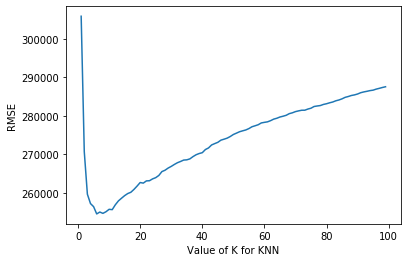

In [10]:
k_range=range(1,100)
k_scores=[]

for k in k_range:
    knn_regression_model=KNeighborsRegressor(n_neighbors=k)
    knn_regression_model.fit(train_X,train_Y)
    knn_predict=knn_regression_model.predict(test_X)
    score=(sqrt(mean_squared_error(knn_predict, test_Y)))# RMSE
    k_scores.append(score)
best_neighbor_count=np.argmin(k_scores)+1
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('RMSE')
plt.show()

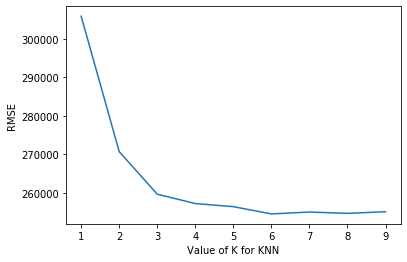

In [89]:
k_range=range(1,10,1)
k_scores=[]

for k in k_range:
    knn_regression_model=KNeighborsRegressor(n_neighbors=k)
    knn_regression_model.fit(train_X,train_Y)
    knn_predict=knn_regression_model.predict(test_X)
    score=(sqrt(mean_squared_error(knn_predict, test_Y)))# RMSE
    k_scores.append(score)
    
best_neighbor_count=np.argmin(k_scores)+1
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('RMSE')
plt.show()


In [90]:
best_neighbor_count

6

In [13]:
start=time.time()
knn_regression_model=KNeighborsRegressor(n_neighbors=best_neighbor_count)
knn_regression_model.fit(train_X,train_Y)
knn_predict=knn_regression_model.predict(test_X)
knn_rmse=sqrt(mean_squared_error(knn_predict, test_Y)) # RMSE
knn_time=time.time() - start # 코드 실행 시간 계산

RMSE: 254465.0875559736
Time: 0.36 seconds


In [14]:
knn_regression_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 6,
 'p': 2,
 'weights': 'uniform'}

## Decision Tree Regressor

In [32]:
start=time.time()
DT_Regression_Model=DecisionTreeRegressor(random_state=0)
DT_Regression_Model=DT_Regression_Model.fit(train_X,train_Y)
DT_Predict=DT_Regression_Model.predict(test_X)
print("RMSE: {}".format(sqrt(mean_squared_error(DT_Predict, test_Y)))) # RMSE
print("Time: %.2f" % (time.time() - start), "seconds") # 코드 실행 시간 계산

RMSE: 296367.4284114624
Time: 0.04 seconds


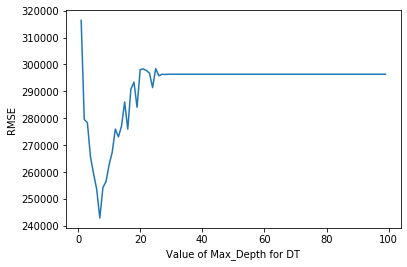

In [34]:
depth_range=range(1,100)
rmse_scores=[]

for depth in depth_range:
    DT_Regression_Model=DecisionTreeRegressor(random_state=0,max_depth=depth)
    DT_Regression_Model=DT_Regression_Model.fit(train_X,train_Y)
    DT_Predict=DT_Regression_Model.predict(test_X)
    score=(sqrt(mean_squared_error(DT_Predict, test_Y)))# RMSE
    rmse_scores.append(score)
    
best_max_depth=np.argmin(rmse_scores)+1
plt.plot(depth_range, rmse_scores)
plt.xlabel('Value of Max_Depth for DT')
plt.ylabel('RMSE')
plt.show()

In [35]:
print(best_max_depth)

7


In [95]:
start=time.time()
DT_Regression_Model=DecisionTreeRegressor(random_state=0,max_depth=best_max_depth)
DT_Regression_Model=DT_Regression_Model.fit(train_X,train_Y)
DT_Predict=DT_Regression_Model.predict(test_X)
dt_rmse=sqrt(mean_squared_error(DT_predict, test_Y)) # RMSE
dt_time=time.time() - start # 코드 실행 시간 계산

RMSE: 242912.92128742934
Time: 0.02 seconds


## NN(Neural Network) Regressor

In [59]:
start=time.time()
NN_regression_model=MLPRegressor(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(7,8),random_state=0)
NN_regression_model=NN_regression_model.fit(train_X,train_Y)
NN_predict=NN_regression_model.predict(test_X)
print("RMSE: {}".format(sqrt(mean_squared_error(NN_predict, test_Y)))) # RMSE
print("Time: %.2f" % (time.time() - start), "seconds") # 코드 실행 시간 계산

RMSE: 237612.2754520034
Time: 0.98 seconds


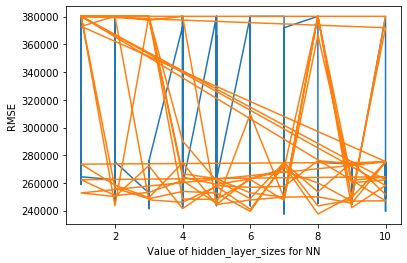

In [100]:
hidden_nodes=range(1,11)
hidden_layers=range(1,11)

rmse_scores=list()
layer_products=list(product(hidden_layers,hidden_nodes))
for layer in layer_products:
    NN_regression_model=MLPRegressor(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=layer,random_state=0)
    NN_regression_model=NN_regression_model.fit(train_X,train_Y)
    NN_predict=NN_regression_model.predict(test_X)
    score=sqrt(mean_squared_error(NN_predict, test_Y)) # RMSE
    rmse_scores.append(score)
    
best_hidden_layer=layer_products[np.argmin(rmse_scores)]

In [101]:
best_hidden_layer

(7, 8)

In [102]:
start=time.time()
NN_regression_model=MLPRegressor(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=best_hidden_layer,random_state=0)
NN_regression_model=NN_regression_model.fit(train_X,train_Y)
NN_predict=NN_regression_model.predict(test_X)
nn_rmse=sqrt(mean_squared_error(NN_predict, test_Y)) # RMSE
nn_time=time.time() - start # 코드 실행 시간 계산

RMSE: 237612.2754520034
Time: 0.95 seconds


## Bagging Ensemble Regressor

In [61]:
# iteration method
# train_X 에 있는 데이터에 대해서 해당 크기 만큼 복원 추출을 진행한다.
data_indexes=[index for index in range(train_X.shape[0])]
bagging_predicts=list()
start=time.time()
for _ in range(30):
    random_data_indexes=np.random.choice(data_indexes,size=train_X.shape[0])
    data_X=train_X.iloc[random_data_indexes]
    data_Y=train_Y.iloc[random_data_indexes]
    
    
    Linear_Regression_model=LinearRegression()
    Linear_Regression_model=Linear_Regression_model.fit(data_X,data_Y)
    bagging_predicts.append(Linear_Regression_model.predict(test_X))
    
LR_predict=[]
for bagging_index in range(test_X.shape[0]):
    temp_result=list()
    for test_index in range(len(bagging_predicts)):
        temp_result.append(bagging_predicts[test_index][bagging_index])
    LR_predict.append(np.mean(temp_result))
    
print("RMSE: {}".format(sqrt(mean_squared_error(LR_predict, test_Y)))) # RMSE
print("Time: %.2f" % (time.time() - start), "seconds") # 코드 실행 시간 계산

      

RMSE: 239699.74862451924
Time: 0.35 seconds


In [67]:
start=time.time()
LR_Bagging_model = BaggingRegressor(base_estimator = LinearRegression(), # 선형회귀모형
                                 n_estimators = 30, # 10번 샘플링
                                 verbose = 1,
                                 random_state=0) # 학습 과정 표시
LR_Bagging_model = LR_Bagging_model.fit(train_X, train_Y) # 학습 진행
LR_Bagging_predict = LR_Bagging_model.predict(test_X) # 학습된 Bagging 선형 회귀 모형으로 평가 데이터 예측
print("RMSE: {}".format(sqrt(mean_squared_error(LR_Bagging_predict, test_Y)))) # RMSE 결과
print("Time: %.2f" % (time.time() - start), "seconds") # 코드 실행 시간 계산

RMSE: 239751.332247993
Time: 0.18 seconds


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [98]:
start=time.time()
DT_Bagging_model = BaggingRegressor(base_estimator = DecisionTreeRegressor(max_depth=7), # 선형회귀모형
                                 n_estimators = 240, # 10번 샘플링
                                 verbose = 1,
                                random_state=0) # 학습 과정 표시
DT_Bagging_model = DT_Bagging_model.fit(train_X, train_Y) # 학습 진행
DT_Bagging_predict = DT_Bagging_model.predict(test_X) # 학습된 Bagging 선형 회귀 모형으로 평가 데이터 예측
print("RMSE: {}".format(sqrt(mean_squared_error(DT_Bagging_predict, test_Y)))) # RMSE 결과
print("Time: %.2f" % (time.time() - start), "seconds") # 코드 실행 시간 계산

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


RMSE: 221745.6924015494
Time: 4.95 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


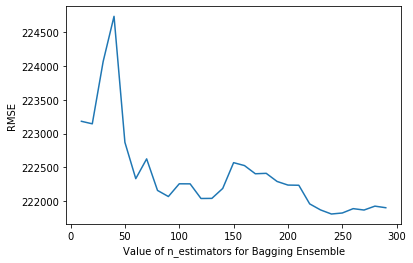

In [87]:
sample_ranges=range(10,300,10)
rmse_scores=[]

for sample_size in sample_ranges:
    DT_Bagging_model = BaggingRegressor(base_estimator = DecisionTreeRegressor(max_depth=7), # 선형회귀모형
                                 n_estimators = sample_size, # 10번 샘플링
                                 verbose = 1,
                                random_state=0) # 학습 과정 표시
    DT_Bagging_model = DT_Bagging_model.fit(train_X, train_Y) # 학습 진행
    DT_Bagging_predict = DT_Bagging_model.predict(test_X) # 학습된 Bagging 선형 회귀 모형으로 평가 데이터 예측
    score=sqrt(mean_squared_error(DT_Bagging_predict, test_Y)) # RMSE 결과
    rmse_scores.append(score)
    
best_max_sample=np.argmin(rmse_scores)*10+10
plt.plot(sample_ranges, rmse_scores)
plt.xlabel('Value of n_estimators for Bagging Ensemble')
plt.ylabel('RMSE')
plt.show()

In [88]:
best_max_sample

240

In [94]:
start=time.time()
DT_Bagging_model = BaggingRegressor(base_estimator = DecisionTreeRegressor(max_depth=best_max_depth), # 선형회귀모형
                                 n_estimators = best_max_sample, # 10번 샘플링
                                 verbose = 1,
                                random_state=0) # 학습 과정 표시
DT_Bagging_model = DT_Bagging_model.fit(train_X, train_Y) # 학습 진행
DT_Bagging_predict = DT_Bagging_model.predict(test_X) # 학습된 Bagging 선형 회귀 모형으로 평가 데이터 예측
bag_rmse=sqrt(mean_squared_error(DT_Bagging_predict, test_Y)) # RMSE
bag_time=time.time() - start # 코드 실행 시간 계산

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


RMSE: 221812.90357085614
Time: 2.57 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


## Random Forest Tree Regressor

In [93]:
from sklearn.ensemble import RandomForestRegressor
start=time.time()
RF_Regression_model = RandomForestRegressor(n_estimators = 30, # 20번 추정
                                             max_depth = 5, # 트리 최대 깊이 5
                                             random_state = 0) # 시드값 고정
RF_Regression_model = RF_Regression_model.fit(train_X, train_Y) # 학습 진행
RF_predict = RF_Regression_model.predict(test_X) # 학습된 Bagging 선형 회귀 모형으로 평가 데이터 예측
print("RMSE: {}".format(sqrt(mean_squared_error(RF_predict, test_Y)))) # RMSE 결과
print("Time: %.2f" % (time.time() - start), "seconds") # 코드 실행 시간 계산

RMSE: 229218.94048012476
Time: 0.23 seconds


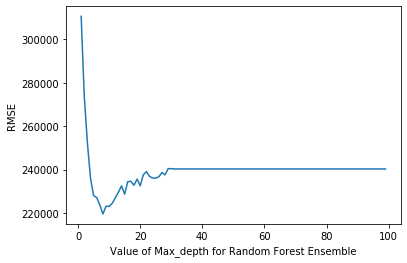

In [101]:
depth_ranges=range(1,100)
rmse_scores=[]

for depth in depth_ranges:
    RF_Regression_model = RandomForestRegressor(n_estimators = 10, # 10번 추정
                                             max_depth = depth, 
                                             random_state = 0) # 시드값 고정
    RF_Regression_model = RF_Regression_model.fit(train_X, train_Y) # 학습 진행
    RF_predict = RF_Regression_model.predict(test_X) # 학습된 Bagging 선형 회귀 모형으로 
    score=sqrt(mean_squared_error(RF_predict, test_Y)) # RMSE 결과
    rmse_scores.append(score)
    
best_max_depth_RF=np.argmin(rmse_scores)+1
plt.plot(depth_ranges, rmse_scores)
plt.xlabel('Value of Max_depth for Random Forest Ensemble')
plt.ylabel('RMSE')
plt.show()

In [103]:
best_max_depth_RF

8

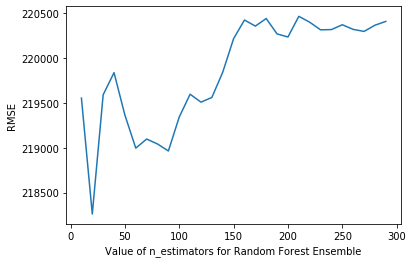

In [104]:
sample_ranges=range(10,300,10)
rmse_scores=[]

for sample_size in sample_ranges:
    RF_Regression_model = RandomForestRegressor(n_estimators = sample_size, # 20번 추정
                                             max_depth = best_max_depth_RF, # 트리 최대 깊이 5
                                             random_state = 0) # 시드값 고정
    RF_Regression_model = RF_Regression_model.fit(train_X, train_Y) # 학습 진행
    RF_predict = RF_Regression_model.predict(test_X) # 학습된 Bagging 선형 회귀 모형으로 
    score=sqrt(mean_squared_error(RF_predict, test_Y)) # RMSE 결과
    rmse_scores.append(score)
    
best_max_sample=np.argmin(rmse_scores)*10+10
plt.plot(sample_ranges, rmse_scores)
plt.xlabel('Value of n_estimators for Random Forest Ensemble')
plt.ylabel('RMSE')
plt.show()

In [105]:
best_max_sample

20

In [106]:
start=time.time()
RF_Regression_model = RandomForestRegressor(n_estimators = best_max_sample, # 20번 추정
                                             max_depth = best_max_depth_RF, # 트리 최대 깊이 5
                                             random_state = 0) # 시드값 고정
RF_Regression_model = RF_Regression_model.fit(train_X, train_Y) # 학습 진행
RF_predict = RF_Regression_model.predict(test_X) # 학습된 Bagging 선형 회귀 모형으로 평가 데이터 예측
rf_rmse=sqrt(mean_squared_error(RF_predict, test_Y)) # RMSE
rf_time=time.time() - start # 코드 실행 시간 계산

RMSE: 218262.59950310623
Time: 0.20 seconds


## ADA Boost Regressor

In [21]:
start=time.time()
Ada_Regression_model = AdaBoostRegressor(base_estimator= LinearRegression(),
                                         n_estimators = 30, # 20번 추정
                                             random_state = 0,
                                        loss='linear') # 시드값 고정
Ada_Regression_model = Ada_Regression_model.fit(train_X, train_Y) # 학습 진행
Ada_predict = Ada_Regression_model.predict(test_X) # 학습된 Bagging 선형 회귀 모형으로 평가 데이터 예측
print("RMSE: {}".format(sqrt(mean_squared_error(Ada_predict, test_Y)))) # RMSE 결과
print("Time: %.2f" % (time.time() - start), "seconds") # 코드 실행 시간 계산

RMSE: 275630.36882478517
Time: 0.11 seconds


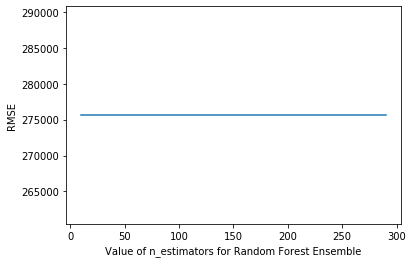

In [36]:
sample_ranges=range(10,300,10)
rmse_scores=[]

for sample_size in sample_ranges:
    Ada_Regression_model = AdaBoostRegressor(base_estimator= LinearRegression(),
                                         n_estimators = sample_size, # 20번 추정
                                             random_state = 0) # 시드값 고정
    Ada_Regression_model = Ada_Regression_model.fit(train_X, train_Y) # 학습 진행
    Ada_predict = Ada_Regression_model.predict(test_X) # 학습된 Bagging 선형 회귀 모형으로 평가 데이터 예측
    score=sqrt(mean_squared_error(Ada_predict, test_Y)) # RMSE 결과
    rmse_scores.append(score)
    
best_max_sample_ada=np.argmin(rmse_scores)*10+10
plt.plot(sample_ranges, rmse_scores)
plt.xlabel('Value of n_estimators for Ada Boost Ensemble')
plt.ylabel('RMSE')
plt.show()

In [26]:
np.min(rmse_scores)

275630.36882478517

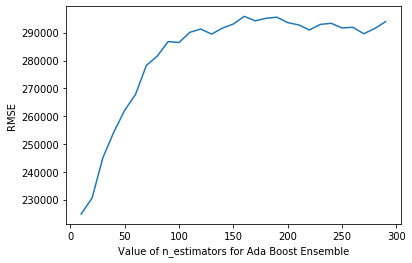

In [39]:
sample_ranges=range(10,300,10)
rmse_scores=[]

for sample_size in sample_ranges:
    Ada_Regression_model = AdaBoostRegressor(base_estimator= DecisionTreeRegressor(random_state=0,max_depth=best_max_depth),
                                         n_estimators = sample_size, # 20번 추정
                                             random_state = 0) # 시드값 고정
    Ada_Regression_model = Ada_Regression_model.fit(train_X, train_Y) # 학습 진행
    Ada_predict = Ada_Regression_model.predict(test_X) # 학습된 Bagging 선형 회귀 모형으로 평가 데이터 예측
    score=sqrt(mean_squared_error(Ada_predict, test_Y)) # RMSE 결과
    rmse_scores.append(score)
    
best_max_sample_ada=np.argmin(rmse_scores)*10+10
plt.plot(sample_ranges, rmse_scores)
plt.xlabel('Value of n_estimators for Ada Boost Ensemble')
plt.ylabel('RMSE')
plt.show()

In [42]:
start=time.time()
Ada_Regression_model = AdaBoostRegressor(base_estimator= DecisionTreeRegressor(random_state=0,max_depth=best_max_depth),
                                         n_estimators = best_max_sample_ada, # 20번 추정
                                             random_state = 0,
                                        loss='linear') # 시드값 고정
Ada_Regression_model = Ada_Regression_model.fit(train_X, train_Y) # 학습 진행
Ada_predict = Ada_Regression_model.predict(test_X) # 학습된 Bagging 선형 회귀 모형으로 평가 데이터 예측
ada_rmse=sqrt(mean_squared_error(Ada_predict, test_Y)) # RMSE
ada_time=time.time() - start # 코드 실행 시간 계산

RMSE: 224862.22475061694
Time: 0.19 seconds


## Xgb Boost Regressor

In [54]:
start=time.time()
xgb_dtrain=xgb.DMatrix(data=train_X,label=train_Y)
xgb_dtest=xgb.DMatrix(data=test_X)
xgb_param = {'max_depth': 100, # 트리 깊이
         'learning_rate': 0.01, # Step Size
         'n_estimators': 500, # Number of trees, 트리 생성 개수
         'objective': 'reg:linear', # 목적 함수
            }
xgb_model = xgb.train(params = xgb_param, dtrain = xgb_dtrain) # 학습 진행
xgb_model_predict = xgb_model.predict(xgb_dtest) # 평가 데이터 예측
print("RMSE: {}".format(sqrt(mean_squared_error(xgb_model_predict,test_Y))))
print("Time: %.2f" % (time.time() - start), "seconds") # 코드 실행 시간 계산

[12:59:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[12:59:50] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\learner.cc:328: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


RMSE: 609895.5166850972
Time: 0.10 seconds


In [96]:
xgb_param = {'max_depth': [1,5,10,20,30,40,50,60,70,80,90,100], # 트리 깊이
         'n_estimators': np.arange(100,1100,100), # Number of trees, 트리 생성 개수
            }
xgb_model=xgb.XGBRegressor(learning_rate=0.01,objective='reg:linear',eval_metric='rmse')
clf=GridSearchCV(xgb_model,xgb_param,n_jobs=5,cv=10,
                verbose=True)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:  1.3min
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:  7.3min finished


[13:58:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constrai...
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
                                    validate_parameters=False, verbosity=None),
             iid='warn', n_jobs=5,
             param_grid={'eval_metric': ['rmse'], 'learning_rate': [

In [97]:
print(clf.best_params_)
print(clf.best_score_)
xgb_model_predict = clf.predict(test_X) # 평가 데이터 예측
print("RMSE: {}".format(sqrt(mean_squared_error(xgb_model_predict,test_Y))))

{'eval_metric': 'rmse', 'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 400, 'objective': 'reg:linear'}
0.6649779563183127
RMSE: 225608.72844556923


In [ ]:
xgb_model=xgb.XGBRegressor(learning_rate=0.01,objective='reg:linear')
xgb_param = {'max_depth': [1,5,10,20,30,40,50,60,70,80,90,100], # 트리 깊이
             # Step Size
            'n_estimators': np.arange(100,1000,100), # Number of trees, 트리 생성 개수
            } # 파라미터 추가, Label must be in [0, num_class) -> num_class보다 1 커야한다.

cv=StratifiedKFold(n_splits=10,shuffle=False,random_state=0)

xgb_model=optimize_model(xgb_model,xgb_param,cv)

In [ ]:
start=time.time()
xgb_model=xgb.XGBRegressor(n_estimators=xgb_model.best_params_['n_estimators'],max_depth=xgb_model.best_params_['max_depth'],learning_rate=0.01,objective='reg:linear',eval_metric='rmse')
xgb_predict=xgb_model.predict(test_X)
xgb_rmse=sqrt(mean_squared_error(xgb_predict, test_Y)) # RMSE
xgb_time=time.time() - start # 코드 실행 시간 계산

## LightGbm Regressor

In [56]:
# !pip install lightgbm
import lightgbm as lgb
start = time.time() # 시작 시간 지정
lgb_dtrain = lgb.Dataset(data = train_X, label = train_Y) # 학습 데이터를 LightGBM 모델에 맞게 변환
lgb_param = {'max_depth': 10, # 트리 깊이
            'learning_rate': 0.01, # Step Size
            'n_estimators': 500, # Number of trees, 트리 생성 개수
            'objective': 'regression'} # 파라미터 추가, Label must be in [0, num_class) -> num_class보다 1 커야한다.
lgb_model = lgb.train(params = lgb_param, train_set = lgb_dtrain) # 학습 진행
lgb_predict= lgb_model.predict(test_X)
print("RMSE: {}".format(sqrt(mean_squared_error(lgb_predict,test_Y))))
print("Time: %.2f" % (time.time() - start), "seconds") # 코드 실행 시간 계산

C:\Users\jhyun\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSE: 210904.17249451784
Time: 0.84 seconds


In [75]:
lgb_param = {'max_depth': 10, # 트리 깊이
            'learning_rate': 0.01, # Step Size
            'objective': 'regression'} # 파라미터 추가, Label must be in [0, num_class) -> num_class보다 1 커야한다.
lgb_cv_results=lgb.cv(lgb_param,lgb_dtrain,nfold=10,num_boost_round=50,early_stopping_rounds=10,metrics='rmse',seed=0)

C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


In [ ]:
lgb_model=lgb.LGBMRegressor(learning_rate=0.01,objective='regression')
lgb_param = {'max_depth': [1,5,10,20,30,40,50,60,70,80,90,100], # 트리 깊이
             # Step Size
            'n_estimators': np.arange(100,1000,100), # Number of trees, 트리 생성 개수
            } # 파라미터 추가, Label must be in [0, num_class) -> num_class보다 1 커야한다.

cv=StratifiedKFold(n_splits=10,shuffle=False,random_state=0)

lgb_model=optimize_model(lgb_model,lgb_param,cv)

In [99]:
start=time.time()
lgb_model=lgb.LGBMRegressor(n_estimators=lgb_model.best_params_['n_estimators'],max_depth=lgb_model.best_params_['max_depth'],learning_rate=0.01,random_state=0)
lgb_model=lgb_model.fit(train_X,train_Y)
lgb_model_predict = lgb_model.predict(test_X)
lgb_rmse=sqrt(mean_squared_error(lgb_model_predict, test_Y)) # RMSE
lgb_time=time.time() - start # 코드 실행 시간 계산

RMSE: 210904.17249451784
Time: 0.84 seconds


## Catboost Regressor

In [ ]:
start = time.time() # 시작 시간 지정
cb_dtrain = cb.Pool(data = train_X, label = train_Y) # 학습 데이터를 Catboost 모델에 맞게 변환
cb_param = {'max_depth': 10, # 트리 깊이
            'learning_rate': 0.01, # Step Size
            'n_estimators': 100, # Number of trees, 트리 생성 개수
            'eval_metric': 'Accuracy', # 평가 척도
            'loss_function': 'Regression'} # 손실 함수, 목적 함수
cb_model = cb.train(pool = cb_dtrain, params = cb_param) # 학습 진행
cb_model_predict = np.argmax(cb_model.predict(test_x), axis = 1) + 1 # 평가 데이터 예측, Softmax의 결과값 중 가장 큰 값의 Label로 예측, 인덱스의 순서를 맞추기 위해 +1
print("Accuracy: %.2f" % (accuracy_score(test_y, cb_model_predict) * 100), "%") # 정확도 % 계산
print("Time: %.2f" % (time.time() - start), "seconds") # 코드 실행 시간 계산

In [102]:
start=time.time()
cb_model=cat.CatBoostRegressor(n_estimators=500,max_depth=10,learning_rate=0.01,random_state=0)
cb_model=cb_model.fit(train_X,train_Y)
cb_model_predict = cb_model.predict(test_X)

cat_rmse=sqrt(mean_squared_error(cb_model_predict, test_Y)) # RMSE
cat_time=time.time() - start # 코드 실행 시간 계산

0:	learn: 359693.6230577	total: 6.16ms	remaining: 3.07s
1:	learn: 357710.1486088	total: 11.6ms	remaining: 2.9s
2:	learn: 355803.4699776	total: 21.1ms	remaining: 3.5s
3:	learn: 353889.7923691	total: 31ms	remaining: 3.84s
4:	learn: 352005.6393413	total: 40.2ms	remaining: 3.98s
5:	learn: 350101.7185670	total: 49.4ms	remaining: 4.07s
6:	learn: 348256.9928702	total: 58.3ms	remaining: 4.11s
7:	learn: 346497.0801171	total: 67.2ms	remaining: 4.13s
8:	learn: 344747.8832822	total: 76.2ms	remaining: 4.16s
9:	learn: 342984.3626712	total: 85.3ms	remaining: 4.18s
10:	learn: 341216.3337903	total: 94.7ms	remaining: 4.21s
11:	learn: 339485.5804528	total: 104ms	remaining: 4.23s
12:	learn: 337762.6795014	total: 113ms	remaining: 4.23s
13:	learn: 336077.0282957	total: 122ms	remaining: 4.23s
14:	learn: 334405.2572249	total: 127ms	remaining: 4.09s
15:	learn: 332816.4956943	total: 136ms	remaining: 4.11s
16:	learn: 331102.8272433	total: 145ms	remaining: 4.11s
17:	learn: 329480.3369417	total: 153ms	remaining: 4

156:	learn: 221897.6891245	total: 1.44s	remaining: 3.14s
157:	learn: 221589.2832891	total: 1.45s	remaining: 3.14s
158:	learn: 221290.5844149	total: 1.46s	remaining: 3.13s
159:	learn: 220991.1220990	total: 1.47s	remaining: 3.12s
160:	learn: 220666.4737691	total: 1.48s	remaining: 3.11s
161:	learn: 220376.4159709	total: 1.49s	remaining: 3.1s
162:	learn: 220073.0789057	total: 1.49s	remaining: 3.09s
163:	learn: 219770.8525760	total: 1.5s	remaining: 3.08s
164:	learn: 219459.5696300	total: 1.51s	remaining: 3.07s
165:	learn: 219159.3819713	total: 1.52s	remaining: 3.06s
166:	learn: 218877.3581704	total: 1.53s	remaining: 3.05s
167:	learn: 218590.8298119	total: 1.54s	remaining: 3.04s
168:	learn: 218315.2616020	total: 1.54s	remaining: 3.03s
169:	learn: 218048.5617180	total: 1.55s	remaining: 3s
170:	learn: 217766.9252448	total: 1.56s	remaining: 3s
171:	learn: 217490.2911385	total: 1.57s	remaining: 2.99s
172:	learn: 217221.9290462	total: 1.58s	remaining: 2.98s
173:	learn: 216990.7251906	total: 1.58s

313:	learn: 196123.9311214	total: 2.87s	remaining: 1.7s
314:	learn: 196048.0458454	total: 2.88s	remaining: 1.69s
315:	learn: 195959.1245775	total: 2.88s	remaining: 1.68s
316:	learn: 195872.1216166	total: 2.89s	remaining: 1.67s
317:	learn: 195802.8952114	total: 2.9s	remaining: 1.66s
318:	learn: 195722.7977092	total: 2.91s	remaining: 1.65s
319:	learn: 195622.5279043	total: 2.92s	remaining: 1.64s
320:	learn: 195549.6866400	total: 2.93s	remaining: 1.63s
321:	learn: 195448.2106114	total: 2.94s	remaining: 1.62s
322:	learn: 195388.5875860	total: 2.95s	remaining: 1.61s
323:	learn: 195321.3504194	total: 2.96s	remaining: 1.6s
324:	learn: 195284.9316991	total: 2.96s	remaining: 1.59s
325:	learn: 195209.6865527	total: 2.97s	remaining: 1.58s
326:	learn: 195162.0505620	total: 2.97s	remaining: 1.57s
327:	learn: 195069.5874087	total: 2.98s	remaining: 1.56s
328:	learn: 195011.7739889	total: 2.99s	remaining: 1.55s
329:	learn: 194906.9433564	total: 3s	remaining: 1.54s
330:	learn: 194855.5095248	total: 3s	

465:	learn: 187779.4849040	total: 4.1s	remaining: 299ms
466:	learn: 187739.0971528	total: 4.11s	remaining: 291ms
467:	learn: 187678.1479891	total: 4.12s	remaining: 282ms
468:	learn: 187637.1512368	total: 4.14s	remaining: 274ms
469:	learn: 187607.0884448	total: 4.14s	remaining: 264ms
470:	learn: 187567.1648013	total: 4.15s	remaining: 256ms
471:	learn: 187525.7509415	total: 4.16s	remaining: 247ms
472:	learn: 187472.4620215	total: 4.17s	remaining: 238ms
473:	learn: 187436.8715891	total: 4.18s	remaining: 230ms
474:	learn: 187412.4389416	total: 4.19s	remaining: 220ms
475:	learn: 187363.2818364	total: 4.2s	remaining: 212ms
476:	learn: 187322.7937494	total: 4.21s	remaining: 203ms
477:	learn: 187294.4419361	total: 4.21s	remaining: 194ms
478:	learn: 187275.3259291	total: 4.22s	remaining: 185ms
479:	learn: 187243.1453024	total: 4.23s	remaining: 176ms
480:	learn: 187206.3085784	total: 4.24s	remaining: 168ms
481:	learn: 187176.0290046	total: 4.25s	remaining: 159ms
482:	learn: 187134.7369115	total:

In [ ]:
rmse_scores=[
    svm_rmse,
    knn_rmse,
    dt_rmse,
    nn_rmse,
    bag_rmse,
    rf_rmse,
    ada_rmse,
    xgb_rmse,
    lgb_rmse,
    cat_rmse
]
times=[
    svm_time,
    knn_time,
    dt_time,
    nn_time,
    bag_time,
    rf_time,
    ada_time,
    xgb_time,
    lgb_time,
    cat_time
]
labels=['svm',
       'knn',
       'DT',
       'NN',
       'Bag',
       'RF',
       'Ada',
       'xgb',
       'lgbm',
       'catgbm']

plt.figure(figsize=(12,6))
plt.subplot(121)
plt.bar(labels,rmse_scores)
plt.title('Model performances')
plt.xlabel('Model')
plt.ylabel('rmse')

plt.subplot(122)
plt.bar(labels,times)
plt.title('Model performances')
plt.xlabel('Model')
plt.ylabel('seconds')


plt.show()

## Ensemble of Ensemble

In [137]:
#제일 기본적인 ensemble model만 생성/ 비교를 위해서
DT_Bagging_model=BaggingRegressor(base_estimator=DecisionTreeRegressor(),
                                  random_state=0)
RF_Regression_model=RandomForestRegressor(random_state=0)
Ada_Regression_model=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(),
                                      loss='linear',
                                      random_state=0)
xgb_model=xgb.XGBRegressor()
lgb_model=lgb.LGBMRegressor()
cat_model=cat.CatBoostRegressor()

def bagging_ensemble(model):
    start=time.time()
    bagging_model=BaggingRegressor(base_estimator = model, # 회귀모형
                                     n_estimators = 100, # 100번 샘플링
                                    random_state=0) # 학습 과정 표시
    baggin_model=bagging_model.fit(train_X,train_Y)
    bagging_predict=baggin_model.predict(test_X)
    return time.time()-start, sqrt(mean_squared_error(bagging_predict,test_Y))

def ada_ensemble(model):
    start=time.time()
    ada_boosting_model=AdaBoostRegressor(base_estimator=model,
                                      n_estimators=100,
                                      loss='linear',
                                      random_state=0)
    ada_boosting_model=ada_boosting_model.fit(train_X,train_Y)
    ada_predict=ada_boosting_model.predict(test_X)
    return time.time()-start, sqrt(mean_squared_error(ada_predict,test_Y))

models=[DT_Bagging_model, 
        RF_Regression_model, 
        Ada_Regression_model, 
        xgb_model, 
        lgb_model,
        cb_model
]

ensemble_methods=[bagging_ensemble,ada_ensemble]


ensemble_ensemble_performances=list()
for method in ensemble_methods:
    model_performances={
    'times':list(),
    'rmse_scores':list()
    }
    for model in models:
        print(model)
        model_performance=method(model)
        model_performances['times'].append(model_performance[0])
        model_performances['rmse_scores'].append(model_performance[1])

    ensemble_ensemble_performances.append(model_performances)



BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse',
                                                      max_depth=None,
                                                      max_features=None,
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      presort=False,
                                                      random_state=None,
                                                      splitter='best'),
                 bootstrap=True, bootstrap_features=False, max_features=1.0,
                 max_sample

C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse',
                                                       max_depth=None,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort=False,
                                                       random_state=None,
                                                       splitter='best'),
                  learning_rate=1.0, loss='linear', n_estimators=50,
                  rando

125:	learn: 224313.7477579	total: 1.33s	remaining: 3.96s
126:	learn: 223892.7438972	total: 1.34s	remaining: 3.95s
127:	learn: 223484.0977805	total: 1.36s	remaining: 3.94s
128:	learn: 223081.3207847	total: 1.36s	remaining: 3.91s
129:	learn: 222634.7713905	total: 1.37s	remaining: 3.9s
130:	learn: 222214.6445408	total: 1.38s	remaining: 3.89s
131:	learn: 221778.3577882	total: 1.39s	remaining: 3.88s
132:	learn: 221354.4964305	total: 1.4s	remaining: 3.87s
133:	learn: 220964.7852391	total: 1.41s	remaining: 3.86s
134:	learn: 220558.0786980	total: 1.42s	remaining: 3.85s
135:	learn: 220143.4470012	total: 1.44s	remaining: 3.84s
136:	learn: 219731.8765568	total: 1.45s	remaining: 3.83s
137:	learn: 219338.9239031	total: 1.46s	remaining: 3.82s
138:	learn: 218949.2958473	total: 1.47s	remaining: 3.81s
139:	learn: 218533.1673330	total: 1.48s	remaining: 3.8s
140:	learn: 218148.6163829	total: 1.49s	remaining: 3.79s
141:	learn: 217803.5798639	total: 1.5s	remaining: 3.78s
142:	learn: 217451.7515494	total: 1

272:	learn: 191128.6445663	total: 2.94s	remaining: 2.45s
273:	learn: 191021.1893509	total: 2.96s	remaining: 2.44s
274:	learn: 190913.6074732	total: 2.97s	remaining: 2.43s
275:	learn: 190803.8383756	total: 2.99s	remaining: 2.42s
276:	learn: 190715.9878790	total: 3s	remaining: 2.42s
277:	learn: 190671.8000130	total: 3s	remaining: 2.4s
278:	learn: 190537.2671443	total: 3.02s	remaining: 2.39s
279:	learn: 190415.9926218	total: 3.03s	remaining: 2.38s
280:	learn: 190308.3690487	total: 3.04s	remaining: 2.37s
281:	learn: 190220.1420796	total: 3.06s	remaining: 2.36s
282:	learn: 190124.9681189	total: 3.07s	remaining: 2.35s
283:	learn: 190025.5129832	total: 3.08s	remaining: 2.34s
284:	learn: 189934.1853214	total: 3.09s	remaining: 2.33s
285:	learn: 189841.4284129	total: 3.11s	remaining: 2.32s
286:	learn: 189737.0850075	total: 3.12s	remaining: 2.31s
287:	learn: 189632.1351325	total: 3.13s	remaining: 2.31s
288:	learn: 189581.1704931	total: 3.13s	remaining: 2.29s
289:	learn: 189492.0295481	total: 3.15

427:	learn: 181059.6585216	total: 4.73s	remaining: 795ms
428:	learn: 181047.3162539	total: 4.73s	remaining: 783ms
429:	learn: 181034.8437341	total: 4.73s	remaining: 770ms
430:	learn: 181002.4907050	total: 4.74s	remaining: 760ms
431:	learn: 180949.4416916	total: 4.75s	remaining: 748ms
432:	learn: 180916.4677921	total: 4.76s	remaining: 737ms
433:	learn: 180878.6688433	total: 4.78s	remaining: 726ms
434:	learn: 180825.7842693	total: 4.79s	remaining: 715ms
435:	learn: 180786.8276864	total: 4.8s	remaining: 704ms
436:	learn: 180749.8854321	total: 4.81s	remaining: 693ms
437:	learn: 180711.4484427	total: 4.82s	remaining: 682ms
438:	learn: 180671.9961114	total: 4.83s	remaining: 671ms
439:	learn: 180615.8665131	total: 4.84s	remaining: 660ms
440:	learn: 180592.0428049	total: 4.85s	remaining: 648ms
441:	learn: 180537.7281029	total: 4.86s	remaining: 637ms
442:	learn: 180502.9755345	total: 4.87s	remaining: 626ms
443:	learn: 180461.3713583	total: 4.88s	remaining: 615ms
444:	learn: 180420.3991441	total

75:	learn: 255328.4009632	total: 719ms	remaining: 4.01s
76:	learn: 254496.5950657	total: 732ms	remaining: 4.02s
77:	learn: 253695.7396561	total: 743ms	remaining: 4.02s
78:	learn: 252900.6256811	total: 756ms	remaining: 4.03s
79:	learn: 252168.1269961	total: 767ms	remaining: 4.03s
80:	learn: 251352.1487939	total: 778ms	remaining: 4.03s
81:	learn: 250707.5398932	total: 782ms	remaining: 3.98s
82:	learn: 249918.1549461	total: 793ms	remaining: 3.98s
83:	learn: 249217.1325889	total: 804ms	remaining: 3.98s
84:	learn: 248527.2804422	total: 814ms	remaining: 3.98s
85:	learn: 247841.9436070	total: 819ms	remaining: 3.94s
86:	learn: 247134.0819945	total: 829ms	remaining: 3.94s
87:	learn: 246432.7245963	total: 839ms	remaining: 3.93s
88:	learn: 245709.3340099	total: 850ms	remaining: 3.92s
89:	learn: 245034.1502923	total: 856ms	remaining: 3.9s
90:	learn: 244301.0470015	total: 865ms	remaining: 3.89s
91:	learn: 243598.2546396	total: 875ms	remaining: 3.88s
92:	learn: 242924.3709288	total: 881ms	remaining:

232:	learn: 196341.6842745	total: 2.33s	remaining: 2.66s
233:	learn: 196228.6734921	total: 2.33s	remaining: 2.65s
234:	learn: 196056.2031949	total: 2.34s	remaining: 2.64s
235:	learn: 195910.5011735	total: 2.35s	remaining: 2.63s
236:	learn: 195776.9570573	total: 2.36s	remaining: 2.62s
237:	learn: 195638.4821636	total: 2.37s	remaining: 2.61s
238:	learn: 195474.6692789	total: 2.38s	remaining: 2.6s
239:	learn: 195314.6574633	total: 2.39s	remaining: 2.59s
240:	learn: 195174.8282642	total: 2.4s	remaining: 2.58s
241:	learn: 195027.8545311	total: 2.41s	remaining: 2.57s
242:	learn: 194865.2831781	total: 2.42s	remaining: 2.56s
243:	learn: 194725.0018769	total: 2.43s	remaining: 2.55s
244:	learn: 194583.7077991	total: 2.44s	remaining: 2.54s
245:	learn: 194423.0344990	total: 2.46s	remaining: 2.54s
246:	learn: 194265.3118944	total: 2.47s	remaining: 2.53s
247:	learn: 194122.4025363	total: 2.48s	remaining: 2.52s
248:	learn: 193999.8545789	total: 2.49s	remaining: 2.51s
249:	learn: 193871.3614206	total:

397:	learn: 181799.2035707	total: 3.93s	remaining: 1.01s
398:	learn: 181717.9038895	total: 3.94s	remaining: 997ms
399:	learn: 181668.4061993	total: 3.95s	remaining: 987ms
400:	learn: 181635.1120360	total: 3.96s	remaining: 978ms
401:	learn: 181578.1949539	total: 3.97s	remaining: 968ms
402:	learn: 181517.4188909	total: 3.98s	remaining: 958ms
403:	learn: 181475.2732650	total: 3.99s	remaining: 948ms
404:	learn: 181447.8742308	total: 3.99s	remaining: 937ms
405:	learn: 181363.6936905	total: 4s	remaining: 927ms
406:	learn: 181337.0042489	total: 4.01s	remaining: 916ms
407:	learn: 181290.0378043	total: 4.02s	remaining: 907ms
408:	learn: 181229.1798235	total: 4.03s	remaining: 897ms
409:	learn: 181163.3476489	total: 4.04s	remaining: 887ms
410:	learn: 181107.8986334	total: 4.05s	remaining: 878ms
411:	learn: 181038.8679475	total: 4.06s	remaining: 868ms
412:	learn: 180971.0086656	total: 4.07s	remaining: 858ms
413:	learn: 180931.8202800	total: 4.08s	remaining: 848ms
414:	learn: 180885.7715163	total: 

47:	learn: 296948.0068028	total: 571ms	remaining: 5.38s
48:	learn: 295826.5198685	total: 585ms	remaining: 5.39s
49:	learn: 294637.3596313	total: 599ms	remaining: 5.39s
50:	learn: 293557.6880655	total: 609ms	remaining: 5.36s
51:	learn: 292525.1672903	total: 620ms	remaining: 5.34s
52:	learn: 291472.8181551	total: 631ms	remaining: 5.32s
53:	learn: 290359.9138605	total: 637ms	remaining: 5.26s
54:	learn: 289274.3316897	total: 647ms	remaining: 5.23s
55:	learn: 288264.4762972	total: 657ms	remaining: 5.21s
56:	learn: 287127.6975613	total: 668ms	remaining: 5.19s
57:	learn: 286193.4210909	total: 671ms	remaining: 5.12s
58:	learn: 285169.2000037	total: 682ms	remaining: 5.1s
59:	learn: 284168.4469661	total: 692ms	remaining: 5.08s
60:	learn: 283194.6103736	total: 703ms	remaining: 5.06s
61:	learn: 282244.5747417	total: 713ms	remaining: 5.04s
62:	learn: 281372.8516238	total: 716ms	remaining: 4.96s
63:	learn: 280407.4357840	total: 725ms	remaining: 4.94s
64:	learn: 279466.4577488	total: 730ms	remaining:

193:	learn: 212883.7427015	total: 1.99s	remaining: 3.14s
194:	learn: 212644.1243200	total: 2.01s	remaining: 3.14s
195:	learn: 212397.0375360	total: 2.02s	remaining: 3.13s
196:	learn: 212162.2623869	total: 2.03s	remaining: 3.12s
197:	learn: 211933.8697067	total: 2.04s	remaining: 3.11s
198:	learn: 211718.3591071	total: 2.05s	remaining: 3.1s
199:	learn: 211529.5813481	total: 2.05s	remaining: 3.08s
200:	learn: 211310.2182779	total: 2.06s	remaining: 3.07s
201:	learn: 211053.8450244	total: 2.08s	remaining: 3.06s
202:	learn: 210806.8306462	total: 2.09s	remaining: 3.06s
203:	learn: 210591.0569724	total: 2.1s	remaining: 3.05s
204:	learn: 210362.1099441	total: 2.11s	remaining: 3.04s
205:	learn: 210133.8179338	total: 2.12s	remaining: 3.03s
206:	learn: 209925.4490370	total: 2.13s	remaining: 3.02s
207:	learn: 209723.3379194	total: 2.14s	remaining: 3s
208:	learn: 209509.8596692	total: 2.15s	remaining: 2.99s
209:	learn: 209359.7163421	total: 2.15s	remaining: 2.98s
210:	learn: 209145.1768721	total: 2.

343:	learn: 191106.5927483	total: 3.6s	remaining: 1.63s
344:	learn: 191026.5860170	total: 3.61s	remaining: 1.62s
345:	learn: 190933.1217758	total: 3.63s	remaining: 1.61s
346:	learn: 190849.7601879	total: 3.64s	remaining: 1.6s
347:	learn: 190773.0482623	total: 3.65s	remaining: 1.6s
348:	learn: 190747.2945738	total: 3.66s	remaining: 1.58s
349:	learn: 190647.0571324	total: 3.67s	remaining: 1.57s
350:	learn: 190600.9086610	total: 3.67s	remaining: 1.56s
351:	learn: 190508.8932545	total: 3.69s	remaining: 1.55s
352:	learn: 190414.0930610	total: 3.7s	remaining: 1.54s
353:	learn: 190317.0474136	total: 3.72s	remaining: 1.53s
354:	learn: 190213.1457185	total: 3.73s	remaining: 1.52s
355:	learn: 190142.1039861	total: 3.75s	remaining: 1.51s
356:	learn: 190055.1417831	total: 3.76s	remaining: 1.5s
357:	learn: 189984.7004522	total: 3.77s	remaining: 1.5s
358:	learn: 189910.3029863	total: 3.79s	remaining: 1.49s
359:	learn: 189828.3439051	total: 3.8s	remaining: 1.48s
360:	learn: 189749.3386568	total: 3.81

492:	learn: 182603.6262788	total: 5.2s	remaining: 73.8ms
493:	learn: 182559.3955286	total: 5.21s	remaining: 63.3ms
494:	learn: 182505.0380464	total: 5.22s	remaining: 52.8ms
495:	learn: 182495.7357458	total: 5.23s	remaining: 42.2ms
496:	learn: 182433.1123185	total: 5.24s	remaining: 31.6ms
497:	learn: 182414.2080530	total: 5.25s	remaining: 21.1ms
498:	learn: 182405.1528416	total: 5.25s	remaining: 10.5ms
499:	learn: 182346.2912747	total: 5.27s	remaining: 0us
0:	learn: 377484.8200516	total: 13.7ms	remaining: 6.84s
1:	learn: 375424.4964722	total: 24.4ms	remaining: 6.08s
2:	learn: 373401.0769797	total: 28.7ms	remaining: 4.75s
3:	learn: 371445.1150382	total: 39ms	remaining: 4.83s
4:	learn: 369334.5127182	total: 49.8ms	remaining: 4.93s
5:	learn: 367349.4189140	total: 60.4ms	remaining: 4.97s
6:	learn: 365404.1261422	total: 70.6ms	remaining: 4.97s
7:	learn: 363453.7622538	total: 80.6ms	remaining: 4.96s
8:	learn: 361575.6146905	total: 90.7ms	remaining: 4.95s
9:	learn: 359870.5234485	total: 99.5ms

149:	learn: 229967.5328516	total: 1.44s	remaining: 3.36s
150:	learn: 229576.5051820	total: 1.45s	remaining: 3.36s
151:	learn: 229140.8755328	total: 1.46s	remaining: 3.35s
152:	learn: 228686.6468068	total: 1.48s	remaining: 3.35s
153:	learn: 228292.8788107	total: 1.49s	remaining: 3.34s
154:	learn: 227921.2524877	total: 1.5s	remaining: 3.33s
155:	learn: 227572.9277680	total: 1.51s	remaining: 3.33s
156:	learn: 227200.8330461	total: 1.52s	remaining: 3.32s
157:	learn: 226809.3960037	total: 1.53s	remaining: 3.31s
158:	learn: 226502.5095053	total: 1.53s	remaining: 3.29s
159:	learn: 226132.1713200	total: 1.55s	remaining: 3.29s
160:	learn: 225820.5845472	total: 1.56s	remaining: 3.28s
161:	learn: 225483.7990612	total: 1.57s	remaining: 3.27s
162:	learn: 225144.1589573	total: 1.58s	remaining: 3.27s
163:	learn: 224859.8456103	total: 1.59s	remaining: 3.25s
164:	learn: 224548.5897003	total: 1.6s	remaining: 3.25s
165:	learn: 224215.2425955	total: 1.61s	remaining: 3.25s
166:	learn: 223873.4477662	total:

299:	learn: 197428.9908320	total: 3.06s	remaining: 2.04s
300:	learn: 197344.9539056	total: 3.07s	remaining: 2.03s
301:	learn: 197206.3707788	total: 3.08s	remaining: 2.02s
302:	learn: 197094.0214211	total: 3.09s	remaining: 2.01s
303:	learn: 196958.4039356	total: 3.1s	remaining: 2s
304:	learn: 196848.7617538	total: 3.12s	remaining: 1.99s
305:	learn: 196730.6831339	total: 3.13s	remaining: 1.98s
306:	learn: 196665.6680627	total: 3.13s	remaining: 1.97s
307:	learn: 196554.5722799	total: 3.14s	remaining: 1.96s
308:	learn: 196449.9385828	total: 3.15s	remaining: 1.95s
309:	learn: 196379.7740869	total: 3.15s	remaining: 1.93s
310:	learn: 196241.6465768	total: 3.16s	remaining: 1.92s
311:	learn: 196128.6076885	total: 3.17s	remaining: 1.91s
312:	learn: 196021.6057563	total: 3.18s	remaining: 1.9s
313:	learn: 195910.2750292	total: 3.19s	remaining: 1.89s
314:	learn: 195777.1557033	total: 3.21s	remaining: 1.88s
315:	learn: 195668.7007802	total: 3.22s	remaining: 1.87s
316:	learn: 195565.1269041	total: 3.

447:	learn: 186499.5428432	total: 4.49s	remaining: 521ms
448:	learn: 186405.0768010	total: 4.5s	remaining: 511ms
449:	learn: 186333.8151718	total: 4.51s	remaining: 501ms
450:	learn: 186284.2869117	total: 4.52s	remaining: 491ms
451:	learn: 186199.1653031	total: 4.53s	remaining: 482ms
452:	learn: 186146.5400990	total: 4.54s	remaining: 472ms
453:	learn: 186092.8292032	total: 4.55s	remaining: 462ms
454:	learn: 186041.0490251	total: 4.57s	remaining: 452ms
455:	learn: 186030.2775787	total: 4.57s	remaining: 441ms
456:	learn: 185981.8136081	total: 4.58s	remaining: 431ms
457:	learn: 185940.4252369	total: 4.59s	remaining: 421ms
458:	learn: 185916.0132208	total: 4.6s	remaining: 411ms
459:	learn: 185888.6023897	total: 4.6s	remaining: 400ms
460:	learn: 185861.6775462	total: 4.61s	remaining: 390ms
461:	learn: 185836.2745435	total: 4.61s	remaining: 379ms
462:	learn: 185763.3506402	total: 4.62s	remaining: 369ms
463:	learn: 185694.3374922	total: 4.63s	remaining: 359ms
464:	learn: 185650.2767863	total: 

108:	learn: 235923.8026328	total: 1.14s	remaining: 4.1s
109:	learn: 235301.0269589	total: 1.15s	remaining: 4.09s
110:	learn: 234709.3960498	total: 1.16s	remaining: 4.08s
111:	learn: 234094.9614587	total: 1.18s	remaining: 4.07s
112:	learn: 233524.8672010	total: 1.19s	remaining: 4.07s
113:	learn: 232923.8780753	total: 1.2s	remaining: 4.06s
114:	learn: 232362.3449363	total: 1.21s	remaining: 4.05s
115:	learn: 231779.1875601	total: 1.22s	remaining: 4.04s
116:	learn: 231233.4692681	total: 1.23s	remaining: 4.01s
117:	learn: 230677.6244912	total: 1.24s	remaining: 4s
118:	learn: 230136.5336052	total: 1.25s	remaining: 3.99s
119:	learn: 229627.5383364	total: 1.26s	remaining: 3.98s
120:	learn: 229069.8449937	total: 1.27s	remaining: 3.97s
121:	learn: 228548.9369564	total: 1.27s	remaining: 3.94s
122:	learn: 228074.6393610	total: 1.28s	remaining: 3.93s
123:	learn: 227641.3868477	total: 1.28s	remaining: 3.9s
124:	learn: 227180.2271261	total: 1.29s	remaining: 3.87s
125:	learn: 226763.6569527	total: 1.2

264:	learn: 190573.5119570	total: 2.75s	remaining: 2.44s
265:	learn: 190441.0615874	total: 2.76s	remaining: 2.43s
266:	learn: 190305.8929364	total: 2.77s	remaining: 2.42s
267:	learn: 190199.4547657	total: 2.78s	remaining: 2.41s
268:	learn: 190060.4835731	total: 2.79s	remaining: 2.4s
269:	learn: 189927.3188444	total: 2.81s	remaining: 2.39s
270:	learn: 189764.7433727	total: 2.82s	remaining: 2.38s
271:	learn: 189624.0417056	total: 2.83s	remaining: 2.37s
272:	learn: 189488.9695736	total: 2.84s	remaining: 2.36s
273:	learn: 189407.9856265	total: 2.85s	remaining: 2.35s
274:	learn: 189325.2248112	total: 2.85s	remaining: 2.33s
275:	learn: 189218.4812509	total: 2.86s	remaining: 2.32s
276:	learn: 189090.4085105	total: 2.88s	remaining: 2.31s
277:	learn: 188971.2341821	total: 2.89s	remaining: 2.31s
278:	learn: 188859.6893966	total: 2.9s	remaining: 2.3s
279:	learn: 188749.1457299	total: 2.91s	remaining: 2.29s
280:	learn: 188626.5439832	total: 2.92s	remaining: 2.28s
281:	learn: 188539.8030801	total: 

424:	learn: 178358.1612764	total: 4.53s	remaining: 800ms
425:	learn: 178299.0502564	total: 4.55s	remaining: 790ms
426:	learn: 178265.5779861	total: 4.55s	remaining: 778ms
427:	learn: 178235.3605837	total: 4.55s	remaining: 766ms
428:	learn: 178158.8237070	total: 4.57s	remaining: 756ms
429:	learn: 178117.3009606	total: 4.58s	remaining: 745ms
430:	learn: 178084.8732186	total: 4.59s	remaining: 735ms
431:	learn: 178034.7267836	total: 4.6s	remaining: 724ms
432:	learn: 178017.0239108	total: 4.6s	remaining: 712ms
433:	learn: 177966.6152190	total: 4.61s	remaining: 702ms
434:	learn: 177934.8734560	total: 4.63s	remaining: 691ms
435:	learn: 177893.9696165	total: 4.64s	remaining: 681ms
436:	learn: 177803.1354898	total: 4.65s	remaining: 670ms
437:	learn: 177766.9182486	total: 4.65s	remaining: 659ms
438:	learn: 177704.3827088	total: 4.67s	remaining: 648ms
439:	learn: 177674.7985384	total: 4.67s	remaining: 637ms
440:	learn: 177621.3168385	total: 4.68s	remaining: 626ms
441:	learn: 177573.0338680	total:

73:	learn: 260719.5182347	total: 764ms	remaining: 4.4s
74:	learn: 259909.0079325	total: 776ms	remaining: 4.4s
75:	learn: 259085.4083507	total: 786ms	remaining: 4.38s
76:	learn: 258249.6348481	total: 796ms	remaining: 4.37s
77:	learn: 257413.7104014	total: 802ms	remaining: 4.34s
78:	learn: 256573.2916613	total: 813ms	remaining: 4.33s
79:	learn: 255761.2229473	total: 823ms	remaining: 4.32s
80:	learn: 254975.3866847	total: 834ms	remaining: 4.31s
81:	learn: 254183.4211033	total: 845ms	remaining: 4.31s
82:	learn: 253374.3707400	total: 855ms	remaining: 4.3s
83:	learn: 252577.5882220	total: 865ms	remaining: 4.28s
84:	learn: 251822.9311520	total: 877ms	remaining: 4.28s
85:	learn: 251034.6088703	total: 890ms	remaining: 4.28s
86:	learn: 250232.0610853	total: 901ms	remaining: 4.28s
87:	learn: 249512.2102373	total: 912ms	remaining: 4.27s
88:	learn: 248810.2741300	total: 923ms	remaining: 4.26s
89:	learn: 248128.6463777	total: 935ms	remaining: 4.26s
90:	learn: 247421.1427557	total: 949ms	remaining: 4

219:	learn: 198351.5169964	total: 2.36s	remaining: 3.01s
220:	learn: 198169.5660601	total: 2.38s	remaining: 3s
221:	learn: 197965.1734530	total: 2.39s	remaining: 2.99s
222:	learn: 197763.6910397	total: 2.4s	remaining: 2.98s
223:	learn: 197581.9654780	total: 2.42s	remaining: 2.98s
224:	learn: 197393.6578534	total: 2.43s	remaining: 2.97s
225:	learn: 197231.8023898	total: 2.43s	remaining: 2.95s
226:	learn: 197012.7061542	total: 2.44s	remaining: 2.94s
227:	learn: 196833.7278338	total: 2.45s	remaining: 2.93s
228:	learn: 196627.8826772	total: 2.47s	remaining: 2.92s
229:	learn: 196481.3116048	total: 2.48s	remaining: 2.91s
230:	learn: 196308.1122011	total: 2.49s	remaining: 2.9s
231:	learn: 196126.1140813	total: 2.5s	remaining: 2.89s
232:	learn: 195926.5941926	total: 2.51s	remaining: 2.88s
233:	learn: 195769.5425149	total: 2.52s	remaining: 2.87s
234:	learn: 195595.4782937	total: 2.54s	remaining: 2.86s
235:	learn: 195424.7644980	total: 2.55s	remaining: 2.86s
236:	learn: 195253.5922476	total: 2.5

377:	learn: 181445.3628920	total: 3.95s	remaining: 1.28s
378:	learn: 181357.9729980	total: 3.97s	remaining: 1.27s
379:	learn: 181300.8686167	total: 3.98s	remaining: 1.26s
380:	learn: 181250.8747600	total: 3.99s	remaining: 1.25s
381:	learn: 181196.2374716	total: 3.99s	remaining: 1.23s
382:	learn: 181158.1216550	total: 4s	remaining: 1.22s
383:	learn: 181107.5002302	total: 4.01s	remaining: 1.21s
384:	learn: 181068.0598429	total: 4.01s	remaining: 1.2s
385:	learn: 180978.1746505	total: 4.02s	remaining: 1.19s
386:	learn: 180901.6441735	total: 4.03s	remaining: 1.18s
387:	learn: 180855.6628862	total: 4.05s	remaining: 1.17s
388:	learn: 180815.7740571	total: 4.05s	remaining: 1.16s
389:	learn: 180751.5663107	total: 4.06s	remaining: 1.15s
390:	learn: 180727.5956199	total: 4.07s	remaining: 1.13s
391:	learn: 180636.6691569	total: 4.08s	remaining: 1.12s
392:	learn: 180559.7684519	total: 4.09s	remaining: 1.11s
393:	learn: 180506.8211086	total: 4.1s	remaining: 1.1s
394:	learn: 180485.2967809	total: 4.1

38:	learn: 307932.3941187	total: 377ms	remaining: 4.46s
39:	learn: 306702.4608619	total: 389ms	remaining: 4.48s
40:	learn: 305392.4082588	total: 400ms	remaining: 4.48s
41:	learn: 304076.5582081	total: 412ms	remaining: 4.49s
42:	learn: 302829.0901290	total: 423ms	remaining: 4.49s
43:	learn: 301633.7495668	total: 433ms	remaining: 4.49s
44:	learn: 300402.4902054	total: 448ms	remaining: 4.53s
45:	learn: 299228.5187712	total: 459ms	remaining: 4.53s
46:	learn: 298013.8451696	total: 470ms	remaining: 4.53s
47:	learn: 296883.8369300	total: 476ms	remaining: 4.48s
48:	learn: 295712.4649481	total: 487ms	remaining: 4.48s
49:	learn: 294599.9456140	total: 499ms	remaining: 4.49s
50:	learn: 293555.2846216	total: 503ms	remaining: 4.43s
51:	learn: 292475.2141917	total: 515ms	remaining: 4.44s
52:	learn: 291376.5483983	total: 520ms	remaining: 4.39s
53:	learn: 290321.6550644	total: 532ms	remaining: 4.39s
54:	learn: 289240.9577178	total: 544ms	remaining: 4.4s
55:	learn: 288082.1669316	total: 557ms	remaining:

190:	learn: 212239.6178976	total: 1.96s	remaining: 3.18s
191:	learn: 212002.6143730	total: 1.97s	remaining: 3.16s
192:	learn: 211788.9028320	total: 1.97s	remaining: 3.14s
193:	learn: 211557.2485918	total: 1.99s	remaining: 3.13s
194:	learn: 211308.8877764	total: 2s	remaining: 3.13s
195:	learn: 211063.1722985	total: 2.01s	remaining: 3.12s
196:	learn: 210815.7332110	total: 2.02s	remaining: 3.11s
197:	learn: 210578.2462390	total: 2.04s	remaining: 3.11s
198:	learn: 210364.8236801	total: 2.04s	remaining: 3.09s
199:	learn: 210142.2786754	total: 2.05s	remaining: 3.08s
200:	learn: 209897.3060592	total: 2.07s	remaining: 3.07s
201:	learn: 209622.0314614	total: 2.08s	remaining: 3.06s
202:	learn: 209375.5951053	total: 2.09s	remaining: 3.06s
203:	learn: 209134.7018266	total: 2.1s	remaining: 3.05s
204:	learn: 208909.3837997	total: 2.11s	remaining: 3.04s
205:	learn: 208678.0711898	total: 2.12s	remaining: 3.03s
206:	learn: 208435.9921516	total: 2.13s	remaining: 3.02s
207:	learn: 208217.8922593	total: 2

337:	learn: 190019.6919863	total: 3.58s	remaining: 1.72s
338:	learn: 189985.2767814	total: 3.59s	remaining: 1.7s
339:	learn: 189880.8768919	total: 3.6s	remaining: 1.69s
340:	learn: 189785.7252096	total: 3.61s	remaining: 1.68s
341:	learn: 189683.4742726	total: 3.62s	remaining: 1.67s
342:	learn: 189581.5973174	total: 3.63s	remaining: 1.66s
343:	learn: 189501.7583622	total: 3.65s	remaining: 1.65s
344:	learn: 189405.7594896	total: 3.66s	remaining: 1.64s
345:	learn: 189308.8531929	total: 3.67s	remaining: 1.63s
346:	learn: 189219.8416612	total: 3.68s	remaining: 1.62s
347:	learn: 189126.2957427	total: 3.69s	remaining: 1.61s
348:	learn: 189021.3325821	total: 3.7s	remaining: 1.6s
349:	learn: 188923.7033692	total: 3.71s	remaining: 1.59s
350:	learn: 188821.9550350	total: 3.72s	remaining: 1.58s
351:	learn: 188717.1162083	total: 3.73s	remaining: 1.57s
352:	learn: 188660.9053421	total: 3.74s	remaining: 1.56s
353:	learn: 188581.6252122	total: 3.75s	remaining: 1.55s
354:	learn: 188469.0962070	total: 3

496:	learn: 180582.9559637	total: 5.19s	remaining: 31.3ms
497:	learn: 180563.3801205	total: 5.19s	remaining: 20.8ms
498:	learn: 180521.8549316	total: 5.2s	remaining: 10.4ms
499:	learn: 180509.2768215	total: 5.21s	remaining: 0us
0:	learn: 362899.0392680	total: 12ms	remaining: 6s
1:	learn: 360831.4379711	total: 18.2ms	remaining: 4.54s
2:	learn: 358902.6269041	total: 29ms	remaining: 4.81s
3:	learn: 357005.5346746	total: 41ms	remaining: 5.09s
4:	learn: 355186.3530855	total: 53.5ms	remaining: 5.3s
5:	learn: 353407.8594976	total: 64.5ms	remaining: 5.31s
6:	learn: 351552.4522072	total: 75.8ms	remaining: 5.34s
7:	learn: 349828.1737531	total: 87.2ms	remaining: 5.36s
8:	learn: 348055.6328409	total: 99.3ms	remaining: 5.42s
9:	learn: 346295.7944902	total: 110ms	remaining: 5.41s
10:	learn: 344524.8951673	total: 122ms	remaining: 5.42s
11:	learn: 342738.9815515	total: 133ms	remaining: 5.39s
12:	learn: 341133.2583760	total: 137ms	remaining: 5.12s
13:	learn: 339510.1181330	total: 148ms	remaining: 5.13s

144:	learn: 224707.9698662	total: 1.67s	remaining: 4.09s
145:	learn: 224349.1579378	total: 1.68s	remaining: 4.08s
146:	learn: 223935.0676603	total: 1.69s	remaining: 4.07s
147:	learn: 223543.0445566	total: 1.71s	remaining: 4.06s
148:	learn: 223239.6156571	total: 1.71s	remaining: 4.03s
149:	learn: 222856.2654774	total: 1.72s	remaining: 4.01s
150:	learn: 222484.9561919	total: 1.74s	remaining: 4.01s
151:	learn: 222183.5005010	total: 1.74s	remaining: 3.98s
152:	learn: 221894.4559291	total: 1.74s	remaining: 3.95s
153:	learn: 221565.5363012	total: 1.75s	remaining: 3.94s
154:	learn: 221163.9121495	total: 1.77s	remaining: 3.93s
155:	learn: 220909.3341116	total: 1.77s	remaining: 3.9s
156:	learn: 220607.8422857	total: 1.77s	remaining: 3.88s
157:	learn: 220304.8983514	total: 1.78s	remaining: 3.85s
158:	learn: 219968.8898551	total: 1.79s	remaining: 3.84s
159:	learn: 219639.0751488	total: 1.8s	remaining: 3.83s
160:	learn: 219287.7813641	total: 1.81s	remaining: 3.82s
161:	learn: 218955.7321127	total:

300:	learn: 193803.9757328	total: 3.26s	remaining: 2.16s
301:	learn: 193735.1869618	total: 3.27s	remaining: 2.14s
302:	learn: 193689.0018141	total: 3.27s	remaining: 2.13s
303:	learn: 193600.3278993	total: 3.28s	remaining: 2.12s
304:	learn: 193566.3736941	total: 3.29s	remaining: 2.1s
305:	learn: 193493.4340582	total: 3.3s	remaining: 2.09s
306:	learn: 193365.2080689	total: 3.31s	remaining: 2.08s
307:	learn: 193276.4935213	total: 3.32s	remaining: 2.07s
308:	learn: 193163.7867777	total: 3.33s	remaining: 2.06s
309:	learn: 193058.5560935	total: 3.34s	remaining: 2.05s
310:	learn: 192978.0914464	total: 3.35s	remaining: 2.04s
311:	learn: 192888.7520291	total: 3.36s	remaining: 2.02s
312:	learn: 192771.1858068	total: 3.37s	remaining: 2.01s
313:	learn: 192692.9209337	total: 3.38s	remaining: 2s
314:	learn: 192623.9977426	total: 3.38s	remaining: 1.99s
315:	learn: 192518.0284225	total: 3.4s	remaining: 1.98s
316:	learn: 192444.6398820	total: 3.41s	remaining: 1.97s
317:	learn: 192387.2918711	total: 3.4

457:	learn: 184232.8578429	total: 4.88s	remaining: 448ms
458:	learn: 184223.1055446	total: 4.89s	remaining: 437ms
459:	learn: 184193.3066383	total: 4.9s	remaining: 427ms
460:	learn: 184139.4033670	total: 4.92s	remaining: 416ms
461:	learn: 184112.8306189	total: 4.92s	remaining: 405ms
462:	learn: 184104.8198135	total: 4.92s	remaining: 394ms
463:	learn: 184048.7387453	total: 4.94s	remaining: 383ms
464:	learn: 184032.6638046	total: 4.94s	remaining: 372ms
465:	learn: 183978.7088910	total: 4.95s	remaining: 361ms
466:	learn: 183961.0091648	total: 4.95s	remaining: 350ms
467:	learn: 183922.9649047	total: 4.96s	remaining: 340ms
468:	learn: 183903.7982909	total: 4.97s	remaining: 328ms
469:	learn: 183853.9163821	total: 4.98s	remaining: 318ms
470:	learn: 183827.5265883	total: 4.99s	remaining: 307ms
471:	learn: 183811.2629444	total: 4.99s	remaining: 296ms
472:	learn: 183769.2032036	total: 5s	remaining: 285ms
473:	learn: 183735.7233187	total: 5.01s	remaining: 275ms
474:	learn: 183729.3244504	total: 5

117:	learn: 238827.5526770	total: 1.13s	remaining: 3.66s
118:	learn: 238229.0098322	total: 1.14s	remaining: 3.66s
119:	learn: 237662.7913100	total: 1.16s	remaining: 3.66s
120:	learn: 237109.8141868	total: 1.17s	remaining: 3.66s
121:	learn: 236533.2024629	total: 1.18s	remaining: 3.65s
122:	learn: 235987.1489630	total: 1.19s	remaining: 3.65s
123:	learn: 235445.7304206	total: 1.2s	remaining: 3.64s
124:	learn: 234903.8407225	total: 1.21s	remaining: 3.64s
125:	learn: 234381.0508572	total: 1.22s	remaining: 3.63s
126:	learn: 233851.1035213	total: 1.24s	remaining: 3.63s
127:	learn: 233356.0602537	total: 1.25s	remaining: 3.62s
128:	learn: 232828.1057890	total: 1.26s	remaining: 3.62s
129:	learn: 232331.2102301	total: 1.27s	remaining: 3.61s
130:	learn: 231877.4260644	total: 1.27s	remaining: 3.59s
131:	learn: 231355.0692021	total: 1.28s	remaining: 3.58s
132:	learn: 230879.8002939	total: 1.3s	remaining: 3.58s
133:	learn: 230372.7623279	total: 1.31s	remaining: 3.57s
134:	learn: 229868.8390870	total:

264:	learn: 194901.4626869	total: 2.74s	remaining: 2.43s
265:	learn: 194761.6034880	total: 2.76s	remaining: 2.43s
266:	learn: 194615.6622894	total: 2.77s	remaining: 2.42s
267:	learn: 194474.3951046	total: 2.79s	remaining: 2.41s
268:	learn: 194317.0767163	total: 2.8s	remaining: 2.41s
269:	learn: 194165.7593967	total: 2.82s	remaining: 2.4s
270:	learn: 194023.4272539	total: 2.83s	remaining: 2.39s
271:	learn: 193866.0017512	total: 2.85s	remaining: 2.39s
272:	learn: 193714.1785303	total: 2.86s	remaining: 2.38s
273:	learn: 193566.6530597	total: 2.88s	remaining: 2.37s
274:	learn: 193432.8194387	total: 2.89s	remaining: 2.37s
275:	learn: 193287.3520216	total: 2.9s	remaining: 2.36s
276:	learn: 193185.8234050	total: 2.92s	remaining: 2.35s
277:	learn: 193072.1603555	total: 2.94s	remaining: 2.35s
278:	learn: 192936.4935881	total: 2.95s	remaining: 2.34s
279:	learn: 192871.6705688	total: 2.96s	remaining: 2.32s
280:	learn: 192765.0034378	total: 2.97s	remaining: 2.31s
281:	learn: 192652.5825790	total: 

429:	learn: 182916.1720221	total: 4.33s	remaining: 705ms
430:	learn: 182860.6748626	total: 4.35s	remaining: 696ms
431:	learn: 182789.9724888	total: 4.36s	remaining: 686ms
432:	learn: 182762.4415009	total: 4.37s	remaining: 675ms
433:	learn: 182720.7628988	total: 4.38s	remaining: 666ms
434:	learn: 182632.5809801	total: 4.39s	remaining: 656ms
435:	learn: 182587.0963173	total: 4.4s	remaining: 646ms
436:	learn: 182528.5706665	total: 4.41s	remaining: 636ms
437:	learn: 182520.3406521	total: 4.41s	remaining: 625ms
438:	learn: 182479.3127496	total: 4.42s	remaining: 615ms
439:	learn: 182407.7953146	total: 4.43s	remaining: 605ms
440:	learn: 182323.5017946	total: 4.45s	remaining: 595ms
441:	learn: 182256.1690389	total: 4.46s	remaining: 585ms
442:	learn: 182210.8371462	total: 4.47s	remaining: 575ms
443:	learn: 182175.7545158	total: 4.48s	remaining: 565ms
444:	learn: 182129.4480085	total: 4.49s	remaining: 555ms
445:	learn: 182100.9802813	total: 4.5s	remaining: 545ms
446:	learn: 182068.7832275	total:

75:	learn: 254737.6695457	total: 939ms	remaining: 5.24s
76:	learn: 253949.9916644	total: 958ms	remaining: 5.26s
77:	learn: 253102.5988290	total: 974ms	remaining: 5.27s
78:	learn: 252258.1975035	total: 991ms	remaining: 5.28s
79:	learn: 251443.7180493	total: 1s	remaining: 5.28s
80:	learn: 250714.5707915	total: 1.02s	remaining: 5.28s
81:	learn: 249982.6154339	total: 1.03s	remaining: 5.27s
82:	learn: 249240.8814081	total: 1.04s	remaining: 5.25s
83:	learn: 248478.9648601	total: 1.06s	remaining: 5.25s
84:	learn: 247701.1029458	total: 1.07s	remaining: 5.24s
85:	learn: 246976.3003570	total: 1.09s	remaining: 5.23s
86:	learn: 246233.9006673	total: 1.1s	remaining: 5.22s
87:	learn: 245468.8564741	total: 1.11s	remaining: 5.22s
88:	learn: 244771.6295934	total: 1.13s	remaining: 5.22s
89:	learn: 244072.7069226	total: 1.15s	remaining: 5.22s
90:	learn: 243358.1978525	total: 1.16s	remaining: 5.22s
91:	learn: 242657.6051192	total: 1.17s	remaining: 5.21s
92:	learn: 241993.6290553	total: 1.19s	remaining: 5.

235:	learn: 193469.1372853	total: 2.72s	remaining: 3.04s
236:	learn: 193327.6439832	total: 2.73s	remaining: 3.03s
237:	learn: 193171.8998238	total: 2.75s	remaining: 3.02s
238:	learn: 193016.9220949	total: 2.76s	remaining: 3.01s
239:	learn: 192859.5763032	total: 2.77s	remaining: 3s
240:	learn: 192708.8718335	total: 2.78s	remaining: 2.99s
241:	learn: 192559.3495476	total: 2.79s	remaining: 2.97s
242:	learn: 192409.3466640	total: 2.8s	remaining: 2.96s
243:	learn: 192296.8074593	total: 2.81s	remaining: 2.94s
244:	learn: 192149.4377575	total: 2.82s	remaining: 2.93s
245:	learn: 192006.7817411	total: 2.83s	remaining: 2.92s
246:	learn: 191851.1976216	total: 2.84s	remaining: 2.91s
247:	learn: 191687.9177833	total: 2.85s	remaining: 2.9s
248:	learn: 191546.7685324	total: 2.86s	remaining: 2.89s
249:	learn: 191423.0360544	total: 2.88s	remaining: 2.88s
250:	learn: 191304.8680780	total: 2.89s	remaining: 2.87s
251:	learn: 191176.3849042	total: 2.9s	remaining: 2.85s
252:	learn: 191032.2199614	total: 2.9

381:	learn: 180204.3490142	total: 4.33s	remaining: 1.34s
382:	learn: 180158.7349390	total: 4.35s	remaining: 1.33s
383:	learn: 180098.0576192	total: 4.37s	remaining: 1.32s
384:	learn: 180045.7189430	total: 4.38s	remaining: 1.31s
385:	learn: 180007.8065947	total: 4.39s	remaining: 1.3s
386:	learn: 179965.2100304	total: 4.41s	remaining: 1.29s
387:	learn: 179897.6579836	total: 4.42s	remaining: 1.28s
388:	learn: 179879.3201838	total: 4.43s	remaining: 1.26s
389:	learn: 179822.4458085	total: 4.44s	remaining: 1.25s
390:	learn: 179802.8754013	total: 4.44s	remaining: 1.24s
391:	learn: 179764.8209000	total: 4.45s	remaining: 1.23s
392:	learn: 179713.2563145	total: 4.46s	remaining: 1.22s
393:	learn: 179688.5196687	total: 4.47s	remaining: 1.2s
394:	learn: 179648.9483519	total: 4.48s	remaining: 1.19s
395:	learn: 179602.3258224	total: 4.5s	remaining: 1.18s
396:	learn: 179557.2170561	total: 4.51s	remaining: 1.17s
397:	learn: 179481.3454465	total: 4.53s	remaining: 1.16s
398:	learn: 179447.9852582	total: 

41:	learn: 291218.4611871	total: 420ms	remaining: 4.58s
42:	learn: 290073.1062059	total: 433ms	remaining: 4.61s
43:	learn: 288869.9250663	total: 446ms	remaining: 4.62s
44:	learn: 287715.8959461	total: 451ms	remaining: 4.56s
45:	learn: 286587.3675443	total: 462ms	remaining: 4.56s
46:	learn: 285437.9214659	total: 473ms	remaining: 4.56s
47:	learn: 284354.8907241	total: 477ms	remaining: 4.49s
48:	learn: 283290.9854491	total: 483ms	remaining: 4.44s
49:	learn: 282212.8724272	total: 494ms	remaining: 4.44s
50:	learn: 281097.6529771	total: 505ms	remaining: 4.45s
51:	learn: 280128.6197863	total: 510ms	remaining: 4.39s
52:	learn: 279069.1875734	total: 520ms	remaining: 4.39s
53:	learn: 278048.5807371	total: 529ms	remaining: 4.37s
54:	learn: 276990.4303679	total: 539ms	remaining: 4.36s
55:	learn: 275938.3682433	total: 550ms	remaining: 4.36s
56:	learn: 274921.2621196	total: 561ms	remaining: 4.36s
57:	learn: 273983.1220877	total: 572ms	remaining: 4.36s
58:	learn: 272955.8017943	total: 583ms	remaining

196:	learn: 205093.4252373	total: 2.03s	remaining: 3.12s
197:	learn: 204873.7182833	total: 2.04s	remaining: 3.12s
198:	learn: 204643.6897435	total: 2.06s	remaining: 3.12s
199:	learn: 204416.6497918	total: 2.07s	remaining: 3.11s
200:	learn: 204197.4598247	total: 2.09s	remaining: 3.1s
201:	learn: 204019.9429119	total: 2.09s	remaining: 3.08s
202:	learn: 203809.5711588	total: 2.1s	remaining: 3.08s
203:	learn: 203600.7360999	total: 2.12s	remaining: 3.07s
204:	learn: 203397.8566975	total: 2.13s	remaining: 3.07s
205:	learn: 203235.6868777	total: 2.13s	remaining: 3.05s
206:	learn: 203062.4239245	total: 2.15s	remaining: 3.04s
207:	learn: 202879.3991367	total: 2.15s	remaining: 3.03s
208:	learn: 202685.5306806	total: 2.17s	remaining: 3.02s
209:	learn: 202491.1926821	total: 2.18s	remaining: 3.01s
210:	learn: 202318.3902565	total: 2.2s	remaining: 3.01s
211:	learn: 202153.5046672	total: 2.2s	remaining: 2.99s
212:	learn: 201977.7538422	total: 2.22s	remaining: 2.99s
213:	learn: 201765.1041775	total: 2

352:	learn: 186456.2123207	total: 3.64s	remaining: 1.51s
353:	learn: 186417.6444462	total: 3.65s	remaining: 1.5s
354:	learn: 186319.5052666	total: 3.66s	remaining: 1.49s
355:	learn: 186270.9739259	total: 3.66s	remaining: 1.48s
356:	learn: 186223.4095391	total: 3.67s	remaining: 1.47s
357:	learn: 186183.5929520	total: 3.68s	remaining: 1.46s
358:	learn: 186129.3815959	total: 3.69s	remaining: 1.45s
359:	learn: 186058.0923628	total: 3.7s	remaining: 1.44s
360:	learn: 185980.8833512	total: 3.71s	remaining: 1.43s
361:	learn: 185939.4290304	total: 3.73s	remaining: 1.42s
362:	learn: 185905.7755162	total: 3.73s	remaining: 1.41s
363:	learn: 185805.4427855	total: 3.74s	remaining: 1.4s
364:	learn: 185750.1403423	total: 3.75s	remaining: 1.39s
365:	learn: 185702.6105702	total: 3.76s	remaining: 1.38s
366:	learn: 185636.9590618	total: 3.77s	remaining: 1.36s
367:	learn: 185585.1086815	total: 3.78s	remaining: 1.35s
368:	learn: 185534.0523176	total: 3.79s	remaining: 1.34s
369:	learn: 185439.6416885	total: 

0:	learn: 361285.7501017	total: 13.5ms	remaining: 6.75s
1:	learn: 359297.3851548	total: 26.9ms	remaining: 6.7s
2:	learn: 357302.5030889	total: 40.1ms	remaining: 6.64s
3:	learn: 355353.7273541	total: 52.7ms	remaining: 6.53s
4:	learn: 353469.9827245	total: 67.2ms	remaining: 6.65s
5:	learn: 351533.2292348	total: 80.6ms	remaining: 6.64s
6:	learn: 349586.2153953	total: 93.3ms	remaining: 6.57s
7:	learn: 347874.7598128	total: 107ms	remaining: 6.59s
8:	learn: 346043.2943135	total: 121ms	remaining: 6.57s
9:	learn: 344174.8309157	total: 136ms	remaining: 6.66s
10:	learn: 342413.8927742	total: 149ms	remaining: 6.63s
11:	learn: 340602.3351125	total: 160ms	remaining: 6.5s
12:	learn: 338899.7282082	total: 173ms	remaining: 6.47s
13:	learn: 337189.3153396	total: 186ms	remaining: 6.46s
14:	learn: 335470.6088782	total: 203ms	remaining: 6.56s
15:	learn: 333804.6111501	total: 217ms	remaining: 6.55s
16:	learn: 332220.7912169	total: 232ms	remaining: 6.59s
17:	learn: 330559.1349268	total: 238ms	remaining: 6.3

161:	learn: 217473.9286594	total: 1.8s	remaining: 3.76s
162:	learn: 217197.2095642	total: 1.8s	remaining: 3.73s
163:	learn: 216906.5411862	total: 1.82s	remaining: 3.72s
164:	learn: 216587.1167392	total: 1.83s	remaining: 3.72s
165:	learn: 216326.9373209	total: 1.84s	remaining: 3.69s
166:	learn: 216006.3997748	total: 1.85s	remaining: 3.69s
167:	learn: 215739.2939781	total: 1.85s	remaining: 3.66s
168:	learn: 215434.2792026	total: 1.86s	remaining: 3.65s
169:	learn: 215156.3115747	total: 1.88s	remaining: 3.65s
170:	learn: 214876.5269143	total: 1.89s	remaining: 3.63s
171:	learn: 214625.2984830	total: 1.9s	remaining: 3.62s
172:	learn: 214283.3208078	total: 1.91s	remaining: 3.61s
173:	learn: 213938.2745787	total: 1.92s	remaining: 3.6s
174:	learn: 213611.9653577	total: 1.93s	remaining: 3.59s
175:	learn: 213359.3149282	total: 1.94s	remaining: 3.58s
176:	learn: 213045.4864486	total: 1.96s	remaining: 3.57s
177:	learn: 212769.7331127	total: 1.97s	remaining: 3.56s
178:	learn: 212505.5609799	total: 1

317:	learn: 191869.1173478	total: 3.42s	remaining: 1.96s
318:	learn: 191801.4207223	total: 3.43s	remaining: 1.95s
319:	learn: 191726.9020730	total: 3.45s	remaining: 1.94s
320:	learn: 191685.7750012	total: 3.45s	remaining: 1.93s
321:	learn: 191595.0351887	total: 3.47s	remaining: 1.92s
322:	learn: 191511.6375880	total: 3.48s	remaining: 1.91s
323:	learn: 191468.6583893	total: 3.49s	remaining: 1.89s
324:	learn: 191383.0792758	total: 3.5s	remaining: 1.89s
325:	learn: 191330.5981461	total: 3.51s	remaining: 1.87s
326:	learn: 191243.9839271	total: 3.52s	remaining: 1.86s
327:	learn: 191151.5054830	total: 3.54s	remaining: 1.86s
328:	learn: 191103.8545558	total: 3.54s	remaining: 1.84s
329:	learn: 190992.1278603	total: 3.56s	remaining: 1.83s
330:	learn: 190919.7534715	total: 3.57s	remaining: 1.82s
331:	learn: 190900.6113809	total: 3.58s	remaining: 1.81s
332:	learn: 190812.4646256	total: 3.59s	remaining: 1.8s
333:	learn: 190772.5368622	total: 3.6s	remaining: 1.79s
334:	learn: 190693.1452473	total: 

472:	learn: 183248.5074738	total: 5.01s	remaining: 286ms
473:	learn: 183204.2549843	total: 5.02s	remaining: 276ms
474:	learn: 183131.1240569	total: 5.04s	remaining: 265ms
475:	learn: 183123.0502567	total: 5.04s	remaining: 254ms
476:	learn: 183097.5588636	total: 5.05s	remaining: 244ms
477:	learn: 183071.0607217	total: 5.06s	remaining: 233ms
478:	learn: 183045.3106024	total: 5.07s	remaining: 222ms
479:	learn: 182991.8445117	total: 5.08s	remaining: 212ms
480:	learn: 182939.0903865	total: 5.09s	remaining: 201ms
481:	learn: 182888.5156747	total: 5.1s	remaining: 191ms
482:	learn: 182871.2534747	total: 5.11s	remaining: 180ms
483:	learn: 182815.7838202	total: 5.12s	remaining: 169ms
484:	learn: 182772.5139904	total: 5.13s	remaining: 159ms
485:	learn: 182714.8235777	total: 5.14s	remaining: 148ms
486:	learn: 182694.7676444	total: 5.15s	remaining: 137ms
487:	learn: 182687.7247041	total: 5.15s	remaining: 127ms
488:	learn: 182637.0485350	total: 5.16s	remaining: 116ms
489:	learn: 182599.2146481	total

124:	learn: 238065.0961579	total: 1.25s	remaining: 3.76s
125:	learn: 237550.0992427	total: 1.27s	remaining: 3.76s
126:	learn: 237058.8071131	total: 1.28s	remaining: 3.76s
127:	learn: 236554.4719323	total: 1.29s	remaining: 3.76s
128:	learn: 236160.6451576	total: 1.3s	remaining: 3.73s
129:	learn: 235680.9324346	total: 1.31s	remaining: 3.73s
130:	learn: 235234.0253098	total: 1.33s	remaining: 3.74s
131:	learn: 234776.4801407	total: 1.33s	remaining: 3.71s
132:	learn: 234283.1958035	total: 1.35s	remaining: 3.71s
133:	learn: 233795.8488459	total: 1.36s	remaining: 3.71s
134:	learn: 233327.2605008	total: 1.37s	remaining: 3.71s
135:	learn: 232879.1539498	total: 1.39s	remaining: 3.72s
136:	learn: 232424.1836842	total: 1.4s	remaining: 3.7s
137:	learn: 231971.5129748	total: 1.41s	remaining: 3.7s
138:	learn: 231507.7293258	total: 1.43s	remaining: 3.7s
139:	learn: 231056.9804992	total: 1.44s	remaining: 3.7s
140:	learn: 230619.0033018	total: 1.46s	remaining: 3.71s
141:	learn: 230188.5780588	total: 1.4

285:	learn: 196777.8904894	total: 3.05s	remaining: 2.28s
286:	learn: 196649.9904741	total: 3.06s	remaining: 2.27s
287:	learn: 196527.9442253	total: 3.08s	remaining: 2.26s
288:	learn: 196411.5658979	total: 3.09s	remaining: 2.25s
289:	learn: 196381.5588311	total: 3.09s	remaining: 2.24s
290:	learn: 196271.3648257	total: 3.1s	remaining: 2.23s
291:	learn: 196134.9991575	total: 3.12s	remaining: 2.22s
292:	learn: 196061.1840981	total: 3.12s	remaining: 2.2s
293:	learn: 195941.4014779	total: 3.13s	remaining: 2.19s
294:	learn: 195833.6429228	total: 3.14s	remaining: 2.18s
295:	learn: 195707.5504171	total: 3.15s	remaining: 2.17s
296:	learn: 195605.5238729	total: 3.16s	remaining: 2.16s
297:	learn: 195494.0122248	total: 3.17s	remaining: 2.15s
298:	learn: 195403.8835857	total: 3.18s	remaining: 2.14s
299:	learn: 195284.4067652	total: 3.19s	remaining: 2.13s
300:	learn: 195198.3909209	total: 3.2s	remaining: 2.12s
301:	learn: 195085.9485905	total: 3.21s	remaining: 2.1s
302:	learn: 194962.5091226	total: 3

435:	learn: 185819.3868942	total: 4.47s	remaining: 656ms
436:	learn: 185771.5174163	total: 4.48s	remaining: 646ms
437:	learn: 185740.0280588	total: 4.49s	remaining: 635ms
438:	learn: 185674.1516054	total: 4.5s	remaining: 625ms
439:	learn: 185640.5032748	total: 4.51s	remaining: 615ms
440:	learn: 185595.9220235	total: 4.52s	remaining: 605ms
441:	learn: 185520.8852788	total: 4.53s	remaining: 595ms
442:	learn: 185477.9107635	total: 4.54s	remaining: 585ms
443:	learn: 185386.8311287	total: 4.56s	remaining: 575ms
444:	learn: 185341.2395172	total: 4.57s	remaining: 565ms
445:	learn: 185277.3411527	total: 4.58s	remaining: 554ms
446:	learn: 185203.2057815	total: 4.59s	remaining: 544ms
447:	learn: 185167.0300523	total: 4.6s	remaining: 534ms
448:	learn: 185125.6094323	total: 4.6s	remaining: 523ms
449:	learn: 185069.2731950	total: 4.61s	remaining: 513ms
450:	learn: 184996.7819078	total: 4.63s	remaining: 503ms
451:	learn: 184914.0090665	total: 4.64s	remaining: 493ms
452:	learn: 184859.9009866	total: 

85:	learn: 248855.7382557	total: 924ms	remaining: 4.45s
86:	learn: 248200.3041590	total: 941ms	remaining: 4.46s
87:	learn: 247462.0013363	total: 952ms	remaining: 4.46s
88:	learn: 246741.3007957	total: 965ms	remaining: 4.46s
89:	learn: 246062.7122562	total: 981ms	remaining: 4.47s
90:	learn: 245398.0755599	total: 994ms	remaining: 4.47s
91:	learn: 244727.3001824	total: 1s	remaining: 4.44s
92:	learn: 244056.4339752	total: 1.01s	remaining: 4.44s
93:	learn: 243353.4499535	total: 1.03s	remaining: 4.44s
94:	learn: 242701.9159333	total: 1.04s	remaining: 4.44s
95:	learn: 242049.5477556	total: 1.06s	remaining: 4.44s
96:	learn: 241409.6679416	total: 1.07s	remaining: 4.43s
97:	learn: 240784.5761763	total: 1.08s	remaining: 4.43s
98:	learn: 240088.8634978	total: 1.09s	remaining: 4.42s
99:	learn: 239494.9199179	total: 1.1s	remaining: 4.42s
100:	learn: 238875.0329016	total: 1.12s	remaining: 4.41s
101:	learn: 238262.4803245	total: 1.12s	remaining: 4.38s
102:	learn: 237636.5151129	total: 1.13s	remaining:

242:	learn: 195385.5852208	total: 2.72s	remaining: 2.87s
243:	learn: 195264.3362303	total: 2.72s	remaining: 2.86s
244:	learn: 195115.7124412	total: 2.74s	remaining: 2.85s
245:	learn: 194951.8424827	total: 2.75s	remaining: 2.84s
246:	learn: 194822.7459780	total: 2.76s	remaining: 2.83s
247:	learn: 194676.2380748	total: 2.77s	remaining: 2.82s
248:	learn: 194525.9982658	total: 2.79s	remaining: 2.81s
249:	learn: 194368.4436478	total: 2.8s	remaining: 2.8s
250:	learn: 194265.5695952	total: 2.81s	remaining: 2.79s
251:	learn: 194144.8774547	total: 2.82s	remaining: 2.78s
252:	learn: 194037.0899357	total: 2.84s	remaining: 2.77s
253:	learn: 193927.3190591	total: 2.84s	remaining: 2.75s
254:	learn: 193792.4851087	total: 2.86s	remaining: 2.75s
255:	learn: 193647.9500440	total: 2.87s	remaining: 2.74s
256:	learn: 193504.9151966	total: 2.88s	remaining: 2.73s
257:	learn: 193374.0755959	total: 2.9s	remaining: 2.72s
258:	learn: 193254.3650574	total: 2.92s	remaining: 2.71s
259:	learn: 193128.6511025	total: 

399:	learn: 182280.9962150	total: 4.51s	remaining: 1.13s
400:	learn: 182240.0474361	total: 4.52s	remaining: 1.12s
401:	learn: 182233.8081033	total: 4.53s	remaining: 1.1s
402:	learn: 182181.8473041	total: 4.54s	remaining: 1.09s
403:	learn: 182124.4733176	total: 4.55s	remaining: 1.08s
404:	learn: 182086.0703887	total: 4.57s	remaining: 1.07s
405:	learn: 182047.3284182	total: 4.58s	remaining: 1.06s
406:	learn: 181980.4372852	total: 4.59s	remaining: 1.05s
407:	learn: 181945.2021369	total: 4.61s	remaining: 1.04s
408:	learn: 181929.9232122	total: 4.61s	remaining: 1.02s
409:	learn: 181878.1820310	total: 4.62s	remaining: 1.01s
410:	learn: 181823.5623786	total: 4.63s	remaining: 1s
411:	learn: 181764.1356535	total: 4.65s	remaining: 992ms
412:	learn: 181707.3659018	total: 4.66s	remaining: 981ms
413:	learn: 181672.3925657	total: 4.67s	remaining: 970ms
414:	learn: 181664.5443079	total: 4.67s	remaining: 957ms
415:	learn: 181612.6761172	total: 4.68s	remaining: 946ms
416:	learn: 181569.9979387	total: 4

54:	learn: 281189.2794732	total: 627ms	remaining: 5.07s
55:	learn: 280061.6579186	total: 643ms	remaining: 5.1s
56:	learn: 278974.6111086	total: 658ms	remaining: 5.12s
57:	learn: 277973.6770264	total: 672ms	remaining: 5.12s
58:	learn: 276953.8243862	total: 680ms	remaining: 5.08s
59:	learn: 276017.4507057	total: 685ms	remaining: 5.02s
60:	learn: 275031.0352655	total: 705ms	remaining: 5.07s
61:	learn: 273966.5026679	total: 720ms	remaining: 5.08s
62:	learn: 273037.4262561	total: 735ms	remaining: 5.1s
63:	learn: 272236.9231753	total: 739ms	remaining: 5.03s
64:	learn: 271195.8185904	total: 753ms	remaining: 5.04s
65:	learn: 270223.3170985	total: 768ms	remaining: 5.05s
66:	learn: 269242.9744729	total: 783ms	remaining: 5.06s
67:	learn: 268345.5532935	total: 799ms	remaining: 5.08s
68:	learn: 267427.6284786	total: 815ms	remaining: 5.09s
69:	learn: 266538.1569171	total: 832ms	remaining: 5.11s
70:	learn: 265656.6814773	total: 845ms	remaining: 5.11s
71:	learn: 264778.7127747	total: 854ms	remaining: 

200:	learn: 204382.3617804	total: 2.25s	remaining: 3.34s
201:	learn: 204128.6847344	total: 2.26s	remaining: 3.33s
202:	learn: 203914.7391689	total: 2.27s	remaining: 3.32s
203:	learn: 203670.1537509	total: 2.28s	remaining: 3.31s
204:	learn: 203455.7805187	total: 2.29s	remaining: 3.3s
205:	learn: 203248.1363893	total: 2.3s	remaining: 3.29s
206:	learn: 203067.5983673	total: 2.31s	remaining: 3.27s
207:	learn: 202840.5697933	total: 2.32s	remaining: 3.25s
208:	learn: 202645.9155726	total: 2.33s	remaining: 3.25s
209:	learn: 202417.7239297	total: 2.34s	remaining: 3.23s
210:	learn: 202218.9638162	total: 2.35s	remaining: 3.22s
211:	learn: 202009.8685813	total: 2.37s	remaining: 3.21s
212:	learn: 201790.3275932	total: 2.38s	remaining: 3.2s
213:	learn: 201586.0376345	total: 2.39s	remaining: 3.19s
214:	learn: 201376.1605544	total: 2.4s	remaining: 3.18s
215:	learn: 201159.7922020	total: 2.41s	remaining: 3.17s
216:	learn: 201014.8389342	total: 2.41s	remaining: 3.15s
217:	learn: 200870.6390694	total: 2

356:	learn: 185205.8608995	total: 3.84s	remaining: 1.54s
357:	learn: 185121.0821301	total: 3.85s	remaining: 1.53s
358:	learn: 185041.3117349	total: 3.87s	remaining: 1.52s
359:	learn: 184983.4774326	total: 3.88s	remaining: 1.51s
360:	learn: 184911.9624809	total: 3.89s	remaining: 1.5s
361:	learn: 184843.3359738	total: 3.9s	remaining: 1.49s
362:	learn: 184772.7510596	total: 3.92s	remaining: 1.48s
363:	learn: 184732.1926339	total: 3.93s	remaining: 1.47s
364:	learn: 184694.6722315	total: 3.93s	remaining: 1.46s
365:	learn: 184620.1701637	total: 3.95s	remaining: 1.45s
366:	learn: 184578.0938497	total: 3.95s	remaining: 1.43s
367:	learn: 184506.8027349	total: 3.97s	remaining: 1.42s
368:	learn: 184441.8649818	total: 3.98s	remaining: 1.41s
369:	learn: 184383.0471857	total: 4s	remaining: 1.4s
370:	learn: 184354.2446189	total: 4s	remaining: 1.39s
371:	learn: 184294.5745518	total: 4.01s	remaining: 1.38s
372:	learn: 184220.3532836	total: 4.03s	remaining: 1.37s
373:	learn: 184155.6479290	total: 4.04s	

4:	learn: 345879.4840982	total: 54.2ms	remaining: 5.36s
5:	learn: 344098.1544316	total: 68.6ms	remaining: 5.65s
6:	learn: 342259.7934777	total: 75.3ms	remaining: 5.3s
7:	learn: 340456.9622971	total: 86.5ms	remaining: 5.32s
8:	learn: 338676.3610435	total: 98.7ms	remaining: 5.38s
9:	learn: 336892.1076733	total: 110ms	remaining: 5.41s
10:	learn: 335264.2773050	total: 121ms	remaining: 5.4s
11:	learn: 333532.3575454	total: 134ms	remaining: 5.45s
12:	learn: 331916.5267489	total: 145ms	remaining: 5.44s
13:	learn: 330230.6498855	total: 156ms	remaining: 5.43s
14:	learn: 328614.5747434	total: 167ms	remaining: 5.41s
15:	learn: 326991.3514151	total: 178ms	remaining: 5.39s
16:	learn: 325335.5811671	total: 190ms	remaining: 5.38s
17:	learn: 323698.8096881	total: 200ms	remaining: 5.37s
18:	learn: 322169.4301479	total: 212ms	remaining: 5.36s
19:	learn: 320610.7766265	total: 224ms	remaining: 5.37s
20:	learn: 319094.8229104	total: 235ms	remaining: 5.37s
21:	learn: 317539.5637418	total: 247ms	remaining: 5

153:	learn: 218206.7650260	total: 1.66s	remaining: 3.72s
154:	learn: 217893.4436278	total: 1.67s	remaining: 3.72s
155:	learn: 217557.5134674	total: 1.68s	remaining: 3.71s
156:	learn: 217246.7366563	total: 1.7s	remaining: 3.7s
157:	learn: 216921.6866900	total: 1.71s	remaining: 3.7s
158:	learn: 216604.6995363	total: 1.72s	remaining: 3.69s
159:	learn: 216340.3056971	total: 1.73s	remaining: 3.68s
160:	learn: 216031.9198204	total: 1.75s	remaining: 3.68s
161:	learn: 215726.3588860	total: 1.76s	remaining: 3.67s
162:	learn: 215408.4672232	total: 1.78s	remaining: 3.67s
163:	learn: 215105.3385696	total: 1.79s	remaining: 3.67s
164:	learn: 214827.7756490	total: 1.8s	remaining: 3.65s
165:	learn: 214498.1354166	total: 1.81s	remaining: 3.65s
166:	learn: 214211.9583399	total: 1.83s	remaining: 3.64s
167:	learn: 213913.4600559	total: 1.84s	remaining: 3.64s
168:	learn: 213703.2451435	total: 1.85s	remaining: 3.62s
169:	learn: 213372.8743036	total: 1.86s	remaining: 3.62s
170:	learn: 213119.3915948	total: 1

309:	learn: 190883.3637867	total: 3.44s	remaining: 2.11s
310:	learn: 190781.1098956	total: 3.45s	remaining: 2.1s
311:	learn: 190677.1981134	total: 3.47s	remaining: 2.09s
312:	learn: 190572.0135475	total: 3.48s	remaining: 2.08s
313:	learn: 190509.7404334	total: 3.48s	remaining: 2.06s
314:	learn: 190431.6212303	total: 3.49s	remaining: 2.05s
315:	learn: 190324.9629910	total: 3.5s	remaining: 2.04s
316:	learn: 190225.9222458	total: 3.52s	remaining: 2.03s
317:	learn: 190160.2476850	total: 3.53s	remaining: 2.02s
318:	learn: 190060.7584245	total: 3.54s	remaining: 2.01s
319:	learn: 190006.9474268	total: 3.54s	remaining: 1.99s
320:	learn: 189931.4920845	total: 3.55s	remaining: 1.98s
321:	learn: 189820.2651382	total: 3.56s	remaining: 1.97s
322:	learn: 189733.0216327	total: 3.58s	remaining: 1.96s
323:	learn: 189680.8740832	total: 3.59s	remaining: 1.95s
324:	learn: 189595.6846111	total: 3.6s	remaining: 1.94s
325:	learn: 189465.1628965	total: 3.62s	remaining: 1.93s
326:	learn: 189373.2827579	total: 

462:	learn: 181497.9675714	total: 5.05s	remaining: 404ms
463:	learn: 181466.2638291	total: 5.07s	remaining: 393ms
464:	learn: 181425.1426575	total: 5.08s	remaining: 382ms
465:	learn: 181352.2421796	total: 5.09s	remaining: 371ms
466:	learn: 181340.5782909	total: 5.09s	remaining: 360ms
467:	learn: 181304.7388542	total: 5.1s	remaining: 349ms
468:	learn: 181286.2510650	total: 5.11s	remaining: 338ms
469:	learn: 181255.2127274	total: 5.12s	remaining: 327ms
470:	learn: 181220.4123930	total: 5.13s	remaining: 316ms
471:	learn: 181180.3918048	total: 5.15s	remaining: 305ms
472:	learn: 181125.0541244	total: 5.17s	remaining: 295ms
473:	learn: 181091.5430647	total: 5.18s	remaining: 284ms
474:	learn: 181024.1256036	total: 5.19s	remaining: 273ms
475:	learn: 181019.1690423	total: 5.2s	remaining: 262ms
476:	learn: 180989.1229300	total: 5.21s	remaining: 251ms
477:	learn: 180933.7212089	total: 5.23s	remaining: 241ms
478:	learn: 180882.6510636	total: 5.24s	remaining: 230ms
479:	learn: 180837.1530096	total:

110:	learn: 233197.4891448	total: 1.27s	remaining: 4.45s
111:	learn: 232651.3617947	total: 1.28s	remaining: 4.45s
112:	learn: 232104.7725522	total: 1.3s	remaining: 4.44s
113:	learn: 231578.5801593	total: 1.31s	remaining: 4.43s
114:	learn: 231110.0186702	total: 1.32s	remaining: 4.42s
115:	learn: 230588.8578841	total: 1.33s	remaining: 4.41s
116:	learn: 230102.8467399	total: 1.34s	remaining: 4.38s
117:	learn: 229599.1343584	total: 1.35s	remaining: 4.37s
118:	learn: 229163.7921068	total: 1.36s	remaining: 4.35s
119:	learn: 228708.3669268	total: 1.37s	remaining: 4.34s
120:	learn: 228237.3214861	total: 1.38s	remaining: 4.33s
121:	learn: 227737.3723872	total: 1.39s	remaining: 4.32s
122:	learn: 227263.9083633	total: 1.4s	remaining: 4.3s
123:	learn: 226808.2426681	total: 1.42s	remaining: 4.29s
124:	learn: 226351.9554904	total: 1.43s	remaining: 4.28s
125:	learn: 225901.9940817	total: 1.43s	remaining: 4.25s
126:	learn: 225436.5899631	total: 1.45s	remaining: 4.24s
127:	learn: 225001.3905426	total: 

261:	learn: 193294.4646947	total: 2.88s	remaining: 2.61s
262:	learn: 193170.2391590	total: 2.89s	remaining: 2.61s
263:	learn: 193160.7757854	total: 2.9s	remaining: 2.59s
264:	learn: 193075.2940907	total: 2.9s	remaining: 2.57s
265:	learn: 192984.2141963	total: 2.91s	remaining: 2.56s
266:	learn: 192842.8684862	total: 2.92s	remaining: 2.55s
267:	learn: 192731.2898787	total: 2.94s	remaining: 2.54s
268:	learn: 192622.1629672	total: 2.95s	remaining: 2.53s
269:	learn: 192576.5325565	total: 2.95s	remaining: 2.52s
270:	learn: 192485.5723591	total: 2.96s	remaining: 2.5s
271:	learn: 192396.5843345	total: 2.97s	remaining: 2.49s
272:	learn: 192282.2392223	total: 2.98s	remaining: 2.48s
273:	learn: 192220.7947438	total: 2.98s	remaining: 2.46s
274:	learn: 192119.0130202	total: 3s	remaining: 2.46s
275:	learn: 192056.6059984	total: 3.01s	remaining: 2.44s
276:	learn: 191925.2312449	total: 3.02s	remaining: 2.43s
277:	learn: 191814.1481070	total: 3.04s	remaining: 2.43s
278:	learn: 191701.4959976	total: 3.0

411:	learn: 183191.1672051	total: 4.49s	remaining: 959ms
412:	learn: 183186.4706205	total: 4.49s	remaining: 947ms
413:	learn: 183134.8753939	total: 4.51s	remaining: 936ms
414:	learn: 183070.7297893	total: 4.52s	remaining: 926ms
415:	learn: 183017.1852542	total: 4.53s	remaining: 915ms
416:	learn: 183003.0850372	total: 4.54s	remaining: 903ms
417:	learn: 182947.4224075	total: 4.55s	remaining: 892ms
418:	learn: 182907.6585056	total: 4.56s	remaining: 882ms
419:	learn: 182855.0669446	total: 4.58s	remaining: 871ms
420:	learn: 182801.5178636	total: 4.59s	remaining: 861ms
421:	learn: 182755.1098408	total: 4.6s	remaining: 850ms
422:	learn: 182697.9534099	total: 4.61s	remaining: 840ms
423:	learn: 182679.3973501	total: 4.62s	remaining: 828ms
424:	learn: 182608.9711035	total: 4.63s	remaining: 817ms
425:	learn: 182545.5130348	total: 4.64s	remaining: 806ms
426:	learn: 182499.2438546	total: 4.65s	remaining: 795ms
427:	learn: 182470.1216978	total: 4.66s	remaining: 784ms
428:	learn: 182463.2055518	total

59:	learn: 271044.2277344	total: 632ms	remaining: 4.64s
60:	learn: 270010.0896927	total: 645ms	remaining: 4.64s
61:	learn: 269037.9601583	total: 651ms	remaining: 4.6s
62:	learn: 268071.7053658	total: 665ms	remaining: 4.61s
63:	learn: 267179.7972892	total: 681ms	remaining: 4.64s
64:	learn: 266225.4817889	total: 686ms	remaining: 4.59s
65:	learn: 265313.7880413	total: 697ms	remaining: 4.58s
66:	learn: 264346.1929642	total: 710ms	remaining: 4.58s
67:	learn: 263455.7418633	total: 722ms	remaining: 4.58s
68:	learn: 262584.3524875	total: 734ms	remaining: 4.58s
69:	learn: 261708.6780248	total: 745ms	remaining: 4.58s
70:	learn: 260813.5777695	total: 756ms	remaining: 4.57s
71:	learn: 259925.8890440	total: 762ms	remaining: 4.53s
72:	learn: 259123.9485608	total: 765ms	remaining: 4.47s
73:	learn: 258266.3694652	total: 776ms	remaining: 4.47s
74:	learn: 257413.9049034	total: 787ms	remaining: 4.46s
75:	learn: 256558.0414147	total: 798ms	remaining: 4.45s
76:	learn: 255834.5528821	total: 803ms	remaining:

213:	learn: 200006.3333991	total: 2.4s	remaining: 3.21s
214:	learn: 199876.1846207	total: 2.41s	remaining: 3.19s
215:	learn: 199697.6499989	total: 2.42s	remaining: 3.18s
216:	learn: 199559.6150477	total: 2.42s	remaining: 3.16s
217:	learn: 199392.2221797	total: 2.43s	remaining: 3.15s
218:	learn: 199218.3460334	total: 2.45s	remaining: 3.14s
219:	learn: 199045.3456355	total: 2.46s	remaining: 3.13s
220:	learn: 198894.3840453	total: 2.47s	remaining: 3.12s
221:	learn: 198723.3569318	total: 2.48s	remaining: 3.11s
222:	learn: 198545.0358906	total: 2.49s	remaining: 3.1s
223:	learn: 198378.5264321	total: 2.5s	remaining: 3.08s
224:	learn: 198211.3528714	total: 2.51s	remaining: 3.07s
225:	learn: 198026.9830080	total: 2.53s	remaining: 3.06s
226:	learn: 197873.1837958	total: 2.54s	remaining: 3.05s
227:	learn: 197776.5605265	total: 2.54s	remaining: 3.03s
228:	learn: 197622.1467293	total: 2.55s	remaining: 3.02s
229:	learn: 197454.4446341	total: 2.56s	remaining: 3.01s
230:	learn: 197310.7938855	total: 

369:	learn: 183803.1666969	total: 4.21s	remaining: 1.48s
370:	learn: 183732.8271214	total: 4.22s	remaining: 1.47s
371:	learn: 183663.4812763	total: 4.23s	remaining: 1.46s
372:	learn: 183599.2250620	total: 4.25s	remaining: 1.45s
373:	learn: 183552.9901124	total: 4.26s	remaining: 1.43s
374:	learn: 183485.4056740	total: 4.27s	remaining: 1.42s
375:	learn: 183453.1418014	total: 4.28s	remaining: 1.41s
376:	learn: 183376.1574621	total: 4.29s	remaining: 1.4s
377:	learn: 183327.8244538	total: 4.29s	remaining: 1.39s
378:	learn: 183285.6256808	total: 4.31s	remaining: 1.38s
379:	learn: 183258.4436138	total: 4.31s	remaining: 1.36s
380:	learn: 183215.3291451	total: 4.33s	remaining: 1.35s
381:	learn: 183145.8156999	total: 4.34s	remaining: 1.34s
382:	learn: 183086.2472742	total: 4.36s	remaining: 1.33s
383:	learn: 183043.1032823	total: 4.37s	remaining: 1.32s
384:	learn: 183001.9077461	total: 4.38s	remaining: 1.31s
385:	learn: 182982.0728344	total: 4.39s	remaining: 1.3s
386:	learn: 182937.5954648	total:

21:	learn: 325186.7500701	total: 237ms	remaining: 5.14s
22:	learn: 323656.0471580	total: 247ms	remaining: 5.13s
23:	learn: 322042.6535867	total: 260ms	remaining: 5.15s
24:	learn: 320516.0277609	total: 271ms	remaining: 5.15s
25:	learn: 319009.1585257	total: 283ms	remaining: 5.16s
26:	learn: 317617.6910605	total: 295ms	remaining: 5.17s
27:	learn: 316123.3329276	total: 308ms	remaining: 5.18s
28:	learn: 314619.6422845	total: 320ms	remaining: 5.2s
29:	learn: 313251.3510762	total: 324ms	remaining: 5.08s
30:	learn: 311850.2045042	total: 336ms	remaining: 5.08s
31:	learn: 310401.0432177	total: 348ms	remaining: 5.09s
32:	learn: 309036.2126571	total: 360ms	remaining: 5.09s
33:	learn: 307599.0761649	total: 370ms	remaining: 5.07s
34:	learn: 306223.6406067	total: 376ms	remaining: 5s
35:	learn: 304913.5064741	total: 388ms	remaining: 5.01s
36:	learn: 303529.4072458	total: 400ms	remaining: 5s
37:	learn: 302234.4214891	total: 413ms	remaining: 5.02s
38:	learn: 300998.9845312	total: 418ms	remaining: 4.94s

178:	learn: 208559.8487430	total: 2.02s	remaining: 3.63s
179:	learn: 208282.7508371	total: 2.04s	remaining: 3.63s
180:	learn: 207986.1009095	total: 2.06s	remaining: 3.62s
181:	learn: 207678.7501734	total: 2.07s	remaining: 3.62s
182:	learn: 207404.0226749	total: 2.08s	remaining: 3.61s
183:	learn: 207117.9961028	total: 2.1s	remaining: 3.6s
184:	learn: 206838.4041558	total: 2.11s	remaining: 3.6s
185:	learn: 206580.6811745	total: 2.13s	remaining: 3.59s
186:	learn: 206345.5132998	total: 2.14s	remaining: 3.58s
187:	learn: 206049.5249467	total: 2.15s	remaining: 3.58s
188:	learn: 205753.5783552	total: 2.17s	remaining: 3.57s
189:	learn: 205486.4984086	total: 2.18s	remaining: 3.56s
190:	learn: 205243.7869787	total: 2.2s	remaining: 3.55s
191:	learn: 204966.0675371	total: 2.21s	remaining: 3.55s
192:	learn: 204715.3773656	total: 2.23s	remaining: 3.54s
193:	learn: 204469.4952459	total: 2.23s	remaining: 3.52s
194:	learn: 204211.1230663	total: 2.25s	remaining: 3.52s
195:	learn: 203938.5590007	total: 2

332:	learn: 183964.8700668	total: 3.82s	remaining: 1.92s
333:	learn: 183873.8600236	total: 3.83s	remaining: 1.9s
334:	learn: 183788.9208151	total: 3.84s	remaining: 1.89s
335:	learn: 183725.2251978	total: 3.85s	remaining: 1.88s
336:	learn: 183717.0648998	total: 3.85s	remaining: 1.86s
337:	learn: 183649.3362133	total: 3.86s	remaining: 1.85s
338:	learn: 183572.7874775	total: 3.87s	remaining: 1.84s
339:	learn: 183497.2227423	total: 3.88s	remaining: 1.83s
340:	learn: 183402.2448018	total: 3.9s	remaining: 1.82s
341:	learn: 183327.2954017	total: 3.91s	remaining: 1.8s
342:	learn: 183265.0201405	total: 3.92s	remaining: 1.79s
343:	learn: 183168.9471615	total: 3.93s	remaining: 1.78s
344:	learn: 183097.8245875	total: 3.94s	remaining: 1.77s
345:	learn: 183008.7036760	total: 3.96s	remaining: 1.76s
346:	learn: 182926.3369866	total: 3.97s	remaining: 1.75s
347:	learn: 182871.9214533	total: 3.97s	remaining: 1.74s
348:	learn: 182827.3948980	total: 3.98s	remaining: 1.72s
349:	learn: 182756.9078509	total: 

492:	learn: 176109.7036143	total: 5.43s	remaining: 77.1ms
493:	learn: 176052.9119759	total: 5.44s	remaining: 66.1ms
494:	learn: 176028.4003348	total: 5.46s	remaining: 55.1ms
495:	learn: 176012.9925578	total: 5.47s	remaining: 44.2ms
496:	learn: 175955.5388579	total: 5.49s	remaining: 33.1ms
497:	learn: 175914.5731295	total: 5.5s	remaining: 22.1ms
498:	learn: 175887.5531875	total: 5.52s	remaining: 11.1ms
499:	learn: 175829.3355977	total: 5.54s	remaining: 0us
0:	learn: 346546.1514998	total: 15.7ms	remaining: 7.81s
1:	learn: 344704.8742493	total: 29.2ms	remaining: 7.27s
2:	learn: 342844.0744218	total: 43.3ms	remaining: 7.17s
3:	learn: 340990.9835353	total: 57.6ms	remaining: 7.14s
4:	learn: 339206.8758115	total: 71.6ms	remaining: 7.09s
5:	learn: 337325.8770592	total: 84.5ms	remaining: 6.96s
6:	learn: 335566.6093139	total: 101ms	remaining: 7.1s
7:	learn: 333810.0045941	total: 115ms	remaining: 7.07s
8:	learn: 332099.7999856	total: 129ms	remaining: 7.03s
9:	learn: 330326.1788974	total: 140ms	re

138:	learn: 219530.3057854	total: 1.46s	remaining: 3.78s
139:	learn: 219141.0514190	total: 1.47s	remaining: 3.78s
140:	learn: 218760.5139351	total: 1.48s	remaining: 3.78s
141:	learn: 218366.0260104	total: 1.5s	remaining: 3.77s
142:	learn: 217998.0647880	total: 1.51s	remaining: 3.76s
143:	learn: 217654.8943695	total: 1.52s	remaining: 3.76s
144:	learn: 217294.1825155	total: 1.53s	remaining: 3.75s
145:	learn: 216946.2020798	total: 1.54s	remaining: 3.74s
146:	learn: 216612.7234641	total: 1.55s	remaining: 3.73s
147:	learn: 216241.5433857	total: 1.57s	remaining: 3.73s
148:	learn: 215869.3338429	total: 1.58s	remaining: 3.72s
149:	learn: 215498.3287715	total: 1.59s	remaining: 3.71s
150:	learn: 215166.8213118	total: 1.6s	remaining: 3.7s
151:	learn: 214837.7308726	total: 1.61s	remaining: 3.69s
152:	learn: 214515.6905223	total: 1.62s	remaining: 3.68s
153:	learn: 214205.4247584	total: 1.64s	remaining: 3.68s
154:	learn: 213886.4014915	total: 1.65s	remaining: 3.67s
155:	learn: 213539.3666376	total: 

292:	learn: 188862.8547582	total: 3.24s	remaining: 2.29s
293:	learn: 188756.9410788	total: 3.25s	remaining: 2.28s
294:	learn: 188654.1574818	total: 3.27s	remaining: 2.27s
295:	learn: 188606.4142260	total: 3.27s	remaining: 2.26s
296:	learn: 188503.1693289	total: 3.29s	remaining: 2.25s
297:	learn: 188412.9101585	total: 3.3s	remaining: 2.24s
298:	learn: 188304.4555080	total: 3.32s	remaining: 2.23s
299:	learn: 188209.0742924	total: 3.33s	remaining: 2.22s
300:	learn: 188082.8543401	total: 3.35s	remaining: 2.21s
301:	learn: 187994.5018734	total: 3.36s	remaining: 2.21s
302:	learn: 187917.5877185	total: 3.37s	remaining: 2.19s
303:	learn: 187807.5069490	total: 3.38s	remaining: 2.18s
304:	learn: 187692.2858671	total: 3.4s	remaining: 2.17s
305:	learn: 187582.7811099	total: 3.41s	remaining: 2.16s
306:	learn: 187520.9273816	total: 3.42s	remaining: 2.15s
307:	learn: 187426.7848950	total: 3.44s	remaining: 2.14s
308:	learn: 187335.3318870	total: 3.44s	remaining: 2.13s
309:	learn: 187218.0433180	total:

437:	learn: 178588.0100034	total: 4.85s	remaining: 687ms
438:	learn: 178545.4025519	total: 4.87s	remaining: 676ms
439:	learn: 178501.8869688	total: 4.88s	remaining: 665ms
440:	learn: 178458.6570541	total: 4.89s	remaining: 654ms
441:	learn: 178422.5565710	total: 4.9s	remaining: 643ms
442:	learn: 178375.4923753	total: 4.91s	remaining: 632ms
443:	learn: 178328.3295223	total: 4.92s	remaining: 621ms
444:	learn: 178287.2669687	total: 4.93s	remaining: 609ms
445:	learn: 178244.0773241	total: 4.94s	remaining: 598ms
446:	learn: 178179.5472875	total: 4.95s	remaining: 587ms
447:	learn: 178147.7524500	total: 4.96s	remaining: 575ms
448:	learn: 178088.9750734	total: 4.97s	remaining: 564ms
449:	learn: 178045.1645240	total: 4.98s	remaining: 553ms
450:	learn: 177991.0510506	total: 4.99s	remaining: 542ms
451:	learn: 177956.0016814	total: 5s	remaining: 531ms
452:	learn: 177924.7123062	total: 5.01s	remaining: 520ms
453:	learn: 177865.6501808	total: 5.02s	remaining: 509ms
454:	learn: 177813.0381125	total: 5

88:	learn: 254458.4790954	total: 1.09s	remaining: 5.06s
89:	learn: 253696.3274142	total: 1.11s	remaining: 5.06s
90:	learn: 252971.8099593	total: 1.13s	remaining: 5.06s
91:	learn: 252234.3128076	total: 1.14s	remaining: 5.06s
92:	learn: 251529.1086825	total: 1.16s	remaining: 5.07s
93:	learn: 250813.1390597	total: 1.17s	remaining: 5.06s
94:	learn: 250090.1143113	total: 1.18s	remaining: 5.03s
95:	learn: 249418.6952231	total: 1.19s	remaining: 5.02s
96:	learn: 248734.8143597	total: 1.21s	remaining: 5.02s
97:	learn: 248014.3300547	total: 1.22s	remaining: 5.02s
98:	learn: 247303.4452925	total: 1.24s	remaining: 5.01s
99:	learn: 246658.7469980	total: 1.25s	remaining: 5.02s
100:	learn: 246000.2117085	total: 1.27s	remaining: 5.01s
101:	learn: 245351.8481900	total: 1.28s	remaining: 5.01s
102:	learn: 244698.4503702	total: 1.3s	remaining: 5s
103:	learn: 244125.0309621	total: 1.3s	remaining: 4.97s
104:	learn: 243480.8216476	total: 1.32s	remaining: 4.96s
105:	learn: 242878.3152413	total: 1.33s	remainin

233:	learn: 199428.1853224	total: 2.71s	remaining: 3.08s
234:	learn: 199254.5302072	total: 2.72s	remaining: 3.07s
235:	learn: 199061.9177240	total: 2.74s	remaining: 3.06s
236:	learn: 198876.3493151	total: 2.75s	remaining: 3.05s
237:	learn: 198709.0815254	total: 2.76s	remaining: 3.04s
238:	learn: 198539.9055425	total: 2.77s	remaining: 3.03s
239:	learn: 198361.6403654	total: 2.79s	remaining: 3.02s
240:	learn: 198191.1017355	total: 2.8s	remaining: 3.01s
241:	learn: 198026.4254923	total: 2.81s	remaining: 3s
242:	learn: 197842.0713729	total: 2.82s	remaining: 2.98s
243:	learn: 197680.5689655	total: 2.83s	remaining: 2.97s
244:	learn: 197506.0730771	total: 2.84s	remaining: 2.96s
245:	learn: 197344.2304866	total: 2.85s	remaining: 2.95s
246:	learn: 197185.4875040	total: 2.86s	remaining: 2.93s
247:	learn: 197059.5969129	total: 2.88s	remaining: 2.92s
248:	learn: 196884.0275604	total: 2.89s	remaining: 2.91s
249:	learn: 196734.9140296	total: 2.9s	remaining: 2.9s
250:	learn: 196565.9986768	total: 2.9

387:	learn: 183309.7502029	total: 4.51s	remaining: 1.3s
388:	learn: 183266.3795519	total: 4.53s	remaining: 1.29s
389:	learn: 183190.1813170	total: 4.55s	remaining: 1.28s
390:	learn: 183156.6912026	total: 4.55s	remaining: 1.27s
391:	learn: 183088.3575662	total: 4.57s	remaining: 1.26s
392:	learn: 183023.4516221	total: 4.58s	remaining: 1.25s
393:	learn: 182965.7437689	total: 4.59s	remaining: 1.24s
394:	learn: 182890.7873130	total: 4.61s	remaining: 1.23s
395:	learn: 182821.4937165	total: 4.63s	remaining: 1.21s
396:	learn: 182759.3597500	total: 4.64s	remaining: 1.2s
397:	learn: 182737.2216815	total: 4.65s	remaining: 1.19s
398:	learn: 182682.2889813	total: 4.66s	remaining: 1.18s
399:	learn: 182627.7753053	total: 4.68s	remaining: 1.17s
400:	learn: 182540.5777455	total: 4.7s	remaining: 1.16s
401:	learn: 182473.8331400	total: 4.72s	remaining: 1.15s
402:	learn: 182438.4975733	total: 4.73s	remaining: 1.14s
403:	learn: 182364.6156003	total: 4.74s	remaining: 1.13s
404:	learn: 182294.5746104	total: 

32:	learn: 309502.3811383	total: 378ms	remaining: 5.34s
33:	learn: 308148.8853044	total: 395ms	remaining: 5.41s
34:	learn: 306803.3374062	total: 405ms	remaining: 5.38s
35:	learn: 305422.4623717	total: 417ms	remaining: 5.38s
36:	learn: 304062.1360907	total: 429ms	remaining: 5.37s
37:	learn: 302726.0392456	total: 440ms	remaining: 5.35s
38:	learn: 301472.3803470	total: 444ms	remaining: 5.24s
39:	learn: 300170.5223794	total: 455ms	remaining: 5.23s
40:	learn: 298887.7733842	total: 466ms	remaining: 5.22s
41:	learn: 297658.6583554	total: 477ms	remaining: 5.2s
42:	learn: 296435.8849079	total: 489ms	remaining: 5.19s
43:	learn: 295192.2350618	total: 500ms	remaining: 5.18s
44:	learn: 293967.4107088	total: 512ms	remaining: 5.17s
45:	learn: 292788.5797244	total: 523ms	remaining: 5.17s
46:	learn: 291620.2341200	total: 535ms	remaining: 5.16s
47:	learn: 290409.0572789	total: 548ms	remaining: 5.16s
48:	learn: 289178.9861976	total: 561ms	remaining: 5.17s
49:	learn: 288009.9335669	total: 575ms	remaining:

190:	learn: 207660.1788015	total: 2.18s	remaining: 3.53s
191:	learn: 207454.5618105	total: 2.19s	remaining: 3.51s
192:	learn: 207232.7176475	total: 2.2s	remaining: 3.51s
193:	learn: 207017.8335438	total: 2.21s	remaining: 3.49s
194:	learn: 206781.6749782	total: 2.23s	remaining: 3.48s
195:	learn: 206555.3500805	total: 2.24s	remaining: 3.48s
196:	learn: 206303.2165427	total: 2.26s	remaining: 3.47s
197:	learn: 206081.8748947	total: 2.27s	remaining: 3.46s
198:	learn: 205848.2558133	total: 2.28s	remaining: 3.45s
199:	learn: 205589.7954835	total: 2.29s	remaining: 3.44s
200:	learn: 205327.6770062	total: 2.31s	remaining: 3.43s
201:	learn: 205139.3275090	total: 2.32s	remaining: 3.42s
202:	learn: 204931.2431672	total: 2.33s	remaining: 3.41s
203:	learn: 204686.1508025	total: 2.34s	remaining: 3.4s
204:	learn: 204484.3102697	total: 2.36s	remaining: 3.39s
205:	learn: 204272.7283528	total: 2.37s	remaining: 3.38s
206:	learn: 204068.1043338	total: 2.38s	remaining: 3.37s
207:	learn: 203864.9222553	total:

339:	learn: 187474.7002582	total: 3.77s	remaining: 1.77s
340:	learn: 187391.0210121	total: 3.79s	remaining: 1.77s
341:	learn: 187290.1680627	total: 3.8s	remaining: 1.75s
342:	learn: 187192.4141650	total: 3.81s	remaining: 1.74s
343:	learn: 187105.3854433	total: 3.82s	remaining: 1.73s
344:	learn: 187019.6418602	total: 3.83s	remaining: 1.72s
345:	learn: 186923.0311816	total: 3.85s	remaining: 1.71s
346:	learn: 186832.8977101	total: 3.86s	remaining: 1.7s
347:	learn: 186773.6451463	total: 3.87s	remaining: 1.69s
348:	learn: 186704.4900287	total: 3.88s	remaining: 1.68s
349:	learn: 186622.2655728	total: 3.89s	remaining: 1.67s
350:	learn: 186535.3228327	total: 3.9s	remaining: 1.66s
351:	learn: 186473.4147694	total: 3.92s	remaining: 1.65s
352:	learn: 186402.5644320	total: 3.93s	remaining: 1.64s
353:	learn: 186339.2893796	total: 3.94s	remaining: 1.62s
354:	learn: 186260.8608707	total: 3.95s	remaining: 1.61s
355:	learn: 186169.0630639	total: 3.96s	remaining: 1.6s
356:	learn: 186117.3415336	total: 3

494:	learn: 179187.4403268	total: 5.57s	remaining: 56.2ms
495:	learn: 179150.8166740	total: 5.58s	remaining: 45ms
496:	learn: 179107.8246932	total: 5.6s	remaining: 33.8ms
497:	learn: 179066.7475632	total: 5.62s	remaining: 22.6ms
498:	learn: 179037.4096204	total: 5.63s	remaining: 11.3ms
499:	learn: 179005.3875637	total: 5.64s	remaining: 0us
0:	learn: 381451.8965924	total: 5.58ms	remaining: 2.79s
1:	learn: 379316.2282915	total: 18.6ms	remaining: 4.64s
2:	learn: 377222.5742914	total: 31.1ms	remaining: 5.14s
3:	learn: 375234.6186184	total: 42.8ms	remaining: 5.3s
4:	learn: 373393.6539174	total: 54.7ms	remaining: 5.42s
5:	learn: 371413.9808994	total: 61ms	remaining: 5.02s
6:	learn: 369511.7191598	total: 66.2ms	remaining: 4.66s
7:	learn: 367613.2554263	total: 78.1ms	remaining: 4.8s
8:	learn: 365712.3254056	total: 90ms	remaining: 4.91s
9:	learn: 363879.6513420	total: 99.7ms	remaining: 4.89s
10:	learn: 362004.4680446	total: 111ms	remaining: 4.95s
11:	learn: 360102.0121278	total: 121ms	remaining

153:	learn: 229401.3751442	total: 1.61s	remaining: 3.63s
154:	learn: 229005.6574201	total: 1.63s	remaining: 3.63s
155:	learn: 228633.9776333	total: 1.64s	remaining: 3.63s
156:	learn: 228266.7566895	total: 1.65s	remaining: 3.6s
157:	learn: 227891.1474546	total: 1.66s	remaining: 3.6s
158:	learn: 227485.7371117	total: 1.67s	remaining: 3.59s
159:	learn: 227100.9284577	total: 1.69s	remaining: 3.58s
160:	learn: 226719.7037077	total: 1.7s	remaining: 3.57s
161:	learn: 226378.8334645	total: 1.71s	remaining: 3.57s
162:	learn: 225996.5520050	total: 1.72s	remaining: 3.56s
163:	learn: 225615.1658034	total: 1.73s	remaining: 3.55s
164:	learn: 225245.0474070	total: 1.75s	remaining: 3.54s
165:	learn: 224875.8664290	total: 1.76s	remaining: 3.54s
166:	learn: 224545.3818297	total: 1.77s	remaining: 3.53s
167:	learn: 224170.1986438	total: 1.78s	remaining: 3.52s
168:	learn: 223796.5513447	total: 1.79s	remaining: 3.51s
169:	learn: 223421.1235043	total: 1.8s	remaining: 3.5s
170:	learn: 223086.7209031	total: 1.

309:	learn: 195512.2301358	total: 3.42s	remaining: 2.1s
310:	learn: 195401.9899666	total: 3.43s	remaining: 2.08s
311:	learn: 195267.5987210	total: 3.44s	remaining: 2.08s
312:	learn: 195161.8415797	total: 3.46s	remaining: 2.06s
313:	learn: 195113.1997510	total: 3.46s	remaining: 2.05s
314:	learn: 194994.8642499	total: 3.47s	remaining: 2.04s
315:	learn: 194878.5246707	total: 3.48s	remaining: 2.03s
316:	learn: 194739.3599935	total: 3.49s	remaining: 2.02s
317:	learn: 194631.2490303	total: 3.51s	remaining: 2.01s
318:	learn: 194551.2476753	total: 3.51s	remaining: 1.99s
319:	learn: 194441.6019188	total: 3.52s	remaining: 1.98s
320:	learn: 194323.5163191	total: 3.53s	remaining: 1.97s
321:	learn: 194206.1441548	total: 3.55s	remaining: 1.96s
322:	learn: 194097.6466812	total: 3.56s	remaining: 1.95s
323:	learn: 193980.7261457	total: 3.57s	remaining: 1.94s
324:	learn: 193891.4848051	total: 3.58s	remaining: 1.93s
325:	learn: 193763.7241293	total: 3.6s	remaining: 1.92s
326:	learn: 193624.4293336	total:

468:	learn: 183404.6552117	total: 5.21s	remaining: 344ms
469:	learn: 183353.1146280	total: 5.22s	remaining: 333ms
470:	learn: 183265.5241218	total: 5.23s	remaining: 322ms
471:	learn: 183219.8781548	total: 5.25s	remaining: 311ms
472:	learn: 183187.2607618	total: 5.26s	remaining: 300ms
473:	learn: 183126.8689702	total: 5.27s	remaining: 289ms
474:	learn: 183076.9532832	total: 5.28s	remaining: 278ms
475:	learn: 183035.5877154	total: 5.29s	remaining: 267ms
476:	learn: 182997.1338514	total: 5.31s	remaining: 256ms
477:	learn: 182941.1955631	total: 5.32s	remaining: 245ms
478:	learn: 182893.6498285	total: 5.33s	remaining: 234ms
479:	learn: 182841.6670450	total: 5.34s	remaining: 223ms
480:	learn: 182770.8921173	total: 5.35s	remaining: 211ms
481:	learn: 182725.8244180	total: 5.36s	remaining: 200ms
482:	learn: 182686.4433436	total: 5.37s	remaining: 189ms
483:	learn: 182641.7795793	total: 5.39s	remaining: 178ms
484:	learn: 182597.0103461	total: 5.4s	remaining: 167ms
485:	learn: 182557.1494546	total

118:	learn: 234048.8933580	total: 1.34s	remaining: 4.28s
119:	learn: 233555.0119140	total: 1.35s	remaining: 4.28s
120:	learn: 233028.7421733	total: 1.36s	remaining: 4.27s
121:	learn: 232545.1033387	total: 1.38s	remaining: 4.26s
122:	learn: 232029.8055154	total: 1.39s	remaining: 4.25s
123:	learn: 231522.6373154	total: 1.4s	remaining: 4.25s
124:	learn: 231093.7541601	total: 1.4s	remaining: 4.21s
125:	learn: 230688.1479775	total: 1.41s	remaining: 4.18s
126:	learn: 230242.6116517	total: 1.42s	remaining: 4.17s
127:	learn: 229869.6304912	total: 1.43s	remaining: 4.16s
128:	learn: 229430.3084350	total: 1.44s	remaining: 4.15s
129:	learn: 229002.6061069	total: 1.45s	remaining: 4.14s
130:	learn: 228552.0597873	total: 1.47s	remaining: 4.13s
131:	learn: 228136.4830589	total: 1.47s	remaining: 4.1s
132:	learn: 227671.1541763	total: 1.48s	remaining: 4.09s
133:	learn: 227190.3564236	total: 1.5s	remaining: 4.08s
134:	learn: 226734.5616111	total: 1.51s	remaining: 4.08s
135:	learn: 226272.7454811	total: 1

263:	learn: 195742.9650988	total: 2.94s	remaining: 2.63s
264:	learn: 195641.3367743	total: 2.95s	remaining: 2.62s
265:	learn: 195512.0563800	total: 2.96s	remaining: 2.61s
266:	learn: 195413.9122508	total: 2.97s	remaining: 2.59s
267:	learn: 195297.8301140	total: 2.98s	remaining: 2.58s
268:	learn: 195157.0018578	total: 2.99s	remaining: 2.57s
269:	learn: 195017.1936722	total: 3s	remaining: 2.56s
270:	learn: 194908.4066945	total: 3.02s	remaining: 2.55s
271:	learn: 194776.6917394	total: 3.03s	remaining: 2.54s
272:	learn: 194669.9967317	total: 3.04s	remaining: 2.53s
273:	learn: 194549.5726899	total: 3.05s	remaining: 2.52s
274:	learn: 194442.8042459	total: 3.06s	remaining: 2.51s
275:	learn: 194370.0549382	total: 3.07s	remaining: 2.49s
276:	learn: 194266.4241078	total: 3.08s	remaining: 2.48s
277:	learn: 194142.0664692	total: 3.09s	remaining: 2.47s
278:	learn: 194017.9452869	total: 3.1s	remaining: 2.46s
279:	learn: 193905.2078308	total: 3.12s	remaining: 2.45s
280:	learn: 193782.7000386	total: 3

428:	learn: 184117.4326499	total: 4.71s	remaining: 779ms
429:	learn: 184054.9902067	total: 4.72s	remaining: 768ms
430:	learn: 184015.0322755	total: 4.73s	remaining: 758ms
431:	learn: 183958.7984281	total: 4.75s	remaining: 747ms
432:	learn: 183948.2277174	total: 4.75s	remaining: 735ms
433:	learn: 183888.3087671	total: 4.76s	remaining: 724ms
434:	learn: 183855.3668379	total: 4.78s	remaining: 714ms
435:	learn: 183814.0112347	total: 4.78s	remaining: 702ms
436:	learn: 183778.5134116	total: 4.79s	remaining: 691ms
437:	learn: 183726.8924431	total: 4.81s	remaining: 681ms
438:	learn: 183692.8994395	total: 4.82s	remaining: 670ms
439:	learn: 183664.2819606	total: 4.82s	remaining: 658ms
440:	learn: 183610.3814946	total: 4.83s	remaining: 647ms
441:	learn: 183599.6109610	total: 4.84s	remaining: 635ms
442:	learn: 183576.4620569	total: 4.84s	remaining: 623ms
443:	learn: 183562.7276218	total: 4.84s	remaining: 611ms
444:	learn: 183521.1347263	total: 4.86s	remaining: 600ms
445:	learn: 183475.0418151	tota

89:	learn: 254998.2494709	total: 919ms	remaining: 4.19s
90:	learn: 254243.8182440	total: 935ms	remaining: 4.2s
91:	learn: 253482.8001791	total: 947ms	remaining: 4.2s
92:	learn: 252797.8041497	total: 951ms	remaining: 4.16s
93:	learn: 252116.4083853	total: 963ms	remaining: 4.16s
94:	learn: 251398.4957727	total: 975ms	remaining: 4.16s
95:	learn: 250742.4162884	total: 987ms	remaining: 4.15s
96:	learn: 250002.2911223	total: 998ms	remaining: 4.15s
97:	learn: 249286.5267513	total: 1.01s	remaining: 4.14s
98:	learn: 248645.7811463	total: 1.02s	remaining: 4.13s
99:	learn: 248080.9160212	total: 1.03s	remaining: 4.13s
100:	learn: 247412.0594694	total: 1.04s	remaining: 4.12s
101:	learn: 246806.5116668	total: 1.05s	remaining: 4.09s
102:	learn: 246144.7324280	total: 1.05s	remaining: 4.07s
103:	learn: 245485.0298675	total: 1.07s	remaining: 4.07s
104:	learn: 244857.4736478	total: 1.08s	remaining: 4.06s
105:	learn: 244251.0153704	total: 1.08s	remaining: 4.03s
106:	learn: 243618.3268397	total: 1.1s	remai

247:	learn: 197088.6846013	total: 2.7s	remaining: 2.74s
248:	learn: 196931.1655586	total: 2.71s	remaining: 2.74s
249:	learn: 196788.2850029	total: 2.73s	remaining: 2.73s
250:	learn: 196619.4238303	total: 2.74s	remaining: 2.72s
251:	learn: 196453.0584965	total: 2.75s	remaining: 2.71s
252:	learn: 196320.7865207	total: 2.76s	remaining: 2.69s
253:	learn: 196182.9510213	total: 2.77s	remaining: 2.68s
254:	learn: 196020.3949555	total: 2.78s	remaining: 2.67s
255:	learn: 195883.7290563	total: 2.79s	remaining: 2.66s
256:	learn: 195727.6137251	total: 2.8s	remaining: 2.65s
257:	learn: 195611.9735502	total: 2.81s	remaining: 2.64s
258:	learn: 195453.4441850	total: 2.83s	remaining: 2.63s
259:	learn: 195348.6447210	total: 2.83s	remaining: 2.61s
260:	learn: 195180.4307551	total: 2.84s	remaining: 2.6s
261:	learn: 195017.7890029	total: 2.85s	remaining: 2.59s
262:	learn: 194880.1999559	total: 2.86s	remaining: 2.58s
263:	learn: 194724.4113039	total: 2.87s	remaining: 2.57s
264:	learn: 194581.9135561	total: 

400:	learn: 182599.9166772	total: 4.31s	remaining: 1.06s
401:	learn: 182553.2194160	total: 4.32s	remaining: 1.05s
402:	learn: 182509.5822925	total: 4.33s	remaining: 1.04s
403:	learn: 182448.2905536	total: 4.35s	remaining: 1.03s
404:	learn: 182388.2788174	total: 4.36s	remaining: 1.02s
405:	learn: 182338.5624372	total: 4.37s	remaining: 1.01s
406:	learn: 182262.2316341	total: 4.38s	remaining: 1s
407:	learn: 182210.1154696	total: 4.39s	remaining: 990ms
408:	learn: 182158.9562384	total: 4.4s	remaining: 980ms
409:	learn: 182113.5950787	total: 4.41s	remaining: 969ms
410:	learn: 182061.3673001	total: 4.42s	remaining: 958ms
411:	learn: 181986.4893992	total: 4.44s	remaining: 948ms
412:	learn: 181930.6762077	total: 4.45s	remaining: 937ms
413:	learn: 181858.2907171	total: 4.46s	remaining: 926ms
414:	learn: 181807.5331352	total: 4.47s	remaining: 916ms
415:	learn: 181751.1995850	total: 4.48s	remaining: 905ms
416:	learn: 181665.8016100	total: 4.49s	remaining: 895ms
417:	learn: 181601.4658776	total: 4

48:	learn: 286178.3499893	total: 603ms	remaining: 5.55s
49:	learn: 285130.1828280	total: 610ms	remaining: 5.49s
50:	learn: 284045.5914834	total: 624ms	remaining: 5.49s
51:	learn: 282924.2941758	total: 636ms	remaining: 5.48s
52:	learn: 281857.7936088	total: 647ms	remaining: 5.46s
53:	learn: 280780.2437663	total: 659ms	remaining: 5.44s
54:	learn: 279772.5264006	total: 667ms	remaining: 5.4s
55:	learn: 278825.6377097	total: 679ms	remaining: 5.38s
56:	learn: 277824.2066589	total: 691ms	remaining: 5.37s
57:	learn: 276775.5845543	total: 702ms	remaining: 5.35s
58:	learn: 275769.5874965	total: 714ms	remaining: 5.34s
59:	learn: 274736.2079166	total: 725ms	remaining: 5.32s
60:	learn: 273803.4452201	total: 736ms	remaining: 5.3s
61:	learn: 272779.5042369	total: 748ms	remaining: 5.28s
62:	learn: 271852.1414769	total: 760ms	remaining: 5.27s
63:	learn: 270894.4163457	total: 772ms	remaining: 5.26s
64:	learn: 269938.0900830	total: 785ms	remaining: 5.25s
65:	learn: 269087.4100421	total: 791ms	remaining: 

196:	learn: 205210.0926630	total: 2.2s	remaining: 3.38s
197:	learn: 204999.9354621	total: 2.21s	remaining: 3.38s
198:	learn: 204829.4404405	total: 2.22s	remaining: 3.35s
199:	learn: 204586.7520301	total: 2.23s	remaining: 3.35s
200:	learn: 204372.2742328	total: 2.24s	remaining: 3.34s
201:	learn: 204140.1852404	total: 2.25s	remaining: 3.33s
202:	learn: 203949.9347065	total: 2.26s	remaining: 3.31s
203:	learn: 203765.9296498	total: 2.26s	remaining: 3.29s
204:	learn: 203539.2105002	total: 2.28s	remaining: 3.27s
205:	learn: 203296.5502950	total: 2.29s	remaining: 3.27s
206:	learn: 203142.7828350	total: 2.29s	remaining: 3.24s
207:	learn: 202925.1901910	total: 2.3s	remaining: 3.23s
208:	learn: 202728.6484196	total: 2.31s	remaining: 3.22s
209:	learn: 202487.7430977	total: 2.33s	remaining: 3.21s
210:	learn: 202259.9688560	total: 2.34s	remaining: 3.2s
211:	learn: 202056.0261142	total: 2.35s	remaining: 3.2s
212:	learn: 201825.3735076	total: 2.37s	remaining: 3.19s
213:	learn: 201595.3993757	total: 2

350:	learn: 184824.8582252	total: 4s	remaining: 1.7s
351:	learn: 184730.5346728	total: 4.01s	remaining: 1.69s
352:	learn: 184632.8604030	total: 4.03s	remaining: 1.68s
353:	learn: 184548.2782929	total: 4.04s	remaining: 1.67s
354:	learn: 184470.5827571	total: 4.05s	remaining: 1.65s
355:	learn: 184423.6294737	total: 4.05s	remaining: 1.64s
356:	learn: 184349.3062380	total: 4.06s	remaining: 1.63s
357:	learn: 184278.2662228	total: 4.08s	remaining: 1.62s
358:	learn: 184203.1575961	total: 4.09s	remaining: 1.6s
359:	learn: 184128.7814583	total: 4.1s	remaining: 1.59s
360:	learn: 184069.9927678	total: 4.11s	remaining: 1.58s
361:	learn: 183979.2994899	total: 4.12s	remaining: 1.57s
362:	learn: 183897.8714954	total: 4.13s	remaining: 1.56s
363:	learn: 183834.4262232	total: 4.14s	remaining: 1.55s
364:	learn: 183783.2240519	total: 4.15s	remaining: 1.53s
365:	learn: 183706.2446619	total: 4.16s	remaining: 1.52s
366:	learn: 183640.0930919	total: 4.18s	remaining: 1.51s
367:	learn: 183562.7515099	total: 4.1

499:	learn: 176951.6972972	total: 5.58s	remaining: 0us
0:	learn: 356080.3313026	total: 11.7ms	remaining: 5.85s
1:	learn: 354037.4722453	total: 21.9ms	remaining: 5.44s
2:	learn: 352210.6524268	total: 34.1ms	remaining: 5.64s
3:	learn: 350337.4540522	total: 45.2ms	remaining: 5.6s
4:	learn: 348341.7658182	total: 55ms	remaining: 5.45s
5:	learn: 346440.4113491	total: 61.2ms	remaining: 5.04s
6:	learn: 344635.9221538	total: 72.9ms	remaining: 5.14s
7:	learn: 342924.1494699	total: 80.3ms	remaining: 4.94s
8:	learn: 341104.7556758	total: 93.7ms	remaining: 5.11s
9:	learn: 339272.8137289	total: 105ms	remaining: 5.14s
10:	learn: 337463.9387675	total: 116ms	remaining: 5.17s
11:	learn: 335623.4596562	total: 128ms	remaining: 5.19s
12:	learn: 333843.0512864	total: 132ms	remaining: 4.95s
13:	learn: 332111.5858104	total: 143ms	remaining: 4.97s
14:	learn: 330431.2731127	total: 154ms	remaining: 4.98s
15:	learn: 328809.3188609	total: 157ms	remaining: 4.76s
16:	learn: 327097.0078267	total: 169ms	remaining: 4.7

155:	learn: 213229.3120997	total: 1.72s	remaining: 3.79s
156:	learn: 212877.4889526	total: 1.73s	remaining: 3.78s
157:	learn: 212538.3816468	total: 1.74s	remaining: 3.77s
158:	learn: 212225.9648870	total: 1.76s	remaining: 3.77s
159:	learn: 211980.3221381	total: 1.76s	remaining: 3.74s
160:	learn: 211664.3181101	total: 1.77s	remaining: 3.73s
161:	learn: 211396.8283491	total: 1.78s	remaining: 3.71s
162:	learn: 211060.9999829	total: 1.79s	remaining: 3.7s
163:	learn: 210775.9059403	total: 1.8s	remaining: 3.69s
164:	learn: 210439.3250696	total: 1.81s	remaining: 3.67s
165:	learn: 210110.4848356	total: 1.82s	remaining: 3.67s
166:	learn: 209806.4496791	total: 1.83s	remaining: 3.65s
167:	learn: 209505.0581331	total: 1.84s	remaining: 3.65s
168:	learn: 209192.0335119	total: 1.85s	remaining: 3.63s
169:	learn: 208879.8032418	total: 1.87s	remaining: 3.62s
170:	learn: 208571.6951167	total: 1.88s	remaining: 3.61s
171:	learn: 208275.0880210	total: 1.89s	remaining: 3.61s
172:	learn: 207977.4900226	total:

303:	learn: 186058.0407948	total: 3.32s	remaining: 2.14s
304:	learn: 185985.5519370	total: 3.33s	remaining: 2.13s
305:	learn: 185907.8464716	total: 3.35s	remaining: 2.12s
306:	learn: 185808.0733950	total: 3.36s	remaining: 2.11s
307:	learn: 185739.4258996	total: 3.37s	remaining: 2.1s
308:	learn: 185649.7276876	total: 3.38s	remaining: 2.09s
309:	learn: 185547.5792957	total: 3.39s	remaining: 2.08s
310:	learn: 185446.8623559	total: 3.41s	remaining: 2.07s
311:	learn: 185332.1594486	total: 3.42s	remaining: 2.06s
312:	learn: 185243.9702995	total: 3.43s	remaining: 2.05s
313:	learn: 185189.5263418	total: 3.43s	remaining: 2.03s
314:	learn: 185070.2493147	total: 3.44s	remaining: 2.02s
315:	learn: 184976.6038745	total: 3.45s	remaining: 2.01s
316:	learn: 184886.3584161	total: 3.46s	remaining: 2s
317:	learn: 184784.3919674	total: 3.48s	remaining: 1.99s
318:	learn: 184698.3049150	total: 3.49s	remaining: 1.98s
319:	learn: 184604.6742682	total: 3.5s	remaining: 1.97s
320:	learn: 184505.0931926	total: 3.

457:	learn: 176353.5281486	total: 5.11s	remaining: 468ms
458:	learn: 176316.7966208	total: 5.12s	remaining: 457ms
459:	learn: 176269.7363260	total: 5.13s	remaining: 446ms
460:	learn: 176227.8294620	total: 5.14s	remaining: 435ms
461:	learn: 176197.6569355	total: 5.16s	remaining: 424ms
462:	learn: 176147.4247241	total: 5.17s	remaining: 413ms
463:	learn: 176109.0553933	total: 5.18s	remaining: 402ms
464:	learn: 176065.6716852	total: 5.19s	remaining: 391ms
465:	learn: 176030.9644882	total: 5.2s	remaining: 380ms
466:	learn: 175991.3172611	total: 5.21s	remaining: 369ms
467:	learn: 175955.0827256	total: 5.23s	remaining: 358ms
468:	learn: 175908.7125031	total: 5.24s	remaining: 347ms
469:	learn: 175844.6374952	total: 5.25s	remaining: 335ms
470:	learn: 175812.3186535	total: 5.27s	remaining: 324ms
471:	learn: 175778.8291207	total: 5.28s	remaining: 313ms
472:	learn: 175771.0445153	total: 5.29s	remaining: 302ms
473:	learn: 175726.6857681	total: 5.3s	remaining: 291ms
474:	learn: 175690.5217774	total:

104:	learn: 238632.8181112	total: 1.08s	remaining: 4.08s
105:	learn: 238071.3340680	total: 1.1s	remaining: 4.08s
106:	learn: 237511.0412595	total: 1.11s	remaining: 4.08s
107:	learn: 236894.2811494	total: 1.12s	remaining: 4.08s
108:	learn: 236329.1359977	total: 1.14s	remaining: 4.07s
109:	learn: 235780.8528180	total: 1.15s	remaining: 4.07s
110:	learn: 235167.3843194	total: 1.16s	remaining: 4.06s
111:	learn: 234568.1710892	total: 1.17s	remaining: 4.05s
112:	learn: 233998.1365543	total: 1.18s	remaining: 4.05s
113:	learn: 233449.2843631	total: 1.19s	remaining: 4.04s
114:	learn: 232873.0996016	total: 1.2s	remaining: 4.03s
115:	learn: 232366.8598552	total: 1.21s	remaining: 4.02s
116:	learn: 231900.6459528	total: 1.22s	remaining: 3.99s
117:	learn: 231387.8923891	total: 1.23s	remaining: 3.98s
118:	learn: 230880.7792889	total: 1.24s	remaining: 3.97s
119:	learn: 230397.5708702	total: 1.25s	remaining: 3.96s
120:	learn: 229912.8895755	total: 1.26s	remaining: 3.96s
121:	learn: 229384.4256608	total:

251:	learn: 195243.9874760	total: 2.87s	remaining: 2.83s
252:	learn: 195105.0154158	total: 2.88s	remaining: 2.82s
253:	learn: 194975.0165450	total: 2.9s	remaining: 2.81s
254:	learn: 194869.4425804	total: 2.91s	remaining: 2.8s
255:	learn: 194770.1564760	total: 2.92s	remaining: 2.78s
256:	learn: 194696.5560768	total: 2.92s	remaining: 2.76s
257:	learn: 194604.3009562	total: 2.93s	remaining: 2.75s
258:	learn: 194468.5163620	total: 2.94s	remaining: 2.74s
259:	learn: 194329.4949013	total: 2.96s	remaining: 2.73s
260:	learn: 194176.2105577	total: 2.97s	remaining: 2.72s
261:	learn: 194071.8497791	total: 2.98s	remaining: 2.71s
262:	learn: 193908.9934869	total: 2.99s	remaining: 2.69s
263:	learn: 193800.5819600	total: 3s	remaining: 2.68s
264:	learn: 193675.4057470	total: 3.01s	remaining: 2.67s
265:	learn: 193564.8652698	total: 3.02s	remaining: 2.65s
266:	learn: 193436.0007581	total: 3.03s	remaining: 2.64s
267:	learn: 193303.1525200	total: 3.04s	remaining: 2.63s
268:	learn: 193198.5645879	total: 3.

407:	learn: 183965.5395535	total: 4.47s	remaining: 1.01s
408:	learn: 183891.9035800	total: 4.49s	remaining: 999ms
409:	learn: 183814.3364642	total: 4.5s	remaining: 988ms
410:	learn: 183762.3498094	total: 4.51s	remaining: 978ms
411:	learn: 183741.9849225	total: 4.52s	remaining: 965ms
412:	learn: 183676.7740228	total: 4.53s	remaining: 954ms
413:	learn: 183653.9633765	total: 4.54s	remaining: 943ms
414:	learn: 183638.4172072	total: 4.54s	remaining: 931ms
415:	learn: 183584.1430231	total: 4.55s	remaining: 920ms
416:	learn: 183575.0381773	total: 4.56s	remaining: 907ms
417:	learn: 183516.8770836	total: 4.57s	remaining: 897ms
418:	learn: 183464.4827214	total: 4.58s	remaining: 886ms
419:	learn: 183424.6216259	total: 4.59s	remaining: 875ms
420:	learn: 183365.6004687	total: 4.6s	remaining: 864ms
421:	learn: 183293.3848583	total: 4.61s	remaining: 853ms
422:	learn: 183251.8922692	total: 4.63s	remaining: 842ms
423:	learn: 183209.1997855	total: 4.64s	remaining: 831ms
424:	learn: 183184.3495456	total:

66:	learn: 270375.8813166	total: 719ms	remaining: 4.64s
67:	learn: 269392.3171238	total: 731ms	remaining: 4.65s
68:	learn: 268402.1927295	total: 742ms	remaining: 4.63s
69:	learn: 267439.7029312	total: 749ms	remaining: 4.6s
70:	learn: 266497.1392824	total: 761ms	remaining: 4.6s
71:	learn: 265591.4815767	total: 770ms	remaining: 4.58s
72:	learn: 264800.6711114	total: 775ms	remaining: 4.53s
73:	learn: 263904.7669984	total: 788ms	remaining: 4.53s
74:	learn: 263021.7509412	total: 801ms	remaining: 4.54s
75:	learn: 262162.7041050	total: 814ms	remaining: 4.54s
76:	learn: 261338.4132568	total: 823ms	remaining: 4.52s
77:	learn: 260452.5536509	total: 833ms	remaining: 4.5s
78:	learn: 259603.7076343	total: 836ms	remaining: 4.46s
79:	learn: 258756.6905825	total: 848ms	remaining: 4.45s
80:	learn: 257983.5927601	total: 852ms	remaining: 4.41s
81:	learn: 257191.7028473	total: 857ms	remaining: 4.37s
82:	learn: 256337.3616494	total: 869ms	remaining: 4.36s
83:	learn: 255577.3599111	total: 878ms	remaining: 4

217:	learn: 199092.7397621	total: 2.33s	remaining: 3.02s
218:	learn: 198875.0065088	total: 2.35s	remaining: 3.02s
219:	learn: 198658.1557804	total: 2.36s	remaining: 3.01s
220:	learn: 198468.6032139	total: 2.37s	remaining: 3s
221:	learn: 198256.5012649	total: 2.38s	remaining: 2.99s
222:	learn: 198084.8057859	total: 2.4s	remaining: 2.98s
223:	learn: 197898.2919977	total: 2.41s	remaining: 2.97s
224:	learn: 197716.8045130	total: 2.42s	remaining: 2.96s
225:	learn: 197549.2081197	total: 2.42s	remaining: 2.94s
226:	learn: 197360.4509091	total: 2.43s	remaining: 2.93s
227:	learn: 197159.7687151	total: 2.44s	remaining: 2.92s
228:	learn: 196973.1114352	total: 2.46s	remaining: 2.91s
229:	learn: 196789.9146829	total: 2.47s	remaining: 2.9s
230:	learn: 196613.1028434	total: 2.48s	remaining: 2.89s
231:	learn: 196459.8764364	total: 2.49s	remaining: 2.88s
232:	learn: 196285.0285563	total: 2.5s	remaining: 2.87s
233:	learn: 196113.6872635	total: 2.52s	remaining: 2.86s
234:	learn: 195958.4241071	total: 2.5

368:	learn: 181737.4024054	total: 4.13s	remaining: 1.47s
369:	learn: 181655.6470360	total: 4.14s	remaining: 1.46s
370:	learn: 181588.1141914	total: 4.16s	remaining: 1.45s
371:	learn: 181505.0115856	total: 4.17s	remaining: 1.43s
372:	learn: 181428.8362719	total: 4.18s	remaining: 1.42s
373:	learn: 181368.3653352	total: 4.19s	remaining: 1.41s
374:	learn: 181311.4453460	total: 4.2s	remaining: 1.4s
375:	learn: 181243.3455115	total: 4.21s	remaining: 1.39s
376:	learn: 181206.9069240	total: 4.22s	remaining: 1.38s
377:	learn: 181132.0171882	total: 4.23s	remaining: 1.36s
378:	learn: 181067.5804825	total: 4.24s	remaining: 1.35s
379:	learn: 181000.3410084	total: 4.25s	remaining: 1.34s
380:	learn: 180943.2044413	total: 4.27s	remaining: 1.33s
381:	learn: 180889.4841859	total: 4.28s	remaining: 1.32s
382:	learn: 180865.8700051	total: 4.28s	remaining: 1.31s
383:	learn: 180790.3864447	total: 4.29s	remaining: 1.3s
384:	learn: 180718.7528691	total: 4.31s	remaining: 1.29s
385:	learn: 180679.7258013	total: 

24:	learn: 323338.8980314	total: 273ms	remaining: 5.19s
25:	learn: 321793.9974238	total: 286ms	remaining: 5.22s
26:	learn: 320306.5789572	total: 299ms	remaining: 5.23s
27:	learn: 318899.1543067	total: 311ms	remaining: 5.23s
28:	learn: 317367.1548764	total: 322ms	remaining: 5.23s
29:	learn: 315854.0289259	total: 331ms	remaining: 5.19s
30:	learn: 314443.0147042	total: 342ms	remaining: 5.17s
31:	learn: 313057.6760366	total: 346ms	remaining: 5.05s
32:	learn: 311660.3843900	total: 358ms	remaining: 5.06s
33:	learn: 310293.1043055	total: 369ms	remaining: 5.06s
34:	learn: 308854.8184915	total: 380ms	remaining: 5.05s
35:	learn: 307454.7984425	total: 391ms	remaining: 5.04s
36:	learn: 306059.7075475	total: 403ms	remaining: 5.04s
37:	learn: 304685.5167681	total: 415ms	remaining: 5.04s
38:	learn: 303360.9562770	total: 426ms	remaining: 5.03s
39:	learn: 302143.4512326	total: 430ms	remaining: 4.95s
40:	learn: 300815.6201666	total: 442ms	remaining: 4.94s
41:	learn: 299585.3887711	total: 453ms	remaining

177:	learn: 213379.7495357	total: 2.08s	remaining: 3.75s
178:	learn: 213107.1912455	total: 2.09s	remaining: 3.75s
179:	learn: 212845.9714900	total: 2.1s	remaining: 3.74s
180:	learn: 212561.7409699	total: 2.11s	remaining: 3.73s
181:	learn: 212299.7828636	total: 2.13s	remaining: 3.71s
182:	learn: 212033.9342284	total: 2.14s	remaining: 3.7s
183:	learn: 211761.5389911	total: 2.15s	remaining: 3.69s
184:	learn: 211499.3044104	total: 2.16s	remaining: 3.68s
185:	learn: 211265.3346783	total: 2.16s	remaining: 3.65s
186:	learn: 210989.7559049	total: 2.17s	remaining: 3.64s
187:	learn: 210735.7399155	total: 2.19s	remaining: 3.63s
188:	learn: 210483.6295134	total: 2.2s	remaining: 3.61s
189:	learn: 210209.5491958	total: 2.21s	remaining: 3.6s
190:	learn: 209959.0637281	total: 2.22s	remaining: 3.59s
191:	learn: 209698.3203228	total: 2.23s	remaining: 3.58s
192:	learn: 209442.9044760	total: 2.24s	remaining: 3.57s
193:	learn: 209187.2328798	total: 2.25s	remaining: 3.56s
194:	learn: 208971.9216183	total: 2

323:	learn: 190495.3762503	total: 3.68s	remaining: 2s
324:	learn: 190451.0148738	total: 3.69s	remaining: 1.99s
325:	learn: 190387.6108510	total: 3.7s	remaining: 1.97s
326:	learn: 190302.1134594	total: 3.71s	remaining: 1.96s
327:	learn: 190228.0339243	total: 3.73s	remaining: 1.95s
328:	learn: 190147.1915038	total: 3.74s	remaining: 1.94s
329:	learn: 190106.1880511	total: 3.75s	remaining: 1.93s
330:	learn: 189996.4676849	total: 3.76s	remaining: 1.92s
331:	learn: 189893.6887161	total: 3.78s	remaining: 1.91s
332:	learn: 189805.6454705	total: 3.79s	remaining: 1.9s
333:	learn: 189718.3330154	total: 3.81s	remaining: 1.89s
334:	learn: 189645.3927497	total: 3.82s	remaining: 1.88s
335:	learn: 189562.3200214	total: 3.83s	remaining: 1.87s
336:	learn: 189472.9614476	total: 3.85s	remaining: 1.86s
337:	learn: 189400.0119332	total: 3.87s	remaining: 1.85s
338:	learn: 189293.7057669	total: 3.88s	remaining: 1.84s
339:	learn: 189198.4744510	total: 3.89s	remaining: 1.83s
340:	learn: 189136.3629204	total: 3.

478:	learn: 181645.4045636	total: 5.5s	remaining: 241ms
479:	learn: 181608.0363958	total: 5.52s	remaining: 230ms
480:	learn: 181558.2436632	total: 5.53s	remaining: 218ms
481:	learn: 181511.1450548	total: 5.54s	remaining: 207ms
482:	learn: 181483.1404403	total: 5.55s	remaining: 195ms
483:	learn: 181455.7695808	total: 5.56s	remaining: 184ms
484:	learn: 181419.5522440	total: 5.57s	remaining: 172ms
485:	learn: 181371.8424522	total: 5.58s	remaining: 161ms
486:	learn: 181332.0467574	total: 5.59s	remaining: 149ms
487:	learn: 181296.3772207	total: 5.6s	remaining: 138ms
488:	learn: 181256.3259884	total: 5.61s	remaining: 126ms
489:	learn: 181227.7965369	total: 5.62s	remaining: 115ms
490:	learn: 181193.8317528	total: 5.63s	remaining: 103ms
491:	learn: 181167.6427397	total: 5.64s	remaining: 91.7ms
492:	learn: 181123.0119398	total: 5.65s	remaining: 80.3ms
493:	learn: 181093.7826056	total: 5.66s	remaining: 68.8ms
494:	learn: 181063.7932038	total: 5.68s	remaining: 57.3ms
495:	learn: 181034.7774105	to

137:	learn: 227754.1913124	total: 1.45s	remaining: 3.81s
138:	learn: 227319.8778985	total: 1.47s	remaining: 3.81s
139:	learn: 226876.6953509	total: 1.48s	remaining: 3.8s
140:	learn: 226450.9360325	total: 1.49s	remaining: 3.8s
141:	learn: 226038.2850432	total: 1.5s	remaining: 3.79s
142:	learn: 225652.0148006	total: 1.51s	remaining: 3.77s
143:	learn: 225264.3615518	total: 1.52s	remaining: 3.76s
144:	learn: 224819.4563819	total: 1.53s	remaining: 3.75s
145:	learn: 224411.7248023	total: 1.54s	remaining: 3.75s
146:	learn: 224073.9550609	total: 1.55s	remaining: 3.73s
147:	learn: 223791.4660497	total: 1.56s	remaining: 3.7s
148:	learn: 223446.1185281	total: 1.57s	remaining: 3.7s
149:	learn: 223042.5845370	total: 1.58s	remaining: 3.69s
150:	learn: 222646.3089665	total: 1.59s	remaining: 3.68s
151:	learn: 222253.8648586	total: 1.6s	remaining: 3.67s
152:	learn: 221900.1071449	total: 1.61s	remaining: 3.66s
153:	learn: 221533.8057862	total: 1.63s	remaining: 3.65s
154:	learn: 221164.1756081	total: 1.6

283:	learn: 194701.2710711	total: 3.26s	remaining: 2.48s
284:	learn: 194588.3838211	total: 3.28s	remaining: 2.47s
285:	learn: 194468.8472139	total: 3.29s	remaining: 2.46s
286:	learn: 194369.5996583	total: 3.31s	remaining: 2.45s
287:	learn: 194248.3377646	total: 3.32s	remaining: 2.44s
288:	learn: 194190.6700062	total: 3.33s	remaining: 2.43s
289:	learn: 194056.6651106	total: 3.34s	remaining: 2.42s
290:	learn: 193929.5809164	total: 3.36s	remaining: 2.41s
291:	learn: 193812.4271631	total: 3.37s	remaining: 2.4s
292:	learn: 193720.3183334	total: 3.38s	remaining: 2.39s
293:	learn: 193650.1348629	total: 3.39s	remaining: 2.38s
294:	learn: 193594.8536265	total: 3.4s	remaining: 2.36s
295:	learn: 193482.1829626	total: 3.41s	remaining: 2.35s
296:	learn: 193386.5084629	total: 3.43s	remaining: 2.34s
297:	learn: 193260.8058753	total: 3.45s	remaining: 2.34s
298:	learn: 193183.7473278	total: 3.47s	remaining: 2.33s
299:	learn: 193091.2561728	total: 3.48s	remaining: 2.32s
300:	learn: 192995.0836996	total:

431:	learn: 183707.9305821	total: 5.05s	remaining: 795ms
432:	learn: 183668.1455776	total: 5.07s	remaining: 784ms
433:	learn: 183650.6724254	total: 5.07s	remaining: 771ms
434:	learn: 183611.2650574	total: 5.08s	remaining: 759ms
435:	learn: 183555.7933071	total: 5.09s	remaining: 748ms
436:	learn: 183491.5023788	total: 5.1s	remaining: 736ms
437:	learn: 183446.7184499	total: 5.12s	remaining: 724ms
438:	learn: 183391.2260496	total: 5.13s	remaining: 713ms
439:	learn: 183373.5339758	total: 5.13s	remaining: 700ms
440:	learn: 183326.6484202	total: 5.15s	remaining: 689ms
441:	learn: 183259.3745630	total: 5.16s	remaining: 677ms
442:	learn: 183198.2513059	total: 5.17s	remaining: 665ms
443:	learn: 183150.3165242	total: 5.18s	remaining: 654ms
444:	learn: 183114.9554770	total: 5.19s	remaining: 642ms
445:	learn: 183050.8629958	total: 5.2s	remaining: 630ms
446:	learn: 182981.0455252	total: 5.21s	remaining: 618ms
447:	learn: 182934.9698764	total: 5.23s	remaining: 607ms
448:	learn: 182894.2143022	total:

80:	learn: 246584.3876449	total: 926ms	remaining: 4.79s
81:	learn: 245864.3183197	total: 933ms	remaining: 4.76s
82:	learn: 245138.3817206	total: 947ms	remaining: 4.76s
83:	learn: 244410.1670950	total: 960ms	remaining: 4.75s
84:	learn: 243800.3025985	total: 972ms	remaining: 4.75s
85:	learn: 243100.9128668	total: 984ms	remaining: 4.74s
86:	learn: 242517.4064726	total: 996ms	remaining: 4.73s
87:	learn: 241881.0003620	total: 1.01s	remaining: 4.72s
88:	learn: 241258.8859348	total: 1.01s	remaining: 4.67s
89:	learn: 240604.5352997	total: 1.02s	remaining: 4.66s
90:	learn: 239980.5596061	total: 1.03s	remaining: 4.65s
91:	learn: 239334.9055142	total: 1.05s	remaining: 4.64s
92:	learn: 238776.3763906	total: 1.05s	remaining: 4.6s
93:	learn: 238225.9291740	total: 1.06s	remaining: 4.58s
94:	learn: 237604.2955754	total: 1.07s	remaining: 4.55s
95:	learn: 236976.6145843	total: 1.08s	remaining: 4.54s
96:	learn: 236446.8603871	total: 1.08s	remaining: 4.5s
97:	learn: 235919.3903610	total: 1.09s	remaining: 

228:	learn: 197640.9948625	total: 2.52s	remaining: 2.98s
229:	learn: 197483.0359291	total: 2.54s	remaining: 2.98s
230:	learn: 197344.3781568	total: 2.55s	remaining: 2.97s
231:	learn: 197207.2912000	total: 2.56s	remaining: 2.96s
232:	learn: 197053.4722507	total: 2.58s	remaining: 2.95s
233:	learn: 196883.0784245	total: 2.59s	remaining: 2.94s
234:	learn: 196789.4978581	total: 2.59s	remaining: 2.92s
235:	learn: 196679.6549013	total: 2.6s	remaining: 2.91s
236:	learn: 196562.4842812	total: 2.61s	remaining: 2.9s
237:	learn: 196412.2195265	total: 2.62s	remaining: 2.89s
238:	learn: 196300.6374726	total: 2.63s	remaining: 2.88s
239:	learn: 196180.8485117	total: 2.65s	remaining: 2.87s
240:	learn: 196052.3910152	total: 2.66s	remaining: 2.86s
241:	learn: 195959.0032278	total: 2.66s	remaining: 2.84s
242:	learn: 195845.1221789	total: 2.67s	remaining: 2.83s
243:	learn: 195732.1303368	total: 2.69s	remaining: 2.82s
244:	learn: 195575.7275443	total: 2.7s	remaining: 2.81s
245:	learn: 195470.0616679	total: 

380:	learn: 185186.4528347	total: 4.31s	remaining: 1.35s
381:	learn: 185122.0240611	total: 4.32s	remaining: 1.33s
382:	learn: 185077.5494077	total: 4.34s	remaining: 1.32s
383:	learn: 185013.0686566	total: 4.35s	remaining: 1.31s
384:	learn: 184959.8131168	total: 4.36s	remaining: 1.3s
385:	learn: 184944.6809311	total: 4.36s	remaining: 1.29s
386:	learn: 184891.8425777	total: 4.37s	remaining: 1.28s
387:	learn: 184870.9077781	total: 4.38s	remaining: 1.26s
388:	learn: 184859.6988606	total: 4.38s	remaining: 1.25s
389:	learn: 184834.6835172	total: 4.38s	remaining: 1.24s
390:	learn: 184787.0726748	total: 4.39s	remaining: 1.22s
391:	learn: 184752.8933156	total: 4.4s	remaining: 1.21s
392:	learn: 184734.3882831	total: 4.41s	remaining: 1.2s
393:	learn: 184678.7180772	total: 4.42s	remaining: 1.19s
394:	learn: 184606.4373302	total: 4.43s	remaining: 1.18s
395:	learn: 184587.6943391	total: 4.43s	remaining: 1.16s
396:	learn: 184524.1711718	total: 4.45s	remaining: 1.15s
397:	learn: 184473.6508496	total: 

27:	learn: 312522.7021706	total: 257ms	remaining: 4.33s
28:	learn: 311114.1717272	total: 270ms	remaining: 4.38s
29:	learn: 309892.5320342	total: 273ms	remaining: 4.28s
30:	learn: 308624.4816048	total: 277ms	remaining: 4.2s
31:	learn: 307415.5907544	total: 290ms	remaining: 4.24s
32:	learn: 306061.3092833	total: 295ms	remaining: 4.17s
33:	learn: 304677.7984190	total: 307ms	remaining: 4.2s
34:	learn: 303340.6551932	total: 319ms	remaining: 4.24s
35:	learn: 302022.4214468	total: 332ms	remaining: 4.27s
36:	learn: 300707.3306317	total: 342ms	remaining: 4.29s
37:	learn: 299444.8651037	total: 357ms	remaining: 4.34s
38:	learn: 298230.2763084	total: 369ms	remaining: 4.36s
39:	learn: 297047.0534570	total: 382ms	remaining: 4.39s
40:	learn: 295921.6914844	total: 386ms	remaining: 4.32s
41:	learn: 294816.5209641	total: 398ms	remaining: 4.33s
42:	learn: 293599.3149953	total: 409ms	remaining: 4.35s
43:	learn: 292473.9715977	total: 421ms	remaining: 4.36s
44:	learn: 291255.2506842	total: 434ms	remaining: 

185:	learn: 211063.8092908	total: 2.03s	remaining: 3.42s
186:	learn: 210811.6226404	total: 2.04s	remaining: 3.42s
187:	learn: 210627.6414533	total: 2.04s	remaining: 3.4s
188:	learn: 210459.7501744	total: 2.05s	remaining: 3.37s
189:	learn: 210223.5502718	total: 2.06s	remaining: 3.37s
190:	learn: 209989.1972188	total: 2.08s	remaining: 3.36s
191:	learn: 209728.1718101	total: 2.09s	remaining: 3.35s
192:	learn: 209476.8494780	total: 2.1s	remaining: 3.34s
193:	learn: 209298.1779721	total: 2.11s	remaining: 3.32s
194:	learn: 209065.3969489	total: 2.12s	remaining: 3.31s
195:	learn: 208810.2823526	total: 2.13s	remaining: 3.3s
196:	learn: 208562.5417391	total: 2.14s	remaining: 3.29s
197:	learn: 208325.8094108	total: 2.15s	remaining: 3.29s
198:	learn: 208094.1627756	total: 2.17s	remaining: 3.28s
199:	learn: 207868.9433905	total: 2.18s	remaining: 3.27s
200:	learn: 207635.9670274	total: 2.19s	remaining: 3.26s
201:	learn: 207434.5716595	total: 2.2s	remaining: 3.24s
202:	learn: 207196.1853196	total: 2

343:	learn: 190335.0347262	total: 3.64s	remaining: 1.65s
344:	learn: 190297.2006252	total: 3.64s	remaining: 1.64s
345:	learn: 190214.9722494	total: 3.66s	remaining: 1.63s
346:	learn: 190128.9421309	total: 3.67s	remaining: 1.62s
347:	learn: 190056.4193885	total: 3.68s	remaining: 1.61s
348:	learn: 189970.8965474	total: 3.69s	remaining: 1.6s
349:	learn: 189902.8886491	total: 3.71s	remaining: 1.59s
350:	learn: 189857.0305030	total: 3.72s	remaining: 1.58s
351:	learn: 189837.5760075	total: 3.72s	remaining: 1.56s
352:	learn: 189777.8015676	total: 3.73s	remaining: 1.55s
353:	learn: 189720.7033301	total: 3.74s	remaining: 1.54s
354:	learn: 189648.0362321	total: 3.75s	remaining: 1.53s
355:	learn: 189543.6146605	total: 3.76s	remaining: 1.52s
356:	learn: 189482.4022691	total: 3.77s	remaining: 1.51s
357:	learn: 189408.5226856	total: 3.78s	remaining: 1.5s
358:	learn: 189390.6955049	total: 3.79s	remaining: 1.49s
359:	learn: 189329.4341477	total: 3.8s	remaining: 1.48s
360:	learn: 189277.7104452	total: 

0:	learn: 387870.7104167	total: 3.81ms	remaining: 1.9s
1:	learn: 385642.9769534	total: 15.6ms	remaining: 3.88s
2:	learn: 383546.4850741	total: 26.8ms	remaining: 4.43s
3:	learn: 381437.7444976	total: 37.9ms	remaining: 4.7s
4:	learn: 379308.9813845	total: 49.5ms	remaining: 4.91s
5:	learn: 377268.3969654	total: 61.3ms	remaining: 5.05s
6:	learn: 375213.1155906	total: 67.4ms	remaining: 4.75s
7:	learn: 373205.0321344	total: 79.2ms	remaining: 4.87s
8:	learn: 371309.0756162	total: 83.8ms	remaining: 4.57s
9:	learn: 369311.2939566	total: 95ms	remaining: 4.66s
10:	learn: 367296.3427710	total: 107ms	remaining: 4.74s
11:	learn: 365496.0933891	total: 110ms	remaining: 4.49s
12:	learn: 363528.2622949	total: 122ms	remaining: 4.57s
13:	learn: 361708.9145358	total: 134ms	remaining: 4.64s
14:	learn: 359785.2269971	total: 144ms	remaining: 4.64s
15:	learn: 357946.7890523	total: 155ms	remaining: 4.69s
16:	learn: 356104.4205040	total: 165ms	remaining: 4.68s
17:	learn: 354420.5689343	total: 177ms	remaining: 4.

152:	learn: 226672.5007064	total: 1.6s	remaining: 3.64s
153:	learn: 226230.5452463	total: 1.62s	remaining: 3.63s
154:	learn: 225764.5233995	total: 1.63s	remaining: 3.63s
155:	learn: 225345.1030494	total: 1.64s	remaining: 3.63s
156:	learn: 224943.5004753	total: 1.66s	remaining: 3.62s
157:	learn: 224531.3757802	total: 1.67s	remaining: 3.61s
158:	learn: 224138.6491967	total: 1.68s	remaining: 3.6s
159:	learn: 223701.8992099	total: 1.69s	remaining: 3.6s
160:	learn: 223322.8304221	total: 1.7s	remaining: 3.59s
161:	learn: 222895.5410014	total: 1.72s	remaining: 3.58s
162:	learn: 222520.0435805	total: 1.72s	remaining: 3.56s
163:	learn: 222128.5092204	total: 1.73s	remaining: 3.55s
164:	learn: 221726.3684162	total: 1.74s	remaining: 3.54s
165:	learn: 221337.0449081	total: 1.75s	remaining: 3.53s
166:	learn: 220969.8990623	total: 1.76s	remaining: 3.52s
167:	learn: 220558.2994349	total: 1.78s	remaining: 3.51s
168:	learn: 220181.6698875	total: 1.79s	remaining: 3.5s
169:	learn: 219848.3786600	total: 1.

305:	learn: 192069.9403031	total: 3.4s	remaining: 2.15s
306:	learn: 191952.2711129	total: 3.42s	remaining: 2.15s
307:	learn: 191812.8289398	total: 3.43s	remaining: 2.14s
308:	learn: 191700.9966481	total: 3.44s	remaining: 2.13s
309:	learn: 191586.6624182	total: 3.46s	remaining: 2.12s
310:	learn: 191453.0110732	total: 3.47s	remaining: 2.11s
311:	learn: 191338.8104840	total: 3.48s	remaining: 2.1s
312:	learn: 191252.1366359	total: 3.48s	remaining: 2.08s
313:	learn: 191140.9496013	total: 3.5s	remaining: 2.07s
314:	learn: 191041.9398521	total: 3.51s	remaining: 2.06s
315:	learn: 190922.5977058	total: 3.52s	remaining: 2.05s
316:	learn: 190851.1950364	total: 3.52s	remaining: 2.03s
317:	learn: 190760.2234995	total: 3.53s	remaining: 2.02s
318:	learn: 190637.8131923	total: 3.54s	remaining: 2.01s
319:	learn: 190590.1817191	total: 3.54s	remaining: 1.99s
320:	learn: 190488.4995383	total: 3.56s	remaining: 1.98s
321:	learn: 190387.0657787	total: 3.57s	remaining: 1.97s
322:	learn: 190277.2021220	total: 

463:	learn: 180909.9147235	total: 5.19s	remaining: 403ms
464:	learn: 180864.3831152	total: 5.21s	remaining: 392ms
465:	learn: 180812.3386460	total: 5.22s	remaining: 381ms
466:	learn: 180764.4396886	total: 5.23s	remaining: 370ms
467:	learn: 180719.3055134	total: 5.24s	remaining: 358ms
468:	learn: 180670.3891994	total: 5.25s	remaining: 347ms
469:	learn: 180633.0795471	total: 5.26s	remaining: 336ms
470:	learn: 180592.4172264	total: 5.28s	remaining: 325ms
471:	learn: 180543.2746027	total: 5.29s	remaining: 314ms
472:	learn: 180512.4252185	total: 5.3s	remaining: 302ms
473:	learn: 180494.6451589	total: 5.3s	remaining: 291ms
474:	learn: 180441.4225490	total: 5.31s	remaining: 280ms
475:	learn: 180401.1927703	total: 5.33s	remaining: 269ms
476:	learn: 180363.2276428	total: 5.34s	remaining: 257ms
477:	learn: 180327.7019840	total: 5.35s	remaining: 246ms
478:	learn: 180288.8820953	total: 5.36s	remaining: 235ms
479:	learn: 180249.1316062	total: 5.38s	remaining: 224ms
480:	learn: 180206.6905263	total:

125:	learn: 224450.6766524	total: 1.26s	remaining: 3.73s
126:	learn: 223994.9457365	total: 1.26s	remaining: 3.71s
127:	learn: 223561.6293249	total: 1.28s	remaining: 3.71s
128:	learn: 223084.8001626	total: 1.29s	remaining: 3.71s
129:	learn: 222642.6684383	total: 1.3s	remaining: 3.69s
130:	learn: 222198.9381268	total: 1.31s	remaining: 3.69s
131:	learn: 221785.5604295	total: 1.31s	remaining: 3.66s
132:	learn: 221355.8687088	total: 1.32s	remaining: 3.66s
133:	learn: 220924.5413392	total: 1.34s	remaining: 3.65s
134:	learn: 220507.0767557	total: 1.35s	remaining: 3.65s
135:	learn: 220099.3620995	total: 1.36s	remaining: 3.64s
136:	learn: 219703.3414468	total: 1.37s	remaining: 3.64s
137:	learn: 219301.2699074	total: 1.38s	remaining: 3.63s
138:	learn: 218860.4057748	total: 1.4s	remaining: 3.62s
139:	learn: 218393.9198443	total: 1.41s	remaining: 3.62s
140:	learn: 217966.0953622	total: 1.42s	remaining: 3.61s
141:	learn: 217567.4762542	total: 1.43s	remaining: 3.6s
142:	learn: 217171.1026393	total: 

272:	learn: 189326.8968319	total: 2.87s	remaining: 2.38s
273:	learn: 189205.2751109	total: 2.88s	remaining: 2.37s
274:	learn: 189063.6238571	total: 2.89s	remaining: 2.37s
275:	learn: 188951.0179972	total: 2.9s	remaining: 2.36s
276:	learn: 188826.5932611	total: 2.92s	remaining: 2.35s
277:	learn: 188719.8262384	total: 2.93s	remaining: 2.34s
278:	learn: 188577.6738177	total: 2.94s	remaining: 2.33s
279:	learn: 188458.4623432	total: 2.95s	remaining: 2.32s
280:	learn: 188346.2104605	total: 2.96s	remaining: 2.31s
281:	learn: 188212.2802809	total: 2.98s	remaining: 2.3s
282:	learn: 188106.6255306	total: 2.99s	remaining: 2.29s
283:	learn: 188023.6884222	total: 3s	remaining: 2.28s
284:	learn: 187917.4018476	total: 3.01s	remaining: 2.27s
285:	learn: 187816.8437246	total: 3.03s	remaining: 2.27s
286:	learn: 187707.1389529	total: 3.04s	remaining: 2.26s
287:	learn: 187611.8733389	total: 3.06s	remaining: 2.25s
288:	learn: 187507.2277990	total: 3.08s	remaining: 2.25s
289:	learn: 187393.2102630	total: 3.

426:	learn: 177932.9138056	total: 4.65s	remaining: 795ms
427:	learn: 177865.7706024	total: 4.66s	remaining: 785ms
428:	learn: 177828.4790247	total: 4.68s	remaining: 775ms
429:	learn: 177783.8023206	total: 4.7s	remaining: 765ms
430:	learn: 177731.8420039	total: 4.71s	remaining: 754ms
431:	learn: 177674.6240558	total: 4.73s	remaining: 744ms
432:	learn: 177628.8133526	total: 4.74s	remaining: 733ms
433:	learn: 177599.3120638	total: 4.74s	remaining: 721ms
434:	learn: 177562.6631647	total: 4.75s	remaining: 710ms
435:	learn: 177533.4323728	total: 4.76s	remaining: 699ms
436:	learn: 177491.0894021	total: 4.77s	remaining: 688ms
437:	learn: 177473.9737894	total: 4.77s	remaining: 676ms
438:	learn: 177456.2091756	total: 4.78s	remaining: 664ms
439:	learn: 177386.8935322	total: 4.79s	remaining: 653ms
440:	learn: 177317.5764895	total: 4.8s	remaining: 642ms
441:	learn: 177253.1782431	total: 4.81s	remaining: 631ms
442:	learn: 177207.4326300	total: 4.82s	remaining: 621ms
443:	learn: 177190.1228799	total:

83:	learn: 248299.9134230	total: 921ms	remaining: 4.56s
84:	learn: 247614.6422946	total: 936ms	remaining: 4.57s
85:	learn: 246893.7515298	total: 953ms	remaining: 4.58s
86:	learn: 246241.6173530	total: 967ms	remaining: 4.59s
87:	learn: 245529.1683587	total: 985ms	remaining: 4.61s
88:	learn: 244858.9809039	total: 999ms	remaining: 4.61s
89:	learn: 244205.5818224	total: 1.01s	remaining: 4.63s
90:	learn: 243522.6489506	total: 1.03s	remaining: 4.63s
91:	learn: 242896.6060264	total: 1.04s	remaining: 4.62s
92:	learn: 242264.6439898	total: 1.05s	remaining: 4.62s
93:	learn: 241689.6457328	total: 1.07s	remaining: 4.61s
94:	learn: 241095.9498262	total: 1.08s	remaining: 4.61s
95:	learn: 240491.3404631	total: 1.09s	remaining: 4.59s
96:	learn: 239898.7885647	total: 1.1s	remaining: 4.56s
97:	learn: 239298.8481991	total: 1.13s	remaining: 4.63s
98:	learn: 238719.8931985	total: 1.15s	remaining: 4.65s
99:	learn: 238195.3389211	total: 1.15s	remaining: 4.62s
100:	learn: 237621.9785958	total: 1.17s	remaining

235:	learn: 197173.8908037	total: 2.72s	remaining: 3.05s
236:	learn: 197045.1560205	total: 2.74s	remaining: 3.04s
237:	learn: 196902.9364921	total: 2.75s	remaining: 3.03s
238:	learn: 196756.9280791	total: 2.76s	remaining: 3.02s
239:	learn: 196590.1635636	total: 2.77s	remaining: 3.01s
240:	learn: 196496.1269266	total: 2.78s	remaining: 2.98s
241:	learn: 196369.2905105	total: 2.79s	remaining: 2.98s
242:	learn: 196255.2466435	total: 2.8s	remaining: 2.96s
243:	learn: 196115.2588925	total: 2.81s	remaining: 2.95s
244:	learn: 195979.7737431	total: 2.82s	remaining: 2.94s
245:	learn: 195850.3533141	total: 2.83s	remaining: 2.93s
246:	learn: 195708.5049807	total: 2.84s	remaining: 2.91s
247:	learn: 195544.4944021	total: 2.86s	remaining: 2.9s
248:	learn: 195488.1213077	total: 2.86s	remaining: 2.88s
249:	learn: 195342.6377724	total: 2.87s	remaining: 2.87s
250:	learn: 195231.1270100	total: 2.88s	remaining: 2.86s
251:	learn: 195112.5356278	total: 2.89s	remaining: 2.85s
252:	learn: 195000.0169190	total:

386:	learn: 185923.4669841	total: 4.13s	remaining: 1.21s
387:	learn: 185861.0478724	total: 4.14s	remaining: 1.2s
388:	learn: 185821.6477397	total: 4.14s	remaining: 1.18s
389:	learn: 185776.4463725	total: 4.16s	remaining: 1.17s
390:	learn: 185702.8421973	total: 4.17s	remaining: 1.16s
391:	learn: 185633.5097595	total: 4.18s	remaining: 1.15s
392:	learn: 185621.8114929	total: 4.18s	remaining: 1.14s
393:	learn: 185608.2111301	total: 4.2s	remaining: 1.13s
394:	learn: 185597.6064244	total: 4.2s	remaining: 1.12s
395:	learn: 185529.5354351	total: 4.21s	remaining: 1.11s
396:	learn: 185520.1895330	total: 4.21s	remaining: 1.09s
397:	learn: 185454.6142423	total: 4.23s	remaining: 1.08s
398:	learn: 185390.4285821	total: 4.24s	remaining: 1.07s
399:	learn: 185299.8380559	total: 4.25s	remaining: 1.06s
400:	learn: 185248.3091762	total: 4.27s	remaining: 1.05s
401:	learn: 185214.7174365	total: 4.27s	remaining: 1.04s
402:	learn: 185192.4783496	total: 4.28s	remaining: 1.03s
403:	learn: 185123.5277771	total: 

43:	learn: 288820.7756943	total: 433ms	remaining: 4.49s
44:	learn: 287756.3703950	total: 441ms	remaining: 4.46s
45:	learn: 286582.5245544	total: 451ms	remaining: 4.45s
46:	learn: 285419.2938762	total: 458ms	remaining: 4.42s
47:	learn: 284260.9962224	total: 470ms	remaining: 4.43s
48:	learn: 283086.7354898	total: 482ms	remaining: 4.44s
49:	learn: 281904.6727726	total: 494ms	remaining: 4.44s
50:	learn: 280883.0702856	total: 505ms	remaining: 4.45s
51:	learn: 279842.7332218	total: 516ms	remaining: 4.45s
52:	learn: 278730.6655805	total: 528ms	remaining: 4.45s
53:	learn: 277657.0840140	total: 539ms	remaining: 4.45s
54:	learn: 276610.8775734	total: 551ms	remaining: 4.46s
55:	learn: 275622.4166513	total: 563ms	remaining: 4.46s
56:	learn: 274641.2699945	total: 574ms	remaining: 4.46s
57:	learn: 273660.8029503	total: 585ms	remaining: 4.46s
58:	learn: 272671.8087606	total: 596ms	remaining: 4.46s
59:	learn: 271692.7437779	total: 603ms	remaining: 4.42s
60:	learn: 270654.1451924	total: 617ms	remaining

202:	learn: 203066.9147014	total: 2.22s	remaining: 3.24s
203:	learn: 202882.5332888	total: 2.23s	remaining: 3.24s
204:	learn: 202677.0847494	total: 2.25s	remaining: 3.23s
205:	learn: 202486.5936123	total: 2.26s	remaining: 3.23s
206:	learn: 202243.1575391	total: 2.27s	remaining: 3.22s
207:	learn: 202054.8214010	total: 2.29s	remaining: 3.21s
208:	learn: 201883.6817532	total: 2.3s	remaining: 3.2s
209:	learn: 201677.0928400	total: 2.31s	remaining: 3.19s
210:	learn: 201480.8140607	total: 2.32s	remaining: 3.18s
211:	learn: 201299.4785040	total: 2.33s	remaining: 3.17s
212:	learn: 201146.8599091	total: 2.34s	remaining: 3.15s
213:	learn: 201025.8105321	total: 2.34s	remaining: 3.13s
214:	learn: 200839.6036606	total: 2.35s	remaining: 3.12s
215:	learn: 200656.4044201	total: 2.37s	remaining: 3.11s
216:	learn: 200489.4163894	total: 2.38s	remaining: 3.11s
217:	learn: 200307.6089618	total: 2.4s	remaining: 3.1s
218:	learn: 200115.2277063	total: 2.42s	remaining: 3.1s
219:	learn: 199926.0795093	total: 2.

362:	learn: 185196.3483849	total: 4s	remaining: 1.51s
363:	learn: 185112.0010920	total: 4.01s	remaining: 1.5s
364:	learn: 185073.9007047	total: 4.01s	remaining: 1.48s
365:	learn: 184982.7176783	total: 4.03s	remaining: 1.47s
366:	learn: 184921.0640757	total: 4.04s	remaining: 1.46s
367:	learn: 184853.3131416	total: 4.05s	remaining: 1.45s
368:	learn: 184818.4751600	total: 4.05s	remaining: 1.44s
369:	learn: 184779.9455733	total: 4.06s	remaining: 1.43s
370:	learn: 184703.5470470	total: 4.07s	remaining: 1.41s
371:	learn: 184647.6741858	total: 4.07s	remaining: 1.4s
372:	learn: 184611.5668411	total: 4.08s	remaining: 1.39s
373:	learn: 184516.0506021	total: 4.09s	remaining: 1.38s
374:	learn: 184483.1121976	total: 4.09s	remaining: 1.36s
375:	learn: 184455.4181072	total: 4.1s	remaining: 1.35s
376:	learn: 184395.3987780	total: 4.11s	remaining: 1.34s
377:	learn: 184369.8385560	total: 4.12s	remaining: 1.33s
378:	learn: 184320.7473102	total: 4.13s	remaining: 1.32s
379:	learn: 184269.4499235	total: 4.1

18:	learn: 317885.3476243	total: 193ms	remaining: 4.89s
19:	learn: 316309.1115549	total: 207ms	remaining: 4.96s
20:	learn: 314841.8513745	total: 219ms	remaining: 5s
21:	learn: 313354.7519902	total: 233ms	remaining: 5.06s
22:	learn: 311875.0705591	total: 245ms	remaining: 5.08s
23:	learn: 310481.9557547	total: 249ms	remaining: 4.93s
24:	learn: 309089.8092318	total: 255ms	remaining: 4.84s
25:	learn: 307680.0151281	total: 267ms	remaining: 4.87s
26:	learn: 306309.5889420	total: 279ms	remaining: 4.89s
27:	learn: 304884.8254227	total: 292ms	remaining: 4.92s
28:	learn: 303511.7144994	total: 304ms	remaining: 4.94s
29:	learn: 302239.1576557	total: 317ms	remaining: 4.97s
30:	learn: 300874.9770785	total: 322ms	remaining: 4.88s
31:	learn: 299454.5270774	total: 338ms	remaining: 4.94s
32:	learn: 298057.1103779	total: 345ms	remaining: 4.88s
33:	learn: 296633.5162021	total: 361ms	remaining: 4.95s
34:	learn: 295338.2658124	total: 377ms	remaining: 5.01s
35:	learn: 293994.1085902	total: 387ms	remaining: 4

176:	learn: 206861.5839743	total: 1.99s	remaining: 3.62s
177:	learn: 206619.1888395	total: 2s	remaining: 3.62s
178:	learn: 206362.4966160	total: 2.01s	remaining: 3.61s
179:	learn: 206119.5348730	total: 2.03s	remaining: 3.61s
180:	learn: 205857.3268277	total: 2.04s	remaining: 3.6s
181:	learn: 205633.8330419	total: 2.05s	remaining: 3.58s
182:	learn: 205397.7534287	total: 2.06s	remaining: 3.57s
183:	learn: 205161.9413480	total: 2.07s	remaining: 3.56s
184:	learn: 204934.4290368	total: 2.08s	remaining: 3.55s
185:	learn: 204697.6295847	total: 2.09s	remaining: 3.54s
186:	learn: 204458.5626810	total: 2.1s	remaining: 3.52s
187:	learn: 204231.5018820	total: 2.12s	remaining: 3.51s
188:	learn: 204008.0074106	total: 2.13s	remaining: 3.5s
189:	learn: 203787.7233344	total: 2.14s	remaining: 3.49s
190:	learn: 203572.7742434	total: 2.15s	remaining: 3.48s
191:	learn: 203372.1484819	total: 2.16s	remaining: 3.47s
192:	learn: 203155.1182700	total: 2.18s	remaining: 3.47s
193:	learn: 202942.1919987	total: 2.1

327:	learn: 185450.4850798	total: 3.76s	remaining: 1.97s
328:	learn: 185381.1365815	total: 3.78s	remaining: 1.96s
329:	learn: 185327.5111646	total: 3.79s	remaining: 1.95s
330:	learn: 185248.0038453	total: 3.81s	remaining: 1.94s
331:	learn: 185174.1799721	total: 3.83s	remaining: 1.94s
332:	learn: 185088.9353774	total: 3.84s	remaining: 1.93s
333:	learn: 185001.5381033	total: 3.86s	remaining: 1.92s
334:	learn: 184947.0289228	total: 3.88s	remaining: 1.91s
335:	learn: 184886.3054836	total: 3.9s	remaining: 1.9s
336:	learn: 184817.1816295	total: 3.92s	remaining: 1.89s
337:	learn: 184739.2129440	total: 3.93s	remaining: 1.89s
338:	learn: 184668.4903924	total: 3.96s	remaining: 1.88s
339:	learn: 184587.5512904	total: 3.98s	remaining: 1.87s
340:	learn: 184501.0541002	total: 4s	remaining: 1.86s
341:	learn: 184471.3628268	total: 4s	remaining: 1.85s
342:	learn: 184386.6258732	total: 4.02s	remaining: 1.84s
343:	learn: 184311.4825496	total: 4.04s	remaining: 1.83s
344:	learn: 184231.1092978	total: 4.06s

483:	learn: 177094.6964815	total: 5.73s	remaining: 189ms
484:	learn: 177051.0520009	total: 5.74s	remaining: 178ms
485:	learn: 177011.4193571	total: 5.76s	remaining: 166ms
486:	learn: 176974.7488786	total: 5.77s	remaining: 154ms
487:	learn: 176959.6898499	total: 5.77s	remaining: 142ms
488:	learn: 176916.9599377	total: 5.79s	remaining: 130ms
489:	learn: 176889.9982112	total: 5.8s	remaining: 118ms
490:	learn: 176846.2731421	total: 5.81s	remaining: 106ms
491:	learn: 176820.5791465	total: 5.82s	remaining: 94.7ms
492:	learn: 176770.7597460	total: 5.83s	remaining: 82.8ms
493:	learn: 176744.4034294	total: 5.84s	remaining: 70.9ms
494:	learn: 176706.4775130	total: 5.85s	remaining: 59.1ms
495:	learn: 176688.3806222	total: 5.85s	remaining: 47.2ms
496:	learn: 176650.8290200	total: 5.87s	remaining: 35.4ms
497:	learn: 176602.9141792	total: 5.88s	remaining: 23.6ms
498:	learn: 176561.0666820	total: 5.89s	remaining: 11.8ms
499:	learn: 176503.5272264	total: 5.9s	remaining: 0us
0:	learn: 363736.6272843	to

132:	learn: 228825.1892386	total: 1.51s	remaining: 4.18s
133:	learn: 228361.7723951	total: 1.53s	remaining: 4.19s
134:	learn: 227959.2851725	total: 1.55s	remaining: 4.19s
135:	learn: 227534.3061128	total: 1.56s	remaining: 4.19s
136:	learn: 227074.6944448	total: 1.58s	remaining: 4.18s
137:	learn: 226643.6686141	total: 1.59s	remaining: 4.18s
138:	learn: 226213.6155342	total: 1.61s	remaining: 4.18s
139:	learn: 225785.8954743	total: 1.63s	remaining: 4.18s
140:	learn: 225365.6450828	total: 1.63s	remaining: 4.16s
141:	learn: 225041.3934687	total: 1.64s	remaining: 4.13s
142:	learn: 224608.8846762	total: 1.66s	remaining: 4.13s
143:	learn: 224212.9894042	total: 1.67s	remaining: 4.13s
144:	learn: 223820.8272849	total: 1.68s	remaining: 4.12s
145:	learn: 223418.8806777	total: 1.7s	remaining: 4.12s
146:	learn: 223070.3341250	total: 1.71s	remaining: 4.1s
147:	learn: 222686.8063942	total: 1.72s	remaining: 4.1s
148:	learn: 222409.0625012	total: 1.73s	remaining: 4.07s
149:	learn: 222070.5952637	total: 

285:	learn: 194403.1979209	total: 3.3s	remaining: 2.47s
286:	learn: 194312.5000826	total: 3.3s	remaining: 2.45s
287:	learn: 194217.5318872	total: 3.32s	remaining: 2.44s
288:	learn: 194118.4866855	total: 3.33s	remaining: 2.43s
289:	learn: 194012.7278623	total: 3.35s	remaining: 2.42s
290:	learn: 193913.8067836	total: 3.36s	remaining: 2.41s
291:	learn: 193783.0719879	total: 3.38s	remaining: 2.4s
292:	learn: 193688.6205707	total: 3.39s	remaining: 2.39s
293:	learn: 193610.5657088	total: 3.39s	remaining: 2.38s
294:	learn: 193485.0264731	total: 3.41s	remaining: 2.37s
295:	learn: 193400.3405939	total: 3.41s	remaining: 2.35s
296:	learn: 193263.3279573	total: 3.43s	remaining: 2.34s
297:	learn: 193169.6745490	total: 3.44s	remaining: 2.33s
298:	learn: 193039.7242754	total: 3.45s	remaining: 2.32s
299:	learn: 192940.5910478	total: 3.47s	remaining: 2.31s
300:	learn: 192873.6902158	total: 3.47s	remaining: 2.29s
301:	learn: 192769.8872418	total: 3.48s	remaining: 2.28s
302:	learn: 192668.0889289	total: 

441:	learn: 183522.3990063	total: 5.09s	remaining: 668ms
442:	learn: 183462.3048034	total: 5.11s	remaining: 657ms
443:	learn: 183407.8872866	total: 5.12s	remaining: 646ms
444:	learn: 183376.6890533	total: 5.13s	remaining: 634ms
445:	learn: 183345.2013724	total: 5.14s	remaining: 622ms
446:	learn: 183282.8735953	total: 5.15s	remaining: 611ms
447:	learn: 183228.2896246	total: 5.17s	remaining: 600ms
448:	learn: 183175.2748360	total: 5.18s	remaining: 589ms
449:	learn: 183122.4626448	total: 5.2s	remaining: 577ms
450:	learn: 183082.5445274	total: 5.21s	remaining: 566ms
451:	learn: 182992.1338040	total: 5.23s	remaining: 555ms
452:	learn: 182939.6531261	total: 5.24s	remaining: 544ms
453:	learn: 182889.4705956	total: 5.26s	remaining: 533ms
454:	learn: 182879.0508111	total: 5.26s	remaining: 520ms
455:	learn: 182823.3970280	total: 5.27s	remaining: 509ms
456:	learn: 182773.3986734	total: 5.29s	remaining: 497ms
457:	learn: 182692.0051493	total: 5.3s	remaining: 486ms
458:	learn: 182636.3324867	total:

89:	learn: 258212.9749595	total: 975ms	remaining: 4.44s
90:	learn: 257490.8962429	total: 991ms	remaining: 4.45s
91:	learn: 256698.9849882	total: 1s	remaining: 4.46s
92:	learn: 256029.4923069	total: 1.02s	remaining: 4.45s
93:	learn: 255293.0935675	total: 1.03s	remaining: 4.44s
94:	learn: 254630.4312530	total: 1.04s	remaining: 4.44s
95:	learn: 253920.3426883	total: 1.05s	remaining: 4.43s
96:	learn: 253210.3259952	total: 1.06s	remaining: 4.42s
97:	learn: 252547.5731331	total: 1.07s	remaining: 4.41s
98:	learn: 251877.3233264	total: 1.08s	remaining: 4.39s
99:	learn: 251224.8234510	total: 1.1s	remaining: 4.39s
100:	learn: 250557.0985700	total: 1.11s	remaining: 4.38s
101:	learn: 249866.9899089	total: 1.12s	remaining: 4.37s
102:	learn: 249232.6533522	total: 1.13s	remaining: 4.36s
103:	learn: 248604.5232585	total: 1.14s	remaining: 4.36s
104:	learn: 247955.4157488	total: 1.16s	remaining: 4.36s
105:	learn: 247330.2997131	total: 1.17s	remaining: 4.35s
106:	learn: 246739.4529450	total: 1.18s	remain

240:	learn: 201588.5368567	total: 2.76s	remaining: 2.96s
241:	learn: 201392.8887626	total: 2.77s	remaining: 2.96s
242:	learn: 201221.1222381	total: 2.79s	remaining: 2.95s
243:	learn: 200989.8769631	total: 2.8s	remaining: 2.94s
244:	learn: 200796.2461357	total: 2.81s	remaining: 2.93s
245:	learn: 200603.2808022	total: 2.83s	remaining: 2.92s
246:	learn: 200402.8341586	total: 2.84s	remaining: 2.9s
247:	learn: 200200.0491696	total: 2.85s	remaining: 2.89s
248:	learn: 200033.8141252	total: 2.86s	remaining: 2.88s
249:	learn: 199856.9438317	total: 2.87s	remaining: 2.87s
250:	learn: 199688.6164497	total: 2.88s	remaining: 2.86s
251:	learn: 199576.9605348	total: 2.89s	remaining: 2.84s
252:	learn: 199397.3224489	total: 2.9s	remaining: 2.83s
253:	learn: 199242.0893185	total: 2.91s	remaining: 2.82s
254:	learn: 199049.3991978	total: 2.92s	remaining: 2.81s
255:	learn: 198900.2371946	total: 2.93s	remaining: 2.8s
256:	learn: 198751.1789996	total: 2.95s	remaining: 2.79s
257:	learn: 198589.7515752	total: 2

397:	learn: 184228.9874907	total: 4.55s	remaining: 1.17s
398:	learn: 184187.4160988	total: 4.56s	remaining: 1.15s
399:	learn: 184087.4297870	total: 4.57s	remaining: 1.14s
400:	learn: 184025.3991985	total: 4.58s	remaining: 1.13s
401:	learn: 183971.3971428	total: 4.59s	remaining: 1.12s
402:	learn: 183899.8647773	total: 4.61s	remaining: 1.11s
403:	learn: 183848.4217481	total: 4.62s	remaining: 1.1s
404:	learn: 183792.6800209	total: 4.63s	remaining: 1.09s
405:	learn: 183715.5783645	total: 4.64s	remaining: 1.07s
406:	learn: 183641.2493665	total: 4.65s	remaining: 1.06s
407:	learn: 183572.7314006	total: 4.66s	remaining: 1.05s
408:	learn: 183514.8042233	total: 4.68s	remaining: 1.04s
409:	learn: 183452.9672402	total: 4.69s	remaining: 1.03s
410:	learn: 183357.6591819	total: 4.7s	remaining: 1.02s
411:	learn: 183304.3571484	total: 4.71s	remaining: 1.01s
412:	learn: 183236.1496170	total: 4.73s	remaining: 996ms
413:	learn: 183195.2540264	total: 4.74s	remaining: 985ms
414:	learn: 183125.1119869	total:

45:	learn: 287918.9366205	total: 564ms	remaining: 5.56s
46:	learn: 286691.2861298	total: 578ms	remaining: 5.57s
47:	learn: 285537.4042955	total: 585ms	remaining: 5.5s
48:	learn: 284356.2623670	total: 598ms	remaining: 5.51s
49:	learn: 283284.2036383	total: 612ms	remaining: 5.5s
50:	learn: 282165.5381909	total: 626ms	remaining: 5.51s
51:	learn: 281072.0434493	total: 639ms	remaining: 5.5s
52:	learn: 279920.5158891	total: 651ms	remaining: 5.49s
53:	learn: 278862.9101525	total: 656ms	remaining: 5.42s
54:	learn: 277841.1340869	total: 660ms	remaining: 5.34s
55:	learn: 276734.3801699	total: 673ms	remaining: 5.33s
56:	learn: 275715.2641424	total: 685ms	remaining: 5.33s
57:	learn: 274698.6468808	total: 696ms	remaining: 5.3s
58:	learn: 273694.9612187	total: 708ms	remaining: 5.29s
59:	learn: 272660.5534566	total: 720ms	remaining: 5.28s
60:	learn: 271658.8555379	total: 727ms	remaining: 5.23s
61:	learn: 270689.8521789	total: 732ms	remaining: 5.17s
62:	learn: 269768.1254303	total: 746ms	remaining: 5.

195:	learn: 204024.8166171	total: 2.38s	remaining: 3.69s
196:	learn: 203783.7433483	total: 2.4s	remaining: 3.69s
197:	learn: 203519.3751487	total: 2.41s	remaining: 3.68s
198:	learn: 203268.4852527	total: 2.43s	remaining: 3.67s
199:	learn: 203127.0117672	total: 2.43s	remaining: 3.65s
200:	learn: 202921.9052508	total: 2.45s	remaining: 3.64s
201:	learn: 202651.7316230	total: 2.46s	remaining: 3.63s
202:	learn: 202414.7182239	total: 2.48s	remaining: 3.62s
203:	learn: 202191.2151919	total: 2.49s	remaining: 3.61s
204:	learn: 201987.4544098	total: 2.5s	remaining: 3.6s
205:	learn: 201782.0760442	total: 2.52s	remaining: 3.59s
206:	learn: 201570.0424585	total: 2.53s	remaining: 3.58s
207:	learn: 201398.0292284	total: 2.54s	remaining: 3.56s
208:	learn: 201205.9944835	total: 2.58s	remaining: 3.59s
209:	learn: 200975.0990039	total: 2.59s	remaining: 3.58s
210:	learn: 200752.0249758	total: 2.61s	remaining: 3.57s
211:	learn: 200520.0983318	total: 2.62s	remaining: 3.56s
212:	learn: 200321.6534231	total: 

347:	learn: 184232.0503839	total: 4.34s	remaining: 1.9s
348:	learn: 184199.6796010	total: 4.35s	remaining: 1.88s
349:	learn: 184138.0440473	total: 4.36s	remaining: 1.87s
350:	learn: 184079.9324228	total: 4.37s	remaining: 1.86s
351:	learn: 184017.0509338	total: 4.38s	remaining: 1.84s
352:	learn: 183968.0322263	total: 4.4s	remaining: 1.83s
353:	learn: 183909.3893391	total: 4.41s	remaining: 1.82s
354:	learn: 183830.3217261	total: 4.42s	remaining: 1.8s
355:	learn: 183763.5220955	total: 4.43s	remaining: 1.79s
356:	learn: 183703.1880047	total: 4.44s	remaining: 1.78s
357:	learn: 183614.7815091	total: 4.45s	remaining: 1.76s
358:	learn: 183550.3648235	total: 4.46s	remaining: 1.75s
359:	learn: 183471.3238013	total: 4.47s	remaining: 1.74s
360:	learn: 183406.6250969	total: 4.49s	remaining: 1.73s
361:	learn: 183349.8464105	total: 4.5s	remaining: 1.71s
362:	learn: 183285.9650614	total: 4.51s	remaining: 1.7s
363:	learn: 183212.3790291	total: 4.53s	remaining: 1.69s
364:	learn: 183175.7711842	total: 4.

492:	learn: 177076.0375445	total: 5.93s	remaining: 84.2ms
493:	learn: 177039.7040603	total: 5.95s	remaining: 72.2ms
494:	learn: 177015.1187941	total: 5.96s	remaining: 60.2ms
495:	learn: 176980.8194709	total: 5.97s	remaining: 48.2ms
496:	learn: 176947.3469824	total: 5.99s	remaining: 36.1ms
497:	learn: 176939.4324937	total: 5.99s	remaining: 24.1ms
498:	learn: 176898.2461402	total: 6s	remaining: 12ms
499:	learn: 176882.6479020	total: 6.01s	remaining: 0us
0:	learn: 369545.6144743	total: 11.9ms	remaining: 5.95s
1:	learn: 367734.2766677	total: 16.3ms	remaining: 4.06s
2:	learn: 365801.1522901	total: 29.3ms	remaining: 4.86s
3:	learn: 363733.2025897	total: 42.2ms	remaining: 5.23s
4:	learn: 361682.1706602	total: 53.9ms	remaining: 5.33s
5:	learn: 359597.8498920	total: 67.4ms	remaining: 5.55s
6:	learn: 357653.6891398	total: 74.4ms	remaining: 5.24s
7:	learn: 355765.5005482	total: 79ms	remaining: 4.86s
8:	learn: 354019.0317445	total: 90.6ms	remaining: 4.94s
9:	learn: 352080.8120551	total: 103ms	rema

142:	learn: 222569.7283631	total: 1.82s	remaining: 4.55s
143:	learn: 222154.1381620	total: 1.84s	remaining: 4.55s
144:	learn: 221733.9622678	total: 1.85s	remaining: 4.54s
145:	learn: 221351.4407821	total: 1.86s	remaining: 4.52s
146:	learn: 220979.1396386	total: 1.88s	remaining: 4.51s
147:	learn: 220588.1805659	total: 1.89s	remaining: 4.5s
148:	learn: 220200.9059770	total: 1.91s	remaining: 4.5s
149:	learn: 219792.2170062	total: 1.92s	remaining: 4.49s
150:	learn: 219421.7397220	total: 1.94s	remaining: 4.47s
151:	learn: 219059.0567211	total: 1.95s	remaining: 4.47s
152:	learn: 218684.3627785	total: 1.96s	remaining: 4.46s
153:	learn: 218283.4304388	total: 1.98s	remaining: 4.45s
154:	learn: 217900.6433036	total: 2s	remaining: 4.44s
155:	learn: 217508.6407609	total: 2.01s	remaining: 4.44s
156:	learn: 217139.6136971	total: 2.03s	remaining: 4.43s
157:	learn: 216779.1552764	total: 2.04s	remaining: 4.42s
158:	learn: 216435.3742178	total: 2.05s	remaining: 4.4s
159:	learn: 216084.8852738	total: 2.0

297:	learn: 190271.2802843	total: 3.6s	remaining: 2.44s
298:	learn: 190143.4560939	total: 3.62s	remaining: 2.43s
299:	learn: 190010.4164280	total: 3.63s	remaining: 2.42s
300:	learn: 189915.8673961	total: 3.64s	remaining: 2.41s
301:	learn: 189841.8995683	total: 3.66s	remaining: 2.4s
302:	learn: 189737.7331611	total: 3.67s	remaining: 2.38s
303:	learn: 189628.1689604	total: 3.68s	remaining: 2.37s
304:	learn: 189524.0099139	total: 3.69s	remaining: 2.36s
305:	learn: 189445.2622282	total: 3.71s	remaining: 2.35s
306:	learn: 189347.9339679	total: 3.72s	remaining: 2.34s
307:	learn: 189250.1943512	total: 3.73s	remaining: 2.32s
308:	learn: 189137.4720178	total: 3.74s	remaining: 2.31s
309:	learn: 189053.3130728	total: 3.75s	remaining: 2.3s
310:	learn: 188954.7954612	total: 3.76s	remaining: 2.29s
311:	learn: 188866.7894705	total: 3.77s	remaining: 2.27s
312:	learn: 188795.8838431	total: 3.79s	remaining: 2.26s
313:	learn: 188753.3533931	total: 3.79s	remaining: 2.25s
314:	learn: 188666.4080841	total: 

446:	learn: 180731.1189880	total: 5.4s	remaining: 640ms
447:	learn: 180700.7586768	total: 5.42s	remaining: 629ms
448:	learn: 180652.2830520	total: 5.43s	remaining: 617ms
449:	learn: 180629.7077529	total: 5.43s	remaining: 604ms
450:	learn: 180596.1209536	total: 5.45s	remaining: 592ms
451:	learn: 180551.5654106	total: 5.46s	remaining: 580ms
452:	learn: 180521.7482869	total: 5.47s	remaining: 568ms
453:	learn: 180463.3884442	total: 5.49s	remaining: 556ms
454:	learn: 180378.8583762	total: 5.5s	remaining: 544ms
455:	learn: 180366.3571598	total: 5.5s	remaining: 531ms
456:	learn: 180326.8747523	total: 5.52s	remaining: 519ms
457:	learn: 180280.2649231	total: 5.53s	remaining: 507ms
458:	learn: 180227.0672590	total: 5.55s	remaining: 496ms
459:	learn: 180164.0899810	total: 5.56s	remaining: 484ms
460:	learn: 180150.4313922	total: 5.57s	remaining: 471ms
461:	learn: 180094.5992602	total: 5.58s	remaining: 459ms
462:	learn: 180068.7821515	total: 5.59s	remaining: 447ms
463:	learn: 180038.0381792	total: 

99:	learn: 236562.5164225	total: 1.1s	remaining: 4.41s
100:	learn: 235938.3048019	total: 1.11s	remaining: 4.41s
101:	learn: 235306.9216022	total: 1.13s	remaining: 4.42s
102:	learn: 234693.2165933	total: 1.15s	remaining: 4.42s
103:	learn: 234074.5008553	total: 1.16s	remaining: 4.41s
104:	learn: 233414.1363714	total: 1.17s	remaining: 4.4s
105:	learn: 232825.8213664	total: 1.18s	remaining: 4.39s
106:	learn: 232229.4920828	total: 1.19s	remaining: 4.39s
107:	learn: 231682.0046654	total: 1.21s	remaining: 4.38s
108:	learn: 231152.4305798	total: 1.21s	remaining: 4.34s
109:	learn: 230593.4185049	total: 1.22s	remaining: 4.33s
110:	learn: 229996.9153325	total: 1.23s	remaining: 4.33s
111:	learn: 229451.0932148	total: 1.25s	remaining: 4.32s
112:	learn: 228910.4534327	total: 1.26s	remaining: 4.32s
113:	learn: 228366.5938050	total: 1.27s	remaining: 4.31s
114:	learn: 227826.6214297	total: 1.28s	remaining: 4.28s
115:	learn: 227295.5033787	total: 1.28s	remaining: 4.26s
116:	learn: 226823.8483713	total: 

249:	learn: 190601.1236167	total: 2.9s	remaining: 2.9s
250:	learn: 190457.2968066	total: 2.92s	remaining: 2.9s
251:	learn: 190302.2877646	total: 2.93s	remaining: 2.88s
252:	learn: 190287.6834134	total: 2.93s	remaining: 2.87s
253:	learn: 190158.4881679	total: 2.95s	remaining: 2.85s
254:	learn: 190022.5851689	total: 2.96s	remaining: 2.84s
255:	learn: 189887.1346349	total: 2.97s	remaining: 2.83s
256:	learn: 189786.7298304	total: 2.97s	remaining: 2.81s
257:	learn: 189645.0860835	total: 2.99s	remaining: 2.8s
258:	learn: 189509.2825202	total: 3s	remaining: 2.79s
259:	learn: 189388.1732697	total: 3.01s	remaining: 2.78s
260:	learn: 189267.4604130	total: 3.02s	remaining: 2.77s
261:	learn: 189144.0531500	total: 3.03s	remaining: 2.75s
262:	learn: 189000.7493501	total: 3.04s	remaining: 2.74s
263:	learn: 188863.9437349	total: 3.06s	remaining: 2.73s
264:	learn: 188744.0038481	total: 3.07s	remaining: 2.72s
265:	learn: 188633.4537733	total: 3.08s	remaining: 2.71s
266:	learn: 188524.5478902	total: 3.1s

405:	learn: 179668.9163783	total: 4.51s	remaining: 1.04s
406:	learn: 179662.0898341	total: 4.51s	remaining: 1.03s
407:	learn: 179605.6016685	total: 4.52s	remaining: 1.02s
408:	learn: 179549.5089476	total: 4.54s	remaining: 1.01s
409:	learn: 179506.8848225	total: 4.54s	remaining: 997ms
410:	learn: 179460.1057579	total: 4.55s	remaining: 986ms
411:	learn: 179454.2086241	total: 4.56s	remaining: 973ms
412:	learn: 179417.7442124	total: 4.56s	remaining: 961ms
413:	learn: 179343.3329813	total: 4.57s	remaining: 950ms
414:	learn: 179337.5282251	total: 4.58s	remaining: 937ms
415:	learn: 179330.1451579	total: 4.58s	remaining: 925ms
416:	learn: 179273.8576894	total: 4.59s	remaining: 914ms
417:	learn: 179210.9179405	total: 4.6s	remaining: 903ms
418:	learn: 179157.5220789	total: 4.61s	remaining: 892ms
419:	learn: 179090.5219723	total: 4.63s	remaining: 881ms
420:	learn: 179059.9023916	total: 4.64s	remaining: 871ms
421:	learn: 178995.1397864	total: 4.65s	remaining: 860ms
422:	learn: 178956.2836807	total

61:	learn: 257020.9351252	total: 734ms	remaining: 5.18s
62:	learn: 256122.6311796	total: 748ms	remaining: 5.19s
63:	learn: 255212.5454560	total: 762ms	remaining: 5.19s
64:	learn: 254330.6803947	total: 775ms	remaining: 5.19s
65:	learn: 253442.4910098	total: 787ms	remaining: 5.18s
66:	learn: 252613.6727514	total: 800ms	remaining: 5.17s
67:	learn: 251751.7633698	total: 813ms	remaining: 5.16s
68:	learn: 250937.5325785	total: 826ms	remaining: 5.16s
69:	learn: 250139.6602114	total: 839ms	remaining: 5.15s
70:	learn: 249310.5813075	total: 851ms	remaining: 5.14s
71:	learn: 248585.9113654	total: 862ms	remaining: 5.13s
72:	learn: 247807.3553695	total: 874ms	remaining: 5.11s
73:	learn: 246973.6627828	total: 886ms	remaining: 5.1s
74:	learn: 246218.5201591	total: 900ms	remaining: 5.1s
75:	learn: 245490.0631819	total: 911ms	remaining: 5.08s
76:	learn: 244712.4486605	total: 923ms	remaining: 5.07s
77:	learn: 243947.2871177	total: 934ms	remaining: 5.05s
78:	learn: 243191.2867903	total: 947ms	remaining: 

216:	learn: 192373.6776975	total: 2.51s	remaining: 3.28s
217:	learn: 192192.0329343	total: 2.53s	remaining: 3.27s
218:	learn: 192034.5816904	total: 2.54s	remaining: 3.26s
219:	learn: 191865.9689896	total: 2.55s	remaining: 3.25s
220:	learn: 191739.8238729	total: 2.56s	remaining: 3.23s
221:	learn: 191584.1882405	total: 2.57s	remaining: 3.22s
222:	learn: 191437.1244511	total: 2.59s	remaining: 3.21s
223:	learn: 191319.7028757	total: 2.6s	remaining: 3.2s
224:	learn: 191156.3839093	total: 2.61s	remaining: 3.19s
225:	learn: 190997.0795764	total: 2.62s	remaining: 3.18s
226:	learn: 190825.8911851	total: 2.64s	remaining: 3.17s
227:	learn: 190660.9379416	total: 2.65s	remaining: 3.16s
228:	learn: 190509.4335691	total: 2.67s	remaining: 3.15s
229:	learn: 190344.3689643	total: 2.68s	remaining: 3.15s
230:	learn: 190200.4723091	total: 2.7s	remaining: 3.14s
231:	learn: 190037.9820501	total: 2.71s	remaining: 3.14s
232:	learn: 189905.9077528	total: 2.73s	remaining: 3.13s
233:	learn: 189745.8445126	total: 

364:	learn: 178122.8902844	total: 4.29s	remaining: 1.59s
365:	learn: 178098.3547995	total: 4.29s	remaining: 1.57s
366:	learn: 178041.4737980	total: 4.31s	remaining: 1.56s
367:	learn: 177966.6601415	total: 4.32s	remaining: 1.55s
368:	learn: 177894.9689504	total: 4.33s	remaining: 1.54s
369:	learn: 177831.5858380	total: 4.35s	remaining: 1.53s
370:	learn: 177780.6602548	total: 4.36s	remaining: 1.51s
371:	learn: 177713.6529144	total: 4.37s	remaining: 1.5s
372:	learn: 177683.7380591	total: 4.37s	remaining: 1.49s
373:	learn: 177630.6167906	total: 4.39s	remaining: 1.48s
374:	learn: 177567.1719202	total: 4.4s	remaining: 1.47s
375:	learn: 177524.7163932	total: 4.41s	remaining: 1.45s
376:	learn: 177504.3028963	total: 4.41s	remaining: 1.44s
377:	learn: 177430.7957354	total: 4.42s	remaining: 1.43s
378:	learn: 177368.9450404	total: 4.44s	remaining: 1.42s
379:	learn: 177324.7078616	total: 4.45s	remaining: 1.4s
380:	learn: 177262.8033648	total: 4.46s	remaining: 1.39s
381:	learn: 177182.9706539	total: 

18:	learn: 321119.0258653	total: 226ms	remaining: 5.72s
19:	learn: 319499.2839726	total: 243ms	remaining: 5.84s
20:	learn: 317994.7823595	total: 260ms	remaining: 5.92s
21:	learn: 316437.3880648	total: 267ms	remaining: 5.79s
22:	learn: 314951.7955394	total: 281ms	remaining: 5.83s
23:	learn: 313446.8061591	total: 295ms	remaining: 5.85s
24:	learn: 312195.3098291	total: 301ms	remaining: 5.72s
25:	learn: 310749.6643039	total: 308ms	remaining: 5.62s
26:	learn: 309375.0828040	total: 323ms	remaining: 5.66s
27:	learn: 307931.3367187	total: 331ms	remaining: 5.58s
28:	learn: 306609.2770877	total: 346ms	remaining: 5.61s
29:	learn: 305150.3307974	total: 359ms	remaining: 5.63s
30:	learn: 303788.5407469	total: 373ms	remaining: 5.64s
31:	learn: 302482.1192851	total: 379ms	remaining: 5.54s
32:	learn: 301180.2808087	total: 393ms	remaining: 5.56s
33:	learn: 299854.8833881	total: 400ms	remaining: 5.49s
34:	learn: 298448.4012227	total: 417ms	remaining: 5.55s
35:	learn: 297205.4888538	total: 434ms	remaining

174:	learn: 209113.8841447	total: 1.99s	remaining: 3.7s
175:	learn: 208844.4795180	total: 2.01s	remaining: 3.7s
176:	learn: 208610.5413882	total: 2.02s	remaining: 3.68s
177:	learn: 208349.7799123	total: 2.03s	remaining: 3.67s
178:	learn: 208074.3800843	total: 2.04s	remaining: 3.66s
179:	learn: 207898.7020114	total: 2.05s	remaining: 3.64s
180:	learn: 207635.7573592	total: 2.06s	remaining: 3.63s
181:	learn: 207368.9263121	total: 2.07s	remaining: 3.62s
182:	learn: 207138.7463246	total: 2.08s	remaining: 3.6s
183:	learn: 206875.9809046	total: 2.09s	remaining: 3.59s
184:	learn: 206714.7589498	total: 2.09s	remaining: 3.56s
185:	learn: 206432.8698821	total: 2.1s	remaining: 3.55s
186:	learn: 206159.4011795	total: 2.12s	remaining: 3.54s
187:	learn: 205957.0767105	total: 2.12s	remaining: 3.52s
188:	learn: 205702.1712731	total: 2.13s	remaining: 3.51s
189:	learn: 205470.8705029	total: 2.15s	remaining: 3.5s
190:	learn: 205203.5711639	total: 2.16s	remaining: 3.49s
191:	learn: 204978.1339039	total: 2.

330:	learn: 187177.7376042	total: 3.78s	remaining: 1.93s
331:	learn: 187129.5863679	total: 3.8s	remaining: 1.92s
332:	learn: 187113.3656816	total: 3.81s	remaining: 1.91s
333:	learn: 187030.1995281	total: 3.83s	remaining: 1.9s
334:	learn: 186963.6660503	total: 3.84s	remaining: 1.89s
335:	learn: 186954.8796330	total: 3.85s	remaining: 1.88s
336:	learn: 186893.8613731	total: 3.86s	remaining: 1.87s
337:	learn: 186828.6223269	total: 3.88s	remaining: 1.86s
338:	learn: 186815.7245526	total: 3.88s	remaining: 1.84s
339:	learn: 186807.3243301	total: 3.88s	remaining: 1.83s
340:	learn: 186791.0979535	total: 3.89s	remaining: 1.81s
341:	learn: 186781.1613718	total: 3.9s	remaining: 1.8s
342:	learn: 186772.8127489	total: 3.9s	remaining: 1.78s
343:	learn: 186758.1082261	total: 3.91s	remaining: 1.77s
344:	learn: 186690.9080604	total: 3.93s	remaining: 1.76s
345:	learn: 186600.1453784	total: 3.94s	remaining: 1.75s
346:	learn: 186551.1749487	total: 3.96s	remaining: 1.75s
347:	learn: 186543.1937331	total: 3.

485:	learn: 180298.1916671	total: 5.38s	remaining: 155ms
486:	learn: 180263.6954954	total: 5.39s	remaining: 144ms
487:	learn: 180259.5954086	total: 5.39s	remaining: 133ms
488:	learn: 180225.7968395	total: 5.41s	remaining: 122ms
489:	learn: 180218.4070310	total: 5.41s	remaining: 110ms
490:	learn: 180202.9759301	total: 5.42s	remaining: 99.3ms
491:	learn: 180165.5980744	total: 5.43s	remaining: 88.3ms
492:	learn: 180161.4993175	total: 5.43s	remaining: 77.1ms
493:	learn: 180130.2828265	total: 5.44s	remaining: 66ms
494:	learn: 180126.3513254	total: 5.44s	remaining: 54.9ms
495:	learn: 180118.5607176	total: 5.45s	remaining: 44ms
496:	learn: 180114.5535713	total: 5.45s	remaining: 32.9ms
497:	learn: 180109.9906132	total: 5.46s	remaining: 21.9ms
498:	learn: 180082.4991704	total: 5.46s	remaining: 10.9ms
499:	learn: 180053.7788351	total: 5.48s	remaining: 0us
0:	learn: 353856.0344153	total: 13.3ms	remaining: 6.63s
1:	learn: 351984.3938706	total: 25.6ms	remaining: 6.38s
2:	learn: 350245.9725509	total

136:	learn: 225103.4898161	total: 1.63s	remaining: 4.33s
137:	learn: 224694.4326554	total: 1.66s	remaining: 4.34s
138:	learn: 224282.1153803	total: 1.67s	remaining: 4.35s
139:	learn: 223968.8024414	total: 1.68s	remaining: 4.32s
140:	learn: 223530.8314033	total: 1.7s	remaining: 4.32s
141:	learn: 223119.8253011	total: 1.71s	remaining: 4.31s
142:	learn: 222736.4591436	total: 1.73s	remaining: 4.31s
143:	learn: 222325.4034166	total: 1.74s	remaining: 4.3s
144:	learn: 221940.5718269	total: 1.76s	remaining: 4.3s
145:	learn: 221606.4844277	total: 1.76s	remaining: 4.27s
146:	learn: 221252.2087169	total: 1.77s	remaining: 4.26s
147:	learn: 220908.8839242	total: 1.78s	remaining: 4.23s
148:	learn: 220505.7026332	total: 1.79s	remaining: 4.23s
149:	learn: 220173.0558118	total: 1.81s	remaining: 4.21s
150:	learn: 219845.5430268	total: 1.82s	remaining: 4.22s
151:	learn: 219478.1972986	total: 1.84s	remaining: 4.21s
152:	learn: 219123.2420917	total: 1.86s	remaining: 4.22s
153:	learn: 218787.5769582	total: 

294:	learn: 191225.9660075	total: 3.42s	remaining: 2.37s
295:	learn: 191162.9679751	total: 3.42s	remaining: 2.36s
296:	learn: 191034.9068098	total: 3.44s	remaining: 2.35s
297:	learn: 190924.7555809	total: 3.45s	remaining: 2.34s
298:	learn: 190827.0164765	total: 3.46s	remaining: 2.33s
299:	learn: 190723.0860103	total: 3.47s	remaining: 2.31s
300:	learn: 190621.4531117	total: 3.48s	remaining: 2.3s
301:	learn: 190546.2687052	total: 3.49s	remaining: 2.29s
302:	learn: 190462.5796090	total: 3.5s	remaining: 2.28s
303:	learn: 190367.7802200	total: 3.52s	remaining: 2.27s
304:	learn: 190247.1180116	total: 3.53s	remaining: 2.26s
305:	learn: 190159.6699896	total: 3.54s	remaining: 2.24s
306:	learn: 190079.0645912	total: 3.54s	remaining: 2.23s
307:	learn: 189971.0222218	total: 3.56s	remaining: 2.22s
308:	learn: 189877.2075691	total: 3.57s	remaining: 2.21s
309:	learn: 189797.3667804	total: 3.57s	remaining: 2.19s
310:	learn: 189679.5881658	total: 3.58s	remaining: 2.18s
311:	learn: 189573.4939525	total:

447:	learn: 180087.2545962	total: 5.21s	remaining: 605ms
448:	learn: 180047.9099140	total: 5.22s	remaining: 593ms
449:	learn: 180018.5203741	total: 5.24s	remaining: 582ms
450:	learn: 179976.1141126	total: 5.25s	remaining: 571ms
451:	learn: 179916.8455472	total: 5.27s	remaining: 560ms
452:	learn: 179870.7476009	total: 5.28s	remaining: 548ms
453:	learn: 179815.8499255	total: 5.3s	remaining: 537ms
454:	learn: 179755.5050373	total: 5.31s	remaining: 525ms
455:	learn: 179688.6199982	total: 5.33s	remaining: 514ms
456:	learn: 179646.8614548	total: 5.34s	remaining: 503ms
457:	learn: 179636.1974833	total: 5.35s	remaining: 490ms
458:	learn: 179584.3554501	total: 5.36s	remaining: 479ms
459:	learn: 179520.2784200	total: 5.37s	remaining: 467ms
460:	learn: 179455.9718373	total: 5.38s	remaining: 456ms
461:	learn: 179394.4265695	total: 5.4s	remaining: 444ms
462:	learn: 179362.9205835	total: 5.41s	remaining: 432ms
463:	learn: 179327.1280829	total: 5.42s	remaining: 421ms
464:	learn: 179246.7459204	total:

94:	learn: 246672.4156053	total: 1.08s	remaining: 4.62s
95:	learn: 245961.3685401	total: 1.1s	remaining: 4.63s
96:	learn: 245324.5205095	total: 1.11s	remaining: 4.62s
97:	learn: 244715.3518214	total: 1.12s	remaining: 4.58s
98:	learn: 244106.2280722	total: 1.12s	remaining: 4.54s
99:	learn: 243516.8112576	total: 1.13s	remaining: 4.54s
100:	learn: 242879.3543560	total: 1.15s	remaining: 4.52s
101:	learn: 242210.4139862	total: 1.16s	remaining: 4.51s
102:	learn: 241616.5413248	total: 1.17s	remaining: 4.5s
103:	learn: 241014.4924842	total: 1.18s	remaining: 4.49s
104:	learn: 240346.5476027	total: 1.19s	remaining: 4.48s
105:	learn: 239768.6429860	total: 1.2s	remaining: 4.47s
106:	learn: 239137.1369150	total: 1.21s	remaining: 4.46s
107:	learn: 238585.3889154	total: 1.23s	remaining: 4.45s
108:	learn: 238037.8255178	total: 1.24s	remaining: 4.44s
109:	learn: 237444.1635230	total: 1.25s	remaining: 4.43s
110:	learn: 236868.1743018	total: 1.26s	remaining: 4.42s
111:	learn: 236331.2491365	total: 1.27s	

248:	learn: 196185.1021603	total: 2.89s	remaining: 2.92s
249:	learn: 196052.2337110	total: 2.91s	remaining: 2.91s
250:	learn: 195913.2975081	total: 2.92s	remaining: 2.9s
251:	learn: 195792.7973782	total: 2.92s	remaining: 2.88s
252:	learn: 195682.0233396	total: 2.93s	remaining: 2.86s
253:	learn: 195545.6355558	total: 2.95s	remaining: 2.85s
254:	learn: 195454.6101016	total: 2.95s	remaining: 2.83s
255:	learn: 195309.1557094	total: 2.96s	remaining: 2.82s
256:	learn: 195176.9575708	total: 2.97s	remaining: 2.81s
257:	learn: 195022.4530292	total: 2.99s	remaining: 2.8s
258:	learn: 194882.7274454	total: 3s	remaining: 2.79s
259:	learn: 194767.7628053	total: 3s	remaining: 2.77s
260:	learn: 194662.1221980	total: 3.02s	remaining: 2.76s
261:	learn: 194510.4933521	total: 3.03s	remaining: 2.75s
262:	learn: 194381.1078341	total: 3.04s	remaining: 2.74s
263:	learn: 194228.0444242	total: 3.05s	remaining: 2.73s
264:	learn: 194134.8596573	total: 3.06s	remaining: 2.71s
265:	learn: 194000.1117064	total: 3.07s

400:	learn: 183522.5995106	total: 4.48s	remaining: 1.11s
401:	learn: 183451.0635776	total: 4.49s	remaining: 1.09s
402:	learn: 183377.3769761	total: 4.51s	remaining: 1.08s
403:	learn: 183316.3137338	total: 4.52s	remaining: 1.07s
404:	learn: 183264.6185434	total: 4.53s	remaining: 1.06s
405:	learn: 183219.0816320	total: 4.54s	remaining: 1.05s
406:	learn: 183148.0506760	total: 4.56s	remaining: 1.04s
407:	learn: 183121.9970077	total: 4.56s	remaining: 1.03s
408:	learn: 183063.6480638	total: 4.57s	remaining: 1.02s
409:	learn: 183008.4210485	total: 4.58s	remaining: 1.01s
410:	learn: 182929.2480681	total: 4.6s	remaining: 995ms
411:	learn: 182887.1781030	total: 4.61s	remaining: 984ms
412:	learn: 182826.7515036	total: 4.62s	remaining: 973ms
413:	learn: 182791.6359282	total: 4.63s	remaining: 962ms
414:	learn: 182761.7848579	total: 4.64s	remaining: 950ms
415:	learn: 182711.5823030	total: 4.65s	remaining: 939ms
416:	learn: 182649.9827051	total: 4.66s	remaining: 928ms
417:	learn: 182595.5384202	total

45:	learn: 296058.6417709	total: 587ms	remaining: 5.79s
46:	learn: 294795.0945304	total: 598ms	remaining: 5.77s
47:	learn: 293595.9374085	total: 615ms	remaining: 5.79s
48:	learn: 292389.6641588	total: 627ms	remaining: 5.77s
49:	learn: 291164.5304425	total: 640ms	remaining: 5.76s
50:	learn: 289961.7474036	total: 653ms	remaining: 5.75s
51:	learn: 288780.9340203	total: 660ms	remaining: 5.68s
52:	learn: 287660.1978603	total: 673ms	remaining: 5.68s
53:	learn: 286490.2758100	total: 685ms	remaining: 5.66s
54:	learn: 285325.4047338	total: 698ms	remaining: 5.64s
55:	learn: 284292.3385050	total: 704ms	remaining: 5.58s
56:	learn: 283260.5846951	total: 716ms	remaining: 5.56s
57:	learn: 282194.1830826	total: 720ms	remaining: 5.49s
58:	learn: 281112.7601478	total: 733ms	remaining: 5.48s
59:	learn: 280028.4031324	total: 745ms	remaining: 5.47s
60:	learn: 279004.2903356	total: 755ms	remaining: 5.44s
61:	learn: 277974.0904113	total: 771ms	remaining: 5.45s
62:	learn: 276981.5423494	total: 775ms	remaining

202:	learn: 206990.1783079	total: 2.38s	remaining: 3.48s
203:	learn: 206753.4719416	total: 2.39s	remaining: 3.47s
204:	learn: 206524.7388352	total: 2.41s	remaining: 3.46s
205:	learn: 206355.8202243	total: 2.41s	remaining: 3.44s
206:	learn: 206141.8145826	total: 2.42s	remaining: 3.43s
207:	learn: 205927.8894344	total: 2.44s	remaining: 3.42s
208:	learn: 205777.7195672	total: 2.44s	remaining: 3.4s
209:	learn: 205567.4215495	total: 2.45s	remaining: 3.39s
210:	learn: 205347.4488977	total: 2.46s	remaining: 3.38s
211:	learn: 205139.2204003	total: 2.48s	remaining: 3.36s
212:	learn: 204929.4955701	total: 2.49s	remaining: 3.35s
213:	learn: 204721.5962926	total: 2.5s	remaining: 3.34s
214:	learn: 204522.9752343	total: 2.51s	remaining: 3.33s
215:	learn: 204324.6530986	total: 2.52s	remaining: 3.32s
216:	learn: 204101.2692482	total: 2.53s	remaining: 3.31s
217:	learn: 203985.8064773	total: 2.54s	remaining: 3.28s
218:	learn: 203788.1277405	total: 2.55s	remaining: 3.27s
219:	learn: 203573.3579704	total:

349:	learn: 188046.3248329	total: 4.17s	remaining: 1.79s
350:	learn: 187982.7300967	total: 4.18s	remaining: 1.77s
351:	learn: 187940.2184670	total: 4.19s	remaining: 1.76s
352:	learn: 187871.5167816	total: 4.2s	remaining: 1.75s
353:	learn: 187796.7746899	total: 4.21s	remaining: 1.74s
354:	learn: 187740.1294244	total: 4.22s	remaining: 1.73s
355:	learn: 187671.5423568	total: 4.24s	remaining: 1.71s
356:	learn: 187615.6251314	total: 4.25s	remaining: 1.7s
357:	learn: 187542.5816109	total: 4.26s	remaining: 1.69s
358:	learn: 187492.8085666	total: 4.27s	remaining: 1.68s
359:	learn: 187415.9560056	total: 4.28s	remaining: 1.67s
360:	learn: 187353.7073653	total: 4.3s	remaining: 1.65s
361:	learn: 187265.3362272	total: 4.31s	remaining: 1.64s
362:	learn: 187236.1195203	total: 4.31s	remaining: 1.63s
363:	learn: 187154.6692629	total: 4.32s	remaining: 1.61s
364:	learn: 187094.8614468	total: 4.34s	remaining: 1.6s
365:	learn: 187041.7364314	total: 4.34s	remaining: 1.59s
366:	learn: 186954.7363625	total: 4

0:	learn: 361390.5872613	total: 10.8ms	remaining: 5.38s
1:	learn: 359390.9183950	total: 20.4ms	remaining: 5.08s
2:	learn: 357424.8258768	total: 32.3ms	remaining: 5.36s
3:	learn: 355379.8901790	total: 44.2ms	remaining: 5.49s
4:	learn: 353331.8794778	total: 55.4ms	remaining: 5.48s
5:	learn: 351380.1607478	total: 67.8ms	remaining: 5.58s
6:	learn: 349516.3908594	total: 73ms	remaining: 5.14s
7:	learn: 347876.6557371	total: 76.6ms	remaining: 4.71s
8:	learn: 346097.6016889	total: 88.9ms	remaining: 4.85s
9:	learn: 344238.6746408	total: 101ms	remaining: 4.97s
10:	learn: 342443.4155409	total: 108ms	remaining: 4.79s
11:	learn: 340724.7439632	total: 119ms	remaining: 4.83s
12:	learn: 338944.5797906	total: 131ms	remaining: 4.92s
13:	learn: 337245.4877330	total: 135ms	remaining: 4.69s
14:	learn: 335521.5330340	total: 145ms	remaining: 4.67s
15:	learn: 333868.7333088	total: 156ms	remaining: 4.72s
16:	learn: 332124.0133622	total: 168ms	remaining: 4.78s
17:	learn: 330555.6346025	total: 181ms	remaining: 4

155:	learn: 215812.7053276	total: 1.8s	remaining: 3.97s
156:	learn: 215444.2903863	total: 1.81s	remaining: 3.96s
157:	learn: 215145.5427215	total: 1.82s	remaining: 3.94s
158:	learn: 214796.8226052	total: 1.83s	remaining: 3.93s
159:	learn: 214468.5492318	total: 1.84s	remaining: 3.92s
160:	learn: 214164.6200777	total: 1.85s	remaining: 3.89s
161:	learn: 213827.9314804	total: 1.86s	remaining: 3.88s
162:	learn: 213538.8953152	total: 1.86s	remaining: 3.85s
163:	learn: 213220.7313552	total: 1.88s	remaining: 3.84s
164:	learn: 212896.9657947	total: 1.89s	remaining: 3.83s
165:	learn: 212560.8643485	total: 1.9s	remaining: 3.82s
166:	learn: 212266.0192397	total: 1.91s	remaining: 3.8s
167:	learn: 211964.3831160	total: 1.91s	remaining: 3.78s
168:	learn: 211668.1449342	total: 1.92s	remaining: 3.77s
169:	learn: 211387.7625337	total: 1.94s	remaining: 3.76s
170:	learn: 211067.1214925	total: 1.95s	remaining: 3.75s
171:	learn: 210755.6730808	total: 1.96s	remaining: 3.75s
172:	learn: 210451.2317068	total: 

303:	learn: 188998.7722356	total: 3.4s	remaining: 2.19s
304:	learn: 188942.4967633	total: 3.4s	remaining: 2.18s
305:	learn: 188874.4318598	total: 3.42s	remaining: 2.17s
306:	learn: 188775.1265272	total: 3.43s	remaining: 2.16s
307:	learn: 188688.1410130	total: 3.44s	remaining: 2.15s
308:	learn: 188592.4449742	total: 3.46s	remaining: 2.14s
309:	learn: 188534.6728338	total: 3.46s	remaining: 2.12s
310:	learn: 188484.7380259	total: 3.46s	remaining: 2.1s
311:	learn: 188393.7299483	total: 3.48s	remaining: 2.09s
312:	learn: 188306.1086896	total: 3.49s	remaining: 2.08s
313:	learn: 188221.0789103	total: 3.5s	remaining: 2.07s
314:	learn: 188135.0684032	total: 3.51s	remaining: 2.06s
315:	learn: 188062.6067473	total: 3.51s	remaining: 2.05s
316:	learn: 187989.2306816	total: 3.52s	remaining: 2.04s
317:	learn: 187950.0505302	total: 3.53s	remaining: 2.02s
318:	learn: 187861.9566583	total: 3.54s	remaining: 2.01s
319:	learn: 187783.9427416	total: 3.55s	remaining: 2s
320:	learn: 187750.1473652	total: 3.56

457:	learn: 181660.5181206	total: 4.82s	remaining: 442ms
458:	learn: 181613.1982651	total: 4.83s	remaining: 432ms
459:	learn: 181604.7164980	total: 4.84s	remaining: 421ms
460:	learn: 181554.2560507	total: 4.85s	remaining: 411ms
461:	learn: 181481.2618584	total: 4.87s	remaining: 400ms
462:	learn: 181449.2781665	total: 4.88s	remaining: 390ms
463:	learn: 181429.0729076	total: 4.88s	remaining: 379ms
464:	learn: 181423.0426631	total: 4.88s	remaining: 368ms
465:	learn: 181366.6491179	total: 4.9s	remaining: 357ms
466:	learn: 181352.5530968	total: 4.9s	remaining: 346ms
467:	learn: 181310.8183492	total: 4.91s	remaining: 336ms
468:	learn: 181270.5696562	total: 4.92s	remaining: 325ms
469:	learn: 181227.5643563	total: 4.93s	remaining: 315ms
470:	learn: 181219.7302952	total: 4.93s	remaining: 304ms
471:	learn: 181185.9912317	total: 4.94s	remaining: 293ms
472:	learn: 181127.5479754	total: 4.96s	remaining: 283ms
473:	learn: 181063.1558334	total: 4.97s	remaining: 273ms
474:	learn: 181048.7203009	total:

119:	learn: 226205.5154762	total: 1.31s	remaining: 4.15s
120:	learn: 225786.0963958	total: 1.31s	remaining: 4.12s
121:	learn: 225299.3860305	total: 1.33s	remaining: 4.11s
122:	learn: 224823.3461760	total: 1.34s	remaining: 4.11s
123:	learn: 224345.7656598	total: 1.35s	remaining: 4.11s
124:	learn: 223837.0349716	total: 1.37s	remaining: 4.1s
125:	learn: 223428.6678025	total: 1.38s	remaining: 4.08s
126:	learn: 223011.0698324	total: 1.39s	remaining: 4.08s
127:	learn: 222552.1905487	total: 1.4s	remaining: 4.08s
128:	learn: 222113.0765065	total: 1.42s	remaining: 4.07s
129:	learn: 221685.5041823	total: 1.43s	remaining: 4.06s
130:	learn: 221261.4669860	total: 1.44s	remaining: 4.05s
131:	learn: 220814.6307698	total: 1.45s	remaining: 4.04s
132:	learn: 220429.1362824	total: 1.46s	remaining: 4.02s
133:	learn: 220016.8471813	total: 1.47s	remaining: 4.01s
134:	learn: 219604.3214325	total: 1.49s	remaining: 4.02s
135:	learn: 219212.3643798	total: 1.5s	remaining: 4.02s
136:	learn: 218794.8459232	total: 

269:	learn: 190426.4860825	total: 3.1s	remaining: 2.64s
270:	learn: 190319.6689358	total: 3.11s	remaining: 2.63s
271:	learn: 190239.1751885	total: 3.12s	remaining: 2.61s
272:	learn: 190140.5853171	total: 3.13s	remaining: 2.6s
273:	learn: 190060.6254490	total: 3.14s	remaining: 2.59s
274:	learn: 189953.6213955	total: 3.15s	remaining: 2.58s
275:	learn: 189844.8070156	total: 3.17s	remaining: 2.57s
276:	learn: 189740.7257344	total: 3.18s	remaining: 2.56s
277:	learn: 189642.0984020	total: 3.19s	remaining: 2.55s
278:	learn: 189534.5902974	total: 3.2s	remaining: 2.54s
279:	learn: 189462.1552597	total: 3.21s	remaining: 2.52s
280:	learn: 189384.0285772	total: 3.23s	remaining: 2.51s
281:	learn: 189286.0657993	total: 3.24s	remaining: 2.5s
282:	learn: 189194.9236123	total: 3.25s	remaining: 2.49s
283:	learn: 189097.9809337	total: 3.26s	remaining: 2.48s
284:	learn: 189000.1909006	total: 3.27s	remaining: 2.47s
285:	learn: 188990.3187670	total: 3.27s	remaining: 2.45s
286:	learn: 188878.6578919	total: 3

428:	learn: 181499.4183546	total: 4.68s	remaining: 775ms
429:	learn: 181460.6766464	total: 4.7s	remaining: 765ms
430:	learn: 181448.8860328	total: 4.7s	remaining: 753ms
431:	learn: 181386.5126707	total: 4.72s	remaining: 742ms
432:	learn: 181344.4797672	total: 4.73s	remaining: 732ms
433:	learn: 181306.9925428	total: 4.74s	remaining: 721ms
434:	learn: 181237.8571754	total: 4.75s	remaining: 710ms
435:	learn: 181197.0239182	total: 4.76s	remaining: 699ms
436:	learn: 181174.2703301	total: 4.77s	remaining: 687ms
437:	learn: 181135.8637918	total: 4.78s	remaining: 677ms
438:	learn: 181088.3858186	total: 4.79s	remaining: 666ms
439:	learn: 181083.7010988	total: 4.79s	remaining: 654ms
440:	learn: 181041.7983338	total: 4.8s	remaining: 643ms
441:	learn: 181033.0158983	total: 4.81s	remaining: 631ms
442:	learn: 181028.1324787	total: 4.81s	remaining: 619ms
443:	learn: 180993.6042151	total: 4.82s	remaining: 609ms
444:	learn: 180924.8191904	total: 4.84s	remaining: 598ms
445:	learn: 180900.5762190	total: 

75:	learn: 262277.4014783	total: 935ms	remaining: 5.22s
76:	learn: 261458.4323100	total: 949ms	remaining: 5.21s
77:	learn: 260685.2464907	total: 964ms	remaining: 5.22s
78:	learn: 259921.3142335	total: 978ms	remaining: 5.21s
79:	learn: 259109.3771498	total: 991ms	remaining: 5.2s
80:	learn: 258382.1062012	total: 1s	remaining: 5.18s
81:	learn: 257649.5960928	total: 1.01s	remaining: 5.17s
82:	learn: 256910.0670676	total: 1.02s	remaining: 5.15s
83:	learn: 256157.8924669	total: 1.04s	remaining: 5.13s
84:	learn: 255409.2619989	total: 1.05s	remaining: 5.12s
85:	learn: 254722.0122407	total: 1.06s	remaining: 5.11s
86:	learn: 254005.7454348	total: 1.07s	remaining: 5.09s
87:	learn: 253359.5929963	total: 1.08s	remaining: 5.08s
88:	learn: 252714.6903035	total: 1.09s	remaining: 5.03s
89:	learn: 252008.7236616	total: 1.1s	remaining: 5.01s
90:	learn: 251288.2279361	total: 1.11s	remaining: 5.01s
91:	learn: 250670.4955085	total: 1.13s	remaining: 5.02s
92:	learn: 250034.8912274	total: 1.15s	remaining: 5.0

223:	learn: 204463.9735600	total: 2.54s	remaining: 3.13s
224:	learn: 204269.3939378	total: 2.56s	remaining: 3.13s
225:	learn: 204113.0246070	total: 2.57s	remaining: 3.12s
226:	learn: 203966.1458149	total: 2.58s	remaining: 3.11s
227:	learn: 203767.8058280	total: 2.6s	remaining: 3.1s
228:	learn: 203620.9120668	total: 2.61s	remaining: 3.09s
229:	learn: 203452.4608150	total: 2.61s	remaining: 3.07s
230:	learn: 203272.2432373	total: 2.63s	remaining: 3.06s
231:	learn: 203090.6646310	total: 2.64s	remaining: 3.05s
232:	learn: 202905.9389049	total: 2.65s	remaining: 3.04s
233:	learn: 202745.9814625	total: 2.66s	remaining: 3.02s
234:	learn: 202606.3056700	total: 2.67s	remaining: 3.01s
235:	learn: 202457.7460486	total: 2.68s	remaining: 3s
236:	learn: 202339.1143947	total: 2.69s	remaining: 2.98s
237:	learn: 202207.3691616	total: 2.69s	remaining: 2.96s
238:	learn: 202023.5640696	total: 2.7s	remaining: 2.95s
239:	learn: 201866.3036662	total: 2.72s	remaining: 2.94s
240:	learn: 201718.0796186	total: 2.7

384:	learn: 187851.7606245	total: 4.33s	remaining: 1.29s
385:	learn: 187747.7995278	total: 4.34s	remaining: 1.28s
386:	learn: 187644.8242629	total: 4.36s	remaining: 1.27s
387:	learn: 187574.8921844	total: 4.37s	remaining: 1.26s
388:	learn: 187501.9316895	total: 4.38s	remaining: 1.25s
389:	learn: 187449.4187864	total: 4.39s	remaining: 1.24s
390:	learn: 187369.3376313	total: 4.41s	remaining: 1.23s
391:	learn: 187322.8937978	total: 4.42s	remaining: 1.22s
392:	learn: 187240.6295089	total: 4.43s	remaining: 1.21s
393:	learn: 187170.6631905	total: 4.44s	remaining: 1.19s
394:	learn: 187098.6783878	total: 4.45s	remaining: 1.18s
395:	learn: 187021.8878066	total: 4.46s	remaining: 1.17s
396:	learn: 186992.4182568	total: 4.47s	remaining: 1.16s
397:	learn: 186924.8741958	total: 4.48s	remaining: 1.15s
398:	learn: 186866.4472231	total: 4.49s	remaining: 1.14s
399:	learn: 186813.6227123	total: 4.5s	remaining: 1.13s
400:	learn: 186784.2454084	total: 4.51s	remaining: 1.11s
401:	learn: 186716.3425713	total

40:	learn: 292693.7467819	total: 421ms	remaining: 4.71s
41:	learn: 291423.4952598	total: 435ms	remaining: 4.74s
42:	learn: 290142.4383720	total: 447ms	remaining: 4.75s
43:	learn: 288959.4824393	total: 460ms	remaining: 4.76s
44:	learn: 287778.5388631	total: 472ms	remaining: 4.77s
45:	learn: 286624.9529333	total: 483ms	remaining: 4.77s
46:	learn: 285428.3286870	total: 493ms	remaining: 4.75s
47:	learn: 284336.0804725	total: 505ms	remaining: 4.76s
48:	learn: 283180.9818472	total: 517ms	remaining: 4.75s
49:	learn: 282030.4438047	total: 529ms	remaining: 4.76s
50:	learn: 280954.2538859	total: 541ms	remaining: 4.76s
51:	learn: 279835.2904211	total: 547ms	remaining: 4.71s
52:	learn: 278707.7459449	total: 560ms	remaining: 4.72s
53:	learn: 277603.5476655	total: 566ms	remaining: 4.68s
54:	learn: 276490.5677264	total: 573ms	remaining: 4.64s
55:	learn: 275462.3019644	total: 586ms	remaining: 4.65s
56:	learn: 274472.5278956	total: 600ms	remaining: 4.67s
57:	learn: 273398.9086130	total: 615ms	remaining

195:	learn: 202763.9181302	total: 2.2s	remaining: 3.42s
196:	learn: 202539.2571882	total: 2.21s	remaining: 3.4s
197:	learn: 202302.8777794	total: 2.22s	remaining: 3.39s
198:	learn: 202101.4510944	total: 2.24s	remaining: 3.38s
199:	learn: 201899.8253185	total: 2.25s	remaining: 3.37s
200:	learn: 201679.8980526	total: 2.26s	remaining: 3.36s
201:	learn: 201437.3195422	total: 2.27s	remaining: 3.35s
202:	learn: 201218.9884702	total: 2.28s	remaining: 3.34s
203:	learn: 201015.1466792	total: 2.29s	remaining: 3.33s
204:	learn: 200826.6418255	total: 2.31s	remaining: 3.32s
205:	learn: 200627.4038190	total: 2.32s	remaining: 3.31s
206:	learn: 200415.6675792	total: 2.33s	remaining: 3.29s
207:	learn: 200194.0772182	total: 2.34s	remaining: 3.28s
208:	learn: 200008.9709706	total: 2.35s	remaining: 3.27s
209:	learn: 199811.5639407	total: 2.36s	remaining: 3.26s
210:	learn: 199616.1606996	total: 2.37s	remaining: 3.25s
211:	learn: 199400.1930548	total: 2.39s	remaining: 3.24s
212:	learn: 199212.5067475	total:

357:	learn: 182827.3595332	total: 3.99s	remaining: 1.58s
358:	learn: 182764.2450992	total: 4s	remaining: 1.57s
359:	learn: 182704.0126178	total: 4.02s	remaining: 1.56s
360:	learn: 182636.4606059	total: 4.03s	remaining: 1.55s
361:	learn: 182576.6589339	total: 4.05s	remaining: 1.54s
362:	learn: 182503.9445109	total: 4.06s	remaining: 1.53s
363:	learn: 182428.6864237	total: 4.07s	remaining: 1.52s
364:	learn: 182346.3145440	total: 4.08s	remaining: 1.51s
365:	learn: 182277.6755822	total: 4.09s	remaining: 1.5s
366:	learn: 182209.8606843	total: 4.11s	remaining: 1.49s
367:	learn: 182147.2711986	total: 4.12s	remaining: 1.48s
368:	learn: 182077.6091187	total: 4.13s	remaining: 1.47s
369:	learn: 182012.8015535	total: 4.14s	remaining: 1.46s
370:	learn: 181925.8115905	total: 4.15s	remaining: 1.44s
371:	learn: 181880.2912328	total: 4.17s	remaining: 1.43s
372:	learn: 181813.6792561	total: 4.18s	remaining: 1.42s
373:	learn: 181757.9032777	total: 4.19s	remaining: 1.41s
374:	learn: 181725.7575487	total: 4

18:	learn: 316963.3113024	total: 187ms	remaining: 4.72s
19:	learn: 315423.1818315	total: 200ms	remaining: 4.8s
20:	learn: 313859.6445701	total: 206ms	remaining: 4.7s
21:	learn: 312376.6741721	total: 220ms	remaining: 4.78s
22:	learn: 310800.6721458	total: 234ms	remaining: 4.86s
23:	learn: 309266.3871243	total: 248ms	remaining: 4.92s
24:	learn: 307740.6227816	total: 254ms	remaining: 4.82s
25:	learn: 306317.9736301	total: 267ms	remaining: 4.86s
26:	learn: 304922.7112420	total: 280ms	remaining: 4.9s
27:	learn: 303498.6991210	total: 292ms	remaining: 4.92s
28:	learn: 302157.3500199	total: 296ms	remaining: 4.8s
29:	learn: 300740.4616041	total: 307ms	remaining: 4.82s
30:	learn: 299320.4289957	total: 313ms	remaining: 4.74s
31:	learn: 297931.5213610	total: 325ms	remaining: 4.76s
32:	learn: 296647.7071830	total: 337ms	remaining: 4.76s
33:	learn: 295400.0158472	total: 349ms	remaining: 4.78s
34:	learn: 294184.3923146	total: 355ms	remaining: 4.71s
35:	learn: 292864.3606807	total: 359ms	remaining: 4.

168:	learn: 206793.3981261	total: 1.8s	remaining: 3.53s
169:	learn: 206519.8423872	total: 1.81s	remaining: 3.52s
170:	learn: 206257.6479461	total: 1.82s	remaining: 3.5s
171:	learn: 205974.3514806	total: 1.83s	remaining: 3.5s
172:	learn: 205694.5847945	total: 1.85s	remaining: 3.49s
173:	learn: 205417.8756911	total: 1.86s	remaining: 3.48s
174:	learn: 205176.8110782	total: 1.87s	remaining: 3.47s
175:	learn: 204930.8803003	total: 1.88s	remaining: 3.46s
176:	learn: 204667.9017337	total: 1.89s	remaining: 3.45s
177:	learn: 204431.6200199	total: 1.9s	remaining: 3.44s
178:	learn: 204156.7635643	total: 1.92s	remaining: 3.44s
179:	learn: 203892.3202144	total: 1.93s	remaining: 3.42s
180:	learn: 203642.6663141	total: 1.94s	remaining: 3.41s
181:	learn: 203415.5850352	total: 1.94s	remaining: 3.39s
182:	learn: 203205.2124467	total: 1.95s	remaining: 3.38s
183:	learn: 202959.2316564	total: 1.97s	remaining: 3.38s
184:	learn: 202735.4137486	total: 1.98s	remaining: 3.37s
185:	learn: 202497.6642043	total: 1

317:	learn: 184876.7762165	total: 3.59s	remaining: 2.06s
318:	learn: 184801.4544524	total: 3.61s	remaining: 2.05s
319:	learn: 184721.2877107	total: 3.62s	remaining: 2.04s
320:	learn: 184676.0493198	total: 3.62s	remaining: 2.02s
321:	learn: 184600.7831535	total: 3.63s	remaining: 2.01s
322:	learn: 184523.9170258	total: 3.65s	remaining: 2s
323:	learn: 184465.3238856	total: 3.65s	remaining: 1.98s
324:	learn: 184377.1636249	total: 3.66s	remaining: 1.97s
325:	learn: 184303.9551772	total: 3.68s	remaining: 1.96s
326:	learn: 184224.1020887	total: 3.69s	remaining: 1.95s
327:	learn: 184141.4753699	total: 3.7s	remaining: 1.94s
328:	learn: 184103.7610750	total: 3.7s	remaining: 1.93s
329:	learn: 184025.1283324	total: 3.72s	remaining: 1.92s
330:	learn: 183938.4935979	total: 3.73s	remaining: 1.9s
331:	learn: 183878.0682772	total: 3.74s	remaining: 1.89s
332:	learn: 183831.6407880	total: 3.75s	remaining: 1.88s
333:	learn: 183760.7762197	total: 3.77s	remaining: 1.87s
334:	learn: 183701.4890046	total: 3.7

463:	learn: 177385.9826493	total: 5.2s	remaining: 403ms
464:	learn: 177344.7578805	total: 5.21s	remaining: 392ms
465:	learn: 177292.5577605	total: 5.22s	remaining: 381ms
466:	learn: 177259.6788375	total: 5.24s	remaining: 370ms
467:	learn: 177248.0758679	total: 5.24s	remaining: 358ms
468:	learn: 177193.5496726	total: 5.25s	remaining: 347ms
469:	learn: 177165.6697306	total: 5.26s	remaining: 336ms
470:	learn: 177097.3424032	total: 5.28s	remaining: 325ms
471:	learn: 177055.3376569	total: 5.29s	remaining: 314ms
472:	learn: 177019.9817871	total: 5.3s	remaining: 303ms
473:	learn: 176978.3930227	total: 5.31s	remaining: 291ms
474:	learn: 176950.0061549	total: 5.33s	remaining: 280ms
475:	learn: 176893.1918045	total: 5.34s	remaining: 269ms
476:	learn: 176841.2917595	total: 5.35s	remaining: 258ms
477:	learn: 176804.1514423	total: 5.36s	remaining: 247ms
478:	learn: 176791.7450381	total: 5.37s	remaining: 235ms
479:	learn: 176747.3484051	total: 5.38s	remaining: 224ms
480:	learn: 176723.0929432	total:

110:	learn: 239992.8047356	total: 1.45s	remaining: 5.08s
111:	learn: 239459.1734127	total: 1.47s	remaining: 5.08s
112:	learn: 238921.8334970	total: 1.47s	remaining: 5.04s
113:	learn: 238331.7842836	total: 1.49s	remaining: 5.03s
114:	learn: 237769.2081399	total: 1.5s	remaining: 5.01s
115:	learn: 237221.6482006	total: 1.51s	remaining: 4.99s
116:	learn: 236643.4084133	total: 1.52s	remaining: 4.97s
117:	learn: 236169.8789686	total: 1.52s	remaining: 4.93s
118:	learn: 235649.3071362	total: 1.53s	remaining: 4.91s
119:	learn: 235094.0979196	total: 1.55s	remaining: 4.9s
120:	learn: 234563.4056236	total: 1.56s	remaining: 4.88s
121:	learn: 234083.2922797	total: 1.56s	remaining: 4.84s
122:	learn: 233589.9551988	total: 1.58s	remaining: 4.83s
123:	learn: 233058.9599554	total: 1.59s	remaining: 4.82s
124:	learn: 232560.7882793	total: 1.6s	remaining: 4.8s
125:	learn: 232036.5419698	total: 1.61s	remaining: 4.78s
126:	learn: 231538.6996473	total: 1.62s	remaining: 4.77s
127:	learn: 231055.4822048	total: 1

255:	learn: 196945.1142538	total: 3.06s	remaining: 2.91s
256:	learn: 196801.6572662	total: 3.07s	remaining: 2.91s
257:	learn: 196670.1046361	total: 3.09s	remaining: 2.9s
258:	learn: 196509.9621698	total: 3.1s	remaining: 2.88s
259:	learn: 196398.4837637	total: 3.1s	remaining: 2.87s
260:	learn: 196230.6692759	total: 3.12s	remaining: 2.85s
261:	learn: 196087.4457009	total: 3.13s	remaining: 2.84s
262:	learn: 195942.5507283	total: 3.14s	remaining: 2.83s
263:	learn: 195809.0750524	total: 3.15s	remaining: 2.82s
264:	learn: 195653.4193891	total: 3.16s	remaining: 2.81s
265:	learn: 195496.3843287	total: 3.18s	remaining: 2.79s
266:	learn: 195346.1020832	total: 3.19s	remaining: 2.78s
267:	learn: 195206.8402259	total: 3.2s	remaining: 2.77s
268:	learn: 195076.2319959	total: 3.21s	remaining: 2.75s
269:	learn: 194965.0234564	total: 3.22s	remaining: 2.74s
270:	learn: 194848.7678222	total: 3.23s	remaining: 2.73s
271:	learn: 194716.0864312	total: 3.24s	remaining: 2.72s
272:	learn: 194593.6299249	total: 3

408:	learn: 183413.8856852	total: 4.84s	remaining: 1.08s
409:	learn: 183371.6504459	total: 4.85s	remaining: 1.06s
410:	learn: 183292.8736146	total: 4.87s	remaining: 1.05s
411:	learn: 183251.4363925	total: 4.88s	remaining: 1.04s
412:	learn: 183239.7542975	total: 4.88s	remaining: 1.03s
413:	learn: 183182.2467880	total: 4.89s	remaining: 1.02s
414:	learn: 183129.4300891	total: 4.9s	remaining: 1s
415:	learn: 183080.6911814	total: 4.92s	remaining: 993ms
416:	learn: 183024.5153607	total: 4.93s	remaining: 981ms
417:	learn: 183007.6373011	total: 4.93s	remaining: 967ms
418:	learn: 182962.6115919	total: 4.94s	remaining: 956ms
419:	learn: 182936.8179715	total: 4.95s	remaining: 942ms
420:	learn: 182889.7489520	total: 4.96s	remaining: 930ms
421:	learn: 182838.0103749	total: 4.97s	remaining: 919ms
422:	learn: 182797.8962344	total: 4.98s	remaining: 907ms
423:	learn: 182777.3550070	total: 4.98s	remaining: 894ms
424:	learn: 182715.1171484	total: 5s	remaining: 882ms
425:	learn: 182706.7142123	total: 5s	r

69:	learn: 272645.4254785	total: 769ms	remaining: 4.72s
70:	learn: 271587.7569533	total: 786ms	remaining: 4.75s
71:	learn: 270597.0242973	total: 800ms	remaining: 4.76s
72:	learn: 269627.7667285	total: 815ms	remaining: 4.76s
73:	learn: 268670.6577759	total: 827ms	remaining: 4.76s
74:	learn: 267677.5160597	total: 839ms	remaining: 4.75s
75:	learn: 266775.5375573	total: 849ms	remaining: 4.74s
76:	learn: 265930.9379920	total: 853ms	remaining: 4.69s
77:	learn: 265037.9857019	total: 865ms	remaining: 4.68s
78:	learn: 264089.8317046	total: 877ms	remaining: 4.67s
79:	learn: 263264.1186714	total: 888ms	remaining: 4.66s
80:	learn: 262495.9657297	total: 892ms	remaining: 4.62s
81:	learn: 261604.6161260	total: 905ms	remaining: 4.62s
82:	learn: 260737.3132874	total: 919ms	remaining: 4.62s
83:	learn: 259891.2175642	total: 933ms	remaining: 4.62s
84:	learn: 259062.9743188	total: 947ms	remaining: 4.62s
85:	learn: 258226.3541363	total: 962ms	remaining: 4.63s
86:	learn: 257342.8412733	total: 981ms	remaining

226:	learn: 198181.7932714	total: 2.55s	remaining: 3.07s
227:	learn: 197996.5835888	total: 2.57s	remaining: 3.06s
228:	learn: 197778.1254310	total: 2.58s	remaining: 3.05s
229:	learn: 197574.6392751	total: 2.59s	remaining: 3.04s
230:	learn: 197368.3985331	total: 2.6s	remaining: 3.03s
231:	learn: 197175.6327009	total: 2.62s	remaining: 3.02s
232:	learn: 196989.5600951	total: 2.63s	remaining: 3.01s
233:	learn: 196794.2691592	total: 2.64s	remaining: 3s
234:	learn: 196598.8876969	total: 2.65s	remaining: 2.99s
235:	learn: 196399.7879648	total: 2.67s	remaining: 2.98s
236:	learn: 196243.5760162	total: 2.68s	remaining: 2.97s
237:	learn: 196042.9859717	total: 2.69s	remaining: 2.96s
238:	learn: 195859.7990011	total: 2.7s	remaining: 2.95s
239:	learn: 195652.2050669	total: 2.71s	remaining: 2.94s
240:	learn: 195473.6634772	total: 2.73s	remaining: 2.93s
241:	learn: 195290.1896810	total: 2.74s	remaining: 2.92s
242:	learn: 195135.4896401	total: 2.75s	remaining: 2.91s
243:	learn: 194968.7760853	total: 2.

384:	learn: 180551.8268932	total: 4.35s	remaining: 1.3s
385:	learn: 180484.2600843	total: 4.36s	remaining: 1.29s
386:	learn: 180417.3765015	total: 4.38s	remaining: 1.28s
387:	learn: 180361.2172102	total: 4.4s	remaining: 1.27s
388:	learn: 180273.5791421	total: 4.41s	remaining: 1.26s
389:	learn: 180221.5871561	total: 4.42s	remaining: 1.25s
390:	learn: 180196.4377585	total: 4.43s	remaining: 1.23s
391:	learn: 180137.5051183	total: 4.44s	remaining: 1.22s
392:	learn: 180063.9955229	total: 4.46s	remaining: 1.21s
393:	learn: 180018.3010866	total: 4.46s	remaining: 1.2s
394:	learn: 179988.9802543	total: 4.47s	remaining: 1.19s
395:	learn: 179921.1119368	total: 4.48s	remaining: 1.18s
396:	learn: 179853.4847488	total: 4.5s	remaining: 1.17s
397:	learn: 179798.5362261	total: 4.51s	remaining: 1.16s
398:	learn: 179738.2480182	total: 4.53s	remaining: 1.15s
399:	learn: 179678.0019024	total: 4.55s	remaining: 1.14s
400:	learn: 179619.9776717	total: 4.56s	remaining: 1.13s
401:	learn: 179568.6446772	total: 4

36:	learn: 294694.2157964	total: 361ms	remaining: 4.51s
37:	learn: 293344.7116030	total: 370ms	remaining: 4.5s
38:	learn: 292213.4682511	total: 374ms	remaining: 4.42s
39:	learn: 290857.9420891	total: 388ms	remaining: 4.46s
40:	learn: 289541.9443601	total: 400ms	remaining: 4.48s
41:	learn: 288242.3768821	total: 413ms	remaining: 4.5s
42:	learn: 287011.3973241	total: 417ms	remaining: 4.43s
43:	learn: 285807.3569001	total: 429ms	remaining: 4.45s
44:	learn: 284586.0977784	total: 442ms	remaining: 4.47s
45:	learn: 283397.9829639	total: 447ms	remaining: 4.41s
46:	learn: 282286.1509390	total: 452ms	remaining: 4.36s
47:	learn: 281123.9273822	total: 456ms	remaining: 4.3s
48:	learn: 279975.2580030	total: 469ms	remaining: 4.32s
49:	learn: 278885.2306370	total: 476ms	remaining: 4.28s
50:	learn: 277722.4725383	total: 482ms	remaining: 4.24s
51:	learn: 276585.0713181	total: 495ms	remaining: 4.26s
52:	learn: 275513.4306946	total: 506ms	remaining: 4.27s
53:	learn: 274475.6960228	total: 518ms	remaining: 4

187:	learn: 202622.9903399	total: 1.97s	remaining: 3.28s
188:	learn: 202407.5746508	total: 1.99s	remaining: 3.28s
189:	learn: 202146.6609459	total: 2.01s	remaining: 3.27s
190:	learn: 201900.5134189	total: 2.02s	remaining: 3.27s
191:	learn: 201657.1126266	total: 2.04s	remaining: 3.27s
192:	learn: 201418.7635056	total: 2.05s	remaining: 3.26s
193:	learn: 201177.3377530	total: 2.07s	remaining: 3.26s
194:	learn: 200953.2400345	total: 2.08s	remaining: 3.26s
195:	learn: 200750.1645171	total: 2.1s	remaining: 3.25s
196:	learn: 200533.4176804	total: 2.11s	remaining: 3.25s
197:	learn: 200310.9958223	total: 2.13s	remaining: 3.24s
198:	learn: 200126.2484421	total: 2.13s	remaining: 3.23s
199:	learn: 199908.1693129	total: 2.15s	remaining: 3.22s
200:	learn: 199731.1535109	total: 2.16s	remaining: 3.22s
201:	learn: 199501.8989399	total: 2.18s	remaining: 3.22s
202:	learn: 199294.0022196	total: 2.19s	remaining: 3.21s
203:	learn: 199071.0968604	total: 2.21s	remaining: 3.21s
204:	learn: 198901.6400294	total

340:	learn: 182723.3045302	total: 3.75s	remaining: 1.75s
341:	learn: 182648.0580920	total: 3.77s	remaining: 1.74s
342:	learn: 182592.9016189	total: 3.78s	remaining: 1.73s
343:	learn: 182530.2772894	total: 3.79s	remaining: 1.72s
344:	learn: 182459.9356804	total: 3.81s	remaining: 1.71s
345:	learn: 182404.0723307	total: 3.82s	remaining: 1.7s
346:	learn: 182331.7134502	total: 3.83s	remaining: 1.69s
347:	learn: 182235.8544093	total: 3.84s	remaining: 1.68s
348:	learn: 182208.8523074	total: 3.85s	remaining: 1.66s
349:	learn: 182129.2643574	total: 3.86s	remaining: 1.65s
350:	learn: 182056.3162219	total: 3.87s	remaining: 1.64s
351:	learn: 181991.4292802	total: 3.88s	remaining: 1.63s
352:	learn: 181933.1300137	total: 3.89s	remaining: 1.62s
353:	learn: 181843.3447275	total: 3.9s	remaining: 1.61s
354:	learn: 181811.6243175	total: 3.91s	remaining: 1.6s
355:	learn: 181748.3693743	total: 3.92s	remaining: 1.59s
356:	learn: 181687.5352891	total: 3.94s	remaining: 1.58s
357:	learn: 181631.6858979	total: 

485:	learn: 175583.3956283	total: 5.35s	remaining: 154ms
486:	learn: 175549.4232767	total: 5.37s	remaining: 143ms
487:	learn: 175501.1921901	total: 5.39s	remaining: 132ms
488:	learn: 175458.4181642	total: 5.4s	remaining: 122ms
489:	learn: 175416.2767867	total: 5.42s	remaining: 111ms
490:	learn: 175379.1629581	total: 5.43s	remaining: 99.6ms
491:	learn: 175342.6821971	total: 5.45s	remaining: 88.6ms
492:	learn: 175303.0467652	total: 5.46s	remaining: 77.5ms
493:	learn: 175275.0614043	total: 5.48s	remaining: 66.5ms
494:	learn: 175249.7305522	total: 5.49s	remaining: 55.5ms
495:	learn: 175225.1797794	total: 5.5s	remaining: 44.4ms
496:	learn: 175194.5712495	total: 5.52s	remaining: 33.3ms
497:	learn: 175166.0500823	total: 5.53s	remaining: 22.2ms
498:	learn: 175129.0716558	total: 5.55s	remaining: 11.1ms
499:	learn: 175076.6814925	total: 5.56s	remaining: 0us
0:	learn: 356182.0523335	total: 14.3ms	remaining: 7.12s
1:	learn: 354195.0864476	total: 22.4ms	remaining: 5.57s
2:	learn: 352360.8028435	tot

141:	learn: 221789.0252619	total: 1.65s	remaining: 4.15s
142:	learn: 221359.9099866	total: 1.66s	remaining: 4.15s
143:	learn: 221049.7098629	total: 1.67s	remaining: 4.12s
144:	learn: 220655.9608896	total: 1.68s	remaining: 4.11s
145:	learn: 220285.5255589	total: 1.69s	remaining: 4.11s
146:	learn: 219967.5586204	total: 1.71s	remaining: 4.1s
147:	learn: 219639.2990230	total: 1.72s	remaining: 4.09s
148:	learn: 219285.6803476	total: 1.73s	remaining: 4.08s
149:	learn: 218952.7784177	total: 1.74s	remaining: 4.07s
150:	learn: 218613.7626954	total: 1.75s	remaining: 4.04s
151:	learn: 218299.0310451	total: 1.76s	remaining: 4.03s
152:	learn: 217990.5547450	total: 1.76s	remaining: 4s
153:	learn: 217656.7499369	total: 1.77s	remaining: 3.99s
154:	learn: 217298.8257321	total: 1.79s	remaining: 3.98s
155:	learn: 216959.0954166	total: 1.8s	remaining: 3.97s
156:	learn: 216639.4365425	total: 1.81s	remaining: 3.96s
157:	learn: 216311.4326304	total: 1.82s	remaining: 3.95s
158:	learn: 215972.9506025	total: 1.

299:	learn: 192609.5452983	total: 3.42s	remaining: 2.28s
300:	learn: 192513.5870006	total: 3.44s	remaining: 2.27s
301:	learn: 192467.1275989	total: 3.44s	remaining: 2.26s
302:	learn: 192457.0806463	total: 3.45s	remaining: 2.24s
303:	learn: 192397.8962276	total: 3.45s	remaining: 2.23s
304:	learn: 192315.0955231	total: 3.47s	remaining: 2.22s
305:	learn: 192241.6899840	total: 3.48s	remaining: 2.21s
306:	learn: 192159.3935399	total: 3.5s	remaining: 2.2s
307:	learn: 192068.2346015	total: 3.51s	remaining: 2.19s
308:	learn: 191979.7590913	total: 3.52s	remaining: 2.17s
309:	learn: 191969.4477485	total: 3.52s	remaining: 2.16s
310:	learn: 191878.5068854	total: 3.54s	remaining: 2.15s
311:	learn: 191821.3613900	total: 3.55s	remaining: 2.14s
312:	learn: 191745.1934710	total: 3.57s	remaining: 2.13s
313:	learn: 191689.9450250	total: 3.58s	remaining: 2.12s
314:	learn: 191603.5349047	total: 3.59s	remaining: 2.11s
315:	learn: 191530.9302957	total: 3.61s	remaining: 2.1s
316:	learn: 191444.3099411	total: 

447:	learn: 185279.1534730	total: 4.84s	remaining: 562ms
448:	learn: 185274.1690762	total: 4.84s	remaining: 550ms
449:	learn: 185257.3406489	total: 4.85s	remaining: 539ms
450:	learn: 185252.2643506	total: 4.86s	remaining: 528ms
451:	learn: 185225.1933467	total: 4.86s	remaining: 516ms
452:	learn: 185179.3060204	total: 4.88s	remaining: 506ms
453:	learn: 185162.0378796	total: 4.89s	remaining: 495ms
454:	learn: 185113.5074683	total: 4.9s	remaining: 485ms
455:	learn: 185108.3562967	total: 4.91s	remaining: 474ms
456:	learn: 185076.5590186	total: 4.92s	remaining: 462ms
457:	learn: 185037.9376246	total: 4.93s	remaining: 452ms
458:	learn: 184995.7631497	total: 4.94s	remaining: 441ms
459:	learn: 184944.0425321	total: 4.95s	remaining: 430ms
460:	learn: 184883.3140133	total: 4.96s	remaining: 420ms
461:	learn: 184841.3967875	total: 4.97s	remaining: 409ms
462:	learn: 184818.4234276	total: 4.97s	remaining: 398ms
463:	learn: 184755.8222470	total: 4.99s	remaining: 387ms
464:	learn: 184751.2112020	total

101:	learn: 242052.6919474	total: 1.09s	remaining: 4.26s
102:	learn: 241484.7272772	total: 1.11s	remaining: 4.27s
103:	learn: 240894.0779916	total: 1.12s	remaining: 4.27s
104:	learn: 240312.0707495	total: 1.14s	remaining: 4.28s
105:	learn: 239705.1728181	total: 1.15s	remaining: 4.29s
106:	learn: 239141.1305104	total: 1.17s	remaining: 4.29s
107:	learn: 238558.6540943	total: 1.18s	remaining: 4.29s
108:	learn: 238003.1767521	total: 1.2s	remaining: 4.3s
109:	learn: 237409.0667664	total: 1.21s	remaining: 4.29s
110:	learn: 236839.1367958	total: 1.23s	remaining: 4.29s
111:	learn: 236338.2072625	total: 1.24s	remaining: 4.29s
112:	learn: 235787.4173639	total: 1.25s	remaining: 4.29s
113:	learn: 235298.5174259	total: 1.26s	remaining: 4.27s
114:	learn: 234762.6504708	total: 1.27s	remaining: 4.24s
115:	learn: 234243.0454715	total: 1.28s	remaining: 4.25s
116:	learn: 233739.6404459	total: 1.3s	remaining: 4.26s
117:	learn: 233175.1212198	total: 1.32s	remaining: 4.26s
118:	learn: 232658.3890967	total: 

254:	learn: 196917.4967612	total: 2.88s	remaining: 2.77s
255:	learn: 196813.8689150	total: 2.88s	remaining: 2.75s
256:	learn: 196661.2967959	total: 2.9s	remaining: 2.74s
257:	learn: 196525.9961044	total: 2.91s	remaining: 2.73s
258:	learn: 196382.1137034	total: 2.92s	remaining: 2.72s
259:	learn: 196243.8511326	total: 2.93s	remaining: 2.71s
260:	learn: 196159.4865923	total: 2.94s	remaining: 2.69s
261:	learn: 196036.8556979	total: 2.95s	remaining: 2.68s
262:	learn: 195923.2402997	total: 2.96s	remaining: 2.67s
263:	learn: 195802.1818104	total: 2.97s	remaining: 2.66s
264:	learn: 195705.3553930	total: 2.98s	remaining: 2.65s
265:	learn: 195583.1012268	total: 3s	remaining: 2.63s
266:	learn: 195460.0361242	total: 3.01s	remaining: 2.62s
267:	learn: 195357.8347154	total: 3.02s	remaining: 2.61s
268:	learn: 195246.0716790	total: 3.02s	remaining: 2.6s
269:	learn: 195133.8520681	total: 3.04s	remaining: 2.59s
270:	learn: 195039.0861469	total: 3.05s	remaining: 2.58s
271:	learn: 194924.9392518	total: 3.

408:	learn: 185282.1507708	total: 4.48s	remaining: 997ms
409:	learn: 185215.3697753	total: 4.5s	remaining: 987ms
410:	learn: 185155.8282899	total: 4.52s	remaining: 978ms
411:	learn: 185099.8171030	total: 4.53s	remaining: 968ms
412:	learn: 185052.8009166	total: 4.55s	remaining: 958ms
413:	learn: 185009.3883107	total: 4.56s	remaining: 948ms
414:	learn: 184962.7997145	total: 4.58s	remaining: 938ms
415:	learn: 184932.4675815	total: 4.59s	remaining: 926ms
416:	learn: 184873.7366686	total: 4.6s	remaining: 916ms
417:	learn: 184844.7406539	total: 4.61s	remaining: 904ms
418:	learn: 184779.6363958	total: 4.62s	remaining: 893ms
419:	learn: 184722.2818564	total: 4.63s	remaining: 883ms
420:	learn: 184693.3762053	total: 4.65s	remaining: 872ms
421:	learn: 184669.2517018	total: 4.66s	remaining: 862ms
422:	learn: 184628.8647379	total: 4.67s	remaining: 850ms
423:	learn: 184575.1241049	total: 4.69s	remaining: 840ms
424:	learn: 184549.9040836	total: 4.69s	remaining: 828ms
425:	learn: 184483.2015318	total:

67:	learn: 270691.7555736	total: 756ms	remaining: 4.8s
68:	learn: 269748.5718763	total: 771ms	remaining: 4.82s
69:	learn: 268813.5276453	total: 786ms	remaining: 4.83s
70:	learn: 267981.0813534	total: 800ms	remaining: 4.83s
71:	learn: 267152.4977544	total: 810ms	remaining: 4.81s
72:	learn: 266230.5685342	total: 822ms	remaining: 4.81s
73:	learn: 265401.8595769	total: 838ms	remaining: 4.82s
74:	learn: 264518.6204774	total: 852ms	remaining: 4.83s
75:	learn: 263683.1491925	total: 865ms	remaining: 4.83s
76:	learn: 262818.1734282	total: 879ms	remaining: 4.83s
77:	learn: 261942.3192940	total: 891ms	remaining: 4.82s
78:	learn: 261143.0281352	total: 900ms	remaining: 4.79s
79:	learn: 260274.9707039	total: 913ms	remaining: 4.79s
80:	learn: 259436.1109983	total: 927ms	remaining: 4.8s
81:	learn: 258602.5866583	total: 943ms	remaining: 4.8s
82:	learn: 257770.7114503	total: 958ms	remaining: 4.81s
83:	learn: 257011.5173276	total: 967ms	remaining: 4.79s
84:	learn: 256262.0911418	total: 981ms	remaining: 4

213:	learn: 202916.3832891	total: 2.54s	remaining: 3.4s
214:	learn: 202698.1180568	total: 2.55s	remaining: 3.38s
215:	learn: 202492.0409701	total: 2.57s	remaining: 3.38s
216:	learn: 202272.3475908	total: 2.58s	remaining: 3.37s
217:	learn: 202070.2992255	total: 2.6s	remaining: 3.36s
218:	learn: 201921.8396001	total: 2.6s	remaining: 3.34s
219:	learn: 201694.4232885	total: 2.62s	remaining: 3.33s
220:	learn: 201492.8837460	total: 2.63s	remaining: 3.32s
221:	learn: 201296.8575683	total: 2.65s	remaining: 3.31s
222:	learn: 201111.2739490	total: 2.66s	remaining: 3.31s
223:	learn: 200906.0654037	total: 2.67s	remaining: 3.3s
224:	learn: 200713.8930474	total: 2.69s	remaining: 3.29s
225:	learn: 200501.9529824	total: 2.71s	remaining: 3.28s
226:	learn: 200303.5533554	total: 2.72s	remaining: 3.27s
227:	learn: 200108.3628854	total: 2.74s	remaining: 3.27s
228:	learn: 199901.7760782	total: 2.75s	remaining: 3.26s
229:	learn: 199730.0253997	total: 2.77s	remaining: 3.25s
230:	learn: 199550.1023208	total: 2

365:	learn: 184537.4262544	total: 4.33s	remaining: 1.58s
366:	learn: 184454.6610711	total: 4.34s	remaining: 1.57s
367:	learn: 184379.5905213	total: 4.35s	remaining: 1.56s
368:	learn: 184318.6468455	total: 4.37s	remaining: 1.55s
369:	learn: 184241.7746107	total: 4.38s	remaining: 1.54s
370:	learn: 184179.2722973	total: 4.39s	remaining: 1.53s
371:	learn: 184104.5328904	total: 4.4s	remaining: 1.51s
372:	learn: 184018.5612457	total: 4.42s	remaining: 1.5s
373:	learn: 183944.1397503	total: 4.43s	remaining: 1.49s
374:	learn: 183897.4832934	total: 4.43s	remaining: 1.48s
375:	learn: 183866.1615007	total: 4.43s	remaining: 1.46s
376:	learn: 183786.7401961	total: 4.45s	remaining: 1.45s
377:	learn: 183729.2942378	total: 4.45s	remaining: 1.44s
378:	learn: 183647.5454403	total: 4.46s	remaining: 1.42s
379:	learn: 183567.3734117	total: 4.47s	remaining: 1.41s
380:	learn: 183484.8282417	total: 4.49s	remaining: 1.4s
381:	learn: 183407.0193889	total: 4.5s	remaining: 1.39s
382:	learn: 183361.1018736	total: 4

16:	learn: 325573.0521050	total: 215ms	remaining: 6.12s
17:	learn: 324021.8389257	total: 229ms	remaining: 6.13s
18:	learn: 322461.5399019	total: 244ms	remaining: 6.17s
19:	learn: 320998.6610937	total: 257ms	remaining: 6.17s
20:	learn: 319335.9359854	total: 271ms	remaining: 6.18s
21:	learn: 317836.7238551	total: 284ms	remaining: 6.18s
22:	learn: 316350.9963542	total: 289ms	remaining: 5.99s
23:	learn: 314807.2899217	total: 297ms	remaining: 5.89s
24:	learn: 313457.8494538	total: 301ms	remaining: 5.72s
25:	learn: 311959.6677673	total: 309ms	remaining: 5.64s
26:	learn: 310423.8519112	total: 323ms	remaining: 5.66s
27:	learn: 308949.7455466	total: 337ms	remaining: 5.68s
28:	learn: 307577.9664123	total: 351ms	remaining: 5.7s
29:	learn: 306195.4784092	total: 363ms	remaining: 5.69s
30:	learn: 304830.2277499	total: 367ms	remaining: 5.55s
31:	learn: 303486.1596120	total: 380ms	remaining: 5.56s
32:	learn: 302234.2518881	total: 394ms	remaining: 5.58s
33:	learn: 300925.1170777	total: 402ms	remaining:

173:	learn: 208815.9609513	total: 2.17s	remaining: 4.07s
174:	learn: 208643.3749157	total: 2.17s	remaining: 4.04s
175:	learn: 208350.7861771	total: 2.19s	remaining: 4.03s
176:	learn: 208097.4356461	total: 2.2s	remaining: 4.02s
177:	learn: 207811.8027998	total: 2.21s	remaining: 4s
178:	learn: 207574.7380620	total: 2.23s	remaining: 3.99s
179:	learn: 207318.1208836	total: 2.24s	remaining: 3.98s
180:	learn: 207057.0444239	total: 2.25s	remaining: 3.97s
181:	learn: 206812.4131456	total: 2.26s	remaining: 3.95s
182:	learn: 206560.8785516	total: 2.27s	remaining: 3.94s
183:	learn: 206314.2182166	total: 2.29s	remaining: 3.92s
184:	learn: 206039.7029108	total: 2.3s	remaining: 3.91s
185:	learn: 205797.5250899	total: 2.31s	remaining: 3.9s
186:	learn: 205530.5212207	total: 2.32s	remaining: 3.89s
187:	learn: 205287.1478889	total: 2.33s	remaining: 3.87s
188:	learn: 205032.2200620	total: 2.35s	remaining: 3.86s
189:	learn: 204801.9097594	total: 2.36s	remaining: 3.85s
190:	learn: 204565.8683679	total: 2.3

326:	learn: 185818.0799920	total: 4.16s	remaining: 2.2s
327:	learn: 185714.4740198	total: 4.17s	remaining: 2.19s
328:	learn: 185626.2468360	total: 4.19s	remaining: 2.18s
329:	learn: 185524.9105800	total: 4.2s	remaining: 2.16s
330:	learn: 185429.3541886	total: 4.21s	remaining: 2.15s
331:	learn: 185317.7529001	total: 4.22s	remaining: 2.14s
332:	learn: 185221.2274624	total: 4.24s	remaining: 2.12s
333:	learn: 185136.4627440	total: 4.25s	remaining: 2.11s
334:	learn: 185071.8311456	total: 4.26s	remaining: 2.1s
335:	learn: 184994.7764254	total: 4.27s	remaining: 2.08s
336:	learn: 184918.8298085	total: 4.28s	remaining: 2.07s
337:	learn: 184832.2296031	total: 4.29s	remaining: 2.06s
338:	learn: 184766.4482055	total: 4.31s	remaining: 2.05s
339:	learn: 184705.5142873	total: 4.32s	remaining: 2.03s
340:	learn: 184640.3586029	total: 4.34s	remaining: 2.02s
341:	learn: 184543.9211209	total: 4.35s	remaining: 2.01s
342:	learn: 184456.3024225	total: 4.36s	remaining: 2s
343:	learn: 184383.9472442	total: 4.3

481:	learn: 177155.7478671	total: 5.95s	remaining: 222ms
482:	learn: 177138.3006918	total: 5.96s	remaining: 210ms
483:	learn: 177104.8692279	total: 5.98s	remaining: 198ms
484:	learn: 177096.8693856	total: 5.98s	remaining: 185ms
485:	learn: 177086.3726481	total: 5.98s	remaining: 172ms
486:	learn: 177043.6638204	total: 6s	remaining: 160ms
487:	learn: 177002.6349327	total: 6.01s	remaining: 148ms
488:	learn: 176959.4252858	total: 6.02s	remaining: 135ms
489:	learn: 176921.1485730	total: 6.03s	remaining: 123ms
490:	learn: 176865.1855458	total: 6.04s	remaining: 111ms
491:	learn: 176829.1559229	total: 6.05s	remaining: 98.5ms
492:	learn: 176785.2187026	total: 6.07s	remaining: 86.1ms
493:	learn: 176739.0100323	total: 6.08s	remaining: 73.8ms
494:	learn: 176697.0940559	total: 6.09s	remaining: 61.5ms
495:	learn: 176691.4975785	total: 6.09s	remaining: 49.1ms
496:	learn: 176654.5761346	total: 6.1s	remaining: 36.8ms
497:	learn: 176608.9397872	total: 6.12s	remaining: 24.6ms
498:	learn: 176580.3448588	t

136:	learn: 222969.3575829	total: 1.67s	remaining: 4.43s
137:	learn: 222544.9482597	total: 1.69s	remaining: 4.42s
138:	learn: 222141.1041299	total: 1.7s	remaining: 4.42s
139:	learn: 221713.4238331	total: 1.71s	remaining: 4.41s
140:	learn: 221246.3462664	total: 1.73s	remaining: 4.39s
141:	learn: 220811.0229237	total: 1.74s	remaining: 4.38s
142:	learn: 220428.3844373	total: 1.75s	remaining: 4.37s
143:	learn: 220021.4946297	total: 1.76s	remaining: 4.36s
144:	learn: 219644.9026563	total: 1.77s	remaining: 4.34s
145:	learn: 219234.9279933	total: 1.78s	remaining: 4.33s
146:	learn: 218836.8542554	total: 1.79s	remaining: 4.31s
147:	learn: 218488.7732284	total: 1.81s	remaining: 4.3s
148:	learn: 218118.8773434	total: 1.82s	remaining: 4.29s
149:	learn: 217733.0941038	total: 1.83s	remaining: 4.28s
150:	learn: 217338.7715904	total: 1.85s	remaining: 4.27s
151:	learn: 216960.1676066	total: 1.86s	remaining: 4.27s
152:	learn: 216601.3131379	total: 1.88s	remaining: 4.26s
153:	learn: 216245.7841661	total:

291:	learn: 189132.7577903	total: 3.47s	remaining: 2.47s
292:	learn: 189031.0588923	total: 3.48s	remaining: 2.46s
293:	learn: 188938.1909379	total: 3.49s	remaining: 2.44s
294:	learn: 188824.1572331	total: 3.5s	remaining: 2.43s
295:	learn: 188750.5308668	total: 3.5s	remaining: 2.42s
296:	learn: 188667.5841675	total: 3.52s	remaining: 2.4s
297:	learn: 188570.4821935	total: 3.53s	remaining: 2.39s
298:	learn: 188454.4415350	total: 3.54s	remaining: 2.38s
299:	learn: 188338.7027382	total: 3.55s	remaining: 2.37s
300:	learn: 188219.6849296	total: 3.57s	remaining: 2.36s
301:	learn: 188168.4445760	total: 3.57s	remaining: 2.34s
302:	learn: 188059.6784274	total: 3.58s	remaining: 2.33s
303:	learn: 187946.0437783	total: 3.59s	remaining: 2.32s
304:	learn: 187833.9544834	total: 3.6s	remaining: 2.3s
305:	learn: 187730.1772278	total: 3.62s	remaining: 2.29s
306:	learn: 187642.5644202	total: 3.63s	remaining: 2.28s
307:	learn: 187538.9532770	total: 3.64s	remaining: 2.27s
308:	learn: 187442.2963896	total: 3.

436:	learn: 178548.8337299	total: 5.25s	remaining: 757ms
437:	learn: 178495.8642727	total: 5.27s	remaining: 746ms
438:	learn: 178465.6733911	total: 5.28s	remaining: 734ms
439:	learn: 178438.0110079	total: 5.29s	remaining: 721ms
440:	learn: 178397.8191155	total: 5.29s	remaining: 708ms
441:	learn: 178337.5905271	total: 5.3s	remaining: 696ms
442:	learn: 178283.0871963	total: 5.31s	remaining: 684ms
443:	learn: 178218.2848730	total: 5.33s	remaining: 672ms
444:	learn: 178208.8722536	total: 5.33s	remaining: 659ms
445:	learn: 178173.5822195	total: 5.34s	remaining: 647ms
446:	learn: 178120.6881267	total: 5.35s	remaining: 635ms
447:	learn: 178085.5966443	total: 5.36s	remaining: 623ms
448:	learn: 178031.8549835	total: 5.38s	remaining: 611ms
449:	learn: 177974.5674761	total: 5.39s	remaining: 599ms
450:	learn: 177919.3894166	total: 5.4s	remaining: 587ms
451:	learn: 177862.5757647	total: 5.41s	remaining: 575ms
452:	learn: 177814.6256024	total: 5.43s	remaining: 563ms
453:	learn: 177763.5387868	total:

91:	learn: 244338.4617752	total: 955ms	remaining: 4.24s
92:	learn: 243698.7843592	total: 972ms	remaining: 4.25s
93:	learn: 243082.9597485	total: 985ms	remaining: 4.25s
94:	learn: 242461.6066482	total: 998ms	remaining: 4.25s
95:	learn: 241819.8126151	total: 1.01s	remaining: 4.26s
96:	learn: 241204.5622930	total: 1.02s	remaining: 4.26s
97:	learn: 240565.3702564	total: 1.03s	remaining: 4.25s
98:	learn: 239980.4211282	total: 1.05s	remaining: 4.24s
99:	learn: 239379.3469822	total: 1.06s	remaining: 4.24s
100:	learn: 238778.7567255	total: 1.07s	remaining: 4.24s
101:	learn: 238178.2482489	total: 1.09s	remaining: 4.25s
102:	learn: 237536.1536464	total: 1.1s	remaining: 4.25s
103:	learn: 236927.3305081	total: 1.12s	remaining: 4.26s
104:	learn: 236376.5013257	total: 1.12s	remaining: 4.22s
105:	learn: 235850.0958936	total: 1.14s	remaining: 4.25s
106:	learn: 235282.2694099	total: 1.16s	remaining: 4.25s
107:	learn: 234719.7401630	total: 1.17s	remaining: 4.26s
108:	learn: 234168.8012055	total: 1.19s	r

241:	learn: 194828.6230757	total: 2.75s	remaining: 2.93s
242:	learn: 194669.0297760	total: 2.76s	remaining: 2.92s
243:	learn: 194520.6504217	total: 2.77s	remaining: 2.91s
244:	learn: 194377.4719679	total: 2.79s	remaining: 2.9s
245:	learn: 194244.1089286	total: 2.8s	remaining: 2.89s
246:	learn: 194111.0795380	total: 2.81s	remaining: 2.88s
247:	learn: 193961.9120873	total: 2.83s	remaining: 2.87s
248:	learn: 193885.6860460	total: 2.83s	remaining: 2.85s
249:	learn: 193722.3796899	total: 2.84s	remaining: 2.84s
250:	learn: 193578.8760140	total: 2.85s	remaining: 2.83s
251:	learn: 193458.1612161	total: 2.87s	remaining: 2.82s
252:	learn: 193308.3640460	total: 2.88s	remaining: 2.81s
253:	learn: 193158.5944691	total: 2.89s	remaining: 2.8s
254:	learn: 193035.3716834	total: 2.9s	remaining: 2.79s
255:	learn: 192957.9067519	total: 2.9s	remaining: 2.77s
256:	learn: 192825.0748462	total: 2.92s	remaining: 2.76s
257:	learn: 192713.3854214	total: 2.93s	remaining: 2.75s
258:	learn: 192588.0868286	total: 2.

397:	learn: 182996.4269938	total: 4.34s	remaining: 1.11s
398:	learn: 182959.6740079	total: 4.35s	remaining: 1.1s
399:	learn: 182953.1810502	total: 4.36s	remaining: 1.09s
400:	learn: 182946.8937172	total: 4.36s	remaining: 1.08s
401:	learn: 182940.3525773	total: 4.37s	remaining: 1.06s
402:	learn: 182884.0550976	total: 4.38s	remaining: 1.05s
403:	learn: 182824.9582958	total: 4.39s	remaining: 1.04s
404:	learn: 182758.8541144	total: 4.4s	remaining: 1.03s
405:	learn: 182683.9646418	total: 4.42s	remaining: 1.02s
406:	learn: 182678.0848492	total: 4.42s	remaining: 1.01s
407:	learn: 182631.1665986	total: 4.43s	remaining: 999ms
408:	learn: 182595.2742337	total: 4.44s	remaining: 988ms
409:	learn: 182526.7015802	total: 4.45s	remaining: 977ms
410:	learn: 182477.1186095	total: 4.47s	remaining: 967ms
411:	learn: 182449.5620457	total: 4.47s	remaining: 955ms
412:	learn: 182411.4694509	total: 4.49s	remaining: 945ms
413:	learn: 182390.6879701	total: 4.49s	remaining: 933ms
414:	learn: 182344.2245578	total:

50:	learn: 288960.2613907	total: 557ms	remaining: 4.91s
51:	learn: 287942.3077157	total: 561ms	remaining: 4.84s
52:	learn: 286878.8369529	total: 574ms	remaining: 4.84s
53:	learn: 285882.8104347	total: 586ms	remaining: 4.84s
54:	learn: 284823.7816060	total: 598ms	remaining: 4.84s
55:	learn: 283761.4480643	total: 611ms	remaining: 4.85s
56:	learn: 282675.1093384	total: 624ms	remaining: 4.85s
57:	learn: 281664.3938728	total: 636ms	remaining: 4.85s
58:	learn: 280615.3117867	total: 648ms	remaining: 4.85s
59:	learn: 279621.7770351	total: 661ms	remaining: 4.85s
60:	learn: 278651.6698377	total: 674ms	remaining: 4.85s
61:	learn: 277706.4359316	total: 684ms	remaining: 4.83s
62:	learn: 276765.8840710	total: 691ms	remaining: 4.79s
63:	learn: 275762.9020554	total: 703ms	remaining: 4.79s
64:	learn: 274899.3994286	total: 715ms	remaining: 4.79s
65:	learn: 273942.8326629	total: 727ms	remaining: 4.78s
66:	learn: 273036.6693913	total: 741ms	remaining: 4.79s
67:	learn: 272107.1970117	total: 756ms	remaining

212:	learn: 204388.2052278	total: 2.34s	remaining: 3.16s
213:	learn: 204217.6961260	total: 2.35s	remaining: 3.14s
214:	learn: 204050.3364990	total: 2.36s	remaining: 3.12s
215:	learn: 203838.1608078	total: 2.37s	remaining: 3.12s
216:	learn: 203630.9802881	total: 2.38s	remaining: 3.11s
217:	learn: 203420.4101401	total: 2.4s	remaining: 3.1s
218:	learn: 203231.5358033	total: 2.4s	remaining: 3.08s
219:	learn: 203048.9671936	total: 2.41s	remaining: 3.06s
220:	learn: 202864.5157646	total: 2.42s	remaining: 3.06s
221:	learn: 202650.0807395	total: 2.44s	remaining: 3.05s
222:	learn: 202467.2113397	total: 2.45s	remaining: 3.05s
223:	learn: 202246.8470277	total: 2.47s	remaining: 3.04s
224:	learn: 202031.9153190	total: 2.48s	remaining: 3.03s
225:	learn: 201882.2747584	total: 2.49s	remaining: 3.02s
226:	learn: 201704.7901736	total: 2.51s	remaining: 3.02s
227:	learn: 201531.9921258	total: 2.52s	remaining: 3.01s
228:	learn: 201346.3502075	total: 2.54s	remaining: 3.01s
229:	learn: 201231.2620797	total: 

365:	learn: 185632.8264826	total: 4.12s	remaining: 1.51s
366:	learn: 185565.0220469	total: 4.13s	remaining: 1.5s
367:	learn: 185509.3811470	total: 4.14s	remaining: 1.48s
368:	learn: 185423.6090982	total: 4.15s	remaining: 1.47s
369:	learn: 185348.2521048	total: 4.16s	remaining: 1.46s
370:	learn: 185266.0985178	total: 4.17s	remaining: 1.45s
371:	learn: 185193.7667336	total: 4.19s	remaining: 1.44s
372:	learn: 185122.2178317	total: 4.2s	remaining: 1.43s
373:	learn: 185084.0409622	total: 4.2s	remaining: 1.42s
374:	learn: 185028.5501062	total: 4.21s	remaining: 1.4s
375:	learn: 184951.4534683	total: 4.22s	remaining: 1.39s
376:	learn: 184876.8215425	total: 4.23s	remaining: 1.38s
377:	learn: 184830.3643830	total: 4.23s	remaining: 1.37s
378:	learn: 184777.9261939	total: 4.25s	remaining: 1.35s
379:	learn: 184708.7771337	total: 4.26s	remaining: 1.34s
380:	learn: 184616.2870813	total: 4.27s	remaining: 1.33s
381:	learn: 184551.4322489	total: 4.28s	remaining: 1.32s
382:	learn: 184489.1665715	total: 4

18:	learn: 332750.4624839	total: 229ms	remaining: 5.8s
19:	learn: 331176.9307325	total: 244ms	remaining: 5.85s
20:	learn: 329561.6944814	total: 260ms	remaining: 5.92s
21:	learn: 328061.0192673	total: 276ms	remaining: 6s
22:	learn: 326612.6367028	total: 288ms	remaining: 5.97s
23:	learn: 325123.1739417	total: 304ms	remaining: 6.03s
24:	learn: 323640.7230234	total: 318ms	remaining: 6.04s
25:	learn: 322158.6664210	total: 331ms	remaining: 6.04s
26:	learn: 320627.4797113	total: 338ms	remaining: 5.93s
27:	learn: 319142.5711320	total: 352ms	remaining: 5.93s
28:	learn: 317677.3072106	total: 367ms	remaining: 5.96s
29:	learn: 316233.1093185	total: 382ms	remaining: 5.98s
30:	learn: 314845.1947735	total: 396ms	remaining: 5.98s
31:	learn: 313488.5329825	total: 401ms	remaining: 5.86s
32:	learn: 312157.3007010	total: 416ms	remaining: 5.89s
33:	learn: 310782.9011220	total: 429ms	remaining: 5.88s
34:	learn: 309414.8366629	total: 445ms	remaining: 5.91s
35:	learn: 308113.5321276	total: 452ms	remaining: 5.

171:	learn: 214966.1804760	total: 2.01s	remaining: 3.84s
172:	learn: 214634.2782884	total: 2.03s	remaining: 3.83s
173:	learn: 214317.1872466	total: 2.04s	remaining: 3.83s
174:	learn: 213994.4850451	total: 2.06s	remaining: 3.82s
175:	learn: 213693.3168778	total: 2.07s	remaining: 3.81s
176:	learn: 213398.7523229	total: 2.08s	remaining: 3.8s
177:	learn: 213119.9384403	total: 2.09s	remaining: 3.79s
178:	learn: 212801.7430980	total: 2.11s	remaining: 3.78s
179:	learn: 212510.2799723	total: 2.12s	remaining: 3.76s
180:	learn: 212277.1012562	total: 2.12s	remaining: 3.74s
181:	learn: 211976.9722287	total: 2.13s	remaining: 3.73s
182:	learn: 211677.7108361	total: 2.14s	remaining: 3.71s
183:	learn: 211434.8800956	total: 2.15s	remaining: 3.69s
184:	learn: 211146.7652632	total: 2.16s	remaining: 3.68s
185:	learn: 210912.1658708	total: 2.16s	remaining: 3.65s
186:	learn: 210626.0086519	total: 2.17s	remaining: 3.64s
187:	learn: 210338.1943991	total: 2.19s	remaining: 3.63s
188:	learn: 210085.4099670	total

320:	learn: 189779.2979437	total: 3.62s	remaining: 2.02s
321:	learn: 189662.9167626	total: 3.63s	remaining: 2.01s
322:	learn: 189571.7641334	total: 3.65s	remaining: 2s
323:	learn: 189493.1501608	total: 3.66s	remaining: 1.99s
324:	learn: 189412.3967574	total: 3.67s	remaining: 1.97s
325:	learn: 189355.2508361	total: 3.67s	remaining: 1.96s
326:	learn: 189257.0094960	total: 3.68s	remaining: 1.95s
327:	learn: 189140.6136107	total: 3.7s	remaining: 1.94s
328:	learn: 189058.2388387	total: 3.71s	remaining: 1.93s
329:	learn: 188967.1707213	total: 3.73s	remaining: 1.92s
330:	learn: 188891.7291688	total: 3.74s	remaining: 1.91s
331:	learn: 188793.9953743	total: 3.76s	remaining: 1.9s
332:	learn: 188713.8292121	total: 3.77s	remaining: 1.89s
333:	learn: 188643.8802508	total: 3.78s	remaining: 1.88s
334:	learn: 188574.5133283	total: 3.8s	remaining: 1.87s
335:	learn: 188536.6816803	total: 3.81s	remaining: 1.86s
336:	learn: 188455.7799590	total: 3.82s	remaining: 1.85s
337:	learn: 188355.6554735	total: 3.8

479:	learn: 180214.9998059	total: 5.4s	remaining: 225ms
480:	learn: 180204.9723966	total: 5.4s	remaining: 213ms
481:	learn: 180171.4277969	total: 5.42s	remaining: 202ms
482:	learn: 180120.6761387	total: 5.43s	remaining: 191ms
483:	learn: 180079.8107245	total: 5.44s	remaining: 180ms
484:	learn: 180015.0840099	total: 5.45s	remaining: 169ms
485:	learn: 179970.5995002	total: 5.46s	remaining: 157ms
486:	learn: 179938.9180129	total: 5.48s	remaining: 146ms
487:	learn: 179888.5850284	total: 5.49s	remaining: 135ms
488:	learn: 179872.2849513	total: 5.49s	remaining: 124ms
489:	learn: 179827.3755347	total: 5.5s	remaining: 112ms
490:	learn: 179787.0432524	total: 5.51s	remaining: 101ms
491:	learn: 179740.2564367	total: 5.53s	remaining: 89.9ms
492:	learn: 179694.2865900	total: 5.54s	remaining: 78.6ms
493:	learn: 179677.2147215	total: 5.54s	remaining: 67.3ms
494:	learn: 179655.9590987	total: 5.55s	remaining: 56ms
495:	learn: 179633.1511230	total: 5.55s	remaining: 44.8ms
496:	learn: 179600.2816689	tota

130:	learn: 228999.7125753	total: 1.49s	remaining: 4.2s
131:	learn: 228539.9700102	total: 1.51s	remaining: 4.2s
132:	learn: 228112.9961985	total: 1.51s	remaining: 4.18s
133:	learn: 227645.7397073	total: 1.53s	remaining: 4.18s
134:	learn: 227206.9494132	total: 1.55s	remaining: 4.19s
135:	learn: 226765.8411599	total: 1.56s	remaining: 4.19s
136:	learn: 226329.9317359	total: 1.58s	remaining: 4.18s
137:	learn: 225917.9361554	total: 1.59s	remaining: 4.17s
138:	learn: 225491.7973702	total: 1.6s	remaining: 4.17s
139:	learn: 225102.6159491	total: 1.61s	remaining: 4.14s
140:	learn: 224657.8645798	total: 1.62s	remaining: 4.13s
141:	learn: 224258.0156766	total: 1.64s	remaining: 4.13s
142:	learn: 223834.9953210	total: 1.65s	remaining: 4.13s
143:	learn: 223406.9003616	total: 1.67s	remaining: 4.13s
144:	learn: 222988.6797467	total: 1.69s	remaining: 4.13s
145:	learn: 222554.1828660	total: 1.7s	remaining: 4.13s
146:	learn: 222147.6763419	total: 1.72s	remaining: 4.13s
147:	learn: 221758.1311153	total: 1

286:	learn: 193055.5413023	total: 3.28s	remaining: 2.43s
287:	learn: 192922.0014779	total: 3.29s	remaining: 2.42s
288:	learn: 192804.4628388	total: 3.3s	remaining: 2.41s
289:	learn: 192704.7134573	total: 3.31s	remaining: 2.4s
290:	learn: 192619.1946284	total: 3.33s	remaining: 2.39s
291:	learn: 192489.8281664	total: 3.34s	remaining: 2.38s
292:	learn: 192377.4759707	total: 3.35s	remaining: 2.37s
293:	learn: 192300.0220082	total: 3.35s	remaining: 2.35s
294:	learn: 192207.4808495	total: 3.37s	remaining: 2.34s
295:	learn: 192085.6525143	total: 3.38s	remaining: 2.33s
296:	learn: 192010.0310744	total: 3.38s	remaining: 2.31s
297:	learn: 191895.9543367	total: 3.4s	remaining: 2.3s
298:	learn: 191796.6417877	total: 3.41s	remaining: 2.29s
299:	learn: 191676.3192748	total: 3.42s	remaining: 2.28s
300:	learn: 191563.3977824	total: 3.43s	remaining: 2.27s
301:	learn: 191456.7054044	total: 3.44s	remaining: 2.26s
302:	learn: 191363.0198111	total: 3.46s	remaining: 2.25s
303:	learn: 191255.7280633	total: 3

442:	learn: 182387.0352164	total: 5.06s	remaining: 651ms
443:	learn: 182313.4110593	total: 5.08s	remaining: 641ms
444:	learn: 182259.6668656	total: 5.1s	remaining: 630ms
445:	learn: 182206.7148377	total: 5.11s	remaining: 619ms
446:	learn: 182155.5735684	total: 5.13s	remaining: 608ms
447:	learn: 182086.2095685	total: 5.14s	remaining: 597ms
448:	learn: 182024.9736985	total: 5.16s	remaining: 586ms
449:	learn: 182008.9445194	total: 5.16s	remaining: 573ms
450:	learn: 181997.6570040	total: 5.17s	remaining: 561ms
451:	learn: 181945.6579462	total: 5.18s	remaining: 550ms
452:	learn: 181896.7035308	total: 5.2s	remaining: 539ms
453:	learn: 181834.0774772	total: 5.21s	remaining: 528ms
454:	learn: 181793.3271405	total: 5.22s	remaining: 516ms
455:	learn: 181771.0871979	total: 5.23s	remaining: 504ms
456:	learn: 181717.2349892	total: 5.24s	remaining: 493ms
457:	learn: 181694.1612027	total: 5.25s	remaining: 481ms
458:	learn: 181670.9388979	total: 5.25s	remaining: 469ms
459:	learn: 181645.8741679	total:

101:	learn: 232863.3917679	total: 1.09s	remaining: 4.27s
102:	learn: 232269.0260834	total: 1.11s	remaining: 4.28s
103:	learn: 231722.1533582	total: 1.12s	remaining: 4.28s
104:	learn: 231179.4097582	total: 1.14s	remaining: 4.27s
105:	learn: 230622.6913057	total: 1.15s	remaining: 4.26s
106:	learn: 230083.4204623	total: 1.16s	remaining: 4.25s
107:	learn: 229573.3111000	total: 1.17s	remaining: 4.25s
108:	learn: 229030.4265325	total: 1.18s	remaining: 4.22s
109:	learn: 228526.5904465	total: 1.19s	remaining: 4.21s
110:	learn: 227996.5723139	total: 1.2s	remaining: 4.2s
111:	learn: 227519.6707685	total: 1.21s	remaining: 4.2s
112:	learn: 227020.4335869	total: 1.22s	remaining: 4.19s
113:	learn: 226530.9498624	total: 1.23s	remaining: 4.17s
114:	learn: 226063.4898172	total: 1.24s	remaining: 4.16s
115:	learn: 225635.7208960	total: 1.25s	remaining: 4.13s
116:	learn: 225173.2062323	total: 1.26s	remaining: 4.12s
117:	learn: 224734.5794822	total: 1.27s	remaining: 4.1s
118:	learn: 224295.3288650	total: 1

262:	learn: 190951.5656667	total: 3.06s	remaining: 2.75s
263:	learn: 190838.4469887	total: 3.07s	remaining: 2.75s
264:	learn: 190711.0384552	total: 3.09s	remaining: 2.74s
265:	learn: 190590.2411740	total: 3.1s	remaining: 2.73s
266:	learn: 190485.7534661	total: 3.11s	remaining: 2.71s
267:	learn: 190355.5443890	total: 3.12s	remaining: 2.7s
268:	learn: 190339.7201889	total: 3.13s	remaining: 2.68s
269:	learn: 190214.1129029	total: 3.14s	remaining: 2.67s
270:	learn: 190112.3093679	total: 3.15s	remaining: 2.66s
271:	learn: 190084.0920497	total: 3.15s	remaining: 2.64s
272:	learn: 190043.1204638	total: 3.15s	remaining: 2.62s
273:	learn: 189938.3021652	total: 3.17s	remaining: 2.61s
274:	learn: 189872.6247276	total: 3.17s	remaining: 2.59s
275:	learn: 189759.9862284	total: 3.18s	remaining: 2.58s
276:	learn: 189673.9439552	total: 3.19s	remaining: 2.57s
277:	learn: 189575.3347563	total: 3.21s	remaining: 2.56s
278:	learn: 189480.8492358	total: 3.22s	remaining: 2.55s
279:	learn: 189465.6009332	total:

408:	learn: 182025.4534737	total: 4.47s	remaining: 994ms
409:	learn: 182011.8702798	total: 4.47s	remaining: 981ms
410:	learn: 182003.9573064	total: 4.47s	remaining: 969ms
411:	learn: 181950.6652040	total: 4.49s	remaining: 959ms
412:	learn: 181930.2591602	total: 4.5s	remaining: 947ms
413:	learn: 181877.2439939	total: 4.51s	remaining: 937ms
414:	learn: 181859.8030663	total: 4.51s	remaining: 924ms
415:	learn: 181851.8693430	total: 4.52s	remaining: 912ms
416:	learn: 181807.3800983	total: 4.53s	remaining: 902ms
417:	learn: 181799.8671400	total: 4.53s	remaining: 889ms
418:	learn: 181760.8586648	total: 4.54s	remaining: 878ms
419:	learn: 181708.9395398	total: 4.55s	remaining: 868ms
420:	learn: 181685.4943958	total: 4.56s	remaining: 855ms
421:	learn: 181636.6484027	total: 4.57s	remaining: 845ms
422:	learn: 181583.8440791	total: 4.58s	remaining: 834ms
423:	learn: 181528.9636481	total: 4.6s	remaining: 824ms
424:	learn: 181482.6780943	total: 4.61s	remaining: 813ms
425:	learn: 181422.4432131	total:

58:	learn: 273455.4048674	total: 730ms	remaining: 5.46s
59:	learn: 272598.3836452	total: 735ms	remaining: 5.39s
60:	learn: 271531.4263477	total: 754ms	remaining: 5.43s
61:	learn: 270568.0095112	total: 770ms	remaining: 5.44s
62:	learn: 269655.4107751	total: 786ms	remaining: 5.46s
63:	learn: 268737.8349990	total: 801ms	remaining: 5.46s
64:	learn: 267851.4025828	total: 817ms	remaining: 5.46s
65:	learn: 267089.9040379	total: 821ms	remaining: 5.4s
66:	learn: 266185.2639885	total: 833ms	remaining: 5.38s
67:	learn: 265252.0949060	total: 845ms	remaining: 5.37s
68:	learn: 264338.4765669	total: 854ms	remaining: 5.33s
69:	learn: 263455.9246323	total: 866ms	remaining: 5.32s
70:	learn: 262570.7278787	total: 877ms	remaining: 5.3s
71:	learn: 261846.0563405	total: 880ms	remaining: 5.23s
72:	learn: 261074.2555222	total: 884ms	remaining: 5.17s
73:	learn: 260305.4406905	total: 895ms	remaining: 5.15s
74:	learn: 259429.8428234	total: 906ms	remaining: 5.13s
75:	learn: 258629.6652841	total: 912ms	remaining: 

206:	learn: 203345.1796823	total: 2.34s	remaining: 3.31s
207:	learn: 203126.3094672	total: 2.36s	remaining: 3.31s
208:	learn: 202919.1927193	total: 2.37s	remaining: 3.3s
209:	learn: 202724.3707291	total: 2.38s	remaining: 3.29s
210:	learn: 202534.0977509	total: 2.4s	remaining: 3.28s
211:	learn: 202355.7778337	total: 2.41s	remaining: 3.27s
212:	learn: 202176.5280296	total: 2.42s	remaining: 3.26s
213:	learn: 202009.0002752	total: 2.43s	remaining: 3.24s
214:	learn: 201814.0127465	total: 2.44s	remaining: 3.23s
215:	learn: 201596.8489889	total: 2.45s	remaining: 3.22s
216:	learn: 201419.5143488	total: 2.46s	remaining: 3.21s
217:	learn: 201225.6030669	total: 2.47s	remaining: 3.2s
218:	learn: 201032.9496300	total: 2.49s	remaining: 3.19s
219:	learn: 200898.3394532	total: 2.49s	remaining: 3.17s
220:	learn: 200729.0802120	total: 2.5s	remaining: 3.16s
221:	learn: 200561.5085851	total: 2.51s	remaining: 3.14s
222:	learn: 200382.6535653	total: 2.52s	remaining: 3.13s
223:	learn: 200187.3141912	total: 2

362:	learn: 185244.8150323	total: 4.12s	remaining: 1.55s
363:	learn: 185175.0141747	total: 4.14s	remaining: 1.55s
364:	learn: 185110.5238258	total: 4.16s	remaining: 1.54s
365:	learn: 185025.4839648	total: 4.17s	remaining: 1.53s
366:	learn: 184938.3252481	total: 4.19s	remaining: 1.52s
367:	learn: 184853.3748082	total: 4.2s	remaining: 1.51s
368:	learn: 184784.2854944	total: 4.22s	remaining: 1.5s
369:	learn: 184704.8700738	total: 4.23s	remaining: 1.49s
370:	learn: 184627.9507041	total: 4.24s	remaining: 1.48s
371:	learn: 184579.4823473	total: 4.25s	remaining: 1.46s
372:	learn: 184517.4649068	total: 4.27s	remaining: 1.45s
373:	learn: 184454.1120919	total: 4.28s	remaining: 1.44s
374:	learn: 184395.2246341	total: 4.29s	remaining: 1.43s
375:	learn: 184335.0926717	total: 4.3s	remaining: 1.42s
376:	learn: 184295.5093504	total: 4.32s	remaining: 1.41s
377:	learn: 184225.6753408	total: 4.33s	remaining: 1.4s
378:	learn: 184136.9360081	total: 4.34s	remaining: 1.39s
379:	learn: 184073.2415318	total: 4

17:	learn: 321687.2126217	total: 212ms	remaining: 5.67s
18:	learn: 320321.8083142	total: 215ms	remaining: 5.44s
19:	learn: 318777.0323354	total: 231ms	remaining: 5.55s
20:	learn: 317212.1889964	total: 244ms	remaining: 5.58s
21:	learn: 315741.0580090	total: 250ms	remaining: 5.44s
22:	learn: 314210.1302186	total: 261ms	remaining: 5.42s
23:	learn: 312792.7027398	total: 274ms	remaining: 5.43s
24:	learn: 311315.2781581	total: 285ms	remaining: 5.42s
25:	learn: 309920.1718939	total: 297ms	remaining: 5.41s
26:	learn: 308707.0802584	total: 300ms	remaining: 5.25s
27:	learn: 307237.0465047	total: 311ms	remaining: 5.25s
28:	learn: 305902.4409186	total: 317ms	remaining: 5.15s
29:	learn: 304542.6990172	total: 327ms	remaining: 5.12s
30:	learn: 303179.9257521	total: 339ms	remaining: 5.12s
31:	learn: 301918.1320778	total: 350ms	remaining: 5.12s
32:	learn: 300615.7500915	total: 362ms	remaining: 5.13s
33:	learn: 299399.4853905	total: 369ms	remaining: 5.05s
34:	learn: 298162.6764526	total: 375ms	remaining

169:	learn: 211064.5477088	total: 2s	remaining: 3.88s
170:	learn: 210832.6079337	total: 2.01s	remaining: 3.86s
171:	learn: 210601.1871002	total: 2.01s	remaining: 3.84s
172:	learn: 210369.3136081	total: 2.02s	remaining: 3.81s
173:	learn: 210119.4358197	total: 2.03s	remaining: 3.81s
174:	learn: 209846.4432989	total: 2.04s	remaining: 3.8s
175:	learn: 209582.3690203	total: 2.06s	remaining: 3.78s
176:	learn: 209305.8830485	total: 2.07s	remaining: 3.77s
177:	learn: 209059.2587057	total: 2.08s	remaining: 3.76s
178:	learn: 208824.5832834	total: 2.09s	remaining: 3.75s
179:	learn: 208604.4629923	total: 2.1s	remaining: 3.73s
180:	learn: 208352.0607525	total: 2.11s	remaining: 3.71s
181:	learn: 208115.4541210	total: 2.12s	remaining: 3.7s
182:	learn: 207885.8788095	total: 2.13s	remaining: 3.69s
183:	learn: 207678.2697609	total: 2.14s	remaining: 3.67s
184:	learn: 207484.8266495	total: 2.14s	remaining: 3.65s
185:	learn: 207248.9749892	total: 2.15s	remaining: 3.64s
186:	learn: 207028.9961431	total: 2.1

330:	learn: 188286.2219627	total: 3.78s	remaining: 1.93s
331:	learn: 188184.4697616	total: 3.79s	remaining: 1.92s
332:	learn: 188149.5927931	total: 3.8s	remaining: 1.91s
333:	learn: 188073.8916853	total: 3.8s	remaining: 1.89s
334:	learn: 187999.7560099	total: 3.82s	remaining: 1.88s
335:	learn: 187912.6228593	total: 3.83s	remaining: 1.87s
336:	learn: 187840.4335205	total: 3.84s	remaining: 1.86s
337:	learn: 187780.3479169	total: 3.85s	remaining: 1.85s
338:	learn: 187746.5153337	total: 3.86s	remaining: 1.83s
339:	learn: 187659.2179126	total: 3.88s	remaining: 1.82s
340:	learn: 187588.2251066	total: 3.89s	remaining: 1.81s
341:	learn: 187477.2942748	total: 3.9s	remaining: 1.8s
342:	learn: 187395.7143864	total: 3.91s	remaining: 1.79s
343:	learn: 187333.6109494	total: 3.92s	remaining: 1.78s
344:	learn: 187248.1435080	total: 3.94s	remaining: 1.77s
345:	learn: 187230.8569339	total: 3.94s	remaining: 1.75s
346:	learn: 187162.7995802	total: 3.95s	remaining: 1.74s
347:	learn: 187062.8596776	total: 3

480:	learn: 180371.5654255	total: 5.39s	remaining: 213ms
481:	learn: 180324.8046274	total: 5.4s	remaining: 202ms
482:	learn: 180299.6468574	total: 5.41s	remaining: 190ms
483:	learn: 180259.1495585	total: 5.42s	remaining: 179ms
484:	learn: 180202.2155616	total: 5.43s	remaining: 168ms
485:	learn: 180169.6045297	total: 5.44s	remaining: 157ms
486:	learn: 180115.0812208	total: 5.45s	remaining: 146ms
487:	learn: 180084.5793014	total: 5.46s	remaining: 134ms
488:	learn: 180075.2538293	total: 5.47s	remaining: 123ms
489:	learn: 180026.4082170	total: 5.48s	remaining: 112ms
490:	learn: 179981.8646361	total: 5.49s	remaining: 101ms
491:	learn: 179905.9309614	total: 5.5s	remaining: 89.5ms
492:	learn: 179853.9989755	total: 5.51s	remaining: 78.3ms
493:	learn: 179804.5030713	total: 5.53s	remaining: 67.1ms
494:	learn: 179767.3659141	total: 5.54s	remaining: 55.9ms
495:	learn: 179734.0754396	total: 5.55s	remaining: 44.8ms
496:	learn: 179674.9528433	total: 5.56s	remaining: 33.6ms
497:	learn: 179658.0459622	

134:	learn: 229235.0811418	total: 1.49s	remaining: 4.02s
135:	learn: 228816.4363516	total: 1.5s	remaining: 4.02s
136:	learn: 228382.6397562	total: 1.51s	remaining: 4.01s
137:	learn: 227959.2177550	total: 1.53s	remaining: 4.01s
138:	learn: 227523.9509856	total: 1.54s	remaining: 4s
139:	learn: 227073.3254103	total: 1.55s	remaining: 4s
140:	learn: 226610.3387719	total: 1.57s	remaining: 3.99s
141:	learn: 226207.7809733	total: 1.58s	remaining: 3.98s
142:	learn: 225837.7689708	total: 1.59s	remaining: 3.97s
143:	learn: 225460.4069333	total: 1.59s	remaining: 3.94s
144:	learn: 225052.5481996	total: 1.6s	remaining: 3.93s
145:	learn: 224637.7814552	total: 1.62s	remaining: 3.92s
146:	learn: 224217.9110854	total: 1.63s	remaining: 3.91s
147:	learn: 223825.2621043	total: 1.64s	remaining: 3.91s
148:	learn: 223434.0333480	total: 1.66s	remaining: 3.9s
149:	learn: 223064.6472608	total: 1.67s	remaining: 3.89s
150:	learn: 222671.1808664	total: 1.68s	remaining: 3.89s
151:	learn: 222295.5863510	total: 1.7s	r

284:	learn: 195064.1926913	total: 3.27s	remaining: 2.47s
285:	learn: 194995.8635989	total: 3.27s	remaining: 2.45s
286:	learn: 194856.8260428	total: 3.29s	remaining: 2.44s
287:	learn: 194747.5755497	total: 3.3s	remaining: 2.43s
288:	learn: 194668.5362705	total: 3.31s	remaining: 2.41s
289:	learn: 194559.9260058	total: 3.32s	remaining: 2.4s
290:	learn: 194440.3838822	total: 3.33s	remaining: 2.39s
291:	learn: 194315.8948041	total: 3.35s	remaining: 2.38s
292:	learn: 194199.0387583	total: 3.36s	remaining: 2.37s
293:	learn: 194126.4071779	total: 3.36s	remaining: 2.35s
294:	learn: 194056.9631833	total: 3.36s	remaining: 2.34s
295:	learn: 193958.5609934	total: 3.37s	remaining: 2.33s
296:	learn: 193822.3383312	total: 3.38s	remaining: 2.31s
297:	learn: 193728.2443457	total: 3.4s	remaining: 2.3s
298:	learn: 193629.7730048	total: 3.41s	remaining: 2.29s
299:	learn: 193547.2063141	total: 3.41s	remaining: 2.27s
300:	learn: 193444.3927515	total: 3.42s	remaining: 2.26s
301:	learn: 193336.4853170	total: 3

446:	learn: 184056.4205948	total: 5.06s	remaining: 600ms
447:	learn: 184005.9537647	total: 5.07s	remaining: 589ms
448:	learn: 183962.4346162	total: 5.09s	remaining: 578ms
449:	learn: 183916.6032663	total: 5.1s	remaining: 567ms
450:	learn: 183839.5897733	total: 5.11s	remaining: 555ms
451:	learn: 183806.6064992	total: 5.12s	remaining: 544ms
452:	learn: 183777.5375632	total: 5.13s	remaining: 533ms
453:	learn: 183743.1804574	total: 5.15s	remaining: 521ms
454:	learn: 183697.2710358	total: 5.16s	remaining: 510ms
455:	learn: 183651.4202722	total: 5.17s	remaining: 499ms
456:	learn: 183627.7561644	total: 5.18s	remaining: 487ms
457:	learn: 183580.3518429	total: 5.19s	remaining: 476ms
458:	learn: 183542.4323651	total: 5.2s	remaining: 465ms
459:	learn: 183514.8292944	total: 5.21s	remaining: 454ms
460:	learn: 183482.3869585	total: 5.23s	remaining: 442ms
461:	learn: 183441.4922666	total: 5.24s	remaining: 431ms
462:	learn: 183414.2800782	total: 5.25s	remaining: 420ms
463:	learn: 183383.6067398	total:

108:	learn: 224651.3919191	total: 1.28s	remaining: 4.61s
109:	learn: 224164.7733956	total: 1.3s	remaining: 4.61s
110:	learn: 223682.0140424	total: 1.3s	remaining: 4.57s
111:	learn: 223226.2371208	total: 1.32s	remaining: 4.57s
112:	learn: 222706.4849446	total: 1.33s	remaining: 4.56s
113:	learn: 222250.4757174	total: 1.33s	remaining: 4.52s
114:	learn: 221804.5864813	total: 1.34s	remaining: 4.48s
115:	learn: 221339.0258474	total: 1.35s	remaining: 4.48s
116:	learn: 220853.6479051	total: 1.36s	remaining: 4.47s
117:	learn: 220396.2300999	total: 1.38s	remaining: 4.46s
118:	learn: 219930.5877288	total: 1.39s	remaining: 4.45s
119:	learn: 219526.6691746	total: 1.39s	remaining: 4.41s
120:	learn: 219041.9492144	total: 1.4s	remaining: 4.4s
121:	learn: 218706.1835550	total: 1.41s	remaining: 4.36s
122:	learn: 218244.2705557	total: 1.42s	remaining: 4.35s
123:	learn: 217780.4236918	total: 1.43s	remaining: 4.34s
124:	learn: 217330.2176162	total: 1.44s	remaining: 4.33s
125:	learn: 216904.3807765	total: 1

262:	learn: 186917.0492839	total: 2.91s	remaining: 2.62s
263:	learn: 186825.4145004	total: 2.92s	remaining: 2.61s
264:	learn: 186713.1060370	total: 2.94s	remaining: 2.6s
265:	learn: 186644.7952985	total: 2.94s	remaining: 2.59s
266:	learn: 186537.3106997	total: 2.95s	remaining: 2.58s
267:	learn: 186416.3742636	total: 2.96s	remaining: 2.57s
268:	learn: 186317.4015914	total: 2.98s	remaining: 2.56s
269:	learn: 186207.7782849	total: 2.99s	remaining: 2.55s
270:	learn: 186094.6191002	total: 3s	remaining: 2.54s
271:	learn: 185995.7846897	total: 3.01s	remaining: 2.52s
272:	learn: 185867.3279483	total: 3.02s	remaining: 2.52s
273:	learn: 185778.9510932	total: 3.03s	remaining: 2.5s
274:	learn: 185696.1340102	total: 3.04s	remaining: 2.48s
275:	learn: 185579.8177485	total: 3.05s	remaining: 2.47s
276:	learn: 185473.5536173	total: 3.06s	remaining: 2.46s
277:	learn: 185407.1659102	total: 3.06s	remaining: 2.45s
278:	learn: 185293.1160180	total: 3.08s	remaining: 2.44s
279:	learn: 185195.4185128	total: 3.

417:	learn: 176321.0846184	total: 4.87s	remaining: 955ms
418:	learn: 176266.9667355	total: 4.88s	remaining: 943ms
419:	learn: 176235.2773882	total: 4.89s	remaining: 931ms
420:	learn: 176192.2970748	total: 4.91s	remaining: 921ms
421:	learn: 176142.4311176	total: 4.92s	remaining: 909ms
422:	learn: 176125.6819045	total: 4.92s	remaining: 896ms
423:	learn: 176080.8138950	total: 4.94s	remaining: 885ms
424:	learn: 176050.3530034	total: 4.95s	remaining: 874ms
425:	learn: 176013.0975008	total: 4.96s	remaining: 862ms
426:	learn: 175970.1134369	total: 4.98s	remaining: 851ms
427:	learn: 175937.5699736	total: 4.99s	remaining: 840ms
428:	learn: 175892.0484523	total: 5s	remaining: 828ms
429:	learn: 175847.9896917	total: 5.02s	remaining: 817ms
430:	learn: 175810.4326535	total: 5.03s	remaining: 806ms
431:	learn: 175786.8727677	total: 5.04s	remaining: 793ms
432:	learn: 175717.9563801	total: 5.05s	remaining: 781ms
433:	learn: 175673.5444856	total: 5.06s	remaining: 770ms
434:	learn: 175636.4084671	total: 

77:	learn: 260328.6525908	total: 921ms	remaining: 4.98s
78:	learn: 259486.6223816	total: 935ms	remaining: 4.98s
79:	learn: 258663.4513320	total: 940ms	remaining: 4.94s
80:	learn: 257842.5537980	total: 955ms	remaining: 4.94s
81:	learn: 257026.6499049	total: 959ms	remaining: 4.89s
82:	learn: 256220.2338749	total: 972ms	remaining: 4.88s
83:	learn: 255443.9933406	total: 984ms	remaining: 4.87s
84:	learn: 254609.4532340	total: 995ms	remaining: 4.86s
85:	learn: 253852.4213089	total: 1.01s	remaining: 4.85s
86:	learn: 253116.7924388	total: 1.01s	remaining: 4.8s
87:	learn: 252386.1031182	total: 1.02s	remaining: 4.76s
88:	learn: 251630.5420742	total: 1.03s	remaining: 4.75s
89:	learn: 250908.3171964	total: 1.04s	remaining: 4.73s
90:	learn: 250219.6727161	total: 1.05s	remaining: 4.72s
91:	learn: 249486.7215340	total: 1.06s	remaining: 4.71s
92:	learn: 248803.5316020	total: 1.07s	remaining: 4.7s
93:	learn: 248064.1952840	total: 1.09s	remaining: 4.7s
94:	learn: 247332.0307755	total: 1.1s	remaining: 4.

222:	learn: 198468.2569660	total: 2.71s	remaining: 3.37s
223:	learn: 198255.4256719	total: 2.73s	remaining: 3.36s
224:	learn: 198073.1538342	total: 2.74s	remaining: 3.35s
225:	learn: 197883.7093522	total: 2.75s	remaining: 3.34s
226:	learn: 197713.3990234	total: 2.76s	remaining: 3.32s
227:	learn: 197528.4491638	total: 2.77s	remaining: 3.31s
228:	learn: 197335.7697393	total: 2.78s	remaining: 3.29s
229:	learn: 197152.8367670	total: 2.79s	remaining: 3.28s
230:	learn: 196962.0847158	total: 2.81s	remaining: 3.27s
231:	learn: 196772.2351130	total: 2.82s	remaining: 3.26s
232:	learn: 196587.4458100	total: 2.83s	remaining: 3.24s
233:	learn: 196406.6813229	total: 2.84s	remaining: 3.23s
234:	learn: 196221.2506643	total: 2.85s	remaining: 3.22s
235:	learn: 196051.0047659	total: 2.87s	remaining: 3.21s
236:	learn: 195870.6482798	total: 2.88s	remaining: 3.19s
237:	learn: 195689.0973419	total: 2.89s	remaining: 3.18s
238:	learn: 195531.2170172	total: 2.91s	remaining: 3.18s
239:	learn: 195411.1362821	tota

379:	learn: 181155.4912580	total: 4.5s	remaining: 1.42s
380:	learn: 181100.0041615	total: 4.52s	remaining: 1.41s
381:	learn: 181057.7280452	total: 4.53s	remaining: 1.4s
382:	learn: 180998.5805021	total: 4.55s	remaining: 1.39s
383:	learn: 180921.9838149	total: 4.56s	remaining: 1.38s
384:	learn: 180901.8320459	total: 4.57s	remaining: 1.36s
385:	learn: 180839.6083197	total: 4.58s	remaining: 1.35s
386:	learn: 180800.3285311	total: 4.58s	remaining: 1.34s
387:	learn: 180731.1695159	total: 4.6s	remaining: 1.33s
388:	learn: 180678.5813628	total: 4.62s	remaining: 1.32s
389:	learn: 180622.5741923	total: 4.63s	remaining: 1.31s
390:	learn: 180566.5315308	total: 4.65s	remaining: 1.3s
391:	learn: 180509.3884112	total: 4.67s	remaining: 1.28s
392:	learn: 180458.3037092	total: 4.67s	remaining: 1.27s
393:	learn: 180412.8521183	total: 4.69s	remaining: 1.26s
394:	learn: 180383.5441751	total: 4.7s	remaining: 1.25s
395:	learn: 180319.1720337	total: 4.72s	remaining: 1.24s
396:	learn: 180248.1917140	total: 4.

33:	learn: 296652.4324294	total: 366ms	remaining: 5.01s
34:	learn: 295367.6418770	total: 380ms	remaining: 5.05s
35:	learn: 294121.7140822	total: 388ms	remaining: 5s
36:	learn: 292805.4855429	total: 402ms	remaining: 5.02s
37:	learn: 291556.4281893	total: 415ms	remaining: 5.04s
38:	learn: 290227.4795686	total: 427ms	remaining: 5.05s
39:	learn: 289014.1579695	total: 433ms	remaining: 4.98s
40:	learn: 287818.4342938	total: 446ms	remaining: 4.99s
41:	learn: 286565.8055102	total: 457ms	remaining: 4.99s
42:	learn: 285452.5167746	total: 461ms	remaining: 4.9s
43:	learn: 284306.1558134	total: 474ms	remaining: 4.91s
44:	learn: 283054.1928581	total: 486ms	remaining: 4.91s
45:	learn: 281955.2989696	total: 489ms	remaining: 4.83s
46:	learn: 280789.9750560	total: 499ms	remaining: 4.81s
47:	learn: 279679.8408931	total: 511ms	remaining: 4.82s
48:	learn: 278686.3584571	total: 515ms	remaining: 4.74s
49:	learn: 277570.0372930	total: 527ms	remaining: 4.74s
50:	learn: 276501.9950319	total: 539ms	remaining: 4.

187:	learn: 202971.1865841	total: 2.18s	remaining: 3.61s
188:	learn: 202735.9902340	total: 2.19s	remaining: 3.61s
189:	learn: 202500.6935341	total: 2.21s	remaining: 3.6s
190:	learn: 202278.5075686	total: 2.23s	remaining: 3.6s
191:	learn: 202041.1250917	total: 2.24s	remaining: 3.6s
192:	learn: 201850.7925082	total: 2.25s	remaining: 3.57s
193:	learn: 201622.9103102	total: 2.26s	remaining: 3.57s
194:	learn: 201391.8639304	total: 2.28s	remaining: 3.56s
195:	learn: 201170.3503828	total: 2.29s	remaining: 3.56s
196:	learn: 200955.7884712	total: 2.31s	remaining: 3.55s
197:	learn: 200728.4516934	total: 2.33s	remaining: 3.55s
198:	learn: 200546.6835734	total: 2.34s	remaining: 3.54s
199:	learn: 200441.2507139	total: 2.35s	remaining: 3.52s
200:	learn: 200239.6504953	total: 2.36s	remaining: 3.51s
201:	learn: 200026.2202330	total: 2.38s	remaining: 3.51s
202:	learn: 199819.6211347	total: 2.4s	remaining: 3.51s
203:	learn: 199606.8974786	total: 2.41s	remaining: 3.5s
204:	learn: 199430.1696252	total: 2.

336:	learn: 184374.8647763	total: 3.96s	remaining: 1.92s
337:	learn: 184305.7413602	total: 3.98s	remaining: 1.91s
338:	learn: 184218.7614528	total: 4s	remaining: 1.9s
339:	learn: 184209.0825690	total: 4s	remaining: 1.88s
340:	learn: 184145.2377574	total: 4.01s	remaining: 1.87s
341:	learn: 184058.6907515	total: 4.02s	remaining: 1.86s
342:	learn: 184001.4584674	total: 4.04s	remaining: 1.85s
343:	learn: 183935.5683987	total: 4.05s	remaining: 1.84s
344:	learn: 183896.1156569	total: 4.07s	remaining: 1.83s
345:	learn: 183793.9478227	total: 4.08s	remaining: 1.81s
346:	learn: 183783.2606940	total: 4.09s	remaining: 1.8s
347:	learn: 183722.1224725	total: 4.1s	remaining: 1.79s
348:	learn: 183713.5427326	total: 4.1s	remaining: 1.77s
349:	learn: 183656.1959242	total: 4.12s	remaining: 1.76s
350:	learn: 183589.1445453	total: 4.13s	remaining: 1.75s
351:	learn: 183539.2594406	total: 4.14s	remaining: 1.74s
352:	learn: 183519.7194881	total: 4.14s	remaining: 1.73s
353:	learn: 183434.9090012	total: 4.16s	r

482:	learn: 178359.6834409	total: 5.38s	remaining: 189ms
483:	learn: 178303.8473954	total: 5.4s	remaining: 178ms
484:	learn: 178278.8553821	total: 5.42s	remaining: 168ms
485:	learn: 178231.7793650	total: 5.43s	remaining: 157ms
486:	learn: 178209.2367116	total: 5.45s	remaining: 146ms
487:	learn: 178182.5223153	total: 5.47s	remaining: 134ms
488:	learn: 178138.9192941	total: 5.48s	remaining: 123ms
489:	learn: 178102.6334737	total: 5.5s	remaining: 112ms
490:	learn: 178071.8699675	total: 5.51s	remaining: 101ms
491:	learn: 178028.3794183	total: 5.53s	remaining: 89.9ms
492:	learn: 177987.9088156	total: 5.54s	remaining: 78.7ms
493:	learn: 177945.0386776	total: 5.56s	remaining: 67.5ms
494:	learn: 177892.9696937	total: 5.57s	remaining: 56.3ms
495:	learn: 177867.6751697	total: 5.58s	remaining: 45ms
496:	learn: 177793.0230245	total: 5.6s	remaining: 33.8ms
497:	learn: 177770.1514518	total: 5.61s	remaining: 22.5ms
498:	learn: 177756.5205643	total: 5.62s	remaining: 11.3ms
499:	learn: 177728.8292255	t

130:	learn: 217639.3210062	total: 1.45s	remaining: 4.08s
131:	learn: 217225.3798710	total: 1.46s	remaining: 4.08s
132:	learn: 216809.7159245	total: 1.48s	remaining: 4.07s
133:	learn: 216418.8491500	total: 1.48s	remaining: 4.05s
134:	learn: 216036.8590239	total: 1.5s	remaining: 4.04s
135:	learn: 215621.1600642	total: 1.51s	remaining: 4.04s
136:	learn: 215232.3477731	total: 1.52s	remaining: 4.03s
137:	learn: 214861.1813312	total: 1.53s	remaining: 4s
138:	learn: 214486.9951664	total: 1.54s	remaining: 4s
139:	learn: 214134.1668977	total: 1.55s	remaining: 3.99s
140:	learn: 213745.4502666	total: 1.56s	remaining: 3.98s
141:	learn: 213385.6066584	total: 1.57s	remaining: 3.97s
142:	learn: 213030.8566521	total: 1.59s	remaining: 3.96s
143:	learn: 212680.1863599	total: 1.6s	remaining: 3.96s
144:	learn: 212310.4958642	total: 1.61s	remaining: 3.95s
145:	learn: 211963.6488782	total: 1.63s	remaining: 3.95s
146:	learn: 211659.3705334	total: 1.64s	remaining: 3.94s
147:	learn: 211316.1725385	total: 1.66s

277:	learn: 186698.1230754	total: 3.25s	remaining: 2.59s
278:	learn: 186576.8359715	total: 3.26s	remaining: 2.58s
279:	learn: 186509.5265744	total: 3.27s	remaining: 2.57s
280:	learn: 186403.7784050	total: 3.29s	remaining: 2.56s
281:	learn: 186277.6302208	total: 3.3s	remaining: 2.55s
282:	learn: 186173.2471835	total: 3.32s	remaining: 2.54s
283:	learn: 186089.9664380	total: 3.33s	remaining: 2.53s
284:	learn: 185962.1548964	total: 3.35s	remaining: 2.52s
285:	learn: 185848.0336368	total: 3.36s	remaining: 2.52s
286:	learn: 185770.4916620	total: 3.38s	remaining: 2.51s
287:	learn: 185679.0694600	total: 3.39s	remaining: 2.5s
288:	learn: 185572.9967270	total: 3.41s	remaining: 2.49s
289:	learn: 185484.4637445	total: 3.42s	remaining: 2.48s
290:	learn: 185404.6080001	total: 3.44s	remaining: 2.47s
291:	learn: 185346.8290962	total: 3.45s	remaining: 2.46s
292:	learn: 185257.4347686	total: 3.47s	remaining: 2.45s
293:	learn: 185166.7975620	total: 3.48s	remaining: 2.44s
294:	learn: 185078.1543107	total:

428:	learn: 177096.4445642	total: 5.03s	remaining: 832ms
429:	learn: 177065.3229359	total: 5.04s	remaining: 821ms
430:	learn: 177012.9402246	total: 5.06s	remaining: 810ms
431:	learn: 176965.6912981	total: 5.07s	remaining: 798ms
432:	learn: 176921.0526585	total: 5.08s	remaining: 787ms
433:	learn: 176878.6462377	total: 5.09s	remaining: 775ms
434:	learn: 176845.2503124	total: 5.11s	remaining: 763ms
435:	learn: 176802.6753933	total: 5.12s	remaining: 752ms
436:	learn: 176766.2693653	total: 5.13s	remaining: 740ms
437:	learn: 176751.6208906	total: 5.14s	remaining: 727ms
438:	learn: 176700.1712294	total: 5.15s	remaining: 715ms
439:	learn: 176663.8231381	total: 5.16s	remaining: 704ms
440:	learn: 176621.4626437	total: 5.17s	remaining: 692ms
441:	learn: 176581.8911247	total: 5.18s	remaining: 680ms
442:	learn: 176534.7251606	total: 5.2s	remaining: 669ms
443:	learn: 176491.3702103	total: 5.21s	remaining: 657ms
444:	learn: 176436.0950226	total: 5.23s	remaining: 646ms
445:	learn: 176410.3788707	total

89:	learn: 245787.3871443	total: 1.12s	remaining: 5.1s
90:	learn: 245090.9834311	total: 1.14s	remaining: 5.11s
91:	learn: 244378.3216229	total: 1.15s	remaining: 5.1s
92:	learn: 243725.1042660	total: 1.16s	remaining: 5.1s
93:	learn: 243015.7436443	total: 1.18s	remaining: 5.08s
94:	learn: 242329.8694064	total: 1.19s	remaining: 5.08s
95:	learn: 241714.5419124	total: 1.2s	remaining: 5.05s
96:	learn: 241066.5597071	total: 1.21s	remaining: 5.04s
97:	learn: 240467.8802359	total: 1.23s	remaining: 5.03s
98:	learn: 239812.3172763	total: 1.24s	remaining: 5.01s
99:	learn: 239202.0512214	total: 1.25s	remaining: 5s
100:	learn: 238555.0839256	total: 1.26s	remaining: 4.98s
101:	learn: 238024.2637863	total: 1.26s	remaining: 4.93s
102:	learn: 237429.5084176	total: 1.28s	remaining: 4.92s
103:	learn: 236850.2238420	total: 1.29s	remaining: 4.91s
104:	learn: 236293.6493962	total: 1.3s	remaining: 4.91s
105:	learn: 235701.6639582	total: 1.32s	remaining: 4.9s
106:	learn: 235116.7147646	total: 1.33s	remaining: 

243:	learn: 194486.3349867	total: 2.91s	remaining: 3.05s
244:	learn: 194316.9634040	total: 2.92s	remaining: 3.04s
245:	learn: 194183.7819787	total: 2.94s	remaining: 3.03s
246:	learn: 194064.0160882	total: 2.94s	remaining: 3.01s
247:	learn: 193914.8427194	total: 2.95s	remaining: 3s
248:	learn: 193791.9074729	total: 2.96s	remaining: 2.98s
249:	learn: 193648.4001576	total: 2.97s	remaining: 2.97s
250:	learn: 193484.0689814	total: 2.98s	remaining: 2.96s
251:	learn: 193337.5024051	total: 3s	remaining: 2.95s
252:	learn: 193185.1052743	total: 3.01s	remaining: 2.94s
253:	learn: 193034.7585032	total: 3.02s	remaining: 2.93s
254:	learn: 192875.2663853	total: 3.03s	remaining: 2.91s
255:	learn: 192738.2460283	total: 3.04s	remaining: 2.9s
256:	learn: 192602.3264334	total: 3.06s	remaining: 2.89s
257:	learn: 192456.9842976	total: 3.07s	remaining: 2.88s
258:	learn: 192343.5445894	total: 3.08s	remaining: 2.87s
259:	learn: 192205.6283109	total: 3.1s	remaining: 2.86s
260:	learn: 192056.1973745	total: 3.11s

393:	learn: 181717.2027239	total: 4.69s	remaining: 1.26s
394:	learn: 181673.6392283	total: 4.71s	remaining: 1.25s
395:	learn: 181595.6192054	total: 4.72s	remaining: 1.24s
396:	learn: 181557.0067573	total: 4.73s	remaining: 1.23s
397:	learn: 181522.2615606	total: 4.74s	remaining: 1.21s
398:	learn: 181477.4966133	total: 4.75s	remaining: 1.2s
399:	learn: 181439.1844097	total: 4.76s	remaining: 1.19s
400:	learn: 181409.3006020	total: 4.76s	remaining: 1.18s
401:	learn: 181362.1882938	total: 4.77s	remaining: 1.16s
402:	learn: 181356.1080561	total: 4.78s	remaining: 1.15s
403:	learn: 181303.1626706	total: 4.79s	remaining: 1.14s
404:	learn: 181230.4537739	total: 4.8s	remaining: 1.13s
405:	learn: 181176.7488716	total: 4.81s	remaining: 1.11s
406:	learn: 181161.5558721	total: 4.82s	remaining: 1.1s
407:	learn: 181146.0616138	total: 4.82s	remaining: 1.09s
408:	learn: 181108.5423212	total: 4.82s	remaining: 1.07s
409:	learn: 181066.5650115	total: 4.84s	remaining: 1.06s
410:	learn: 181002.2780541	total: 

50:	learn: 281744.4174013	total: 564ms	remaining: 4.97s
51:	learn: 280707.9378057	total: 570ms	remaining: 4.91s
52:	learn: 279613.8267149	total: 587ms	remaining: 4.95s
53:	learn: 278671.6261510	total: 600ms	remaining: 4.95s
54:	learn: 277755.2812359	total: 604ms	remaining: 4.89s
55:	learn: 276750.7950746	total: 614ms	remaining: 4.87s
56:	learn: 275759.7828257	total: 619ms	remaining: 4.81s
57:	learn: 274814.4892773	total: 632ms	remaining: 4.81s
58:	learn: 273835.7849629	total: 644ms	remaining: 4.82s
59:	learn: 272885.2131517	total: 656ms	remaining: 4.81s
60:	learn: 271886.8214554	total: 670ms	remaining: 4.83s
61:	learn: 270949.2347332	total: 685ms	remaining: 4.84s
62:	learn: 270030.0578594	total: 694ms	remaining: 4.82s
63:	learn: 269169.0533405	total: 706ms	remaining: 4.81s
64:	learn: 268247.3401961	total: 716ms	remaining: 4.79s
65:	learn: 267386.6284567	total: 728ms	remaining: 4.79s
66:	learn: 266604.9808074	total: 741ms	remaining: 4.79s
67:	learn: 265785.6120611	total: 749ms	remaining

198:	learn: 206560.7774767	total: 2.38s	remaining: 3.6s
199:	learn: 206363.0289972	total: 2.39s	remaining: 3.59s
200:	learn: 206182.5941497	total: 2.4s	remaining: 3.57s
201:	learn: 205955.2557294	total: 2.41s	remaining: 3.56s
202:	learn: 205749.7420589	total: 2.42s	remaining: 3.55s
203:	learn: 205559.4870856	total: 2.43s	remaining: 3.53s
204:	learn: 205355.0497307	total: 2.44s	remaining: 3.52s
205:	learn: 205160.5675734	total: 2.46s	remaining: 3.5s
206:	learn: 204919.6883303	total: 2.47s	remaining: 3.49s
207:	learn: 204717.4352341	total: 2.48s	remaining: 3.48s
208:	learn: 204522.7214244	total: 2.49s	remaining: 3.47s
209:	learn: 204322.1706001	total: 2.5s	remaining: 3.46s
210:	learn: 204136.2415355	total: 2.51s	remaining: 3.44s
211:	learn: 203945.7385719	total: 2.53s	remaining: 3.43s
212:	learn: 203743.3305056	total: 2.54s	remaining: 3.42s
213:	learn: 203525.0989831	total: 2.55s	remaining: 3.41s
214:	learn: 203329.1556449	total: 2.57s	remaining: 3.4s
215:	learn: 203165.8178596	total: 2.

351:	learn: 188864.6947261	total: 3.97s	remaining: 1.67s
352:	learn: 188771.9063802	total: 3.99s	remaining: 1.66s
353:	learn: 188694.7351041	total: 4s	remaining: 1.65s
354:	learn: 188656.6709030	total: 4.01s	remaining: 1.64s
355:	learn: 188560.7788524	total: 4.03s	remaining: 1.63s
356:	learn: 188483.8893541	total: 4.05s	remaining: 1.62s
357:	learn: 188429.3350820	total: 4.06s	remaining: 1.61s
358:	learn: 188373.2974092	total: 4.07s	remaining: 1.6s
359:	learn: 188310.8125984	total: 4.08s	remaining: 1.59s
360:	learn: 188251.7198782	total: 4.09s	remaining: 1.58s
361:	learn: 188145.7984958	total: 4.11s	remaining: 1.56s
362:	learn: 188078.8851485	total: 4.12s	remaining: 1.55s
363:	learn: 188034.8069435	total: 4.12s	remaining: 1.54s
364:	learn: 187968.5378793	total: 4.13s	remaining: 1.53s
365:	learn: 187893.1570941	total: 4.14s	remaining: 1.52s
366:	learn: 187816.9959810	total: 4.16s	remaining: 1.51s
367:	learn: 187736.4458757	total: 4.18s	remaining: 1.5s
368:	learn: 187728.9677723	total: 4.

0:	learn: 361130.7184255	total: 13ms	remaining: 6.48s
1:	learn: 359112.2356235	total: 24.7ms	remaining: 6.16s
2:	learn: 357104.8101847	total: 31ms	remaining: 5.14s
3:	learn: 355144.9539884	total: 42.9ms	remaining: 5.32s
4:	learn: 353158.4061666	total: 55ms	remaining: 5.44s
5:	learn: 351279.3233659	total: 65.1ms	remaining: 5.36s
6:	learn: 349329.1028663	total: 70ms	remaining: 4.93s
7:	learn: 347594.4832580	total: 82.8ms	remaining: 5.09s
8:	learn: 345628.5205286	total: 95.7ms	remaining: 5.22s
9:	learn: 343777.9706400	total: 108ms	remaining: 5.28s
10:	learn: 341946.6756209	total: 119ms	remaining: 5.31s
11:	learn: 340162.6626011	total: 129ms	remaining: 5.25s
12:	learn: 338352.9048695	total: 141ms	remaining: 5.27s
13:	learn: 336643.9082634	total: 152ms	remaining: 5.28s
14:	learn: 334879.1663638	total: 157ms	remaining: 5.07s
15:	learn: 333346.4517631	total: 160ms	remaining: 4.85s
16:	learn: 331715.8306937	total: 172ms	remaining: 4.89s
17:	learn: 329964.8421378	total: 184ms	remaining: 4.93s
1

156:	learn: 215551.0792765	total: 1.8s	remaining: 3.93s
157:	learn: 215227.1395591	total: 1.81s	remaining: 3.91s
158:	learn: 214898.2565178	total: 1.82s	remaining: 3.9s
159:	learn: 214541.9636616	total: 1.83s	remaining: 3.9s
160:	learn: 214267.6322204	total: 1.84s	remaining: 3.87s
161:	learn: 213924.0244349	total: 1.85s	remaining: 3.87s
162:	learn: 213572.0082142	total: 1.86s	remaining: 3.86s
163:	learn: 213273.8820971	total: 1.88s	remaining: 3.85s
164:	learn: 212952.8314003	total: 1.89s	remaining: 3.84s
165:	learn: 212614.4493764	total: 1.9s	remaining: 3.82s
166:	learn: 212271.8093143	total: 1.91s	remaining: 3.81s
167:	learn: 211941.4676404	total: 1.92s	remaining: 3.8s
168:	learn: 211631.1410204	total: 1.94s	remaining: 3.79s
169:	learn: 211324.5769577	total: 1.95s	remaining: 3.78s
170:	learn: 211017.9146632	total: 1.96s	remaining: 3.77s
171:	learn: 210733.7328406	total: 1.96s	remaining: 3.74s
172:	learn: 210462.9849772	total: 1.98s	remaining: 3.73s
173:	learn: 210170.6881829	total: 1.

302:	learn: 188406.8115367	total: 3.59s	remaining: 2.33s
303:	learn: 188303.5675636	total: 3.61s	remaining: 2.33s
304:	learn: 188213.8174001	total: 3.62s	remaining: 2.31s
305:	learn: 188140.7651000	total: 3.63s	remaining: 2.3s
306:	learn: 188021.4217493	total: 3.65s	remaining: 2.29s
307:	learn: 187905.4510681	total: 3.66s	remaining: 2.28s
308:	learn: 187823.9223562	total: 3.67s	remaining: 2.27s
309:	learn: 187734.3993978	total: 3.68s	remaining: 2.26s
310:	learn: 187641.9376004	total: 3.69s	remaining: 2.24s
311:	learn: 187591.5276053	total: 3.7s	remaining: 2.23s
312:	learn: 187482.1851237	total: 3.71s	remaining: 2.21s
313:	learn: 187398.0556829	total: 3.72s	remaining: 2.2s
314:	learn: 187313.0480636	total: 3.73s	remaining: 2.19s
315:	learn: 187225.6992613	total: 3.74s	remaining: 2.18s
316:	learn: 187139.8247852	total: 3.75s	remaining: 2.17s
317:	learn: 187046.2996070	total: 3.77s	remaining: 2.16s
318:	learn: 186941.9280489	total: 3.78s	remaining: 2.15s
319:	learn: 186868.8299440	total: 

456:	learn: 178821.7643687	total: 5.39s	remaining: 507ms
457:	learn: 178780.3247435	total: 5.4s	remaining: 495ms
458:	learn: 178734.7217536	total: 5.42s	remaining: 484ms
459:	learn: 178675.2061511	total: 5.43s	remaining: 472ms
460:	learn: 178638.5258377	total: 5.45s	remaining: 461ms
461:	learn: 178589.0908554	total: 5.46s	remaining: 449ms
462:	learn: 178534.7057948	total: 5.47s	remaining: 437ms
463:	learn: 178492.5274860	total: 5.48s	remaining: 426ms
464:	learn: 178475.5613850	total: 5.49s	remaining: 413ms
465:	learn: 178418.8166689	total: 5.5s	remaining: 401ms
466:	learn: 178373.7495623	total: 5.51s	remaining: 390ms
467:	learn: 178364.3802666	total: 5.51s	remaining: 377ms
468:	learn: 178326.5405088	total: 5.53s	remaining: 365ms
469:	learn: 178287.9771668	total: 5.54s	remaining: 354ms
470:	learn: 178269.4271028	total: 5.54s	remaining: 341ms
471:	learn: 178255.6224519	total: 5.55s	remaining: 329ms
472:	learn: 178233.9020377	total: 5.56s	remaining: 317ms
473:	learn: 178198.3928863	total:

120:	learn: 230230.3034593	total: 1.45s	remaining: 4.55s
121:	learn: 229737.3976350	total: 1.47s	remaining: 4.54s
122:	learn: 229266.2979643	total: 1.48s	remaining: 4.54s
123:	learn: 228829.6845794	total: 1.49s	remaining: 4.51s
124:	learn: 228309.2557608	total: 1.5s	remaining: 4.5s
125:	learn: 227813.5677700	total: 1.51s	remaining: 4.49s
126:	learn: 227365.7782126	total: 1.52s	remaining: 4.48s
127:	learn: 226898.9914436	total: 1.53s	remaining: 4.46s
128:	learn: 226421.5753156	total: 1.55s	remaining: 4.45s
129:	learn: 225975.8021889	total: 1.56s	remaining: 4.44s
130:	learn: 225531.4970721	total: 1.57s	remaining: 4.43s
131:	learn: 225081.6171413	total: 1.58s	remaining: 4.42s
132:	learn: 224616.1150511	total: 1.59s	remaining: 4.4s
133:	learn: 224246.8883315	total: 1.6s	remaining: 4.37s
134:	learn: 223834.3422100	total: 1.61s	remaining: 4.36s
135:	learn: 223408.3519313	total: 1.63s	remaining: 4.35s
136:	learn: 222996.0292046	total: 1.64s	remaining: 4.34s
137:	learn: 222671.0672754	total: 1

268:	learn: 193205.6897647	total: 3.23s	remaining: 2.78s
269:	learn: 193084.2179349	total: 3.25s	remaining: 2.77s
270:	learn: 192999.3272186	total: 3.25s	remaining: 2.75s
271:	learn: 192890.2275830	total: 3.27s	remaining: 2.74s
272:	learn: 192815.4744062	total: 3.27s	remaining: 2.72s
273:	learn: 192678.4459751	total: 3.28s	remaining: 2.71s
274:	learn: 192560.2651300	total: 3.3s	remaining: 2.7s
275:	learn: 192451.8834517	total: 3.31s	remaining: 2.69s
276:	learn: 192324.2366712	total: 3.32s	remaining: 2.67s
277:	learn: 192278.4896759	total: 3.32s	remaining: 2.65s
278:	learn: 192143.2859418	total: 3.33s	remaining: 2.64s
279:	learn: 192029.2596480	total: 3.35s	remaining: 2.63s
280:	learn: 191891.4934843	total: 3.36s	remaining: 2.62s
281:	learn: 191779.6804484	total: 3.37s	remaining: 2.6s
282:	learn: 191675.7580629	total: 3.38s	remaining: 2.59s
283:	learn: 191562.9553959	total: 3.4s	remaining: 2.58s
284:	learn: 191452.4176427	total: 3.42s	remaining: 2.58s
285:	learn: 191393.8545702	total: 3

415:	learn: 182060.3461435	total: 5.01s	remaining: 1.01s
416:	learn: 182024.2286265	total: 5.02s	remaining: 1s
417:	learn: 181994.5621040	total: 5.03s	remaining: 987ms
418:	learn: 181935.8689559	total: 5.05s	remaining: 976ms
419:	learn: 181880.1222177	total: 5.06s	remaining: 965ms
420:	learn: 181821.6223640	total: 5.08s	remaining: 953ms
421:	learn: 181782.1332334	total: 5.09s	remaining: 942ms
422:	learn: 181763.0001787	total: 5.1s	remaining: 928ms
423:	learn: 181715.8109817	total: 5.11s	remaining: 916ms
424:	learn: 181655.7247905	total: 5.13s	remaining: 905ms
425:	learn: 181607.8149107	total: 5.14s	remaining: 893ms
426:	learn: 181556.2240856	total: 5.16s	remaining: 882ms
427:	learn: 181506.4079810	total: 5.17s	remaining: 870ms
428:	learn: 181447.8699141	total: 5.18s	remaining: 858ms
429:	learn: 181395.3439799	total: 5.2s	remaining: 846ms
430:	learn: 181353.8775767	total: 5.21s	remaining: 835ms
431:	learn: 181293.1348808	total: 5.23s	remaining: 823ms
432:	learn: 181217.7163885	total: 5.

65:	learn: 279180.4658824	total: 743ms	remaining: 4.89s
66:	learn: 278278.4691898	total: 748ms	remaining: 4.83s
67:	learn: 277257.6478348	total: 762ms	remaining: 4.84s
68:	learn: 276373.4622357	total: 775ms	remaining: 4.84s
69:	learn: 275471.7229990	total: 788ms	remaining: 4.84s
70:	learn: 274583.3150640	total: 800ms	remaining: 4.83s
71:	learn: 273633.0521431	total: 814ms	remaining: 4.84s
72:	learn: 272709.6979527	total: 825ms	remaining: 4.82s
73:	learn: 271773.2981350	total: 840ms	remaining: 4.83s
74:	learn: 270829.0069673	total: 853ms	remaining: 4.83s
75:	learn: 269877.6898669	total: 868ms	remaining: 4.84s
76:	learn: 269030.1712382	total: 881ms	remaining: 4.84s
77:	learn: 268147.5088885	total: 896ms	remaining: 4.85s
78:	learn: 267267.2162332	total: 913ms	remaining: 4.86s
79:	learn: 266584.9420377	total: 918ms	remaining: 4.82s
80:	learn: 265739.1628084	total: 937ms	remaining: 4.84s
81:	learn: 264879.8689504	total: 953ms	remaining: 4.86s
82:	learn: 264093.7464004	total: 968ms	remaining

225:	learn: 202877.3402445	total: 2.72s	remaining: 3.29s
226:	learn: 202661.3500005	total: 2.73s	remaining: 3.28s
227:	learn: 202526.4352201	total: 2.73s	remaining: 3.26s
228:	learn: 202383.4271829	total: 2.74s	remaining: 3.25s
229:	learn: 202182.0878104	total: 2.76s	remaining: 3.24s
230:	learn: 201986.0631810	total: 2.77s	remaining: 3.23s
231:	learn: 201804.3133463	total: 2.78s	remaining: 3.21s
232:	learn: 201607.6860446	total: 2.79s	remaining: 3.19s
233:	learn: 201421.1282107	total: 2.8s	remaining: 3.18s
234:	learn: 201217.0740545	total: 2.81s	remaining: 3.17s
235:	learn: 201025.0104589	total: 2.83s	remaining: 3.16s
236:	learn: 200896.4103617	total: 2.83s	remaining: 3.14s
237:	learn: 200737.5194229	total: 2.84s	remaining: 3.13s
238:	learn: 200609.4336665	total: 2.85s	remaining: 3.11s
239:	learn: 200437.1368779	total: 2.86s	remaining: 3.1s
240:	learn: 200236.4807543	total: 2.88s	remaining: 3.09s
241:	learn: 200066.5474234	total: 2.89s	remaining: 3.08s
242:	learn: 199884.1890030	total:

379:	learn: 185943.5122066	total: 4.51s	remaining: 1.42s
380:	learn: 185901.6327776	total: 4.52s	remaining: 1.41s
381:	learn: 185831.4547341	total: 4.54s	remaining: 1.4s
382:	learn: 185786.9501873	total: 4.54s	remaining: 1.39s
383:	learn: 185719.1052016	total: 4.56s	remaining: 1.38s
384:	learn: 185660.9797786	total: 4.58s	remaining: 1.37s
385:	learn: 185581.3060478	total: 4.59s	remaining: 1.35s
386:	learn: 185488.6072043	total: 4.6s	remaining: 1.34s
387:	learn: 185425.3954805	total: 4.62s	remaining: 1.33s
388:	learn: 185350.7955057	total: 4.63s	remaining: 1.32s
389:	learn: 185293.6148826	total: 4.65s	remaining: 1.31s
390:	learn: 185219.9442294	total: 4.67s	remaining: 1.3s
391:	learn: 185167.2939149	total: 4.69s	remaining: 1.29s
392:	learn: 185103.7247827	total: 4.7s	remaining: 1.28s
393:	learn: 185025.7718674	total: 4.72s	remaining: 1.27s
394:	learn: 184936.9211306	total: 4.74s	remaining: 1.26s
395:	learn: 184908.8094881	total: 4.74s	remaining: 1.25s
396:	learn: 184846.5344020	total: 4

35:	learn: 314353.8882361	total: 395ms	remaining: 5.09s
36:	learn: 312936.5768190	total: 409ms	remaining: 5.11s
37:	learn: 311520.9885881	total: 425ms	remaining: 5.16s
38:	learn: 310177.7105931	total: 439ms	remaining: 5.18s
39:	learn: 308914.1407133	total: 452ms	remaining: 5.19s
40:	learn: 307678.3057300	total: 464ms	remaining: 5.2s
41:	learn: 306369.0162811	total: 478ms	remaining: 5.21s
42:	learn: 305121.6681226	total: 490ms	remaining: 5.21s
43:	learn: 303897.7911747	total: 503ms	remaining: 5.21s
44:	learn: 302639.1086257	total: 515ms	remaining: 5.21s
45:	learn: 301383.0439716	total: 529ms	remaining: 5.22s
46:	learn: 300045.6661593	total: 541ms	remaining: 5.22s
47:	learn: 298819.1805917	total: 554ms	remaining: 5.21s
48:	learn: 297655.2236133	total: 566ms	remaining: 5.21s
49:	learn: 296442.6969142	total: 580ms	remaining: 5.22s
50:	learn: 295307.0586759	total: 597ms	remaining: 5.25s
51:	learn: 294156.8320714	total: 611ms	remaining: 5.26s
52:	learn: 293056.1287254	total: 614ms	remaining:

191:	learn: 211498.0389512	total: 2.38s	remaining: 3.82s
192:	learn: 211229.3168134	total: 2.4s	remaining: 3.81s
193:	learn: 210963.4560908	total: 2.41s	remaining: 3.81s
194:	learn: 210720.7286319	total: 2.42s	remaining: 3.79s
195:	learn: 210451.2266071	total: 2.44s	remaining: 3.78s
196:	learn: 210210.1500627	total: 2.45s	remaining: 3.77s
197:	learn: 209967.5034963	total: 2.46s	remaining: 3.76s
198:	learn: 209716.0303138	total: 2.48s	remaining: 3.75s
199:	learn: 209477.4449036	total: 2.49s	remaining: 3.74s
200:	learn: 209236.1197297	total: 2.51s	remaining: 3.73s
201:	learn: 208986.3226151	total: 2.52s	remaining: 3.72s
202:	learn: 208746.9855100	total: 2.53s	remaining: 3.71s
203:	learn: 208508.1814712	total: 2.55s	remaining: 3.69s
204:	learn: 208336.0166429	total: 2.55s	remaining: 3.67s
205:	learn: 208108.7909874	total: 2.57s	remaining: 3.66s
206:	learn: 207906.7769490	total: 2.57s	remaining: 3.64s
207:	learn: 207662.5297609	total: 2.59s	remaining: 3.63s
208:	learn: 207435.5983717	total

345:	learn: 188941.3067358	total: 4.16s	remaining: 1.85s
346:	learn: 188847.7860807	total: 4.17s	remaining: 1.84s
347:	learn: 188817.0692551	total: 4.17s	remaining: 1.82s
348:	learn: 188724.8116471	total: 4.19s	remaining: 1.81s
349:	learn: 188660.6410738	total: 4.2s	remaining: 1.8s
350:	learn: 188576.9828271	total: 4.21s	remaining: 1.79s
351:	learn: 188507.3456454	total: 4.23s	remaining: 1.78s
352:	learn: 188416.0524326	total: 4.24s	remaining: 1.76s
353:	learn: 188351.3034155	total: 4.25s	remaining: 1.75s
354:	learn: 188312.4224572	total: 4.25s	remaining: 1.74s
355:	learn: 188231.1361946	total: 4.27s	remaining: 1.73s
356:	learn: 188184.4322704	total: 4.27s	remaining: 1.71s
357:	learn: 188116.2092007	total: 4.28s	remaining: 1.7s
358:	learn: 188024.5615855	total: 4.29s	remaining: 1.69s
359:	learn: 187958.0839303	total: 4.3s	remaining: 1.67s
360:	learn: 187921.5124012	total: 4.31s	remaining: 1.66s
361:	learn: 187850.2860150	total: 4.32s	remaining: 1.65s
362:	learn: 187770.1477055	total: 4

0:	learn: 351873.9930376	total: 10.4ms	remaining: 5.2s
1:	learn: 350005.6350582	total: 15.7ms	remaining: 3.91s
2:	learn: 348096.1972656	total: 25.8ms	remaining: 4.28s
3:	learn: 346165.7211214	total: 38.3ms	remaining: 4.75s
4:	learn: 344408.1017624	total: 48.5ms	remaining: 4.8s
5:	learn: 342796.0473716	total: 52.8ms	remaining: 4.35s
6:	learn: 340993.2432344	total: 65.5ms	remaining: 4.61s
7:	learn: 339197.4422177	total: 71.6ms	remaining: 4.41s
8:	learn: 337385.5968751	total: 85.4ms	remaining: 4.66s
9:	learn: 335694.8501391	total: 92.7ms	remaining: 4.54s
10:	learn: 333976.1694829	total: 106ms	remaining: 4.71s
11:	learn: 332189.1228998	total: 118ms	remaining: 4.81s
12:	learn: 330573.8157636	total: 131ms	remaining: 4.92s
13:	learn: 328918.8857613	total: 144ms	remaining: 4.99s
14:	learn: 327257.2991566	total: 154ms	remaining: 4.96s
15:	learn: 325588.7151505	total: 167ms	remaining: 5.05s
16:	learn: 323974.4742507	total: 179ms	remaining: 5.09s
17:	learn: 322593.6049685	total: 183ms	remaining: 

160:	learn: 213190.3763278	total: 1.87s	remaining: 3.93s
161:	learn: 212874.0691375	total: 1.88s	remaining: 3.92s
162:	learn: 212552.1897513	total: 1.89s	remaining: 3.92s
163:	learn: 212211.0756938	total: 1.91s	remaining: 3.91s
164:	learn: 211914.2590474	total: 1.92s	remaining: 3.9s
165:	learn: 211615.2321942	total: 1.93s	remaining: 3.89s
166:	learn: 211343.4821755	total: 1.95s	remaining: 3.88s
167:	learn: 211031.3603203	total: 1.96s	remaining: 3.87s
168:	learn: 210755.2901107	total: 1.97s	remaining: 3.86s
169:	learn: 210451.1703610	total: 1.98s	remaining: 3.85s
170:	learn: 210135.1035590	total: 1.99s	remaining: 3.84s
171:	learn: 209850.3533788	total: 2s	remaining: 3.83s
172:	learn: 209521.6865815	total: 2.02s	remaining: 3.81s
173:	learn: 209258.2732835	total: 2.02s	remaining: 3.79s
174:	learn: 209004.3162763	total: 2.04s	remaining: 3.78s
175:	learn: 208768.2305544	total: 2.05s	remaining: 3.77s
176:	learn: 208485.0490702	total: 2.06s	remaining: 3.77s
177:	learn: 208202.8259985	total: 2

317:	learn: 186764.4303619	total: 3.83s	remaining: 2.19s
318:	learn: 186695.8905222	total: 3.83s	remaining: 2.18s
319:	learn: 186588.5373292	total: 3.85s	remaining: 2.17s
320:	learn: 186512.2987471	total: 3.87s	remaining: 2.16s
321:	learn: 186471.4581680	total: 3.87s	remaining: 2.14s
322:	learn: 186378.1774194	total: 3.88s	remaining: 2.13s
323:	learn: 186323.8767588	total: 3.89s	remaining: 2.11s
324:	learn: 186257.3763492	total: 3.9s	remaining: 2.1s
325:	learn: 186157.8411476	total: 3.91s	remaining: 2.09s
326:	learn: 186086.8630280	total: 3.93s	remaining: 2.08s
327:	learn: 186040.3606140	total: 3.93s	remaining: 2.06s
328:	learn: 185945.3543447	total: 3.94s	remaining: 2.05s
329:	learn: 185888.7216614	total: 3.95s	remaining: 2.04s
330:	learn: 185789.0078493	total: 3.96s	remaining: 2.02s
331:	learn: 185714.8151534	total: 3.98s	remaining: 2.01s
332:	learn: 185663.5412805	total: 3.98s	remaining: 2s
333:	learn: 185609.9111482	total: 3.99s	remaining: 1.98s
334:	learn: 185544.2319884	total: 4s

467:	learn: 178725.9476058	total: 5.44s	remaining: 372ms
468:	learn: 178696.8417801	total: 5.44s	remaining: 360ms
469:	learn: 178679.3332965	total: 5.46s	remaining: 349ms
470:	learn: 178627.5714976	total: 5.47s	remaining: 337ms
471:	learn: 178587.7945151	total: 5.49s	remaining: 326ms
472:	learn: 178570.4077070	total: 5.49s	remaining: 313ms
473:	learn: 178551.7404118	total: 5.5s	remaining: 301ms
474:	learn: 178523.9308666	total: 5.5s	remaining: 290ms
475:	learn: 178502.2279820	total: 5.51s	remaining: 278ms
476:	learn: 178457.0902707	total: 5.53s	remaining: 267ms
477:	learn: 178450.2018774	total: 5.53s	remaining: 255ms
478:	learn: 178422.0067080	total: 5.54s	remaining: 243ms
479:	learn: 178360.4077863	total: 5.55s	remaining: 231ms
480:	learn: 178312.5362834	total: 5.57s	remaining: 220ms
481:	learn: 178267.2576578	total: 5.58s	remaining: 208ms
482:	learn: 178226.7802229	total: 5.59s	remaining: 197ms
483:	learn: 178188.4267228	total: 5.61s	remaining: 185ms
484:	learn: 178149.5659849	total:

125:	learn: 226349.1780265	total: 1.46s	remaining: 4.32s
126:	learn: 225883.6077189	total: 1.47s	remaining: 4.32s
127:	learn: 225428.3637320	total: 1.49s	remaining: 4.32s
128:	learn: 225000.5617408	total: 1.5s	remaining: 4.31s
129:	learn: 224535.1771854	total: 1.51s	remaining: 4.3s
130:	learn: 224092.5402322	total: 1.52s	remaining: 4.3s
131:	learn: 223656.5745380	total: 1.54s	remaining: 4.29s
132:	learn: 223247.3474952	total: 1.54s	remaining: 4.26s
133:	learn: 222794.5399179	total: 1.55s	remaining: 4.25s
134:	learn: 222393.8204471	total: 1.56s	remaining: 4.22s
135:	learn: 221985.2929094	total: 1.56s	remaining: 4.19s
136:	learn: 221566.1531039	total: 1.58s	remaining: 4.18s
137:	learn: 221116.1166170	total: 1.59s	remaining: 4.17s
138:	learn: 220747.4342466	total: 1.59s	remaining: 4.14s
139:	learn: 220341.9795956	total: 1.6s	remaining: 4.13s
140:	learn: 219972.4011796	total: 1.62s	remaining: 4.12s
141:	learn: 219544.3446461	total: 1.63s	remaining: 4.11s
142:	learn: 219157.2488591	total: 1

277:	learn: 189973.2692806	total: 3.42s	remaining: 2.73s
278:	learn: 189852.2916579	total: 3.44s	remaining: 2.73s
279:	learn: 189756.1537248	total: 3.45s	remaining: 2.71s
280:	learn: 189613.7647577	total: 3.47s	remaining: 2.71s
281:	learn: 189494.4772738	total: 3.49s	remaining: 2.7s
282:	learn: 189365.3706542	total: 3.5s	remaining: 2.69s
283:	learn: 189258.0072826	total: 3.52s	remaining: 2.68s
284:	learn: 189151.0416146	total: 3.53s	remaining: 2.67s
285:	learn: 189030.3519902	total: 3.55s	remaining: 2.65s
286:	learn: 188924.8545080	total: 3.56s	remaining: 2.64s
287:	learn: 188800.2016663	total: 3.58s	remaining: 2.63s
288:	learn: 188690.5934780	total: 3.59s	remaining: 2.62s
289:	learn: 188590.4974264	total: 3.61s	remaining: 2.61s
290:	learn: 188471.7191964	total: 3.62s	remaining: 2.6s
291:	learn: 188417.1389943	total: 3.62s	remaining: 2.58s
292:	learn: 188304.6326270	total: 3.64s	remaining: 2.57s
293:	learn: 188189.5801921	total: 3.65s	remaining: 2.56s
294:	learn: 188075.1538762	total: 

423:	learn: 179346.1502409	total: 5.21s	remaining: 934ms
424:	learn: 179298.0711598	total: 5.22s	remaining: 922ms
425:	learn: 179262.4524254	total: 5.24s	remaining: 910ms
426:	learn: 179185.9587725	total: 5.25s	remaining: 898ms
427:	learn: 179133.7779742	total: 5.26s	remaining: 886ms
428:	learn: 179083.9358040	total: 5.28s	remaining: 873ms
429:	learn: 179055.6380998	total: 5.28s	remaining: 860ms
430:	learn: 179050.0341586	total: 5.28s	remaining: 846ms
431:	learn: 179003.0994295	total: 5.3s	remaining: 834ms
432:	learn: 178947.9819245	total: 5.31s	remaining: 822ms
433:	learn: 178899.8752193	total: 5.32s	remaining: 809ms
434:	learn: 178851.9558122	total: 5.33s	remaining: 797ms
435:	learn: 178791.3257890	total: 5.35s	remaining: 785ms
436:	learn: 178777.8279834	total: 5.35s	remaining: 771ms
437:	learn: 178720.2249817	total: 5.36s	remaining: 759ms
438:	learn: 178672.1808708	total: 5.37s	remaining: 747ms
439:	learn: 178611.9462227	total: 5.39s	remaining: 735ms
440:	learn: 178575.3283999	total

71:	learn: 263352.7395023	total: 909ms	remaining: 5.41s
72:	learn: 262436.7387844	total: 927ms	remaining: 5.42s
73:	learn: 261677.4528527	total: 932ms	remaining: 5.37s
74:	learn: 260876.5989146	total: 946ms	remaining: 5.36s
75:	learn: 260011.8570038	total: 961ms	remaining: 5.36s
76:	learn: 259156.1301987	total: 974ms	remaining: 5.35s
77:	learn: 258303.3377920	total: 987ms	remaining: 5.34s
78:	learn: 257433.5865890	total: 994ms	remaining: 5.3s
79:	learn: 256616.3013446	total: 1s	remaining: 5.27s
80:	learn: 255829.9096886	total: 1.02s	remaining: 5.26s
81:	learn: 255043.2311262	total: 1.03s	remaining: 5.24s
82:	learn: 254294.3359580	total: 1.04s	remaining: 5.23s
83:	learn: 253443.7906914	total: 1.05s	remaining: 5.19s
84:	learn: 252685.0994248	total: 1.06s	remaining: 5.17s
85:	learn: 251903.9397348	total: 1.07s	remaining: 5.16s
86:	learn: 251141.9077828	total: 1.09s	remaining: 5.17s
87:	learn: 250403.5496483	total: 1.1s	remaining: 5.16s
88:	learn: 249672.5521873	total: 1.11s	remaining: 5.1

225:	learn: 197104.7400668	total: 2.7s	remaining: 3.28s
226:	learn: 196923.7809472	total: 2.72s	remaining: 3.27s
227:	learn: 196727.1794209	total: 2.73s	remaining: 3.26s
228:	learn: 196540.0354697	total: 2.74s	remaining: 3.25s
229:	learn: 196359.2263505	total: 2.76s	remaining: 3.24s
230:	learn: 196165.1592404	total: 2.77s	remaining: 3.23s
231:	learn: 195992.9766878	total: 2.78s	remaining: 3.21s
232:	learn: 195822.9783502	total: 2.79s	remaining: 3.2s
233:	learn: 195648.5101078	total: 2.81s	remaining: 3.19s
234:	learn: 195551.1818046	total: 2.81s	remaining: 3.17s
235:	learn: 195363.7397369	total: 2.82s	remaining: 3.15s
236:	learn: 195185.9751460	total: 2.83s	remaining: 3.14s
237:	learn: 195011.4988174	total: 2.85s	remaining: 3.13s
238:	learn: 194874.5389636	total: 2.86s	remaining: 3.12s
239:	learn: 194718.6448021	total: 2.88s	remaining: 3.12s
240:	learn: 194558.7574227	total: 2.89s	remaining: 3.11s
241:	learn: 194396.8355375	total: 2.91s	remaining: 3.1s
242:	learn: 194255.2444096	total: 

385:	learn: 180960.0418545	total: 4.67s	remaining: 1.38s
386:	learn: 180895.5185165	total: 4.68s	remaining: 1.37s
387:	learn: 180846.5077103	total: 4.7s	remaining: 1.35s
388:	learn: 180781.7017999	total: 4.71s	remaining: 1.34s
389:	learn: 180724.0134043	total: 4.72s	remaining: 1.33s
390:	learn: 180663.9258387	total: 4.73s	remaining: 1.32s
391:	learn: 180610.0557036	total: 4.74s	remaining: 1.31s
392:	learn: 180565.6025134	total: 4.75s	remaining: 1.29s
393:	learn: 180509.4906437	total: 4.76s	remaining: 1.28s
394:	learn: 180435.8437656	total: 4.78s	remaining: 1.27s
395:	learn: 180386.2680388	total: 4.79s	remaining: 1.26s
396:	learn: 180340.4192023	total: 4.8s	remaining: 1.25s
397:	learn: 180289.7345405	total: 4.81s	remaining: 1.23s
398:	learn: 180225.0567027	total: 4.82s	remaining: 1.22s
399:	learn: 180180.0700115	total: 4.84s	remaining: 1.21s
400:	learn: 180120.8625519	total: 4.85s	remaining: 1.2s
401:	learn: 180075.7750612	total: 4.87s	remaining: 1.19s
402:	learn: 180022.9071270	total: 

33:	learn: 308135.9084437	total: 377ms	remaining: 5.17s
34:	learn: 306817.6077072	total: 393ms	remaining: 5.22s
35:	learn: 305544.7873466	total: 407ms	remaining: 5.25s
36:	learn: 304263.3218714	total: 423ms	remaining: 5.29s
37:	learn: 302904.1557615	total: 436ms	remaining: 5.29s
38:	learn: 301671.2319384	total: 448ms	remaining: 5.29s
39:	learn: 300470.2111378	total: 454ms	remaining: 5.22s
40:	learn: 299128.3672911	total: 461ms	remaining: 5.16s
41:	learn: 297970.9042136	total: 467ms	remaining: 5.09s
42:	learn: 296712.9968839	total: 479ms	remaining: 5.09s
43:	learn: 295477.8689779	total: 492ms	remaining: 5.1s
44:	learn: 294244.2069288	total: 506ms	remaining: 5.11s
45:	learn: 293133.9075959	total: 519ms	remaining: 5.12s
46:	learn: 291973.6422994	total: 531ms	remaining: 5.12s
47:	learn: 290814.4702070	total: 543ms	remaining: 5.11s
48:	learn: 289578.3017942	total: 558ms	remaining: 5.13s
49:	learn: 288487.7701322	total: 572ms	remaining: 5.14s
50:	learn: 287368.1315707	total: 584ms	remaining:

182:	learn: 212420.6474572	total: 2.17s	remaining: 3.77s
183:	learn: 212158.3536133	total: 2.19s	remaining: 3.76s
184:	learn: 211916.1386300	total: 2.21s	remaining: 3.75s
185:	learn: 211698.7552355	total: 2.21s	remaining: 3.73s
186:	learn: 211413.8571891	total: 2.22s	remaining: 3.72s
187:	learn: 211161.3498112	total: 2.23s	remaining: 3.71s
188:	learn: 210970.7293193	total: 2.24s	remaining: 3.68s
189:	learn: 210695.3291803	total: 2.25s	remaining: 3.67s
190:	learn: 210439.4801846	total: 2.26s	remaining: 3.66s
191:	learn: 210196.4596024	total: 2.27s	remaining: 3.65s
192:	learn: 210013.3819204	total: 2.28s	remaining: 3.62s
193:	learn: 209787.6262306	total: 2.29s	remaining: 3.61s
194:	learn: 209552.4310833	total: 2.3s	remaining: 3.6s
195:	learn: 209325.7845985	total: 2.31s	remaining: 3.59s
196:	learn: 209093.7155167	total: 2.33s	remaining: 3.58s
197:	learn: 208847.1871663	total: 2.34s	remaining: 3.57s
198:	learn: 208595.0171206	total: 2.35s	remaining: 3.56s
199:	learn: 208358.4274327	total:

340:	learn: 189525.7221565	total: 3.96s	remaining: 1.84s
341:	learn: 189504.4892278	total: 3.96s	remaining: 1.83s
342:	learn: 189423.1089625	total: 3.97s	remaining: 1.82s
343:	learn: 189352.7896282	total: 3.99s	remaining: 1.81s
344:	learn: 189288.9341352	total: 4s	remaining: 1.8s
345:	learn: 189217.5666099	total: 4.01s	remaining: 1.79s
346:	learn: 189119.5048747	total: 4.03s	remaining: 1.77s
347:	learn: 189057.9849028	total: 4.04s	remaining: 1.76s
348:	learn: 188978.5857830	total: 4.05s	remaining: 1.75s
349:	learn: 188886.9399698	total: 4.06s	remaining: 1.74s
350:	learn: 188851.9294744	total: 4.06s	remaining: 1.73s
351:	learn: 188767.0126923	total: 4.08s	remaining: 1.71s
352:	learn: 188720.3991869	total: 4.08s	remaining: 1.7s
353:	learn: 188644.6374498	total: 4.09s	remaining: 1.69s
354:	learn: 188553.1095910	total: 4.1s	remaining: 1.68s
355:	learn: 188470.9767038	total: 4.12s	remaining: 1.67s
356:	learn: 188415.4149573	total: 4.13s	remaining: 1.65s
357:	learn: 188352.1235176	total: 4.1

0:	learn: 365525.6946023	total: 4.04ms	remaining: 2.01s
1:	learn: 363453.2020924	total: 16.4ms	remaining: 4.09s
2:	learn: 361496.7885149	total: 26.7ms	remaining: 4.42s
3:	learn: 359547.8593286	total: 38.8ms	remaining: 4.81s
4:	learn: 357739.5243913	total: 42.2ms	remaining: 4.18s
5:	learn: 355994.5408287	total: 45.7ms	remaining: 3.76s
6:	learn: 354204.8844515	total: 57.8ms	remaining: 4.07s
7:	learn: 352453.7426225	total: 69.7ms	remaining: 4.29s
8:	learn: 350575.2055014	total: 83.2ms	remaining: 4.54s
9:	learn: 348743.9713205	total: 88.9ms	remaining: 4.36s
10:	learn: 346908.4956128	total: 105ms	remaining: 4.65s
11:	learn: 345153.7130824	total: 117ms	remaining: 4.77s
12:	learn: 343526.3718842	total: 130ms	remaining: 4.87s
13:	learn: 341895.5383787	total: 133ms	remaining: 4.63s
14:	learn: 340060.2396562	total: 146ms	remaining: 4.71s
15:	learn: 338403.0920732	total: 157ms	remaining: 4.76s
16:	learn: 336771.6248560	total: 169ms	remaining: 4.81s
17:	learn: 335217.1760836	total: 182ms	remaining

153:	learn: 222737.3235355	total: 1.69s	remaining: 3.79s
154:	learn: 222428.7949920	total: 1.69s	remaining: 3.77s
155:	learn: 222067.8236549	total: 1.71s	remaining: 3.76s
156:	learn: 221721.1752503	total: 1.72s	remaining: 3.76s
157:	learn: 221375.3474192	total: 1.73s	remaining: 3.75s
158:	learn: 221038.3988047	total: 1.75s	remaining: 3.75s
159:	learn: 220724.5379874	total: 1.76s	remaining: 3.74s
160:	learn: 220362.6702890	total: 1.77s	remaining: 3.73s
161:	learn: 220040.7443719	total: 1.78s	remaining: 3.72s
162:	learn: 219718.6982626	total: 1.79s	remaining: 3.71s
163:	learn: 219358.4945572	total: 1.81s	remaining: 3.7s
164:	learn: 218970.1472003	total: 1.82s	remaining: 3.7s
165:	learn: 218666.1102211	total: 1.84s	remaining: 3.7s
166:	learn: 218402.8524537	total: 1.85s	remaining: 3.7s
167:	learn: 218116.2844368	total: 1.86s	remaining: 3.68s
168:	learn: 217839.6299024	total: 1.88s	remaining: 3.68s
169:	learn: 217602.2945819	total: 1.89s	remaining: 3.66s
170:	learn: 217302.3995707	total: 1

301:	learn: 194675.1435860	total: 3.47s	remaining: 2.28s
302:	learn: 194568.3427938	total: 3.49s	remaining: 2.27s
303:	learn: 194458.2020208	total: 3.5s	remaining: 2.26s
304:	learn: 194344.5144479	total: 3.51s	remaining: 2.25s
305:	learn: 194255.5435750	total: 3.52s	remaining: 2.23s
306:	learn: 194170.0752912	total: 3.53s	remaining: 2.22s
307:	learn: 194058.9648711	total: 3.54s	remaining: 2.21s
308:	learn: 193969.5612952	total: 3.55s	remaining: 2.19s
309:	learn: 193874.1548623	total: 3.56s	remaining: 2.18s
310:	learn: 193759.5615664	total: 3.58s	remaining: 2.17s
311:	learn: 193660.8837862	total: 3.59s	remaining: 2.16s
312:	learn: 193549.9097664	total: 3.6s	remaining: 2.15s
313:	learn: 193446.8272053	total: 3.61s	remaining: 2.14s
314:	learn: 193347.0581417	total: 3.63s	remaining: 2.13s
315:	learn: 193263.0012138	total: 3.64s	remaining: 2.12s
316:	learn: 193125.2054559	total: 3.65s	remaining: 2.11s
317:	learn: 193010.2146655	total: 3.67s	remaining: 2.1s
318:	learn: 192927.9734291	total: 

446:	learn: 184495.0210860	total: 5.07s	remaining: 602ms
447:	learn: 184442.1420984	total: 5.09s	remaining: 590ms
448:	learn: 184358.2168294	total: 5.1s	remaining: 579ms
449:	learn: 184286.0722346	total: 5.12s	remaining: 568ms
450:	learn: 184238.3655519	total: 5.12s	remaining: 557ms
451:	learn: 184216.3078896	total: 5.13s	remaining: 544ms
452:	learn: 184163.0144004	total: 5.14s	remaining: 533ms
453:	learn: 184122.4388349	total: 5.15s	remaining: 522ms
454:	learn: 184062.3397769	total: 5.17s	remaining: 511ms
455:	learn: 184020.8824338	total: 5.18s	remaining: 500ms
456:	learn: 183978.3406420	total: 5.19s	remaining: 488ms
457:	learn: 183962.0345102	total: 5.19s	remaining: 476ms
458:	learn: 183903.1556844	total: 5.21s	remaining: 465ms
459:	learn: 183853.7199315	total: 5.22s	remaining: 454ms
460:	learn: 183787.4010195	total: 5.23s	remaining: 442ms
461:	learn: 183749.5409292	total: 5.24s	remaining: 431ms
462:	learn: 183700.1777840	total: 5.26s	remaining: 420ms
463:	learn: 183670.6508650	total

93:	learn: 238584.8954533	total: 1.09s	remaining: 4.72s
94:	learn: 238050.7105937	total: 1.1s	remaining: 4.68s
95:	learn: 237459.7463117	total: 1.12s	remaining: 4.7s
96:	learn: 236865.2840839	total: 1.13s	remaining: 4.7s
97:	learn: 236295.8039207	total: 1.14s	remaining: 4.69s
98:	learn: 235712.0210514	total: 1.15s	remaining: 4.65s
99:	learn: 235160.3613392	total: 1.16s	remaining: 4.64s
100:	learn: 234565.9568769	total: 1.17s	remaining: 4.63s
101:	learn: 233950.9556849	total: 1.18s	remaining: 4.62s
102:	learn: 233370.1945244	total: 1.2s	remaining: 4.61s
103:	learn: 232796.3275305	total: 1.21s	remaining: 4.6s
104:	learn: 232219.7399047	total: 1.21s	remaining: 4.57s
105:	learn: 231693.2350230	total: 1.23s	remaining: 4.55s
106:	learn: 231131.2238605	total: 1.24s	remaining: 4.54s
107:	learn: 230608.6626659	total: 1.25s	remaining: 4.54s
108:	learn: 230100.2236743	total: 1.26s	remaining: 4.53s
109:	learn: 229528.5488155	total: 1.28s	remaining: 4.53s
110:	learn: 228990.7056060	total: 1.29s	rem

247:	learn: 191851.3404944	total: 2.89s	remaining: 2.93s
248:	learn: 191697.2909604	total: 2.91s	remaining: 2.93s
249:	learn: 191562.0909175	total: 2.92s	remaining: 2.92s
250:	learn: 191425.5314187	total: 2.94s	remaining: 2.92s
251:	learn: 191347.6435825	total: 2.94s	remaining: 2.9s
252:	learn: 191205.2547178	total: 2.96s	remaining: 2.89s
253:	learn: 191061.5246584	total: 2.98s	remaining: 2.88s
254:	learn: 190987.6893757	total: 2.98s	remaining: 2.87s
255:	learn: 190874.7101454	total: 2.99s	remaining: 2.85s
256:	learn: 190708.8689806	total: 3s	remaining: 2.84s
257:	learn: 190569.6315164	total: 3.02s	remaining: 2.83s
258:	learn: 190437.7279206	total: 3.04s	remaining: 2.82s
259:	learn: 190323.0680136	total: 3.05s	remaining: 2.81s
260:	learn: 190220.3396140	total: 3.06s	remaining: 2.81s
261:	learn: 190110.8737851	total: 3.08s	remaining: 2.8s
262:	learn: 189979.1695184	total: 3.1s	remaining: 2.79s
263:	learn: 189856.9179226	total: 3.12s	remaining: 2.79s
264:	learn: 189718.9324807	total: 3.1

399:	learn: 179764.0189086	total: 4.67s	remaining: 1.17s
400:	learn: 179703.6216693	total: 4.68s	remaining: 1.16s
401:	learn: 179648.3535913	total: 4.7s	remaining: 1.15s
402:	learn: 179626.4761361	total: 4.7s	remaining: 1.13s
403:	learn: 179592.1548411	total: 4.71s	remaining: 1.12s
404:	learn: 179533.4057710	total: 4.72s	remaining: 1.11s
405:	learn: 179511.8054984	total: 4.72s	remaining: 1.09s
406:	learn: 179464.0540307	total: 4.74s	remaining: 1.08s
407:	learn: 179410.7092146	total: 4.75s	remaining: 1.07s
408:	learn: 179356.4873683	total: 4.76s	remaining: 1.06s
409:	learn: 179294.5482464	total: 4.77s	remaining: 1.05s
410:	learn: 179279.3598882	total: 4.78s	remaining: 1.03s
411:	learn: 179232.8390036	total: 4.79s	remaining: 1.02s
412:	learn: 179196.6649062	total: 4.8s	remaining: 1.01s
413:	learn: 179131.5146787	total: 4.81s	remaining: 1000ms
414:	learn: 179084.9316652	total: 4.82s	remaining: 988ms
415:	learn: 179066.1264641	total: 4.83s	remaining: 975ms
416:	learn: 179030.6449978	total:

56:	learn: 279881.8470915	total: 738ms	remaining: 5.73s
57:	learn: 278839.5068566	total: 756ms	remaining: 5.76s
58:	learn: 277869.8645228	total: 764ms	remaining: 5.71s
59:	learn: 276822.9126170	total: 783ms	remaining: 5.74s
60:	learn: 275801.2348419	total: 799ms	remaining: 5.75s
61:	learn: 274804.6396845	total: 815ms	remaining: 5.76s
62:	learn: 273827.2367144	total: 830ms	remaining: 5.76s
63:	learn: 272878.9882995	total: 845ms	remaining: 5.75s
64:	learn: 271884.2457574	total: 858ms	remaining: 5.74s
65:	learn: 270982.9693026	total: 870ms	remaining: 5.72s
66:	learn: 270070.0812522	total: 882ms	remaining: 5.7s
67:	learn: 269103.1975278	total: 894ms	remaining: 5.68s
68:	learn: 268201.8415848	total: 906ms	remaining: 5.66s
69:	learn: 267327.9755794	total: 914ms	remaining: 5.61s
70:	learn: 266411.2856310	total: 927ms	remaining: 5.6s
71:	learn: 265523.1210735	total: 942ms	remaining: 5.6s
72:	learn: 264603.4971268	total: 955ms	remaining: 5.59s
73:	learn: 263709.3531365	total: 967ms	remaining: 5

209:	learn: 202647.9155304	total: 2.53s	remaining: 3.49s
210:	learn: 202416.5910038	total: 2.54s	remaining: 3.49s
211:	learn: 202221.2644666	total: 2.55s	remaining: 3.47s
212:	learn: 201991.2059130	total: 2.57s	remaining: 3.46s
213:	learn: 201775.6428553	total: 2.58s	remaining: 3.45s
214:	learn: 201564.8078063	total: 2.6s	remaining: 3.44s
215:	learn: 201365.7632452	total: 2.61s	remaining: 3.43s
216:	learn: 201157.1930480	total: 2.62s	remaining: 3.42s
217:	learn: 200946.8180366	total: 2.63s	remaining: 3.4s
218:	learn: 200769.2665616	total: 2.64s	remaining: 3.38s
219:	learn: 200575.7497905	total: 2.65s	remaining: 3.37s
220:	learn: 200393.5287306	total: 2.65s	remaining: 3.35s
221:	learn: 200197.9517756	total: 2.66s	remaining: 3.33s
222:	learn: 199992.3191265	total: 2.67s	remaining: 3.32s
223:	learn: 199820.9601618	total: 2.69s	remaining: 3.31s
224:	learn: 199666.0922129	total: 2.69s	remaining: 3.29s
225:	learn: 199485.8533813	total: 2.71s	remaining: 3.28s
226:	learn: 199281.6446376	total:

368:	learn: 183797.5421859	total: 4.51s	remaining: 1.6s
369:	learn: 183708.9405424	total: 4.52s	remaining: 1.59s
370:	learn: 183635.0426734	total: 4.54s	remaining: 1.58s
371:	learn: 183611.9741139	total: 4.54s	remaining: 1.56s
372:	learn: 183547.4749774	total: 4.56s	remaining: 1.55s
373:	learn: 183469.3350875	total: 4.57s	remaining: 1.54s
374:	learn: 183405.0306492	total: 4.58s	remaining: 1.53s
375:	learn: 183319.4638532	total: 4.59s	remaining: 1.51s
376:	learn: 183256.9100930	total: 4.61s	remaining: 1.5s
377:	learn: 183183.3903130	total: 4.62s	remaining: 1.49s
378:	learn: 183125.2259163	total: 4.63s	remaining: 1.48s
379:	learn: 183050.3910812	total: 4.64s	remaining: 1.47s
380:	learn: 182981.6277077	total: 4.65s	remaining: 1.45s
381:	learn: 182944.1800872	total: 4.66s	remaining: 1.44s
382:	learn: 182891.4549833	total: 4.67s	remaining: 1.43s
383:	learn: 182826.3367856	total: 4.68s	remaining: 1.41s
384:	learn: 182790.9042372	total: 4.69s	remaining: 1.4s
385:	learn: 182704.2127249	total: 

17:	learn: 326294.6985560	total: 199ms	remaining: 5.34s
18:	learn: 324646.8205331	total: 215ms	remaining: 5.45s
19:	learn: 323148.9992002	total: 219ms	remaining: 5.26s
20:	learn: 321546.9379514	total: 236ms	remaining: 5.39s
21:	learn: 319885.8918804	total: 251ms	remaining: 5.44s
22:	learn: 318436.6264265	total: 256ms	remaining: 5.3s
23:	learn: 316945.8891191	total: 268ms	remaining: 5.32s
24:	learn: 315510.4832387	total: 279ms	remaining: 5.29s
25:	learn: 314129.7180998	total: 286ms	remaining: 5.22s
26:	learn: 312882.9612296	total: 299ms	remaining: 5.23s
27:	learn: 311405.9829685	total: 305ms	remaining: 5.14s
28:	learn: 309982.4578162	total: 318ms	remaining: 5.16s
29:	learn: 308558.3430123	total: 332ms	remaining: 5.2s
30:	learn: 307154.0119362	total: 345ms	remaining: 5.21s
31:	learn: 306005.6700567	total: 348ms	remaining: 5.08s
32:	learn: 304674.0247794	total: 360ms	remaining: 5.1s
33:	learn: 303393.7219400	total: 366ms	remaining: 5.02s
34:	learn: 302082.2187291	total: 380ms	remaining: 5

163:	learn: 214780.7342565	total: 1.99s	remaining: 4.09s
164:	learn: 214481.4254568	total: 2.01s	remaining: 4.08s
165:	learn: 214162.5785444	total: 2.02s	remaining: 4.08s
166:	learn: 213850.8091783	total: 2.04s	remaining: 4.06s
167:	learn: 213549.0318819	total: 2.05s	remaining: 4.05s
168:	learn: 213274.9658901	total: 2.06s	remaining: 4.04s
169:	learn: 213000.4095988	total: 2.07s	remaining: 4.02s
170:	learn: 212712.7339636	total: 2.08s	remaining: 4.01s
171:	learn: 212464.0391354	total: 2.09s	remaining: 3.99s
172:	learn: 212170.9474256	total: 2.1s	remaining: 3.98s
173:	learn: 211900.4132528	total: 2.11s	remaining: 3.96s
174:	learn: 211727.8416405	total: 2.11s	remaining: 3.93s
175:	learn: 211458.0226122	total: 2.13s	remaining: 3.92s
176:	learn: 211177.2602595	total: 2.14s	remaining: 3.9s
177:	learn: 210890.3191136	total: 2.15s	remaining: 3.89s
178:	learn: 210634.7873026	total: 2.17s	remaining: 3.88s
179:	learn: 210424.1059346	total: 2.17s	remaining: 3.85s
180:	learn: 210143.3052256	total:

322:	learn: 189336.1609852	total: 3.78s	remaining: 2.07s
323:	learn: 189233.4774507	total: 3.8s	remaining: 2.06s
324:	learn: 189137.7051068	total: 3.81s	remaining: 2.05s
325:	learn: 189049.2305154	total: 3.83s	remaining: 2.04s
326:	learn: 188995.6321761	total: 3.83s	remaining: 2.03s
327:	learn: 188905.2113640	total: 3.85s	remaining: 2.02s
328:	learn: 188896.9684644	total: 3.85s	remaining: 2s
329:	learn: 188834.2555418	total: 3.86s	remaining: 1.99s
330:	learn: 188768.8946355	total: 3.87s	remaining: 1.98s
331:	learn: 188660.8195858	total: 3.88s	remaining: 1.96s
332:	learn: 188652.5364685	total: 3.88s	remaining: 1.95s
333:	learn: 188578.8349661	total: 3.9s	remaining: 1.94s
334:	learn: 188482.3993713	total: 3.91s	remaining: 1.93s
335:	learn: 188388.7893471	total: 3.92s	remaining: 1.91s
336:	learn: 188290.3271045	total: 3.93s	remaining: 1.9s
337:	learn: 188220.9103672	total: 3.94s	remaining: 1.89s
338:	learn: 188143.8709009	total: 3.95s	remaining: 1.88s
339:	learn: 188073.4813086	total: 3.9

468:	learn: 182061.6792458	total: 5.38s	remaining: 356ms
469:	learn: 182057.4383372	total: 5.38s	remaining: 344ms
470:	learn: 182029.9235803	total: 5.4s	remaining: 333ms
471:	learn: 182015.7891479	total: 5.42s	remaining: 321ms
472:	learn: 181961.2525427	total: 5.43s	remaining: 310ms
473:	learn: 181917.6570248	total: 5.44s	remaining: 299ms
474:	learn: 181898.3571069	total: 5.45s	remaining: 287ms
475:	learn: 181891.5501917	total: 5.46s	remaining: 275ms
476:	learn: 181872.0931311	total: 5.47s	remaining: 264ms
477:	learn: 181843.7852698	total: 5.49s	remaining: 253ms
478:	learn: 181811.3978742	total: 5.5s	remaining: 241ms
479:	learn: 181775.2660359	total: 5.51s	remaining: 230ms
480:	learn: 181712.0625106	total: 5.52s	remaining: 218ms
481:	learn: 181687.5927110	total: 5.53s	remaining: 207ms
482:	learn: 181667.5158361	total: 5.54s	remaining: 195ms
483:	learn: 181592.4054321	total: 5.55s	remaining: 184ms
484:	learn: 181554.8550040	total: 5.57s	remaining: 172ms
485:	learn: 181527.7218851	total:

119:	learn: 225728.0940372	total: 1.35s	remaining: 4.27s
120:	learn: 225303.5620149	total: 1.36s	remaining: 4.28s
121:	learn: 224851.5985108	total: 1.38s	remaining: 4.28s
122:	learn: 224426.7237781	total: 1.39s	remaining: 4.27s
123:	learn: 223977.3859891	total: 1.4s	remaining: 4.24s
124:	learn: 223505.8116805	total: 1.41s	remaining: 4.23s
125:	learn: 223052.0901026	total: 1.42s	remaining: 4.22s
126:	learn: 222634.0062962	total: 1.43s	remaining: 4.21s
127:	learn: 222227.7991566	total: 1.45s	remaining: 4.2s
128:	learn: 221826.6067203	total: 1.45s	remaining: 4.18s
129:	learn: 221391.2409583	total: 1.47s	remaining: 4.17s
130:	learn: 220962.0582080	total: 1.48s	remaining: 4.16s
131:	learn: 220527.0023774	total: 1.48s	remaining: 4.14s
132:	learn: 220107.4478070	total: 1.5s	remaining: 4.13s
133:	learn: 219769.3422276	total: 1.5s	remaining: 4.1s
134:	learn: 219332.2560679	total: 1.51s	remaining: 4.09s
135:	learn: 218924.8762221	total: 1.53s	remaining: 4.09s
136:	learn: 218641.8387093	total: 1.

267:	learn: 191277.4685426	total: 3.16s	remaining: 2.73s
268:	learn: 191152.0913320	total: 3.17s	remaining: 2.72s
269:	learn: 191028.8605199	total: 3.19s	remaining: 2.71s
270:	learn: 190970.5416714	total: 3.19s	remaining: 2.69s
271:	learn: 190845.1677593	total: 3.2s	remaining: 2.69s
272:	learn: 190732.3495254	total: 3.22s	remaining: 2.67s
273:	learn: 190628.3790844	total: 3.23s	remaining: 2.66s
274:	learn: 190493.1067547	total: 3.24s	remaining: 2.65s
275:	learn: 190382.3808009	total: 3.25s	remaining: 2.64s
276:	learn: 190249.8435633	total: 3.27s	remaining: 2.63s
277:	learn: 190126.9603661	total: 3.28s	remaining: 2.62s
278:	learn: 190033.0448824	total: 3.29s	remaining: 2.6s
279:	learn: 189919.0773291	total: 3.3s	remaining: 2.59s
280:	learn: 189834.3281720	total: 3.31s	remaining: 2.58s
281:	learn: 189727.6197391	total: 3.32s	remaining: 2.56s
282:	learn: 189621.9337375	total: 3.33s	remaining: 2.55s
283:	learn: 189509.4026095	total: 3.35s	remaining: 2.54s
284:	learn: 189386.9242367	total: 

425:	learn: 180420.5137329	total: 4.94s	remaining: 858ms
426:	learn: 180368.2742230	total: 4.95s	remaining: 847ms
427:	learn: 180317.3311686	total: 4.97s	remaining: 836ms
428:	learn: 180266.0325912	total: 4.98s	remaining: 824ms
429:	learn: 180192.4995284	total: 4.99s	remaining: 813ms
430:	learn: 180138.7721384	total: 5s	remaining: 801ms
431:	learn: 180098.3274320	total: 5.02s	remaining: 790ms
432:	learn: 180065.5959140	total: 5.03s	remaining: 778ms
433:	learn: 179988.3004796	total: 5.04s	remaining: 767ms
434:	learn: 179936.1262310	total: 5.05s	remaining: 755ms
435:	learn: 179909.0997200	total: 5.07s	remaining: 744ms
436:	learn: 179840.0268472	total: 5.08s	remaining: 732ms
437:	learn: 179764.8596621	total: 5.09s	remaining: 721ms
438:	learn: 179736.9570179	total: 5.1s	remaining: 709ms
439:	learn: 179676.2360581	total: 5.12s	remaining: 698ms
440:	learn: 179640.9350691	total: 5.13s	remaining: 687ms
441:	learn: 179632.5828306	total: 5.14s	remaining: 674ms
442:	learn: 179577.5099439	total: 5

82:	learn: 253356.1037300	total: 917ms	remaining: 4.61s
83:	learn: 252575.5958355	total: 933ms	remaining: 4.62s
84:	learn: 251863.5568367	total: 948ms	remaining: 4.63s
85:	learn: 251142.9690110	total: 955ms	remaining: 4.59s
86:	learn: 250363.5022705	total: 968ms	remaining: 4.6s
87:	learn: 249653.4729036	total: 982ms	remaining: 4.59s
88:	learn: 248906.3050939	total: 995ms	remaining: 4.59s
89:	learn: 248202.5713588	total: 1.01s	remaining: 4.59s
90:	learn: 247513.1911979	total: 1.02s	remaining: 4.58s
91:	learn: 246839.6262689	total: 1.03s	remaining: 4.58s
92:	learn: 246170.0124342	total: 1.04s	remaining: 4.54s
93:	learn: 245502.1186682	total: 1.05s	remaining: 4.53s
94:	learn: 244852.7438327	total: 1.05s	remaining: 4.5s
95:	learn: 244244.4133256	total: 1.07s	remaining: 4.49s
96:	learn: 243617.1563066	total: 1.08s	remaining: 4.47s
97:	learn: 243060.2240221	total: 1.09s	remaining: 4.47s
98:	learn: 242433.3781945	total: 1.1s	remaining: 4.47s
99:	learn: 241838.0606665	total: 1.11s	remaining: 4

238:	learn: 198473.0076428	total: 2.7s	remaining: 2.95s
239:	learn: 198329.8393822	total: 2.71s	remaining: 2.94s
240:	learn: 198144.6059207	total: 2.73s	remaining: 2.93s
241:	learn: 198038.4293815	total: 2.73s	remaining: 2.91s
242:	learn: 197879.1024432	total: 2.75s	remaining: 2.91s
243:	learn: 197722.1584959	total: 2.76s	remaining: 2.9s
244:	learn: 197585.7866561	total: 2.78s	remaining: 2.89s
245:	learn: 197445.2232996	total: 2.79s	remaining: 2.89s
246:	learn: 197296.1076300	total: 2.81s	remaining: 2.88s
247:	learn: 197152.1618605	total: 2.82s	remaining: 2.87s
248:	learn: 197020.6995449	total: 2.84s	remaining: 2.86s
249:	learn: 196906.7606804	total: 2.85s	remaining: 2.85s
250:	learn: 196778.2714581	total: 2.87s	remaining: 2.85s
251:	learn: 196664.8788955	total: 2.88s	remaining: 2.83s
252:	learn: 196573.6061811	total: 2.88s	remaining: 2.81s
253:	learn: 196420.6772359	total: 2.9s	remaining: 2.81s
254:	learn: 196310.5451176	total: 2.9s	remaining: 2.79s
255:	learn: 196183.1899596	total: 2

384:	learn: 186117.2662730	total: 4.3s	remaining: 1.28s
385:	learn: 186054.8034495	total: 4.31s	remaining: 1.27s
386:	learn: 186040.3233478	total: 4.32s	remaining: 1.26s
387:	learn: 185978.3036659	total: 4.33s	remaining: 1.25s
388:	learn: 185929.0164944	total: 4.34s	remaining: 1.24s
389:	learn: 185848.6680240	total: 4.36s	remaining: 1.23s
390:	learn: 185758.4138361	total: 4.37s	remaining: 1.22s
391:	learn: 185690.3116157	total: 4.38s	remaining: 1.21s
392:	learn: 185661.9965421	total: 4.39s	remaining: 1.19s
393:	learn: 185640.8358507	total: 4.39s	remaining: 1.18s
394:	learn: 185619.3813845	total: 4.39s	remaining: 1.17s
395:	learn: 185559.8391480	total: 4.41s	remaining: 1.16s
396:	learn: 185540.3601018	total: 4.41s	remaining: 1.14s
397:	learn: 185481.6675137	total: 4.42s	remaining: 1.13s
398:	learn: 185379.4825024	total: 4.43s	remaining: 1.12s
399:	learn: 185363.8689376	total: 4.44s	remaining: 1.11s
400:	learn: 185300.3080903	total: 4.45s	remaining: 1.1s
401:	learn: 185249.2780279	total:

31:	learn: 318192.5188289	total: 373ms	remaining: 5.46s
32:	learn: 316765.4707216	total: 387ms	remaining: 5.48s
33:	learn: 315416.0748251	total: 402ms	remaining: 5.51s
34:	learn: 314017.4714083	total: 409ms	remaining: 5.43s
35:	learn: 312768.1220519	total: 415ms	remaining: 5.34s
36:	learn: 311360.3622352	total: 429ms	remaining: 5.37s
37:	learn: 310012.4177949	total: 433ms	remaining: 5.26s
38:	learn: 308728.2984746	total: 446ms	remaining: 5.27s
39:	learn: 307421.8459899	total: 452ms	remaining: 5.2s
40:	learn: 306148.5751292	total: 464ms	remaining: 5.19s
41:	learn: 304844.0808328	total: 476ms	remaining: 5.19s
42:	learn: 303568.0736126	total: 488ms	remaining: 5.18s
43:	learn: 302382.1239658	total: 494ms	remaining: 5.12s
44:	learn: 301180.5805730	total: 504ms	remaining: 5.09s
45:	learn: 299935.5037657	total: 516ms	remaining: 5.09s
46:	learn: 298748.0320179	total: 529ms	remaining: 5.1s
47:	learn: 297587.4593270	total: 542ms	remaining: 5.11s
48:	learn: 296379.0245952	total: 561ms	remaining: 

181:	learn: 214425.5576240	total: 2.17s	remaining: 3.79s
182:	learn: 214151.1152597	total: 2.17s	remaining: 3.77s
183:	learn: 213846.9708308	total: 2.19s	remaining: 3.76s
184:	learn: 213574.5461929	total: 2.21s	remaining: 3.76s
185:	learn: 213282.6034280	total: 2.22s	remaining: 3.75s
186:	learn: 213083.9569364	total: 2.23s	remaining: 3.73s
187:	learn: 212812.9928804	total: 2.24s	remaining: 3.72s
188:	learn: 212534.1316935	total: 2.25s	remaining: 3.71s
189:	learn: 212251.3161551	total: 2.26s	remaining: 3.69s
190:	learn: 211966.2859909	total: 2.28s	remaining: 3.69s
191:	learn: 211683.9519629	total: 2.29s	remaining: 3.67s
192:	learn: 211424.2700157	total: 2.3s	remaining: 3.66s
193:	learn: 211179.9928161	total: 2.32s	remaining: 3.65s
194:	learn: 210899.8790375	total: 2.33s	remaining: 3.64s
195:	learn: 210692.8363678	total: 2.34s	remaining: 3.63s
196:	learn: 210397.8441296	total: 2.35s	remaining: 3.62s
197:	learn: 210141.8562220	total: 2.36s	remaining: 3.61s
198:	learn: 209919.7619930	total

338:	learn: 188841.4755005	total: 3.97s	remaining: 1.88s
339:	learn: 188800.5829658	total: 3.97s	remaining: 1.87s
340:	learn: 188735.8425105	total: 3.98s	remaining: 1.85s
341:	learn: 188655.8698328	total: 4s	remaining: 1.85s
342:	learn: 188568.1243927	total: 4s	remaining: 1.83s
343:	learn: 188458.7859496	total: 4.02s	remaining: 1.82s
344:	learn: 188361.8495974	total: 4.04s	remaining: 1.81s
345:	learn: 188308.4016354	total: 4.04s	remaining: 1.8s
346:	learn: 188234.3106667	total: 4.07s	remaining: 1.79s
347:	learn: 188195.5553497	total: 4.07s	remaining: 1.78s
348:	learn: 188130.4068474	total: 4.09s	remaining: 1.77s
349:	learn: 188048.5950152	total: 4.1s	remaining: 1.76s
350:	learn: 187960.5869816	total: 4.12s	remaining: 1.75s
351:	learn: 187859.4740428	total: 4.13s	remaining: 1.74s
352:	learn: 187781.7726836	total: 4.15s	remaining: 1.73s
353:	learn: 187674.5139927	total: 4.17s	remaining: 1.72s
354:	learn: 187568.0085702	total: 4.19s	remaining: 1.71s
355:	learn: 187489.0720191	total: 4.21s

492:	learn: 179838.1441385	total: 5.73s	remaining: 81.4ms
493:	learn: 179768.5062077	total: 5.75s	remaining: 69.9ms
494:	learn: 179723.2652842	total: 5.77s	remaining: 58.3ms
495:	learn: 179684.6509648	total: 5.77s	remaining: 46.6ms
496:	learn: 179648.4334133	total: 5.79s	remaining: 35ms
497:	learn: 179623.4473690	total: 5.79s	remaining: 23.3ms
498:	learn: 179550.9438771	total: 5.81s	remaining: 11.6ms
499:	learn: 179547.8453641	total: 5.81s	remaining: 0us
0:	learn: 344015.4249703	total: 5.03ms	remaining: 2.51s
1:	learn: 342090.5608307	total: 18.9ms	remaining: 4.7s
2:	learn: 340193.7814758	total: 35.5ms	remaining: 5.88s
3:	learn: 338403.8873717	total: 50.6ms	remaining: 6.27s
4:	learn: 336578.7379112	total: 58ms	remaining: 5.74s
5:	learn: 334794.5839286	total: 64.1ms	remaining: 5.27s
6:	learn: 332986.2827923	total: 70.5ms	remaining: 4.97s
7:	learn: 331284.3714593	total: 76.7ms	remaining: 4.72s
8:	learn: 329540.0187174	total: 81.4ms	remaining: 4.44s
9:	learn: 327748.0502370	total: 93.7ms	r

146:	learn: 212299.9093543	total: 1.61s	remaining: 3.88s
147:	learn: 211951.4299688	total: 1.63s	remaining: 3.88s
148:	learn: 211635.9650132	total: 1.65s	remaining: 3.88s
149:	learn: 211307.6658015	total: 1.66s	remaining: 3.88s
150:	learn: 210955.9623243	total: 1.68s	remaining: 3.88s
151:	learn: 210611.2985251	total: 1.69s	remaining: 3.88s
152:	learn: 210258.4341845	total: 1.71s	remaining: 3.88s
153:	learn: 209918.3821946	total: 1.73s	remaining: 3.88s
154:	learn: 209595.1587170	total: 1.74s	remaining: 3.87s
155:	learn: 209283.0141615	total: 1.75s	remaining: 3.87s
156:	learn: 208988.9443700	total: 1.77s	remaining: 3.87s
157:	learn: 208694.0621643	total: 1.79s	remaining: 3.87s
158:	learn: 208382.1417305	total: 1.81s	remaining: 3.87s
159:	learn: 208064.3316131	total: 1.82s	remaining: 3.87s
160:	learn: 207780.5365484	total: 1.84s	remaining: 3.87s
161:	learn: 207493.4620092	total: 1.85s	remaining: 3.87s
162:	learn: 207267.0511523	total: 1.86s	remaining: 3.84s
163:	learn: 206971.2665234	tota

303:	learn: 184832.8468413	total: 3.58s	remaining: 2.31s
304:	learn: 184741.1812500	total: 3.6s	remaining: 2.3s
305:	learn: 184661.2011543	total: 3.62s	remaining: 2.29s
306:	learn: 184583.4055219	total: 3.63s	remaining: 2.28s
307:	learn: 184494.4683458	total: 3.64s	remaining: 2.27s
308:	learn: 184409.3658995	total: 3.65s	remaining: 2.26s
309:	learn: 184328.3799597	total: 3.67s	remaining: 2.25s
310:	learn: 184229.7661236	total: 3.68s	remaining: 2.23s
311:	learn: 184158.6842109	total: 3.69s	remaining: 2.22s
312:	learn: 184066.1047706	total: 3.7s	remaining: 2.21s
313:	learn: 184002.8195639	total: 3.71s	remaining: 2.2s
314:	learn: 183889.9405440	total: 3.73s	remaining: 2.19s
315:	learn: 183824.6756604	total: 3.74s	remaining: 2.18s
316:	learn: 183769.4331615	total: 3.75s	remaining: 2.16s
317:	learn: 183689.0329627	total: 3.76s	remaining: 2.15s
318:	learn: 183615.0767784	total: 3.78s	remaining: 2.14s
319:	learn: 183517.7105229	total: 3.79s	remaining: 2.13s
320:	learn: 183422.9908658	total: 3

458:	learn: 175909.0907335	total: 5.57s	remaining: 497ms
459:	learn: 175869.9046929	total: 5.58s	remaining: 485ms
460:	learn: 175824.7888514	total: 5.6s	remaining: 474ms
461:	learn: 175785.7173174	total: 5.61s	remaining: 462ms
462:	learn: 175747.4114383	total: 5.63s	remaining: 450ms
463:	learn: 175696.5479516	total: 5.64s	remaining: 437ms
464:	learn: 175670.4528078	total: 5.65s	remaining: 425ms
465:	learn: 175623.8682275	total: 5.66s	remaining: 413ms
466:	learn: 175578.7137843	total: 5.68s	remaining: 401ms
467:	learn: 175546.8629586	total: 5.69s	remaining: 389ms
468:	learn: 175509.6584791	total: 5.7s	remaining: 377ms
469:	learn: 175456.6606765	total: 5.71s	remaining: 365ms
470:	learn: 175415.6947093	total: 5.72s	remaining: 353ms
471:	learn: 175370.9502152	total: 5.74s	remaining: 340ms
472:	learn: 175319.7493021	total: 5.75s	remaining: 328ms
473:	learn: 175293.9413516	total: 5.77s	remaining: 316ms
474:	learn: 175287.7843172	total: 5.77s	remaining: 304ms
475:	learn: 175262.9596422	total:

119:	learn: 223345.9253375	total: 1.32s	remaining: 4.19s
120:	learn: 222859.8908216	total: 1.34s	remaining: 4.2s
121:	learn: 222366.1014297	total: 1.35s	remaining: 4.19s
122:	learn: 221898.7894409	total: 1.37s	remaining: 4.19s
123:	learn: 221444.3626257	total: 1.38s	remaining: 4.19s
124:	learn: 220968.4553941	total: 1.39s	remaining: 4.18s
125:	learn: 220507.6422256	total: 1.41s	remaining: 4.18s
126:	learn: 220053.5958065	total: 1.42s	remaining: 4.17s
127:	learn: 219595.5905042	total: 1.43s	remaining: 4.16s
128:	learn: 219146.8013089	total: 1.44s	remaining: 4.13s
129:	learn: 218689.3787861	total: 1.45s	remaining: 4.13s
130:	learn: 218252.2591477	total: 1.46s	remaining: 4.12s
131:	learn: 217844.8963248	total: 1.47s	remaining: 4.11s
132:	learn: 217414.7163355	total: 1.49s	remaining: 4.1s
133:	learn: 217000.6880676	total: 1.5s	remaining: 4.1s
134:	learn: 216624.5308019	total: 1.5s	remaining: 4.07s
135:	learn: 216236.8879426	total: 1.51s	remaining: 4.04s
136:	learn: 215838.6452859	total: 1.

265:	learn: 188010.2891040	total: 3.13s	remaining: 2.75s
266:	learn: 187914.1924945	total: 3.13s	remaining: 2.73s
267:	learn: 187853.3695872	total: 3.13s	remaining: 2.71s
268:	learn: 187741.9807395	total: 3.15s	remaining: 2.7s
269:	learn: 187638.9385645	total: 3.16s	remaining: 2.69s
270:	learn: 187519.9082877	total: 3.17s	remaining: 2.68s
271:	learn: 187425.2823417	total: 3.18s	remaining: 2.67s
272:	learn: 187329.9450326	total: 3.19s	remaining: 2.66s
273:	learn: 187229.1178735	total: 3.21s	remaining: 2.64s
274:	learn: 187129.0637909	total: 3.22s	remaining: 2.63s
275:	learn: 187026.7466486	total: 3.23s	remaining: 2.62s
276:	learn: 186922.5603715	total: 3.24s	remaining: 2.61s
277:	learn: 186804.1392634	total: 3.25s	remaining: 2.6s
278:	learn: 186699.5825574	total: 3.27s	remaining: 2.59s
279:	learn: 186589.1081419	total: 3.28s	remaining: 2.58s
280:	learn: 186530.4694120	total: 3.28s	remaining: 2.56s
281:	learn: 186436.3664905	total: 3.29s	remaining: 2.55s
282:	learn: 186359.0532811	total:

420:	learn: 177667.1697420	total: 4.91s	remaining: 922ms
421:	learn: 177623.6719388	total: 4.93s	remaining: 911ms
422:	learn: 177569.7718646	total: 4.94s	remaining: 900ms
423:	learn: 177529.7282657	total: 4.95s	remaining: 888ms
424:	learn: 177496.8184129	total: 4.97s	remaining: 877ms
425:	learn: 177470.1938166	total: 4.98s	remaining: 865ms
426:	learn: 177426.3762010	total: 4.99s	remaining: 854ms
427:	learn: 177401.6376089	total: 5s	remaining: 841ms
428:	learn: 177367.6803293	total: 5.01s	remaining: 829ms
429:	learn: 177327.4576276	total: 5.02s	remaining: 818ms
430:	learn: 177312.4383026	total: 5.03s	remaining: 805ms
431:	learn: 177280.2954728	total: 5.04s	remaining: 793ms
432:	learn: 177221.6837113	total: 5.05s	remaining: 782ms
433:	learn: 177190.6465955	total: 5.06s	remaining: 770ms
434:	learn: 177142.2835303	total: 5.08s	remaining: 759ms
435:	learn: 177115.3050190	total: 5.09s	remaining: 747ms
436:	learn: 177090.8042528	total: 5.1s	remaining: 735ms
437:	learn: 177055.8863113	total: 5

77:	learn: 253993.9090545	total: 929ms	remaining: 5.03s
78:	learn: 253265.2824221	total: 933ms	remaining: 4.97s
79:	learn: 252629.1414846	total: 937ms	remaining: 4.92s
80:	learn: 251878.4264168	total: 951ms	remaining: 4.92s
81:	learn: 251050.9975343	total: 965ms	remaining: 4.92s
82:	learn: 250317.7008449	total: 978ms	remaining: 4.91s
83:	learn: 249582.2287534	total: 991ms	remaining: 4.91s
84:	learn: 248861.1685125	total: 1.01s	remaining: 4.91s
85:	learn: 248150.6102990	total: 1.02s	remaining: 4.93s
86:	learn: 247502.6448985	total: 1.03s	remaining: 4.88s
87:	learn: 246761.0509688	total: 1.04s	remaining: 4.89s
88:	learn: 246063.5031622	total: 1.06s	remaining: 4.88s
89:	learn: 245385.1055552	total: 1.07s	remaining: 4.87s
90:	learn: 244667.6663584	total: 1.08s	remaining: 4.86s
91:	learn: 243986.9478039	total: 1.09s	remaining: 4.86s
92:	learn: 243318.6987339	total: 1.11s	remaining: 4.87s
93:	learn: 242718.9584908	total: 1.13s	remaining: 4.87s
94:	learn: 242038.5696989	total: 1.14s	remaining

229:	learn: 196958.7720118	total: 2.71s	remaining: 3.18s
230:	learn: 196771.1692218	total: 2.72s	remaining: 3.17s
231:	learn: 196615.3935473	total: 2.74s	remaining: 3.16s
232:	learn: 196447.9423420	total: 2.75s	remaining: 3.15s
233:	learn: 196295.3376755	total: 2.76s	remaining: 3.14s
234:	learn: 196140.0717961	total: 2.78s	remaining: 3.13s
235:	learn: 196001.8647315	total: 2.78s	remaining: 3.11s
236:	learn: 195846.6730998	total: 2.79s	remaining: 3.1s
237:	learn: 195731.3132610	total: 2.8s	remaining: 3.08s
238:	learn: 195582.1063776	total: 2.81s	remaining: 3.07s
239:	learn: 195449.3325988	total: 2.83s	remaining: 3.06s
240:	learn: 195326.9466981	total: 2.84s	remaining: 3.06s
241:	learn: 195184.5324368	total: 2.86s	remaining: 3.05s
242:	learn: 195049.5106379	total: 2.88s	remaining: 3.04s
243:	learn: 194909.5168281	total: 2.9s	remaining: 3.04s
244:	learn: 194826.5805556	total: 2.9s	remaining: 3.02s
245:	learn: 194691.4952984	total: 2.92s	remaining: 3.01s
246:	learn: 194570.5626900	total: 2

374:	learn: 183402.6261925	total: 4.49s	remaining: 1.5s
375:	learn: 183378.7952218	total: 4.5s	remaining: 1.48s
376:	learn: 183312.0759179	total: 4.51s	remaining: 1.47s
377:	learn: 183252.8977612	total: 4.53s	remaining: 1.46s
378:	learn: 183196.0001972	total: 4.54s	remaining: 1.45s
379:	learn: 183135.2478097	total: 4.55s	remaining: 1.44s
380:	learn: 183065.1332431	total: 4.57s	remaining: 1.43s
381:	learn: 183009.3442526	total: 4.58s	remaining: 1.41s
382:	learn: 182998.8910837	total: 4.58s	remaining: 1.4s
383:	learn: 182923.2560765	total: 4.59s	remaining: 1.39s
384:	learn: 182863.9352121	total: 4.61s	remaining: 1.38s
385:	learn: 182808.9242324	total: 4.62s	remaining: 1.36s
386:	learn: 182765.0550704	total: 4.63s	remaining: 1.35s
387:	learn: 182718.3495611	total: 4.64s	remaining: 1.34s
388:	learn: 182666.9306816	total: 4.65s	remaining: 1.33s
389:	learn: 182615.2666696	total: 4.67s	remaining: 1.32s
390:	learn: 182569.2019201	total: 4.67s	remaining: 1.3s
391:	learn: 182497.2891054	total: 4

22:	learn: 344015.2602647	total: 272ms	remaining: 5.64s
23:	learn: 342393.1014231	total: 281ms	remaining: 5.57s
24:	learn: 340705.9874081	total: 298ms	remaining: 5.67s
25:	learn: 339000.0363805	total: 314ms	remaining: 5.72s
26:	learn: 337398.1150122	total: 331ms	remaining: 5.8s
27:	learn: 335825.0432300	total: 347ms	remaining: 5.85s
28:	learn: 334180.6517233	total: 361ms	remaining: 5.87s
29:	learn: 332640.4674313	total: 377ms	remaining: 5.91s
30:	learn: 331073.3863500	total: 391ms	remaining: 5.92s
31:	learn: 329585.8353779	total: 406ms	remaining: 5.94s
32:	learn: 328128.8201082	total: 421ms	remaining: 5.95s
33:	learn: 326634.8484188	total: 435ms	remaining: 5.96s
34:	learn: 325110.7349812	total: 450ms	remaining: 5.98s
35:	learn: 323607.8518929	total: 468ms	remaining: 6.03s
36:	learn: 322223.7798731	total: 485ms	remaining: 6.07s
37:	learn: 320732.9618077	total: 501ms	remaining: 6.09s
38:	learn: 319369.9458238	total: 515ms	remaining: 6.08s
39:	learn: 318020.0058839	total: 528ms	remaining:

182:	learn: 217471.5474032	total: 2.24s	remaining: 3.88s
183:	learn: 217233.5418473	total: 2.24s	remaining: 3.85s
184:	learn: 216895.1826659	total: 2.26s	remaining: 3.84s
185:	learn: 216625.9989117	total: 2.27s	remaining: 3.84s
186:	learn: 216334.2454510	total: 2.29s	remaining: 3.83s
187:	learn: 216075.7965053	total: 2.29s	remaining: 3.8s
188:	learn: 215758.6767197	total: 2.3s	remaining: 3.79s
189:	learn: 215441.0182664	total: 2.32s	remaining: 3.78s
190:	learn: 215182.7171782	total: 2.32s	remaining: 3.75s
191:	learn: 214862.1831986	total: 2.33s	remaining: 3.74s
192:	learn: 214565.5082125	total: 2.35s	remaining: 3.73s
193:	learn: 214265.9472617	total: 2.36s	remaining: 3.72s
194:	learn: 213982.0721173	total: 2.37s	remaining: 3.71s
195:	learn: 213702.8057490	total: 2.38s	remaining: 3.69s
196:	learn: 213412.5930245	total: 2.39s	remaining: 3.68s
197:	learn: 213182.5455873	total: 2.41s	remaining: 3.67s
198:	learn: 212902.0552597	total: 2.42s	remaining: 3.66s
199:	learn: 212696.4826807	total:

329:	learn: 191764.3779229	total: 4.04s	remaining: 2.08s
330:	learn: 191639.5244427	total: 4.05s	remaining: 2.07s
331:	learn: 191535.7833785	total: 4.07s	remaining: 2.06s
332:	learn: 191482.3164231	total: 4.08s	remaining: 2.04s
333:	learn: 191435.8486225	total: 4.08s	remaining: 2.03s
334:	learn: 191315.5916842	total: 4.1s	remaining: 2.02s
335:	learn: 191267.4595654	total: 4.1s	remaining: 2s
336:	learn: 191152.6165112	total: 4.11s	remaining: 1.99s
337:	learn: 191064.0225074	total: 4.13s	remaining: 1.98s
338:	learn: 190959.9439259	total: 4.14s	remaining: 1.97s
339:	learn: 190844.2582823	total: 4.16s	remaining: 1.96s
340:	learn: 190771.1770198	total: 4.16s	remaining: 1.94s
341:	learn: 190691.5704670	total: 4.18s	remaining: 1.93s
342:	learn: 190599.2028202	total: 4.19s	remaining: 1.92s
343:	learn: 190500.0666227	total: 4.2s	remaining: 1.91s
344:	learn: 190414.5448888	total: 4.22s	remaining: 1.9s
345:	learn: 190335.7152164	total: 4.23s	remaining: 1.88s
346:	learn: 190226.8725556	total: 4.25

478:	learn: 181789.6022622	total: 5.8s	remaining: 254ms
479:	learn: 181744.1769934	total: 5.82s	remaining: 243ms
480:	learn: 181689.1184544	total: 5.84s	remaining: 231ms
481:	learn: 181623.0875279	total: 5.85s	remaining: 219ms
482:	learn: 181571.5246616	total: 5.86s	remaining: 206ms
483:	learn: 181519.6353215	total: 5.88s	remaining: 194ms
484:	learn: 181464.7361120	total: 5.89s	remaining: 182ms
485:	learn: 181406.5505455	total: 5.9s	remaining: 170ms
486:	learn: 181319.6720277	total: 5.92s	remaining: 158ms
487:	learn: 181258.3677491	total: 5.93s	remaining: 146ms
488:	learn: 181217.8196399	total: 5.94s	remaining: 134ms
489:	learn: 181187.5782029	total: 5.96s	remaining: 122ms
490:	learn: 181129.3182365	total: 5.97s	remaining: 109ms
491:	learn: 181082.2634480	total: 5.98s	remaining: 97.3ms
492:	learn: 181029.5169182	total: 6s	remaining: 85.2ms
493:	learn: 180973.0145319	total: 6.01s	remaining: 73ms
494:	learn: 180918.5946380	total: 6.03s	remaining: 60.9ms
495:	learn: 180858.4856081	total: 

135:	learn: 226869.5434265	total: 1.63s	remaining: 4.37s
136:	learn: 226406.1769445	total: 1.65s	remaining: 4.36s
137:	learn: 226003.9693446	total: 1.66s	remaining: 4.36s
138:	learn: 225565.6695060	total: 1.67s	remaining: 4.35s
139:	learn: 225088.4680518	total: 1.69s	remaining: 4.34s
140:	learn: 224606.1006747	total: 1.7s	remaining: 4.33s
141:	learn: 224246.4583472	total: 1.71s	remaining: 4.31s
142:	learn: 223942.0407752	total: 1.71s	remaining: 4.28s
143:	learn: 223536.3475764	total: 1.73s	remaining: 4.27s
144:	learn: 223124.8922522	total: 1.74s	remaining: 4.26s
145:	learn: 222745.6812302	total: 1.75s	remaining: 4.25s
146:	learn: 222301.0579276	total: 1.76s	remaining: 4.23s
147:	learn: 221902.9676927	total: 1.77s	remaining: 4.22s
148:	learn: 221526.8977581	total: 1.79s	remaining: 4.21s
149:	learn: 221140.0550223	total: 1.79s	remaining: 4.18s
150:	learn: 220753.6522957	total: 1.81s	remaining: 4.18s
151:	learn: 220360.4955640	total: 1.82s	remaining: 4.17s
152:	learn: 219960.7498733	total

282:	learn: 192418.0878667	total: 3.42s	remaining: 2.62s
283:	learn: 192278.7538485	total: 3.43s	remaining: 2.61s
284:	learn: 192153.6488168	total: 3.44s	remaining: 2.6s
285:	learn: 192028.6788912	total: 3.46s	remaining: 2.59s
286:	learn: 191903.2961675	total: 3.47s	remaining: 2.58s
287:	learn: 191801.7062900	total: 3.48s	remaining: 2.56s
288:	learn: 191675.0747519	total: 3.49s	remaining: 2.55s
289:	learn: 191592.6650407	total: 3.5s	remaining: 2.53s
290:	learn: 191527.6605220	total: 3.5s	remaining: 2.51s
291:	learn: 191402.7149593	total: 3.51s	remaining: 2.5s
292:	learn: 191288.2306034	total: 3.52s	remaining: 2.49s
293:	learn: 191173.8675710	total: 3.54s	remaining: 2.48s
294:	learn: 191067.6691304	total: 3.55s	remaining: 2.47s
295:	learn: 190941.9731726	total: 3.56s	remaining: 2.46s
296:	learn: 190812.9619071	total: 3.58s	remaining: 2.44s
297:	learn: 190711.4588896	total: 3.59s	remaining: 2.43s
298:	learn: 190628.4433703	total: 3.59s	remaining: 2.42s
299:	learn: 190543.6411446	total: 3

432:	learn: 181090.8723142	total: 5.39s	remaining: 835ms
433:	learn: 181031.6051193	total: 5.41s	remaining: 822ms
434:	learn: 180970.3674618	total: 5.42s	remaining: 810ms
435:	learn: 180909.3585893	total: 5.44s	remaining: 798ms
436:	learn: 180863.8480209	total: 5.45s	remaining: 786ms
437:	learn: 180826.6218332	total: 5.46s	remaining: 774ms
438:	learn: 180778.6115310	total: 5.48s	remaining: 761ms
439:	learn: 180761.9706839	total: 5.48s	remaining: 748ms
440:	learn: 180709.2494712	total: 5.5s	remaining: 735ms
441:	learn: 180673.6338548	total: 5.51s	remaining: 723ms
442:	learn: 180602.0763497	total: 5.52s	remaining: 711ms
443:	learn: 180544.8323835	total: 5.54s	remaining: 699ms
444:	learn: 180485.8674543	total: 5.55s	remaining: 686ms
445:	learn: 180443.7206966	total: 5.57s	remaining: 674ms
446:	learn: 180402.2834880	total: 5.58s	remaining: 662ms
447:	learn: 180370.2288748	total: 5.6s	remaining: 650ms
448:	learn: 180328.2366627	total: 5.62s	remaining: 638ms
449:	learn: 180265.6842157	total:

92:	learn: 254714.9281145	total: 1.1s	remaining: 4.82s
93:	learn: 253991.9452178	total: 1.11s	remaining: 4.82s
94:	learn: 253281.5689230	total: 1.13s	remaining: 4.82s
95:	learn: 252615.6459297	total: 1.14s	remaining: 4.81s
96:	learn: 251892.5260308	total: 1.16s	remaining: 4.8s
97:	learn: 251238.2886762	total: 1.17s	remaining: 4.79s
98:	learn: 250555.9210369	total: 1.18s	remaining: 4.78s
99:	learn: 249893.3917660	total: 1.19s	remaining: 4.76s
100:	learn: 249234.4972662	total: 1.2s	remaining: 4.75s
101:	learn: 248586.6481392	total: 1.22s	remaining: 4.75s
102:	learn: 247935.4500311	total: 1.23s	remaining: 4.76s
103:	learn: 247329.6088257	total: 1.25s	remaining: 4.75s
104:	learn: 246675.8454455	total: 1.26s	remaining: 4.76s
105:	learn: 246060.8734907	total: 1.28s	remaining: 4.74s
106:	learn: 245492.9333561	total: 1.29s	remaining: 4.75s
107:	learn: 244819.7450840	total: 1.31s	remaining: 4.75s
108:	learn: 244206.2458429	total: 1.32s	remaining: 4.74s
109:	learn: 243650.9905642	total: 1.34s	re

246:	learn: 200371.4637621	total: 3.06s	remaining: 3.13s
247:	learn: 200211.5310887	total: 3.07s	remaining: 3.12s
248:	learn: 200057.8781277	total: 3.09s	remaining: 3.11s
249:	learn: 199871.5199553	total: 3.1s	remaining: 3.1s
250:	learn: 199699.0542863	total: 3.11s	remaining: 3.09s
251:	learn: 199548.9827209	total: 3.13s	remaining: 3.08s
252:	learn: 199399.2805403	total: 3.14s	remaining: 3.06s
253:	learn: 199289.9792170	total: 3.14s	remaining: 3.04s
254:	learn: 199182.0974728	total: 3.15s	remaining: 3.02s
255:	learn: 199046.1394970	total: 3.15s	remaining: 3s
256:	learn: 198894.4879277	total: 3.16s	remaining: 2.99s
257:	learn: 198798.2158880	total: 3.17s	remaining: 2.97s
258:	learn: 198646.6987996	total: 3.18s	remaining: 2.96s
259:	learn: 198497.0553812	total: 3.19s	remaining: 2.94s
260:	learn: 198308.6011150	total: 3.2s	remaining: 2.93s
261:	learn: 198151.4406204	total: 3.21s	remaining: 2.92s
262:	learn: 198028.0566984	total: 3.22s	remaining: 2.9s
263:	learn: 197848.3849376	total: 3.24

400:	learn: 185580.9945854	total: 4.87s	remaining: 1.2s
401:	learn: 185547.2042419	total: 4.89s	remaining: 1.19s
402:	learn: 185486.4381033	total: 4.9s	remaining: 1.18s
403:	learn: 185441.7123508	total: 4.91s	remaining: 1.17s
404:	learn: 185345.4123323	total: 4.93s	remaining: 1.16s
405:	learn: 185297.8671741	total: 4.95s	remaining: 1.15s
406:	learn: 185259.0359711	total: 4.96s	remaining: 1.13s
407:	learn: 185171.2857638	total: 4.98s	remaining: 1.12s
408:	learn: 185082.0327699	total: 5s	remaining: 1.11s
409:	learn: 185051.6694662	total: 5s	remaining: 1.1s
410:	learn: 184971.0500624	total: 5.02s	remaining: 1.09s
411:	learn: 184901.4796072	total: 5.03s	remaining: 1.07s
412:	learn: 184840.0251458	total: 5.05s	remaining: 1.06s
413:	learn: 184772.9805920	total: 5.07s	remaining: 1.05s
414:	learn: 184725.2922750	total: 5.08s	remaining: 1.04s
415:	learn: 184673.3119733	total: 5.1s	remaining: 1.03s
416:	learn: 184615.2258816	total: 5.12s	remaining: 1.02s
417:	learn: 184559.1132624	total: 5.13s	r

45:	learn: 288503.8471635	total: 562ms	remaining: 5.54s
46:	learn: 287292.1711364	total: 578ms	remaining: 5.57s
47:	learn: 286177.3880532	total: 584ms	remaining: 5.5s
48:	learn: 285003.8111553	total: 599ms	remaining: 5.51s
49:	learn: 283953.8033168	total: 604ms	remaining: 5.43s
50:	learn: 282809.5219141	total: 617ms	remaining: 5.43s
51:	learn: 281704.6607985	total: 623ms	remaining: 5.36s
52:	learn: 280609.8586889	total: 639ms	remaining: 5.39s
53:	learn: 279479.7244082	total: 653ms	remaining: 5.39s
54:	learn: 278427.9307891	total: 669ms	remaining: 5.41s
55:	learn: 277385.3416247	total: 675ms	remaining: 5.35s
56:	learn: 276303.9896948	total: 689ms	remaining: 5.36s
57:	learn: 275344.5545986	total: 702ms	remaining: 5.35s
58:	learn: 274284.8105226	total: 717ms	remaining: 5.36s
59:	learn: 273267.5354521	total: 730ms	remaining: 5.36s
60:	learn: 272313.9025522	total: 737ms	remaining: 5.3s
61:	learn: 271349.1640561	total: 753ms	remaining: 5.32s
62:	learn: 270407.7781561	total: 770ms	remaining: 

199:	learn: 203266.1126224	total: 2.54s	remaining: 3.82s
200:	learn: 203067.4474572	total: 2.56s	remaining: 3.81s
201:	learn: 202841.0853682	total: 2.58s	remaining: 3.8s
202:	learn: 202629.3205890	total: 2.59s	remaining: 3.79s
203:	learn: 202402.3201243	total: 2.61s	remaining: 3.78s
204:	learn: 202171.0826735	total: 2.62s	remaining: 3.77s
205:	learn: 201979.3804085	total: 2.63s	remaining: 3.75s
206:	learn: 201769.6340827	total: 2.64s	remaining: 3.74s
207:	learn: 201551.6299687	total: 2.65s	remaining: 3.73s
208:	learn: 201343.2384894	total: 2.67s	remaining: 3.71s
209:	learn: 201137.0130100	total: 2.68s	remaining: 3.7s
210:	learn: 200933.0471472	total: 2.69s	remaining: 3.69s
211:	learn: 200732.7464741	total: 2.7s	remaining: 3.67s
212:	learn: 200517.3289361	total: 2.71s	remaining: 3.66s
213:	learn: 200346.8737468	total: 2.73s	remaining: 3.65s
214:	learn: 200128.1564266	total: 2.74s	remaining: 3.64s
215:	learn: 199913.6599483	total: 2.76s	remaining: 3.63s
216:	learn: 199720.0495696	total: 

356:	learn: 183813.4113723	total: 4.52s	remaining: 1.81s
357:	learn: 183761.8362371	total: 4.53s	remaining: 1.8s
358:	learn: 183708.6513326	total: 4.55s	remaining: 1.79s
359:	learn: 183657.5640041	total: 4.56s	remaining: 1.77s
360:	learn: 183580.9701034	total: 4.58s	remaining: 1.76s
361:	learn: 183491.8460094	total: 4.59s	remaining: 1.75s
362:	learn: 183446.0269931	total: 4.6s	remaining: 1.74s
363:	learn: 183384.4764270	total: 4.61s	remaining: 1.72s
364:	learn: 183328.5726026	total: 4.62s	remaining: 1.71s
365:	learn: 183270.4974576	total: 4.63s	remaining: 1.7s
366:	learn: 183210.2457976	total: 4.65s	remaining: 1.68s
367:	learn: 183146.8787958	total: 4.66s	remaining: 1.67s
368:	learn: 183056.1160259	total: 4.67s	remaining: 1.66s
369:	learn: 182999.4506878	total: 4.69s	remaining: 1.65s
370:	learn: 182951.8574638	total: 4.7s	remaining: 1.64s
371:	learn: 182934.8131954	total: 4.71s	remaining: 1.62s
372:	learn: 182877.1882205	total: 4.72s	remaining: 1.61s
373:	learn: 182813.2677620	total: 4

1:	learn: 350815.8767961	total: 27.3ms	remaining: 6.79s
2:	learn: 348864.9075806	total: 41.9ms	remaining: 6.93s
3:	learn: 346905.6433550	total: 55.7ms	remaining: 6.91s
4:	learn: 344997.9992164	total: 70ms	remaining: 6.93s
5:	learn: 343143.4401830	total: 82.9ms	remaining: 6.83s
6:	learn: 341259.0683974	total: 96.5ms	remaining: 6.8s
7:	learn: 339340.6850415	total: 110ms	remaining: 6.75s
8:	learn: 337567.4583096	total: 120ms	remaining: 6.57s
9:	learn: 335784.5162953	total: 135ms	remaining: 6.59s
10:	learn: 333965.1660383	total: 147ms	remaining: 6.53s
11:	learn: 332225.2452030	total: 156ms	remaining: 6.34s
12:	learn: 330493.2288201	total: 168ms	remaining: 6.29s
13:	learn: 328716.2644213	total: 181ms	remaining: 6.27s
14:	learn: 327019.6206084	total: 193ms	remaining: 6.24s
15:	learn: 325304.8911946	total: 197ms	remaining: 5.95s
16:	learn: 323646.4579843	total: 209ms	remaining: 5.94s
17:	learn: 321998.2663908	total: 223ms	remaining: 5.96s
18:	learn: 320325.7601595	total: 238ms	remaining: 6.03

156:	learn: 213472.9508747	total: 1.83s	remaining: 3.99s
157:	learn: 213200.4039199	total: 1.84s	remaining: 3.99s
158:	learn: 212884.6985168	total: 1.86s	remaining: 3.99s
159:	learn: 212567.8492771	total: 1.87s	remaining: 3.98s
160:	learn: 212286.4195175	total: 1.89s	remaining: 3.97s
161:	learn: 211975.2647068	total: 1.9s	remaining: 3.96s
162:	learn: 211664.6746044	total: 1.91s	remaining: 3.95s
163:	learn: 211378.7452882	total: 1.92s	remaining: 3.94s
164:	learn: 211080.3025323	total: 1.94s	remaining: 3.93s
165:	learn: 210815.4123302	total: 1.94s	remaining: 3.91s
166:	learn: 210539.0162288	total: 1.96s	remaining: 3.9s
167:	learn: 210257.8661063	total: 1.97s	remaining: 3.89s
168:	learn: 210004.4185957	total: 1.98s	remaining: 3.88s
169:	learn: 209711.5186572	total: 1.99s	remaining: 3.87s
170:	learn: 209408.0882059	total: 2.01s	remaining: 3.86s
171:	learn: 209197.6189226	total: 2.01s	remaining: 3.84s
172:	learn: 208939.9000030	total: 2.02s	remaining: 3.81s
173:	learn: 208707.1802556	total:

314:	learn: 188687.1987151	total: 3.82s	remaining: 2.24s
315:	learn: 188612.3696725	total: 3.83s	remaining: 2.23s
316:	learn: 188567.0203578	total: 3.84s	remaining: 2.21s
317:	learn: 188503.0129053	total: 3.85s	remaining: 2.21s
318:	learn: 188416.3718736	total: 3.87s	remaining: 2.19s
319:	learn: 188347.7505310	total: 3.88s	remaining: 2.18s
320:	learn: 188297.7873230	total: 3.88s	remaining: 2.17s
321:	learn: 188207.1151361	total: 3.9s	remaining: 2.15s
322:	learn: 188143.2108823	total: 3.91s	remaining: 2.14s
323:	learn: 188056.7350358	total: 3.92s	remaining: 2.13s
324:	learn: 187974.4485787	total: 3.94s	remaining: 2.12s
325:	learn: 187888.2856052	total: 3.95s	remaining: 2.11s
326:	learn: 187862.9298803	total: 3.95s	remaining: 2.09s
327:	learn: 187790.5797518	total: 3.96s	remaining: 2.08s
328:	learn: 187704.9307776	total: 3.98s	remaining: 2.07s
329:	learn: 187621.2750977	total: 3.99s	remaining: 2.06s
330:	learn: 187566.7632555	total: 4.01s	remaining: 2.05s
331:	learn: 187530.0689082	total

464:	learn: 181408.1109700	total: 5.4s	remaining: 407ms
465:	learn: 181399.1384302	total: 5.4s	remaining: 394ms
466:	learn: 181393.1103689	total: 5.41s	remaining: 382ms
467:	learn: 181381.1828029	total: 5.41s	remaining: 370ms
468:	learn: 181324.1718642	total: 5.43s	remaining: 359ms
469:	learn: 181249.9399584	total: 5.44s	remaining: 347ms
470:	learn: 181227.1294612	total: 5.45s	remaining: 336ms
471:	learn: 181200.3295784	total: 5.46s	remaining: 324ms
472:	learn: 181169.7780195	total: 5.47s	remaining: 313ms
473:	learn: 181127.4077056	total: 5.49s	remaining: 301ms
474:	learn: 181087.5212632	total: 5.5s	remaining: 290ms
475:	learn: 181056.4984437	total: 5.51s	remaining: 278ms
476:	learn: 181006.4517144	total: 5.53s	remaining: 267ms
477:	learn: 180962.8591976	total: 5.54s	remaining: 255ms
478:	learn: 180914.2897284	total: 5.56s	remaining: 244ms
479:	learn: 180859.9246686	total: 5.57s	remaining: 232ms
480:	learn: 180833.7489010	total: 5.58s	remaining: 221ms
481:	learn: 180788.9395485	total: 

119:	learn: 244860.7462418	total: 1.48s	remaining: 4.68s
120:	learn: 244254.8651018	total: 1.49s	remaining: 4.65s
121:	learn: 243640.3576795	total: 1.5s	remaining: 4.65s
122:	learn: 243072.0058477	total: 1.52s	remaining: 4.65s
123:	learn: 242545.2799393	total: 1.53s	remaining: 4.64s
124:	learn: 242041.1901998	total: 1.53s	remaining: 4.61s
125:	learn: 241490.4672030	total: 1.54s	remaining: 4.58s
126:	learn: 240929.5735457	total: 1.56s	remaining: 4.57s
127:	learn: 240454.8419788	total: 1.56s	remaining: 4.53s
128:	learn: 239919.8804035	total: 1.57s	remaining: 4.5s
129:	learn: 239345.2070491	total: 1.58s	remaining: 4.5s
130:	learn: 238786.7010023	total: 1.59s	remaining: 4.49s
131:	learn: 238244.3005909	total: 1.6s	remaining: 4.48s
132:	learn: 237696.2032289	total: 1.62s	remaining: 4.46s
133:	learn: 237171.3330671	total: 1.63s	remaining: 4.45s
134:	learn: 236666.6407766	total: 1.64s	remaining: 4.44s
135:	learn: 236190.0972773	total: 1.66s	remaining: 4.43s
136:	learn: 235691.8486879	total: 1

264:	learn: 198676.9074525	total: 3.25s	remaining: 2.89s
265:	learn: 198489.3545802	total: 3.27s	remaining: 2.88s
266:	learn: 198334.1117652	total: 3.29s	remaining: 2.87s
267:	learn: 198187.2857856	total: 3.3s	remaining: 2.86s
268:	learn: 197998.4358038	total: 3.32s	remaining: 2.85s
269:	learn: 197833.7367665	total: 3.33s	remaining: 2.84s
270:	learn: 197687.9217880	total: 3.34s	remaining: 2.83s
271:	learn: 197528.1623666	total: 3.35s	remaining: 2.81s
272:	learn: 197401.9787013	total: 3.36s	remaining: 2.8s
273:	learn: 197301.2795516	total: 3.37s	remaining: 2.78s
274:	learn: 197199.8109897	total: 3.38s	remaining: 2.76s
275:	learn: 197022.1279535	total: 3.39s	remaining: 2.75s
276:	learn: 196869.9218023	total: 3.41s	remaining: 2.75s
277:	learn: 196702.4045054	total: 3.43s	remaining: 2.74s
278:	learn: 196591.1450209	total: 3.45s	remaining: 2.73s
279:	learn: 196458.4709903	total: 3.47s	remaining: 2.72s
280:	learn: 196309.5237699	total: 3.48s	remaining: 2.71s
281:	learn: 196182.1144140	total:

414:	learn: 183903.2885440	total: 5.24s	remaining: 1.07s
415:	learn: 183853.4434611	total: 5.25s	remaining: 1.06s
416:	learn: 183788.4124208	total: 5.27s	remaining: 1.05s
417:	learn: 183727.7589499	total: 5.28s	remaining: 1.04s
418:	learn: 183649.7030405	total: 5.3s	remaining: 1.02s
419:	learn: 183586.7708798	total: 5.31s	remaining: 1.01s
420:	learn: 183515.3822449	total: 5.32s	remaining: 999ms
421:	learn: 183463.8478401	total: 5.34s	remaining: 987ms
422:	learn: 183397.2678912	total: 5.35s	remaining: 975ms
423:	learn: 183344.9214719	total: 5.37s	remaining: 962ms
424:	learn: 183270.8857159	total: 5.38s	remaining: 950ms
425:	learn: 183213.9464025	total: 5.4s	remaining: 938ms
426:	learn: 183147.2353240	total: 5.42s	remaining: 926ms
427:	learn: 183099.7402279	total: 5.43s	remaining: 914ms
428:	learn: 183066.7479746	total: 5.44s	remaining: 900ms
429:	learn: 183005.5886565	total: 5.46s	remaining: 888ms
430:	learn: 182942.7547354	total: 5.47s	remaining: 876ms
431:	learn: 182865.0908827	total:

70:	learn: 259327.4578906	total: 942ms	remaining: 5.69s
71:	learn: 258494.3020634	total: 958ms	remaining: 5.69s
72:	learn: 257650.1440994	total: 977ms	remaining: 5.71s
73:	learn: 256845.8449220	total: 992ms	remaining: 5.71s
74:	learn: 256055.2625672	total: 1s	remaining: 5.69s
75:	learn: 255397.9169272	total: 1.01s	remaining: 5.62s
76:	learn: 254603.0326746	total: 1.02s	remaining: 5.61s
77:	learn: 253854.5364951	total: 1.03s	remaining: 5.56s
78:	learn: 253100.3525308	total: 1.04s	remaining: 5.55s
79:	learn: 252341.0579486	total: 1.05s	remaining: 5.52s
80:	learn: 251615.6687652	total: 1.06s	remaining: 5.5s
81:	learn: 250892.8387543	total: 1.08s	remaining: 5.51s
82:	learn: 250158.0345504	total: 1.1s	remaining: 5.51s
83:	learn: 249460.3461950	total: 1.11s	remaining: 5.5s
84:	learn: 248733.7774312	total: 1.13s	remaining: 5.5s
85:	learn: 248073.4167981	total: 1.14s	remaining: 5.51s
86:	learn: 247373.7208613	total: 1.16s	remaining: 5.5s
87:	learn: 246712.4810334	total: 1.17s	remaining: 5.5s
8

215:	learn: 201050.8352920	total: 2.74s	remaining: 3.6s
216:	learn: 200852.9976841	total: 2.75s	remaining: 3.59s
217:	learn: 200675.1962677	total: 2.77s	remaining: 3.58s
218:	learn: 200498.3213138	total: 2.78s	remaining: 3.57s
219:	learn: 200333.2994315	total: 2.8s	remaining: 3.56s
220:	learn: 200174.8041719	total: 2.81s	remaining: 3.54s
221:	learn: 199981.7443192	total: 2.82s	remaining: 3.53s
222:	learn: 199820.6145868	total: 2.83s	remaining: 3.52s
223:	learn: 199646.9773580	total: 2.84s	remaining: 3.5s
224:	learn: 199488.0067265	total: 2.86s	remaining: 3.49s
225:	learn: 199340.8735242	total: 2.87s	remaining: 3.48s
226:	learn: 199166.8881641	total: 2.88s	remaining: 3.46s
227:	learn: 198990.5744414	total: 2.89s	remaining: 3.45s
228:	learn: 198835.0700868	total: 2.91s	remaining: 3.44s
229:	learn: 198661.4790723	total: 2.92s	remaining: 3.43s
230:	learn: 198512.8502904	total: 2.94s	remaining: 3.42s
231:	learn: 198407.6165132	total: 2.94s	remaining: 3.4s
232:	learn: 198262.7958772	total: 2

365:	learn: 185925.5868442	total: 4.52s	remaining: 1.65s
366:	learn: 185846.6255063	total: 4.53s	remaining: 1.64s
367:	learn: 185776.4569768	total: 4.55s	remaining: 1.63s
368:	learn: 185718.8703386	total: 4.56s	remaining: 1.62s
369:	learn: 185658.1712593	total: 4.57s	remaining: 1.61s
370:	learn: 185593.3443128	total: 4.58s	remaining: 1.59s
371:	learn: 185524.5637573	total: 4.6s	remaining: 1.58s
372:	learn: 185505.1471559	total: 4.6s	remaining: 1.57s
373:	learn: 185440.2712762	total: 4.61s	remaining: 1.55s
374:	learn: 185408.1286845	total: 4.63s	remaining: 1.54s
375:	learn: 185348.3745906	total: 4.64s	remaining: 1.53s
376:	learn: 185323.5243912	total: 4.64s	remaining: 1.51s
377:	learn: 185247.1388601	total: 4.65s	remaining: 1.5s
378:	learn: 185183.0314965	total: 4.67s	remaining: 1.49s
379:	learn: 185139.6385168	total: 4.67s	remaining: 1.48s
380:	learn: 185126.7923088	total: 4.68s	remaining: 1.46s
381:	learn: 185064.6866765	total: 4.69s	remaining: 1.45s
382:	learn: 185029.8694844	total: 

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators='warn',
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)


C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse',
                                                       max_depth=None,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort=False,
                                                       random_state=None,
                                                       splitter='best'),
                  learning_rate=1.0, loss='linear', n_estimators=50,
                  rando

114:	learn: 229646.2646038	total: 1.15s	remaining: 3.87s
115:	learn: 229137.8023989	total: 1.17s	remaining: 3.86s
116:	learn: 228635.7627933	total: 1.18s	remaining: 3.86s
117:	learn: 228156.3907046	total: 1.19s	remaining: 3.86s
118:	learn: 227623.6581325	total: 1.2s	remaining: 3.85s
119:	learn: 227115.0990531	total: 1.21s	remaining: 3.85s
120:	learn: 226617.9378076	total: 1.22s	remaining: 3.83s
121:	learn: 226130.4044127	total: 1.23s	remaining: 3.8s
122:	learn: 225655.0199383	total: 1.24s	remaining: 3.79s
123:	learn: 225225.8682682	total: 1.25s	remaining: 3.79s
124:	learn: 224740.7245621	total: 1.26s	remaining: 3.78s
125:	learn: 224313.7477579	total: 1.27s	remaining: 3.77s
126:	learn: 223892.7438972	total: 1.28s	remaining: 3.76s
127:	learn: 223484.0977805	total: 1.29s	remaining: 3.75s
128:	learn: 223081.3207847	total: 1.3s	remaining: 3.73s
129:	learn: 222634.7713905	total: 1.31s	remaining: 3.72s
130:	learn: 222214.6445408	total: 1.32s	remaining: 3.71s
131:	learn: 221778.3577882	total: 

270:	learn: 191380.4012981	total: 2.94s	remaining: 2.48s
271:	learn: 191256.5292892	total: 2.95s	remaining: 2.48s
272:	learn: 191128.6445663	total: 2.97s	remaining: 2.47s
273:	learn: 191021.1893509	total: 2.98s	remaining: 2.46s
274:	learn: 190913.6074732	total: 2.99s	remaining: 2.44s
275:	learn: 190803.8383756	total: 3s	remaining: 2.43s
276:	learn: 190715.9878790	total: 3.01s	remaining: 2.42s
277:	learn: 190671.8000130	total: 3.01s	remaining: 2.4s
278:	learn: 190537.2671443	total: 3.02s	remaining: 2.4s
279:	learn: 190415.9926218	total: 3.03s	remaining: 2.38s
280:	learn: 190308.3690487	total: 3.04s	remaining: 2.37s
281:	learn: 190220.1420796	total: 3.05s	remaining: 2.36s
282:	learn: 190124.9681189	total: 3.06s	remaining: 2.35s
283:	learn: 190025.5129832	total: 3.07s	remaining: 2.34s
284:	learn: 189934.1853214	total: 3.08s	remaining: 2.33s
285:	learn: 189841.4284129	total: 3.1s	remaining: 2.32s
286:	learn: 189737.0850075	total: 3.11s	remaining: 2.31s
287:	learn: 189632.1351325	total: 3.1

425:	learn: 181116.6788488	total: 4.54s	remaining: 789ms
426:	learn: 181073.7008607	total: 4.56s	remaining: 779ms
427:	learn: 181059.6585216	total: 4.56s	remaining: 768ms
428:	learn: 181047.3162539	total: 4.57s	remaining: 756ms
429:	learn: 181034.8437341	total: 4.57s	remaining: 744ms
430:	learn: 181002.4907050	total: 4.58s	remaining: 734ms
431:	learn: 180949.4416916	total: 4.59s	remaining: 723ms
432:	learn: 180916.4677921	total: 4.61s	remaining: 713ms
433:	learn: 180878.6688433	total: 4.62s	remaining: 702ms
434:	learn: 180825.7842693	total: 4.63s	remaining: 692ms
435:	learn: 180786.8276864	total: 4.64s	remaining: 681ms
436:	learn: 180749.8854321	total: 4.65s	remaining: 670ms
437:	learn: 180711.4484427	total: 4.66s	remaining: 660ms
438:	learn: 180671.9961114	total: 4.67s	remaining: 649ms
439:	learn: 180615.8665131	total: 4.68s	remaining: 639ms
440:	learn: 180592.0428049	total: 4.69s	remaining: 628ms
441:	learn: 180537.7281029	total: 4.7s	remaining: 617ms
442:	learn: 180502.9755345	total

80:	learn: 251352.1487939	total: 938ms	remaining: 4.85s
81:	learn: 250707.5398932	total: 942ms	remaining: 4.8s
82:	learn: 249918.1549461	total: 956ms	remaining: 4.8s
83:	learn: 249217.1325889	total: 971ms	remaining: 4.81s
84:	learn: 248527.2804422	total: 984ms	remaining: 4.8s
85:	learn: 247841.9436070	total: 989ms	remaining: 4.76s
86:	learn: 247134.0819945	total: 1000ms	remaining: 4.74s
87:	learn: 246432.7245963	total: 1.01s	remaining: 4.73s
88:	learn: 245709.3340099	total: 1.02s	remaining: 4.72s
89:	learn: 245034.1502923	total: 1.03s	remaining: 4.68s
90:	learn: 244301.0470015	total: 1.04s	remaining: 4.66s
91:	learn: 243598.2546396	total: 1.05s	remaining: 4.64s
92:	learn: 242924.3709288	total: 1.05s	remaining: 4.61s
93:	learn: 242273.9598985	total: 1.06s	remaining: 4.59s
94:	learn: 241631.3198003	total: 1.07s	remaining: 4.55s
95:	learn: 241007.3771029	total: 1.08s	remaining: 4.54s
96:	learn: 240416.9714777	total: 1.09s	remaining: 4.53s
97:	learn: 239780.8866533	total: 1.1s	remaining: 4

237:	learn: 195638.4821636	total: 2.53s	remaining: 2.79s
238:	learn: 195474.6692789	total: 2.55s	remaining: 2.78s
239:	learn: 195314.6574633	total: 2.56s	remaining: 2.77s
240:	learn: 195174.8282642	total: 2.57s	remaining: 2.77s
241:	learn: 195027.8545311	total: 2.59s	remaining: 2.76s
242:	learn: 194865.2831781	total: 2.6s	remaining: 2.75s
243:	learn: 194725.0018769	total: 2.61s	remaining: 2.74s
244:	learn: 194583.7077991	total: 2.62s	remaining: 2.73s
245:	learn: 194423.0344990	total: 2.63s	remaining: 2.72s
246:	learn: 194265.3118944	total: 2.64s	remaining: 2.71s
247:	learn: 194122.4025363	total: 2.65s	remaining: 2.7s
248:	learn: 193999.8545789	total: 2.66s	remaining: 2.69s
249:	learn: 193871.3614206	total: 2.67s	remaining: 2.67s
250:	learn: 193755.3305988	total: 2.68s	remaining: 2.66s
251:	learn: 193586.2287882	total: 2.69s	remaining: 2.65s
252:	learn: 193444.1813384	total: 2.71s	remaining: 2.64s
253:	learn: 193312.4548296	total: 2.72s	remaining: 2.63s
254:	learn: 193176.3360399	total:

399:	learn: 181668.4061993	total: 4.33s	remaining: 1.08s
400:	learn: 181635.1120360	total: 4.34s	remaining: 1.07s
401:	learn: 181578.1949539	total: 4.35s	remaining: 1.06s
402:	learn: 181517.4188909	total: 4.36s	remaining: 1.05s
403:	learn: 181475.2732650	total: 4.38s	remaining: 1.04s
404:	learn: 181447.8742308	total: 4.38s	remaining: 1.03s
405:	learn: 181363.6936905	total: 4.39s	remaining: 1.02s
406:	learn: 181337.0042489	total: 4.4s	remaining: 1s
407:	learn: 181290.0378043	total: 4.41s	remaining: 994ms
408:	learn: 181229.1798235	total: 4.42s	remaining: 983ms
409:	learn: 181163.3476489	total: 4.43s	remaining: 972ms
410:	learn: 181107.8986334	total: 4.44s	remaining: 961ms
411:	learn: 181038.8679475	total: 4.45s	remaining: 951ms
412:	learn: 180971.0086656	total: 4.46s	remaining: 940ms
413:	learn: 180931.8202800	total: 4.47s	remaining: 929ms
414:	learn: 180885.7715163	total: 4.48s	remaining: 918ms
415:	learn: 180835.9621803	total: 4.49s	remaining: 907ms
416:	learn: 180783.0475212	total: 4

57:	learn: 286193.4210909	total: 616ms	remaining: 4.7s
58:	learn: 285169.2000037	total: 628ms	remaining: 4.69s
59:	learn: 284168.4469661	total: 640ms	remaining: 4.69s
60:	learn: 283194.6103736	total: 652ms	remaining: 4.69s
61:	learn: 282244.5747417	total: 665ms	remaining: 4.7s
62:	learn: 281372.8516238	total: 669ms	remaining: 4.64s
63:	learn: 280407.4357840	total: 679ms	remaining: 4.62s
64:	learn: 279466.4577488	total: 684ms	remaining: 4.57s
65:	learn: 278486.0241593	total: 695ms	remaining: 4.57s
66:	learn: 277573.2482103	total: 701ms	remaining: 4.53s
67:	learn: 276657.4219616	total: 713ms	remaining: 4.53s
68:	learn: 275747.2874955	total: 724ms	remaining: 4.52s
69:	learn: 274826.6000635	total: 736ms	remaining: 4.52s
70:	learn: 273866.4194823	total: 747ms	remaining: 4.51s
71:	learn: 272925.1571326	total: 758ms	remaining: 4.51s
72:	learn: 272055.6260289	total: 769ms	remaining: 4.5s
73:	learn: 271208.5569805	total: 780ms	remaining: 4.49s
74:	learn: 270313.6788173	total: 791ms	remaining: 4

217:	learn: 207618.7953834	total: 2.4s	remaining: 3.1s
218:	learn: 207410.8013781	total: 2.41s	remaining: 3.1s
219:	learn: 207219.0540914	total: 2.42s	remaining: 3.09s
220:	learn: 207019.2535931	total: 2.44s	remaining: 3.08s
221:	learn: 206786.1536244	total: 2.45s	remaining: 3.07s
222:	learn: 206629.7376136	total: 2.46s	remaining: 3.06s
223:	learn: 206440.2551754	total: 2.47s	remaining: 3.05s
224:	learn: 206222.9759305	total: 2.48s	remaining: 3.04s
225:	learn: 206022.9271678	total: 2.5s	remaining: 3.03s
226:	learn: 205873.5138085	total: 2.5s	remaining: 3.01s
227:	learn: 205657.1464451	total: 2.51s	remaining: 3s
228:	learn: 205429.8749091	total: 2.52s	remaining: 2.99s
229:	learn: 205307.6002682	total: 2.53s	remaining: 2.97s
230:	learn: 205097.6011564	total: 2.54s	remaining: 2.96s
231:	learn: 204917.3048183	total: 2.55s	remaining: 2.95s
232:	learn: 204721.5600566	total: 2.56s	remaining: 2.94s
233:	learn: 204514.5679310	total: 2.57s	remaining: 2.93s
234:	learn: 204352.0264764	total: 2.59s

370:	learn: 188942.1949515	total: 4.01s	remaining: 1.39s
371:	learn: 188844.1152782	total: 4.02s	remaining: 1.38s
372:	learn: 188795.4153216	total: 4.03s	remaining: 1.37s
373:	learn: 188756.4590218	total: 4.04s	remaining: 1.36s
374:	learn: 188698.3685769	total: 4.05s	remaining: 1.35s
375:	learn: 188668.1337370	total: 4.05s	remaining: 1.34s
376:	learn: 188582.1985760	total: 4.07s	remaining: 1.33s
377:	learn: 188509.1920603	total: 4.08s	remaining: 1.32s
378:	learn: 188432.2507085	total: 4.09s	remaining: 1.3s
379:	learn: 188373.2702601	total: 4.1s	remaining: 1.29s
380:	learn: 188295.5256323	total: 4.11s	remaining: 1.28s
381:	learn: 188258.3828621	total: 4.11s	remaining: 1.27s
382:	learn: 188169.5676881	total: 4.12s	remaining: 1.26s
383:	learn: 188070.6428349	total: 4.13s	remaining: 1.25s
384:	learn: 188008.7094775	total: 4.14s	remaining: 1.24s
385:	learn: 187971.3812541	total: 4.16s	remaining: 1.23s
386:	learn: 187891.7716634	total: 4.17s	remaining: 1.22s
387:	learn: 187796.6137180	total:

21:	learn: 339457.1004845	total: 203ms	remaining: 4.41s
22:	learn: 337850.7448875	total: 215ms	remaining: 4.46s
23:	learn: 336221.2224473	total: 229ms	remaining: 4.55s
24:	learn: 334725.9054249	total: 242ms	remaining: 4.6s
25:	learn: 333135.3917568	total: 255ms	remaining: 4.64s
26:	learn: 331617.5485693	total: 266ms	remaining: 4.66s
27:	learn: 330215.2634774	total: 272ms	remaining: 4.59s
28:	learn: 328648.6664569	total: 284ms	remaining: 4.61s
29:	learn: 327095.4426053	total: 298ms	remaining: 4.67s
30:	learn: 325541.7079038	total: 309ms	remaining: 4.68s
31:	learn: 324077.8341650	total: 320ms	remaining: 4.68s
32:	learn: 322664.7113222	total: 324ms	remaining: 4.59s
33:	learn: 321167.9487220	total: 335ms	remaining: 4.59s
34:	learn: 319742.5291099	total: 345ms	remaining: 4.59s
35:	learn: 318377.5544464	total: 356ms	remaining: 4.59s
36:	learn: 316978.6797540	total: 367ms	remaining: 4.59s
37:	learn: 315543.4349017	total: 380ms	remaining: 4.62s
38:	learn: 314277.7063619	total: 385ms	remaining:

176:	learn: 220662.7492110	total: 1.81s	remaining: 3.3s
177:	learn: 220358.1385571	total: 1.82s	remaining: 3.3s
178:	learn: 220153.6414374	total: 1.83s	remaining: 3.28s
179:	learn: 219845.9960587	total: 1.84s	remaining: 3.27s
180:	learn: 219551.1215906	total: 1.85s	remaining: 3.27s
181:	learn: 219215.4109474	total: 1.86s	remaining: 3.26s
182:	learn: 218918.0789071	total: 1.88s	remaining: 3.25s
183:	learn: 218622.6620899	total: 1.89s	remaining: 3.24s
184:	learn: 218334.4741367	total: 1.9s	remaining: 3.23s
185:	learn: 218061.1482243	total: 1.91s	remaining: 3.22s
186:	learn: 217751.6522751	total: 1.92s	remaining: 3.21s
187:	learn: 217472.5527379	total: 1.93s	remaining: 3.2s
188:	learn: 217228.7535351	total: 1.94s	remaining: 3.19s
189:	learn: 216928.4272181	total: 1.95s	remaining: 3.19s
190:	learn: 216659.3256828	total: 1.96s	remaining: 3.17s
191:	learn: 216393.8393289	total: 1.97s	remaining: 3.17s
192:	learn: 216135.0587293	total: 1.98s	remaining: 3.16s
193:	learn: 215878.8879571	total: 2

332:	learn: 194204.7488447	total: 3.59s	remaining: 1.8s
333:	learn: 194123.0629246	total: 3.6s	remaining: 1.79s
334:	learn: 194047.8718766	total: 3.62s	remaining: 1.78s
335:	learn: 193993.1728447	total: 3.62s	remaining: 1.77s
336:	learn: 193911.9365078	total: 3.63s	remaining: 1.76s
337:	learn: 193825.3901825	total: 3.65s	remaining: 1.75s
338:	learn: 193740.7670497	total: 3.66s	remaining: 1.74s
339:	learn: 193649.2715515	total: 3.67s	remaining: 1.73s
340:	learn: 193558.5976886	total: 3.68s	remaining: 1.72s
341:	learn: 193474.2578456	total: 3.69s	remaining: 1.7s
342:	learn: 193395.7435367	total: 3.7s	remaining: 1.69s
343:	learn: 193359.8793752	total: 3.7s	remaining: 1.68s
344:	learn: 193284.8789634	total: 3.71s	remaining: 1.67s
345:	learn: 193185.7848838	total: 3.72s	remaining: 1.66s
346:	learn: 193141.2463366	total: 3.73s	remaining: 1.64s
347:	learn: 193075.9421984	total: 3.74s	remaining: 1.63s
348:	learn: 193004.6735969	total: 3.75s	remaining: 1.62s
349:	learn: 192916.3463812	total: 3.

489:	learn: 184431.8434909	total: 5.2s	remaining: 106ms
490:	learn: 184394.2133741	total: 5.21s	remaining: 95.5ms
491:	learn: 184335.3060530	total: 5.22s	remaining: 84.9ms
492:	learn: 184308.3813003	total: 5.24s	remaining: 74.4ms
493:	learn: 184270.2743729	total: 5.25s	remaining: 63.7ms
494:	learn: 184251.8703790	total: 5.25s	remaining: 53ms
495:	learn: 184189.6989782	total: 5.26s	remaining: 42.4ms
496:	learn: 184168.3904270	total: 5.27s	remaining: 31.8ms
497:	learn: 184138.7533438	total: 5.28s	remaining: 21.2ms
498:	learn: 184090.0433886	total: 5.29s	remaining: 10.6ms
499:	learn: 184052.3839839	total: 5.3s	remaining: 0us
0:	learn: 359404.7318162	total: 13.8ms	remaining: 6.91s
1:	learn: 357467.8101901	total: 18.9ms	remaining: 4.7s
2:	learn: 355496.0790734	total: 29.9ms	remaining: 4.95s
3:	learn: 353525.8394926	total: 40.3ms	remaining: 5s
4:	learn: 351632.9253075	total: 51ms	remaining: 5.04s
5:	learn: 349746.2506057	total: 60.3ms	remaining: 4.97s
6:	learn: 347881.0717418	total: 70.8ms	r

147:	learn: 217195.7712950	total: 1.62s	remaining: 3.85s
148:	learn: 216838.8941066	total: 1.63s	remaining: 3.84s
149:	learn: 216448.4506040	total: 1.64s	remaining: 3.83s
150:	learn: 216079.5326625	total: 1.66s	remaining: 3.83s
151:	learn: 215738.9284726	total: 1.67s	remaining: 3.82s
152:	learn: 215401.6982094	total: 1.68s	remaining: 3.81s
153:	learn: 215031.3755902	total: 1.69s	remaining: 3.8s
154:	learn: 214703.4375738	total: 1.7s	remaining: 3.78s
155:	learn: 214362.4412153	total: 1.71s	remaining: 3.77s
156:	learn: 214010.1757731	total: 1.72s	remaining: 3.76s
157:	learn: 213656.7416618	total: 1.73s	remaining: 3.75s
158:	learn: 213271.9525989	total: 1.74s	remaining: 3.73s
159:	learn: 212950.5953298	total: 1.75s	remaining: 3.73s
160:	learn: 212591.3483371	total: 1.76s	remaining: 3.71s
161:	learn: 212285.5617783	total: 1.77s	remaining: 3.69s
162:	learn: 211988.9621545	total: 1.78s	remaining: 3.68s
163:	learn: 211629.0750878	total: 1.79s	remaining: 3.67s
164:	learn: 211295.3431932	total:

299:	learn: 186720.3396989	total: 3.22s	remaining: 2.15s
300:	learn: 186618.9083217	total: 3.23s	remaining: 2.14s
301:	learn: 186524.5082418	total: 3.25s	remaining: 2.13s
302:	learn: 186468.7349826	total: 3.25s	remaining: 2.11s
303:	learn: 186355.1825484	total: 3.26s	remaining: 2.1s
304:	learn: 186256.9857173	total: 3.27s	remaining: 2.09s
305:	learn: 186168.8412082	total: 3.29s	remaining: 2.08s
306:	learn: 186044.9418763	total: 3.3s	remaining: 2.07s
307:	learn: 185950.7806352	total: 3.31s	remaining: 2.06s
308:	learn: 185831.9030156	total: 3.32s	remaining: 2.05s
309:	learn: 185744.8314134	total: 3.33s	remaining: 2.04s
310:	learn: 185657.6473023	total: 3.34s	remaining: 2.03s
311:	learn: 185550.6609065	total: 3.35s	remaining: 2.02s
312:	learn: 185443.3025583	total: 3.37s	remaining: 2.01s
313:	learn: 185338.3109759	total: 3.38s	remaining: 2s
314:	learn: 185266.5497464	total: 3.39s	remaining: 1.99s
315:	learn: 185184.6258130	total: 3.4s	remaining: 1.98s
316:	learn: 185082.8540198	total: 3.4

460:	learn: 176863.3313838	total: 5.01s	remaining: 424ms
461:	learn: 176810.9540732	total: 5.03s	remaining: 414ms
462:	learn: 176761.6943030	total: 5.04s	remaining: 403ms
463:	learn: 176746.1111748	total: 5.05s	remaining: 392ms
464:	learn: 176723.7644039	total: 5.06s	remaining: 381ms
465:	learn: 176666.8029214	total: 5.07s	remaining: 370ms
466:	learn: 176629.1740758	total: 5.08s	remaining: 359ms
467:	learn: 176585.9318788	total: 5.09s	remaining: 348ms
468:	learn: 176534.0736224	total: 5.1s	remaining: 337ms
469:	learn: 176495.5511255	total: 5.11s	remaining: 326ms
470:	learn: 176456.5992536	total: 5.13s	remaining: 316ms
471:	learn: 176443.1638629	total: 5.13s	remaining: 304ms
472:	learn: 176419.5324037	total: 5.14s	remaining: 293ms
473:	learn: 176385.0450985	total: 5.15s	remaining: 282ms
474:	learn: 176365.8547725	total: 5.15s	remaining: 271ms
475:	learn: 176316.1125398	total: 5.16s	remaining: 260ms
476:	learn: 176259.1073948	total: 5.17s	remaining: 249ms
477:	learn: 176203.8459909	total

122:	learn: 228586.8239651	total: 1.29s	remaining: 3.95s
123:	learn: 228094.3191699	total: 1.3s	remaining: 3.94s
124:	learn: 227667.2129264	total: 1.3s	remaining: 3.91s
125:	learn: 227186.8191618	total: 1.32s	remaining: 3.91s
126:	learn: 226726.0721097	total: 1.33s	remaining: 3.91s
127:	learn: 226246.5668296	total: 1.34s	remaining: 3.91s
128:	learn: 225767.3979130	total: 1.35s	remaining: 3.9s
129:	learn: 225329.1368209	total: 1.37s	remaining: 3.89s
130:	learn: 224935.5859815	total: 1.37s	remaining: 3.86s
131:	learn: 224481.5903780	total: 1.38s	remaining: 3.85s
132:	learn: 224013.3331518	total: 1.39s	remaining: 3.84s
133:	learn: 223584.9115323	total: 1.4s	remaining: 3.83s
134:	learn: 223140.8148761	total: 1.41s	remaining: 3.82s
135:	learn: 222727.9813188	total: 1.42s	remaining: 3.8s
136:	learn: 222361.4307674	total: 1.42s	remaining: 3.77s
137:	learn: 221948.4302966	total: 1.43s	remaining: 3.76s
138:	learn: 221507.0280298	total: 1.44s	remaining: 3.75s
139:	learn: 221067.2553068	total: 1.

279:	learn: 189200.9071986	total: 3.07s	remaining: 2.41s
280:	learn: 189121.8564425	total: 3.08s	remaining: 2.4s
281:	learn: 188973.1980361	total: 3.09s	remaining: 2.39s
282:	learn: 188841.4401878	total: 3.1s	remaining: 2.38s
283:	learn: 188718.0344017	total: 3.12s	remaining: 2.37s
284:	learn: 188601.9271476	total: 3.13s	remaining: 2.36s
285:	learn: 188514.0014866	total: 3.13s	remaining: 2.34s
286:	learn: 188443.0831405	total: 3.13s	remaining: 2.33s
287:	learn: 188346.4125515	total: 3.15s	remaining: 2.31s
288:	learn: 188255.0777783	total: 3.15s	remaining: 2.3s
289:	learn: 188131.2872229	total: 3.16s	remaining: 2.29s
290:	learn: 188012.2105693	total: 3.17s	remaining: 2.28s
291:	learn: 187896.8406658	total: 3.19s	remaining: 2.27s
292:	learn: 187775.2329594	total: 3.19s	remaining: 2.26s
293:	learn: 187643.9055409	total: 3.21s	remaining: 2.25s
294:	learn: 187526.5463699	total: 3.22s	remaining: 2.24s
295:	learn: 187457.8217578	total: 3.23s	remaining: 2.23s
296:	learn: 187343.7127065	total: 

430:	learn: 178785.9195340	total: 4.49s	remaining: 720ms
431:	learn: 178727.1549579	total: 4.51s	remaining: 709ms
432:	learn: 178678.6436654	total: 4.52s	remaining: 700ms
433:	learn: 178664.7479718	total: 4.53s	remaining: 690ms
434:	learn: 178616.2831330	total: 4.54s	remaining: 679ms
435:	learn: 178588.0578641	total: 4.56s	remaining: 669ms
436:	learn: 178528.5786051	total: 4.57s	remaining: 658ms
437:	learn: 178497.7458203	total: 4.57s	remaining: 647ms
438:	learn: 178433.8135283	total: 4.58s	remaining: 637ms
439:	learn: 178406.7426305	total: 4.59s	remaining: 626ms
440:	learn: 178377.0224911	total: 4.6s	remaining: 615ms
441:	learn: 178345.1411802	total: 4.6s	remaining: 604ms
442:	learn: 178303.0141381	total: 4.61s	remaining: 593ms
443:	learn: 178263.6726031	total: 4.62s	remaining: 582ms
444:	learn: 178211.0593271	total: 4.63s	remaining: 572ms
445:	learn: 178205.9465183	total: 4.63s	remaining: 561ms
446:	learn: 178174.3959528	total: 4.63s	remaining: 550ms
447:	learn: 178163.9813993	total:

77:	learn: 267021.6196034	total: 931ms	remaining: 5.04s
78:	learn: 266216.9344216	total: 943ms	remaining: 5.03s
79:	learn: 265363.7996155	total: 951ms	remaining: 4.99s
80:	learn: 264501.9303195	total: 963ms	remaining: 4.98s
81:	learn: 263768.3562617	total: 968ms	remaining: 4.93s
82:	learn: 263032.8062994	total: 981ms	remaining: 4.93s
83:	learn: 262227.4399724	total: 993ms	remaining: 4.92s
84:	learn: 261441.9604467	total: 1s	remaining: 4.91s
85:	learn: 260697.4226788	total: 1.02s	remaining: 4.9s
86:	learn: 259892.2708625	total: 1.03s	remaining: 4.89s
87:	learn: 259176.4283668	total: 1.04s	remaining: 4.87s
88:	learn: 258413.9996495	total: 1.05s	remaining: 4.86s
89:	learn: 257660.6571810	total: 1.06s	remaining: 4.84s
90:	learn: 256927.2149351	total: 1.07s	remaining: 4.82s
91:	learn: 256203.3128422	total: 1.08s	remaining: 4.81s
92:	learn: 255529.5988027	total: 1.09s	remaining: 4.79s
93:	learn: 254814.2157133	total: 1.1s	remaining: 4.78s
94:	learn: 254144.8223430	total: 1.12s	remaining: 4.7

228:	learn: 203991.4845593	total: 2.54s	remaining: 3.01s
229:	learn: 203812.2688590	total: 2.56s	remaining: 3s
230:	learn: 203677.3229201	total: 2.56s	remaining: 2.98s
231:	learn: 203511.9611168	total: 2.57s	remaining: 2.97s
232:	learn: 203301.9031022	total: 2.58s	remaining: 2.96s
233:	learn: 203140.7745638	total: 2.59s	remaining: 2.94s
234:	learn: 202940.0008046	total: 2.6s	remaining: 2.94s
235:	learn: 202726.3083835	total: 2.61s	remaining: 2.92s
236:	learn: 202587.5123919	total: 2.62s	remaining: 2.9s
237:	learn: 202426.4189620	total: 2.63s	remaining: 2.89s
238:	learn: 202237.1190628	total: 2.64s	remaining: 2.88s
239:	learn: 202050.3751979	total: 2.65s	remaining: 2.87s
240:	learn: 201850.7555642	total: 2.66s	remaining: 2.86s
241:	learn: 201666.7552076	total: 2.67s	remaining: 2.85s
242:	learn: 201496.9697416	total: 2.69s	remaining: 2.84s
243:	learn: 201320.8591579	total: 2.7s	remaining: 2.83s
244:	learn: 201188.9973407	total: 2.7s	remaining: 2.81s
245:	learn: 201037.7696022	total: 2.72

380:	learn: 186642.1852729	total: 4.34s	remaining: 1.35s
381:	learn: 186587.4033167	total: 4.36s	remaining: 1.34s
382:	learn: 186539.8159262	total: 4.37s	remaining: 1.34s
383:	learn: 186482.6192916	total: 4.38s	remaining: 1.32s
384:	learn: 186409.2214081	total: 4.39s	remaining: 1.31s
385:	learn: 186361.5464012	total: 4.4s	remaining: 1.3s
386:	learn: 186288.6056396	total: 4.41s	remaining: 1.29s
387:	learn: 186222.9748863	total: 4.42s	remaining: 1.28s
388:	learn: 186161.2362264	total: 4.43s	remaining: 1.26s
389:	learn: 186124.9229869	total: 4.44s	remaining: 1.25s
390:	learn: 186030.1318741	total: 4.45s	remaining: 1.24s
391:	learn: 185952.8004665	total: 4.46s	remaining: 1.23s
392:	learn: 185894.9393066	total: 4.47s	remaining: 1.22s
393:	learn: 185868.8144488	total: 4.48s	remaining: 1.2s
394:	learn: 185788.3336073	total: 4.49s	remaining: 1.19s
395:	learn: 185711.5581837	total: 4.5s	remaining: 1.18s
396:	learn: 185634.9103523	total: 4.51s	remaining: 1.17s
397:	learn: 185573.4190389	total: 4

35:	learn: 306530.8493010	total: 437ms	remaining: 5.63s
36:	learn: 305253.8146040	total: 451ms	remaining: 5.64s
37:	learn: 303941.7318832	total: 456ms	remaining: 5.54s
38:	learn: 302756.9646593	total: 462ms	remaining: 5.46s
39:	learn: 301468.9147615	total: 473ms	remaining: 5.44s
40:	learn: 300217.6663200	total: 488ms	remaining: 5.46s
41:	learn: 298971.0363307	total: 502ms	remaining: 5.47s
42:	learn: 297739.8596534	total: 516ms	remaining: 5.48s
43:	learn: 296488.9842779	total: 531ms	remaining: 5.5s
44:	learn: 295293.1990491	total: 545ms	remaining: 5.51s
45:	learn: 294032.1726752	total: 557ms	remaining: 5.5s
46:	learn: 292919.5421307	total: 568ms	remaining: 5.48s
47:	learn: 291837.0591979	total: 580ms	remaining: 5.46s
48:	learn: 290674.3921874	total: 591ms	remaining: 5.44s
49:	learn: 289511.1733225	total: 603ms	remaining: 5.42s
50:	learn: 288436.6722664	total: 615ms	remaining: 5.42s
51:	learn: 287274.1094128	total: 631ms	remaining: 5.43s
52:	learn: 286179.2642624	total: 644ms	remaining: 

187:	learn: 211700.5680924	total: 2.22s	remaining: 3.69s
188:	learn: 211467.1998063	total: 2.24s	remaining: 3.69s
189:	learn: 211214.2115385	total: 2.26s	remaining: 3.68s
190:	learn: 210980.6532366	total: 2.27s	remaining: 3.68s
191:	learn: 210740.1141177	total: 2.29s	remaining: 3.67s
192:	learn: 210492.5370455	total: 2.31s	remaining: 3.67s
193:	learn: 210244.2039910	total: 2.32s	remaining: 3.66s
194:	learn: 209977.1879590	total: 2.33s	remaining: 3.65s
195:	learn: 209749.0439410	total: 2.35s	remaining: 3.64s
196:	learn: 209513.3367884	total: 2.36s	remaining: 3.63s
197:	learn: 209249.3406550	total: 2.37s	remaining: 3.61s
198:	learn: 208994.8525901	total: 2.38s	remaining: 3.6s
199:	learn: 208771.1294099	total: 2.39s	remaining: 3.59s
200:	learn: 208562.7656666	total: 2.4s	remaining: 3.58s
201:	learn: 208329.3455465	total: 2.42s	remaining: 3.56s
202:	learn: 208091.8652336	total: 2.43s	remaining: 3.55s
203:	learn: 207874.7633136	total: 2.44s	remaining: 3.55s
204:	learn: 207644.5615596	total:

337:	learn: 190726.3456195	total: 3.83s	remaining: 1.84s
338:	learn: 190651.4319356	total: 3.85s	remaining: 1.83s
339:	learn: 190560.3400973	total: 3.86s	remaining: 1.81s
340:	learn: 190490.7834885	total: 3.87s	remaining: 1.8s
341:	learn: 190428.5862340	total: 3.88s	remaining: 1.79s
342:	learn: 190354.6036979	total: 3.9s	remaining: 1.78s
343:	learn: 190294.3731443	total: 3.91s	remaining: 1.77s
344:	learn: 190247.3234715	total: 3.91s	remaining: 1.76s
345:	learn: 190126.0330938	total: 3.92s	remaining: 1.75s
346:	learn: 190058.4309590	total: 3.93s	remaining: 1.73s
347:	learn: 190002.2272854	total: 3.94s	remaining: 1.72s
348:	learn: 189925.8986715	total: 3.96s	remaining: 1.71s
349:	learn: 189844.7888911	total: 3.97s	remaining: 1.7s
350:	learn: 189780.3669158	total: 3.98s	remaining: 1.69s
351:	learn: 189706.6788921	total: 3.99s	remaining: 1.68s
352:	learn: 189652.0043672	total: 3.99s	remaining: 1.66s
353:	learn: 189633.7195068	total: 4.01s	remaining: 1.65s
354:	learn: 189563.3156371	total: 

488:	learn: 183074.7503957	total: 5.44s	remaining: 122ms
489:	learn: 183052.6130327	total: 5.45s	remaining: 111ms
490:	learn: 183008.6847164	total: 5.47s	remaining: 100ms
491:	learn: 182989.6005967	total: 5.47s	remaining: 89ms
492:	learn: 182912.1185516	total: 5.49s	remaining: 78ms
493:	learn: 182900.9059453	total: 5.49s	remaining: 66.7ms
494:	learn: 182867.0434129	total: 5.51s	remaining: 55.7ms
495:	learn: 182798.2537191	total: 5.53s	remaining: 44.6ms
496:	learn: 182724.2745602	total: 5.54s	remaining: 33.5ms
497:	learn: 182697.4551383	total: 5.56s	remaining: 22.3ms
498:	learn: 182659.4752544	total: 5.57s	remaining: 11.2ms
499:	learn: 182613.9475559	total: 5.59s	remaining: 0us
0:	learn: 376829.9080180	total: 6.45ms	remaining: 3.22s
1:	learn: 374642.8583373	total: 11.1ms	remaining: 2.76s
2:	learn: 372681.4090096	total: 15.1ms	remaining: 2.5s
3:	learn: 370750.0455165	total: 26.2ms	remaining: 3.25s
4:	learn: 368658.0216101	total: 38ms	remaining: 3.77s
5:	learn: 366633.5253096	total: 49.6m

140:	learn: 227133.9048304	total: 1.45s	remaining: 3.7s
141:	learn: 226694.3826553	total: 1.47s	remaining: 3.7s
142:	learn: 226320.4855932	total: 1.47s	remaining: 3.67s
143:	learn: 225880.4623177	total: 1.49s	remaining: 3.68s
144:	learn: 225460.3519601	total: 1.49s	remaining: 3.65s
145:	learn: 225086.0442463	total: 1.5s	remaining: 3.63s
146:	learn: 224675.4718066	total: 1.51s	remaining: 3.63s
147:	learn: 224265.5573651	total: 1.52s	remaining: 3.62s
148:	learn: 223832.7957177	total: 1.53s	remaining: 3.62s
149:	learn: 223483.5190538	total: 1.54s	remaining: 3.59s
150:	learn: 223086.6350700	total: 1.55s	remaining: 3.58s
151:	learn: 222724.6301561	total: 1.56s	remaining: 3.57s
152:	learn: 222322.9853839	total: 1.57s	remaining: 3.57s
153:	learn: 221890.5621947	total: 1.58s	remaining: 3.56s
154:	learn: 221457.0118432	total: 1.6s	remaining: 3.55s
155:	learn: 221122.4738130	total: 1.6s	remaining: 3.53s
156:	learn: 220727.0095531	total: 1.61s	remaining: 3.52s
157:	learn: 220376.6792649	total: 1.

295:	learn: 191247.3841517	total: 3.41s	remaining: 2.35s
296:	learn: 191188.7525929	total: 3.42s	remaining: 2.33s
297:	learn: 191089.9033857	total: 3.43s	remaining: 2.33s
298:	learn: 190978.5935456	total: 3.45s	remaining: 2.32s
299:	learn: 190872.9922231	total: 3.46s	remaining: 2.31s
300:	learn: 190761.4644470	total: 3.48s	remaining: 2.3s
301:	learn: 190680.3548839	total: 3.49s	remaining: 2.29s
302:	learn: 190572.9452258	total: 3.5s	remaining: 2.28s
303:	learn: 190455.2128566	total: 3.51s	remaining: 2.27s
304:	learn: 190349.4915332	total: 3.52s	remaining: 2.25s
305:	learn: 190265.8177365	total: 3.54s	remaining: 2.24s
306:	learn: 190163.2151265	total: 3.55s	remaining: 2.23s
307:	learn: 190070.2316145	total: 3.56s	remaining: 2.22s
308:	learn: 190060.2766543	total: 3.56s	remaining: 2.2s
309:	learn: 189963.5448440	total: 3.58s	remaining: 2.19s
310:	learn: 189884.5069000	total: 3.58s	remaining: 2.18s
311:	learn: 189792.7020581	total: 3.6s	remaining: 2.17s
312:	learn: 189686.9798875	total: 3

442:	learn: 182210.8371462	total: 5.02s	remaining: 646ms
443:	learn: 182175.7545158	total: 5.03s	remaining: 634ms
444:	learn: 182129.4480085	total: 5.04s	remaining: 623ms
445:	learn: 182100.9802813	total: 5.06s	remaining: 612ms
446:	learn: 182068.7832275	total: 5.07s	remaining: 601ms
447:	learn: 182038.1369730	total: 5.07s	remaining: 589ms
448:	learn: 181967.6597559	total: 5.08s	remaining: 578ms
449:	learn: 181916.6822157	total: 5.1s	remaining: 566ms
450:	learn: 181867.5524178	total: 5.11s	remaining: 555ms
451:	learn: 181826.9366771	total: 5.12s	remaining: 544ms
452:	learn: 181790.3143123	total: 5.13s	remaining: 533ms
453:	learn: 181747.5039563	total: 5.14s	remaining: 521ms
454:	learn: 181742.6525709	total: 5.15s	remaining: 509ms
455:	learn: 181685.9449490	total: 5.16s	remaining: 498ms
456:	learn: 181652.7842888	total: 5.17s	remaining: 486ms
457:	learn: 181601.8763957	total: 5.18s	remaining: 475ms
458:	learn: 181569.8525178	total: 5.19s	remaining: 464ms
459:	learn: 181526.2392273	total

99:	learn: 237479.1268349	total: 1.28s	remaining: 5.11s
100:	learn: 236837.5747846	total: 1.29s	remaining: 5.1s
101:	learn: 236366.1724912	total: 1.29s	remaining: 5.05s
102:	learn: 235742.2712315	total: 1.31s	remaining: 5.04s
103:	learn: 235162.2491250	total: 1.32s	remaining: 5.03s
104:	learn: 234552.0951333	total: 1.33s	remaining: 5.02s
105:	learn: 233992.0167246	total: 1.35s	remaining: 5s
106:	learn: 233449.7053149	total: 1.36s	remaining: 4.99s
107:	learn: 232978.0325757	total: 1.36s	remaining: 4.94s
108:	learn: 232440.8026158	total: 1.37s	remaining: 4.9s
109:	learn: 231897.3632100	total: 1.38s	remaining: 4.88s
110:	learn: 231363.1982459	total: 1.39s	remaining: 4.87s
111:	learn: 230766.3557373	total: 1.4s	remaining: 4.85s
112:	learn: 230207.1788165	total: 1.41s	remaining: 4.83s
113:	learn: 229661.0930457	total: 1.42s	remaining: 4.82s
114:	learn: 229166.6002544	total: 1.43s	remaining: 4.8s
115:	learn: 228620.0111001	total: 1.45s	remaining: 4.79s
116:	learn: 228089.4991809	total: 1.46s

254:	learn: 190796.0037261	total: 3.06s	remaining: 2.94s
255:	learn: 190659.0160963	total: 3.07s	remaining: 2.92s
256:	learn: 190562.7587567	total: 3.08s	remaining: 2.91s
257:	learn: 190463.7122950	total: 3.08s	remaining: 2.89s
258:	learn: 190325.0734913	total: 3.1s	remaining: 2.88s
259:	learn: 190216.9031138	total: 3.11s	remaining: 2.87s
260:	learn: 190085.3430941	total: 3.12s	remaining: 2.86s
261:	learn: 189983.6995667	total: 3.13s	remaining: 2.84s
262:	learn: 189842.8543779	total: 3.14s	remaining: 2.83s
263:	learn: 189704.9963286	total: 3.15s	remaining: 2.82s
264:	learn: 189610.7753029	total: 3.16s	remaining: 2.8s
265:	learn: 189497.0960624	total: 3.17s	remaining: 2.79s
266:	learn: 189382.1695669	total: 3.18s	remaining: 2.78s
267:	learn: 189276.7112787	total: 3.19s	remaining: 2.76s
268:	learn: 189170.2749534	total: 3.2s	remaining: 2.75s
269:	learn: 189045.9472061	total: 3.21s	remaining: 2.73s
270:	learn: 188937.7924991	total: 3.22s	remaining: 2.72s
271:	learn: 188821.8207618	total: 

403:	learn: 179190.9298542	total: 4.84s	remaining: 1.15s
404:	learn: 179139.5481101	total: 4.86s	remaining: 1.14s
405:	learn: 179091.2059906	total: 4.87s	remaining: 1.13s
406:	learn: 179033.2681424	total: 4.89s	remaining: 1.12s
407:	learn: 178977.4192517	total: 4.9s	remaining: 1.1s
408:	learn: 178935.9852811	total: 4.91s	remaining: 1.09s
409:	learn: 178907.2196082	total: 4.91s	remaining: 1.08s
410:	learn: 178876.2065377	total: 4.92s	remaining: 1.07s
411:	learn: 178852.3206539	total: 4.93s	remaining: 1.05s
412:	learn: 178777.8516981	total: 4.94s	remaining: 1.04s
413:	learn: 178762.1158341	total: 4.95s	remaining: 1.03s
414:	learn: 178728.5313749	total: 4.96s	remaining: 1.01s
415:	learn: 178685.3793149	total: 4.97s	remaining: 1s
416:	learn: 178650.1023458	total: 4.98s	remaining: 992ms
417:	learn: 178626.6300520	total: 4.99s	remaining: 978ms
418:	learn: 178610.4847543	total: 4.99s	remaining: 965ms
419:	learn: 178561.2934644	total: 5s	remaining: 953ms
420:	learn: 178512.4816606	total: 5.02s

58:	learn: 272955.8017943	total: 621ms	remaining: 4.64s
59:	learn: 272010.4881879	total: 629ms	remaining: 4.61s
60:	learn: 271136.7636099	total: 643ms	remaining: 4.63s
61:	learn: 270209.9359558	total: 649ms	remaining: 4.58s
62:	learn: 269301.8702531	total: 662ms	remaining: 4.59s
63:	learn: 268366.2969317	total: 675ms	remaining: 4.6s
64:	learn: 267541.1292169	total: 681ms	remaining: 4.56s
65:	learn: 266623.3940441	total: 693ms	remaining: 4.55s
66:	learn: 265688.6939792	total: 698ms	remaining: 4.51s
67:	learn: 264820.8661050	total: 710ms	remaining: 4.51s
68:	learn: 264022.1204727	total: 722ms	remaining: 4.51s
69:	learn: 263256.9062972	total: 725ms	remaining: 4.46s
70:	learn: 262439.1319591	total: 732ms	remaining: 4.42s
71:	learn: 261598.5842962	total: 744ms	remaining: 4.42s
72:	learn: 260794.6807977	total: 755ms	remaining: 4.41s
73:	learn: 259945.8011570	total: 764ms	remaining: 4.4s
74:	learn: 259113.1735713	total: 774ms	remaining: 4.39s
75:	learn: 258305.5615821	total: 786ms	remaining: 

217:	learn: 201067.5685655	total: 2.4s	remaining: 3.1s
218:	learn: 200884.6118543	total: 2.41s	remaining: 3.09s
219:	learn: 200727.3238205	total: 2.43s	remaining: 3.09s
220:	learn: 200554.7801415	total: 2.44s	remaining: 3.09s
221:	learn: 200386.8411386	total: 2.46s	remaining: 3.08s
222:	learn: 200179.8591486	total: 2.48s	remaining: 3.08s
223:	learn: 199993.2491871	total: 2.49s	remaining: 3.07s
224:	learn: 199840.7789347	total: 2.5s	remaining: 3.06s
225:	learn: 199666.1505985	total: 2.52s	remaining: 3.05s
226:	learn: 199507.1879022	total: 2.53s	remaining: 3.05s
227:	learn: 199376.1098517	total: 2.54s	remaining: 3.03s
228:	learn: 199227.2146028	total: 2.55s	remaining: 3.02s
229:	learn: 199053.7717852	total: 2.56s	remaining: 3.01s
230:	learn: 198922.6409655	total: 2.57s	remaining: 2.99s
231:	learn: 198743.6579573	total: 2.59s	remaining: 2.99s
232:	learn: 198574.5449423	total: 2.6s	remaining: 2.98s
233:	learn: 198432.7733970	total: 2.61s	remaining: 2.96s
234:	learn: 198282.0330024	total: 2

366:	learn: 185636.9590618	total: 4.01s	remaining: 1.46s
367:	learn: 185585.1086815	total: 4.03s	remaining: 1.45s
368:	learn: 185534.0523176	total: 4.04s	remaining: 1.44s
369:	learn: 185439.6416885	total: 4.05s	remaining: 1.42s
370:	learn: 185353.8033523	total: 4.07s	remaining: 1.41s
371:	learn: 185306.6750292	total: 4.07s	remaining: 1.4s
372:	learn: 185236.5789848	total: 4.08s	remaining: 1.39s
373:	learn: 185144.2301013	total: 4.09s	remaining: 1.38s
374:	learn: 185093.9702541	total: 4.11s	remaining: 1.37s
375:	learn: 185045.2546749	total: 4.12s	remaining: 1.36s
376:	learn: 185031.5331759	total: 4.12s	remaining: 1.34s
377:	learn: 184958.6348552	total: 4.13s	remaining: 1.33s
378:	learn: 184898.9780676	total: 4.14s	remaining: 1.32s
379:	learn: 184826.8430427	total: 4.15s	remaining: 1.31s
380:	learn: 184770.8583535	total: 4.17s	remaining: 1.3s
381:	learn: 184676.0636781	total: 4.18s	remaining: 1.29s
382:	learn: 184618.1224486	total: 4.19s	remaining: 1.28s
383:	learn: 184585.0268884	total:

17:	learn: 330559.1349268	total: 196ms	remaining: 5.26s
18:	learn: 328912.8225598	total: 209ms	remaining: 5.29s
19:	learn: 327233.8249124	total: 222ms	remaining: 5.33s
20:	learn: 325662.0446242	total: 235ms	remaining: 5.37s
21:	learn: 324163.5851708	total: 248ms	remaining: 5.4s
22:	learn: 322680.5257738	total: 261ms	remaining: 5.41s
23:	learn: 321136.0156646	total: 265ms	remaining: 5.25s
24:	learn: 319653.5791445	total: 277ms	remaining: 5.26s
25:	learn: 318140.7791476	total: 289ms	remaining: 5.28s
26:	learn: 316635.9324120	total: 300ms	remaining: 5.26s
27:	learn: 315103.2057789	total: 311ms	remaining: 5.25s
28:	learn: 313646.2968294	total: 322ms	remaining: 5.24s
29:	learn: 312222.1943700	total: 333ms	remaining: 5.22s
30:	learn: 310851.5452167	total: 344ms	remaining: 5.21s
31:	learn: 309450.4638679	total: 356ms	remaining: 5.2s
32:	learn: 308144.8523367	total: 366ms	remaining: 5.18s
33:	learn: 306885.0718056	total: 378ms	remaining: 5.19s
34:	learn: 305555.4251255	total: 394ms	remaining: 

165:	learn: 216326.9373209	total: 1.81s	remaining: 3.64s
166:	learn: 216006.3997748	total: 1.82s	remaining: 3.64s
167:	learn: 215739.2939781	total: 1.83s	remaining: 3.62s
168:	learn: 215434.2792026	total: 1.84s	remaining: 3.61s
169:	learn: 215156.3115747	total: 1.86s	remaining: 3.61s
170:	learn: 214876.5269143	total: 1.87s	remaining: 3.59s
171:	learn: 214625.2984830	total: 1.88s	remaining: 3.58s
172:	learn: 214283.3208078	total: 1.89s	remaining: 3.58s
173:	learn: 213938.2745787	total: 1.9s	remaining: 3.56s
174:	learn: 213611.9653577	total: 1.91s	remaining: 3.55s
175:	learn: 213359.3149282	total: 1.93s	remaining: 3.54s
176:	learn: 213045.4864486	total: 1.94s	remaining: 3.53s
177:	learn: 212769.7331127	total: 1.95s	remaining: 3.52s
178:	learn: 212505.5609799	total: 1.96s	remaining: 3.51s
179:	learn: 212233.4500951	total: 1.97s	remaining: 3.5s
180:	learn: 212013.0860044	total: 1.98s	remaining: 3.5s
181:	learn: 211784.0570887	total: 1.99s	remaining: 3.48s
182:	learn: 211495.4635527	total: 

323:	learn: 191468.6583893	total: 3.59s	remaining: 1.95s
324:	learn: 191383.0792758	total: 3.6s	remaining: 1.94s
325:	learn: 191330.5981461	total: 3.61s	remaining: 1.93s
326:	learn: 191243.9839271	total: 3.62s	remaining: 1.92s
327:	learn: 191151.5054830	total: 3.64s	remaining: 1.91s
328:	learn: 191103.8545558	total: 3.64s	remaining: 1.89s
329:	learn: 190992.1278603	total: 3.65s	remaining: 1.88s
330:	learn: 190919.7534715	total: 3.66s	remaining: 1.87s
331:	learn: 190900.6113809	total: 3.66s	remaining: 1.85s
332:	learn: 190812.4646256	total: 3.68s	remaining: 1.84s
333:	learn: 190772.5368622	total: 3.68s	remaining: 1.83s
334:	learn: 190693.1452473	total: 3.69s	remaining: 1.82s
335:	learn: 190665.1918053	total: 3.69s	remaining: 1.8s
336:	learn: 190609.9063540	total: 3.7s	remaining: 1.79s
337:	learn: 190529.0143548	total: 3.71s	remaining: 1.78s
338:	learn: 190431.5430366	total: 3.72s	remaining: 1.77s
339:	learn: 190363.0315711	total: 3.73s	remaining: 1.76s
340:	learn: 190294.0467697	total: 

484:	learn: 182772.5139904	total: 5.2s	remaining: 161ms
485:	learn: 182714.8235777	total: 5.21s	remaining: 150ms
486:	learn: 182694.7676444	total: 5.22s	remaining: 139ms
487:	learn: 182687.7247041	total: 5.23s	remaining: 129ms
488:	learn: 182637.0485350	total: 5.24s	remaining: 118ms
489:	learn: 182599.2146481	total: 5.25s	remaining: 107ms
490:	learn: 182547.2254068	total: 5.26s	remaining: 96.5ms
491:	learn: 182539.1458638	total: 5.27s	remaining: 85.7ms
492:	learn: 182511.7034642	total: 5.28s	remaining: 75ms
493:	learn: 182481.2195567	total: 5.29s	remaining: 64.3ms
494:	learn: 182447.7263772	total: 5.3s	remaining: 53.6ms
495:	learn: 182398.1844652	total: 5.31s	remaining: 42.9ms
496:	learn: 182388.0347926	total: 5.32s	remaining: 32.1ms
497:	learn: 182342.4165779	total: 5.33s	remaining: 21.4ms
498:	learn: 182306.4540168	total: 5.34s	remaining: 10.7ms
499:	learn: 182295.3314129	total: 5.34s	remaining: 0us
0:	learn: 373458.9963348	total: 11.5ms	remaining: 5.72s
1:	learn: 371368.5451213	tota

142:	learn: 229750.9708758	total: 1.63s	remaining: 4.06s
143:	learn: 229309.9353516	total: 1.63s	remaining: 4.04s
144:	learn: 228918.6150155	total: 1.64s	remaining: 4.01s
145:	learn: 228551.2660422	total: 1.64s	remaining: 3.98s
146:	learn: 228161.7996115	total: 1.66s	remaining: 3.98s
147:	learn: 227761.0139474	total: 1.67s	remaining: 3.97s
148:	learn: 227355.9828656	total: 1.68s	remaining: 3.96s
149:	learn: 227006.8241041	total: 1.68s	remaining: 3.93s
150:	learn: 226595.0878800	total: 1.69s	remaining: 3.92s
151:	learn: 226193.2483655	total: 1.71s	remaining: 3.91s
152:	learn: 225813.9453356	total: 1.72s	remaining: 3.9s
153:	learn: 225427.8110436	total: 1.73s	remaining: 3.88s
154:	learn: 225042.1124249	total: 1.74s	remaining: 3.88s
155:	learn: 224716.1681684	total: 1.75s	remaining: 3.86s
156:	learn: 224391.0350706	total: 1.76s	remaining: 3.85s
157:	learn: 224005.2784163	total: 1.77s	remaining: 3.84s
158:	learn: 223610.8001947	total: 1.78s	remaining: 3.83s
159:	learn: 223225.1430159	total

289:	learn: 196381.5588311	total: 3.23s	remaining: 2.34s
290:	learn: 196271.3648257	total: 3.25s	remaining: 2.33s
291:	learn: 196134.9991575	total: 3.26s	remaining: 2.32s
292:	learn: 196061.1840981	total: 3.26s	remaining: 2.31s
293:	learn: 195941.4014779	total: 3.28s	remaining: 2.29s
294:	learn: 195833.6429228	total: 3.29s	remaining: 2.29s
295:	learn: 195707.5504171	total: 3.29s	remaining: 2.27s
296:	learn: 195605.5238729	total: 3.31s	remaining: 2.26s
297:	learn: 195494.0122248	total: 3.32s	remaining: 2.25s
298:	learn: 195403.8835857	total: 3.33s	remaining: 2.24s
299:	learn: 195284.4067652	total: 3.34s	remaining: 2.23s
300:	learn: 195198.3909209	total: 3.35s	remaining: 2.22s
301:	learn: 195085.9485905	total: 3.36s	remaining: 2.21s
302:	learn: 194962.5091226	total: 3.38s	remaining: 2.19s
303:	learn: 194880.2542250	total: 3.39s	remaining: 2.18s
304:	learn: 194747.9517346	total: 3.4s	remaining: 2.17s
305:	learn: 194622.2483840	total: 3.41s	remaining: 2.16s
306:	learn: 194479.5825168	total

441:	learn: 185520.8852788	total: 4.85s	remaining: 637ms
442:	learn: 185477.9107635	total: 4.87s	remaining: 626ms
443:	learn: 185386.8311287	total: 4.88s	remaining: 615ms
444:	learn: 185341.2395172	total: 4.89s	remaining: 605ms
445:	learn: 185277.3411527	total: 4.9s	remaining: 594ms
446:	learn: 185203.2057815	total: 4.92s	remaining: 583ms
447:	learn: 185167.0300523	total: 4.92s	remaining: 571ms
448:	learn: 185125.6094323	total: 4.93s	remaining: 560ms
449:	learn: 185069.2731950	total: 4.94s	remaining: 549ms
450:	learn: 184996.7819078	total: 4.95s	remaining: 538ms
451:	learn: 184914.0090665	total: 4.96s	remaining: 527ms
452:	learn: 184859.9009866	total: 4.97s	remaining: 516ms
453:	learn: 184764.0389454	total: 4.99s	remaining: 505ms
454:	learn: 184715.9493668	total: 5s	remaining: 494ms
455:	learn: 184694.4294933	total: 5s	remaining: 483ms
456:	learn: 184622.8439859	total: 5.01s	remaining: 472ms
457:	learn: 184565.0733144	total: 5.03s	remaining: 461ms
458:	learn: 184485.1202647	total: 5.04

97:	learn: 240784.5761763	total: 1.09s	remaining: 4.48s
98:	learn: 240088.8634978	total: 1.11s	remaining: 4.49s
99:	learn: 239494.9199179	total: 1.12s	remaining: 4.48s
100:	learn: 238875.0329016	total: 1.13s	remaining: 4.48s
101:	learn: 238262.4803245	total: 1.14s	remaining: 4.45s
102:	learn: 237636.5151129	total: 1.15s	remaining: 4.44s
103:	learn: 237079.3584174	total: 1.16s	remaining: 4.43s
104:	learn: 236496.8495537	total: 1.18s	remaining: 4.43s
105:	learn: 235922.5817097	total: 1.19s	remaining: 4.42s
106:	learn: 235327.9981496	total: 1.2s	remaining: 4.41s
107:	learn: 234749.9258738	total: 1.21s	remaining: 4.4s
108:	learn: 234213.7129049	total: 1.22s	remaining: 4.38s
109:	learn: 233610.4670748	total: 1.23s	remaining: 4.37s
110:	learn: 233084.8896171	total: 1.24s	remaining: 4.36s
111:	learn: 232553.4999126	total: 1.25s	remaining: 4.35s
112:	learn: 232061.3411524	total: 1.27s	remaining: 4.35s
113:	learn: 231549.6040755	total: 1.28s	remaining: 4.34s
114:	learn: 231039.6729676	total: 1.

256:	learn: 193504.9151966	total: 3.06s	remaining: 2.9s
257:	learn: 193374.0755959	total: 3.08s	remaining: 2.89s
258:	learn: 193254.3650574	total: 3.09s	remaining: 2.88s
259:	learn: 193128.6511025	total: 3.1s	remaining: 2.87s
260:	learn: 193001.7087080	total: 3.12s	remaining: 2.86s
261:	learn: 192894.0654390	total: 3.13s	remaining: 2.84s
262:	learn: 192771.7763204	total: 3.14s	remaining: 2.83s
263:	learn: 192647.3656943	total: 3.15s	remaining: 2.81s
264:	learn: 192529.4284001	total: 3.16s	remaining: 2.8s
265:	learn: 192399.6752521	total: 3.17s	remaining: 2.79s
266:	learn: 192264.3917208	total: 3.18s	remaining: 2.78s
267:	learn: 192158.2814591	total: 3.19s	remaining: 2.77s
268:	learn: 192042.0803357	total: 3.21s	remaining: 2.75s
269:	learn: 191939.9820058	total: 3.22s	remaining: 2.74s
270:	learn: 191815.2466793	total: 3.23s	remaining: 2.73s
271:	learn: 191705.6593134	total: 3.25s	remaining: 2.72s
272:	learn: 191597.2569738	total: 3.26s	remaining: 2.71s
273:	learn: 191465.5840249	total: 

404:	learn: 182086.0703887	total: 4.86s	remaining: 1.14s
405:	learn: 182047.3284182	total: 4.87s	remaining: 1.13s
406:	learn: 181980.4372852	total: 4.89s	remaining: 1.12s
407:	learn: 181945.2021369	total: 4.9s	remaining: 1.1s
408:	learn: 181929.9232122	total: 4.91s	remaining: 1.09s
409:	learn: 181878.1820310	total: 4.92s	remaining: 1.08s
410:	learn: 181823.5623786	total: 4.94s	remaining: 1.07s
411:	learn: 181764.1356535	total: 4.96s	remaining: 1.06s
412:	learn: 181707.3659018	total: 4.97s	remaining: 1.05s
413:	learn: 181672.3925657	total: 4.99s	remaining: 1.04s
414:	learn: 181664.5443079	total: 4.99s	remaining: 1.02s
415:	learn: 181612.6761172	total: 5.01s	remaining: 1.01s
416:	learn: 181569.9979387	total: 5.02s	remaining: 999ms
417:	learn: 181519.2187573	total: 5.03s	remaining: 988ms
418:	learn: 181475.9416407	total: 5.05s	remaining: 976ms
419:	learn: 181424.3563795	total: 5.07s	remaining: 965ms
420:	learn: 181370.6492428	total: 5.08s	remaining: 954ms
421:	learn: 181315.2145983	total:

61:	learn: 273966.5026679	total: 732ms	remaining: 5.17s
62:	learn: 273037.4262561	total: 749ms	remaining: 5.2s
63:	learn: 272236.9231753	total: 754ms	remaining: 5.13s
64:	learn: 271195.8185904	total: 769ms	remaining: 5.15s
65:	learn: 270223.3170985	total: 788ms	remaining: 5.18s
66:	learn: 269242.9744729	total: 803ms	remaining: 5.19s
67:	learn: 268345.5532935	total: 818ms	remaining: 5.2s
68:	learn: 267427.6284786	total: 832ms	remaining: 5.19s
69:	learn: 266538.1569171	total: 845ms	remaining: 5.19s
70:	learn: 265656.6814773	total: 859ms	remaining: 5.19s
71:	learn: 264778.7127747	total: 866ms	remaining: 5.15s
72:	learn: 263893.0814227	total: 882ms	remaining: 5.16s
73:	learn: 263014.6576212	total: 897ms	remaining: 5.16s
74:	learn: 262184.3230525	total: 904ms	remaining: 5.12s
75:	learn: 261353.3582727	total: 926ms	remaining: 5.17s
76:	learn: 260493.9298431	total: 934ms	remaining: 5.13s
77:	learn: 259702.1004977	total: 951ms	remaining: 5.14s
78:	learn: 258872.0095104	total: 965ms	remaining: 

207:	learn: 202840.5697933	total: 2.53s	remaining: 3.55s
208:	learn: 202645.9155726	total: 2.55s	remaining: 3.55s
209:	learn: 202417.7239297	total: 2.56s	remaining: 3.54s
210:	learn: 202218.9638162	total: 2.58s	remaining: 3.53s
211:	learn: 202009.8685813	total: 2.6s	remaining: 3.53s
212:	learn: 201790.3275932	total: 2.61s	remaining: 3.52s
213:	learn: 201586.0376345	total: 2.63s	remaining: 3.51s
214:	learn: 201376.1605544	total: 2.64s	remaining: 3.5s
215:	learn: 201159.7922020	total: 2.66s	remaining: 3.5s
216:	learn: 201014.8389342	total: 2.67s	remaining: 3.48s
217:	learn: 200870.6390694	total: 2.67s	remaining: 3.46s
218:	learn: 200689.7320461	total: 2.68s	remaining: 3.44s
219:	learn: 200495.4258811	total: 2.7s	remaining: 3.44s
220:	learn: 200347.6695726	total: 2.71s	remaining: 3.42s
221:	learn: 200192.0030977	total: 2.71s	remaining: 3.4s
222:	learn: 199986.4380261	total: 2.73s	remaining: 3.39s
223:	learn: 199822.4854648	total: 2.75s	remaining: 3.39s
224:	learn: 199630.4355329	total: 2.

355:	learn: 185240.5016293	total: 4.35s	remaining: 1.76s
356:	learn: 185205.8608995	total: 4.35s	remaining: 1.74s
357:	learn: 185121.0821301	total: 4.36s	remaining: 1.73s
358:	learn: 185041.3117349	total: 4.38s	remaining: 1.72s
359:	learn: 184983.4774326	total: 4.39s	remaining: 1.71s
360:	learn: 184911.9624809	total: 4.4s	remaining: 1.7s
361:	learn: 184843.3359738	total: 4.42s	remaining: 1.68s
362:	learn: 184772.7510596	total: 4.43s	remaining: 1.67s
363:	learn: 184732.1926339	total: 4.44s	remaining: 1.66s
364:	learn: 184694.6722315	total: 4.44s	remaining: 1.64s
365:	learn: 184620.1701637	total: 4.45s	remaining: 1.63s
366:	learn: 184578.0938497	total: 4.46s	remaining: 1.61s
367:	learn: 184506.8027349	total: 4.47s	remaining: 1.6s
368:	learn: 184441.8649818	total: 4.48s	remaining: 1.59s
369:	learn: 184383.0471857	total: 4.49s	remaining: 1.58s
370:	learn: 184354.2446189	total: 4.49s	remaining: 1.56s
371:	learn: 184294.5745518	total: 4.5s	remaining: 1.55s
372:	learn: 184220.3532836	total: 4

0:	learn: 353392.6485270	total: 14.6ms	remaining: 7.29s
1:	learn: 351503.1638896	total: 29.2ms	remaining: 7.27s
2:	learn: 349594.1088948	total: 36.3ms	remaining: 6.01s
3:	learn: 347755.6540756	total: 49.1ms	remaining: 6.09s
4:	learn: 345879.4840982	total: 66.5ms	remaining: 6.58s
5:	learn: 344098.1544316	total: 81.1ms	remaining: 6.68s
6:	learn: 342259.7934777	total: 89.2ms	remaining: 6.28s
7:	learn: 340456.9622971	total: 106ms	remaining: 6.54s
8:	learn: 338676.3610435	total: 121ms	remaining: 6.62s
9:	learn: 336892.1076733	total: 137ms	remaining: 6.74s
10:	learn: 335264.2773050	total: 152ms	remaining: 6.77s
11:	learn: 333532.3575454	total: 167ms	remaining: 6.77s
12:	learn: 331916.5267489	total: 180ms	remaining: 6.73s
13:	learn: 330230.6498855	total: 193ms	remaining: 6.71s
14:	learn: 328614.5747434	total: 208ms	remaining: 6.72s
15:	learn: 326991.3514151	total: 221ms	remaining: 6.69s
16:	learn: 325335.5811671	total: 238ms	remaining: 6.76s
17:	learn: 323698.8096881	total: 253ms	remaining: 6

154:	learn: 217893.4436278	total: 1.85s	remaining: 4.11s
155:	learn: 217557.5134674	total: 1.86s	remaining: 4.1s
156:	learn: 217246.7366563	total: 1.87s	remaining: 4.09s
157:	learn: 216921.6866900	total: 1.88s	remaining: 4.08s
158:	learn: 216604.6995363	total: 1.9s	remaining: 4.07s
159:	learn: 216340.3056971	total: 1.9s	remaining: 4.05s
160:	learn: 216031.9198204	total: 1.92s	remaining: 4.04s
161:	learn: 215726.3588860	total: 1.93s	remaining: 4.02s
162:	learn: 215408.4672232	total: 1.94s	remaining: 4.01s
163:	learn: 215105.3385696	total: 1.95s	remaining: 4s
164:	learn: 214827.7756490	total: 1.96s	remaining: 3.97s
165:	learn: 214498.1354166	total: 1.97s	remaining: 3.96s
166:	learn: 214211.9583399	total: 1.98s	remaining: 3.95s
167:	learn: 213913.4600559	total: 1.99s	remaining: 3.94s
168:	learn: 213703.2451435	total: 2s	remaining: 3.91s
169:	learn: 213372.8743036	total: 2.01s	remaining: 3.9s
170:	learn: 213119.3915948	total: 2.02s	remaining: 3.88s
171:	learn: 212851.8414745	total: 2.03s	r

303:	learn: 191404.1871265	total: 3.64s	remaining: 2.35s
304:	learn: 191298.7489573	total: 3.66s	remaining: 2.34s
305:	learn: 191201.2494348	total: 3.67s	remaining: 2.33s
306:	learn: 191123.3150466	total: 3.69s	remaining: 2.32s
307:	learn: 191059.0879430	total: 3.7s	remaining: 2.31s
308:	learn: 190965.3196667	total: 3.72s	remaining: 2.3s
309:	learn: 190883.3637867	total: 3.73s	remaining: 2.29s
310:	learn: 190781.1098956	total: 3.75s	remaining: 2.28s
311:	learn: 190677.1981134	total: 3.76s	remaining: 2.27s
312:	learn: 190572.0135475	total: 3.78s	remaining: 2.26s
313:	learn: 190509.7404334	total: 3.78s	remaining: 2.24s
314:	learn: 190431.6212303	total: 3.8s	remaining: 2.23s
315:	learn: 190324.9629910	total: 3.82s	remaining: 2.22s
316:	learn: 190225.9222458	total: 3.83s	remaining: 2.21s
317:	learn: 190160.2476850	total: 3.85s	remaining: 2.2s
318:	learn: 190060.7584245	total: 3.87s	remaining: 2.19s
319:	learn: 190006.9474268	total: 3.88s	remaining: 2.18s
320:	learn: 189931.4920845	total: 3

459:	learn: 181628.8568586	total: 5.42s	remaining: 471ms
460:	learn: 181610.4587298	total: 5.43s	remaining: 460ms
461:	learn: 181567.8948608	total: 5.45s	remaining: 448ms
462:	learn: 181497.9675714	total: 5.46s	remaining: 437ms
463:	learn: 181466.2638291	total: 5.48s	remaining: 425ms
464:	learn: 181425.1426575	total: 5.49s	remaining: 413ms
465:	learn: 181352.2421796	total: 5.5s	remaining: 401ms
466:	learn: 181340.5782909	total: 5.51s	remaining: 389ms
467:	learn: 181304.7388542	total: 5.52s	remaining: 377ms
468:	learn: 181286.2510650	total: 5.52s	remaining: 365ms
469:	learn: 181255.2127274	total: 5.53s	remaining: 353ms
470:	learn: 181220.4123930	total: 5.54s	remaining: 341ms
471:	learn: 181180.3918048	total: 5.55s	remaining: 330ms
472:	learn: 181125.0541244	total: 5.57s	remaining: 318ms
473:	learn: 181091.5430647	total: 5.58s	remaining: 306ms
474:	learn: 181024.1256036	total: 5.59s	remaining: 294ms
475:	learn: 181019.1690423	total: 5.59s	remaining: 282ms
476:	learn: 180989.1229300	total

118:	learn: 229163.7921068	total: 1.47s	remaining: 4.7s
119:	learn: 228708.3669268	total: 1.48s	remaining: 4.69s
120:	learn: 228237.3214861	total: 1.49s	remaining: 4.68s
121:	learn: 227737.3723872	total: 1.51s	remaining: 4.67s
122:	learn: 227263.9083633	total: 1.52s	remaining: 4.66s
123:	learn: 226808.2426681	total: 1.53s	remaining: 4.64s
124:	learn: 226351.9554904	total: 1.54s	remaining: 4.63s
125:	learn: 225901.9940817	total: 1.55s	remaining: 4.6s
126:	learn: 225436.5899631	total: 1.56s	remaining: 4.58s
127:	learn: 225001.3905426	total: 1.57s	remaining: 4.57s
128:	learn: 224575.3230976	total: 1.58s	remaining: 4.55s
129:	learn: 224088.5879187	total: 1.59s	remaining: 4.54s
130:	learn: 223640.3650869	total: 1.6s	remaining: 4.52s
131:	learn: 223255.4929353	total: 1.61s	remaining: 4.48s
132:	learn: 222831.9308780	total: 1.62s	remaining: 4.47s
133:	learn: 222399.5471538	total: 1.63s	remaining: 4.45s
134:	learn: 221957.8895115	total: 1.64s	remaining: 4.45s
135:	learn: 221550.6477993	total: 

279:	learn: 191585.9872305	total: 3.24s	remaining: 2.55s
280:	learn: 191474.4735429	total: 3.25s	remaining: 2.54s
281:	learn: 191353.7720981	total: 3.27s	remaining: 2.53s
282:	learn: 191295.0287470	total: 3.27s	remaining: 2.51s
283:	learn: 191186.7979222	total: 3.29s	remaining: 2.5s
284:	learn: 191054.7527952	total: 3.3s	remaining: 2.49s
285:	learn: 190941.9511260	total: 3.31s	remaining: 2.48s
286:	learn: 190818.8037937	total: 3.32s	remaining: 2.47s
287:	learn: 190692.1942060	total: 3.34s	remaining: 2.46s
288:	learn: 190627.2004256	total: 3.34s	remaining: 2.44s
289:	learn: 190544.8744229	total: 3.35s	remaining: 2.43s
290:	learn: 190428.0524004	total: 3.36s	remaining: 2.42s
291:	learn: 190345.1683200	total: 3.38s	remaining: 2.4s
292:	learn: 190232.8886808	total: 3.39s	remaining: 2.39s
293:	learn: 190138.6903448	total: 3.4s	remaining: 2.38s
294:	learn: 190021.3769064	total: 3.41s	remaining: 2.37s
295:	learn: 189922.4817526	total: 3.42s	remaining: 2.36s
296:	learn: 189840.5640029	total: 3

438:	learn: 181990.8709834	total: 5.04s	remaining: 700ms
439:	learn: 181986.6766594	total: 5.04s	remaining: 688ms
440:	learn: 181974.0568323	total: 5.05s	remaining: 675ms
441:	learn: 181920.7723653	total: 5.06s	remaining: 664ms
442:	learn: 181878.0433634	total: 5.07s	remaining: 653ms
443:	learn: 181848.7966888	total: 5.08s	remaining: 641ms
444:	learn: 181843.0883061	total: 5.08s	remaining: 628ms
445:	learn: 181815.6366472	total: 5.09s	remaining: 617ms
446:	learn: 181762.4607440	total: 5.11s	remaining: 606ms
447:	learn: 181678.2913594	total: 5.12s	remaining: 594ms
448:	learn: 181649.1289175	total: 5.13s	remaining: 583ms
449:	learn: 181599.5723909	total: 5.14s	remaining: 571ms
450:	learn: 181573.0176921	total: 5.15s	remaining: 560ms
451:	learn: 181513.9850924	total: 5.17s	remaining: 549ms
452:	learn: 181472.7526245	total: 5.18s	remaining: 537ms
453:	learn: 181410.8250749	total: 5.19s	remaining: 526ms
454:	learn: 181402.8308767	total: 5.19s	remaining: 514ms
455:	learn: 181342.1617826	tota

100:	learn: 239085.6916357	total: 1.1s	remaining: 4.36s
101:	learn: 238474.3157804	total: 1.12s	remaining: 4.36s
102:	learn: 237898.4776177	total: 1.13s	remaining: 4.36s
103:	learn: 237337.4668499	total: 1.14s	remaining: 4.33s
104:	learn: 236745.4653236	total: 1.14s	remaining: 4.3s
105:	learn: 236169.4187724	total: 1.16s	remaining: 4.3s
106:	learn: 235655.6407154	total: 1.16s	remaining: 4.26s
107:	learn: 235075.0199049	total: 1.17s	remaining: 4.26s
108:	learn: 234493.8961914	total: 1.18s	remaining: 4.23s
109:	learn: 233926.5565851	total: 1.19s	remaining: 4.2s
110:	learn: 233414.0209485	total: 1.2s	remaining: 4.2s
111:	learn: 232835.0801129	total: 1.21s	remaining: 4.19s
112:	learn: 232295.9084448	total: 1.22s	remaining: 4.18s
113:	learn: 231846.4129976	total: 1.22s	remaining: 4.14s
114:	learn: 231287.6523188	total: 1.24s	remaining: 4.13s
115:	learn: 230759.7348496	total: 1.24s	remaining: 4.11s
116:	learn: 230274.9704564	total: 1.25s	remaining: 4.1s
117:	learn: 229742.0770280	total: 1.26

250:	learn: 194415.0017044	total: 2.88s	remaining: 2.86s
251:	learn: 194295.9887084	total: 2.89s	remaining: 2.85s
252:	learn: 194151.0163008	total: 2.9s	remaining: 2.84s
253:	learn: 194017.5633289	total: 2.92s	remaining: 2.83s
254:	learn: 193890.0971278	total: 2.93s	remaining: 2.82s
255:	learn: 193740.0294255	total: 2.94s	remaining: 2.81s
256:	learn: 193595.5293183	total: 2.95s	remaining: 2.79s
257:	learn: 193473.0068108	total: 2.97s	remaining: 2.78s
258:	learn: 193311.7554111	total: 2.98s	remaining: 2.77s
259:	learn: 193192.1623644	total: 2.99s	remaining: 2.76s
260:	learn: 193055.0569394	total: 3s	remaining: 2.75s
261:	learn: 192911.8924120	total: 3.01s	remaining: 2.74s
262:	learn: 192788.2155672	total: 3.03s	remaining: 2.73s
263:	learn: 192662.8172325	total: 3.04s	remaining: 2.72s
264:	learn: 192547.6026942	total: 3.05s	remaining: 2.7s
265:	learn: 192405.1101162	total: 3.06s	remaining: 2.69s
266:	learn: 192285.6104733	total: 3.07s	remaining: 2.68s
267:	learn: 192189.0025338	total: 3.

408:	learn: 181762.1165026	total: 4.67s	remaining: 1.04s
409:	learn: 181701.7319828	total: 4.68s	remaining: 1.03s
410:	learn: 181620.5638806	total: 4.69s	remaining: 1.02s
411:	learn: 181561.6229445	total: 4.71s	remaining: 1s
412:	learn: 181526.0051245	total: 4.72s	remaining: 994ms
413:	learn: 181481.4339775	total: 4.73s	remaining: 983ms
414:	learn: 181427.1801379	total: 4.74s	remaining: 972ms
415:	learn: 181398.8048313	total: 4.75s	remaining: 959ms
416:	learn: 181359.5916134	total: 4.76s	remaining: 948ms
417:	learn: 181309.6475188	total: 4.77s	remaining: 937ms
418:	learn: 181248.1309977	total: 4.79s	remaining: 925ms
419:	learn: 181218.5525185	total: 4.8s	remaining: 914ms
420:	learn: 181174.4910403	total: 4.81s	remaining: 903ms
421:	learn: 181119.2167885	total: 4.82s	remaining: 891ms
422:	learn: 181053.3859895	total: 4.83s	remaining: 880ms
423:	learn: 181010.6361158	total: 4.85s	remaining: 869ms
424:	learn: 180967.2404759	total: 4.86s	remaining: 858ms
425:	learn: 180940.9434366	total: 4

68:	learn: 267529.6966543	total: 766ms	remaining: 4.78s
69:	learn: 266591.0125143	total: 780ms	remaining: 4.79s
70:	learn: 265785.8305069	total: 785ms	remaining: 4.74s
71:	learn: 264833.6719151	total: 798ms	remaining: 4.75s
72:	learn: 263965.0397288	total: 814ms	remaining: 4.76s
73:	learn: 263084.4606594	total: 827ms	remaining: 4.76s
74:	learn: 262242.6994443	total: 841ms	remaining: 4.76s
75:	learn: 261387.9186432	total: 853ms	remaining: 4.76s
76:	learn: 260540.9925377	total: 864ms	remaining: 4.75s
77:	learn: 259758.2256056	total: 876ms	remaining: 4.74s
78:	learn: 258938.8858528	total: 882ms	remaining: 4.7s
79:	learn: 258124.5341104	total: 893ms	remaining: 4.69s
80:	learn: 257287.8742825	total: 905ms	remaining: 4.68s
81:	learn: 256597.3253447	total: 908ms	remaining: 4.63s
82:	learn: 255746.9109183	total: 921ms	remaining: 4.63s
83:	learn: 254988.7862153	total: 935ms	remaining: 4.63s
84:	learn: 254259.6171815	total: 949ms	remaining: 4.63s
85:	learn: 253517.2995897	total: 955ms	remaining:

224:	learn: 197598.1748476	total: 2.55s	remaining: 3.12s
225:	learn: 197425.2648125	total: 2.56s	remaining: 3.1s
226:	learn: 197240.9108174	total: 2.57s	remaining: 3.1s
227:	learn: 197048.6551930	total: 2.59s	remaining: 3.09s
228:	learn: 196848.1529314	total: 2.6s	remaining: 3.08s
229:	learn: 196662.2357180	total: 2.61s	remaining: 3.07s
230:	learn: 196484.0858936	total: 2.63s	remaining: 3.06s
231:	learn: 196290.5070495	total: 2.64s	remaining: 3.05s
232:	learn: 196105.2680691	total: 2.65s	remaining: 3.04s
233:	learn: 195906.9011777	total: 2.66s	remaining: 3.02s
234:	learn: 195718.7246801	total: 2.67s	remaining: 3.01s
235:	learn: 195590.1086485	total: 2.67s	remaining: 2.99s
236:	learn: 195400.9926176	total: 2.69s	remaining: 2.98s
237:	learn: 195239.9391843	total: 2.7s	remaining: 2.97s
238:	learn: 195151.4178535	total: 2.7s	remaining: 2.95s
239:	learn: 194970.3517877	total: 2.71s	remaining: 2.94s
240:	learn: 194809.8724378	total: 2.73s	remaining: 2.93s
241:	learn: 194648.4754948	total: 2.

373:	learn: 181210.3351695	total: 4.34s	remaining: 1.46s
374:	learn: 181161.2725954	total: 4.35s	remaining: 1.45s
375:	learn: 181072.2230691	total: 4.36s	remaining: 1.44s
376:	learn: 181028.3064346	total: 4.38s	remaining: 1.43s
377:	learn: 180984.9017639	total: 4.39s	remaining: 1.42s
378:	learn: 180923.2197421	total: 4.4s	remaining: 1.4s
379:	learn: 180843.3250542	total: 4.41s	remaining: 1.39s
380:	learn: 180791.0703396	total: 4.42s	remaining: 1.38s
381:	learn: 180733.3537504	total: 4.43s	remaining: 1.37s
382:	learn: 180666.9398780	total: 4.45s	remaining: 1.36s
383:	learn: 180614.5144030	total: 4.46s	remaining: 1.35s
384:	learn: 180552.4876861	total: 4.47s	remaining: 1.33s
385:	learn: 180490.8613287	total: 4.48s	remaining: 1.32s
386:	learn: 180429.2691818	total: 4.49s	remaining: 1.31s
387:	learn: 180387.0960235	total: 4.5s	remaining: 1.3s
388:	learn: 180325.5880701	total: 4.51s	remaining: 1.29s
389:	learn: 180282.1818624	total: 4.53s	remaining: 1.28s
390:	learn: 180209.3849027	total: 4

23:	learn: 308683.6384808	total: 258ms	remaining: 5.11s
24:	learn: 307187.7502695	total: 271ms	remaining: 5.15s
25:	learn: 305828.6245104	total: 285ms	remaining: 5.19s
26:	learn: 304388.5895722	total: 299ms	remaining: 5.23s
27:	learn: 303016.7289743	total: 304ms	remaining: 5.13s
28:	learn: 301659.6793101	total: 317ms	remaining: 5.15s
29:	learn: 300352.3798952	total: 329ms	remaining: 5.16s
30:	learn: 299055.0062411	total: 342ms	remaining: 5.17s
31:	learn: 297706.3630718	total: 355ms	remaining: 5.19s
32:	learn: 296431.7011993	total: 362ms	remaining: 5.12s
33:	learn: 295194.4066405	total: 366ms	remaining: 5.02s
34:	learn: 293926.5606695	total: 373ms	remaining: 4.96s
35:	learn: 292711.8090136	total: 390ms	remaining: 5.02s
36:	learn: 291473.0410371	total: 405ms	remaining: 5.06s
37:	learn: 290302.2168864	total: 409ms	remaining: 4.97s
38:	learn: 289124.6373640	total: 423ms	remaining: 5s
39:	learn: 287886.1298745	total: 440ms	remaining: 5.06s
40:	learn: 286653.7790665	total: 460ms	remaining: 5

172:	learn: 208622.0990127	total: 2.05s	remaining: 3.87s
173:	learn: 208345.8538564	total: 2.06s	remaining: 3.86s
174:	learn: 208080.5554594	total: 2.07s	remaining: 3.85s
175:	learn: 207841.9665811	total: 2.08s	remaining: 3.84s
176:	learn: 207580.2802402	total: 2.1s	remaining: 3.83s
177:	learn: 207313.2249011	total: 2.11s	remaining: 3.82s
178:	learn: 207083.5088146	total: 2.12s	remaining: 3.81s
179:	learn: 206844.8383717	total: 2.13s	remaining: 3.79s
180:	learn: 206596.9819274	total: 2.14s	remaining: 3.77s
181:	learn: 206379.4044336	total: 2.15s	remaining: 3.76s
182:	learn: 206142.1709088	total: 2.16s	remaining: 3.74s
183:	learn: 205918.9630847	total: 2.17s	remaining: 3.73s
184:	learn: 205678.2243085	total: 2.18s	remaining: 3.71s
185:	learn: 205403.4895349	total: 2.19s	remaining: 3.7s
186:	learn: 205158.2443187	total: 2.2s	remaining: 3.69s
187:	learn: 204946.0659149	total: 2.22s	remaining: 3.68s
188:	learn: 204742.9030009	total: 2.23s	remaining: 3.67s
189:	learn: 204578.6294338	total: 

328:	learn: 185528.9490449	total: 3.83s	remaining: 1.99s
329:	learn: 185438.3930441	total: 3.84s	remaining: 1.98s
330:	learn: 185383.1050635	total: 3.85s	remaining: 1.96s
331:	learn: 185282.9864653	total: 3.86s	remaining: 1.95s
332:	learn: 185219.4304623	total: 3.87s	remaining: 1.94s
333:	learn: 185160.3179363	total: 3.88s	remaining: 1.93s
334:	learn: 185090.6310729	total: 3.89s	remaining: 1.92s
335:	learn: 185009.4265137	total: 3.91s	remaining: 1.91s
336:	learn: 184921.9114511	total: 3.92s	remaining: 1.9s
337:	learn: 184842.0225767	total: 3.94s	remaining: 1.89s
338:	learn: 184768.7113526	total: 3.96s	remaining: 1.88s
339:	learn: 184705.7455912	total: 3.97s	remaining: 1.87s
340:	learn: 184632.8569237	total: 3.98s	remaining: 1.86s
341:	learn: 184562.9176418	total: 4s	remaining: 1.85s
342:	learn: 184495.3762369	total: 4.01s	remaining: 1.84s
343:	learn: 184422.0265133	total: 4.03s	remaining: 1.83s
344:	learn: 184323.8817552	total: 4.05s	remaining: 1.82s
345:	learn: 184224.7975467	total: 4

479:	learn: 176815.1078342	total: 5.61s	remaining: 234ms
480:	learn: 176795.6892964	total: 5.62s	remaining: 222ms
481:	learn: 176750.2478704	total: 5.63s	remaining: 210ms
482:	learn: 176695.9333397	total: 5.64s	remaining: 199ms
483:	learn: 176645.0715034	total: 5.66s	remaining: 187ms
484:	learn: 176600.0795978	total: 5.67s	remaining: 175ms
485:	learn: 176555.4568677	total: 5.68s	remaining: 164ms
486:	learn: 176496.8760206	total: 5.69s	remaining: 152ms
487:	learn: 176456.0341939	total: 5.7s	remaining: 140ms
488:	learn: 176419.8993823	total: 5.71s	remaining: 129ms
489:	learn: 176370.0643155	total: 5.73s	remaining: 117ms
490:	learn: 176332.7775402	total: 5.75s	remaining: 105ms
491:	learn: 176293.1661781	total: 5.76s	remaining: 93.6ms
492:	learn: 176243.6394927	total: 5.77s	remaining: 81.9ms
493:	learn: 176212.7236859	total: 5.78s	remaining: 70.2ms
494:	learn: 176155.6107382	total: 5.79s	remaining: 58.5ms
495:	learn: 176101.2916415	total: 5.81s	remaining: 46.8ms
496:	learn: 176091.5575247	

134:	learn: 227579.9367258	total: 1.65s	remaining: 4.45s
135:	learn: 227072.7684518	total: 1.66s	remaining: 4.45s
136:	learn: 226615.7111849	total: 1.68s	remaining: 4.45s
137:	learn: 226167.3292893	total: 1.69s	remaining: 4.44s
138:	learn: 225814.6483631	total: 1.7s	remaining: 4.41s
139:	learn: 225477.7754964	total: 1.7s	remaining: 4.38s
140:	learn: 225029.6422555	total: 1.72s	remaining: 4.38s
141:	learn: 224604.8863173	total: 1.73s	remaining: 4.37s
142:	learn: 224174.3709598	total: 1.75s	remaining: 4.36s
143:	learn: 223744.6058561	total: 1.76s	remaining: 4.36s
144:	learn: 223332.6390405	total: 1.78s	remaining: 4.35s
145:	learn: 222934.4577124	total: 1.78s	remaining: 4.33s
146:	learn: 222558.2574527	total: 1.8s	remaining: 4.32s
147:	learn: 222225.7834393	total: 1.8s	remaining: 4.29s
148:	learn: 221888.9973470	total: 1.81s	remaining: 4.27s
149:	learn: 221533.9864506	total: 1.83s	remaining: 4.26s
150:	learn: 221138.0296109	total: 1.84s	remaining: 4.26s
151:	learn: 220719.0028925	total: 1

284:	learn: 191918.2834749	total: 3.42s	remaining: 2.58s
285:	learn: 191800.1568229	total: 3.44s	remaining: 2.57s
286:	learn: 191679.1066061	total: 3.45s	remaining: 2.56s
287:	learn: 191537.6731104	total: 3.46s	remaining: 2.55s
288:	learn: 191466.2375450	total: 3.47s	remaining: 2.53s
289:	learn: 191350.7891004	total: 3.48s	remaining: 2.52s
290:	learn: 191264.0748226	total: 3.49s	remaining: 2.51s
291:	learn: 191166.1790602	total: 3.5s	remaining: 2.5s
292:	learn: 191057.0347950	total: 3.52s	remaining: 2.48s
293:	learn: 190936.1040514	total: 3.53s	remaining: 2.47s
294:	learn: 190813.1042233	total: 3.54s	remaining: 2.46s
295:	learn: 190679.8764965	total: 3.55s	remaining: 2.45s
296:	learn: 190605.0715490	total: 3.56s	remaining: 2.43s
297:	learn: 190486.4723129	total: 3.57s	remaining: 2.42s
298:	learn: 190382.9187169	total: 3.58s	remaining: 2.41s
299:	learn: 190271.2624019	total: 3.59s	remaining: 2.39s
300:	learn: 190184.8710555	total: 3.6s	remaining: 2.38s
301:	learn: 190069.8704477	total: 

437:	learn: 180711.3568558	total: 5.21s	remaining: 738ms
438:	learn: 180639.6579939	total: 5.23s	remaining: 727ms
439:	learn: 180612.1777541	total: 5.25s	remaining: 716ms
440:	learn: 180583.3827645	total: 5.27s	remaining: 705ms
441:	learn: 180514.7505342	total: 5.28s	remaining: 693ms
442:	learn: 180503.8443603	total: 5.29s	remaining: 680ms
443:	learn: 180483.2537729	total: 5.29s	remaining: 667ms
444:	learn: 180469.1902487	total: 5.3s	remaining: 655ms
445:	learn: 180404.3388884	total: 5.31s	remaining: 643ms
446:	learn: 180357.5662630	total: 5.32s	remaining: 631ms
447:	learn: 180301.9199938	total: 5.34s	remaining: 619ms
448:	learn: 180237.0299358	total: 5.35s	remaining: 608ms
449:	learn: 180170.0183172	total: 5.36s	remaining: 596ms
450:	learn: 180100.7849642	total: 5.37s	remaining: 584ms
451:	learn: 180085.1133407	total: 5.38s	remaining: 571ms
452:	learn: 180019.8849266	total: 5.39s	remaining: 559ms
453:	learn: 179964.5704600	total: 5.41s	remaining: 548ms
454:	learn: 179914.5351481	total

97:	learn: 245914.8156553	total: 1.11s	remaining: 4.57s
98:	learn: 245311.9043173	total: 1.13s	remaining: 4.57s
99:	learn: 244691.8717796	total: 1.14s	remaining: 4.57s
100:	learn: 244000.5991224	total: 1.16s	remaining: 4.57s
101:	learn: 243375.5475790	total: 1.17s	remaining: 4.55s
102:	learn: 242708.9183144	total: 1.18s	remaining: 4.55s
103:	learn: 242084.5013840	total: 1.19s	remaining: 4.54s
104:	learn: 241527.1265358	total: 1.2s	remaining: 4.5s
105:	learn: 240946.6176467	total: 1.21s	remaining: 4.49s
106:	learn: 240343.4026953	total: 1.22s	remaining: 4.47s
107:	learn: 239750.3867275	total: 1.23s	remaining: 4.46s
108:	learn: 239132.4859530	total: 1.24s	remaining: 4.45s
109:	learn: 238512.5633747	total: 1.25s	remaining: 4.44s
110:	learn: 237940.9514673	total: 1.26s	remaining: 4.43s
111:	learn: 237436.2386493	total: 1.27s	remaining: 4.39s
112:	learn: 236868.0013892	total: 1.28s	remaining: 4.39s
113:	learn: 236301.3648267	total: 1.3s	remaining: 4.39s
114:	learn: 235713.3823248	total: 1.3

245:	learn: 197378.9570668	total: 2.88s	remaining: 2.98s
246:	learn: 197229.9807057	total: 2.9s	remaining: 2.97s
247:	learn: 197149.9859474	total: 2.9s	remaining: 2.95s
248:	learn: 196992.7975428	total: 2.91s	remaining: 2.94s
249:	learn: 196858.1975381	total: 2.93s	remaining: 2.93s
250:	learn: 196757.2507349	total: 2.93s	remaining: 2.91s
251:	learn: 196611.1784679	total: 2.94s	remaining: 2.9s
252:	learn: 196455.1998229	total: 2.96s	remaining: 2.89s
253:	learn: 196290.0724272	total: 2.97s	remaining: 2.88s
254:	learn: 196153.2948343	total: 2.98s	remaining: 2.86s
255:	learn: 196014.2427653	total: 2.99s	remaining: 2.85s
256:	learn: 195881.5143315	total: 3s	remaining: 2.84s
257:	learn: 195745.0682020	total: 3.01s	remaining: 2.82s
258:	learn: 195595.0693826	total: 3.02s	remaining: 2.81s
259:	learn: 195477.8728726	total: 3.03s	remaining: 2.8s
260:	learn: 195323.7401168	total: 3.04s	remaining: 2.79s
261:	learn: 195206.6926743	total: 3.05s	remaining: 2.77s
262:	learn: 195069.4033299	total: 3.06

390:	learn: 183960.7750044	total: 4.5s	remaining: 1.26s
391:	learn: 183898.0012744	total: 4.52s	remaining: 1.25s
392:	learn: 183846.9062484	total: 4.54s	remaining: 1.23s
393:	learn: 183782.2844179	total: 4.55s	remaining: 1.22s
394:	learn: 183714.8529578	total: 4.56s	remaining: 1.21s
395:	learn: 183649.8282440	total: 4.57s	remaining: 1.2s
396:	learn: 183571.0876354	total: 4.59s	remaining: 1.19s
397:	learn: 183520.6528542	total: 4.6s	remaining: 1.18s
398:	learn: 183461.2567328	total: 4.61s	remaining: 1.17s
399:	learn: 183383.7368066	total: 4.62s	remaining: 1.15s
400:	learn: 183353.2299436	total: 4.62s	remaining: 1.14s
401:	learn: 183282.8481471	total: 4.63s	remaining: 1.13s
402:	learn: 183225.3768798	total: 4.65s	remaining: 1.12s
403:	learn: 183171.4416048	total: 4.66s	remaining: 1.11s
404:	learn: 183110.2525451	total: 4.67s	remaining: 1.09s
405:	learn: 183038.5932275	total: 4.68s	remaining: 1.08s
406:	learn: 182998.4250254	total: 4.7s	remaining: 1.07s
407:	learn: 182920.3151932	total: 4

46:	learn: 307607.6959087	total: 549ms	remaining: 5.29s
47:	learn: 306327.5306446	total: 563ms	remaining: 5.3s
48:	learn: 305164.6182735	total: 570ms	remaining: 5.25s
49:	learn: 303917.3001955	total: 584ms	remaining: 5.26s
50:	learn: 302734.1048945	total: 600ms	remaining: 5.28s
51:	learn: 301611.5823925	total: 614ms	remaining: 5.29s
52:	learn: 300485.7659808	total: 626ms	remaining: 5.28s
53:	learn: 299340.5416060	total: 638ms	remaining: 5.27s
54:	learn: 298276.4741199	total: 650ms	remaining: 5.26s
55:	learn: 297164.7205934	total: 662ms	remaining: 5.25s
56:	learn: 296070.9928705	total: 673ms	remaining: 5.23s
57:	learn: 294978.5815199	total: 684ms	remaining: 5.22s
58:	learn: 293949.0636761	total: 696ms	remaining: 5.2s
59:	learn: 292782.1098512	total: 707ms	remaining: 5.18s
60:	learn: 291734.0760275	total: 713ms	remaining: 5.13s
61:	learn: 290636.2359330	total: 725ms	remaining: 5.12s
62:	learn: 289517.6117380	total: 736ms	remaining: 5.11s
63:	learn: 288501.2414879	total: 749ms	remaining: 

200:	learn: 214103.0103055	total: 2.35s	remaining: 3.49s
201:	learn: 213848.7045217	total: 2.36s	remaining: 3.48s
202:	learn: 213604.1616700	total: 2.37s	remaining: 3.47s
203:	learn: 213416.3474588	total: 2.38s	remaining: 3.45s
204:	learn: 213137.3104043	total: 2.39s	remaining: 3.44s
205:	learn: 212887.5314752	total: 2.41s	remaining: 3.43s
206:	learn: 212656.8908999	total: 2.42s	remaining: 3.43s
207:	learn: 212381.9258323	total: 2.44s	remaining: 3.42s
208:	learn: 212181.5148573	total: 2.45s	remaining: 3.41s
209:	learn: 211917.9692282	total: 2.46s	remaining: 3.4s
210:	learn: 211679.4872814	total: 2.47s	remaining: 3.38s
211:	learn: 211416.8307745	total: 2.48s	remaining: 3.37s
212:	learn: 211207.1427502	total: 2.48s	remaining: 3.35s
213:	learn: 210943.9525348	total: 2.5s	remaining: 3.34s
214:	learn: 210729.9670194	total: 2.51s	remaining: 3.33s
215:	learn: 210504.5495158	total: 2.53s	remaining: 3.33s
216:	learn: 210249.0521912	total: 2.54s	remaining: 3.32s
217:	learn: 210050.9485132	total:

346:	learn: 191686.6838953	total: 4.13s	remaining: 1.82s
347:	learn: 191612.1841120	total: 4.15s	remaining: 1.81s
348:	learn: 191488.5194920	total: 4.16s	remaining: 1.8s
349:	learn: 191371.8112510	total: 4.17s	remaining: 1.79s
350:	learn: 191261.4028186	total: 4.19s	remaining: 1.78s
351:	learn: 191161.5067617	total: 4.2s	remaining: 1.77s
352:	learn: 191077.2706060	total: 4.21s	remaining: 1.75s
353:	learn: 190961.1823834	total: 4.22s	remaining: 1.74s
354:	learn: 190855.3885151	total: 4.24s	remaining: 1.73s
355:	learn: 190760.2182624	total: 4.25s	remaining: 1.72s
356:	learn: 190668.7618765	total: 4.26s	remaining: 1.71s
357:	learn: 190598.8228680	total: 4.27s	remaining: 1.69s
358:	learn: 190530.2362527	total: 4.28s	remaining: 1.68s
359:	learn: 190453.7317025	total: 4.29s	remaining: 1.67s
360:	learn: 190386.0701195	total: 4.3s	remaining: 1.66s
361:	learn: 190295.0613394	total: 4.32s	remaining: 1.65s
362:	learn: 190227.0400932	total: 4.33s	remaining: 1.63s
363:	learn: 190146.7088728	total: 

497:	learn: 182043.7724056	total: 5.92s	remaining: 23.8ms
498:	learn: 182002.6946492	total: 5.93s	remaining: 11.9ms
499:	learn: 181952.5746988	total: 5.95s	remaining: 0us
0:	learn: 357792.5807471	total: 12.4ms	remaining: 6.19s
1:	learn: 355895.7385659	total: 24.3ms	remaining: 6.05s
2:	learn: 353981.2765473	total: 37.7ms	remaining: 6.25s
3:	learn: 352105.1559513	total: 50.4ms	remaining: 6.25s
4:	learn: 350155.3681398	total: 63.6ms	remaining: 6.3s
5:	learn: 348330.7668284	total: 76.9ms	remaining: 6.33s
6:	learn: 346534.5950927	total: 88.9ms	remaining: 6.26s
7:	learn: 344715.5550681	total: 101ms	remaining: 6.23s
8:	learn: 342984.3277751	total: 106ms	remaining: 5.8s
9:	learn: 341203.4360387	total: 111ms	remaining: 5.45s
10:	learn: 339477.4355547	total: 122ms	remaining: 5.41s
11:	learn: 337926.2421116	total: 126ms	remaining: 5.13s
12:	learn: 336341.4585908	total: 136ms	remaining: 5.1s
13:	learn: 334763.0724429	total: 140ms	remaining: 4.87s
14:	learn: 333144.1490460	total: 152ms	remaining: 4

157:	learn: 217866.3172531	total: 1.84s	remaining: 3.98s
158:	learn: 217528.0742424	total: 1.85s	remaining: 3.98s
159:	learn: 217253.4589846	total: 1.86s	remaining: 3.95s
160:	learn: 216915.9405120	total: 1.87s	remaining: 3.94s
161:	learn: 216620.2378936	total: 1.89s	remaining: 3.94s
162:	learn: 216319.5561013	total: 1.9s	remaining: 3.93s
163:	learn: 216028.0457436	total: 1.91s	remaining: 3.92s
164:	learn: 215713.3659149	total: 1.92s	remaining: 3.9s
165:	learn: 215352.2627741	total: 1.94s	remaining: 3.89s
166:	learn: 215023.3285829	total: 1.95s	remaining: 3.88s
167:	learn: 214695.7939124	total: 1.96s	remaining: 3.87s
168:	learn: 214384.6603705	total: 1.97s	remaining: 3.86s
169:	learn: 214115.0357020	total: 1.98s	remaining: 3.85s
170:	learn: 213827.2055361	total: 1.99s	remaining: 3.84s
171:	learn: 213522.5837329	total: 2.01s	remaining: 3.83s
172:	learn: 213213.5857841	total: 2.02s	remaining: 3.82s
173:	learn: 212926.7169854	total: 2.03s	remaining: 3.81s
174:	learn: 212622.4948352	total:

314:	learn: 190704.6351184	total: 3.62s	remaining: 2.13s
315:	learn: 190643.0792421	total: 3.63s	remaining: 2.12s
316:	learn: 190618.8389769	total: 3.64s	remaining: 2.1s
317:	learn: 190523.0217961	total: 3.65s	remaining: 2.09s
318:	learn: 190436.7742153	total: 3.67s	remaining: 2.08s
319:	learn: 190363.8082388	total: 3.68s	remaining: 2.07s
320:	learn: 190277.3201231	total: 3.69s	remaining: 2.06s
321:	learn: 190201.8432970	total: 3.71s	remaining: 2.05s
322:	learn: 190135.2733148	total: 3.71s	remaining: 2.03s
323:	learn: 190075.5459905	total: 3.72s	remaining: 2.02s
324:	learn: 189999.6363000	total: 3.73s	remaining: 2.01s
325:	learn: 189977.1655700	total: 3.73s	remaining: 1.99s
326:	learn: 189914.8841729	total: 3.75s	remaining: 1.98s
327:	learn: 189839.5424276	total: 3.75s	remaining: 1.97s
328:	learn: 189770.5254385	total: 3.76s	remaining: 1.96s
329:	learn: 189670.1286082	total: 3.77s	remaining: 1.95s
330:	learn: 189601.5644599	total: 3.79s	remaining: 1.93s
331:	learn: 189517.7657287	total

463:	learn: 182791.5398066	total: 5.22s	remaining: 405ms
464:	learn: 182736.1704684	total: 5.24s	remaining: 395ms
465:	learn: 182722.6919557	total: 5.25s	remaining: 383ms
466:	learn: 182717.3930736	total: 5.25s	remaining: 371ms
467:	learn: 182660.3809464	total: 5.26s	remaining: 360ms
468:	learn: 182633.5715044	total: 5.27s	remaining: 349ms
469:	learn: 182607.9620305	total: 5.29s	remaining: 337ms
470:	learn: 182557.2234170	total: 5.3s	remaining: 327ms
471:	learn: 182485.3379807	total: 5.32s	remaining: 316ms
472:	learn: 182442.7490297	total: 5.33s	remaining: 304ms
473:	learn: 182421.2569735	total: 5.34s	remaining: 293ms
474:	learn: 182387.2720434	total: 5.35s	remaining: 282ms
475:	learn: 182330.4539608	total: 5.36s	remaining: 270ms
476:	learn: 182289.0000792	total: 5.38s	remaining: 259ms
477:	learn: 182236.8542848	total: 5.39s	remaining: 248ms
478:	learn: 182214.8641356	total: 5.39s	remaining: 236ms
479:	learn: 182187.1663171	total: 5.41s	remaining: 225ms
480:	learn: 182129.2789835	total

121:	learn: 235052.8631841	total: 1.33s	remaining: 4.11s
122:	learn: 234533.2527560	total: 1.34s	remaining: 4.11s
123:	learn: 234056.6225163	total: 1.35s	remaining: 4.09s
124:	learn: 233529.2364835	total: 1.36s	remaining: 4.09s
125:	learn: 232990.1793721	total: 1.38s	remaining: 4.09s
126:	learn: 232453.8536767	total: 1.39s	remaining: 4.09s
127:	learn: 231958.7758117	total: 1.41s	remaining: 4.08s
128:	learn: 231495.7535199	total: 1.42s	remaining: 4.09s
129:	learn: 230982.1382149	total: 1.44s	remaining: 4.09s
130:	learn: 230570.8558622	total: 1.44s	remaining: 4.06s
131:	learn: 230147.9211666	total: 1.45s	remaining: 4.05s
132:	learn: 229659.0533308	total: 1.47s	remaining: 4.05s
133:	learn: 229136.9259570	total: 1.48s	remaining: 4.04s
134:	learn: 228619.6863620	total: 1.49s	remaining: 4.03s
135:	learn: 228136.2840794	total: 1.5s	remaining: 4.02s
136:	learn: 227701.9402354	total: 1.51s	remaining: 3.99s
137:	learn: 227217.6235945	total: 1.52s	remaining: 4s
138:	learn: 226784.4519313	total: 1

271:	learn: 193604.3591122	total: 3.13s	remaining: 2.62s
272:	learn: 193459.0856218	total: 3.14s	remaining: 2.61s
273:	learn: 193320.9187987	total: 3.15s	remaining: 2.6s
274:	learn: 193219.0102720	total: 3.16s	remaining: 2.58s
275:	learn: 193087.9089315	total: 3.17s	remaining: 2.58s
276:	learn: 192971.6602445	total: 3.19s	remaining: 2.56s
277:	learn: 192831.2241160	total: 3.2s	remaining: 2.55s
278:	learn: 192682.6220969	total: 3.21s	remaining: 2.54s
279:	learn: 192559.7536864	total: 3.22s	remaining: 2.53s
280:	learn: 192442.9370086	total: 3.23s	remaining: 2.52s
281:	learn: 192305.3697313	total: 3.25s	remaining: 2.51s
282:	learn: 192202.2035973	total: 3.26s	remaining: 2.5s
283:	learn: 192082.7898197	total: 3.27s	remaining: 2.49s
284:	learn: 191951.5511020	total: 3.28s	remaining: 2.48s
285:	learn: 191851.0030371	total: 3.29s	remaining: 2.46s
286:	learn: 191728.5431784	total: 3.3s	remaining: 2.45s
287:	learn: 191638.7791789	total: 3.31s	remaining: 2.44s
288:	learn: 191510.5924190	total: 3

430:	learn: 180945.3835005	total: 4.91s	remaining: 786ms
431:	learn: 180901.2439385	total: 4.92s	remaining: 774ms
432:	learn: 180847.9939040	total: 4.93s	remaining: 763ms
433:	learn: 180806.7980715	total: 4.95s	remaining: 752ms
434:	learn: 180772.9122099	total: 4.96s	remaining: 741ms
435:	learn: 180732.6621242	total: 4.97s	remaining: 730ms
436:	learn: 180670.3190308	total: 4.99s	remaining: 719ms
437:	learn: 180631.0932204	total: 4.99s	remaining: 707ms
438:	learn: 180618.3254267	total: 5s	remaining: 694ms
439:	learn: 180588.8248377	total: 5.01s	remaining: 683ms
440:	learn: 180537.1531833	total: 5.02s	remaining: 672ms
441:	learn: 180477.4128213	total: 5.04s	remaining: 662ms
442:	learn: 180434.7845934	total: 5.05s	remaining: 651ms
443:	learn: 180375.5219935	total: 5.07s	remaining: 639ms
444:	learn: 180327.4942167	total: 5.09s	remaining: 629ms
445:	learn: 180257.5626696	total: 5.1s	remaining: 618ms
446:	learn: 180191.1983276	total: 5.12s	remaining: 607ms
447:	learn: 180132.6166074	total: 5

93:	learn: 247116.8385643	total: 1.09s	remaining: 4.72s
94:	learn: 246473.9631882	total: 1.1s	remaining: 4.69s
95:	learn: 245894.6305781	total: 1.11s	remaining: 4.69s
96:	learn: 245249.8676537	total: 1.13s	remaining: 4.68s
97:	learn: 244656.1328944	total: 1.14s	remaining: 4.67s
98:	learn: 244009.8399688	total: 1.15s	remaining: 4.67s
99:	learn: 243358.9563799	total: 1.16s	remaining: 4.65s
100:	learn: 242775.3612529	total: 1.17s	remaining: 4.62s
101:	learn: 242152.9401707	total: 1.18s	remaining: 4.61s
102:	learn: 241542.9363198	total: 1.19s	remaining: 4.6s
103:	learn: 240957.4878341	total: 1.21s	remaining: 4.59s
104:	learn: 240350.1749600	total: 1.22s	remaining: 4.58s
105:	learn: 239728.4034072	total: 1.23s	remaining: 4.57s
106:	learn: 239151.2033056	total: 1.24s	remaining: 4.54s
107:	learn: 238563.2822081	total: 1.25s	remaining: 4.53s
108:	learn: 238016.2009916	total: 1.26s	remaining: 4.52s
109:	learn: 237493.6189270	total: 1.28s	remaining: 4.53s
110:	learn: 236918.9817736	total: 1.29s	

246:	learn: 195690.7893290	total: 2.88s	remaining: 2.95s
247:	learn: 195553.5573543	total: 2.9s	remaining: 2.94s
248:	learn: 195438.4936351	total: 2.9s	remaining: 2.93s
249:	learn: 195282.0368325	total: 2.92s	remaining: 2.92s
250:	learn: 195131.6738916	total: 2.94s	remaining: 2.91s
251:	learn: 195011.1055921	total: 2.95s	remaining: 2.9s
252:	learn: 194852.4930812	total: 2.96s	remaining: 2.9s
253:	learn: 194762.1053377	total: 2.97s	remaining: 2.88s
254:	learn: 194610.2161990	total: 2.98s	remaining: 2.87s
255:	learn: 194443.4199570	total: 3s	remaining: 2.86s
256:	learn: 194297.8486183	total: 3.01s	remaining: 2.85s
257:	learn: 194190.3329207	total: 3.02s	remaining: 2.83s
258:	learn: 194037.0652299	total: 3.03s	remaining: 2.82s
259:	learn: 193899.3345353	total: 3.04s	remaining: 2.81s
260:	learn: 193799.7547600	total: 3.06s	remaining: 2.8s
261:	learn: 193653.8601960	total: 3.07s	remaining: 2.79s
262:	learn: 193540.4665432	total: 3.09s	remaining: 2.78s
263:	learn: 193452.1515781	total: 3.09s

403:	learn: 181357.8351417	total: 4.65s	remaining: 1.1s
404:	learn: 181317.1577900	total: 4.66s	remaining: 1.09s
405:	learn: 181254.2005944	total: 4.67s	remaining: 1.08s
406:	learn: 181249.4760363	total: 4.68s	remaining: 1.07s
407:	learn: 181196.6255503	total: 4.69s	remaining: 1.06s
408:	learn: 181134.0403356	total: 4.7s	remaining: 1.05s
409:	learn: 181077.8080283	total: 4.72s	remaining: 1.03s
410:	learn: 181028.2622526	total: 4.73s	remaining: 1.02s
411:	learn: 180964.4843999	total: 4.74s	remaining: 1.01s
412:	learn: 180915.8545457	total: 4.75s	remaining: 1s
413:	learn: 180891.7527787	total: 4.76s	remaining: 988ms
414:	learn: 180825.9078857	total: 4.77s	remaining: 977ms
415:	learn: 180750.8369542	total: 4.78s	remaining: 965ms
416:	learn: 180700.5711835	total: 4.79s	remaining: 954ms
417:	learn: 180628.2381548	total: 4.8s	remaining: 942ms
418:	learn: 180550.0862659	total: 4.81s	remaining: 931ms
419:	learn: 180470.9380653	total: 4.83s	remaining: 919ms
420:	learn: 180442.7067393	total: 4.8

58:	learn: 272489.6062940	total: 751ms	remaining: 5.61s
59:	learn: 271459.4402077	total: 765ms	remaining: 5.61s
60:	learn: 270460.8245096	total: 781ms	remaining: 5.62s
61:	learn: 269527.2930395	total: 785ms	remaining: 5.55s
62:	learn: 268599.3549349	total: 799ms	remaining: 5.54s
63:	learn: 267557.4104661	total: 812ms	remaining: 5.53s
64:	learn: 266626.8175553	total: 824ms	remaining: 5.51s
65:	learn: 265622.7824153	total: 836ms	remaining: 5.5s
66:	learn: 264761.6788152	total: 841ms	remaining: 5.43s
67:	learn: 263833.3967872	total: 853ms	remaining: 5.42s
68:	learn: 262878.8439662	total: 865ms	remaining: 5.4s
69:	learn: 261956.0345714	total: 877ms	remaining: 5.39s
70:	learn: 261049.9088919	total: 888ms	remaining: 5.37s
71:	learn: 260151.9656963	total: 900ms	remaining: 5.35s
72:	learn: 259287.9867765	total: 911ms	remaining: 5.33s
73:	learn: 258444.6621955	total: 922ms	remaining: 5.3s
74:	learn: 257587.2052387	total: 936ms	remaining: 5.3s
75:	learn: 256904.9587012	total: 940ms	remaining: 5.

211:	learn: 198672.3609105	total: 2.54s	remaining: 3.44s
212:	learn: 198461.0096400	total: 2.55s	remaining: 3.44s
213:	learn: 198256.7699723	total: 2.56s	remaining: 3.43s
214:	learn: 198080.6677611	total: 2.58s	remaining: 3.42s
215:	learn: 197907.1712823	total: 2.59s	remaining: 3.41s
216:	learn: 197754.9693387	total: 2.6s	remaining: 3.39s
217:	learn: 197552.4358324	total: 2.62s	remaining: 3.38s
218:	learn: 197445.0939222	total: 2.62s	remaining: 3.36s
219:	learn: 197256.5984979	total: 2.63s	remaining: 3.35s
220:	learn: 197113.3798724	total: 2.63s	remaining: 3.32s
221:	learn: 196948.1125918	total: 2.64s	remaining: 3.31s
222:	learn: 196762.9570299	total: 2.66s	remaining: 3.3s
223:	learn: 196578.0265573	total: 2.67s	remaining: 3.29s
224:	learn: 196386.5863601	total: 2.68s	remaining: 3.28s
225:	learn: 196225.4345977	total: 2.69s	remaining: 3.27s
226:	learn: 196064.0036556	total: 2.7s	remaining: 3.25s
227:	learn: 195892.6899292	total: 2.71s	remaining: 3.24s
228:	learn: 195717.9303407	total: 

370:	learn: 180838.1113157	total: 4.5s	remaining: 1.56s
371:	learn: 180773.1099213	total: 4.51s	remaining: 1.55s
372:	learn: 180693.6840443	total: 4.53s	remaining: 1.54s
373:	learn: 180623.0399686	total: 4.54s	remaining: 1.53s
374:	learn: 180548.0084843	total: 4.55s	remaining: 1.52s
375:	learn: 180490.9631714	total: 4.57s	remaining: 1.5s
376:	learn: 180441.2450053	total: 4.58s	remaining: 1.49s
377:	learn: 180376.9558620	total: 4.59s	remaining: 1.48s
378:	learn: 180319.7241443	total: 4.6s	remaining: 1.47s
379:	learn: 180268.8320301	total: 4.61s	remaining: 1.46s
380:	learn: 180211.2191382	total: 4.63s	remaining: 1.44s
381:	learn: 180170.6539002	total: 4.63s	remaining: 1.43s
382:	learn: 180065.1622491	total: 4.64s	remaining: 1.42s
383:	learn: 180033.5930636	total: 4.64s	remaining: 1.4s
384:	learn: 179975.2183907	total: 4.66s	remaining: 1.39s
385:	learn: 179900.2133713	total: 4.67s	remaining: 1.38s
386:	learn: 179835.6603783	total: 4.68s	remaining: 1.37s
387:	learn: 179786.1837841	total: 4

18:	learn: 327541.5492934	total: 203ms	remaining: 5.14s
19:	learn: 325878.4668247	total: 217ms	remaining: 5.21s
20:	learn: 324132.9750827	total: 232ms	remaining: 5.3s
21:	learn: 322444.9709009	total: 246ms	remaining: 5.34s
22:	learn: 320823.1691567	total: 253ms	remaining: 5.25s
23:	learn: 319216.5411656	total: 266ms	remaining: 5.28s
24:	learn: 317682.6707433	total: 271ms	remaining: 5.14s
25:	learn: 316229.3442858	total: 283ms	remaining: 5.17s
26:	learn: 314824.4376985	total: 296ms	remaining: 5.18s
27:	learn: 313399.9226595	total: 307ms	remaining: 5.18s
28:	learn: 311918.6636538	total: 311ms	remaining: 5.05s
29:	learn: 310445.3661764	total: 323ms	remaining: 5.06s
30:	learn: 308961.5566819	total: 330ms	remaining: 4.99s
31:	learn: 307512.6788563	total: 342ms	remaining: 5s
32:	learn: 306050.3744982	total: 357ms	remaining: 5.05s
33:	learn: 304579.6468103	total: 371ms	remaining: 5.08s
34:	learn: 303258.7347039	total: 384ms	remaining: 5.11s
35:	learn: 301871.6542496	total: 398ms	remaining: 5.

170:	learn: 210931.0858361	total: 2.34s	remaining: 4.5s
171:	learn: 210622.7211492	total: 2.35s	remaining: 4.49s
172:	learn: 210331.0581858	total: 2.37s	remaining: 4.47s
173:	learn: 210059.9311197	total: 2.38s	remaining: 4.46s
174:	learn: 209853.8668834	total: 2.38s	remaining: 4.42s
175:	learn: 209552.4583568	total: 2.39s	remaining: 4.41s
176:	learn: 209272.4304537	total: 2.41s	remaining: 4.39s
177:	learn: 209014.3954111	total: 2.42s	remaining: 4.38s
178:	learn: 208784.8349977	total: 2.43s	remaining: 4.36s
179:	learn: 208530.2127279	total: 2.44s	remaining: 4.35s
180:	learn: 208269.1823767	total: 2.46s	remaining: 4.34s
181:	learn: 208019.5865828	total: 2.47s	remaining: 4.32s
182:	learn: 207775.1459840	total: 2.49s	remaining: 4.31s
183:	learn: 207517.7374844	total: 2.51s	remaining: 4.3s
184:	learn: 207273.1396975	total: 2.52s	remaining: 4.29s
185:	learn: 207046.3584555	total: 2.54s	remaining: 4.28s
186:	learn: 206869.5040842	total: 2.54s	remaining: 4.25s
187:	learn: 206618.8473819	total:

318:	learn: 188788.1419813	total: 4.13s	remaining: 2.34s
319:	learn: 188739.8268723	total: 4.15s	remaining: 2.33s
320:	learn: 188653.5056011	total: 4.16s	remaining: 2.32s
321:	learn: 188586.6431621	total: 4.17s	remaining: 2.31s
322:	learn: 188530.5547825	total: 4.19s	remaining: 2.29s
323:	learn: 188454.7588460	total: 4.2s	remaining: 2.28s
324:	learn: 188393.4494120	total: 4.2s	remaining: 2.26s
325:	learn: 188326.2246542	total: 4.21s	remaining: 2.25s
326:	learn: 188310.6954404	total: 4.22s	remaining: 2.23s
327:	learn: 188234.4728637	total: 4.23s	remaining: 2.22s
328:	learn: 188153.0751486	total: 4.24s	remaining: 2.21s
329:	learn: 188080.9782858	total: 4.26s	remaining: 2.19s
330:	learn: 188027.8103276	total: 4.27s	remaining: 2.18s
331:	learn: 187965.6084985	total: 4.28s	remaining: 2.17s
332:	learn: 187901.5219846	total: 4.29s	remaining: 2.15s
333:	learn: 187838.1918147	total: 4.3s	remaining: 2.14s
334:	learn: 187768.7127135	total: 4.32s	remaining: 2.13s
335:	learn: 187678.5168533	total: 

467:	learn: 181416.4069678	total: 5.92s	remaining: 405ms
468:	learn: 181377.8760264	total: 5.94s	remaining: 392ms
469:	learn: 181346.5071349	total: 5.95s	remaining: 380ms
470:	learn: 181321.8422512	total: 5.96s	remaining: 367ms
471:	learn: 181309.9126201	total: 5.96s	remaining: 354ms
472:	learn: 181261.6762220	total: 5.97s	remaining: 341ms
473:	learn: 181226.9750171	total: 5.98s	remaining: 328ms
474:	learn: 181191.1098902	total: 6s	remaining: 316ms
475:	learn: 181138.9182635	total: 6.01s	remaining: 303ms
476:	learn: 181107.6295103	total: 6.02s	remaining: 290ms
477:	learn: 181067.0220242	total: 6.03s	remaining: 278ms
478:	learn: 181014.6170097	total: 6.05s	remaining: 265ms
479:	learn: 180989.3149281	total: 6.06s	remaining: 253ms
480:	learn: 180940.1378971	total: 6.07s	remaining: 240ms
481:	learn: 180924.2349934	total: 6.08s	remaining: 227ms
482:	learn: 180887.8338395	total: 6.08s	remaining: 214ms
483:	learn: 180868.9696294	total: 6.09s	remaining: 201ms
484:	learn: 180828.8306124	total: 

119:	learn: 231386.3546367	total: 1.31s	remaining: 4.15s
120:	learn: 230967.5455942	total: 1.31s	remaining: 4.12s
121:	learn: 230452.8903374	total: 1.33s	remaining: 4.12s
122:	learn: 229924.9826039	total: 1.34s	remaining: 4.11s
123:	learn: 229404.7627454	total: 1.35s	remaining: 4.11s
124:	learn: 228852.7661303	total: 1.37s	remaining: 4.1s
125:	learn: 228362.6406581	total: 1.38s	remaining: 4.09s
126:	learn: 227903.6232007	total: 1.38s	remaining: 4.07s
127:	learn: 227401.5126132	total: 1.4s	remaining: 4.06s
128:	learn: 226922.0400450	total: 1.4s	remaining: 4.03s
129:	learn: 226432.6838157	total: 1.41s	remaining: 4.02s
130:	learn: 225988.5035074	total: 1.43s	remaining: 4.02s
131:	learn: 225515.1666247	total: 1.44s	remaining: 4.01s
132:	learn: 225059.3667598	total: 1.45s	remaining: 4.01s
133:	learn: 224590.2998022	total: 1.47s	remaining: 4s
134:	learn: 224113.3516855	total: 1.48s	remaining: 4s
135:	learn: 223663.4987535	total: 1.49s	remaining: 4s
136:	learn: 223205.0197860	total: 1.51s	rem

276:	learn: 189950.8580720	total: 3.27s	remaining: 2.64s
277:	learn: 189814.7068715	total: 3.29s	remaining: 2.63s
278:	learn: 189694.1831990	total: 3.31s	remaining: 2.62s
279:	learn: 189561.5682388	total: 3.32s	remaining: 2.61s
280:	learn: 189439.6367820	total: 3.33s	remaining: 2.6s
281:	learn: 189316.6877076	total: 3.35s	remaining: 2.59s
282:	learn: 189217.2748123	total: 3.36s	remaining: 2.57s
283:	learn: 189097.2268341	total: 3.37s	remaining: 2.56s
284:	learn: 188978.8248950	total: 3.38s	remaining: 2.55s
285:	learn: 188851.2469150	total: 3.39s	remaining: 2.54s
286:	learn: 188714.2337421	total: 3.41s	remaining: 2.53s
287:	learn: 188587.5100267	total: 3.42s	remaining: 2.52s
288:	learn: 188493.6443121	total: 3.43s	remaining: 2.5s
289:	learn: 188394.4735733	total: 3.44s	remaining: 2.49s
290:	learn: 188272.0824241	total: 3.45s	remaining: 2.48s
291:	learn: 188161.6767169	total: 3.47s	remaining: 2.47s
292:	learn: 188041.3034570	total: 3.48s	remaining: 2.46s
293:	learn: 187920.6729381	total:

433:	learn: 178203.1723402	total: 5.24s	remaining: 796ms
434:	learn: 178159.2605817	total: 5.26s	remaining: 786ms
435:	learn: 178110.5324704	total: 5.27s	remaining: 774ms
436:	learn: 178077.0283367	total: 5.29s	remaining: 762ms
437:	learn: 178037.1943062	total: 5.3s	remaining: 751ms
438:	learn: 177997.8146680	total: 5.31s	remaining: 738ms
439:	learn: 177979.4290049	total: 5.31s	remaining: 725ms
440:	learn: 177922.9611469	total: 5.33s	remaining: 713ms
441:	learn: 177885.1408275	total: 5.34s	remaining: 701ms
442:	learn: 177841.1454605	total: 5.36s	remaining: 690ms
443:	learn: 177814.8368797	total: 5.37s	remaining: 677ms
444:	learn: 177776.6244737	total: 5.38s	remaining: 665ms
445:	learn: 177742.1250504	total: 5.39s	remaining: 653ms
446:	learn: 177716.9917966	total: 5.4s	remaining: 640ms
447:	learn: 177687.2555838	total: 5.41s	remaining: 628ms
448:	learn: 177638.0018148	total: 5.43s	remaining: 617ms
449:	learn: 177590.9558361	total: 5.45s	remaining: 605ms
450:	learn: 177538.8398832	total:

79:	learn: 261555.1065501	total: 912ms	remaining: 4.79s
80:	learn: 260683.2639823	total: 925ms	remaining: 4.78s
81:	learn: 259942.2829489	total: 930ms	remaining: 4.74s
82:	learn: 259162.2231030	total: 945ms	remaining: 4.75s
83:	learn: 258367.4185195	total: 959ms	remaining: 4.75s
84:	learn: 257583.3957964	total: 972ms	remaining: 4.74s
85:	learn: 256813.0693452	total: 984ms	remaining: 4.74s
86:	learn: 256067.7035576	total: 996ms	remaining: 4.73s
87:	learn: 255395.6895934	total: 1s	remaining: 4.68s
88:	learn: 254618.1094985	total: 1.01s	remaining: 4.68s
89:	learn: 253897.5642121	total: 1.02s	remaining: 4.67s
90:	learn: 253204.2818622	total: 1.04s	remaining: 4.66s
91:	learn: 252449.5676653	total: 1.05s	remaining: 4.66s
92:	learn: 251761.3616903	total: 1.06s	remaining: 4.66s
93:	learn: 251051.5519360	total: 1.08s	remaining: 4.65s
94:	learn: 250369.8174355	total: 1.08s	remaining: 4.62s
95:	learn: 249702.1824503	total: 1.1s	remaining: 4.62s
96:	learn: 249020.8224549	total: 1.11s	remaining: 4.

229:	learn: 201910.1470445	total: 2.89s	remaining: 3.39s
230:	learn: 201726.6492740	total: 2.9s	remaining: 3.38s
231:	learn: 201570.8682003	total: 2.91s	remaining: 3.36s
232:	learn: 201383.4543786	total: 2.92s	remaining: 3.35s
233:	learn: 201211.4827293	total: 2.94s	remaining: 3.34s
234:	learn: 201057.3230833	total: 2.95s	remaining: 3.33s
235:	learn: 200880.2465400	total: 2.96s	remaining: 3.31s
236:	learn: 200703.4154488	total: 2.98s	remaining: 3.3s
237:	learn: 200521.5932161	total: 2.99s	remaining: 3.29s
238:	learn: 200367.1198932	total: 3s	remaining: 3.28s
239:	learn: 200203.7900823	total: 3.01s	remaining: 3.27s
240:	learn: 200062.9820386	total: 3.03s	remaining: 3.25s
241:	learn: 199896.9127896	total: 3.04s	remaining: 3.24s
242:	learn: 199723.2034949	total: 3.05s	remaining: 3.23s
243:	learn: 199562.1029714	total: 3.06s	remaining: 3.21s
244:	learn: 199398.4929747	total: 3.08s	remaining: 3.2s
245:	learn: 199241.8065542	total: 3.09s	remaining: 3.19s
246:	learn: 199084.0348627	total: 3.1

381:	learn: 186374.9178295	total: 4.67s	remaining: 1.44s
382:	learn: 186322.8924110	total: 4.68s	remaining: 1.43s
383:	learn: 186265.6571339	total: 4.7s	remaining: 1.42s
384:	learn: 186195.7241714	total: 4.71s	remaining: 1.41s
385:	learn: 186131.3687569	total: 4.72s	remaining: 1.4s
386:	learn: 186070.3520037	total: 4.74s	remaining: 1.38s
387:	learn: 186004.5726660	total: 4.75s	remaining: 1.37s
388:	learn: 185925.9768499	total: 4.76s	remaining: 1.36s
389:	learn: 185864.9978978	total: 4.77s	remaining: 1.35s
390:	learn: 185810.2626060	total: 4.78s	remaining: 1.33s
391:	learn: 185760.9983014	total: 4.8s	remaining: 1.32s
392:	learn: 185721.0337910	total: 4.81s	remaining: 1.31s
393:	learn: 185701.5242534	total: 4.81s	remaining: 1.29s
394:	learn: 185651.5567589	total: 4.82s	remaining: 1.28s
395:	learn: 185566.4288149	total: 4.83s	remaining: 1.27s
396:	learn: 185550.5390323	total: 4.83s	remaining: 1.25s
397:	learn: 185482.0731796	total: 4.84s	remaining: 1.24s
398:	learn: 185440.1303793	total: 

37:	learn: 306681.5330869	total: 378ms	remaining: 4.6s
38:	learn: 305344.3592029	total: 391ms	remaining: 4.62s
39:	learn: 303990.1133476	total: 404ms	remaining: 4.65s
40:	learn: 302646.8847653	total: 417ms	remaining: 4.67s
41:	learn: 301673.1889075	total: 420ms	remaining: 4.58s
42:	learn: 300458.2949994	total: 433ms	remaining: 4.61s
43:	learn: 299260.6073408	total: 447ms	remaining: 4.63s
44:	learn: 298060.3960885	total: 459ms	remaining: 4.64s
45:	learn: 296768.4729150	total: 471ms	remaining: 4.65s
46:	learn: 295506.4713653	total: 483ms	remaining: 4.66s
47:	learn: 294433.9335177	total: 487ms	remaining: 4.59s
48:	learn: 293159.8801762	total: 500ms	remaining: 4.6s
49:	learn: 292177.8628494	total: 503ms	remaining: 4.53s
50:	learn: 291090.5867617	total: 517ms	remaining: 4.55s
51:	learn: 290012.2757917	total: 521ms	remaining: 4.49s
52:	learn: 288900.5665865	total: 533ms	remaining: 4.5s
53:	learn: 287723.0527408	total: 546ms	remaining: 4.51s
54:	learn: 286578.6497497	total: 559ms	remaining: 4

189:	learn: 210719.1195307	total: 2.17s	remaining: 3.54s
190:	learn: 210449.6240035	total: 2.18s	remaining: 3.52s
191:	learn: 210194.8861622	total: 2.19s	remaining: 3.52s
192:	learn: 209954.5907803	total: 2.21s	remaining: 3.51s
193:	learn: 209721.8846946	total: 2.22s	remaining: 3.5s
194:	learn: 209495.2237833	total: 2.23s	remaining: 3.49s
195:	learn: 209240.9362073	total: 2.25s	remaining: 3.48s
196:	learn: 209005.8997308	total: 2.26s	remaining: 3.47s
197:	learn: 208774.9565083	total: 2.27s	remaining: 3.46s
198:	learn: 208526.8292851	total: 2.28s	remaining: 3.45s
199:	learn: 208291.8974021	total: 2.3s	remaining: 3.44s
200:	learn: 208080.7205644	total: 2.31s	remaining: 3.43s
201:	learn: 207897.6077457	total: 2.31s	remaining: 3.41s
202:	learn: 207669.8282087	total: 2.32s	remaining: 3.4s
203:	learn: 207432.0306484	total: 2.34s	remaining: 3.39s
204:	learn: 207232.2607493	total: 2.35s	remaining: 3.38s
205:	learn: 207034.0594479	total: 2.37s	remaining: 3.38s
206:	learn: 206823.7269627	total: 

343:	learn: 189136.1882082	total: 4.14s	remaining: 1.88s
344:	learn: 189055.7390986	total: 4.15s	remaining: 1.87s
345:	learn: 188958.4773447	total: 4.17s	remaining: 1.86s
346:	learn: 188913.5816304	total: 4.18s	remaining: 1.84s
347:	learn: 188870.9578505	total: 4.19s	remaining: 1.83s
348:	learn: 188797.4407442	total: 4.21s	remaining: 1.82s
349:	learn: 188703.7476716	total: 4.22s	remaining: 1.81s
350:	learn: 188618.5126839	total: 4.23s	remaining: 1.79s
351:	learn: 188542.3730057	total: 4.24s	remaining: 1.78s
352:	learn: 188485.0589117	total: 4.25s	remaining: 1.77s
353:	learn: 188359.1181421	total: 4.26s	remaining: 1.76s
354:	learn: 188263.8028574	total: 4.27s	remaining: 1.75s
355:	learn: 188192.6699957	total: 4.29s	remaining: 1.73s
356:	learn: 188124.2997536	total: 4.3s	remaining: 1.72s
357:	learn: 188043.5440200	total: 4.31s	remaining: 1.71s
358:	learn: 187981.3972336	total: 4.33s	remaining: 1.7s
359:	learn: 187920.9493532	total: 4.34s	remaining: 1.69s
360:	learn: 187846.0516910	total:

497:	learn: 181059.6912409	total: 5.93s	remaining: 23.8ms
498:	learn: 181015.4817509	total: 5.94s	remaining: 11.9ms
499:	learn: 180957.2324759	total: 5.95s	remaining: 0us
0:	learn: 342326.0955460	total: 11.7ms	remaining: 5.83s
1:	learn: 340470.0613077	total: 23.4ms	remaining: 5.82s
2:	learn: 338693.1470477	total: 37.3ms	remaining: 6.18s
3:	learn: 336875.7550023	total: 44.5ms	remaining: 5.51s
4:	learn: 335332.0691246	total: 47.7ms	remaining: 4.72s
5:	learn: 333533.4088846	total: 59.7ms	remaining: 4.92s
6:	learn: 331758.7419448	total: 72.1ms	remaining: 5.08s
7:	learn: 330100.4862006	total: 84.8ms	remaining: 5.21s
8:	learn: 328336.7027784	total: 97.5ms	remaining: 5.32s
9:	learn: 326606.9360570	total: 109ms	remaining: 5.34s
10:	learn: 325014.6899456	total: 121ms	remaining: 5.39s
11:	learn: 323352.6408735	total: 135ms	remaining: 5.49s
12:	learn: 321717.0788901	total: 148ms	remaining: 5.53s
13:	learn: 320053.8976295	total: 154ms	remaining: 5.36s
14:	learn: 318398.4044420	total: 170ms	remaini

152:	learn: 213215.2364021	total: 1.85s	remaining: 4.19s
153:	learn: 212966.1084465	total: 1.85s	remaining: 4.16s
154:	learn: 212640.2015993	total: 1.86s	remaining: 4.15s
155:	learn: 212336.8660836	total: 1.88s	remaining: 4.14s
156:	learn: 212110.9725316	total: 1.88s	remaining: 4.11s
157:	learn: 211840.6466595	total: 1.89s	remaining: 4.1s
158:	learn: 211548.7964316	total: 1.91s	remaining: 4.09s
159:	learn: 211249.3891907	total: 1.92s	remaining: 4.08s
160:	learn: 211029.2968960	total: 1.92s	remaining: 4.05s
161:	learn: 210713.3923870	total: 1.93s	remaining: 4.04s
162:	learn: 210404.2862243	total: 1.95s	remaining: 4.02s
163:	learn: 210140.0025704	total: 1.95s	remaining: 4s
164:	learn: 209849.2660524	total: 1.96s	remaining: 3.99s
165:	learn: 209587.9953817	total: 1.98s	remaining: 3.98s
166:	learn: 209336.8772574	total: 1.99s	remaining: 3.96s
167:	learn: 209083.5567219	total: 2s	remaining: 3.95s
168:	learn: 208794.1487816	total: 2.01s	remaining: 3.93s
169:	learn: 208549.0648266	total: 2.02

301:	learn: 190073.0591943	total: 3.63s	remaining: 2.38s
302:	learn: 190004.9014512	total: 3.64s	remaining: 2.37s
303:	learn: 189900.1221741	total: 3.66s	remaining: 2.36s
304:	learn: 189814.4092512	total: 3.68s	remaining: 2.35s
305:	learn: 189771.9023848	total: 3.68s	remaining: 2.33s
306:	learn: 189693.8281377	total: 3.69s	remaining: 2.32s
307:	learn: 189600.8957242	total: 3.71s	remaining: 2.31s
308:	learn: 189551.9658761	total: 3.71s	remaining: 2.3s
309:	learn: 189474.7189904	total: 3.73s	remaining: 2.28s
310:	learn: 189397.3820998	total: 3.74s	remaining: 2.27s
311:	learn: 189288.9566911	total: 3.75s	remaining: 2.26s
312:	learn: 189199.7064864	total: 3.77s	remaining: 2.25s
313:	learn: 189107.1613234	total: 3.78s	remaining: 2.24s
314:	learn: 189019.7709660	total: 3.8s	remaining: 2.23s
315:	learn: 188983.3273730	total: 3.8s	remaining: 2.21s
316:	learn: 188923.4296431	total: 3.81s	remaining: 2.2s
317:	learn: 188848.9213406	total: 3.83s	remaining: 2.19s
318:	learn: 188770.5604286	total: 3

463:	learn: 181917.9288948	total: 5.41s	remaining: 420ms
464:	learn: 181833.7875893	total: 5.42s	remaining: 408ms
465:	learn: 181806.7298642	total: 5.43s	remaining: 396ms
466:	learn: 181742.2733510	total: 5.45s	remaining: 385ms
467:	learn: 181709.9924828	total: 5.46s	remaining: 373ms
468:	learn: 181665.8755943	total: 5.47s	remaining: 362ms
469:	learn: 181624.6019314	total: 5.49s	remaining: 350ms
470:	learn: 181570.7201532	total: 5.5s	remaining: 339ms
471:	learn: 181548.4056168	total: 5.51s	remaining: 327ms
472:	learn: 181494.1920204	total: 5.53s	remaining: 315ms
473:	learn: 181437.8362038	total: 5.54s	remaining: 304ms
474:	learn: 181421.5649852	total: 5.54s	remaining: 292ms
475:	learn: 181353.7278142	total: 5.55s	remaining: 280ms
476:	learn: 181312.6831007	total: 5.57s	remaining: 268ms
477:	learn: 181261.6145028	total: 5.58s	remaining: 257ms
478:	learn: 181220.5251086	total: 5.59s	remaining: 245ms
479:	learn: 181149.1926016	total: 5.6s	remaining: 234ms
480:	learn: 181116.5983351	total:

118:	learn: 234738.1385599	total: 1.26s	remaining: 4.03s
119:	learn: 234297.3629339	total: 1.26s	remaining: 4.01s
120:	learn: 233788.2378740	total: 1.28s	remaining: 4.02s
121:	learn: 233262.5070631	total: 1.3s	remaining: 4.03s
122:	learn: 232791.0081690	total: 1.31s	remaining: 4.03s
123:	learn: 232299.5355938	total: 1.33s	remaining: 4.03s
124:	learn: 231833.6072290	total: 1.35s	remaining: 4.05s
125:	learn: 231359.1561291	total: 1.37s	remaining: 4.06s
126:	learn: 230920.1333366	total: 1.37s	remaining: 4.03s
127:	learn: 230464.3778370	total: 1.39s	remaining: 4.03s
128:	learn: 229978.8042925	total: 1.4s	remaining: 4.03s
129:	learn: 229623.5584398	total: 1.41s	remaining: 4.01s
130:	learn: 229190.6420874	total: 1.42s	remaining: 4s
131:	learn: 228756.0537601	total: 1.44s	remaining: 4s
132:	learn: 228293.9658515	total: 1.45s	remaining: 4s
133:	learn: 227847.2487325	total: 1.47s	remaining: 4.01s
134:	learn: 227459.1422608	total: 1.48s	remaining: 3.99s
135:	learn: 227026.9090935	total: 1.49s	re

277:	learn: 195920.4204465	total: 3.04s	remaining: 2.43s
278:	learn: 195809.7747593	total: 3.06s	remaining: 2.42s
279:	learn: 195683.2202516	total: 3.07s	remaining: 2.42s
280:	learn: 195577.2488616	total: 3.09s	remaining: 2.41s
281:	learn: 195471.3092053	total: 3.1s	remaining: 2.4s
282:	learn: 195388.3571336	total: 3.1s	remaining: 2.38s
283:	learn: 195313.5509123	total: 3.11s	remaining: 2.37s
284:	learn: 195209.4295709	total: 3.12s	remaining: 2.35s
285:	learn: 195156.7324796	total: 3.13s	remaining: 2.34s
286:	learn: 195006.9435238	total: 3.14s	remaining: 2.33s
287:	learn: 194873.2816055	total: 3.15s	remaining: 2.32s
288:	learn: 194823.7853646	total: 3.15s	remaining: 2.3s
289:	learn: 194693.5884930	total: 3.17s	remaining: 2.29s
290:	learn: 194570.5377985	total: 3.18s	remaining: 2.28s
291:	learn: 194451.0460709	total: 3.19s	remaining: 2.27s
292:	learn: 194356.7395616	total: 3.2s	remaining: 2.26s
293:	learn: 194218.9808080	total: 3.21s	remaining: 2.25s
294:	learn: 194119.1612835	total: 3.

428:	learn: 185199.6444680	total: 4.65s	remaining: 769ms
429:	learn: 185153.1871973	total: 4.67s	remaining: 760ms
430:	learn: 185074.4186490	total: 4.68s	remaining: 750ms
431:	learn: 185009.6742095	total: 4.7s	remaining: 740ms
432:	learn: 184966.2966706	total: 4.71s	remaining: 730ms
433:	learn: 184886.5344356	total: 4.73s	remaining: 719ms
434:	learn: 184822.2458049	total: 4.74s	remaining: 709ms
435:	learn: 184760.1252778	total: 4.76s	remaining: 698ms
436:	learn: 184705.7218666	total: 4.77s	remaining: 688ms
437:	learn: 184636.2694675	total: 4.78s	remaining: 677ms
438:	learn: 184567.9953451	total: 4.8s	remaining: 667ms
439:	learn: 184544.8005642	total: 4.8s	remaining: 655ms
440:	learn: 184494.7684464	total: 4.82s	remaining: 645ms
441:	learn: 184472.8381983	total: 4.83s	remaining: 634ms
442:	learn: 184425.4008778	total: 4.84s	remaining: 623ms
443:	learn: 184382.8045677	total: 4.86s	remaining: 613ms
444:	learn: 184367.7973066	total: 4.86s	remaining: 601ms
445:	learn: 184280.5267343	total: 

84:	learn: 268537.3539468	total: 913ms	remaining: 4.46s
85:	learn: 267657.4996142	total: 920ms	remaining: 4.43s
86:	learn: 266812.6288005	total: 935ms	remaining: 4.44s
87:	learn: 265936.8058353	total: 948ms	remaining: 4.44s
88:	learn: 265097.7537363	total: 963ms	remaining: 4.45s
89:	learn: 264259.3864252	total: 976ms	remaining: 4.44s
90:	learn: 263450.2977427	total: 988ms	remaining: 4.44s
91:	learn: 262676.9421919	total: 1000ms	remaining: 4.43s
92:	learn: 261984.9658249	total: 1.01s	remaining: 4.43s
93:	learn: 261232.8507814	total: 1.02s	remaining: 4.42s
94:	learn: 260427.5294566	total: 1.03s	remaining: 4.41s
95:	learn: 259647.4515819	total: 1.04s	remaining: 4.4s
96:	learn: 258916.6603263	total: 1.05s	remaining: 4.36s
97:	learn: 258155.0889142	total: 1.06s	remaining: 4.35s
98:	learn: 257395.0581396	total: 1.07s	remaining: 4.34s
99:	learn: 256731.6796307	total: 1.07s	remaining: 4.3s
100:	learn: 256008.2219401	total: 1.09s	remaining: 4.32s
101:	learn: 255345.8070998	total: 1.1s	remaining

238:	learn: 201635.7854511	total: 2.69s	remaining: 2.94s
239:	learn: 201439.8022719	total: 2.71s	remaining: 2.93s
240:	learn: 201251.3233471	total: 2.72s	remaining: 2.92s
241:	learn: 201061.8470257	total: 2.74s	remaining: 2.92s
242:	learn: 200870.5074463	total: 2.75s	remaining: 2.91s
243:	learn: 200661.1218942	total: 2.77s	remaining: 2.9s
244:	learn: 200512.1804749	total: 2.77s	remaining: 2.89s
245:	learn: 200343.0256616	total: 2.79s	remaining: 2.88s
246:	learn: 200142.2017002	total: 2.81s	remaining: 2.88s
247:	learn: 199967.4478041	total: 2.83s	remaining: 2.87s
248:	learn: 199802.5929187	total: 2.84s	remaining: 2.86s
249:	learn: 199630.1579556	total: 2.86s	remaining: 2.86s
250:	learn: 199444.7710178	total: 2.87s	remaining: 2.85s
251:	learn: 199261.8380956	total: 2.89s	remaining: 2.84s
252:	learn: 199092.0553055	total: 2.9s	remaining: 2.83s
253:	learn: 198931.4765760	total: 2.92s	remaining: 2.83s
254:	learn: 198753.6531526	total: 2.94s	remaining: 2.82s
255:	learn: 198582.2975543	total:

391:	learn: 184704.7118717	total: 4.48s	remaining: 1.24s
392:	learn: 184633.6861721	total: 4.5s	remaining: 1.22s
393:	learn: 184591.2400222	total: 4.51s	remaining: 1.21s
394:	learn: 184543.7319632	total: 4.52s	remaining: 1.2s
395:	learn: 184484.8873757	total: 4.54s	remaining: 1.19s
396:	learn: 184423.4926040	total: 4.55s	remaining: 1.18s
397:	learn: 184328.8370938	total: 4.56s	remaining: 1.17s
398:	learn: 184258.5983011	total: 4.57s	remaining: 1.16s
399:	learn: 184203.1946618	total: 4.58s	remaining: 1.15s
400:	learn: 184129.0077144	total: 4.6s	remaining: 1.13s
401:	learn: 184069.4569403	total: 4.61s	remaining: 1.12s
402:	learn: 183992.6407097	total: 4.62s	remaining: 1.11s
403:	learn: 183948.8127844	total: 4.63s	remaining: 1.1s
404:	learn: 183870.1985160	total: 4.64s	remaining: 1.09s
405:	learn: 183798.4621098	total: 4.66s	remaining: 1.08s
406:	learn: 183749.2101330	total: 4.67s	remaining: 1.07s
407:	learn: 183692.7000791	total: 4.69s	remaining: 1.06s
408:	learn: 183632.7219365	total: 4

46:	learn: 283952.8637147	total: 553ms	remaining: 5.33s
47:	learn: 282699.9482850	total: 568ms	remaining: 5.35s
48:	learn: 281489.4408181	total: 583ms	remaining: 5.36s
49:	learn: 280331.7821680	total: 597ms	remaining: 5.37s
50:	learn: 279182.8681535	total: 611ms	remaining: 5.38s
51:	learn: 278070.5207256	total: 615ms	remaining: 5.3s
52:	learn: 276996.8380796	total: 628ms	remaining: 5.29s
53:	learn: 275915.3880147	total: 638ms	remaining: 5.27s
54:	learn: 274843.3943924	total: 650ms	remaining: 5.26s
55:	learn: 273876.3903518	total: 655ms	remaining: 5.19s
56:	learn: 272874.4570209	total: 666ms	remaining: 5.18s
57:	learn: 271851.8147626	total: 672ms	remaining: 5.12s
58:	learn: 270814.4605491	total: 684ms	remaining: 5.11s
59:	learn: 269794.6819640	total: 694ms	remaining: 5.09s
60:	learn: 268736.3245715	total: 705ms	remaining: 5.07s
61:	learn: 267787.1673196	total: 717ms	remaining: 5.06s
62:	learn: 266926.6343468	total: 722ms	remaining: 5.01s
63:	learn: 266069.6555023	total: 727ms	remaining:

197:	learn: 201443.1778606	total: 2.15s	remaining: 3.28s
198:	learn: 201217.6554893	total: 2.16s	remaining: 3.27s
199:	learn: 200978.2498472	total: 2.18s	remaining: 3.27s
200:	learn: 200768.7873069	total: 2.19s	remaining: 3.26s
201:	learn: 200544.4957081	total: 2.21s	remaining: 3.25s
202:	learn: 200372.1347991	total: 2.21s	remaining: 3.23s
203:	learn: 200128.2117762	total: 2.22s	remaining: 3.23s
204:	learn: 199911.1070453	total: 2.23s	remaining: 3.22s
205:	learn: 199679.8113933	total: 2.25s	remaining: 3.21s
206:	learn: 199471.5773344	total: 2.26s	remaining: 3.2s
207:	learn: 199257.5548869	total: 2.27s	remaining: 3.19s
208:	learn: 199057.8487719	total: 2.28s	remaining: 3.18s
209:	learn: 198860.7896293	total: 2.29s	remaining: 3.17s
210:	learn: 198650.3984119	total: 2.31s	remaining: 3.16s
211:	learn: 198457.7485583	total: 2.32s	remaining: 3.15s
212:	learn: 198246.2957978	total: 2.33s	remaining: 3.14s
213:	learn: 198063.3420366	total: 2.35s	remaining: 3.14s
214:	learn: 197926.3506732	total

358:	learn: 181838.3081035	total: 4.12s	remaining: 1.62s
359:	learn: 181770.2744087	total: 4.13s	remaining: 1.61s
360:	learn: 181733.3958380	total: 4.14s	remaining: 1.59s
361:	learn: 181686.2526308	total: 4.16s	remaining: 1.58s
362:	learn: 181617.6616413	total: 4.17s	remaining: 1.57s
363:	learn: 181539.5503974	total: 4.18s	remaining: 1.56s
364:	learn: 181464.7446151	total: 4.19s	remaining: 1.55s
365:	learn: 181384.5327140	total: 4.21s	remaining: 1.54s
366:	learn: 181317.4135171	total: 4.22s	remaining: 1.53s
367:	learn: 181229.7322061	total: 4.23s	remaining: 1.52s
368:	learn: 181174.5813913	total: 4.24s	remaining: 1.5s
369:	learn: 181115.3668640	total: 4.25s	remaining: 1.49s
370:	learn: 181048.4487180	total: 4.26s	remaining: 1.48s
371:	learn: 180972.2799455	total: 4.28s	remaining: 1.47s
372:	learn: 180891.4242592	total: 4.29s	remaining: 1.46s
373:	learn: 180823.8479662	total: 4.3s	remaining: 1.45s
374:	learn: 180782.3265836	total: 4.3s	remaining: 1.44s
375:	learn: 180705.7000627	total: 

19:	learn: 316417.2581736	total: 208ms	remaining: 5s
20:	learn: 314818.3429271	total: 223ms	remaining: 5.1s
21:	learn: 313321.5778242	total: 237ms	remaining: 5.16s
22:	learn: 311820.3036727	total: 250ms	remaining: 5.19s
23:	learn: 310361.6180164	total: 263ms	remaining: 5.22s
24:	learn: 308898.8526783	total: 270ms	remaining: 5.13s
25:	learn: 307471.2337893	total: 284ms	remaining: 5.19s
26:	learn: 306044.9732531	total: 298ms	remaining: 5.22s
27:	learn: 304599.0647694	total: 309ms	remaining: 5.2s
28:	learn: 303180.5883859	total: 321ms	remaining: 5.21s
29:	learn: 301921.1141670	total: 332ms	remaining: 5.2s
30:	learn: 300527.6247503	total: 344ms	remaining: 5.2s
31:	learn: 299219.4542346	total: 353ms	remaining: 5.17s
32:	learn: 297980.0026286	total: 357ms	remaining: 5.06s
33:	learn: 296779.0866862	total: 369ms	remaining: 5.06s
34:	learn: 295522.8914933	total: 380ms	remaining: 5.05s
35:	learn: 294211.3176562	total: 398ms	remaining: 5.13s
36:	learn: 292943.6082245	total: 406ms	remaining: 5.08s

167:	learn: 210832.7425411	total: 1.99s	remaining: 3.94s
168:	learn: 210601.8775672	total: 2s	remaining: 3.93s
169:	learn: 210309.2657310	total: 2.02s	remaining: 3.92s
170:	learn: 210059.1789539	total: 2.03s	remaining: 3.91s
171:	learn: 209779.3012255	total: 2.04s	remaining: 3.9s
172:	learn: 209488.7981870	total: 2.06s	remaining: 3.89s
173:	learn: 209212.1279691	total: 2.07s	remaining: 3.88s
174:	learn: 208923.2700922	total: 2.08s	remaining: 3.87s
175:	learn: 208671.5223701	total: 2.09s	remaining: 3.85s
176:	learn: 208411.6282038	total: 2.11s	remaining: 3.84s
177:	learn: 208173.3205594	total: 2.12s	remaining: 3.83s
178:	learn: 207902.7597090	total: 2.13s	remaining: 3.82s
179:	learn: 207697.0225596	total: 2.14s	remaining: 3.81s
180:	learn: 207464.3723537	total: 2.15s	remaining: 3.79s
181:	learn: 207249.8693865	total: 2.17s	remaining: 3.79s
182:	learn: 207032.4218184	total: 2.18s	remaining: 3.78s
183:	learn: 206785.5858417	total: 2.19s	remaining: 3.77s
184:	learn: 206543.0104076	total: 2

314:	learn: 189617.5165098	total: 3.59s	remaining: 2.11s
315:	learn: 189595.3355486	total: 3.59s	remaining: 2.09s
316:	learn: 189585.9573252	total: 3.6s	remaining: 2.08s
317:	learn: 189572.5769549	total: 3.6s	remaining: 2.06s
318:	learn: 189484.7362148	total: 3.61s	remaining: 2.05s
319:	learn: 189398.9590875	total: 3.62s	remaining: 2.04s
320:	learn: 189320.1545038	total: 3.63s	remaining: 2.03s
321:	learn: 189245.2620087	total: 3.65s	remaining: 2.02s
322:	learn: 189188.7048344	total: 3.66s	remaining: 2s
323:	learn: 189112.8714298	total: 3.67s	remaining: 1.99s
324:	learn: 189090.7515326	total: 3.67s	remaining: 1.98s
325:	learn: 189016.5411970	total: 3.68s	remaining: 1.97s
326:	learn: 189000.1075029	total: 3.69s	remaining: 1.95s
327:	learn: 188926.4101916	total: 3.7s	remaining: 1.94s
328:	learn: 188837.4383782	total: 3.71s	remaining: 1.93s
329:	learn: 188749.7985077	total: 3.72s	remaining: 1.92s
330:	learn: 188666.8747272	total: 3.73s	remaining: 1.9s
331:	learn: 188593.3006934	total: 3.74

460:	learn: 183312.5269514	total: 4.99s	remaining: 422ms
461:	learn: 183274.5462375	total: 5s	remaining: 411ms
462:	learn: 183244.8449469	total: 5.01s	remaining: 401ms
463:	learn: 183234.3898960	total: 5.02s	remaining: 389ms
464:	learn: 183183.3293150	total: 5.03s	remaining: 379ms
465:	learn: 183178.7776433	total: 5.04s	remaining: 367ms
466:	learn: 183135.6636437	total: 5.05s	remaining: 357ms
467:	learn: 183092.9725839	total: 5.06s	remaining: 346ms
468:	learn: 183084.6537153	total: 5.07s	remaining: 335ms
469:	learn: 183057.3197594	total: 5.07s	remaining: 324ms
470:	learn: 183009.7956755	total: 5.08s	remaining: 313ms
471:	learn: 182946.1217135	total: 5.09s	remaining: 302ms
472:	learn: 182919.9724133	total: 5.1s	remaining: 291ms
473:	learn: 182873.5417123	total: 5.11s	remaining: 280ms
474:	learn: 182827.0841920	total: 5.12s	remaining: 270ms
475:	learn: 182797.0260747	total: 5.13s	remaining: 259ms
476:	learn: 182746.3343958	total: 5.14s	remaining: 248ms
477:	learn: 182738.6577650	total: 5

114:	learn: 232049.3050215	total: 1.27s	remaining: 4.24s
115:	learn: 231556.7392849	total: 1.28s	remaining: 4.24s
116:	learn: 231078.8751482	total: 1.29s	remaining: 4.22s
117:	learn: 230560.6761907	total: 1.3s	remaining: 4.22s
118:	learn: 230063.6905796	total: 1.32s	remaining: 4.21s
119:	learn: 229554.6504878	total: 1.33s	remaining: 4.21s
120:	learn: 229035.8897648	total: 1.34s	remaining: 4.2s
121:	learn: 228562.1321140	total: 1.35s	remaining: 4.19s
122:	learn: 228050.2577410	total: 1.36s	remaining: 4.18s
123:	learn: 227602.0184693	total: 1.38s	remaining: 4.17s
124:	learn: 227117.0865688	total: 1.39s	remaining: 4.16s
125:	learn: 226619.8684439	total: 1.4s	remaining: 4.15s
126:	learn: 226182.0539549	total: 1.41s	remaining: 4.14s
127:	learn: 225720.5121588	total: 1.42s	remaining: 4.13s
128:	learn: 225270.1563434	total: 1.43s	remaining: 4.12s
129:	learn: 224803.1592524	total: 1.45s	remaining: 4.12s
130:	learn: 224381.9924713	total: 1.46s	remaining: 4.11s
131:	learn: 223944.5737844	total: 

261:	learn: 193725.3639633	total: 3.06s	remaining: 2.78s
262:	learn: 193588.2055515	total: 3.08s	remaining: 2.77s
263:	learn: 193465.0990968	total: 3.09s	remaining: 2.76s
264:	learn: 193386.7954316	total: 3.1s	remaining: 2.75s
265:	learn: 193247.9035118	total: 3.11s	remaining: 2.73s
266:	learn: 193139.3813508	total: 3.12s	remaining: 2.72s
267:	learn: 193019.6391403	total: 3.13s	remaining: 2.71s
268:	learn: 192940.6259061	total: 3.14s	remaining: 2.69s
269:	learn: 192806.9101506	total: 3.15s	remaining: 2.68s
270:	learn: 192648.9122384	total: 3.16s	remaining: 2.67s
271:	learn: 192510.8666159	total: 3.17s	remaining: 2.66s
272:	learn: 192386.2523457	total: 3.19s	remaining: 2.65s
273:	learn: 192267.7846515	total: 3.2s	remaining: 2.64s
274:	learn: 192176.3124173	total: 3.22s	remaining: 2.63s
275:	learn: 192096.9474843	total: 3.22s	remaining: 2.61s
276:	learn: 192009.9858649	total: 3.23s	remaining: 2.6s
277:	learn: 191935.4366979	total: 3.23s	remaining: 2.58s
278:	learn: 191812.2411325	total: 

418:	learn: 182147.6611205	total: 4.65s	remaining: 900ms
419:	learn: 182134.1652643	total: 4.66s	remaining: 887ms
420:	learn: 182093.3847590	total: 4.66s	remaining: 874ms
421:	learn: 182027.9639137	total: 4.67s	remaining: 864ms
422:	learn: 181988.1667089	total: 4.69s	remaining: 854ms
423:	learn: 181977.8029569	total: 4.69s	remaining: 841ms
424:	learn: 181902.5035219	total: 4.71s	remaining: 831ms
425:	learn: 181845.2844757	total: 4.72s	remaining: 820ms
426:	learn: 181797.9296354	total: 4.73s	remaining: 809ms
427:	learn: 181769.9381169	total: 4.74s	remaining: 797ms
428:	learn: 181735.8226907	total: 4.75s	remaining: 786ms
429:	learn: 181659.2310002	total: 4.76s	remaining: 775ms
430:	learn: 181612.6265051	total: 4.77s	remaining: 764ms
431:	learn: 181558.1237697	total: 4.78s	remaining: 753ms
432:	learn: 181545.6791632	total: 4.79s	remaining: 741ms
433:	learn: 181510.2513128	total: 4.8s	remaining: 730ms
434:	learn: 181429.5688829	total: 4.81s	remaining: 719ms
435:	learn: 181364.9299088	total

75:	learn: 253410.8387451	total: 917ms	remaining: 5.12s
76:	learn: 252596.2064807	total: 933ms	remaining: 5.12s
77:	learn: 251818.9121344	total: 947ms	remaining: 5.12s
78:	learn: 251038.1619815	total: 959ms	remaining: 5.11s
79:	learn: 250233.5800132	total: 972ms	remaining: 5.11s
80:	learn: 249494.5286182	total: 985ms	remaining: 5.09s
81:	learn: 248751.1976051	total: 997ms	remaining: 5.08s
82:	learn: 247948.2754789	total: 1.01s	remaining: 5.06s
83:	learn: 247218.8215368	total: 1.02s	remaining: 5.05s
84:	learn: 246546.2637156	total: 1.03s	remaining: 5.03s
85:	learn: 245826.2670675	total: 1.04s	remaining: 5.02s
86:	learn: 245172.6877956	total: 1.05s	remaining: 4.97s
87:	learn: 244466.3655690	total: 1.06s	remaining: 4.95s
88:	learn: 243759.9803591	total: 1.07s	remaining: 4.94s
89:	learn: 243081.2878408	total: 1.08s	remaining: 4.93s
90:	learn: 242466.8476937	total: 1.09s	remaining: 4.88s
91:	learn: 241782.1479253	total: 1.1s	remaining: 4.89s
92:	learn: 241121.4607169	total: 1.11s	remaining:

232:	learn: 195914.0553977	total: 2.71s	remaining: 3.1s
233:	learn: 195760.5759676	total: 2.73s	remaining: 3.1s
234:	learn: 195611.1715294	total: 2.74s	remaining: 3.09s
235:	learn: 195458.5470505	total: 2.76s	remaining: 3.08s
236:	learn: 195360.6970398	total: 2.76s	remaining: 3.06s
237:	learn: 195216.0344841	total: 2.77s	remaining: 3.05s
238:	learn: 195125.3641451	total: 2.78s	remaining: 3.03s
239:	learn: 195004.0085552	total: 2.79s	remaining: 3.02s
240:	learn: 194840.2378784	total: 2.8s	remaining: 3.01s
241:	learn: 194694.6844108	total: 2.81s	remaining: 3s
242:	learn: 194537.9825826	total: 2.83s	remaining: 2.99s
243:	learn: 194380.5627927	total: 2.84s	remaining: 2.98s
244:	learn: 194238.0937915	total: 2.85s	remaining: 2.96s
245:	learn: 194082.2194577	total: 2.86s	remaining: 2.95s
246:	learn: 193943.0496454	total: 2.87s	remaining: 2.94s
247:	learn: 193817.0117290	total: 2.88s	remaining: 2.93s
248:	learn: 193664.0650928	total: 2.9s	remaining: 2.92s
249:	learn: 193500.8616110	total: 2.92

378:	learn: 182159.0716411	total: 4.5s	remaining: 1.44s
379:	learn: 182125.6917543	total: 4.5s	remaining: 1.42s
380:	learn: 182069.6489587	total: 4.52s	remaining: 1.41s
381:	learn: 182009.6589273	total: 4.53s	remaining: 1.4s
382:	learn: 181940.2980332	total: 4.54s	remaining: 1.39s
383:	learn: 181873.1386344	total: 4.56s	remaining: 1.38s
384:	learn: 181822.8674088	total: 4.57s	remaining: 1.36s
385:	learn: 181797.3433871	total: 4.57s	remaining: 1.35s
386:	learn: 181754.6201456	total: 4.59s	remaining: 1.34s
387:	learn: 181690.4401709	total: 4.6s	remaining: 1.33s
388:	learn: 181642.0510779	total: 4.61s	remaining: 1.31s
389:	learn: 181590.7222258	total: 4.62s	remaining: 1.3s
390:	learn: 181523.1546658	total: 4.63s	remaining: 1.29s
391:	learn: 181459.8804768	total: 4.64s	remaining: 1.28s
392:	learn: 181386.9931954	total: 4.66s	remaining: 1.27s
393:	learn: 181329.1080214	total: 4.67s	remaining: 1.25s
394:	learn: 181263.1836801	total: 4.68s	remaining: 1.24s
395:	learn: 181181.6689743	total: 4.

34:	learn: 307500.7948576	total: 383ms	remaining: 5.09s
35:	learn: 306146.2546211	total: 396ms	remaining: 5.1s
36:	learn: 304825.7511286	total: 409ms	remaining: 5.11s
37:	learn: 303459.4581626	total: 421ms	remaining: 5.12s
38:	learn: 302128.7225168	total: 434ms	remaining: 5.13s
39:	learn: 300831.0656165	total: 447ms	remaining: 5.14s
40:	learn: 299558.4791740	total: 459ms	remaining: 5.14s
41:	learn: 298287.7856034	total: 471ms	remaining: 5.14s
42:	learn: 297018.1475352	total: 481ms	remaining: 5.11s
43:	learn: 295728.3475967	total: 493ms	remaining: 5.11s
44:	learn: 294599.0599628	total: 499ms	remaining: 5.05s
45:	learn: 293415.4223027	total: 511ms	remaining: 5.05s
46:	learn: 292344.8365008	total: 524ms	remaining: 5.05s
47:	learn: 291233.8093186	total: 536ms	remaining: 5.05s
48:	learn: 290003.2616671	total: 548ms	remaining: 5.04s
49:	learn: 288810.8188941	total: 561ms	remaining: 5.05s
50:	learn: 287669.1869699	total: 566ms	remaining: 4.99s
51:	learn: 286502.1433400	total: 583ms	remaining:

187:	learn: 210690.8012543	total: 2.19s	remaining: 3.63s
188:	learn: 210420.7323270	total: 2.2s	remaining: 3.62s
189:	learn: 210156.6736046	total: 2.21s	remaining: 3.61s
190:	learn: 209888.2675728	total: 2.23s	remaining: 3.6s
191:	learn: 209664.4374727	total: 2.24s	remaining: 3.6s
192:	learn: 209428.4106784	total: 2.25s	remaining: 3.58s
193:	learn: 209194.6294977	total: 2.27s	remaining: 3.57s
194:	learn: 209009.5705900	total: 2.27s	remaining: 3.55s
195:	learn: 208776.5551847	total: 2.28s	remaining: 3.54s
196:	learn: 208511.7466874	total: 2.29s	remaining: 3.52s
197:	learn: 208310.0178012	total: 2.3s	remaining: 3.51s
198:	learn: 208112.2613588	total: 2.31s	remaining: 3.5s
199:	learn: 207899.3461142	total: 2.33s	remaining: 3.49s
200:	learn: 207724.6787408	total: 2.33s	remaining: 3.46s
201:	learn: 207499.3694968	total: 2.34s	remaining: 3.45s
202:	learn: 207292.5294677	total: 2.35s	remaining: 3.44s
203:	learn: 207068.6282115	total: 2.36s	remaining: 3.43s
204:	learn: 206840.8504836	total: 2.

347:	learn: 188970.8385859	total: 3.98s	remaining: 1.74s
348:	learn: 188898.2664663	total: 4s	remaining: 1.73s
349:	learn: 188827.4866727	total: 4.01s	remaining: 1.72s
350:	learn: 188765.7568633	total: 4.03s	remaining: 1.71s
351:	learn: 188683.3963090	total: 4.04s	remaining: 1.7s
352:	learn: 188622.7716472	total: 4.05s	remaining: 1.69s
353:	learn: 188550.9103730	total: 4.06s	remaining: 1.67s
354:	learn: 188487.5784030	total: 4.07s	remaining: 1.66s
355:	learn: 188436.4423332	total: 4.07s	remaining: 1.65s
356:	learn: 188362.1758307	total: 4.09s	remaining: 1.64s
357:	learn: 188282.0192698	total: 4.1s	remaining: 1.63s
358:	learn: 188204.4623919	total: 4.11s	remaining: 1.61s
359:	learn: 188156.3403699	total: 4.12s	remaining: 1.6s
360:	learn: 188093.3394680	total: 4.13s	remaining: 1.59s
361:	learn: 188041.3200581	total: 4.14s	remaining: 1.58s
362:	learn: 187980.5649795	total: 4.16s	remaining: 1.57s
363:	learn: 187915.1144025	total: 4.17s	remaining: 1.56s
364:	learn: 187845.0107051	total: 4.1

496:	learn: 181119.8900552	total: 5.77s	remaining: 34.8ms
497:	learn: 181101.4163535	total: 5.78s	remaining: 23.2ms
498:	learn: 181063.5714955	total: 5.79s	remaining: 11.6ms
499:	learn: 181030.9537145	total: 5.8s	remaining: 0us
0:	learn: 367448.5468375	total: 9.93ms	remaining: 4.96s
1:	learn: 365504.5342811	total: 23.8ms	remaining: 5.93s
2:	learn: 363581.0156716	total: 38.1ms	remaining: 6.3s
3:	learn: 361658.0708823	total: 50.5ms	remaining: 6.26s
4:	learn: 359839.2254799	total: 55.4ms	remaining: 5.49s
5:	learn: 357934.6847873	total: 67.5ms	remaining: 5.56s
6:	learn: 355996.1630408	total: 79.6ms	remaining: 5.61s
7:	learn: 354100.0220554	total: 89.6ms	remaining: 5.51s
8:	learn: 352224.4140059	total: 102ms	remaining: 5.57s
9:	learn: 350406.0966856	total: 113ms	remaining: 5.53s
10:	learn: 348656.1553710	total: 125ms	remaining: 5.54s
11:	learn: 346921.4103784	total: 128ms	remaining: 5.22s
12:	learn: 345264.3766326	total: 138ms	remaining: 5.17s
13:	learn: 343526.2253804	total: 150ms	remainin

145:	learn: 227408.4694922	total: 1.63s	remaining: 3.95s
146:	learn: 227002.7920403	total: 1.64s	remaining: 3.95s
147:	learn: 226608.6183371	total: 1.66s	remaining: 3.94s
148:	learn: 226199.0000498	total: 1.67s	remaining: 3.94s
149:	learn: 225766.6512294	total: 1.68s	remaining: 3.93s
150:	learn: 225352.2910925	total: 1.7s	remaining: 3.92s
151:	learn: 224986.4641033	total: 1.71s	remaining: 3.91s
152:	learn: 224592.0038417	total: 1.72s	remaining: 3.9s
153:	learn: 224268.2967180	total: 1.72s	remaining: 3.87s
154:	learn: 223868.5618721	total: 1.73s	remaining: 3.86s
155:	learn: 223500.5874278	total: 1.75s	remaining: 3.85s
156:	learn: 223128.4798670	total: 1.76s	remaining: 3.84s
157:	learn: 222723.9753323	total: 1.77s	remaining: 3.83s
158:	learn: 222380.1729039	total: 1.78s	remaining: 3.82s
159:	learn: 222004.6728929	total: 1.79s	remaining: 3.81s
160:	learn: 221643.6538839	total: 1.81s	remaining: 3.8s
161:	learn: 221264.6709626	total: 1.82s	remaining: 3.81s
162:	learn: 220918.4324049	total: 

295:	learn: 193297.3106300	total: 3.42s	remaining: 2.36s
296:	learn: 193186.9234745	total: 3.44s	remaining: 2.35s
297:	learn: 193060.0159809	total: 3.45s	remaining: 2.34s
298:	learn: 192953.7797357	total: 3.46s	remaining: 2.33s
299:	learn: 192830.8702942	total: 3.47s	remaining: 2.31s
300:	learn: 192771.6756237	total: 3.48s	remaining: 2.3s
301:	learn: 192637.8567599	total: 3.49s	remaining: 2.29s
302:	learn: 192529.1757925	total: 3.5s	remaining: 2.28s
303:	learn: 192426.2676768	total: 3.51s	remaining: 2.26s
304:	learn: 192321.2656777	total: 3.52s	remaining: 2.25s
305:	learn: 192204.4538316	total: 3.54s	remaining: 2.24s
306:	learn: 192131.9836504	total: 3.54s	remaining: 2.23s
307:	learn: 192000.2889355	total: 3.55s	remaining: 2.21s
308:	learn: 191879.7679597	total: 3.56s	remaining: 2.2s
309:	learn: 191788.5912733	total: 3.58s	remaining: 2.19s
310:	learn: 191672.0285014	total: 3.59s	remaining: 2.18s
311:	learn: 191548.3356063	total: 3.6s	remaining: 2.17s
312:	learn: 191470.9119036	total: 3

448:	learn: 181054.4387431	total: 5.21s	remaining: 592ms
449:	learn: 180989.1229906	total: 5.23s	remaining: 581ms
450:	learn: 180933.1315320	total: 5.24s	remaining: 570ms
451:	learn: 180859.7706890	total: 5.26s	remaining: 558ms
452:	learn: 180809.0330464	total: 5.27s	remaining: 547ms
453:	learn: 180751.4766805	total: 5.28s	remaining: 535ms
454:	learn: 180698.9497615	total: 5.29s	remaining: 524ms
455:	learn: 180648.0727197	total: 5.3s	remaining: 512ms
456:	learn: 180601.5526165	total: 5.32s	remaining: 500ms
457:	learn: 180587.5755552	total: 5.32s	remaining: 488ms
458:	learn: 180543.0326407	total: 5.33s	remaining: 476ms
459:	learn: 180482.1023103	total: 5.34s	remaining: 465ms
460:	learn: 180439.0378038	total: 5.35s	remaining: 453ms
461:	learn: 180390.7367489	total: 5.36s	remaining: 441ms
462:	learn: 180324.8416188	total: 5.38s	remaining: 430ms
463:	learn: 180257.4551709	total: 5.39s	remaining: 419ms
464:	learn: 180226.3758408	total: 5.42s	remaining: 408ms
465:	learn: 180213.2087590	total

98:	learn: 241674.2891925	total: 1.08s	remaining: 4.39s
99:	learn: 241041.6186174	total: 1.1s	remaining: 4.4s
100:	learn: 240443.4118686	total: 1.11s	remaining: 4.4s
101:	learn: 239834.3424352	total: 1.13s	remaining: 4.4s
102:	learn: 239198.7057987	total: 1.14s	remaining: 4.4s
103:	learn: 238647.4181424	total: 1.15s	remaining: 4.36s
104:	learn: 238018.6507809	total: 1.16s	remaining: 4.36s
105:	learn: 237407.1572862	total: 1.17s	remaining: 4.35s
106:	learn: 236825.3167132	total: 1.18s	remaining: 4.35s
107:	learn: 236243.8541408	total: 1.2s	remaining: 4.34s
108:	learn: 235676.5061943	total: 1.2s	remaining: 4.31s
109:	learn: 235211.6701375	total: 1.21s	remaining: 4.27s
110:	learn: 234629.8586350	total: 1.22s	remaining: 4.27s
111:	learn: 234061.0639470	total: 1.23s	remaining: 4.26s
112:	learn: 233467.4905198	total: 1.24s	remaining: 4.25s
113:	learn: 232920.3643548	total: 1.25s	remaining: 4.24s
114:	learn: 232389.8373958	total: 1.26s	remaining: 4.22s
115:	learn: 231809.5884669	total: 1.27s	

255:	learn: 193329.0810082	total: 2.88s	remaining: 2.75s
256:	learn: 193198.6090996	total: 2.9s	remaining: 2.74s
257:	learn: 193046.3125102	total: 2.91s	remaining: 2.73s
258:	learn: 192896.5081565	total: 2.93s	remaining: 2.73s
259:	learn: 192771.3522224	total: 2.95s	remaining: 2.72s
260:	learn: 192619.2507676	total: 2.96s	remaining: 2.71s
261:	learn: 192517.9476524	total: 2.97s	remaining: 2.69s
262:	learn: 192389.5427665	total: 2.98s	remaining: 2.69s
263:	learn: 192258.6508591	total: 3s	remaining: 2.68s
264:	learn: 192109.2517878	total: 3.01s	remaining: 2.67s
265:	learn: 191974.3210291	total: 3.02s	remaining: 2.66s
266:	learn: 191846.7555721	total: 3.04s	remaining: 2.65s
267:	learn: 191710.4108289	total: 3.06s	remaining: 2.65s
268:	learn: 191586.8881256	total: 3.08s	remaining: 2.64s
269:	learn: 191463.7630394	total: 3.1s	remaining: 2.64s
270:	learn: 191340.5169785	total: 3.11s	remaining: 2.63s
271:	learn: 191250.3000534	total: 3.12s	remaining: 2.62s
272:	learn: 191137.1100906	total: 3.

402:	learn: 180883.4313248	total: 4.66s	remaining: 1.12s
403:	learn: 180830.2435145	total: 4.67s	remaining: 1.11s
404:	learn: 180769.8997104	total: 4.69s	remaining: 1.1s
405:	learn: 180714.6155653	total: 4.7s	remaining: 1.09s
406:	learn: 180667.1594312	total: 4.72s	remaining: 1.08s
407:	learn: 180603.4448077	total: 4.73s	remaining: 1.07s
408:	learn: 180557.0739553	total: 4.74s	remaining: 1.05s
409:	learn: 180504.9568520	total: 4.75s	remaining: 1.04s
410:	learn: 180459.4291746	total: 4.76s	remaining: 1.03s
411:	learn: 180373.8159303	total: 4.78s	remaining: 1.02s
412:	learn: 180341.6205313	total: 4.78s	remaining: 1.01s
413:	learn: 180320.8725469	total: 4.79s	remaining: 994ms
414:	learn: 180278.0170597	total: 4.8s	remaining: 983ms
415:	learn: 180212.8078560	total: 4.81s	remaining: 971ms
416:	learn: 180151.6005683	total: 4.82s	remaining: 960ms
417:	learn: 180108.7522388	total: 4.84s	remaining: 949ms
418:	learn: 180093.6457539	total: 4.84s	remaining: 936ms
419:	learn: 180034.0886056	total: 

47:	learn: 293613.4426321	total: 576ms	remaining: 5.42s
48:	learn: 292443.7427099	total: 585ms	remaining: 5.39s
49:	learn: 291202.4798773	total: 601ms	remaining: 5.41s
50:	learn: 289989.0284936	total: 617ms	remaining: 5.44s
51:	learn: 288892.9039133	total: 634ms	remaining: 5.46s
52:	learn: 287710.4433845	total: 657ms	remaining: 5.54s
53:	learn: 286551.3028122	total: 689ms	remaining: 5.69s
54:	learn: 285379.9476769	total: 706ms	remaining: 5.71s
55:	learn: 284260.2688924	total: 724ms	remaining: 5.74s
56:	learn: 283131.8378414	total: 741ms	remaining: 5.76s
57:	learn: 281982.9822391	total: 757ms	remaining: 5.77s
58:	learn: 280836.3907652	total: 772ms	remaining: 5.77s
59:	learn: 279733.5990648	total: 787ms	remaining: 5.77s
60:	learn: 278665.3132979	total: 803ms	remaining: 5.78s
61:	learn: 277570.4570734	total: 818ms	remaining: 5.78s
62:	learn: 276534.4763663	total: 825ms	remaining: 5.72s
63:	learn: 275456.2142691	total: 844ms	remaining: 5.75s
64:	learn: 274476.7850465	total: 859ms	remaining

206:	learn: 203421.5572790	total: 2.55s	remaining: 3.6s
207:	learn: 203196.9307389	total: 2.56s	remaining: 3.59s
208:	learn: 202961.4775051	total: 2.57s	remaining: 3.58s
209:	learn: 202777.5096902	total: 2.58s	remaining: 3.56s
210:	learn: 202540.9561015	total: 2.59s	remaining: 3.55s
211:	learn: 202341.0276185	total: 2.6s	remaining: 3.53s
212:	learn: 202115.2830320	total: 2.61s	remaining: 3.52s
213:	learn: 201958.0365553	total: 2.62s	remaining: 3.5s
214:	learn: 201756.2980731	total: 2.63s	remaining: 3.49s
215:	learn: 201556.5836342	total: 2.64s	remaining: 3.47s
216:	learn: 201370.4209244	total: 2.65s	remaining: 3.46s
217:	learn: 201166.7464326	total: 2.67s	remaining: 3.45s
218:	learn: 200971.8554507	total: 2.67s	remaining: 3.43s
219:	learn: 200773.7441259	total: 2.69s	remaining: 3.42s
220:	learn: 200614.3275085	total: 2.7s	remaining: 3.41s
221:	learn: 200463.1511218	total: 2.7s	remaining: 3.39s
222:	learn: 200241.9427887	total: 2.72s	remaining: 3.38s
223:	learn: 200042.6348141	total: 2.

357:	learn: 185614.9047343	total: 4.32s	remaining: 1.71s
358:	learn: 185564.7383016	total: 4.33s	remaining: 1.7s
359:	learn: 185467.6701368	total: 4.35s	remaining: 1.69s
360:	learn: 185407.6072460	total: 4.36s	remaining: 1.68s
361:	learn: 185371.6844121	total: 4.36s	remaining: 1.66s
362:	learn: 185283.5456531	total: 4.38s	remaining: 1.65s
363:	learn: 185210.6925661	total: 4.4s	remaining: 1.64s
364:	learn: 185152.5872475	total: 4.42s	remaining: 1.63s
365:	learn: 185076.5521264	total: 4.43s	remaining: 1.62s
366:	learn: 185001.1690292	total: 4.44s	remaining: 1.61s
367:	learn: 184971.8011650	total: 4.45s	remaining: 1.59s
368:	learn: 184931.4910740	total: 4.46s	remaining: 1.58s
369:	learn: 184840.6138041	total: 4.47s	remaining: 1.57s
370:	learn: 184783.9778411	total: 4.48s	remaining: 1.56s
371:	learn: 184706.9599587	total: 4.5s	remaining: 1.55s
372:	learn: 184636.7020654	total: 4.51s	remaining: 1.54s
373:	learn: 184580.5412580	total: 4.53s	remaining: 1.52s
374:	learn: 184522.8142546	total: 

2:	learn: 346936.9095803	total: 28.1ms	remaining: 4.66s
3:	learn: 345162.8181915	total: 42.3ms	remaining: 5.25s
4:	learn: 343330.5709318	total: 56ms	remaining: 5.54s
5:	learn: 341726.3163290	total: 63ms	remaining: 5.18s
6:	learn: 339843.9237698	total: 76.5ms	remaining: 5.39s
7:	learn: 337986.8763342	total: 89.6ms	remaining: 5.51s
8:	learn: 336161.0659513	total: 102ms	remaining: 5.59s
9:	learn: 334383.1655102	total: 114ms	remaining: 5.59s
10:	learn: 332714.9171224	total: 118ms	remaining: 5.26s
11:	learn: 331079.5880469	total: 123ms	remaining: 4.99s
12:	learn: 329513.0696632	total: 126ms	remaining: 4.73s
13:	learn: 327834.2569483	total: 138ms	remaining: 4.79s
14:	learn: 326146.2139206	total: 151ms	remaining: 4.87s
15:	learn: 324478.6491421	total: 162ms	remaining: 4.91s
16:	learn: 322784.5804906	total: 174ms	remaining: 4.94s
17:	learn: 321192.2625426	total: 186ms	remaining: 4.97s
18:	learn: 319646.4956727	total: 192ms	remaining: 4.86s
19:	learn: 318046.5690283	total: 204ms	remaining: 4.89

150:	learn: 212349.6015929	total: 1.83s	remaining: 4.22s
151:	learn: 212003.8194400	total: 1.84s	remaining: 4.21s
152:	learn: 211674.4254334	total: 1.85s	remaining: 4.21s
153:	learn: 211326.3574254	total: 1.86s	remaining: 4.18s
154:	learn: 210956.8984307	total: 1.87s	remaining: 4.17s
155:	learn: 210617.0786158	total: 1.89s	remaining: 4.16s
156:	learn: 210290.0249228	total: 1.89s	remaining: 4.13s
157:	learn: 209962.8726582	total: 1.91s	remaining: 4.12s
158:	learn: 209632.1947761	total: 1.91s	remaining: 4.09s
159:	learn: 209314.6785038	total: 1.92s	remaining: 4.08s
160:	learn: 208995.9550435	total: 1.93s	remaining: 4.06s
161:	learn: 208662.5463302	total: 1.94s	remaining: 4.05s
162:	learn: 208350.2311503	total: 1.95s	remaining: 4.04s
163:	learn: 208036.4128692	total: 1.97s	remaining: 4.03s
164:	learn: 207739.5314967	total: 1.97s	remaining: 4s
165:	learn: 207448.3659278	total: 1.98s	remaining: 3.99s
166:	learn: 207184.1174903	total: 1.98s	remaining: 3.96s
167:	learn: 206883.9068138	total: 

299:	learn: 185761.4887845	total: 3.44s	remaining: 2.29s
300:	learn: 185650.7390718	total: 3.45s	remaining: 2.28s
301:	learn: 185543.6846699	total: 3.47s	remaining: 2.27s
302:	learn: 185450.5359015	total: 3.48s	remaining: 2.26s
303:	learn: 185352.4241423	total: 3.5s	remaining: 2.25s
304:	learn: 185273.8468891	total: 3.51s	remaining: 2.24s
305:	learn: 185183.5425832	total: 3.52s	remaining: 2.23s
306:	learn: 185080.9194140	total: 3.53s	remaining: 2.22s
307:	learn: 185030.3848392	total: 3.54s	remaining: 2.2s
308:	learn: 184930.9196092	total: 3.55s	remaining: 2.19s
309:	learn: 184840.3743864	total: 3.56s	remaining: 2.18s
310:	learn: 184756.3297716	total: 3.57s	remaining: 2.17s
311:	learn: 184664.7742223	total: 3.58s	remaining: 2.16s
312:	learn: 184651.7562672	total: 3.59s	remaining: 2.14s
313:	learn: 184548.0064098	total: 3.6s	remaining: 2.13s
314:	learn: 184464.1941591	total: 3.61s	remaining: 2.12s
315:	learn: 184351.4274553	total: 3.63s	remaining: 2.11s
316:	learn: 184273.9292536	total: 

450:	learn: 177989.0921905	total: 5.03s	remaining: 547ms
451:	learn: 177980.1481510	total: 5.04s	remaining: 535ms
452:	learn: 177936.0441376	total: 5.05s	remaining: 524ms
453:	learn: 177883.1159967	total: 5.07s	remaining: 514ms
454:	learn: 177830.7350099	total: 5.08s	remaining: 503ms
455:	learn: 177823.0004463	total: 5.09s	remaining: 491ms
456:	learn: 177813.2937851	total: 5.09s	remaining: 479ms
457:	learn: 177805.8593250	total: 5.1s	remaining: 467ms
458:	learn: 177754.0088686	total: 5.11s	remaining: 457ms
459:	learn: 177704.9028678	total: 5.13s	remaining: 446ms
460:	learn: 177678.6914831	total: 5.14s	remaining: 435ms
461:	learn: 177634.2556649	total: 5.16s	remaining: 424ms
462:	learn: 177605.7908870	total: 5.16s	remaining: 413ms
463:	learn: 177557.4727154	total: 5.18s	remaining: 402ms
464:	learn: 177513.1464636	total: 5.19s	remaining: 391ms
465:	learn: 177506.4943423	total: 5.2s	remaining: 379ms
466:	learn: 177453.6677504	total: 5.21s	remaining: 368ms
467:	learn: 177388.7576789	total:

104:	learn: 226887.1863661	total: 1.18s	remaining: 4.46s
105:	learn: 226293.1076002	total: 1.2s	remaining: 4.44s
106:	learn: 225760.3814112	total: 1.21s	remaining: 4.44s
107:	learn: 225232.4320052	total: 1.22s	remaining: 4.44s
108:	learn: 224683.7694277	total: 1.24s	remaining: 4.45s
109:	learn: 224133.3781893	total: 1.25s	remaining: 4.44s
110:	learn: 223647.6026561	total: 1.26s	remaining: 4.43s
111:	learn: 223159.7799397	total: 1.27s	remaining: 4.4s
112:	learn: 222641.9107461	total: 1.28s	remaining: 4.39s
113:	learn: 222146.3185047	total: 1.29s	remaining: 4.38s
114:	learn: 221637.9884754	total: 1.31s	remaining: 4.37s
115:	learn: 221136.6314376	total: 1.32s	remaining: 4.37s
116:	learn: 220671.6921165	total: 1.33s	remaining: 4.35s
117:	learn: 220178.8811485	total: 1.34s	remaining: 4.34s
118:	learn: 219740.3922217	total: 1.35s	remaining: 4.34s
119:	learn: 219330.7692730	total: 1.36s	remaining: 4.31s
120:	learn: 218871.0284413	total: 1.37s	remaining: 4.3s
121:	learn: 218423.7021055	total: 

249:	learn: 187596.4601940	total: 2.98s	remaining: 2.98s
250:	learn: 187460.6636015	total: 2.99s	remaining: 2.96s
251:	learn: 187333.6170442	total: 3s	remaining: 2.96s
252:	learn: 187236.8519227	total: 3.02s	remaining: 2.95s
253:	learn: 187132.7375041	total: 3.04s	remaining: 2.94s
254:	learn: 187030.4060372	total: 3.05s	remaining: 2.93s
255:	learn: 186931.2783769	total: 3.06s	remaining: 2.92s
256:	learn: 186828.4109241	total: 3.07s	remaining: 2.91s
257:	learn: 186712.6845593	total: 3.09s	remaining: 2.9s
258:	learn: 186648.5717334	total: 3.09s	remaining: 2.87s
259:	learn: 186535.9975147	total: 3.1s	remaining: 2.86s
260:	learn: 186431.9557042	total: 3.11s	remaining: 2.85s
261:	learn: 186309.8048353	total: 3.12s	remaining: 2.84s
262:	learn: 186186.5800311	total: 3.14s	remaining: 2.83s
263:	learn: 186071.8836300	total: 3.15s	remaining: 2.81s
264:	learn: 186026.0766946	total: 3.15s	remaining: 2.79s
265:	learn: 185903.9746506	total: 3.17s	remaining: 2.78s
266:	learn: 185789.2109696	total: 3.

405:	learn: 175963.6303468	total: 4.76s	remaining: 1.1s
406:	learn: 175891.2958692	total: 4.77s	remaining: 1.09s
407:	learn: 175857.1702444	total: 4.79s	remaining: 1.08s
408:	learn: 175820.0261162	total: 4.8s	remaining: 1.07s
409:	learn: 175776.8162527	total: 4.82s	remaining: 1.06s
410:	learn: 175735.1273637	total: 4.83s	remaining: 1.04s
411:	learn: 175673.4852137	total: 4.84s	remaining: 1.03s
412:	learn: 175649.2159876	total: 4.84s	remaining: 1.02s
413:	learn: 175589.6048638	total: 4.86s	remaining: 1.01s
414:	learn: 175554.2619296	total: 4.87s	remaining: 997ms
415:	learn: 175523.2573386	total: 4.88s	remaining: 985ms
416:	learn: 175506.2683234	total: 4.88s	remaining: 972ms
417:	learn: 175483.5683447	total: 4.89s	remaining: 959ms
418:	learn: 175439.3438065	total: 4.9s	remaining: 947ms
419:	learn: 175402.5970298	total: 4.91s	remaining: 935ms
420:	learn: 175390.0057279	total: 4.91s	remaining: 922ms
421:	learn: 175358.5827687	total: 4.92s	remaining: 910ms
422:	learn: 175312.4561530	total: 

59:	learn: 270689.7067221	total: 728ms	remaining: 5.33s
60:	learn: 269679.0527805	total: 743ms	remaining: 5.35s
61:	learn: 268700.9970891	total: 757ms	remaining: 5.34s
62:	learn: 267868.3006721	total: 760ms	remaining: 5.27s
63:	learn: 266892.4969168	total: 774ms	remaining: 5.27s
64:	learn: 265978.1631209	total: 787ms	remaining: 5.26s
65:	learn: 265082.4286634	total: 800ms	remaining: 5.26s
66:	learn: 264188.9514526	total: 812ms	remaining: 5.25s
67:	learn: 263317.0770882	total: 823ms	remaining: 5.23s
68:	learn: 262394.8743617	total: 834ms	remaining: 5.21s
69:	learn: 261515.7825503	total: 846ms	remaining: 5.2s
70:	learn: 260714.1429043	total: 850ms	remaining: 5.13s
71:	learn: 259832.8567948	total: 861ms	remaining: 5.12s
72:	learn: 258988.5592113	total: 867ms	remaining: 5.07s
73:	learn: 258186.3192818	total: 871ms	remaining: 5.01s
74:	learn: 257429.3988851	total: 877ms	remaining: 4.97s
75:	learn: 256606.1833425	total: 889ms	remaining: 4.96s
76:	learn: 255827.1301417	total: 901ms	remaining:

219:	learn: 199332.5683407	total: 2.52s	remaining: 3.21s
220:	learn: 199148.3302647	total: 2.53s	remaining: 3.2s
221:	learn: 198965.8967725	total: 2.55s	remaining: 3.19s
222:	learn: 198792.1247197	total: 2.56s	remaining: 3.18s
223:	learn: 198630.9106680	total: 2.58s	remaining: 3.17s
224:	learn: 198506.0517481	total: 2.58s	remaining: 3.15s
225:	learn: 198336.5635149	total: 2.59s	remaining: 3.14s
226:	learn: 198162.4047087	total: 2.6s	remaining: 3.13s
227:	learn: 197992.8183035	total: 2.62s	remaining: 3.12s
228:	learn: 197846.4457052	total: 2.63s	remaining: 3.11s
229:	learn: 197683.2068128	total: 2.64s	remaining: 3.1s
230:	learn: 197482.4142154	total: 2.65s	remaining: 3.09s
231:	learn: 197298.5187708	total: 2.67s	remaining: 3.08s
232:	learn: 197152.7161127	total: 2.68s	remaining: 3.07s
233:	learn: 197045.3593107	total: 2.68s	remaining: 3.05s
234:	learn: 196863.6546363	total: 2.69s	remaining: 3.04s
235:	learn: 196698.0775551	total: 2.71s	remaining: 3.03s
236:	learn: 196555.5693608	total: 

375:	learn: 184765.8422511	total: 4.29s	remaining: 1.41s
376:	learn: 184734.0581961	total: 4.29s	remaining: 1.4s
377:	learn: 184683.0582774	total: 4.3s	remaining: 1.39s
378:	learn: 184642.9953036	total: 4.3s	remaining: 1.37s
379:	learn: 184602.0726709	total: 4.31s	remaining: 1.36s
380:	learn: 184592.8315711	total: 4.31s	remaining: 1.35s
381:	learn: 184585.8603964	total: 4.32s	remaining: 1.33s
382:	learn: 184516.2719583	total: 4.33s	remaining: 1.32s
383:	learn: 184454.3072519	total: 4.34s	remaining: 1.31s
384:	learn: 184407.5283620	total: 4.36s	remaining: 1.3s
385:	learn: 184363.3436460	total: 4.37s	remaining: 1.29s
386:	learn: 184311.4520560	total: 4.38s	remaining: 1.28s
387:	learn: 184304.6340700	total: 4.39s	remaining: 1.27s
388:	learn: 184298.0695473	total: 4.39s	remaining: 1.25s
389:	learn: 184291.1479918	total: 4.39s	remaining: 1.24s
390:	learn: 184279.3387758	total: 4.39s	remaining: 1.22s
391:	learn: 184214.1158288	total: 4.41s	remaining: 1.21s
392:	learn: 184207.6459825	total: 4

34:	learn: 301349.1735982	total: 376ms	remaining: 5s
35:	learn: 300149.6224938	total: 393ms	remaining: 5.07s
36:	learn: 299064.7510022	total: 397ms	remaining: 4.97s
37:	learn: 297838.5907081	total: 411ms	remaining: 5s
38:	learn: 296630.3856187	total: 427ms	remaining: 5.05s
39:	learn: 295371.0865585	total: 441ms	remaining: 5.07s
40:	learn: 294252.4741552	total: 453ms	remaining: 5.07s
41:	learn: 293152.9865474	total: 464ms	remaining: 5.06s
42:	learn: 292032.9038851	total: 477ms	remaining: 5.07s
43:	learn: 290865.5296148	total: 488ms	remaining: 5.06s
44:	learn: 289765.8277072	total: 500ms	remaining: 5.05s
45:	learn: 288682.7277954	total: 510ms	remaining: 5.03s
46:	learn: 287562.8892179	total: 522ms	remaining: 5.03s
47:	learn: 286480.4611721	total: 534ms	remaining: 5.03s
48:	learn: 285396.1414233	total: 546ms	remaining: 5.03s
49:	learn: 284238.5977945	total: 560ms	remaining: 5.04s
50:	learn: 283137.1511291	total: 574ms	remaining: 5.05s
51:	learn: 282227.6158990	total: 578ms	remaining: 4.97

185:	learn: 209292.1482025	total: 2.17s	remaining: 3.66s
186:	learn: 209049.4932675	total: 2.17s	remaining: 3.64s
187:	learn: 208839.1579329	total: 2.18s	remaining: 3.62s
188:	learn: 208590.1255309	total: 2.19s	remaining: 3.61s
189:	learn: 208393.0083348	total: 2.2s	remaining: 3.59s
190:	learn: 208125.7666578	total: 2.21s	remaining: 3.58s
191:	learn: 207844.1794968	total: 2.23s	remaining: 3.57s
192:	learn: 207654.2912135	total: 2.23s	remaining: 3.55s
193:	learn: 207425.0791720	total: 2.24s	remaining: 3.54s
194:	learn: 207164.1812808	total: 2.25s	remaining: 3.52s
195:	learn: 206932.1774446	total: 2.26s	remaining: 3.51s
196:	learn: 206690.1171748	total: 2.28s	remaining: 3.5s
197:	learn: 206419.3268227	total: 2.29s	remaining: 3.49s
198:	learn: 206205.5120462	total: 2.3s	remaining: 3.48s
199:	learn: 205956.4765126	total: 2.31s	remaining: 3.46s
200:	learn: 205761.9988950	total: 2.32s	remaining: 3.45s
201:	learn: 205539.5730988	total: 2.33s	remaining: 3.44s
202:	learn: 205348.0210079	total: 

331:	learn: 187753.8346313	total: 3.77s	remaining: 1.91s
332:	learn: 187657.2019346	total: 3.78s	remaining: 1.9s
333:	learn: 187543.3177222	total: 3.79s	remaining: 1.89s
334:	learn: 187421.2419165	total: 3.81s	remaining: 1.88s
335:	learn: 187360.2110600	total: 3.83s	remaining: 1.87s
336:	learn: 187282.1455633	total: 3.84s	remaining: 1.86s
337:	learn: 187161.8718374	total: 3.85s	remaining: 1.85s
338:	learn: 187066.3297437	total: 3.87s	remaining: 1.84s
339:	learn: 187008.1765819	total: 3.87s	remaining: 1.82s
340:	learn: 186942.1845251	total: 3.88s	remaining: 1.81s
341:	learn: 186864.8370851	total: 3.89s	remaining: 1.8s
342:	learn: 186774.2180564	total: 3.89s	remaining: 1.78s
343:	learn: 186682.4770721	total: 3.9s	remaining: 1.77s
344:	learn: 186586.1471208	total: 3.92s	remaining: 1.76s
345:	learn: 186528.8782582	total: 3.93s	remaining: 1.75s
346:	learn: 186453.6343225	total: 3.94s	remaining: 1.74s
347:	learn: 186381.7464463	total: 3.96s	remaining: 1.73s
348:	learn: 186287.5186241	total: 

480:	learn: 178546.6622228	total: 5.55s	remaining: 219ms
481:	learn: 178519.3899707	total: 5.57s	remaining: 208ms
482:	learn: 178491.7912106	total: 5.58s	remaining: 196ms
483:	learn: 178439.9283571	total: 5.6s	remaining: 185ms
484:	learn: 178395.7522385	total: 5.61s	remaining: 174ms
485:	learn: 178338.6471063	total: 5.63s	remaining: 162ms
486:	learn: 178279.6897844	total: 5.64s	remaining: 151ms
487:	learn: 178232.7934974	total: 5.65s	remaining: 139ms
488:	learn: 178197.4108323	total: 5.66s	remaining: 127ms
489:	learn: 178138.6822590	total: 5.67s	remaining: 116ms
490:	learn: 178095.7320296	total: 5.68s	remaining: 104ms
491:	learn: 178039.1385025	total: 5.7s	remaining: 92.6ms
492:	learn: 178008.5013913	total: 5.71s	remaining: 81.1ms
493:	learn: 177956.9749092	total: 5.72s	remaining: 69.5ms
494:	learn: 177915.4122734	total: 5.73s	remaining: 57.9ms
495:	learn: 177890.7968247	total: 5.75s	remaining: 46.4ms
496:	learn: 177834.0106815	total: 5.76s	remaining: 34.8ms
497:	learn: 177786.1997434	

127:	learn: 228100.7727306	total: 1.47s	remaining: 4.27s
128:	learn: 227648.9541332	total: 1.48s	remaining: 4.25s
129:	learn: 227221.1844414	total: 1.48s	remaining: 4.22s
130:	learn: 226767.4797678	total: 1.5s	remaining: 4.22s
131:	learn: 226314.8059144	total: 1.51s	remaining: 4.22s
132:	learn: 225876.9185695	total: 1.53s	remaining: 4.21s
133:	learn: 225442.6489817	total: 1.54s	remaining: 4.21s
134:	learn: 225033.3316240	total: 1.55s	remaining: 4.2s
135:	learn: 224625.3659143	total: 1.57s	remaining: 4.19s
136:	learn: 224231.1860432	total: 1.58s	remaining: 4.18s
137:	learn: 223793.3896183	total: 1.59s	remaining: 4.17s
138:	learn: 223384.9742292	total: 1.6s	remaining: 4.16s
139:	learn: 222984.8727108	total: 1.61s	remaining: 4.14s
140:	learn: 222596.6966005	total: 1.62s	remaining: 4.13s
141:	learn: 222203.0749717	total: 1.63s	remaining: 4.12s
142:	learn: 221843.8947578	total: 1.64s	remaining: 4.09s
143:	learn: 221409.1752818	total: 1.65s	remaining: 4.09s
144:	learn: 221030.4534145	total: 

277:	learn: 192668.7634720	total: 3.25s	remaining: 2.6s
278:	learn: 192550.1111692	total: 3.26s	remaining: 2.59s
279:	learn: 192428.5451396	total: 3.28s	remaining: 2.58s
280:	learn: 192308.4446699	total: 3.29s	remaining: 2.57s
281:	learn: 192212.2758049	total: 3.3s	remaining: 2.55s
282:	learn: 192089.5126807	total: 3.31s	remaining: 2.54s
283:	learn: 191993.7091411	total: 3.32s	remaining: 2.53s
284:	learn: 191904.3918539	total: 3.34s	remaining: 2.52s
285:	learn: 191795.6527831	total: 3.34s	remaining: 2.5s
286:	learn: 191693.4891324	total: 3.35s	remaining: 2.49s
287:	learn: 191574.6814307	total: 3.37s	remaining: 2.48s
288:	learn: 191451.2364736	total: 3.38s	remaining: 2.47s
289:	learn: 191385.2161060	total: 3.38s	remaining: 2.45s
290:	learn: 191280.4461315	total: 3.39s	remaining: 2.44s
291:	learn: 191159.8855609	total: 3.41s	remaining: 2.43s
292:	learn: 191058.1978617	total: 3.42s	remaining: 2.41s
293:	learn: 190955.0591475	total: 3.43s	remaining: 2.4s
294:	learn: 190861.9853563	total: 3

426:	learn: 182180.9099065	total: 4.85s	remaining: 829ms
427:	learn: 182116.5530731	total: 4.86s	remaining: 818ms
428:	learn: 182056.4203956	total: 4.88s	remaining: 807ms
429:	learn: 182007.8349173	total: 4.89s	remaining: 796ms
430:	learn: 181959.3010395	total: 4.9s	remaining: 785ms
431:	learn: 181894.2583771	total: 4.92s	remaining: 774ms
432:	learn: 181851.2199017	total: 4.93s	remaining: 763ms
433:	learn: 181797.8121413	total: 4.94s	remaining: 751ms
434:	learn: 181750.7280597	total: 4.95s	remaining: 740ms
435:	learn: 181696.3461991	total: 4.96s	remaining: 729ms
436:	learn: 181649.2001411	total: 4.97s	remaining: 717ms
437:	learn: 181597.0842538	total: 4.99s	remaining: 706ms
438:	learn: 181585.0148997	total: 4.99s	remaining: 693ms
439:	learn: 181537.7470132	total: 5s	remaining: 682ms
440:	learn: 181484.6538774	total: 5.01s	remaining: 671ms
441:	learn: 181447.4562645	total: 5.03s	remaining: 660ms
442:	learn: 181405.3393728	total: 5.04s	remaining: 648ms
443:	learn: 181364.9037185	total: 5

79:	learn: 261632.5677087	total: 917ms	remaining: 4.81s
80:	learn: 260808.8735399	total: 931ms	remaining: 4.81s
81:	learn: 260001.2646809	total: 945ms	remaining: 4.82s
82:	learn: 259221.2821473	total: 954ms	remaining: 4.79s
83:	learn: 258429.2916182	total: 966ms	remaining: 4.79s
84:	learn: 257612.6638912	total: 979ms	remaining: 4.78s
85:	learn: 256848.0058533	total: 984ms	remaining: 4.74s
86:	learn: 256088.3027863	total: 996ms	remaining: 4.73s
87:	learn: 255350.2961915	total: 1.01s	remaining: 4.72s
88:	learn: 254590.0777317	total: 1.02s	remaining: 4.71s
89:	learn: 253848.3517391	total: 1.03s	remaining: 4.71s
90:	learn: 253109.8534192	total: 1.04s	remaining: 4.69s
91:	learn: 252429.6075970	total: 1.05s	remaining: 4.68s
92:	learn: 251728.2043400	total: 1.07s	remaining: 4.67s
93:	learn: 251013.1374991	total: 1.08s	remaining: 4.66s
94:	learn: 250313.8640928	total: 1.09s	remaining: 4.66s
95:	learn: 249625.8079942	total: 1.1s	remaining: 4.65s
96:	learn: 248950.6014355	total: 1.11s	remaining:

237:	learn: 200503.7464828	total: 2.7s	remaining: 2.98s
238:	learn: 200330.9992508	total: 2.71s	remaining: 2.96s
239:	learn: 200155.6090089	total: 2.73s	remaining: 2.96s
240:	learn: 199981.0484757	total: 2.74s	remaining: 2.95s
241:	learn: 199808.5988646	total: 2.76s	remaining: 2.94s
242:	learn: 199658.0022071	total: 2.77s	remaining: 2.93s
243:	learn: 199523.5301136	total: 2.78s	remaining: 2.92s
244:	learn: 199433.7491220	total: 2.78s	remaining: 2.9s
245:	learn: 199243.7574221	total: 2.8s	remaining: 2.89s
246:	learn: 199123.4591976	total: 2.8s	remaining: 2.87s
247:	learn: 198936.1006343	total: 2.81s	remaining: 2.86s
248:	learn: 198812.7224599	total: 2.82s	remaining: 2.85s
249:	learn: 198659.0098235	total: 2.84s	remaining: 2.84s
250:	learn: 198485.4200167	total: 2.85s	remaining: 2.83s
251:	learn: 198371.1069885	total: 2.85s	remaining: 2.81s
252:	learn: 198210.2124635	total: 2.87s	remaining: 2.8s
253:	learn: 198022.6444190	total: 2.88s	remaining: 2.79s
254:	learn: 197861.8726958	total: 2.

385:	learn: 185746.1990657	total: 4.49s	remaining: 1.33s
386:	learn: 185681.3480459	total: 4.51s	remaining: 1.31s
387:	learn: 185617.0230350	total: 4.52s	remaining: 1.3s
388:	learn: 185553.2013690	total: 4.53s	remaining: 1.29s
389:	learn: 185493.8190666	total: 4.55s	remaining: 1.28s
390:	learn: 185396.9910050	total: 4.56s	remaining: 1.27s
391:	learn: 185335.2206990	total: 4.57s	remaining: 1.26s
392:	learn: 185260.5612656	total: 4.58s	remaining: 1.25s
393:	learn: 185212.5675212	total: 4.59s	remaining: 1.24s
394:	learn: 185162.9507656	total: 4.61s	remaining: 1.22s
395:	learn: 185084.7361040	total: 4.62s	remaining: 1.21s
396:	learn: 185031.4752839	total: 4.63s	remaining: 1.2s
397:	learn: 184975.1983758	total: 4.64s	remaining: 1.19s
398:	learn: 184879.7383992	total: 4.65s	remaining: 1.18s
399:	learn: 184824.3665822	total: 4.67s	remaining: 1.17s
400:	learn: 184754.8211673	total: 4.68s	remaining: 1.16s
401:	learn: 184673.8342039	total: 4.69s	remaining: 1.14s
402:	learn: 184610.9187090	total:

35:	learn: 303369.3545178	total: 370ms	remaining: 4.77s
36:	learn: 301897.2682183	total: 385ms	remaining: 4.81s
37:	learn: 300543.5078359	total: 402ms	remaining: 4.89s
38:	learn: 299156.5024312	total: 416ms	remaining: 4.92s
39:	learn: 297844.9359802	total: 433ms	remaining: 4.98s
40:	learn: 296540.0916713	total: 447ms	remaining: 5s
41:	learn: 295247.0428288	total: 457ms	remaining: 4.98s
42:	learn: 294023.6030894	total: 461ms	remaining: 4.9s
43:	learn: 292759.2365656	total: 474ms	remaining: 4.91s
44:	learn: 291541.0701686	total: 486ms	remaining: 4.91s
45:	learn: 290291.2953707	total: 497ms	remaining: 4.91s
46:	learn: 289180.2562958	total: 503ms	remaining: 4.85s
47:	learn: 288033.3631960	total: 515ms	remaining: 4.85s
48:	learn: 286873.7631541	total: 526ms	remaining: 4.84s
49:	learn: 285755.7762206	total: 539ms	remaining: 4.85s
50:	learn: 284620.9482350	total: 555ms	remaining: 4.89s
51:	learn: 283518.6761978	total: 571ms	remaining: 4.92s
52:	learn: 282445.7231833	total: 585ms	remaining: 4.

186:	learn: 206748.1498020	total: 2.17s	remaining: 3.64s
187:	learn: 206468.0193084	total: 2.19s	remaining: 3.63s
188:	learn: 206211.5885549	total: 2.2s	remaining: 3.62s
189:	learn: 205974.5003503	total: 2.21s	remaining: 3.61s
190:	learn: 205695.5790712	total: 2.23s	remaining: 3.6s
191:	learn: 205442.8775957	total: 2.24s	remaining: 3.59s
192:	learn: 205224.0867194	total: 2.25s	remaining: 3.58s
193:	learn: 204970.3685484	total: 2.27s	remaining: 3.57s
194:	learn: 204726.0425390	total: 2.28s	remaining: 3.56s
195:	learn: 204477.7830442	total: 2.29s	remaining: 3.55s
196:	learn: 204246.9686393	total: 2.3s	remaining: 3.54s
197:	learn: 204019.1327864	total: 2.31s	remaining: 3.53s
198:	learn: 203787.7186667	total: 2.32s	remaining: 3.52s
199:	learn: 203548.2788991	total: 2.33s	remaining: 3.5s
200:	learn: 203307.7422518	total: 2.35s	remaining: 3.5s
201:	learn: 203077.0928140	total: 2.36s	remaining: 3.49s
202:	learn: 202833.3447297	total: 2.38s	remaining: 3.48s
203:	learn: 202613.0868731	total: 2.

333:	learn: 187038.7176165	total: 3.77s	remaining: 1.87s
334:	learn: 187028.4638934	total: 3.77s	remaining: 1.86s
335:	learn: 187018.4807128	total: 3.78s	remaining: 1.84s
336:	learn: 187009.6690083	total: 3.78s	remaining: 1.83s
337:	learn: 186943.6603609	total: 3.8s	remaining: 1.82s
338:	learn: 186924.7126742	total: 3.8s	remaining: 1.8s
339:	learn: 186829.3902368	total: 3.81s	remaining: 1.79s
340:	learn: 186749.5276106	total: 3.83s	remaining: 1.78s
341:	learn: 186678.0424185	total: 3.84s	remaining: 1.77s
342:	learn: 186667.8662522	total: 3.84s	remaining: 1.76s
343:	learn: 186659.2203128	total: 3.85s	remaining: 1.74s
344:	learn: 186649.4448042	total: 3.85s	remaining: 1.73s
345:	learn: 186611.0936650	total: 3.85s	remaining: 1.71s
346:	learn: 186553.3234531	total: 3.86s	remaining: 1.7s
347:	learn: 186543.4134586	total: 3.86s	remaining: 1.69s
348:	learn: 186505.4384499	total: 3.86s	remaining: 1.67s
349:	learn: 186417.3673203	total: 3.88s	remaining: 1.66s
350:	learn: 186348.4010065	total: 3

482:	learn: 180827.2061203	total: 5.17s	remaining: 182ms
483:	learn: 180818.8886520	total: 5.18s	remaining: 171ms
484:	learn: 180804.8583411	total: 5.18s	remaining: 160ms
485:	learn: 180742.9027817	total: 5.2s	remaining: 150ms
486:	learn: 180689.9028095	total: 5.21s	remaining: 139ms
487:	learn: 180682.1819129	total: 5.22s	remaining: 128ms
488:	learn: 180644.3987751	total: 5.23s	remaining: 118ms
489:	learn: 180621.0477927	total: 5.23s	remaining: 107ms
490:	learn: 180587.6008541	total: 5.25s	remaining: 96.2ms
491:	learn: 180556.0593781	total: 5.26s	remaining: 85.6ms
492:	learn: 180538.0741393	total: 5.27s	remaining: 74.8ms
493:	learn: 180533.3709183	total: 5.27s	remaining: 64ms
494:	learn: 180512.8439139	total: 5.27s	remaining: 53.3ms
495:	learn: 180440.5783183	total: 5.29s	remaining: 42.6ms
496:	learn: 180399.7918145	total: 5.3s	remaining: 32ms
497:	learn: 180335.8177422	total: 5.31s	remaining: 21.3ms
498:	learn: 180304.7313955	total: 5.32s	remaining: 10.7ms
499:	learn: 180280.5902165	t

128:	learn: 222113.0765065	total: 1.46s	remaining: 4.2s
129:	learn: 221685.5041823	total: 1.47s	remaining: 4.19s
130:	learn: 221261.4669860	total: 1.49s	remaining: 4.19s
131:	learn: 220814.6307698	total: 1.5s	remaining: 4.19s
132:	learn: 220429.1362824	total: 1.51s	remaining: 4.17s
133:	learn: 220016.8471813	total: 1.52s	remaining: 4.16s
134:	learn: 219604.3214325	total: 1.54s	remaining: 4.15s
135:	learn: 219212.3643798	total: 1.55s	remaining: 4.14s
136:	learn: 218794.8459232	total: 1.56s	remaining: 4.13s
137:	learn: 218402.6034252	total: 1.56s	remaining: 4.11s
138:	learn: 218016.4766828	total: 1.58s	remaining: 4.1s
139:	learn: 217658.8994947	total: 1.59s	remaining: 4.09s
140:	learn: 217310.9265273	total: 1.6s	remaining: 4.08s
141:	learn: 216912.8640206	total: 1.61s	remaining: 4.07s
142:	learn: 216552.1203332	total: 1.62s	remaining: 4.05s
143:	learn: 216158.2272447	total: 1.64s	remaining: 4.05s
144:	learn: 215777.3885498	total: 1.65s	remaining: 4.05s
145:	learn: 215416.8501893	total: 1

287:	learn: 188779.4422988	total: 3.43s	remaining: 2.52s
288:	learn: 188698.1707129	total: 3.44s	remaining: 2.51s
289:	learn: 188608.8528322	total: 3.46s	remaining: 2.5s
290:	learn: 188508.9324975	total: 3.47s	remaining: 2.49s
291:	learn: 188403.3859676	total: 3.49s	remaining: 2.48s
292:	learn: 188294.7763254	total: 3.5s	remaining: 2.47s
293:	learn: 188193.8296414	total: 3.51s	remaining: 2.46s
294:	learn: 188124.5527331	total: 3.52s	remaining: 2.45s
295:	learn: 188049.9123527	total: 3.54s	remaining: 2.44s
296:	learn: 187962.0811212	total: 3.55s	remaining: 2.42s
297:	learn: 187921.7722791	total: 3.55s	remaining: 2.41s
298:	learn: 187837.2799078	total: 3.56s	remaining: 2.4s
299:	learn: 187760.0466697	total: 3.57s	remaining: 2.38s
300:	learn: 187719.6963761	total: 3.58s	remaining: 2.37s
301:	learn: 187652.9386060	total: 3.58s	remaining: 2.35s
302:	learn: 187602.0950294	total: 3.6s	remaining: 2.34s
303:	learn: 187511.4223508	total: 3.62s	remaining: 2.33s
304:	learn: 187502.3891247	total: 3

443:	learn: 180993.6042151	total: 5.01s	remaining: 632ms
444:	learn: 180924.8191904	total: 5.03s	remaining: 621ms
445:	learn: 180900.5762190	total: 5.04s	remaining: 610ms
446:	learn: 180861.2143278	total: 5.05s	remaining: 599ms
447:	learn: 180847.8465262	total: 5.06s	remaining: 587ms
448:	learn: 180822.3874339	total: 5.07s	remaining: 576ms
449:	learn: 180768.5214539	total: 5.09s	remaining: 565ms
450:	learn: 180748.0096726	total: 5.09s	remaining: 553ms
451:	learn: 180737.8163824	total: 5.09s	remaining: 541ms
452:	learn: 180714.2357268	total: 5.1s	remaining: 530ms
453:	learn: 180662.4529510	total: 5.11s	remaining: 518ms
454:	learn: 180657.9401734	total: 5.11s	remaining: 506ms
455:	learn: 180624.9058127	total: 5.12s	remaining: 494ms
456:	learn: 180581.9666564	total: 5.13s	remaining: 483ms
457:	learn: 180546.2050059	total: 5.14s	remaining: 472ms
458:	learn: 180498.6288085	total: 5.16s	remaining: 461ms
459:	learn: 180451.1477158	total: 5.17s	remaining: 449ms
460:	learn: 180446.2440118	total

93:	learn: 249348.8516189	total: 1.09s	remaining: 4.72s
94:	learn: 248664.0605536	total: 1.11s	remaining: 4.72s
95:	learn: 248020.8796849	total: 1.11s	remaining: 4.69s
96:	learn: 247352.0767416	total: 1.13s	remaining: 4.69s
97:	learn: 246753.6199912	total: 1.14s	remaining: 4.69s
98:	learn: 246176.1791878	total: 1.16s	remaining: 4.69s
99:	learn: 245570.7946051	total: 1.17s	remaining: 4.67s
100:	learn: 245002.9518830	total: 1.18s	remaining: 4.66s
101:	learn: 244450.0536122	total: 1.19s	remaining: 4.65s
102:	learn: 243882.3786205	total: 1.2s	remaining: 4.62s
103:	learn: 243296.3907171	total: 1.21s	remaining: 4.61s
104:	learn: 242820.7887339	total: 1.21s	remaining: 4.56s
105:	learn: 242278.0175389	total: 1.22s	remaining: 4.53s
106:	learn: 241727.2850526	total: 1.23s	remaining: 4.52s
107:	learn: 241203.1492128	total: 1.24s	remaining: 4.5s
108:	learn: 240711.4922731	total: 1.25s	remaining: 4.47s
109:	learn: 240202.2801575	total: 1.25s	remaining: 4.45s
110:	learn: 239681.2066451	total: 1.27s	

251:	learn: 200081.8870592	total: 2.87s	remaining: 2.83s
252:	learn: 199953.6814273	total: 2.89s	remaining: 2.82s
253:	learn: 199818.2855826	total: 2.91s	remaining: 2.82s
254:	learn: 199660.2220927	total: 2.93s	remaining: 2.81s
255:	learn: 199510.1257322	total: 2.94s	remaining: 2.8s
256:	learn: 199365.8884401	total: 2.95s	remaining: 2.79s
257:	learn: 199257.8723239	total: 2.96s	remaining: 2.77s
258:	learn: 199123.5379547	total: 2.97s	remaining: 2.76s
259:	learn: 198974.5555360	total: 2.98s	remaining: 2.75s
260:	learn: 198821.4744168	total: 3s	remaining: 2.74s
261:	learn: 198682.6052972	total: 3.01s	remaining: 2.73s
262:	learn: 198563.9314536	total: 3.02s	remaining: 2.72s
263:	learn: 198443.3728914	total: 3.03s	remaining: 2.71s
264:	learn: 198298.6893249	total: 3.04s	remaining: 2.7s
265:	learn: 198143.2932455	total: 3.06s	remaining: 2.69s
266:	learn: 197993.5218043	total: 3.08s	remaining: 2.69s
267:	learn: 197845.3765851	total: 3.09s	remaining: 2.68s
268:	learn: 197708.1650863	total: 3.

403:	learn: 186624.1843505	total: 4.65s	remaining: 1.1s
404:	learn: 186589.4063312	total: 4.67s	remaining: 1.09s
405:	learn: 186554.7387470	total: 4.68s	remaining: 1.08s
406:	learn: 186516.0406014	total: 4.69s	remaining: 1.07s
407:	learn: 186451.4019481	total: 4.71s	remaining: 1.06s
408:	learn: 186380.4101107	total: 4.72s	remaining: 1.05s
409:	learn: 186336.4390389	total: 4.73s	remaining: 1.04s
410:	learn: 186271.2401673	total: 4.74s	remaining: 1.03s
411:	learn: 186238.1529296	total: 4.74s	remaining: 1.01s
412:	learn: 186162.1413303	total: 4.76s	remaining: 1s
413:	learn: 186091.6025354	total: 4.77s	remaining: 990ms
414:	learn: 186023.5902546	total: 4.78s	remaining: 979ms
415:	learn: 185996.1652029	total: 4.79s	remaining: 967ms
416:	learn: 185958.5350126	total: 4.8s	remaining: 955ms
417:	learn: 185898.7655875	total: 4.81s	remaining: 944ms
418:	learn: 185870.6195057	total: 4.82s	remaining: 931ms
419:	learn: 185831.4014342	total: 4.83s	remaining: 920ms
420:	learn: 185748.3571128	total: 4.

57:	learn: 273398.9086130	total: 619ms	remaining: 4.72s
58:	learn: 272345.6749410	total: 635ms	remaining: 4.75s
59:	learn: 271426.4053234	total: 643ms	remaining: 4.72s
60:	learn: 270397.6925416	total: 659ms	remaining: 4.75s
61:	learn: 269387.0071424	total: 675ms	remaining: 4.77s
62:	learn: 268450.0340201	total: 688ms	remaining: 4.77s
63:	learn: 267671.1407571	total: 691ms	remaining: 4.71s
64:	learn: 266742.5502027	total: 697ms	remaining: 4.67s
65:	learn: 265827.7748693	total: 716ms	remaining: 4.71s
66:	learn: 264909.0216255	total: 725ms	remaining: 4.69s
67:	learn: 264018.4243678	total: 742ms	remaining: 4.71s
68:	learn: 263123.5958525	total: 759ms	remaining: 4.74s
69:	learn: 262194.6378069	total: 774ms	remaining: 4.76s
70:	learn: 261325.5128405	total: 792ms	remaining: 4.79s
71:	learn: 260476.3309754	total: 808ms	remaining: 4.8s
72:	learn: 259595.5299178	total: 820ms	remaining: 4.8s
73:	learn: 258786.6698615	total: 826ms	remaining: 4.75s
74:	learn: 257965.0416778	total: 838ms	remaining: 

206:	learn: 200415.6675792	total: 2.4s	remaining: 3.4s
207:	learn: 200194.0772182	total: 2.42s	remaining: 3.39s
208:	learn: 200008.9709706	total: 2.43s	remaining: 3.39s
209:	learn: 199811.5639407	total: 2.44s	remaining: 3.38s
210:	learn: 199616.1606996	total: 2.46s	remaining: 3.37s
211:	learn: 199400.1930548	total: 2.47s	remaining: 3.36s
212:	learn: 199212.5067475	total: 2.48s	remaining: 3.35s
213:	learn: 199013.4848457	total: 2.5s	remaining: 3.34s
214:	learn: 198826.1684661	total: 2.51s	remaining: 3.32s
215:	learn: 198692.5585741	total: 2.51s	remaining: 3.3s
216:	learn: 198486.1027218	total: 2.52s	remaining: 3.29s
217:	learn: 198311.1834900	total: 2.53s	remaining: 3.27s
218:	learn: 198120.0292371	total: 2.54s	remaining: 3.26s
219:	learn: 197938.3402104	total: 2.56s	remaining: 3.25s
220:	learn: 197783.0099215	total: 2.56s	remaining: 3.23s
221:	learn: 197586.5886135	total: 2.57s	remaining: 3.22s
222:	learn: 197410.4173429	total: 2.59s	remaining: 3.21s
223:	learn: 197234.3142922	total: 2

361:	learn: 182576.6589339	total: 4.19s	remaining: 1.6s
362:	learn: 182503.9445109	total: 4.21s	remaining: 1.59s
363:	learn: 182428.6864237	total: 4.22s	remaining: 1.58s
364:	learn: 182346.3145440	total: 4.24s	remaining: 1.57s
365:	learn: 182277.6755822	total: 4.26s	remaining: 1.56s
366:	learn: 182209.8606843	total: 4.27s	remaining: 1.55s
367:	learn: 182147.2711986	total: 4.29s	remaining: 1.54s
368:	learn: 182077.6091187	total: 4.3s	remaining: 1.53s
369:	learn: 182012.8015535	total: 4.32s	remaining: 1.52s
370:	learn: 181925.8115905	total: 4.33s	remaining: 1.51s
371:	learn: 181880.2912328	total: 4.35s	remaining: 1.5s
372:	learn: 181813.6792561	total: 4.37s	remaining: 1.49s
373:	learn: 181757.9032777	total: 4.38s	remaining: 1.48s
374:	learn: 181725.7575487	total: 4.4s	remaining: 1.47s
375:	learn: 181697.3867922	total: 4.41s	remaining: 1.45s
376:	learn: 181638.3258460	total: 4.42s	remaining: 1.44s
377:	learn: 181547.8133050	total: 4.44s	remaining: 1.43s
378:	learn: 181493.4473021	total: 4

20:	learn: 313859.6445701	total: 202ms	remaining: 4.61s
21:	learn: 312376.6741721	total: 215ms	remaining: 4.68s
22:	learn: 310800.6721458	total: 230ms	remaining: 4.78s
23:	learn: 309266.3871243	total: 244ms	remaining: 4.84s
24:	learn: 307740.6227816	total: 249ms	remaining: 4.73s
25:	learn: 306317.9736301	total: 263ms	remaining: 4.8s
26:	learn: 304922.7112420	total: 278ms	remaining: 4.87s
27:	learn: 303498.6991210	total: 291ms	remaining: 4.91s
28:	learn: 302157.3500199	total: 295ms	remaining: 4.79s
29:	learn: 300740.4616041	total: 307ms	remaining: 4.82s
30:	learn: 299320.4289957	total: 314ms	remaining: 4.74s
31:	learn: 297931.5213610	total: 325ms	remaining: 4.76s
32:	learn: 296647.7071830	total: 337ms	remaining: 4.78s
33:	learn: 295400.0158472	total: 349ms	remaining: 4.78s
34:	learn: 294184.3923146	total: 355ms	remaining: 4.72s
35:	learn: 292864.3606807	total: 359ms	remaining: 4.63s
36:	learn: 291630.7389172	total: 371ms	remaining: 4.65s
37:	learn: 290403.6415841	total: 385ms	remaining:

171:	learn: 205974.3514806	total: 1.99s	remaining: 3.79s
172:	learn: 205694.5847945	total: 2.01s	remaining: 3.79s
173:	learn: 205417.8756911	total: 2.02s	remaining: 3.78s
174:	learn: 205176.8110782	total: 2.03s	remaining: 3.78s
175:	learn: 204930.8803003	total: 2.05s	remaining: 3.77s
176:	learn: 204667.9017337	total: 2.06s	remaining: 3.76s
177:	learn: 204431.6200199	total: 2.07s	remaining: 3.75s
178:	learn: 204156.7635643	total: 2.08s	remaining: 3.74s
179:	learn: 203892.3202144	total: 2.1s	remaining: 3.73s
180:	learn: 203642.6663141	total: 2.11s	remaining: 3.71s
181:	learn: 203415.5850352	total: 2.11s	remaining: 3.69s
182:	learn: 203205.2124467	total: 2.12s	remaining: 3.68s
183:	learn: 202959.2316564	total: 2.14s	remaining: 3.67s
184:	learn: 202735.4137486	total: 2.15s	remaining: 3.66s
185:	learn: 202497.6642043	total: 2.16s	remaining: 3.65s
186:	learn: 202264.0043643	total: 2.17s	remaining: 3.64s
187:	learn: 202033.7288996	total: 2.19s	remaining: 3.63s
188:	learn: 201807.6484430	total

323:	learn: 184465.3238856	total: 3.78s	remaining: 2.05s
324:	learn: 184377.1636249	total: 3.79s	remaining: 2.04s
325:	learn: 184303.9551772	total: 3.81s	remaining: 2.03s
326:	learn: 184224.1020887	total: 3.82s	remaining: 2.02s
327:	learn: 184141.4753699	total: 3.84s	remaining: 2.01s
328:	learn: 184103.7610750	total: 3.84s	remaining: 2s
329:	learn: 184025.1283324	total: 3.86s	remaining: 1.99s
330:	learn: 183938.4935979	total: 3.87s	remaining: 1.98s
331:	learn: 183878.0682772	total: 3.88s	remaining: 1.96s
332:	learn: 183831.6407880	total: 3.89s	remaining: 1.95s
333:	learn: 183760.7762197	total: 3.9s	remaining: 1.94s
334:	learn: 183701.4890046	total: 3.91s	remaining: 1.93s
335:	learn: 183630.4233514	total: 3.93s	remaining: 1.92s
336:	learn: 183552.7588362	total: 3.94s	remaining: 1.9s
337:	learn: 183466.2087439	total: 3.95s	remaining: 1.89s
338:	learn: 183406.1954335	total: 3.96s	remaining: 1.88s
339:	learn: 183363.9549314	total: 3.97s	remaining: 1.87s
340:	learn: 183300.2090918	total: 3.

470:	learn: 177097.3424032	total: 5.57s	remaining: 343ms
471:	learn: 177055.3376569	total: 5.58s	remaining: 331ms
472:	learn: 177019.9817871	total: 5.6s	remaining: 320ms
473:	learn: 176978.3930227	total: 5.61s	remaining: 308ms
474:	learn: 176950.0061549	total: 5.63s	remaining: 296ms
475:	learn: 176893.1918045	total: 5.64s	remaining: 284ms
476:	learn: 176841.2917595	total: 5.65s	remaining: 272ms
477:	learn: 176804.1514423	total: 5.66s	remaining: 261ms
478:	learn: 176791.7450381	total: 5.67s	remaining: 248ms
479:	learn: 176747.3484051	total: 5.68s	remaining: 237ms
480:	learn: 176723.0929432	total: 5.69s	remaining: 225ms
481:	learn: 176658.9915819	total: 5.7s	remaining: 213ms
482:	learn: 176623.6629718	total: 5.71s	remaining: 201ms
483:	learn: 176583.6044570	total: 5.72s	remaining: 189ms
484:	learn: 176542.1308228	total: 5.73s	remaining: 177ms
485:	learn: 176496.7846118	total: 5.75s	remaining: 166ms
486:	learn: 176467.9962207	total: 5.76s	remaining: 154ms
487:	learn: 176422.9985850	total:

120:	learn: 234563.4056236	total: 1.35s	remaining: 4.23s
121:	learn: 234083.2922797	total: 1.36s	remaining: 4.21s
122:	learn: 233589.9551988	total: 1.37s	remaining: 4.21s
123:	learn: 233058.9599554	total: 1.39s	remaining: 4.21s
124:	learn: 232560.7882793	total: 1.4s	remaining: 4.21s
125:	learn: 232036.5419698	total: 1.42s	remaining: 4.2s
126:	learn: 231538.6996473	total: 1.43s	remaining: 4.19s
127:	learn: 231055.4822048	total: 1.44s	remaining: 4.18s
128:	learn: 230595.5823297	total: 1.45s	remaining: 4.17s
129:	learn: 230107.6799647	total: 1.46s	remaining: 4.17s
130:	learn: 229642.8594918	total: 1.47s	remaining: 4.15s
131:	learn: 229178.9962709	total: 1.49s	remaining: 4.14s
132:	learn: 228697.9114874	total: 1.5s	remaining: 4.13s
133:	learn: 228247.2475935	total: 1.51s	remaining: 4.12s
134:	learn: 227787.2375100	total: 1.52s	remaining: 4.12s
135:	learn: 227364.5441976	total: 1.54s	remaining: 4.12s
136:	learn: 226943.7896574	total: 1.55s	remaining: 4.11s
137:	learn: 226582.7598285	total: 

266:	learn: 195346.1020832	total: 3.13s	remaining: 2.73s
267:	learn: 195206.8402259	total: 3.15s	remaining: 2.73s
268:	learn: 195076.2319959	total: 3.16s	remaining: 2.71s
269:	learn: 194965.0234564	total: 3.17s	remaining: 2.7s
270:	learn: 194848.7678222	total: 3.19s	remaining: 2.69s
271:	learn: 194716.0864312	total: 3.2s	remaining: 2.68s
272:	learn: 194593.6299249	total: 3.21s	remaining: 2.67s
273:	learn: 194507.7728625	total: 3.22s	remaining: 2.65s
274:	learn: 194395.9375023	total: 3.23s	remaining: 2.64s
275:	learn: 194292.8594836	total: 3.24s	remaining: 2.63s
276:	learn: 194220.9540617	total: 3.24s	remaining: 2.61s
277:	learn: 194130.6811568	total: 3.24s	remaining: 2.59s
278:	learn: 193995.9586413	total: 3.26s	remaining: 2.58s
279:	learn: 193874.2402372	total: 3.27s	remaining: 2.57s
280:	learn: 193742.7960640	total: 3.28s	remaining: 2.56s
281:	learn: 193633.7444886	total: 3.29s	remaining: 2.54s
282:	learn: 193501.5364810	total: 3.31s	remaining: 2.54s
283:	learn: 193355.2571471	total:

422:	learn: 182797.8962344	total: 4.92s	remaining: 895ms
423:	learn: 182777.3550070	total: 4.92s	remaining: 882ms
424:	learn: 182715.1171484	total: 4.93s	remaining: 871ms
425:	learn: 182706.7142123	total: 4.94s	remaining: 858ms
426:	learn: 182664.5110045	total: 4.95s	remaining: 847ms
427:	learn: 182610.9492596	total: 4.97s	remaining: 836ms
428:	learn: 182561.5197098	total: 4.98s	remaining: 825ms
429:	learn: 182515.5926673	total: 4.99s	remaining: 813ms
430:	learn: 182460.6178560	total: 5.01s	remaining: 802ms
431:	learn: 182413.1223314	total: 5.02s	remaining: 790ms
432:	learn: 182390.5476765	total: 5.03s	remaining: 778ms
433:	learn: 182356.8011860	total: 5.04s	remaining: 767ms
434:	learn: 182289.5314328	total: 5.06s	remaining: 756ms
435:	learn: 182225.3758117	total: 5.07s	remaining: 744ms
436:	learn: 182167.0898510	total: 5.08s	remaining: 732ms
437:	learn: 182106.2460902	total: 5.09s	remaining: 721ms
438:	learn: 182055.9221739	total: 5.11s	remaining: 710ms
439:	learn: 182006.8874432	tota

74:	learn: 267677.5160597	total: 914ms	remaining: 5.18s
75:	learn: 266775.5375573	total: 926ms	remaining: 5.16s
76:	learn: 265930.9379920	total: 931ms	remaining: 5.11s
77:	learn: 265037.9857019	total: 945ms	remaining: 5.11s
78:	learn: 264089.8317046	total: 958ms	remaining: 5.11s
79:	learn: 263264.1186714	total: 972ms	remaining: 5.1s
80:	learn: 262495.9657297	total: 977ms	remaining: 5.05s
81:	learn: 261604.6161260	total: 991ms	remaining: 5.05s
82:	learn: 260737.3132874	total: 1s	remaining: 5.04s
83:	learn: 259891.2175642	total: 1.01s	remaining: 5.02s
84:	learn: 259062.9743188	total: 1.03s	remaining: 5.01s
85:	learn: 258226.3541363	total: 1.04s	remaining: 5s
86:	learn: 257342.8412733	total: 1.05s	remaining: 4.99s
87:	learn: 256530.2854117	total: 1.06s	remaining: 4.97s
88:	learn: 255741.2365913	total: 1.07s	remaining: 4.96s
89:	learn: 254978.8478195	total: 1.09s	remaining: 4.96s
90:	learn: 254170.7873359	total: 1.1s	remaining: 4.95s
91:	learn: 253388.6391985	total: 1.11s	remaining: 4.95s


229:	learn: 197574.6392751	total: 2.69s	remaining: 3.16s
230:	learn: 197368.3985331	total: 2.71s	remaining: 3.15s
231:	learn: 197175.6327009	total: 2.72s	remaining: 3.14s
232:	learn: 196989.5600951	total: 2.73s	remaining: 3.13s
233:	learn: 196794.2691592	total: 2.75s	remaining: 3.12s
234:	learn: 196598.8876969	total: 2.76s	remaining: 3.11s
235:	learn: 196399.7879648	total: 2.77s	remaining: 3.1s
236:	learn: 196243.5760162	total: 2.78s	remaining: 3.09s
237:	learn: 196042.9859717	total: 2.79s	remaining: 3.08s
238:	learn: 195859.7990011	total: 2.81s	remaining: 3.06s
239:	learn: 195652.2050669	total: 2.82s	remaining: 3.05s
240:	learn: 195473.6634772	total: 2.83s	remaining: 3.04s
241:	learn: 195290.1896810	total: 2.84s	remaining: 3.03s
242:	learn: 195135.4896401	total: 2.85s	remaining: 3.02s
243:	learn: 194968.7760853	total: 2.86s	remaining: 3s
244:	learn: 194785.7600942	total: 2.88s	remaining: 2.99s
245:	learn: 194614.9953239	total: 2.89s	remaining: 2.98s
246:	learn: 194449.2395059	total: 2

387:	learn: 180361.2172102	total: 4.67s	remaining: 1.35s
388:	learn: 180273.5791421	total: 4.68s	remaining: 1.33s
389:	learn: 180221.5871561	total: 4.7s	remaining: 1.32s
390:	learn: 180196.4377585	total: 4.7s	remaining: 1.31s
391:	learn: 180137.5051183	total: 4.71s	remaining: 1.3s
392:	learn: 180063.9955229	total: 4.72s	remaining: 1.29s
393:	learn: 180018.3010866	total: 4.73s	remaining: 1.27s
394:	learn: 179988.9802543	total: 4.73s	remaining: 1.26s
395:	learn: 179921.1119368	total: 4.75s	remaining: 1.25s
396:	learn: 179853.4847488	total: 4.76s	remaining: 1.23s
397:	learn: 179798.5362261	total: 4.77s	remaining: 1.22s
398:	learn: 179738.2480182	total: 4.78s	remaining: 1.21s
399:	learn: 179678.0019024	total: 4.79s	remaining: 1.2s
400:	learn: 179619.9776717	total: 4.81s	remaining: 1.19s
401:	learn: 179568.6446772	total: 4.82s	remaining: 1.17s
402:	learn: 179506.4333626	total: 4.83s	remaining: 1.16s
403:	learn: 179442.5320279	total: 4.84s	remaining: 1.15s
404:	learn: 179405.5627729	total: 4

40:	learn: 289541.9443601	total: 410ms	remaining: 4.59s
41:	learn: 288242.3768821	total: 424ms	remaining: 4.63s
42:	learn: 287011.3973241	total: 430ms	remaining: 4.57s
43:	learn: 285807.3569001	total: 443ms	remaining: 4.59s
44:	learn: 284586.0977784	total: 459ms	remaining: 4.64s
45:	learn: 283397.9829639	total: 465ms	remaining: 4.59s
46:	learn: 282286.1509390	total: 470ms	remaining: 4.53s
47:	learn: 281123.9273822	total: 476ms	remaining: 4.48s
48:	learn: 279975.2580030	total: 490ms	remaining: 4.51s
49:	learn: 278885.2306370	total: 497ms	remaining: 4.47s
50:	learn: 277722.4725383	total: 504ms	remaining: 4.44s
51:	learn: 276585.0713181	total: 517ms	remaining: 4.45s
52:	learn: 275513.4306946	total: 529ms	remaining: 4.46s
53:	learn: 274475.6960228	total: 542ms	remaining: 4.47s
54:	learn: 273370.4238625	total: 556ms	remaining: 4.5s
55:	learn: 272356.1220514	total: 569ms	remaining: 4.51s
56:	learn: 271296.8338961	total: 576ms	remaining: 4.47s
57:	learn: 270312.1302293	total: 596ms	remaining:

187:	learn: 202622.9903399	total: 2.2s	remaining: 3.66s
188:	learn: 202407.5746508	total: 2.22s	remaining: 3.65s
189:	learn: 202146.6609459	total: 2.23s	remaining: 3.64s
190:	learn: 201900.5134189	total: 2.25s	remaining: 3.63s
191:	learn: 201657.1126266	total: 2.26s	remaining: 3.62s
192:	learn: 201418.7635056	total: 2.27s	remaining: 3.61s
193:	learn: 201177.3377530	total: 2.28s	remaining: 3.6s
194:	learn: 200953.2400345	total: 2.29s	remaining: 3.59s
195:	learn: 200750.1645171	total: 2.31s	remaining: 3.58s
196:	learn: 200533.4176804	total: 2.32s	remaining: 3.57s
197:	learn: 200310.9958223	total: 2.33s	remaining: 3.56s
198:	learn: 200126.2484421	total: 2.34s	remaining: 3.53s
199:	learn: 199908.1693129	total: 2.35s	remaining: 3.52s
200:	learn: 199731.1535109	total: 2.36s	remaining: 3.51s
201:	learn: 199501.8989399	total: 2.37s	remaining: 3.5s
202:	learn: 199294.0022196	total: 2.38s	remaining: 3.49s
203:	learn: 199071.0968604	total: 2.4s	remaining: 3.48s
204:	learn: 198901.6400294	total: 2

340:	learn: 182723.3045302	total: 3.98s	remaining: 1.86s
341:	learn: 182648.0580920	total: 4s	remaining: 1.85s
342:	learn: 182592.9016189	total: 4.01s	remaining: 1.84s
343:	learn: 182530.2772894	total: 4.03s	remaining: 1.83s
344:	learn: 182459.9356804	total: 4.05s	remaining: 1.82s
345:	learn: 182404.0723307	total: 4.06s	remaining: 1.81s
346:	learn: 182331.7134502	total: 4.08s	remaining: 1.8s
347:	learn: 182235.8544093	total: 4.1s	remaining: 1.79s
348:	learn: 182208.8523074	total: 4.1s	remaining: 1.77s
349:	learn: 182129.2643574	total: 4.12s	remaining: 1.76s
350:	learn: 182056.3162219	total: 4.13s	remaining: 1.75s
351:	learn: 181991.4292802	total: 4.14s	remaining: 1.74s
352:	learn: 181933.1300137	total: 4.16s	remaining: 1.73s
353:	learn: 181843.3447275	total: 4.18s	remaining: 1.72s
354:	learn: 181811.6243175	total: 4.18s	remaining: 1.71s
355:	learn: 181748.3693743	total: 4.2s	remaining: 1.7s
356:	learn: 181687.5352891	total: 4.21s	remaining: 1.69s
357:	learn: 181631.6858979	total: 4.23s

487:	learn: 175501.1921901	total: 5.79s	remaining: 142ms
488:	learn: 175458.4181642	total: 5.8s	remaining: 130ms
489:	learn: 175416.2767867	total: 5.81s	remaining: 119ms
490:	learn: 175379.1629581	total: 5.83s	remaining: 107ms
491:	learn: 175342.6821971	total: 5.84s	remaining: 95ms
492:	learn: 175303.0467652	total: 5.85s	remaining: 83.1ms
493:	learn: 175275.0614043	total: 5.87s	remaining: 71.2ms
494:	learn: 175249.7305522	total: 5.88s	remaining: 59.4ms
495:	learn: 175225.1797794	total: 5.89s	remaining: 47.5ms
496:	learn: 175194.5712495	total: 5.9s	remaining: 35.6ms
497:	learn: 175166.0500823	total: 5.91s	remaining: 23.7ms
498:	learn: 175129.0716558	total: 5.92s	remaining: 11.9ms
499:	learn: 175076.6814925	total: 5.94s	remaining: 0us
0:	learn: 356182.0523335	total: 12.1ms	remaining: 6.01s
1:	learn: 354195.0864476	total: 18.8ms	remaining: 4.69s
2:	learn: 352360.8028435	total: 30.8ms	remaining: 5.1s
3:	learn: 350438.5563936	total: 43.4ms	remaining: 5.38s
4:	learn: 348571.9748709	total: 55

134:	learn: 224654.3723764	total: 1.64s	remaining: 4.42s
135:	learn: 224225.1175749	total: 1.65s	remaining: 4.42s
136:	learn: 223795.4363274	total: 1.67s	remaining: 4.42s
137:	learn: 223396.4115913	total: 1.69s	remaining: 4.42s
138:	learn: 222972.9423886	total: 1.7s	remaining: 4.42s
139:	learn: 222576.1358873	total: 1.72s	remaining: 4.42s
140:	learn: 222194.8245091	total: 1.73s	remaining: 4.41s
141:	learn: 221789.0252619	total: 1.75s	remaining: 4.41s
142:	learn: 221359.9099866	total: 1.76s	remaining: 4.41s
143:	learn: 221049.7098629	total: 1.77s	remaining: 4.38s
144:	learn: 220655.9608896	total: 1.78s	remaining: 4.37s
145:	learn: 220285.5255589	total: 1.8s	remaining: 4.36s
146:	learn: 219967.5586204	total: 1.81s	remaining: 4.36s
147:	learn: 219639.2990230	total: 1.83s	remaining: 4.36s
148:	learn: 219285.6803476	total: 1.85s	remaining: 4.36s
149:	learn: 218952.7784177	total: 1.87s	remaining: 4.36s
150:	learn: 218613.7626954	total: 1.88s	remaining: 4.33s
151:	learn: 218299.0310451	total:

283:	learn: 193853.1265467	total: 3.42s	remaining: 2.6s
284:	learn: 193788.2494204	total: 3.43s	remaining: 2.59s
285:	learn: 193687.9179662	total: 3.44s	remaining: 2.58s
286:	learn: 193606.9199512	total: 3.46s	remaining: 2.57s
287:	learn: 193525.2706302	total: 3.47s	remaining: 2.56s
288:	learn: 193458.3056184	total: 3.48s	remaining: 2.54s
289:	learn: 193356.1802182	total: 3.49s	remaining: 2.53s
290:	learn: 193248.8500229	total: 3.5s	remaining: 2.52s
291:	learn: 193152.0652040	total: 3.52s	remaining: 2.5s
292:	learn: 193035.9894030	total: 3.53s	remaining: 2.49s
293:	learn: 192971.0949635	total: 3.53s	remaining: 2.47s
294:	learn: 192919.1786408	total: 3.54s	remaining: 2.46s
295:	learn: 192855.7103438	total: 3.54s	remaining: 2.44s
296:	learn: 192793.9016020	total: 3.54s	remaining: 2.42s
297:	learn: 192716.9692925	total: 3.55s	remaining: 2.41s
298:	learn: 192706.6286446	total: 3.55s	remaining: 2.39s
299:	learn: 192609.5452983	total: 3.57s	remaining: 2.38s
300:	learn: 192513.5870006	total: 

429:	learn: 185877.0447273	total: 4.83s	remaining: 785ms
430:	learn: 185830.9616265	total: 4.84s	remaining: 775ms
431:	learn: 185777.8328879	total: 4.86s	remaining: 765ms
432:	learn: 185698.9737828	total: 4.87s	remaining: 754ms
433:	learn: 185693.4591748	total: 4.88s	remaining: 742ms
434:	learn: 185669.6662387	total: 4.88s	remaining: 730ms
435:	learn: 185654.5283066	total: 4.9s	remaining: 719ms
436:	learn: 185649.1372187	total: 4.9s	remaining: 707ms
437:	learn: 185619.3982495	total: 4.91s	remaining: 695ms
438:	learn: 185611.0637947	total: 4.91s	remaining: 683ms
439:	learn: 185574.4091612	total: 4.92s	remaining: 671ms
440:	learn: 185554.6296248	total: 4.93s	remaining: 660ms
441:	learn: 185497.5380764	total: 4.95s	remaining: 649ms
442:	learn: 185490.0726920	total: 4.95s	remaining: 638ms
443:	learn: 185442.2581792	total: 4.97s	remaining: 627ms
444:	learn: 185388.5763400	total: 4.99s	remaining: 616ms
445:	learn: 185379.2298837	total: 4.99s	remaining: 604ms
446:	learn: 185332.6265384	total:

83:	learn: 254516.7181943	total: 940ms	remaining: 4.66s
84:	learn: 253736.7003747	total: 956ms	remaining: 4.67s
85:	learn: 253017.6498090	total: 970ms	remaining: 4.67s
86:	learn: 252329.1375131	total: 988ms	remaining: 4.69s
87:	learn: 251520.2026325	total: 1s	remaining: 4.7s
88:	learn: 250809.7267933	total: 1.02s	remaining: 4.7s
89:	learn: 250122.8563327	total: 1.03s	remaining: 4.69s
90:	learn: 249409.3091464	total: 1.04s	remaining: 4.68s
91:	learn: 248713.9302319	total: 1.05s	remaining: 4.67s
92:	learn: 247943.4299721	total: 1.06s	remaining: 4.66s
93:	learn: 247226.3003534	total: 1.07s	remaining: 4.64s
94:	learn: 246567.3178706	total: 1.08s	remaining: 4.6s
95:	learn: 245903.4987341	total: 1.09s	remaining: 4.59s
96:	learn: 245311.9268862	total: 1.09s	remaining: 4.54s
97:	learn: 244674.2015701	total: 1.1s	remaining: 4.54s
98:	learn: 244000.3882811	total: 1.12s	remaining: 4.55s
99:	learn: 243350.4634968	total: 1.13s	remaining: 4.53s
100:	learn: 242708.7681730	total: 1.15s	remaining: 4.53

236:	learn: 199335.3611695	total: 2.74s	remaining: 3.04s
237:	learn: 199204.4434877	total: 2.75s	remaining: 3.03s
238:	learn: 199055.6112092	total: 2.77s	remaining: 3.02s
239:	learn: 198926.7742085	total: 2.79s	remaining: 3.02s
240:	learn: 198783.4798323	total: 2.8s	remaining: 3.01s
241:	learn: 198642.9089784	total: 2.82s	remaining: 3.01s
242:	learn: 198500.7366624	total: 2.83s	remaining: 3s
243:	learn: 198358.1679367	total: 2.85s	remaining: 2.99s
244:	learn: 198285.7203082	total: 2.85s	remaining: 2.97s
245:	learn: 198159.2541899	total: 2.87s	remaining: 2.96s
246:	learn: 198022.2612394	total: 2.89s	remaining: 2.96s
247:	learn: 197879.4581020	total: 2.9s	remaining: 2.95s
248:	learn: 197728.4158135	total: 2.92s	remaining: 2.94s
249:	learn: 197585.1526230	total: 2.93s	remaining: 2.93s
250:	learn: 197432.7939115	total: 2.95s	remaining: 2.93s
251:	learn: 197294.6761327	total: 2.97s	remaining: 2.92s
252:	learn: 197150.9826621	total: 2.99s	remaining: 2.92s
253:	learn: 197026.3884049	total: 3s

392:	learn: 186107.3499063	total: 4.54s	remaining: 1.23s
393:	learn: 186034.2648627	total: 4.55s	remaining: 1.22s
394:	learn: 185958.2989504	total: 4.56s	remaining: 1.21s
395:	learn: 185909.7686291	total: 4.58s	remaining: 1.2s
396:	learn: 185884.7966120	total: 4.58s	remaining: 1.19s
397:	learn: 185825.7019791	total: 4.59s	remaining: 1.18s
398:	learn: 185788.3237810	total: 4.6s	remaining: 1.16s
399:	learn: 185716.6365075	total: 4.61s	remaining: 1.15s
400:	learn: 185658.5763696	total: 4.62s	remaining: 1.14s
401:	learn: 185639.8112135	total: 4.63s	remaining: 1.13s
402:	learn: 185615.3643886	total: 4.63s	remaining: 1.11s
403:	learn: 185563.9774347	total: 4.64s	remaining: 1.1s
404:	learn: 185506.9959614	total: 4.65s	remaining: 1.09s
405:	learn: 185450.0219905	total: 4.66s	remaining: 1.08s
406:	learn: 185394.0400586	total: 4.67s	remaining: 1.07s
407:	learn: 185333.0883750	total: 4.68s	remaining: 1.06s
408:	learn: 185282.1507708	total: 4.7s	remaining: 1.04s
409:	learn: 185215.3697753	total: 4

44:	learn: 295070.8157121	total: 586ms	remaining: 5.93s
45:	learn: 293816.0788497	total: 602ms	remaining: 5.94s
46:	learn: 292585.0973856	total: 620ms	remaining: 5.97s
47:	learn: 291410.8737791	total: 635ms	remaining: 5.98s
48:	learn: 290338.5515558	total: 651ms	remaining: 5.99s
49:	learn: 289107.9223702	total: 666ms	remaining: 6s
50:	learn: 287975.4290740	total: 684ms	remaining: 6.02s
51:	learn: 286836.6146548	total: 698ms	remaining: 6.01s
52:	learn: 285732.0974476	total: 714ms	remaining: 6.02s
53:	learn: 284623.7520554	total: 728ms	remaining: 6.01s
54:	learn: 283582.7048717	total: 743ms	remaining: 6.01s
55:	learn: 282500.7448001	total: 753ms	remaining: 5.97s
56:	learn: 281599.3961860	total: 758ms	remaining: 5.89s
57:	learn: 280571.1733268	total: 772ms	remaining: 5.88s
58:	learn: 279535.9959829	total: 783ms	remaining: 5.85s
59:	learn: 278483.3304207	total: 797ms	remaining: 5.84s
60:	learn: 277498.3026216	total: 811ms	remaining: 5.83s
61:	learn: 276474.2041283	total: 824ms	remaining: 5

193:	learn: 207541.1335110	total: 2.38s	remaining: 3.76s
194:	learn: 207279.2295037	total: 2.4s	remaining: 3.75s
195:	learn: 207012.5947774	total: 2.41s	remaining: 3.74s
196:	learn: 206751.8850973	total: 2.43s	remaining: 3.73s
197:	learn: 206505.6538896	total: 2.44s	remaining: 3.72s
198:	learn: 206259.8997800	total: 2.46s	remaining: 3.71s
199:	learn: 206059.0536183	total: 2.46s	remaining: 3.69s
200:	learn: 205803.1759966	total: 2.47s	remaining: 3.68s
201:	learn: 205587.5662473	total: 2.48s	remaining: 3.67s
202:	learn: 205377.9008076	total: 2.5s	remaining: 3.65s
203:	learn: 205136.8452970	total: 2.51s	remaining: 3.64s
204:	learn: 204900.2383932	total: 2.52s	remaining: 3.63s
205:	learn: 204679.9219351	total: 2.53s	remaining: 3.61s
206:	learn: 204477.8278484	total: 2.54s	remaining: 3.6s
207:	learn: 204235.1205564	total: 2.56s	remaining: 3.59s
208:	learn: 203990.8109111	total: 2.57s	remaining: 3.58s
209:	learn: 203757.9640385	total: 2.58s	remaining: 3.57s
210:	learn: 203526.4301146	total: 

348:	learn: 185724.1940018	total: 4.34s	remaining: 1.88s
349:	learn: 185656.3218958	total: 4.35s	remaining: 1.86s
350:	learn: 185582.1384765	total: 4.36s	remaining: 1.85s
351:	learn: 185500.3966080	total: 4.38s	remaining: 1.84s
352:	learn: 185460.4848721	total: 4.38s	remaining: 1.82s
353:	learn: 185385.4897731	total: 4.4s	remaining: 1.81s
354:	learn: 185301.0440072	total: 4.41s	remaining: 1.8s
355:	learn: 185225.9740688	total: 4.42s	remaining: 1.79s
356:	learn: 185160.5829065	total: 4.43s	remaining: 1.78s
357:	learn: 185067.5563584	total: 4.45s	remaining: 1.76s
358:	learn: 185013.4620880	total: 4.45s	remaining: 1.75s
359:	learn: 184932.7321794	total: 4.46s	remaining: 1.74s
360:	learn: 184859.6660256	total: 4.47s	remaining: 1.72s
361:	learn: 184814.9092189	total: 4.48s	remaining: 1.71s
362:	learn: 184762.4262386	total: 4.48s	remaining: 1.69s
363:	learn: 184685.3798578	total: 4.5s	remaining: 1.68s
364:	learn: 184593.3961057	total: 4.51s	remaining: 1.67s
365:	learn: 184537.4262544	total: 

498:	learn: 177134.1285298	total: 6.13s	remaining: 12.3ms
499:	learn: 177101.9837646	total: 6.15s	remaining: 0us
0:	learn: 354033.6289139	total: 12.2ms	remaining: 6.09s
1:	learn: 352029.1352910	total: 22.4ms	remaining: 5.59s
2:	learn: 350152.5160211	total: 35.1ms	remaining: 5.82s
3:	learn: 348544.6921948	total: 38.5ms	remaining: 4.77s
4:	learn: 346642.4219979	total: 49.4ms	remaining: 4.89s
5:	learn: 344832.6107529	total: 53.7ms	remaining: 4.42s
6:	learn: 342983.4092047	total: 67.9ms	remaining: 4.78s
7:	learn: 341249.7800057	total: 80.8ms	remaining: 4.97s
8:	learn: 339338.7417857	total: 87.7ms	remaining: 4.79s
9:	learn: 337592.6225636	total: 102ms	remaining: 4.97s
10:	learn: 335762.4623181	total: 114ms	remaining: 5.05s
11:	learn: 333944.2293472	total: 119ms	remaining: 4.85s
12:	learn: 332280.3873246	total: 125ms	remaining: 4.69s
13:	learn: 330605.2711376	total: 138ms	remaining: 4.78s
14:	learn: 328886.6026647	total: 144ms	remaining: 4.64s
15:	learn: 327172.4474332	total: 153ms	remaining

150:	learn: 215772.1154441	total: 1.83s	remaining: 4.23s
151:	learn: 215416.0806013	total: 1.85s	remaining: 4.23s
152:	learn: 215073.8678696	total: 1.86s	remaining: 4.22s
153:	learn: 214731.3919270	total: 1.87s	remaining: 4.21s
154:	learn: 214405.9100391	total: 1.89s	remaining: 4.2s
155:	learn: 214094.0914376	total: 1.9s	remaining: 4.19s
156:	learn: 213789.4505667	total: 1.91s	remaining: 4.18s
157:	learn: 213478.5332974	total: 1.92s	remaining: 4.15s
158:	learn: 213144.4537575	total: 1.93s	remaining: 4.14s
159:	learn: 212846.1415341	total: 1.94s	remaining: 4.11s
160:	learn: 212505.0957345	total: 1.95s	remaining: 4.1s
161:	learn: 212267.9000679	total: 1.95s	remaining: 4.07s
162:	learn: 211954.2811903	total: 1.96s	remaining: 4.06s
163:	learn: 211678.1617386	total: 1.97s	remaining: 4.04s
164:	learn: 211360.6023303	total: 1.98s	remaining: 4.02s
165:	learn: 211066.7035978	total: 1.99s	remaining: 4.01s
166:	learn: 210759.1834841	total: 2s	remaining: 3.99s
167:	learn: 210446.4930967	total: 2.0

304:	learn: 187757.1646865	total: 3.62s	remaining: 2.31s
305:	learn: 187668.8232221	total: 3.62s	remaining: 2.3s
306:	learn: 187551.9647556	total: 3.64s	remaining: 2.29s
307:	learn: 187471.1289129	total: 3.65s	remaining: 2.28s
308:	learn: 187400.6037903	total: 3.67s	remaining: 2.27s
309:	learn: 187311.0412442	total: 3.68s	remaining: 2.25s
310:	learn: 187209.1438380	total: 3.69s	remaining: 2.24s
311:	learn: 187119.0610402	total: 3.71s	remaining: 2.23s
312:	learn: 187016.7489965	total: 3.72s	remaining: 2.22s
313:	learn: 186909.0648989	total: 3.73s	remaining: 2.21s
314:	learn: 186850.8996318	total: 3.73s	remaining: 2.19s
315:	learn: 186785.3994764	total: 3.74s	remaining: 2.18s
316:	learn: 186702.3780159	total: 3.76s	remaining: 2.17s
317:	learn: 186580.7328007	total: 3.77s	remaining: 2.16s
318:	learn: 186487.8937934	total: 3.78s	remaining: 2.15s
319:	learn: 186396.9948512	total: 3.8s	remaining: 2.13s
320:	learn: 186295.7423718	total: 3.81s	remaining: 2.12s
321:	learn: 186224.4727924	total:

459:	learn: 178076.3482284	total: 5.59s	remaining: 486ms
460:	learn: 178027.2084301	total: 5.6s	remaining: 474ms
461:	learn: 177968.0603500	total: 5.62s	remaining: 462ms
462:	learn: 177936.9968415	total: 5.63s	remaining: 450ms
463:	learn: 177876.3698726	total: 5.64s	remaining: 438ms
464:	learn: 177845.2327920	total: 5.66s	remaining: 426ms
465:	learn: 177818.9480157	total: 5.67s	remaining: 414ms
466:	learn: 177777.4799786	total: 5.68s	remaining: 401ms
467:	learn: 177746.3368460	total: 5.69s	remaining: 389ms
468:	learn: 177710.5230895	total: 5.71s	remaining: 377ms
469:	learn: 177659.2987222	total: 5.72s	remaining: 365ms
470:	learn: 177613.0050781	total: 5.73s	remaining: 353ms
471:	learn: 177584.3751763	total: 5.74s	remaining: 341ms
472:	learn: 177538.5247538	total: 5.75s	remaining: 328ms
473:	learn: 177500.9930756	total: 5.76s	remaining: 316ms
474:	learn: 177446.9897149	total: 5.78s	remaining: 304ms
475:	learn: 177396.3109697	total: 5.79s	remaining: 292ms
476:	learn: 177352.9957311	total

107:	learn: 236936.5372762	total: 1.26s	remaining: 4.56s
108:	learn: 236372.8175686	total: 1.27s	remaining: 4.55s
109:	learn: 235783.5852470	total: 1.28s	remaining: 4.55s
110:	learn: 235197.2270370	total: 1.3s	remaining: 4.54s
111:	learn: 234671.0107030	total: 1.31s	remaining: 4.54s
112:	learn: 234119.9457149	total: 1.32s	remaining: 4.54s
113:	learn: 233566.5185963	total: 1.34s	remaining: 4.53s
114:	learn: 233059.7630273	total: 1.35s	remaining: 4.51s
115:	learn: 232579.1255780	total: 1.35s	remaining: 4.48s
116:	learn: 232048.0333690	total: 1.36s	remaining: 4.47s
117:	learn: 231553.8897201	total: 1.37s	remaining: 4.43s
118:	learn: 231031.4728294	total: 1.38s	remaining: 4.42s
119:	learn: 230508.6176605	total: 1.39s	remaining: 4.41s
120:	learn: 230019.2967252	total: 1.41s	remaining: 4.4s
121:	learn: 229520.6666304	total: 1.41s	remaining: 4.37s
122:	learn: 229037.8824190	total: 1.42s	remaining: 4.36s
123:	learn: 228547.9835118	total: 1.44s	remaining: 4.36s
124:	learn: 228058.3029797	total:

253:	learn: 193859.4957098	total: 3.07s	remaining: 2.97s
254:	learn: 193713.3051748	total: 3.08s	remaining: 2.96s
255:	learn: 193547.1431994	total: 3.1s	remaining: 2.95s
256:	learn: 193395.4916533	total: 3.11s	remaining: 2.94s
257:	learn: 193285.6939584	total: 3.11s	remaining: 2.92s
258:	learn: 193139.7886264	total: 3.13s	remaining: 2.91s
259:	learn: 193007.6769336	total: 3.14s	remaining: 2.9s
260:	learn: 192887.8128144	total: 3.15s	remaining: 2.89s
261:	learn: 192757.7378166	total: 3.17s	remaining: 2.88s
262:	learn: 192605.6568044	total: 3.18s	remaining: 2.86s
263:	learn: 192457.4537573	total: 3.19s	remaining: 2.85s
264:	learn: 192336.5138078	total: 3.2s	remaining: 2.84s
265:	learn: 192218.6330880	total: 3.21s	remaining: 2.82s
266:	learn: 192089.6628393	total: 3.22s	remaining: 2.81s
267:	learn: 192009.0801787	total: 3.22s	remaining: 2.79s
268:	learn: 191862.7809433	total: 3.23s	remaining: 2.78s
269:	learn: 191721.9266691	total: 3.25s	remaining: 2.77s
270:	learn: 191601.9636720	total: 

403:	learn: 180159.8245676	total: 4.86s	remaining: 1.15s
404:	learn: 180108.1377977	total: 4.87s	remaining: 1.14s
405:	learn: 180040.5043298	total: 4.89s	remaining: 1.13s
406:	learn: 179997.1822574	total: 4.9s	remaining: 1.12s
407:	learn: 179964.2864305	total: 4.9s	remaining: 1.1s
408:	learn: 179898.2114535	total: 4.92s	remaining: 1.09s
409:	learn: 179842.8264017	total: 4.94s	remaining: 1.08s
410:	learn: 179775.6841282	total: 4.95s	remaining: 1.07s
411:	learn: 179756.9491299	total: 4.96s	remaining: 1.06s
412:	learn: 179696.1961327	total: 4.96s	remaining: 1.04s
413:	learn: 179625.4529779	total: 4.98s	remaining: 1.03s
414:	learn: 179576.9950406	total: 4.99s	remaining: 1.02s
415:	learn: 179519.6700629	total: 5.01s	remaining: 1.01s
416:	learn: 179473.2631161	total: 5.03s	remaining: 1s
417:	learn: 179442.5220215	total: 5.04s	remaining: 989ms
418:	learn: 179409.3331562	total: 5.05s	remaining: 976ms
419:	learn: 179349.2107621	total: 5.06s	remaining: 965ms
420:	learn: 179299.2923105	total: 5.0

49:	learn: 279357.5229345	total: 563ms	remaining: 5.07s
50:	learn: 278315.5954377	total: 577ms	remaining: 5.08s
51:	learn: 277247.9956632	total: 592ms	remaining: 5.1s
52:	learn: 276204.3456797	total: 606ms	remaining: 5.11s
53:	learn: 275245.8559166	total: 616ms	remaining: 5.09s
54:	learn: 274240.3226035	total: 627ms	remaining: 5.08s
55:	learn: 273218.0587989	total: 640ms	remaining: 5.07s
56:	learn: 272174.3354997	total: 650ms	remaining: 5.05s
57:	learn: 271226.4176684	total: 655ms	remaining: 4.99s
58:	learn: 270283.8998308	total: 667ms	remaining: 4.98s
59:	learn: 269320.6624848	total: 678ms	remaining: 4.97s
60:	learn: 268383.2428086	total: 690ms	remaining: 4.97s
61:	learn: 267453.8620241	total: 703ms	remaining: 4.96s
62:	learn: 266535.5546609	total: 715ms	remaining: 4.96s
63:	learn: 265637.6753740	total: 728ms	remaining: 4.96s
64:	learn: 264703.5904926	total: 741ms	remaining: 4.96s
65:	learn: 263814.4353857	total: 755ms	remaining: 4.96s
66:	learn: 263040.8813048	total: 759ms	remaining:

198:	learn: 202478.2198145	total: 2.34s	remaining: 3.54s
199:	learn: 202259.1493814	total: 2.36s	remaining: 3.54s
200:	learn: 202038.5785899	total: 2.37s	remaining: 3.53s
201:	learn: 201830.8287028	total: 2.39s	remaining: 3.53s
202:	learn: 201618.6310923	total: 2.41s	remaining: 3.52s
203:	learn: 201398.3314671	total: 2.42s	remaining: 3.52s
204:	learn: 201147.3604700	total: 2.44s	remaining: 3.51s
205:	learn: 200930.0865748	total: 2.46s	remaining: 3.5s
206:	learn: 200787.1592999	total: 2.46s	remaining: 3.48s
207:	learn: 200581.5912972	total: 2.48s	remaining: 3.48s
208:	learn: 200357.3500681	total: 2.49s	remaining: 3.47s
209:	learn: 200170.5920910	total: 2.5s	remaining: 3.46s
210:	learn: 199951.6560588	total: 2.52s	remaining: 3.46s
211:	learn: 199743.8830667	total: 2.54s	remaining: 3.45s
212:	learn: 199519.6304480	total: 2.56s	remaining: 3.44s
213:	learn: 199365.5416022	total: 2.56s	remaining: 3.42s
214:	learn: 199176.5870306	total: 2.58s	remaining: 3.42s
215:	learn: 198995.1695202	total:

349:	learn: 185513.5513462	total: 4.13s	remaining: 1.77s
350:	learn: 185428.2009798	total: 4.14s	remaining: 1.76s
351:	learn: 185366.6169652	total: 4.15s	remaining: 1.75s
352:	learn: 185315.2420603	total: 4.17s	remaining: 1.73s
353:	learn: 185238.7332705	total: 4.18s	remaining: 1.72s
354:	learn: 185168.8809849	total: 4.19s	remaining: 1.71s
355:	learn: 185104.5758407	total: 4.21s	remaining: 1.7s
356:	learn: 185061.1467501	total: 4.22s	remaining: 1.69s
357:	learn: 185042.3748555	total: 4.23s	remaining: 1.68s
358:	learn: 185006.6833131	total: 4.23s	remaining: 1.66s
359:	learn: 184999.3405196	total: 4.24s	remaining: 1.65s
360:	learn: 184918.8929755	total: 4.25s	remaining: 1.64s
361:	learn: 184853.3876905	total: 4.25s	remaining: 1.62s
362:	learn: 184783.2245360	total: 4.26s	remaining: 1.61s
363:	learn: 184722.7936036	total: 4.28s	remaining: 1.6s
364:	learn: 184715.6312173	total: 4.28s	remaining: 1.58s
365:	learn: 184627.9602046	total: 4.29s	remaining: 1.57s
366:	learn: 184620.5982056	total:

0:	learn: 362195.3242822	total: 13.9ms	remaining: 6.91s
1:	learn: 360291.6167664	total: 30.1ms	remaining: 7.49s
2:	learn: 358428.4091872	total: 42.6ms	remaining: 7.05s
3:	learn: 356488.1710470	total: 57.7ms	remaining: 7.15s
4:	learn: 354693.2896187	total: 73.5ms	remaining: 7.27s
5:	learn: 352898.4794082	total: 89ms	remaining: 7.33s
6:	learn: 351098.2389956	total: 108ms	remaining: 7.63s
7:	learn: 349330.0291874	total: 124ms	remaining: 7.6s
8:	learn: 347644.7399742	total: 143ms	remaining: 7.79s
9:	learn: 345906.1112231	total: 157ms	remaining: 7.71s
10:	learn: 344135.0491292	total: 164ms	remaining: 7.3s
11:	learn: 342425.0909033	total: 181ms	remaining: 7.36s
12:	learn: 340741.6014371	total: 196ms	remaining: 7.36s
13:	learn: 339150.0456032	total: 215ms	remaining: 7.46s
14:	learn: 337477.8673746	total: 231ms	remaining: 7.46s
15:	learn: 335790.1316977	total: 249ms	remaining: 7.54s
16:	learn: 334276.8315829	total: 266ms	remaining: 7.56s
17:	learn: 332804.6179072	total: 272ms	remaining: 7.28s


150:	learn: 222318.3326049	total: 1.82s	remaining: 4.21s
151:	learn: 221926.4840009	total: 1.84s	remaining: 4.21s
152:	learn: 221613.5142331	total: 1.84s	remaining: 4.17s
153:	learn: 221249.4313478	total: 1.85s	remaining: 4.17s
154:	learn: 220850.3863658	total: 1.87s	remaining: 4.16s
155:	learn: 220487.2149386	total: 1.88s	remaining: 4.14s
156:	learn: 220117.7984569	total: 1.89s	remaining: 4.13s
157:	learn: 219782.8710394	total: 1.91s	remaining: 4.12s
158:	learn: 219392.6438472	total: 1.92s	remaining: 4.11s
159:	learn: 219027.8163545	total: 1.93s	remaining: 4.1s
160:	learn: 218665.9454631	total: 1.94s	remaining: 4.08s
161:	learn: 218298.7931443	total: 1.95s	remaining: 4.07s
162:	learn: 217920.9578913	total: 1.96s	remaining: 4.06s
163:	learn: 217593.1229052	total: 1.98s	remaining: 4.05s
164:	learn: 217243.3404177	total: 1.99s	remaining: 4.04s
165:	learn: 216919.4103115	total: 2s	remaining: 4.03s
166:	learn: 216543.5329185	total: 2.02s	remaining: 4.02s
167:	learn: 216198.0044683	total: 2

305:	learn: 190788.9996951	total: 3.6s	remaining: 2.29s
306:	learn: 190682.7143068	total: 3.62s	remaining: 2.28s
307:	learn: 190610.3238315	total: 3.63s	remaining: 2.26s
308:	learn: 190492.6582289	total: 3.65s	remaining: 2.25s
309:	learn: 190396.3236396	total: 3.66s	remaining: 2.24s
310:	learn: 190281.0303987	total: 3.68s	remaining: 2.24s
311:	learn: 190191.4453109	total: 3.69s	remaining: 2.23s
312:	learn: 190087.2028198	total: 3.71s	remaining: 2.22s
313:	learn: 189981.3716139	total: 3.73s	remaining: 2.21s
314:	learn: 189874.0858217	total: 3.74s	remaining: 2.2s
315:	learn: 189766.2208696	total: 3.76s	remaining: 2.19s
316:	learn: 189659.5950420	total: 3.77s	remaining: 2.18s
317:	learn: 189560.4826181	total: 3.79s	remaining: 2.17s
318:	learn: 189485.1793073	total: 3.8s	remaining: 2.16s
319:	learn: 189376.2808140	total: 3.82s	remaining: 2.15s
320:	learn: 189258.5873533	total: 3.83s	remaining: 2.14s
321:	learn: 189162.8288111	total: 3.85s	remaining: 2.13s
322:	learn: 189068.0629076	total: 

458:	learn: 180449.2087677	total: 5.39s	remaining: 481ms
459:	learn: 180414.9297489	total: 5.4s	remaining: 470ms
460:	learn: 180389.7985266	total: 5.42s	remaining: 459ms
461:	learn: 180353.7384422	total: 5.44s	remaining: 447ms
462:	learn: 180330.1664885	total: 5.44s	remaining: 435ms
463:	learn: 180283.4042614	total: 5.46s	remaining: 423ms
464:	learn: 180223.5044952	total: 5.47s	remaining: 412ms
465:	learn: 180197.6069828	total: 5.47s	remaining: 399ms
466:	learn: 180163.0613579	total: 5.49s	remaining: 388ms
467:	learn: 180120.6749335	total: 5.5s	remaining: 376ms
468:	learn: 180076.6683263	total: 5.51s	remaining: 364ms
469:	learn: 180002.4278066	total: 5.52s	remaining: 353ms
470:	learn: 179949.2426879	total: 5.54s	remaining: 341ms
471:	learn: 179889.3304002	total: 5.55s	remaining: 329ms
472:	learn: 179848.7094713	total: 5.56s	remaining: 318ms
473:	learn: 179784.0766200	total: 5.58s	remaining: 306ms
474:	learn: 179746.0771894	total: 5.59s	remaining: 294ms
475:	learn: 179709.3532585	total:

113:	learn: 238962.9270448	total: 1.46s	remaining: 4.94s
114:	learn: 238434.0305351	total: 1.47s	remaining: 4.93s
115:	learn: 237858.8283557	total: 1.49s	remaining: 4.93s
116:	learn: 237412.1399574	total: 1.49s	remaining: 4.89s
117:	learn: 236870.4719034	total: 1.51s	remaining: 4.88s
118:	learn: 236266.2050191	total: 1.52s	remaining: 4.87s
119:	learn: 235771.4629493	total: 1.53s	remaining: 4.86s
120:	learn: 235303.3372020	total: 1.54s	remaining: 4.82s
121:	learn: 234803.3590735	total: 1.55s	remaining: 4.81s
122:	learn: 234242.8229323	total: 1.56s	remaining: 4.79s
123:	learn: 233724.1978918	total: 1.58s	remaining: 4.78s
124:	learn: 233220.5074661	total: 1.58s	remaining: 4.75s
125:	learn: 232689.0054375	total: 1.6s	remaining: 4.74s
126:	learn: 232191.3895639	total: 1.61s	remaining: 4.73s
127:	learn: 231737.8666621	total: 1.61s	remaining: 4.69s
128:	learn: 231253.9086831	total: 1.63s	remaining: 4.68s
129:	learn: 230767.6285364	total: 1.64s	remaining: 4.67s
130:	learn: 230292.2869304	total

269:	learn: 195220.9541194	total: 3.25s	remaining: 2.77s
270:	learn: 195087.4320704	total: 3.26s	remaining: 2.75s
271:	learn: 194945.3253007	total: 3.27s	remaining: 2.74s
272:	learn: 194803.2553720	total: 3.29s	remaining: 2.73s
273:	learn: 194685.8214790	total: 3.3s	remaining: 2.72s
274:	learn: 194554.2483543	total: 3.31s	remaining: 2.71s
275:	learn: 194429.0902071	total: 3.33s	remaining: 2.7s
276:	learn: 194319.7045563	total: 3.34s	remaining: 2.69s
277:	learn: 194195.0488249	total: 3.35s	remaining: 2.67s
278:	learn: 194042.6976138	total: 3.36s	remaining: 2.66s
279:	learn: 193915.5350389	total: 3.37s	remaining: 2.65s
280:	learn: 193798.0951532	total: 3.39s	remaining: 2.64s
281:	learn: 193662.2998568	total: 3.4s	remaining: 2.63s
282:	learn: 193517.6953938	total: 3.41s	remaining: 2.61s
283:	learn: 193376.3682137	total: 3.42s	remaining: 2.6s
284:	learn: 193283.3911405	total: 3.44s	remaining: 2.59s
285:	learn: 193176.2083778	total: 3.45s	remaining: 2.58s
286:	learn: 193059.9312071	total: 3

418:	learn: 183031.6168581	total: 5.02s	remaining: 971ms
419:	learn: 182987.9287642	total: 5.04s	remaining: 959ms
420:	learn: 182933.0468672	total: 5.05s	remaining: 948ms
421:	learn: 182869.8704872	total: 5.06s	remaining: 936ms
422:	learn: 182827.2976397	total: 5.07s	remaining: 923ms
423:	learn: 182768.3740972	total: 5.08s	remaining: 911ms
424:	learn: 182744.0472645	total: 5.08s	remaining: 897ms
425:	learn: 182683.4692672	total: 5.1s	remaining: 886ms
426:	learn: 182621.9387897	total: 5.11s	remaining: 874ms
427:	learn: 182541.3779819	total: 5.13s	remaining: 862ms
428:	learn: 182490.1225139	total: 5.14s	remaining: 850ms
429:	learn: 182460.7681967	total: 5.15s	remaining: 838ms
430:	learn: 182406.3951484	total: 5.16s	remaining: 827ms
431:	learn: 182370.4357644	total: 5.17s	remaining: 815ms
432:	learn: 182317.5051793	total: 5.19s	remaining: 803ms
433:	learn: 182285.1862456	total: 5.2s	remaining: 791ms
434:	learn: 182262.8071223	total: 5.21s	remaining: 778ms
435:	learn: 182240.1741923	total:

65:	learn: 272893.6797443	total: 781ms	remaining: 5.14s
66:	learn: 271980.8226944	total: 797ms	remaining: 5.15s
67:	learn: 270988.3751076	total: 810ms	remaining: 5.15s
68:	learn: 270052.5410147	total: 823ms	remaining: 5.14s
69:	learn: 269135.2570116	total: 829ms	remaining: 5.09s
70:	learn: 268255.7714125	total: 834ms	remaining: 5.04s
71:	learn: 267404.1174232	total: 847ms	remaining: 5.04s
72:	learn: 266617.5978019	total: 852ms	remaining: 4.98s
73:	learn: 265797.9292615	total: 865ms	remaining: 4.98s
74:	learn: 264936.4484255	total: 878ms	remaining: 4.97s
75:	learn: 264053.0294991	total: 891ms	remaining: 4.97s
76:	learn: 263176.3027101	total: 903ms	remaining: 4.96s
77:	learn: 262280.3893855	total: 915ms	remaining: 4.95s
78:	learn: 261376.6713336	total: 928ms	remaining: 4.94s
79:	learn: 260531.0528427	total: 937ms	remaining: 4.92s
80:	learn: 259704.4184898	total: 950ms	remaining: 4.91s
81:	learn: 258936.1096010	total: 960ms	remaining: 4.89s
82:	learn: 258127.5197250	total: 974ms	remaining

210:	learn: 204041.0440662	total: 2.59s	remaining: 3.54s
211:	learn: 203825.3573488	total: 2.6s	remaining: 3.53s
212:	learn: 203679.5437204	total: 2.6s	remaining: 3.51s
213:	learn: 203490.8786177	total: 2.61s	remaining: 3.49s
214:	learn: 203287.3516998	total: 2.62s	remaining: 3.48s
215:	learn: 203094.5934325	total: 2.64s	remaining: 3.47s
216:	learn: 202909.4822022	total: 2.65s	remaining: 3.46s
217:	learn: 202726.3412073	total: 2.67s	remaining: 3.45s
218:	learn: 202541.8562479	total: 2.68s	remaining: 3.44s
219:	learn: 202364.8635582	total: 2.69s	remaining: 3.43s
220:	learn: 202191.3509916	total: 2.7s	remaining: 3.41s
221:	learn: 202006.1428478	total: 2.71s	remaining: 3.4s
222:	learn: 201805.6839366	total: 2.73s	remaining: 3.39s
223:	learn: 201631.8668006	total: 2.74s	remaining: 3.38s
224:	learn: 201490.2447237	total: 2.74s	remaining: 3.35s
225:	learn: 201329.2912714	total: 2.75s	remaining: 3.34s
226:	learn: 201181.7662674	total: 2.77s	remaining: 3.33s
227:	learn: 201036.2212209	total: 2

362:	learn: 186590.4530419	total: 4.36s	remaining: 1.65s
363:	learn: 186523.2314782	total: 4.38s	remaining: 1.64s
364:	learn: 186472.7208627	total: 4.39s	remaining: 1.62s
365:	learn: 186420.6016634	total: 4.4s	remaining: 1.61s
366:	learn: 186407.7339905	total: 4.41s	remaining: 1.6s
367:	learn: 186328.7108304	total: 4.42s	remaining: 1.58s
368:	learn: 186240.0814701	total: 4.44s	remaining: 1.57s
369:	learn: 186175.9364579	total: 4.45s	remaining: 1.56s
370:	learn: 186132.8090755	total: 4.45s	remaining: 1.55s
371:	learn: 186046.1735744	total: 4.46s	remaining: 1.54s
372:	learn: 185999.4586804	total: 4.47s	remaining: 1.52s
373:	learn: 185954.2037795	total: 4.47s	remaining: 1.51s
374:	learn: 185856.7145603	total: 4.49s	remaining: 1.5s
375:	learn: 185804.7200919	total: 4.5s	remaining: 1.48s
376:	learn: 185752.2352536	total: 4.51s	remaining: 1.47s
377:	learn: 185673.9662767	total: 4.52s	remaining: 1.46s
378:	learn: 185621.6247769	total: 4.54s	remaining: 1.45s
379:	learn: 185595.7688491	total: 4

18:	learn: 310811.2386541	total: 201ms	remaining: 5.08s
19:	learn: 309264.2891234	total: 211ms	remaining: 5.07s
20:	learn: 307721.4954550	total: 223ms	remaining: 5.08s
21:	learn: 306366.4084574	total: 229ms	remaining: 4.97s
22:	learn: 304895.5790290	total: 242ms	remaining: 5.03s
23:	learn: 303425.1003331	total: 256ms	remaining: 5.08s
24:	learn: 302062.5489377	total: 269ms	remaining: 5.12s
25:	learn: 300627.7368706	total: 282ms	remaining: 5.14s
26:	learn: 299265.5824908	total: 294ms	remaining: 5.16s
27:	learn: 297839.8314960	total: 306ms	remaining: 5.16s
28:	learn: 296548.7268619	total: 318ms	remaining: 5.17s
29:	learn: 295246.5083905	total: 331ms	remaining: 5.18s
30:	learn: 293933.2722275	total: 343ms	remaining: 5.19s
31:	learn: 292677.7812550	total: 354ms	remaining: 5.18s
32:	learn: 291389.4389944	total: 366ms	remaining: 5.18s
33:	learn: 290107.8159248	total: 379ms	remaining: 5.2s
34:	learn: 288918.7866372	total: 385ms	remaining: 5.11s
35:	learn: 287695.7030305	total: 392ms	remaining:

169:	learn: 206776.6379109	total: 2s	remaining: 3.88s
170:	learn: 206533.0912830	total: 2.01s	remaining: 3.87s
171:	learn: 206289.7204234	total: 2.03s	remaining: 3.87s
172:	learn: 206030.6916411	total: 2.04s	remaining: 3.86s
173:	learn: 205777.3641595	total: 2.05s	remaining: 3.85s
174:	learn: 205522.2724016	total: 2.07s	remaining: 3.84s
175:	learn: 205234.2620555	total: 2.08s	remaining: 3.83s
176:	learn: 205000.7384752	total: 2.09s	remaining: 3.82s
177:	learn: 204768.4512105	total: 2.11s	remaining: 3.81s
178:	learn: 204512.3949607	total: 2.12s	remaining: 3.8s
179:	learn: 204278.6838190	total: 2.13s	remaining: 3.79s
180:	learn: 204044.8106118	total: 2.14s	remaining: 3.78s
181:	learn: 203792.6831407	total: 2.16s	remaining: 3.77s
182:	learn: 203551.9683258	total: 2.17s	remaining: 3.76s
183:	learn: 203327.6046158	total: 2.19s	remaining: 3.75s
184:	learn: 203113.8369732	total: 2.2s	remaining: 3.75s
185:	learn: 202907.0840445	total: 2.22s	remaining: 3.74s
186:	learn: 202679.8847437	total: 2.

329:	learn: 185740.8120175	total: 3.96s	remaining: 2.04s
330:	learn: 185667.1959569	total: 3.98s	remaining: 2.03s
331:	learn: 185595.4196344	total: 3.99s	remaining: 2.02s
332:	learn: 185575.9851753	total: 4s	remaining: 2s
333:	learn: 185537.1667325	total: 4s	remaining: 1.99s
334:	learn: 185453.7502584	total: 4.01s	remaining: 1.98s
335:	learn: 185425.3488243	total: 4.02s	remaining: 1.96s
336:	learn: 185369.1516667	total: 4.04s	remaining: 1.96s
337:	learn: 185304.7693018	total: 4.07s	remaining: 1.95s
338:	learn: 185237.5739767	total: 4.09s	remaining: 1.94s
339:	learn: 185154.9261508	total: 4.11s	remaining: 1.93s
340:	learn: 185128.0312510	total: 4.11s	remaining: 1.92s
341:	learn: 185041.1408989	total: 4.12s	remaining: 1.9s
342:	learn: 184995.3803725	total: 4.13s	remaining: 1.89s
343:	learn: 184974.8102902	total: 4.14s	remaining: 1.88s
344:	learn: 184955.4967503	total: 4.15s	remaining: 1.86s
345:	learn: 184872.5174128	total: 4.16s	remaining: 1.85s
346:	learn: 184803.0441860	total: 4.18s	r

481:	learn: 179674.8798086	total: 5.39s	remaining: 201ms
482:	learn: 179631.8745528	total: 5.4s	remaining: 190ms
483:	learn: 179599.7881762	total: 5.42s	remaining: 179ms
484:	learn: 179567.4181921	total: 5.43s	remaining: 168ms
485:	learn: 179563.0394783	total: 5.43s	remaining: 156ms
486:	learn: 179557.5155234	total: 5.43s	remaining: 145ms
487:	learn: 179508.2876048	total: 5.45s	remaining: 134ms
488:	learn: 179459.9323202	total: 5.46s	remaining: 123ms
489:	learn: 179425.3102614	total: 5.46s	remaining: 112ms
490:	learn: 179400.5962010	total: 5.47s	remaining: 100ms
491:	learn: 179375.8865975	total: 5.48s	remaining: 89.2ms
492:	learn: 179337.2533160	total: 5.5s	remaining: 78ms
493:	learn: 179300.9960954	total: 5.51s	remaining: 66.9ms
494:	learn: 179293.6367184	total: 5.51s	remaining: 55.7ms
495:	learn: 179251.8251875	total: 5.52s	remaining: 44.5ms
496:	learn: 179180.2194620	total: 5.53s	remaining: 33.4ms
497:	learn: 179141.1000157	total: 5.55s	remaining: 22.3ms
498:	learn: 179119.8147355	t

140:	learn: 221774.7641672	total: 1.67s	remaining: 4.26s
141:	learn: 221415.7246024	total: 1.69s	remaining: 4.25s
142:	learn: 221029.4523273	total: 1.7s	remaining: 4.24s
143:	learn: 220697.3111689	total: 1.7s	remaining: 4.21s
144:	learn: 220319.0183378	total: 1.72s	remaining: 4.2s
145:	learn: 219921.7726676	total: 1.73s	remaining: 4.2s
146:	learn: 219563.6138919	total: 1.74s	remaining: 4.17s
147:	learn: 219260.6842775	total: 1.74s	remaining: 4.14s
148:	learn: 218884.2715363	total: 1.76s	remaining: 4.14s
149:	learn: 218517.7910697	total: 1.77s	remaining: 4.13s
150:	learn: 218154.5625891	total: 1.78s	remaining: 4.12s
151:	learn: 217823.5270706	total: 1.79s	remaining: 4.09s
152:	learn: 217464.0492559	total: 1.8s	remaining: 4.08s
153:	learn: 217116.6880936	total: 1.81s	remaining: 4.07s
154:	learn: 216801.0309783	total: 1.82s	remaining: 4.05s
155:	learn: 216457.1727840	total: 1.83s	remaining: 4.04s
156:	learn: 216098.8064550	total: 1.85s	remaining: 4.04s
157:	learn: 215785.3276348	total: 1.

293:	learn: 190815.2887987	total: 3.46s	remaining: 2.42s
294:	learn: 190741.0845082	total: 3.47s	remaining: 2.41s
295:	learn: 190644.5999720	total: 3.49s	remaining: 2.4s
296:	learn: 190569.3011408	total: 3.51s	remaining: 2.4s
297:	learn: 190509.7112991	total: 3.51s	remaining: 2.38s
298:	learn: 190393.1541684	total: 3.53s	remaining: 2.37s
299:	learn: 190307.7447334	total: 3.54s	remaining: 2.36s
300:	learn: 190193.1100700	total: 3.56s	remaining: 2.35s
301:	learn: 190106.5920283	total: 3.58s	remaining: 2.34s
302:	learn: 189999.2176993	total: 3.59s	remaining: 2.33s
303:	learn: 189910.6326330	total: 3.61s	remaining: 2.33s
304:	learn: 189818.8118687	total: 3.62s	remaining: 2.31s
305:	learn: 189718.4237525	total: 3.64s	remaining: 2.31s
306:	learn: 189613.3376237	total: 3.65s	remaining: 2.3s
307:	learn: 189475.6316272	total: 3.67s	remaining: 2.29s
308:	learn: 189377.9024579	total: 3.68s	remaining: 2.28s
309:	learn: 189293.5731436	total: 3.7s	remaining: 2.27s
310:	learn: 189182.4643569	total: 3

444:	learn: 180721.6496568	total: 5.24s	remaining: 647ms
445:	learn: 180690.0923450	total: 5.24s	remaining: 635ms
446:	learn: 180636.3595573	total: 5.26s	remaining: 623ms
447:	learn: 180617.8633037	total: 5.26s	remaining: 611ms
448:	learn: 180594.7951434	total: 5.26s	remaining: 598ms
449:	learn: 180525.6572222	total: 5.28s	remaining: 587ms
450:	learn: 180500.7325629	total: 5.28s	remaining: 574ms
451:	learn: 180436.3227280	total: 5.3s	remaining: 563ms
452:	learn: 180412.7358308	total: 5.31s	remaining: 551ms
453:	learn: 180351.6305497	total: 5.32s	remaining: 539ms
454:	learn: 180309.6519702	total: 5.34s	remaining: 528ms
455:	learn: 180271.9058344	total: 5.35s	remaining: 516ms
456:	learn: 180263.0306894	total: 5.35s	remaining: 503ms
457:	learn: 180208.5052048	total: 5.36s	remaining: 492ms
458:	learn: 180163.1594647	total: 5.37s	remaining: 480ms
459:	learn: 180131.4348910	total: 5.38s	remaining: 468ms
460:	learn: 180107.1567437	total: 5.38s	remaining: 455ms
461:	learn: 180100.9867859	total

92:	learn: 244222.7550861	total: 1.13s	remaining: 4.94s
93:	learn: 243604.6509224	total: 1.15s	remaining: 4.95s
94:	learn: 242974.3974955	total: 1.16s	remaining: 4.95s
95:	learn: 242363.5220378	total: 1.18s	remaining: 4.95s
96:	learn: 241683.1264505	total: 1.2s	remaining: 4.97s
97:	learn: 241037.1530564	total: 1.21s	remaining: 4.97s
98:	learn: 240415.3741367	total: 1.23s	remaining: 4.97s
99:	learn: 239816.0777090	total: 1.24s	remaining: 4.97s
100:	learn: 239247.5880318	total: 1.26s	remaining: 4.97s
101:	learn: 238659.0250758	total: 1.27s	remaining: 4.97s
102:	learn: 238034.6950644	total: 1.29s	remaining: 4.96s
103:	learn: 237470.7237569	total: 1.3s	remaining: 4.97s
104:	learn: 236887.9154406	total: 1.32s	remaining: 4.96s
105:	learn: 236305.1510604	total: 1.34s	remaining: 4.98s
106:	learn: 235698.8242335	total: 1.36s	remaining: 4.98s
107:	learn: 235170.5379267	total: 1.37s	remaining: 4.98s
108:	learn: 234616.8789285	total: 1.39s	remaining: 4.97s
109:	learn: 234051.6047469	total: 1.4s	re

240:	learn: 197281.2979310	total: 2.9s	remaining: 3.12s
241:	learn: 197154.8721258	total: 2.92s	remaining: 3.11s
242:	learn: 197057.5740355	total: 2.92s	remaining: 3.09s
243:	learn: 196901.8656057	total: 2.94s	remaining: 3.08s
244:	learn: 196743.9402327	total: 2.95s	remaining: 3.07s
245:	learn: 196624.9485157	total: 2.96s	remaining: 3.06s
246:	learn: 196481.3910169	total: 2.98s	remaining: 3.05s
247:	learn: 196364.5626738	total: 2.99s	remaining: 3.04s
248:	learn: 196293.6483568	total: 2.99s	remaining: 3.02s
249:	learn: 196148.5534751	total: 3s	remaining: 3s
250:	learn: 196025.7477681	total: 3.02s	remaining: 2.99s
251:	learn: 195914.1301757	total: 3.02s	remaining: 2.97s
252:	learn: 195774.7466946	total: 3.03s	remaining: 2.96s
253:	learn: 195654.2768726	total: 3.04s	remaining: 2.94s
254:	learn: 195515.3761080	total: 3.05s	remaining: 2.93s
255:	learn: 195385.1171073	total: 3.06s	remaining: 2.92s
256:	learn: 195245.7266061	total: 3.07s	remaining: 2.91s
257:	learn: 195134.2553708	total: 3.09

394:	learn: 184284.1361720	total: 4.69s	remaining: 1.25s
395:	learn: 184234.7447383	total: 4.71s	remaining: 1.24s
396:	learn: 184170.0317660	total: 4.72s	remaining: 1.23s
397:	learn: 184143.2053382	total: 4.73s	remaining: 1.21s
398:	learn: 184049.5846909	total: 4.75s	remaining: 1.2s
399:	learn: 183982.1181862	total: 4.76s	remaining: 1.19s
400:	learn: 183919.4020470	total: 4.78s	remaining: 1.18s
401:	learn: 183904.7404111	total: 4.78s	remaining: 1.17s
402:	learn: 183889.9963962	total: 4.79s	remaining: 1.15s
403:	learn: 183832.2770733	total: 4.79s	remaining: 1.14s
404:	learn: 183792.5000310	total: 4.8s	remaining: 1.13s
405:	learn: 183738.8882698	total: 4.81s	remaining: 1.11s
406:	learn: 183700.2756701	total: 4.82s	remaining: 1.1s
407:	learn: 183630.6127293	total: 4.83s	remaining: 1.09s
408:	learn: 183567.4859271	total: 4.84s	remaining: 1.08s
409:	learn: 183503.4156202	total: 4.86s	remaining: 1.07s
410:	learn: 183451.7116440	total: 4.87s	remaining: 1.05s
411:	learn: 183389.3542151	total: 

48:	learn: 293216.6740072	total: 579ms	remaining: 5.33s
49:	learn: 292072.4060752	total: 599ms	remaining: 5.39s
50:	learn: 291008.7087684	total: 604ms	remaining: 5.31s
51:	learn: 289878.3842312	total: 617ms	remaining: 5.31s
52:	learn: 288756.4823104	total: 630ms	remaining: 5.31s
53:	learn: 287675.7558919	total: 643ms	remaining: 5.31s
54:	learn: 286564.7435316	total: 654ms	remaining: 5.29s
55:	learn: 285557.0435743	total: 667ms	remaining: 5.29s
56:	learn: 284488.5780984	total: 679ms	remaining: 5.27s
57:	learn: 283449.7560448	total: 690ms	remaining: 5.26s
58:	learn: 282484.6391820	total: 693ms	remaining: 5.18s
59:	learn: 281429.2091226	total: 705ms	remaining: 5.17s
60:	learn: 280316.2884447	total: 716ms	remaining: 5.15s
61:	learn: 279268.6412774	total: 727ms	remaining: 5.14s
62:	learn: 278316.0200001	total: 739ms	remaining: 5.13s
63:	learn: 277370.2910580	total: 750ms	remaining: 5.11s
64:	learn: 276422.4751212	total: 764ms	remaining: 5.11s
65:	learn: 275507.9803673	total: 778ms	remaining

194:	learn: 209625.2035335	total: 2.37s	remaining: 3.7s
195:	learn: 209421.5675390	total: 2.37s	remaining: 3.68s
196:	learn: 209175.1632267	total: 2.39s	remaining: 3.67s
197:	learn: 208951.4934101	total: 2.4s	remaining: 3.65s
198:	learn: 208713.1854010	total: 2.41s	remaining: 3.65s
199:	learn: 208535.8908826	total: 2.42s	remaining: 3.62s
200:	learn: 208295.8881900	total: 2.43s	remaining: 3.61s
201:	learn: 208088.0454395	total: 2.44s	remaining: 3.6s
202:	learn: 207854.8600057	total: 2.45s	remaining: 3.59s
203:	learn: 207646.5098499	total: 2.46s	remaining: 3.57s
204:	learn: 207420.2195304	total: 2.47s	remaining: 3.56s
205:	learn: 207192.1933461	total: 2.49s	remaining: 3.55s
206:	learn: 206986.7411169	total: 2.5s	remaining: 3.54s
207:	learn: 206776.2375241	total: 2.52s	remaining: 3.53s
208:	learn: 206567.0282042	total: 2.53s	remaining: 3.52s
209:	learn: 206351.0243050	total: 2.54s	remaining: 3.51s
210:	learn: 206149.0824384	total: 2.56s	remaining: 3.5s
211:	learn: 205957.4037276	total: 2.

340:	learn: 189957.5004954	total: 4.16s	remaining: 1.94s
341:	learn: 189858.7259599	total: 4.18s	remaining: 1.93s
342:	learn: 189765.5078398	total: 4.19s	remaining: 1.92s
343:	learn: 189722.4245212	total: 4.2s	remaining: 1.9s
344:	learn: 189626.7758317	total: 4.21s	remaining: 1.89s
345:	learn: 189593.2554281	total: 4.21s	remaining: 1.88s
346:	learn: 189514.2594068	total: 4.23s	remaining: 1.86s
347:	learn: 189416.5772983	total: 4.24s	remaining: 1.85s
348:	learn: 189328.9247948	total: 4.26s	remaining: 1.84s
349:	learn: 189244.1144349	total: 4.27s	remaining: 1.83s
350:	learn: 189211.1544244	total: 4.27s	remaining: 1.81s
351:	learn: 189142.9802328	total: 4.29s	remaining: 1.8s
352:	learn: 189055.1732024	total: 4.3s	remaining: 1.79s
353:	learn: 188981.2120319	total: 4.32s	remaining: 1.78s
354:	learn: 188922.2587591	total: 4.33s	remaining: 1.77s
355:	learn: 188836.3807558	total: 4.35s	remaining: 1.76s
356:	learn: 188752.9476403	total: 4.36s	remaining: 1.75s
357:	learn: 188684.0351779	total: 4

494:	learn: 182336.4350983	total: 6.14s	remaining: 62ms
495:	learn: 182298.7231401	total: 6.15s	remaining: 49.6ms
496:	learn: 182273.9047749	total: 6.17s	remaining: 37.2ms
497:	learn: 182216.1876279	total: 6.18s	remaining: 24.8ms
498:	learn: 182174.8638332	total: 6.19s	remaining: 12.4ms
499:	learn: 182139.9571408	total: 6.21s	remaining: 0us
0:	learn: 339696.0128522	total: 12.1ms	remaining: 6.05s
1:	learn: 337752.1225646	total: 18.5ms	remaining: 4.62s
2:	learn: 335869.7505192	total: 23.5ms	remaining: 3.89s
3:	learn: 333940.8966323	total: 39.1ms	remaining: 4.85s
4:	learn: 332033.8111544	total: 50.7ms	remaining: 5.02s
5:	learn: 330294.0415777	total: 64.8ms	remaining: 5.33s
6:	learn: 328506.9589931	total: 78.3ms	remaining: 5.51s
7:	learn: 326705.4962083	total: 83.4ms	remaining: 5.13s
8:	learn: 324987.3071481	total: 96.9ms	remaining: 5.29s
9:	learn: 323341.1693457	total: 104ms	remaining: 5.07s
10:	learn: 321825.6242094	total: 107ms	remaining: 4.74s
11:	learn: 320049.6735080	total: 120ms	rem

142:	learn: 210546.4502202	total: 1.64s	remaining: 4.09s
143:	learn: 210265.3996040	total: 1.64s	remaining: 4.07s
144:	learn: 209909.5856090	total: 1.66s	remaining: 4.06s
145:	learn: 209604.0758726	total: 1.67s	remaining: 4.04s
146:	learn: 209325.7379163	total: 1.67s	remaining: 4.01s
147:	learn: 209045.3240706	total: 1.68s	remaining: 3.99s
148:	learn: 208747.4779929	total: 1.69s	remaining: 3.99s
149:	learn: 208409.7449319	total: 1.71s	remaining: 3.98s
150:	learn: 208088.6099297	total: 1.72s	remaining: 3.98s
151:	learn: 207755.5150446	total: 1.74s	remaining: 3.98s
152:	learn: 207503.5516017	total: 1.74s	remaining: 3.96s
153:	learn: 207188.2071173	total: 1.76s	remaining: 3.95s
154:	learn: 206889.9760083	total: 1.76s	remaining: 3.93s
155:	learn: 206562.1747620	total: 1.78s	remaining: 3.92s
156:	learn: 206242.3717297	total: 1.79s	remaining: 3.92s
157:	learn: 205972.1568920	total: 1.8s	remaining: 3.9s
158:	learn: 205673.0959262	total: 1.81s	remaining: 3.89s
159:	learn: 205366.3999926	total:

297:	learn: 183535.8435494	total: 3.59s	remaining: 2.43s
298:	learn: 183440.1129410	total: 3.6s	remaining: 2.42s
299:	learn: 183361.9937096	total: 3.62s	remaining: 2.41s
300:	learn: 183283.5766656	total: 3.63s	remaining: 2.4s
301:	learn: 183208.0211932	total: 3.64s	remaining: 2.39s
302:	learn: 183150.3619323	total: 3.65s	remaining: 2.37s
303:	learn: 183068.4922296	total: 3.66s	remaining: 2.36s
304:	learn: 182971.5229725	total: 3.68s	remaining: 2.35s
305:	learn: 182890.2575676	total: 3.69s	remaining: 2.34s
306:	learn: 182831.2932929	total: 3.7s	remaining: 2.33s
307:	learn: 182745.1028764	total: 3.71s	remaining: 2.31s
308:	learn: 182668.1089507	total: 3.73s	remaining: 2.3s
309:	learn: 182571.4435290	total: 3.74s	remaining: 2.29s
310:	learn: 182480.8381833	total: 3.75s	remaining: 2.28s
311:	learn: 182404.3030087	total: 3.76s	remaining: 2.27s
312:	learn: 182340.7206486	total: 3.77s	remaining: 2.25s
313:	learn: 182242.3926844	total: 3.79s	remaining: 2.25s
314:	learn: 182162.3620915	total: 3

443:	learn: 175321.3093061	total: 5.37s	remaining: 678ms
444:	learn: 175286.2620459	total: 5.39s	remaining: 666ms
445:	learn: 175228.6641509	total: 5.4s	remaining: 654ms
446:	learn: 175187.6332420	total: 5.42s	remaining: 643ms
447:	learn: 175133.3573917	total: 5.43s	remaining: 631ms
448:	learn: 175084.4172754	total: 5.45s	remaining: 619ms
449:	learn: 175032.1212173	total: 5.47s	remaining: 607ms
450:	learn: 174993.4072405	total: 5.48s	remaining: 595ms
451:	learn: 174987.4930192	total: 5.48s	remaining: 582ms
452:	learn: 174947.6859971	total: 5.5s	remaining: 570ms
453:	learn: 174937.6403971	total: 5.5s	remaining: 557ms
454:	learn: 174916.4366539	total: 5.51s	remaining: 545ms
455:	learn: 174860.8787922	total: 5.53s	remaining: 534ms
456:	learn: 174792.7934941	total: 5.54s	remaining: 522ms
457:	learn: 174759.8438353	total: 5.56s	remaining: 510ms
458:	learn: 174741.7503067	total: 5.57s	remaining: 498ms
459:	learn: 174693.8137565	total: 5.59s	remaining: 486ms
460:	learn: 174645.9159242	total: 

98:	learn: 244661.7979721	total: 1.28s	remaining: 5.2s
99:	learn: 244046.6218195	total: 1.3s	remaining: 5.19s
100:	learn: 243387.5295357	total: 1.31s	remaining: 5.19s
101:	learn: 242766.8531870	total: 1.33s	remaining: 5.18s
102:	learn: 242069.9439306	total: 1.34s	remaining: 5.16s
103:	learn: 241466.1073823	total: 1.35s	remaining: 5.15s
104:	learn: 240826.5372540	total: 1.36s	remaining: 5.14s
105:	learn: 240244.8937170	total: 1.38s	remaining: 5.12s
106:	learn: 239643.6604200	total: 1.39s	remaining: 5.11s
107:	learn: 239014.7732996	total: 1.4s	remaining: 5.09s
108:	learn: 238441.6642735	total: 1.41s	remaining: 5.07s
109:	learn: 237861.2518438	total: 1.43s	remaining: 5.06s
110:	learn: 237309.6157850	total: 1.43s	remaining: 5.01s
111:	learn: 236727.5851107	total: 1.44s	remaining: 5s
112:	learn: 236171.5929601	total: 1.46s	remaining: 5s
113:	learn: 235581.2448675	total: 1.48s	remaining: 5s
114:	learn: 235005.4678915	total: 1.5s	remaining: 5s
115:	learn: 234459.0411774	total: 1.51s	remaining

253:	learn: 193360.7413058	total: 3.24s	remaining: 3.14s
254:	learn: 193215.9746654	total: 3.26s	remaining: 3.13s
255:	learn: 193066.0570798	total: 3.28s	remaining: 3.13s
256:	learn: 192915.8190703	total: 3.29s	remaining: 3.11s
257:	learn: 192767.5508829	total: 3.31s	remaining: 3.1s
258:	learn: 192624.5521309	total: 3.32s	remaining: 3.09s
259:	learn: 192477.3955373	total: 3.34s	remaining: 3.08s
260:	learn: 192325.6692757	total: 3.35s	remaining: 3.07s
261:	learn: 192240.3778495	total: 3.36s	remaining: 3.05s
262:	learn: 192103.1974297	total: 3.38s	remaining: 3.04s
263:	learn: 191982.2205848	total: 3.39s	remaining: 3.03s
264:	learn: 191833.7861922	total: 3.41s	remaining: 3.02s
265:	learn: 191701.2846004	total: 3.42s	remaining: 3.01s
266:	learn: 191552.1786524	total: 3.44s	remaining: 3s
267:	learn: 191414.6498240	total: 3.46s	remaining: 2.99s
268:	learn: 191303.3511127	total: 3.46s	remaining: 2.97s
269:	learn: 191232.7450467	total: 3.47s	remaining: 2.95s
270:	learn: 191114.6280813	total: 3

410:	learn: 179486.3595042	total: 5.22s	remaining: 1.13s
411:	learn: 179419.7892074	total: 5.24s	remaining: 1.12s
412:	learn: 179361.0436414	total: 5.25s	remaining: 1.11s
413:	learn: 179310.0789986	total: 5.26s	remaining: 1.09s
414:	learn: 179260.3234672	total: 5.28s	remaining: 1.08s
415:	learn: 179229.9450566	total: 5.28s	remaining: 1.07s
416:	learn: 179165.7938181	total: 5.29s	remaining: 1.05s
417:	learn: 179117.8615991	total: 5.31s	remaining: 1.04s
418:	learn: 179059.7014845	total: 5.32s	remaining: 1.03s
419:	learn: 179006.6894991	total: 5.33s	remaining: 1.02s
420:	learn: 178953.4259345	total: 5.35s	remaining: 1s
421:	learn: 178886.2917608	total: 5.36s	remaining: 991ms
422:	learn: 178837.5510807	total: 5.37s	remaining: 978ms
423:	learn: 178777.5085676	total: 5.39s	remaining: 966ms
424:	learn: 178717.0075883	total: 5.4s	remaining: 954ms
425:	learn: 178690.3530785	total: 5.41s	remaining: 940ms
426:	learn: 178647.7812054	total: 5.43s	remaining: 928ms
427:	learn: 178602.2923599	total: 5

56:	learn: 270246.3208517	total: 752ms	remaining: 5.84s
57:	learn: 269307.2038614	total: 765ms	remaining: 5.83s
58:	learn: 268342.6512124	total: 779ms	remaining: 5.82s
59:	learn: 267433.1234760	total: 794ms	remaining: 5.82s
60:	learn: 266470.1821183	total: 808ms	remaining: 5.82s
61:	learn: 265563.4970013	total: 823ms	remaining: 5.81s
62:	learn: 264587.1521422	total: 837ms	remaining: 5.8s
63:	learn: 263627.1591058	total: 850ms	remaining: 5.79s
64:	learn: 262788.6250942	total: 864ms	remaining: 5.78s
65:	learn: 261867.4196685	total: 877ms	remaining: 5.77s
66:	learn: 260927.1573654	total: 890ms	remaining: 5.75s
67:	learn: 260036.6618606	total: 902ms	remaining: 5.73s
68:	learn: 259172.2987286	total: 912ms	remaining: 5.7s
69:	learn: 258350.9962745	total: 916ms	remaining: 5.63s
70:	learn: 257444.6736645	total: 932ms	remaining: 5.63s
71:	learn: 256646.7483250	total: 938ms	remaining: 5.57s
72:	learn: 255811.6243539	total: 949ms	remaining: 5.55s
73:	learn: 254963.3784951	total: 963ms	remaining: 

212:	learn: 197846.1906457	total: 2.72s	remaining: 3.67s
213:	learn: 197679.2002268	total: 2.74s	remaining: 3.66s
214:	learn: 197499.9317288	total: 2.76s	remaining: 3.66s
215:	learn: 197338.5771084	total: 2.77s	remaining: 3.65s
216:	learn: 197185.5469364	total: 2.79s	remaining: 3.64s
217:	learn: 196994.1661929	total: 2.81s	remaining: 3.63s
218:	learn: 196803.1324149	total: 2.82s	remaining: 3.62s
219:	learn: 196621.6252774	total: 2.83s	remaining: 3.6s
220:	learn: 196461.5722892	total: 2.85s	remaining: 3.59s
221:	learn: 196301.1063175	total: 2.86s	remaining: 3.58s
222:	learn: 196113.1834146	total: 2.87s	remaining: 3.57s
223:	learn: 195961.0298242	total: 2.88s	remaining: 3.55s
224:	learn: 195806.8727605	total: 2.9s	remaining: 3.54s
225:	learn: 195642.5426535	total: 2.91s	remaining: 3.53s
226:	learn: 195473.6667120	total: 2.92s	remaining: 3.52s
227:	learn: 195329.7077151	total: 2.94s	remaining: 3.51s
228:	learn: 195160.8608516	total: 2.96s	remaining: 3.5s
229:	learn: 195012.5295925	total: 

359:	learn: 183063.3816268	total: 4.87s	remaining: 1.89s
360:	learn: 183055.3276302	total: 4.88s	remaining: 1.88s
361:	learn: 183029.0902233	total: 4.88s	remaining: 1.86s
362:	learn: 182972.5455247	total: 4.9s	remaining: 1.85s
363:	learn: 182896.4786508	total: 4.92s	remaining: 1.84s
364:	learn: 182833.5707375	total: 4.94s	remaining: 1.83s
365:	learn: 182796.4302656	total: 4.95s	remaining: 1.81s
366:	learn: 182788.1016708	total: 4.96s	remaining: 1.8s
367:	learn: 182740.0450850	total: 4.98s	remaining: 1.79s
368:	learn: 182686.4359834	total: 5s	remaining: 1.77s
369:	learn: 182660.7961773	total: 5s	remaining: 1.76s
370:	learn: 182580.1813859	total: 5.02s	remaining: 1.75s
371:	learn: 182509.5443555	total: 5.04s	remaining: 1.73s
372:	learn: 182448.9970331	total: 5.06s	remaining: 1.72s
373:	learn: 182367.9002459	total: 5.07s	remaining: 1.71s
374:	learn: 182360.0907685	total: 5.08s	remaining: 1.69s
375:	learn: 182316.2832883	total: 5.09s	remaining: 1.68s
376:	learn: 182302.5344044	total: 5.1s	

15:	learn: 318827.7313008	total: 218ms	remaining: 6.6s
16:	learn: 317168.7240792	total: 236ms	remaining: 6.71s
17:	learn: 315583.8384011	total: 245ms	remaining: 6.56s
18:	learn: 314021.5653211	total: 253ms	remaining: 6.39s
19:	learn: 312472.8680685	total: 278ms	remaining: 6.67s
20:	learn: 310950.6905702	total: 299ms	remaining: 6.82s
21:	learn: 309396.2009398	total: 319ms	remaining: 6.93s
22:	learn: 307804.9730703	total: 343ms	remaining: 7.11s
23:	learn: 306202.1314649	total: 360ms	remaining: 7.14s
24:	learn: 304784.9815555	total: 367ms	remaining: 6.97s
25:	learn: 303277.8377095	total: 386ms	remaining: 7.03s
26:	learn: 301869.9906347	total: 403ms	remaining: 7.05s
27:	learn: 300517.6510652	total: 412ms	remaining: 6.94s
28:	learn: 299274.6710347	total: 417ms	remaining: 6.78s
29:	learn: 297854.0400341	total: 433ms	remaining: 6.79s
30:	learn: 296400.3472570	total: 451ms	remaining: 6.82s
31:	learn: 294949.0988425	total: 466ms	remaining: 6.82s
32:	learn: 293619.9618315	total: 486ms	remaining:

169:	learn: 204699.1390860	total: 2.18s	remaining: 4.23s
170:	learn: 204398.7657141	total: 2.19s	remaining: 4.22s
171:	learn: 204162.4889042	total: 2.21s	remaining: 4.21s
172:	learn: 203913.2520571	total: 2.21s	remaining: 4.18s
173:	learn: 203673.7231365	total: 2.23s	remaining: 4.17s
174:	learn: 203424.5104426	total: 2.24s	remaining: 4.16s
175:	learn: 203165.7782559	total: 2.25s	remaining: 4.15s
176:	learn: 202947.1773897	total: 2.26s	remaining: 4.13s
177:	learn: 202672.1440459	total: 2.27s	remaining: 4.11s
178:	learn: 202418.8577964	total: 2.29s	remaining: 4.1s
179:	learn: 202200.3436719	total: 2.29s	remaining: 4.08s
180:	learn: 201952.2829758	total: 2.31s	remaining: 4.06s
181:	learn: 201693.3847455	total: 2.32s	remaining: 4.05s
182:	learn: 201394.0722310	total: 2.33s	remaining: 4.04s
183:	learn: 201167.0030385	total: 2.34s	remaining: 4.03s
184:	learn: 200925.5958014	total: 2.36s	remaining: 4.01s
185:	learn: 200711.0177063	total: 2.37s	remaining: 4s
186:	learn: 200462.8803276	total: 2

324:	learn: 182704.5698595	total: 4.16s	remaining: 2.24s
325:	learn: 182627.2982511	total: 4.18s	remaining: 2.23s
326:	learn: 182564.7715647	total: 4.2s	remaining: 2.22s
327:	learn: 182468.5595482	total: 4.21s	remaining: 2.21s
328:	learn: 182414.3429463	total: 4.22s	remaining: 2.19s
329:	learn: 182333.8922658	total: 4.24s	remaining: 2.18s
330:	learn: 182270.3788025	total: 4.25s	remaining: 2.17s
331:	learn: 182195.8709296	total: 4.27s	remaining: 2.16s
332:	learn: 182116.7508054	total: 4.29s	remaining: 2.15s
333:	learn: 182050.1916396	total: 4.3s	remaining: 2.14s
334:	learn: 181978.9302410	total: 4.32s	remaining: 2.13s
335:	learn: 181901.8864456	total: 4.33s	remaining: 2.11s
336:	learn: 181809.7886379	total: 4.34s	remaining: 2.1s
337:	learn: 181741.7273392	total: 4.36s	remaining: 2.09s
338:	learn: 181684.8675481	total: 4.37s	remaining: 2.08s
339:	learn: 181606.2657643	total: 4.39s	remaining: 2.06s
340:	learn: 181538.4980747	total: 4.4s	remaining: 2.05s
341:	learn: 181494.6871305	total: 4

471:	learn: 175554.8400654	total: 5.95s	remaining: 353ms
472:	learn: 175536.0186607	total: 5.95s	remaining: 340ms
473:	learn: 175501.8831388	total: 5.97s	remaining: 327ms
474:	learn: 175481.9292183	total: 5.98s	remaining: 315ms
475:	learn: 175453.9229848	total: 5.99s	remaining: 302ms
476:	learn: 175428.1925321	total: 6s	remaining: 290ms
477:	learn: 175392.9742961	total: 6.02s	remaining: 277ms
478:	learn: 175356.0562342	total: 6.03s	remaining: 264ms
479:	learn: 175342.5825655	total: 6.03s	remaining: 251ms
480:	learn: 175317.7211304	total: 6.04s	remaining: 239ms
481:	learn: 175289.3329635	total: 6.06s	remaining: 226ms
482:	learn: 175250.8330871	total: 6.07s	remaining: 214ms
483:	learn: 175225.0226443	total: 6.08s	remaining: 201ms
484:	learn: 175188.7311541	total: 6.09s	remaining: 188ms
485:	learn: 175155.5385258	total: 6.11s	remaining: 176ms
486:	learn: 175149.0419373	total: 6.11s	remaining: 163ms
487:	learn: 175132.7423675	total: 6.12s	remaining: 151ms
488:	learn: 175106.7094222	total: 

130:	learn: 223298.9483308	total: 1.63s	remaining: 4.58s
131:	learn: 223009.1434507	total: 1.63s	remaining: 4.54s
132:	learn: 222583.4113435	total: 1.64s	remaining: 4.54s
133:	learn: 222167.2477342	total: 1.66s	remaining: 4.54s
134:	learn: 221879.7267966	total: 1.66s	remaining: 4.5s
135:	learn: 221471.6805821	total: 1.68s	remaining: 4.49s
136:	learn: 221050.5097166	total: 1.69s	remaining: 4.49s
137:	learn: 220621.8438777	total: 1.71s	remaining: 4.48s
138:	learn: 220194.8584095	total: 1.72s	remaining: 4.47s
139:	learn: 219813.9412139	total: 1.73s	remaining: 4.45s
140:	learn: 219449.4880889	total: 1.74s	remaining: 4.44s
141:	learn: 219056.2638123	total: 1.75s	remaining: 4.43s
142:	learn: 218647.0048063	total: 1.77s	remaining: 4.41s
143:	learn: 218268.5263266	total: 1.78s	remaining: 4.4s
144:	learn: 217906.4905216	total: 1.79s	remaining: 4.38s
145:	learn: 217522.2506014	total: 1.8s	remaining: 4.37s
146:	learn: 217151.6644097	total: 1.82s	remaining: 4.36s
147:	learn: 216775.6635884	total: 

280:	learn: 189787.9297177	total: 3.42s	remaining: 2.67s
281:	learn: 189693.3786896	total: 3.43s	remaining: 2.65s
282:	learn: 189589.7526817	total: 3.44s	remaining: 2.64s
283:	learn: 189481.2974772	total: 3.46s	remaining: 2.63s
284:	learn: 189379.7537362	total: 3.47s	remaining: 2.62s
285:	learn: 189283.8654406	total: 3.49s	remaining: 2.61s
286:	learn: 189217.7764012	total: 3.49s	remaining: 2.59s
287:	learn: 189123.2344042	total: 3.5s	remaining: 2.58s
288:	learn: 189002.0485928	total: 3.52s	remaining: 2.57s
289:	learn: 188895.5409203	total: 3.53s	remaining: 2.56s
290:	learn: 188798.4136740	total: 3.54s	remaining: 2.54s
291:	learn: 188696.9944696	total: 3.55s	remaining: 2.53s
292:	learn: 188574.3007871	total: 3.57s	remaining: 2.52s
293:	learn: 188483.1047642	total: 3.58s	remaining: 2.51s
294:	learn: 188361.1077470	total: 3.59s	remaining: 2.5s
295:	learn: 188255.8327926	total: 3.61s	remaining: 2.48s
296:	learn: 188178.5779116	total: 3.62s	remaining: 2.48s
297:	learn: 188082.4849066	total:

431:	learn: 180095.2867820	total: 5.21s	remaining: 820ms
432:	learn: 180019.6888284	total: 5.23s	remaining: 809ms
433:	learn: 179973.1452097	total: 5.24s	remaining: 797ms
434:	learn: 179924.3612868	total: 5.26s	remaining: 785ms
435:	learn: 179897.5648315	total: 5.26s	remaining: 772ms
436:	learn: 179865.5530143	total: 5.27s	remaining: 760ms
437:	learn: 179828.6443818	total: 5.28s	remaining: 748ms
438:	learn: 179770.8867284	total: 5.3s	remaining: 736ms
439:	learn: 179761.1440490	total: 5.3s	remaining: 723ms
440:	learn: 179719.8807964	total: 5.32s	remaining: 712ms
441:	learn: 179690.7588854	total: 5.34s	remaining: 700ms
442:	learn: 179666.7538696	total: 5.34s	remaining: 687ms
443:	learn: 179624.0018401	total: 5.36s	remaining: 676ms
444:	learn: 179609.9057233	total: 5.36s	remaining: 663ms
445:	learn: 179570.7574285	total: 5.38s	remaining: 651ms
446:	learn: 179507.1440458	total: 5.39s	remaining: 639ms
447:	learn: 179460.8714674	total: 5.41s	remaining: 628ms
448:	learn: 179440.6737687	total:

82:	learn: 254265.9096118	total: 945ms	remaining: 4.75s
83:	learn: 253563.8435572	total: 960ms	remaining: 4.75s
84:	learn: 252839.3437322	total: 974ms	remaining: 4.76s
85:	learn: 252084.1777279	total: 989ms	remaining: 4.76s
86:	learn: 251354.3053003	total: 1s	remaining: 4.76s
87:	learn: 250707.5868850	total: 1.02s	remaining: 4.77s
88:	learn: 249993.0332117	total: 1.03s	remaining: 4.76s
89:	learn: 249313.1990299	total: 1.04s	remaining: 4.76s
90:	learn: 248621.6326649	total: 1.05s	remaining: 4.74s
91:	learn: 247964.7612488	total: 1.06s	remaining: 4.72s
92:	learn: 247299.9910179	total: 1.08s	remaining: 4.71s
93:	learn: 246668.4886455	total: 1.09s	remaining: 4.7s
94:	learn: 246052.6264764	total: 1.09s	remaining: 4.67s
95:	learn: 245433.8854942	total: 1.1s	remaining: 4.65s
96:	learn: 244833.6596064	total: 1.11s	remaining: 4.63s
97:	learn: 244238.1298023	total: 1.13s	remaining: 4.63s
98:	learn: 243644.9644447	total: 1.14s	remaining: 4.64s
99:	learn: 243039.3703986	total: 1.16s	remaining: 4.6

231:	learn: 200447.8195277	total: 2.95s	remaining: 3.41s
232:	learn: 200258.9155943	total: 2.97s	remaining: 3.4s
233:	learn: 200176.6139792	total: 2.97s	remaining: 3.38s
234:	learn: 199993.4415542	total: 2.99s	remaining: 3.37s
235:	learn: 199812.5469207	total: 3s	remaining: 3.36s
236:	learn: 199663.8228717	total: 3.02s	remaining: 3.35s
237:	learn: 199508.2560107	total: 3.03s	remaining: 3.33s
238:	learn: 199342.6289881	total: 3.04s	remaining: 3.32s
239:	learn: 199242.0457402	total: 3.05s	remaining: 3.3s
240:	learn: 199078.6602177	total: 3.06s	remaining: 3.29s
241:	learn: 198905.4699344	total: 3.07s	remaining: 3.27s
242:	learn: 198747.7386968	total: 3.08s	remaining: 3.26s
243:	learn: 198595.5057787	total: 3.1s	remaining: 3.25s
244:	learn: 198439.8271317	total: 3.11s	remaining: 3.24s
245:	learn: 198331.8201515	total: 3.11s	remaining: 3.21s
246:	learn: 198210.3014715	total: 3.13s	remaining: 3.2s
247:	learn: 198046.9201418	total: 3.14s	remaining: 3.19s
248:	learn: 197890.9845699	total: 3.15

389:	learn: 186928.3357704	total: 4.74s	remaining: 1.34s
390:	learn: 186848.6433629	total: 4.75s	remaining: 1.32s
391:	learn: 186769.8500174	total: 4.77s	remaining: 1.31s
392:	learn: 186700.8217438	total: 4.78s	remaining: 1.3s
393:	learn: 186670.8666072	total: 4.79s	remaining: 1.29s
394:	learn: 186662.2415818	total: 4.79s	remaining: 1.27s
395:	learn: 186575.2574256	total: 4.81s	remaining: 1.26s
396:	learn: 186533.5411098	total: 4.82s	remaining: 1.25s
397:	learn: 186459.4035180	total: 4.83s	remaining: 1.24s
398:	learn: 186409.4349859	total: 4.85s	remaining: 1.23s
399:	learn: 186402.0603775	total: 4.85s	remaining: 1.21s
400:	learn: 186349.2387376	total: 4.86s	remaining: 1.2s
401:	learn: 186322.5461245	total: 4.87s	remaining: 1.19s
402:	learn: 186242.1795843	total: 4.88s	remaining: 1.17s
403:	learn: 186236.0315287	total: 4.88s	remaining: 1.16s
404:	learn: 186188.8364344	total: 4.89s	remaining: 1.15s
405:	learn: 186147.1685681	total: 4.9s	remaining: 1.13s
406:	learn: 186061.5778603	total: 

43:	learn: 292989.2630061	total: 564ms	remaining: 5.85s
44:	learn: 291730.6996602	total: 581ms	remaining: 5.88s
45:	learn: 290671.0751687	total: 589ms	remaining: 5.81s
46:	learn: 289523.7402123	total: 604ms	remaining: 5.82s
47:	learn: 288380.6095067	total: 615ms	remaining: 5.79s
48:	learn: 287229.1114426	total: 623ms	remaining: 5.73s
49:	learn: 286056.1526926	total: 636ms	remaining: 5.72s
50:	learn: 284914.9985205	total: 650ms	remaining: 5.72s
51:	learn: 283863.2282921	total: 655ms	remaining: 5.65s
52:	learn: 282801.6803120	total: 666ms	remaining: 5.61s
53:	learn: 281732.9880151	total: 678ms	remaining: 5.6s
54:	learn: 280665.8592764	total: 691ms	remaining: 5.59s
55:	learn: 279686.6444900	total: 695ms	remaining: 5.51s
56:	learn: 278640.5873955	total: 699ms	remaining: 5.43s
57:	learn: 277586.0913358	total: 712ms	remaining: 5.42s
58:	learn: 276589.2591123	total: 725ms	remaining: 5.42s
59:	learn: 275570.4708063	total: 737ms	remaining: 5.4s
60:	learn: 274602.4332260	total: 752ms	remaining: 

196:	learn: 204389.0890955	total: 2.36s	remaining: 3.63s
197:	learn: 204162.5082159	total: 2.37s	remaining: 3.62s
198:	learn: 203936.4915577	total: 2.38s	remaining: 3.61s
199:	learn: 203702.8696602	total: 2.4s	remaining: 3.6s
200:	learn: 203546.3166265	total: 2.4s	remaining: 3.57s
201:	learn: 203330.3758557	total: 2.42s	remaining: 3.56s
202:	learn: 203093.3298663	total: 2.43s	remaining: 3.55s
203:	learn: 202861.8974435	total: 2.44s	remaining: 3.54s
204:	learn: 202626.5337684	total: 2.45s	remaining: 3.53s
205:	learn: 202396.8719757	total: 2.47s	remaining: 3.52s
206:	learn: 202176.5478308	total: 2.48s	remaining: 3.51s
207:	learn: 201953.1327933	total: 2.49s	remaining: 3.5s
208:	learn: 201724.7442584	total: 2.51s	remaining: 3.49s
209:	learn: 201528.3579181	total: 2.52s	remaining: 3.48s
210:	learn: 201313.1694955	total: 2.54s	remaining: 3.48s
211:	learn: 201095.4624203	total: 2.56s	remaining: 3.47s
212:	learn: 200913.3938056	total: 2.57s	remaining: 3.46s
213:	learn: 200700.7631855	total: 2

352:	learn: 184286.2079109	total: 4.32s	remaining: 1.8s
353:	learn: 184220.1973072	total: 4.33s	remaining: 1.79s
354:	learn: 184143.6250349	total: 4.35s	remaining: 1.78s
355:	learn: 184059.0156870	total: 4.36s	remaining: 1.76s
356:	learn: 183978.2149864	total: 4.38s	remaining: 1.75s
357:	learn: 183899.4181776	total: 4.39s	remaining: 1.74s
358:	learn: 183858.1577030	total: 4.39s	remaining: 1.73s
359:	learn: 183787.2096732	total: 4.41s	remaining: 1.71s
360:	learn: 183693.3957831	total: 4.42s	remaining: 1.7s
361:	learn: 183626.8120185	total: 4.43s	remaining: 1.69s
362:	learn: 183574.0851998	total: 4.45s	remaining: 1.68s
363:	learn: 183512.3696978	total: 4.46s	remaining: 1.67s
364:	learn: 183486.5198298	total: 4.46s	remaining: 1.65s
365:	learn: 183433.5207915	total: 4.48s	remaining: 1.64s
366:	learn: 183383.9812570	total: 4.49s	remaining: 1.63s
367:	learn: 183306.0965120	total: 4.5s	remaining: 1.61s
368:	learn: 183251.7776175	total: 4.52s	remaining: 1.6s
369:	learn: 183187.5460337	total: 4

498:	learn: 177191.1108200	total: 6.11s	remaining: 12.3ms
499:	learn: 177151.6351819	total: 6.13s	remaining: 0us
0:	learn: 357236.7832943	total: 15.2ms	remaining: 7.57s
1:	learn: 355238.3781892	total: 23.6ms	remaining: 5.88s
2:	learn: 353218.3963777	total: 41.1ms	remaining: 6.82s
3:	learn: 351301.7772116	total: 47.8ms	remaining: 5.92s
4:	learn: 349400.7813840	total: 65.4ms	remaining: 6.47s
5:	learn: 347551.8750670	total: 73ms	remaining: 6.01s
6:	learn: 345673.3172776	total: 89.3ms	remaining: 6.29s
7:	learn: 343821.0735470	total: 107ms	remaining: 6.58s
8:	learn: 342068.2359564	total: 122ms	remaining: 6.67s
9:	learn: 340197.8624235	total: 138ms	remaining: 6.75s
10:	learn: 338356.1912660	total: 153ms	remaining: 6.78s
11:	learn: 336509.6788758	total: 164ms	remaining: 6.66s
12:	learn: 334703.2604561	total: 171ms	remaining: 6.41s
13:	learn: 333030.6783829	total: 184ms	remaining: 6.37s
14:	learn: 331284.9254822	total: 195ms	remaining: 6.32s
15:	learn: 329652.6165766	total: 209ms	remaining: 6.

144:	learn: 219936.2936874	total: 1.64s	remaining: 4.01s
145:	learn: 219574.6139262	total: 1.65s	remaining: 4s
146:	learn: 219194.1572695	total: 1.67s	remaining: 4s
147:	learn: 218813.2409123	total: 1.68s	remaining: 3.99s
148:	learn: 218440.9017824	total: 1.69s	remaining: 3.99s
149:	learn: 218077.1601521	total: 1.71s	remaining: 3.98s
150:	learn: 217724.2028525	total: 1.72s	remaining: 3.97s
151:	learn: 217434.6278389	total: 1.72s	remaining: 3.95s
152:	learn: 217075.5816359	total: 1.73s	remaining: 3.93s
153:	learn: 216702.1310891	total: 1.75s	remaining: 3.92s
154:	learn: 216361.5883621	total: 1.76s	remaining: 3.92s
155:	learn: 216000.2923066	total: 1.77s	remaining: 3.92s
156:	learn: 215655.1216916	total: 1.79s	remaining: 3.91s
157:	learn: 215319.8950477	total: 1.8s	remaining: 3.9s
158:	learn: 214988.6897578	total: 1.81s	remaining: 3.89s
159:	learn: 214703.7899200	total: 1.83s	remaining: 3.89s
160:	learn: 214377.7825173	total: 1.84s	remaining: 3.88s
161:	learn: 214062.1791994	total: 1.86s

296:	learn: 190242.7437708	total: 3.61s	remaining: 2.47s
297:	learn: 190155.2806288	total: 3.63s	remaining: 2.46s
298:	learn: 190093.1730996	total: 3.63s	remaining: 2.44s
299:	learn: 189991.5360057	total: 3.65s	remaining: 2.43s
300:	learn: 189893.0136739	total: 3.66s	remaining: 2.42s
301:	learn: 189801.3059864	total: 3.68s	remaining: 2.41s
302:	learn: 189680.6632047	total: 3.69s	remaining: 2.4s
303:	learn: 189586.3666060	total: 3.71s	remaining: 2.39s
304:	learn: 189541.4377888	total: 3.72s	remaining: 2.38s
305:	learn: 189482.4890428	total: 3.72s	remaining: 2.36s
306:	learn: 189397.8376196	total: 3.73s	remaining: 2.35s
307:	learn: 189303.6304434	total: 3.75s	remaining: 2.34s
308:	learn: 189196.4679688	total: 3.77s	remaining: 2.33s
309:	learn: 189114.0368787	total: 3.79s	remaining: 2.32s
310:	learn: 189072.7133168	total: 3.79s	remaining: 2.3s
311:	learn: 188969.8661403	total: 3.81s	remaining: 2.29s
312:	learn: 188886.8515401	total: 3.82s	remaining: 2.28s
313:	learn: 188789.8331279	total:

444:	learn: 180702.0653763	total: 5.57s	remaining: 689ms
445:	learn: 180645.2052030	total: 5.58s	remaining: 676ms
446:	learn: 180591.4831949	total: 5.6s	remaining: 664ms
447:	learn: 180530.0408678	total: 5.61s	remaining: 652ms
448:	learn: 180476.9893139	total: 5.63s	remaining: 639ms
449:	learn: 180421.8539222	total: 5.64s	remaining: 627ms
450:	learn: 180408.2551851	total: 5.65s	remaining: 613ms
451:	learn: 180366.3860560	total: 5.66s	remaining: 601ms
452:	learn: 180348.6601894	total: 5.67s	remaining: 588ms
453:	learn: 180299.6040677	total: 5.68s	remaining: 576ms
454:	learn: 180274.1889583	total: 5.69s	remaining: 563ms
455:	learn: 180225.4877907	total: 5.7s	remaining: 550ms
456:	learn: 180164.0561085	total: 5.72s	remaining: 538ms
457:	learn: 180116.1802306	total: 5.73s	remaining: 525ms
458:	learn: 180060.8750884	total: 5.74s	remaining: 513ms
459:	learn: 180000.7322507	total: 5.76s	remaining: 501ms
460:	learn: 179956.0935258	total: 5.77s	remaining: 488ms
461:	learn: 179929.0937791	total:

99:	learn: 251462.7253432	total: 1.29s	remaining: 5.18s
100:	learn: 250763.2409484	total: 1.31s	remaining: 5.19s
101:	learn: 250053.2172947	total: 1.33s	remaining: 5.18s
102:	learn: 249413.4052655	total: 1.34s	remaining: 5.15s
103:	learn: 248785.6741638	total: 1.34s	remaining: 5.11s
104:	learn: 248091.9038031	total: 1.36s	remaining: 5.11s
105:	learn: 247463.2634869	total: 1.37s	remaining: 5.1s
106:	learn: 246840.6759747	total: 1.39s	remaining: 5.09s
107:	learn: 246213.1596644	total: 1.4s	remaining: 5.08s
108:	learn: 245608.8994696	total: 1.41s	remaining: 5.06s
109:	learn: 245043.3856706	total: 1.42s	remaining: 5.04s
110:	learn: 244459.7149323	total: 1.43s	remaining: 5s
111:	learn: 243844.1257960	total: 1.44s	remaining: 4.98s
112:	learn: 243297.9985950	total: 1.45s	remaining: 4.97s
113:	learn: 242676.9919404	total: 1.46s	remaining: 4.96s
114:	learn: 242066.9116004	total: 1.48s	remaining: 4.95s
115:	learn: 241455.3753851	total: 1.49s	remaining: 4.93s
116:	learn: 240828.9020855	total: 1.5

245:	learn: 199406.5875945	total: 3.08s	remaining: 3.18s
246:	learn: 199254.1916679	total: 3.09s	remaining: 3.17s
247:	learn: 199075.4246502	total: 3.11s	remaining: 3.16s
248:	learn: 198901.5545382	total: 3.12s	remaining: 3.15s
249:	learn: 198775.3905247	total: 3.13s	remaining: 3.13s
250:	learn: 198632.8271875	total: 3.15s	remaining: 3.12s
251:	learn: 198474.4722319	total: 3.16s	remaining: 3.11s
252:	learn: 198283.2027668	total: 3.17s	remaining: 3.1s
253:	learn: 198114.7017231	total: 3.19s	remaining: 3.08s
254:	learn: 197999.0122521	total: 3.19s	remaining: 3.06s
255:	learn: 197814.0505149	total: 3.2s	remaining: 3.05s
256:	learn: 197629.6447875	total: 3.21s	remaining: 3.04s
257:	learn: 197473.8361340	total: 3.23s	remaining: 3.03s
258:	learn: 197303.1063617	total: 3.24s	remaining: 3.02s
259:	learn: 197157.0148972	total: 3.25s	remaining: 3s
260:	learn: 197031.6645953	total: 3.27s	remaining: 2.99s
261:	learn: 196891.4431313	total: 3.28s	remaining: 2.98s
262:	learn: 196770.0187546	total: 3.

395:	learn: 184908.8094881	total: 4.86s	remaining: 1.27s
396:	learn: 184846.5344020	total: 4.87s	remaining: 1.26s
397:	learn: 184774.0909450	total: 4.88s	remaining: 1.25s
398:	learn: 184717.7421244	total: 4.9s	remaining: 1.24s
399:	learn: 184651.5644720	total: 4.91s	remaining: 1.23s
400:	learn: 184591.5819090	total: 4.93s	remaining: 1.22s
401:	learn: 184518.0388697	total: 4.94s	remaining: 1.2s
402:	learn: 184419.0120378	total: 4.95s	remaining: 1.19s
403:	learn: 184365.4686794	total: 4.97s	remaining: 1.18s
404:	learn: 184281.0947646	total: 4.98s	remaining: 1.17s
405:	learn: 184235.9745438	total: 4.99s	remaining: 1.16s
406:	learn: 184156.4061021	total: 5s	remaining: 1.14s
407:	learn: 184122.5307592	total: 5.01s	remaining: 1.13s
408:	learn: 184061.7196928	total: 5.02s	remaining: 1.12s
409:	learn: 184015.9883185	total: 5.03s	remaining: 1.1s
410:	learn: 183969.4596510	total: 5.05s	remaining: 1.09s
411:	learn: 183895.9228543	total: 5.06s	remaining: 1.08s
412:	learn: 183842.6075922	total: 5.0

48:	learn: 297655.2236133	total: 593ms	remaining: 5.46s
49:	learn: 296442.6969142	total: 609ms	remaining: 5.48s
50:	learn: 295307.0586759	total: 623ms	remaining: 5.48s
51:	learn: 294156.8320714	total: 637ms	remaining: 5.49s
52:	learn: 293056.1287254	total: 641ms	remaining: 5.41s
53:	learn: 291874.6569864	total: 655ms	remaining: 5.41s
54:	learn: 290660.8406157	total: 670ms	remaining: 5.42s
55:	learn: 289559.6892980	total: 682ms	remaining: 5.41s
56:	learn: 288513.8946032	total: 694ms	remaining: 5.39s
57:	learn: 287439.6875018	total: 706ms	remaining: 5.38s
58:	learn: 286350.8717010	total: 719ms	remaining: 5.37s
59:	learn: 285301.1308517	total: 731ms	remaining: 5.36s
60:	learn: 284225.2016763	total: 737ms	remaining: 5.3s
61:	learn: 283174.5182686	total: 749ms	remaining: 5.29s
62:	learn: 282147.8690973	total: 762ms	remaining: 5.28s
63:	learn: 281116.6499718	total: 775ms	remaining: 5.28s
64:	learn: 280230.5756442	total: 779ms	remaining: 5.21s
65:	learn: 279175.7837625	total: 790ms	remaining:

202:	learn: 208746.9855100	total: 2.57s	remaining: 3.76s
203:	learn: 208508.1814712	total: 2.58s	remaining: 3.75s
204:	learn: 208336.0166429	total: 2.59s	remaining: 3.72s
205:	learn: 208108.7909874	total: 2.6s	remaining: 3.71s
206:	learn: 207906.7769490	total: 2.61s	remaining: 3.69s
207:	learn: 207662.5297609	total: 2.62s	remaining: 3.68s
208:	learn: 207435.5983717	total: 2.63s	remaining: 3.67s
209:	learn: 207212.0592786	total: 2.65s	remaining: 3.65s
210:	learn: 206969.9479220	total: 2.66s	remaining: 3.64s
211:	learn: 206711.2327821	total: 2.67s	remaining: 3.63s
212:	learn: 206526.3381140	total: 2.68s	remaining: 3.61s
213:	learn: 206270.5852992	total: 2.69s	remaining: 3.59s
214:	learn: 206111.8191345	total: 2.69s	remaining: 3.57s
215:	learn: 205914.1191642	total: 2.7s	remaining: 3.55s
216:	learn: 205702.6642577	total: 2.71s	remaining: 3.54s
217:	learn: 205492.3409827	total: 2.73s	remaining: 3.53s
218:	learn: 205291.0044729	total: 2.74s	remaining: 3.52s
219:	learn: 205083.0028781	total:

358:	learn: 188024.5615855	total: 4.35s	remaining: 1.71s
359:	learn: 187958.0839303	total: 4.36s	remaining: 1.7s
360:	learn: 187921.5124012	total: 4.37s	remaining: 1.68s
361:	learn: 187850.2860150	total: 4.39s	remaining: 1.67s
362:	learn: 187770.1477055	total: 4.4s	remaining: 1.66s
363:	learn: 187692.2540346	total: 4.42s	remaining: 1.65s
364:	learn: 187628.6371851	total: 4.42s	remaining: 1.64s
365:	learn: 187560.0019560	total: 4.44s	remaining: 1.63s
366:	learn: 187477.7603584	total: 4.46s	remaining: 1.61s
367:	learn: 187430.1584789	total: 4.46s	remaining: 1.6s
368:	learn: 187358.7625548	total: 4.48s	remaining: 1.59s
369:	learn: 187277.5556041	total: 4.49s	remaining: 1.58s
370:	learn: 187205.0057750	total: 4.51s	remaining: 1.57s
371:	learn: 187138.4936874	total: 4.52s	remaining: 1.56s
372:	learn: 187073.7079887	total: 4.54s	remaining: 1.55s
373:	learn: 187022.1080224	total: 4.56s	remaining: 1.54s
374:	learn: 186923.7685401	total: 4.58s	remaining: 1.52s
375:	learn: 186851.1728698	total: 

4:	learn: 344408.1017624	total: 48.5ms	remaining: 4.8s
5:	learn: 342796.0473716	total: 53ms	remaining: 4.36s
6:	learn: 340993.2432344	total: 67.4ms	remaining: 4.74s
7:	learn: 339197.4422177	total: 72.7ms	remaining: 4.47s
8:	learn: 337385.5968751	total: 85.6ms	remaining: 4.67s
9:	learn: 335694.8501391	total: 92ms	remaining: 4.51s
10:	learn: 333976.1694829	total: 106ms	remaining: 4.71s
11:	learn: 332189.1228998	total: 119ms	remaining: 4.85s
12:	learn: 330573.8157636	total: 133ms	remaining: 4.98s
13:	learn: 328918.8857613	total: 145ms	remaining: 5.04s
14:	learn: 327257.2991566	total: 154ms	remaining: 4.99s
15:	learn: 325588.7151505	total: 167ms	remaining: 5.04s
16:	learn: 323974.4742507	total: 179ms	remaining: 5.09s
17:	learn: 322593.6049685	total: 183ms	remaining: 4.9s
18:	learn: 321005.7368014	total: 195ms	remaining: 4.94s
19:	learn: 319449.8720347	total: 207ms	remaining: 4.97s
20:	learn: 317872.9506543	total: 219ms	remaining: 5s
21:	learn: 316415.9501825	total: 234ms	remaining: 5.09s
2

151:	learn: 216194.3993300	total: 1.85s	remaining: 4.23s
152:	learn: 215858.1447251	total: 1.86s	remaining: 4.23s
153:	learn: 215525.7454780	total: 1.88s	remaining: 4.23s
154:	learn: 215187.7602254	total: 1.9s	remaining: 4.23s
155:	learn: 214825.8999456	total: 1.92s	remaining: 4.22s
156:	learn: 214485.5755646	total: 1.93s	remaining: 4.22s
157:	learn: 214152.7316453	total: 1.95s	remaining: 4.22s
158:	learn: 213796.0967199	total: 1.97s	remaining: 4.22s
159:	learn: 213498.9308393	total: 1.98s	remaining: 4.21s
160:	learn: 213190.3763278	total: 2s	remaining: 4.21s
161:	learn: 212874.0691375	total: 2.01s	remaining: 4.2s
162:	learn: 212552.1897513	total: 2.02s	remaining: 4.19s
163:	learn: 212211.0756938	total: 2.04s	remaining: 4.18s
164:	learn: 211914.2590474	total: 2.06s	remaining: 4.18s
165:	learn: 211615.2321942	total: 2.07s	remaining: 4.17s
166:	learn: 211343.4821755	total: 2.09s	remaining: 4.16s
167:	learn: 211031.3603203	total: 2.1s	remaining: 4.15s
168:	learn: 210755.2901107	total: 2.1

297:	learn: 188498.6141740	total: 3.64s	remaining: 2.47s
298:	learn: 188391.3897593	total: 3.66s	remaining: 2.46s
299:	learn: 188294.7525744	total: 3.67s	remaining: 2.45s
300:	learn: 188173.0459726	total: 3.68s	remaining: 2.44s
301:	learn: 188100.8077871	total: 3.69s	remaining: 2.42s
302:	learn: 188000.5300613	total: 3.7s	remaining: 2.41s
303:	learn: 187895.8525103	total: 3.71s	remaining: 2.4s
304:	learn: 187801.1300361	total: 3.73s	remaining: 2.38s
305:	learn: 187690.7790503	total: 3.74s	remaining: 2.37s
306:	learn: 187627.3096238	total: 3.74s	remaining: 2.35s
307:	learn: 187570.5062186	total: 3.75s	remaining: 2.33s
308:	learn: 187450.8702691	total: 3.76s	remaining: 2.32s
309:	learn: 187356.6504362	total: 3.77s	remaining: 2.31s
310:	learn: 187268.5986968	total: 3.78s	remaining: 2.3s
311:	learn: 187171.3652435	total: 3.8s	remaining: 2.29s
312:	learn: 187102.6507478	total: 3.81s	remaining: 2.27s
313:	learn: 187010.6210243	total: 3.82s	remaining: 2.26s
314:	learn: 186963.6793410	total: 3

442:	learn: 179851.2453474	total: 5.25s	remaining: 676ms
443:	learn: 179802.9300820	total: 5.27s	remaining: 665ms
444:	learn: 179743.5989062	total: 5.29s	remaining: 654ms
445:	learn: 179701.2038566	total: 5.3s	remaining: 642ms
446:	learn: 179690.8491398	total: 5.31s	remaining: 630ms
447:	learn: 179629.5822741	total: 5.33s	remaining: 618ms
448:	learn: 179586.1496435	total: 5.34s	remaining: 607ms
449:	learn: 179542.0528513	total: 5.36s	remaining: 596ms
450:	learn: 179470.9286932	total: 5.38s	remaining: 584ms
451:	learn: 179416.7679578	total: 5.39s	remaining: 573ms
452:	learn: 179348.2247264	total: 5.41s	remaining: 561ms
453:	learn: 179294.0476413	total: 5.42s	remaining: 549ms
454:	learn: 179254.2994193	total: 5.43s	remaining: 538ms
455:	learn: 179246.5005411	total: 5.44s	remaining: 525ms
456:	learn: 179210.2074051	total: 5.45s	remaining: 513ms
457:	learn: 179147.0326593	total: 5.46s	remaining: 501ms
458:	learn: 179139.4947093	total: 5.47s	remaining: 488ms
459:	learn: 179097.3417644	total

96:	learn: 242239.7869557	total: 1.09s	remaining: 4.52s
97:	learn: 241578.2542339	total: 1.1s	remaining: 4.52s
98:	learn: 240926.6950672	total: 1.12s	remaining: 4.53s
99:	learn: 240311.9635997	total: 1.13s	remaining: 4.51s
100:	learn: 239728.6984415	total: 1.13s	remaining: 4.48s
101:	learn: 239098.3280731	total: 1.15s	remaining: 4.48s
102:	learn: 238474.8030438	total: 1.16s	remaining: 4.47s
103:	learn: 237865.1425223	total: 1.17s	remaining: 4.47s
104:	learn: 237280.0611994	total: 1.19s	remaining: 4.46s
105:	learn: 236672.7063748	total: 1.2s	remaining: 4.45s
106:	learn: 236120.9321895	total: 1.21s	remaining: 4.44s
107:	learn: 235558.9992903	total: 1.22s	remaining: 4.41s
108:	learn: 235120.1683348	total: 1.22s	remaining: 4.37s
109:	learn: 234545.9342492	total: 1.23s	remaining: 4.36s
110:	learn: 234123.6420227	total: 1.23s	remaining: 4.32s
111:	learn: 233538.5535345	total: 1.25s	remaining: 4.32s
112:	learn: 232960.0230465	total: 1.26s	remaining: 4.31s
113:	learn: 232394.6841974	total: 1.2

250:	learn: 193407.4061291	total: 3.08s	remaining: 3.05s
251:	learn: 193279.1486407	total: 3.1s	remaining: 3.05s
252:	learn: 193139.3472465	total: 3.11s	remaining: 3.04s
253:	learn: 192991.9502609	total: 3.12s	remaining: 3.02s
254:	learn: 192860.5121551	total: 3.14s	remaining: 3.02s
255:	learn: 192714.9193676	total: 3.15s	remaining: 3s
256:	learn: 192580.3638521	total: 3.17s	remaining: 2.99s
257:	learn: 192434.8563225	total: 3.18s	remaining: 2.98s
258:	learn: 192291.0778513	total: 3.19s	remaining: 2.97s
259:	learn: 192219.7872078	total: 3.19s	remaining: 2.95s
260:	learn: 192089.9780002	total: 3.21s	remaining: 2.94s
261:	learn: 191944.2569934	total: 3.22s	remaining: 2.92s
262:	learn: 191804.4257148	total: 3.23s	remaining: 2.91s
263:	learn: 191685.5558543	total: 3.24s	remaining: 2.9s
264:	learn: 191555.5215848	total: 3.26s	remaining: 2.89s
265:	learn: 191414.3373357	total: 3.27s	remaining: 2.88s
266:	learn: 191273.1145060	total: 3.29s	remaining: 2.87s
267:	learn: 191155.7461700	total: 3.

396:	learn: 180670.3735698	total: 5.28s	remaining: 1.37s
397:	learn: 180615.2495269	total: 5.3s	remaining: 1.36s
398:	learn: 180586.4161297	total: 5.31s	remaining: 1.34s
399:	learn: 180531.1406716	total: 5.33s	remaining: 1.33s
400:	learn: 180477.9811243	total: 5.34s	remaining: 1.32s
401:	learn: 180421.2795892	total: 5.36s	remaining: 1.31s
402:	learn: 180381.9628587	total: 5.38s	remaining: 1.29s
403:	learn: 180347.5079294	total: 5.39s	remaining: 1.28s
404:	learn: 180303.7614455	total: 5.42s	remaining: 1.27s
405:	learn: 180276.4132855	total: 5.42s	remaining: 1.25s
406:	learn: 180233.9071295	total: 5.44s	remaining: 1.24s
407:	learn: 180165.6051516	total: 5.46s	remaining: 1.23s
408:	learn: 180121.7999344	total: 5.48s	remaining: 1.22s
409:	learn: 180065.9321911	total: 5.5s	remaining: 1.21s
410:	learn: 180001.2170227	total: 5.52s	remaining: 1.19s
411:	learn: 179954.4380513	total: 5.53s	remaining: 1.18s
412:	learn: 179916.4408006	total: 5.54s	remaining: 1.17s
413:	learn: 179869.6324207	total:

54:	learn: 280159.3543626	total: 753ms	remaining: 6.1s
55:	learn: 279126.3718103	total: 761ms	remaining: 6.03s
56:	learn: 278046.1033556	total: 781ms	remaining: 6.07s
57:	learn: 276950.0762785	total: 797ms	remaining: 6.08s
58:	learn: 275933.9246460	total: 813ms	remaining: 6.07s
59:	learn: 274891.2473246	total: 830ms	remaining: 6.09s
60:	learn: 273906.8800378	total: 835ms	remaining: 6.01s
61:	learn: 272859.7684157	total: 855ms	remaining: 6.04s
62:	learn: 271803.8988091	total: 864ms	remaining: 5.99s
63:	learn: 270799.9561025	total: 879ms	remaining: 5.99s
64:	learn: 269831.1149051	total: 894ms	remaining: 5.98s
65:	learn: 268909.2314677	total: 909ms	remaining: 5.98s
66:	learn: 267992.2929082	total: 927ms	remaining: 5.99s
67:	learn: 266969.4473823	total: 943ms	remaining: 5.99s
68:	learn: 266100.0350848	total: 961ms	remaining: 6s
69:	learn: 265145.2994225	total: 978ms	remaining: 6.01s
70:	learn: 264257.4290651	total: 996ms	remaining: 6.01s
71:	learn: 263352.7395023	total: 1.01s	remaining: 6.

203:	learn: 201440.2844362	total: 2.73s	remaining: 3.96s
204:	learn: 201224.3369786	total: 2.74s	remaining: 3.95s
205:	learn: 201001.7819669	total: 2.76s	remaining: 3.94s
206:	learn: 200777.7369058	total: 2.77s	remaining: 3.93s
207:	learn: 200557.4192303	total: 2.79s	remaining: 3.91s
208:	learn: 200344.3501959	total: 2.8s	remaining: 3.9s
209:	learn: 200137.2484068	total: 2.81s	remaining: 3.89s
210:	learn: 199923.7855674	total: 2.83s	remaining: 3.87s
211:	learn: 199705.5541556	total: 2.84s	remaining: 3.86s
212:	learn: 199511.6230679	total: 2.85s	remaining: 3.84s
213:	learn: 199349.3812876	total: 2.87s	remaining: 3.83s
214:	learn: 199134.4125518	total: 2.88s	remaining: 3.81s
215:	learn: 198943.1248338	total: 2.89s	remaining: 3.8s
216:	learn: 198750.2007603	total: 2.9s	remaining: 3.78s
217:	learn: 198575.7672182	total: 2.91s	remaining: 3.77s
218:	learn: 198390.6295455	total: 2.93s	remaining: 3.76s
219:	learn: 198187.5707825	total: 2.94s	remaining: 3.75s
220:	learn: 198016.8321517	total: 2

357:	learn: 182648.7958128	total: 4.69s	remaining: 1.86s
358:	learn: 182562.5533449	total: 4.71s	remaining: 1.85s
359:	learn: 182493.0187390	total: 4.73s	remaining: 1.84s
360:	learn: 182407.1407253	total: 4.74s	remaining: 1.82s
361:	learn: 182381.3122458	total: 4.74s	remaining: 1.81s
362:	learn: 182322.5623360	total: 4.75s	remaining: 1.79s
363:	learn: 182264.6843384	total: 4.77s	remaining: 1.78s
364:	learn: 182187.9679319	total: 4.78s	remaining: 1.77s
365:	learn: 182108.3844447	total: 4.79s	remaining: 1.75s
366:	learn: 182044.9884804	total: 4.8s	remaining: 1.74s
367:	learn: 181976.4531080	total: 4.82s	remaining: 1.73s
368:	learn: 181912.5379364	total: 4.83s	remaining: 1.71s
369:	learn: 181847.2054472	total: 4.84s	remaining: 1.7s
370:	learn: 181799.4574738	total: 4.85s	remaining: 1.69s
371:	learn: 181740.7438332	total: 4.87s	remaining: 1.67s
372:	learn: 181674.6784270	total: 4.88s	remaining: 1.66s
373:	learn: 181611.6935209	total: 4.89s	remaining: 1.65s
374:	learn: 181579.4536637	total:

16:	learn: 333013.8529590	total: 198ms	remaining: 5.63s
17:	learn: 331575.2519958	total: 203ms	remaining: 5.43s
18:	learn: 330087.6540203	total: 215ms	remaining: 5.44s
19:	learn: 328460.9179262	total: 231ms	remaining: 5.55s
20:	learn: 326963.5941741	total: 247ms	remaining: 5.64s
21:	learn: 325520.0205412	total: 265ms	remaining: 5.76s
22:	learn: 323952.6635123	total: 280ms	remaining: 5.8s
23:	learn: 322409.7926156	total: 291ms	remaining: 5.77s
24:	learn: 320879.4581679	total: 304ms	remaining: 5.77s
25:	learn: 319402.3869064	total: 316ms	remaining: 5.75s
26:	learn: 317936.3175633	total: 328ms	remaining: 5.75s
27:	learn: 316459.3598848	total: 340ms	remaining: 5.73s
28:	learn: 315072.7323107	total: 352ms	remaining: 5.71s
29:	learn: 313593.4789751	total: 365ms	remaining: 5.71s
30:	learn: 312206.5078289	total: 379ms	remaining: 5.74s
31:	learn: 310834.4152233	total: 396ms	remaining: 5.79s
32:	learn: 309504.9063701	total: 410ms	remaining: 5.81s
33:	learn: 308135.9084437	total: 418ms	remaining:

171:	learn: 215574.2239853	total: 2.19s	remaining: 4.17s
172:	learn: 215290.4457726	total: 2.2s	remaining: 4.17s
173:	learn: 214976.1534358	total: 2.22s	remaining: 4.16s
174:	learn: 214709.0128610	total: 2.23s	remaining: 4.14s
175:	learn: 214403.7568135	total: 2.24s	remaining: 4.13s
176:	learn: 214124.9141492	total: 2.26s	remaining: 4.13s
177:	learn: 213806.7867194	total: 2.28s	remaining: 4.12s
178:	learn: 213525.8966071	total: 2.29s	remaining: 4.11s
179:	learn: 213262.9708303	total: 2.31s	remaining: 4.1s
180:	learn: 212997.4156862	total: 2.32s	remaining: 4.1s
181:	learn: 212685.4163307	total: 2.34s	remaining: 4.09s
182:	learn: 212420.6474572	total: 2.35s	remaining: 4.08s
183:	learn: 212158.3536133	total: 2.37s	remaining: 4.07s
184:	learn: 211916.1386300	total: 2.39s	remaining: 4.07s
185:	learn: 211698.7552355	total: 2.4s	remaining: 4.04s
186:	learn: 211413.8571891	total: 2.41s	remaining: 4.04s
187:	learn: 211161.3498112	total: 2.43s	remaining: 4.04s
188:	learn: 210970.7293193	total: 2

320:	learn: 191177.1421698	total: 4.16s	remaining: 2.32s
321:	learn: 191083.9389833	total: 4.17s	remaining: 2.31s
322:	learn: 190988.3758234	total: 4.19s	remaining: 2.29s
323:	learn: 190913.0383778	total: 4.2s	remaining: 2.28s
324:	learn: 190814.1012245	total: 4.21s	remaining: 2.27s
325:	learn: 190719.5421979	total: 4.23s	remaining: 2.26s
326:	learn: 190646.3545055	total: 4.24s	remaining: 2.24s
327:	learn: 190563.8022345	total: 4.26s	remaining: 2.23s
328:	learn: 190472.9913107	total: 4.27s	remaining: 2.22s
329:	learn: 190330.8173183	total: 4.29s	remaining: 2.21s
330:	learn: 190290.9386699	total: 4.29s	remaining: 2.19s
331:	learn: 190245.1542681	total: 4.3s	remaining: 2.17s
332:	learn: 190143.6227565	total: 4.31s	remaining: 2.16s
333:	learn: 190108.6709898	total: 4.32s	remaining: 2.14s
334:	learn: 190010.5648344	total: 4.33s	remaining: 2.13s
335:	learn: 189948.5206037	total: 4.35s	remaining: 2.12s
336:	learn: 189900.4511384	total: 4.35s	remaining: 2.1s
337:	learn: 189772.2603347	total: 

468:	learn: 181874.4438087	total: 6.14s	remaining: 406ms
469:	learn: 181829.3472442	total: 6.15s	remaining: 393ms
470:	learn: 181795.3666195	total: 6.17s	remaining: 380ms
471:	learn: 181751.8622456	total: 6.19s	remaining: 367ms
472:	learn: 181733.4003191	total: 6.2s	remaining: 354ms
473:	learn: 181688.3089335	total: 6.21s	remaining: 341ms
474:	learn: 181648.8136908	total: 6.23s	remaining: 328ms
475:	learn: 181619.2926615	total: 6.25s	remaining: 315ms
476:	learn: 181564.5010597	total: 6.27s	remaining: 302ms
477:	learn: 181536.5112108	total: 6.28s	remaining: 289ms
478:	learn: 181506.1894588	total: 6.29s	remaining: 276ms
479:	learn: 181449.3491063	total: 6.31s	remaining: 263ms
480:	learn: 181403.1065350	total: 6.33s	remaining: 250ms
481:	learn: 181336.8827708	total: 6.35s	remaining: 237ms
482:	learn: 181317.3623646	total: 6.36s	remaining: 224ms
483:	learn: 181290.3785296	total: 6.37s	remaining: 211ms
484:	learn: 181276.2288333	total: 6.37s	remaining: 197ms
485:	learn: 181266.6039582	total

124:	learn: 234659.4917796	total: 1.48s	remaining: 4.45s
125:	learn: 234168.6983231	total: 1.49s	remaining: 4.44s
126:	learn: 233708.9293572	total: 1.5s	remaining: 4.41s
127:	learn: 233237.0708580	total: 1.52s	remaining: 4.42s
128:	learn: 232767.3616882	total: 1.53s	remaining: 4.41s
129:	learn: 232344.3991985	total: 1.54s	remaining: 4.38s
130:	learn: 231897.1512470	total: 1.55s	remaining: 4.37s
131:	learn: 231449.6865509	total: 1.56s	remaining: 4.34s
132:	learn: 230979.7972762	total: 1.57s	remaining: 4.34s
133:	learn: 230552.9525653	total: 1.59s	remaining: 4.34s
134:	learn: 230126.0366900	total: 1.6s	remaining: 4.33s
135:	learn: 229741.1112684	total: 1.61s	remaining: 4.32s
136:	learn: 229351.3545970	total: 1.63s	remaining: 4.31s
137:	learn: 228961.6336863	total: 1.63s	remaining: 4.29s
138:	learn: 228557.8478758	total: 1.65s	remaining: 4.28s
139:	learn: 228136.3489542	total: 1.66s	remaining: 4.27s
140:	learn: 227775.9434556	total: 1.66s	remaining: 4.24s
141:	learn: 227450.4920195	total:

280:	learn: 196944.5347517	total: 3.47s	remaining: 2.7s
281:	learn: 196810.5184205	total: 3.48s	remaining: 2.69s
282:	learn: 196689.4146478	total: 3.5s	remaining: 2.68s
283:	learn: 196610.5458067	total: 3.5s	remaining: 2.66s
284:	learn: 196483.4157992	total: 3.52s	remaining: 2.65s
285:	learn: 196347.6641224	total: 3.53s	remaining: 2.64s
286:	learn: 196251.0370881	total: 3.55s	remaining: 2.63s
287:	learn: 196156.3866565	total: 3.56s	remaining: 2.62s
288:	learn: 196056.6374499	total: 3.57s	remaining: 2.61s
289:	learn: 195935.1685598	total: 3.58s	remaining: 2.6s
290:	learn: 195870.7778595	total: 3.59s	remaining: 2.58s
291:	learn: 195728.6484896	total: 3.6s	remaining: 2.56s
292:	learn: 195626.5626533	total: 3.61s	remaining: 2.55s
293:	learn: 195544.6060068	total: 3.62s	remaining: 2.54s
294:	learn: 195432.9379690	total: 3.63s	remaining: 2.52s
295:	learn: 195319.2849853	total: 3.65s	remaining: 2.51s
296:	learn: 195230.0014583	total: 3.66s	remaining: 2.5s
297:	learn: 195092.5720073	total: 3.6

427:	learn: 185464.4075760	total: 5.25s	remaining: 883ms
428:	learn: 185382.2930195	total: 5.26s	remaining: 872ms
429:	learn: 185317.1977797	total: 5.28s	remaining: 860ms
430:	learn: 185236.9390308	total: 5.29s	remaining: 848ms
431:	learn: 185156.7591734	total: 5.31s	remaining: 836ms
432:	learn: 185102.2502089	total: 5.33s	remaining: 824ms
433:	learn: 185037.0730869	total: 5.34s	remaining: 812ms
434:	learn: 185014.5262325	total: 5.34s	remaining: 799ms
435:	learn: 184950.6258614	total: 5.36s	remaining: 787ms
436:	learn: 184929.1661021	total: 5.36s	remaining: 773ms
437:	learn: 184876.4237421	total: 5.38s	remaining: 761ms
438:	learn: 184836.6278416	total: 5.39s	remaining: 749ms
439:	learn: 184801.9871280	total: 5.39s	remaining: 736ms
440:	learn: 184792.5915122	total: 5.4s	remaining: 722ms
441:	learn: 184756.6802410	total: 5.41s	remaining: 710ms
442:	learn: 184705.7228386	total: 5.42s	remaining: 697ms
443:	learn: 184640.0740673	total: 5.43s	remaining: 685ms
444:	learn: 184590.9025081	total

79:	learn: 248082.1403846	total: 1.1s	remaining: 5.8s
80:	learn: 247278.1528937	total: 1.12s	remaining: 5.8s
81:	learn: 246530.8909191	total: 1.13s	remaining: 5.78s
82:	learn: 245776.3397895	total: 1.15s	remaining: 5.77s
83:	learn: 245110.4720046	total: 1.16s	remaining: 5.76s
84:	learn: 244358.8224152	total: 1.18s	remaining: 5.76s
85:	learn: 243689.6206489	total: 1.2s	remaining: 5.77s
86:	learn: 243029.7285186	total: 1.21s	remaining: 5.73s
87:	learn: 242387.7570041	total: 1.22s	remaining: 5.73s
88:	learn: 241664.5567625	total: 1.24s	remaining: 5.74s
89:	learn: 241024.0485556	total: 1.26s	remaining: 5.73s
90:	learn: 240406.8554633	total: 1.28s	remaining: 5.74s
91:	learn: 239774.5795925	total: 1.29s	remaining: 5.74s
92:	learn: 239229.9361761	total: 1.3s	remaining: 5.68s
93:	learn: 238584.8954533	total: 1.32s	remaining: 5.7s
94:	learn: 238050.7105937	total: 1.32s	remaining: 5.65s
95:	learn: 237459.7463117	total: 1.34s	remaining: 5.64s
96:	learn: 236865.2840839	total: 1.36s	remaining: 5.65

233:	learn: 193746.7879321	total: 3.27s	remaining: 3.72s
234:	learn: 193632.6315527	total: 3.27s	remaining: 3.69s
235:	learn: 193501.8146887	total: 3.29s	remaining: 3.68s
236:	learn: 193351.8032066	total: 3.3s	remaining: 3.66s
237:	learn: 193195.4040185	total: 3.32s	remaining: 3.65s
238:	learn: 193050.3278903	total: 3.33s	remaining: 3.64s
239:	learn: 192901.5672860	total: 3.35s	remaining: 3.63s
240:	learn: 192761.4882483	total: 3.37s	remaining: 3.62s
241:	learn: 192658.1080180	total: 3.37s	remaining: 3.6s
242:	learn: 192521.0422525	total: 3.39s	remaining: 3.58s
243:	learn: 192380.2720665	total: 3.41s	remaining: 3.57s
244:	learn: 192242.3364836	total: 3.42s	remaining: 3.56s
245:	learn: 192102.6430051	total: 3.44s	remaining: 3.55s
246:	learn: 191965.6686422	total: 3.46s	remaining: 3.54s
247:	learn: 191851.3404944	total: 3.46s	remaining: 3.52s
248:	learn: 191697.2909604	total: 3.48s	remaining: 3.51s
249:	learn: 191562.0909175	total: 3.5s	remaining: 3.5s
250:	learn: 191425.5314187	total: 3

381:	learn: 180703.2418778	total: 5.26s	remaining: 1.62s
382:	learn: 180651.8049584	total: 5.27s	remaining: 1.61s
383:	learn: 180603.1005902	total: 5.28s	remaining: 1.6s
384:	learn: 180541.9197565	total: 5.3s	remaining: 1.58s
385:	learn: 180526.2303459	total: 5.3s	remaining: 1.57s
386:	learn: 180468.3432846	total: 5.32s	remaining: 1.55s
387:	learn: 180440.5414833	total: 5.32s	remaining: 1.54s
388:	learn: 180364.4875587	total: 5.34s	remaining: 1.52s
389:	learn: 180346.8230270	total: 5.34s	remaining: 1.51s
390:	learn: 180275.3605103	total: 5.36s	remaining: 1.49s
391:	learn: 180205.6060837	total: 5.37s	remaining: 1.48s
392:	learn: 180141.0833860	total: 5.39s	remaining: 1.47s
393:	learn: 180078.7179432	total: 5.4s	remaining: 1.45s
394:	learn: 180072.1889388	total: 5.41s	remaining: 1.44s
395:	learn: 180012.1462580	total: 5.42s	remaining: 1.42s
396:	learn: 179949.4220811	total: 5.44s	remaining: 1.41s
397:	learn: 179901.1540155	total: 5.45s	remaining: 1.4s
398:	learn: 179841.0049518	total: 5.

31:	learn: 310293.0262286	total: 608ms	remaining: 8.9s
32:	learn: 308869.5548300	total: 631ms	remaining: 8.94s
33:	learn: 307517.8745888	total: 654ms	remaining: 8.96s
34:	learn: 306173.9745529	total: 674ms	remaining: 8.96s
35:	learn: 304821.7502812	total: 696ms	remaining: 8.96s
36:	learn: 303552.9468032	total: 707ms	remaining: 8.84s
37:	learn: 302176.0356364	total: 724ms	remaining: 8.8s
38:	learn: 300796.1101720	total: 742ms	remaining: 8.77s
39:	learn: 299448.2242529	total: 760ms	remaining: 8.74s
40:	learn: 298177.4416184	total: 777ms	remaining: 8.7s
41:	learn: 296926.5295421	total: 795ms	remaining: 8.67s
42:	learn: 295700.8925931	total: 811ms	remaining: 8.62s
43:	learn: 294516.8225614	total: 826ms	remaining: 8.56s
44:	learn: 293302.6634648	total: 841ms	remaining: 8.5s
45:	learn: 292061.6829676	total: 856ms	remaining: 8.45s
46:	learn: 290880.6321560	total: 869ms	remaining: 8.38s
47:	learn: 289800.2444966	total: 874ms	remaining: 8.23s
48:	learn: 288756.9908735	total: 878ms	remaining: 8.

177:	learn: 210496.7521222	total: 2.57s	remaining: 4.65s
178:	learn: 210267.9939264	total: 2.57s	remaining: 4.62s
179:	learn: 209994.7968597	total: 2.59s	remaining: 4.6s
180:	learn: 209686.6270189	total: 2.6s	remaining: 4.59s
181:	learn: 209427.4387827	total: 2.62s	remaining: 4.58s
182:	learn: 209176.1842716	total: 2.63s	remaining: 4.56s
183:	learn: 208943.9943973	total: 2.64s	remaining: 4.53s
184:	learn: 208670.6713003	total: 2.65s	remaining: 4.52s
185:	learn: 208381.7023744	total: 2.67s	remaining: 4.5s
186:	learn: 208107.7862053	total: 2.68s	remaining: 4.49s
187:	learn: 207877.6648060	total: 2.69s	remaining: 4.47s
188:	learn: 207641.6630933	total: 2.71s	remaining: 4.45s
189:	learn: 207372.4189443	total: 2.72s	remaining: 4.43s
190:	learn: 207096.8999397	total: 2.73s	remaining: 4.42s
191:	learn: 206845.0419508	total: 2.74s	remaining: 4.4s
192:	learn: 206575.2267723	total: 2.76s	remaining: 4.39s
193:	learn: 206312.6501827	total: 2.77s	remaining: 4.38s
194:	learn: 206046.7283466	total: 2

327:	learn: 186699.5771340	total: 4.72s	remaining: 2.48s
328:	learn: 186618.9736346	total: 4.74s	remaining: 2.46s
329:	learn: 186542.1058528	total: 4.76s	remaining: 2.45s
330:	learn: 186460.4358329	total: 4.77s	remaining: 2.44s
331:	learn: 186420.7107710	total: 4.78s	remaining: 2.42s
332:	learn: 186331.5191564	total: 4.79s	remaining: 2.4s
333:	learn: 186253.7264339	total: 4.81s	remaining: 2.39s
334:	learn: 186148.9097040	total: 4.82s	remaining: 2.38s
335:	learn: 186062.2253838	total: 4.84s	remaining: 2.36s
336:	learn: 185984.8321242	total: 4.85s	remaining: 2.35s
337:	learn: 185887.4641109	total: 4.87s	remaining: 2.33s
338:	learn: 185828.6466279	total: 4.88s	remaining: 2.32s
339:	learn: 185742.4381360	total: 4.9s	remaining: 2.3s
340:	learn: 185701.4463447	total: 4.9s	remaining: 2.29s
341:	learn: 185628.9946363	total: 4.92s	remaining: 2.27s
342:	learn: 185595.5821076	total: 4.92s	remaining: 2.25s
343:	learn: 185493.6793582	total: 4.94s	remaining: 2.24s
344:	learn: 185433.2814419	total: 4

482:	learn: 178034.1845529	total: 6.89s	remaining: 242ms
483:	learn: 177985.3313503	total: 6.9s	remaining: 228ms
484:	learn: 177950.6413612	total: 6.92s	remaining: 214ms
485:	learn: 177909.4846729	total: 6.93s	remaining: 200ms
486:	learn: 177866.0752507	total: 6.95s	remaining: 185ms
487:	learn: 177825.4361415	total: 6.96s	remaining: 171ms
488:	learn: 177796.0262110	total: 6.98s	remaining: 157ms
489:	learn: 177770.0654913	total: 7s	remaining: 143ms
490:	learn: 177750.7004456	total: 7.02s	remaining: 129ms
491:	learn: 177712.6655108	total: 7.04s	remaining: 114ms
492:	learn: 177690.3738942	total: 7.05s	remaining: 100ms
493:	learn: 177652.9890116	total: 7.07s	remaining: 85.9ms
494:	learn: 177603.6831724	total: 7.08s	remaining: 71.6ms
495:	learn: 177595.3013396	total: 7.09s	remaining: 57.2ms
496:	learn: 177541.3401230	total: 7.11s	remaining: 42.9ms
497:	learn: 177506.1692032	total: 7.12s	remaining: 28.6ms
498:	learn: 177478.2722867	total: 7.14s	remaining: 14.3ms
499:	learn: 177420.9770411	to

136:	learn: 224337.4638771	total: 1.83s	remaining: 4.85s
137:	learn: 223914.6121514	total: 1.84s	remaining: 4.84s
138:	learn: 223516.9964348	total: 1.86s	remaining: 4.83s
139:	learn: 223100.2742537	total: 1.87s	remaining: 4.82s
140:	learn: 222717.0512273	total: 1.89s	remaining: 4.81s
141:	learn: 222298.7060432	total: 1.9s	remaining: 4.8s
142:	learn: 221949.8885227	total: 1.91s	remaining: 4.77s
143:	learn: 221564.6211227	total: 1.92s	remaining: 4.76s
144:	learn: 221164.9539485	total: 1.94s	remaining: 4.74s
145:	learn: 220906.3290025	total: 1.94s	remaining: 4.71s
146:	learn: 220539.0797378	total: 1.95s	remaining: 4.69s
147:	learn: 220210.6920557	total: 1.96s	remaining: 4.67s
148:	learn: 219818.0926178	total: 1.97s	remaining: 4.65s
149:	learn: 219538.2355434	total: 1.98s	remaining: 4.62s
150:	learn: 219220.0497056	total: 1.98s	remaining: 4.58s
151:	learn: 218854.5427514	total: 2s	remaining: 4.57s
152:	learn: 218493.6787838	total: 2.01s	remaining: 4.57s
153:	learn: 218148.1437865	total: 2.

286:	learn: 192499.8014717	total: 3.81s	remaining: 2.83s
287:	learn: 192408.2248977	total: 3.82s	remaining: 2.81s
288:	learn: 192323.5319374	total: 3.83s	remaining: 2.8s
289:	learn: 192206.5831620	total: 3.86s	remaining: 2.79s
290:	learn: 192099.8244709	total: 3.88s	remaining: 2.78s
291:	learn: 192040.3592982	total: 3.88s	remaining: 2.76s
292:	learn: 191972.0062549	total: 3.9s	remaining: 2.75s
293:	learn: 191903.8285011	total: 3.9s	remaining: 2.73s
294:	learn: 191831.6588168	total: 3.9s	remaining: 2.71s
295:	learn: 191722.6070943	total: 3.92s	remaining: 2.7s
296:	learn: 191636.8140722	total: 3.94s	remaining: 2.69s
297:	learn: 191551.5527888	total: 3.95s	remaining: 2.68s
298:	learn: 191439.2125518	total: 3.96s	remaining: 2.66s
299:	learn: 191342.2158078	total: 3.98s	remaining: 2.65s
300:	learn: 191217.0828753	total: 3.99s	remaining: 2.64s
301:	learn: 191110.4945775	total: 4s	remaining: 2.63s
302:	learn: 191012.6664975	total: 4.02s	remaining: 2.62s
303:	learn: 190918.0811640	total: 4.03s

444:	learn: 182827.5566419	total: 5.8s	remaining: 717ms
445:	learn: 182766.4461992	total: 5.82s	remaining: 704ms
446:	learn: 182744.3177685	total: 5.82s	remaining: 690ms
447:	learn: 182711.0821814	total: 5.84s	remaining: 677ms
448:	learn: 182701.1944308	total: 5.84s	remaining: 664ms
449:	learn: 182654.7705957	total: 5.86s	remaining: 651ms
450:	learn: 182625.2822354	total: 5.87s	remaining: 638ms
451:	learn: 182620.6278801	total: 5.87s	remaining: 624ms
452:	learn: 182600.5930079	total: 5.89s	remaining: 611ms
453:	learn: 182596.2590683	total: 5.9s	remaining: 597ms
454:	learn: 182563.7090710	total: 5.92s	remaining: 585ms
455:	learn: 182513.4915153	total: 5.93s	remaining: 573ms
456:	learn: 182506.7637602	total: 5.94s	remaining: 559ms
457:	learn: 182424.9667308	total: 5.97s	remaining: 547ms
458:	learn: 182377.9297905	total: 5.99s	remaining: 535ms
459:	learn: 182354.0007274	total: 6s	remaining: 522ms
460:	learn: 182349.8284079	total: 6s	remaining: 508ms
461:	learn: 182333.0595276	total: 6.02s

90:	learn: 242207.7549503	total: 1.29s	remaining: 5.79s
91:	learn: 241515.6127797	total: 1.3s	remaining: 5.78s
92:	learn: 240907.7732291	total: 1.32s	remaining: 5.78s
93:	learn: 240255.3908004	total: 1.33s	remaining: 5.76s
94:	learn: 239577.5431942	total: 1.35s	remaining: 5.76s
95:	learn: 238921.2650628	total: 1.36s	remaining: 5.74s
96:	learn: 238237.7265864	total: 1.38s	remaining: 5.74s
97:	learn: 237613.2772620	total: 1.4s	remaining: 5.72s
98:	learn: 236958.4290362	total: 1.41s	remaining: 5.71s
99:	learn: 236321.2316589	total: 1.42s	remaining: 5.69s
100:	learn: 235720.3386042	total: 1.44s	remaining: 5.67s
101:	learn: 235137.6855830	total: 1.45s	remaining: 5.65s
102:	learn: 234517.3143709	total: 1.46s	remaining: 5.64s
103:	learn: 233928.1987372	total: 1.48s	remaining: 5.63s
104:	learn: 233371.5549277	total: 1.49s	remaining: 5.62s
105:	learn: 232789.1095826	total: 1.51s	remaining: 5.61s
106:	learn: 232208.8882708	total: 1.52s	remaining: 5.59s
107:	learn: 231658.0016832	total: 1.53s	rem

242:	learn: 194372.7712973	total: 3.26s	remaining: 3.44s
243:	learn: 194204.4785868	total: 3.27s	remaining: 3.43s
244:	learn: 194067.9392615	total: 3.29s	remaining: 3.42s
245:	learn: 193921.1238910	total: 3.3s	remaining: 3.41s
246:	learn: 193797.2223037	total: 3.31s	remaining: 3.4s
247:	learn: 193643.7479331	total: 3.33s	remaining: 3.38s
248:	learn: 193520.0228438	total: 3.34s	remaining: 3.37s
249:	learn: 193417.0321125	total: 3.36s	remaining: 3.36s
250:	learn: 193267.6598503	total: 3.37s	remaining: 3.34s
251:	learn: 193150.0846027	total: 3.38s	remaining: 3.33s
252:	learn: 193024.8449287	total: 3.4s	remaining: 3.31s
253:	learn: 192929.1489247	total: 3.41s	remaining: 3.3s
254:	learn: 192785.9739427	total: 3.42s	remaining: 3.29s
255:	learn: 192660.4293133	total: 3.43s	remaining: 3.27s
256:	learn: 192534.5623733	total: 3.44s	remaining: 3.25s
257:	learn: 192424.3546598	total: 3.46s	remaining: 3.24s
258:	learn: 192294.7961986	total: 3.47s	remaining: 3.23s
259:	learn: 192221.3108341	total: 3

388:	learn: 182130.7201163	total: 5.41s	remaining: 1.54s
389:	learn: 182087.3627679	total: 5.44s	remaining: 1.53s
390:	learn: 182042.7627869	total: 5.46s	remaining: 1.52s
391:	learn: 181992.4593014	total: 5.47s	remaining: 1.51s
392:	learn: 181951.3979924	total: 5.48s	remaining: 1.49s
393:	learn: 181870.3841981	total: 5.5s	remaining: 1.48s
394:	learn: 181836.2033322	total: 5.52s	remaining: 1.47s
395:	learn: 181789.0163435	total: 5.54s	remaining: 1.45s
396:	learn: 181740.6402056	total: 5.56s	remaining: 1.44s
397:	learn: 181672.1288158	total: 5.58s	remaining: 1.43s
398:	learn: 181626.2738530	total: 5.59s	remaining: 1.42s
399:	learn: 181565.4289048	total: 5.61s	remaining: 1.4s
400:	learn: 181541.3808004	total: 5.62s	remaining: 1.39s
401:	learn: 181481.6863307	total: 5.63s	remaining: 1.37s
402:	learn: 181435.3040581	total: 5.65s	remaining: 1.36s
403:	learn: 181414.5548882	total: 5.66s	remaining: 1.34s
404:	learn: 181382.3313790	total: 5.67s	remaining: 1.33s
405:	learn: 181325.2940414	total:

39:	learn: 295436.2108727	total: 558ms	remaining: 6.42s
40:	learn: 294121.6751498	total: 575ms	remaining: 6.44s
41:	learn: 292844.9160228	total: 593ms	remaining: 6.47s
42:	learn: 291664.2955403	total: 610ms	remaining: 6.48s
43:	learn: 290646.3823343	total: 615ms	remaining: 6.37s
44:	learn: 289453.4350791	total: 632ms	remaining: 6.39s
45:	learn: 288202.7548805	total: 649ms	remaining: 6.4s
46:	learn: 287051.9166469	total: 667ms	remaining: 6.42s
47:	learn: 285897.0599895	total: 682ms	remaining: 6.42s
48:	learn: 284750.7933947	total: 700ms	remaining: 6.44s
49:	learn: 283607.4892712	total: 716ms	remaining: 6.45s
50:	learn: 282583.5859815	total: 721ms	remaining: 6.35s
51:	learn: 281486.8174861	total: 740ms	remaining: 6.38s
52:	learn: 280472.6730683	total: 745ms	remaining: 6.28s
53:	learn: 279454.7301688	total: 762ms	remaining: 6.29s
54:	learn: 278407.7866110	total: 770ms	remaining: 6.23s
55:	learn: 277302.3714922	total: 785ms	remaining: 6.22s
56:	learn: 276309.8401158	total: 796ms	remaining:

187:	learn: 207849.3109120	total: 2.53s	remaining: 4.2s
188:	learn: 207599.3445642	total: 2.55s	remaining: 4.19s
189:	learn: 207371.2202343	total: 2.56s	remaining: 4.18s
190:	learn: 207133.2946496	total: 2.58s	remaining: 4.18s
191:	learn: 206880.6384961	total: 2.6s	remaining: 4.17s
192:	learn: 206639.3382871	total: 2.62s	remaining: 4.17s
193:	learn: 206427.2915886	total: 2.63s	remaining: 4.16s
194:	learn: 206212.6899574	total: 2.65s	remaining: 4.14s
195:	learn: 206008.7376085	total: 2.66s	remaining: 4.13s
196:	learn: 205802.1242681	total: 2.68s	remaining: 4.12s
197:	learn: 205583.4463658	total: 2.69s	remaining: 4.11s
198:	learn: 205391.1773665	total: 2.71s	remaining: 4.09s
199:	learn: 205207.2280480	total: 2.73s	remaining: 4.09s
200:	learn: 204978.9061796	total: 2.74s	remaining: 4.08s
201:	learn: 204791.1342261	total: 2.75s	remaining: 4.05s
202:	learn: 204583.7935580	total: 2.76s	remaining: 4.04s
203:	learn: 204408.3020980	total: 2.77s	remaining: 4.02s
204:	learn: 204189.8101330	total:

335:	learn: 189135.0332108	total: 4.49s	remaining: 2.19s
336:	learn: 189050.3743471	total: 4.5s	remaining: 2.18s
337:	learn: 189033.0859653	total: 4.5s	remaining: 2.16s
338:	learn: 188952.0114952	total: 4.52s	remaining: 2.15s
339:	learn: 188894.6446776	total: 4.53s	remaining: 2.13s
340:	learn: 188828.3882867	total: 4.55s	remaining: 2.12s
341:	learn: 188800.8145942	total: 4.55s	remaining: 2.1s
342:	learn: 188734.2045725	total: 4.56s	remaining: 2.09s
343:	learn: 188695.6276917	total: 4.56s	remaining: 2.07s
344:	learn: 188631.6918447	total: 4.58s	remaining: 2.06s
345:	learn: 188592.2700446	total: 4.58s	remaining: 2.04s
346:	learn: 188523.2330255	total: 4.6s	remaining: 2.03s
347:	learn: 188447.7799964	total: 4.61s	remaining: 2.01s
348:	learn: 188368.6962404	total: 4.62s	remaining: 2s
349:	learn: 188292.1313110	total: 4.64s	remaining: 1.99s
350:	learn: 188195.0374961	total: 4.65s	remaining: 1.97s
351:	learn: 188182.1432653	total: 4.66s	remaining: 1.96s
352:	learn: 188138.6492500	total: 4.66

486:	learn: 181728.1064013	total: 6.09s	remaining: 162ms
487:	learn: 181673.0299946	total: 6.1s	remaining: 150ms
488:	learn: 181622.9836171	total: 6.12s	remaining: 138ms
489:	learn: 181613.5373681	total: 6.12s	remaining: 125ms
490:	learn: 181578.1165447	total: 6.13s	remaining: 112ms
491:	learn: 181555.1571284	total: 6.14s	remaining: 99.9ms
492:	learn: 181520.9994166	total: 6.16s	remaining: 87.4ms
493:	learn: 181467.7658386	total: 6.17s	remaining: 75ms
494:	learn: 181416.9429664	total: 6.18s	remaining: 62.5ms
495:	learn: 181378.0835618	total: 6.2s	remaining: 50ms
496:	learn: 181339.7021066	total: 6.21s	remaining: 37.5ms
497:	learn: 181328.8446223	total: 6.22s	remaining: 25ms
498:	learn: 181310.5339021	total: 6.22s	remaining: 12.5ms
499:	learn: 181277.2579440	total: 6.24s	remaining: 0us
0:	learn: 370553.5508253	total: 14.6ms	remaining: 7.28s
1:	learn: 368484.1105787	total: 26.7ms	remaining: 6.66s
2:	learn: 366615.4946704	total: 36.4ms	remaining: 6.03s
3:	learn: 364649.0191681	total: 48.4

139:	learn: 229295.5853348	total: 1.82s	remaining: 4.68s
140:	learn: 228824.0150265	total: 1.83s	remaining: 4.67s
141:	learn: 228479.3498001	total: 1.84s	remaining: 4.63s
142:	learn: 228044.3499148	total: 1.85s	remaining: 4.62s
143:	learn: 227612.8376413	total: 1.87s	remaining: 4.62s
144:	learn: 227176.3866916	total: 1.88s	remaining: 4.61s
145:	learn: 226838.4173400	total: 1.89s	remaining: 4.57s
146:	learn: 226411.2717006	total: 1.9s	remaining: 4.56s
147:	learn: 226075.8066970	total: 1.9s	remaining: 4.53s
148:	learn: 225690.0957664	total: 1.92s	remaining: 4.51s
149:	learn: 225271.9723187	total: 1.93s	remaining: 4.5s
150:	learn: 224905.3766256	total: 1.94s	remaining: 4.49s
151:	learn: 224480.1639883	total: 1.96s	remaining: 4.48s
152:	learn: 224138.0882067	total: 1.96s	remaining: 4.45s
153:	learn: 223735.3474130	total: 1.97s	remaining: 4.43s
154:	learn: 223339.7811582	total: 1.99s	remaining: 4.43s
155:	learn: 222955.2078262	total: 2s	remaining: 4.42s
156:	learn: 222603.5890338	total: 2.0

295:	learn: 193228.2519220	total: 3.96s	remaining: 2.73s
296:	learn: 193097.4902920	total: 3.98s	remaining: 2.72s
297:	learn: 192994.9247162	total: 4s	remaining: 2.71s
298:	learn: 192914.9103229	total: 4.01s	remaining: 2.69s
299:	learn: 192862.0203559	total: 4.01s	remaining: 2.67s
300:	learn: 192722.7480984	total: 4.03s	remaining: 2.66s
301:	learn: 192591.0332286	total: 4.05s	remaining: 2.65s
302:	learn: 192455.8108847	total: 4.06s	remaining: 2.64s
303:	learn: 192301.3435669	total: 4.08s	remaining: 2.63s
304:	learn: 192208.7174722	total: 4.09s	remaining: 2.61s
305:	learn: 192096.5803331	total: 4.1s	remaining: 2.6s
306:	learn: 191999.2650735	total: 4.12s	remaining: 2.59s
307:	learn: 191869.1689032	total: 4.13s	remaining: 2.57s
308:	learn: 191736.7751026	total: 4.14s	remaining: 2.56s
309:	learn: 191666.5738111	total: 4.15s	remaining: 2.54s
310:	learn: 191549.1371201	total: 4.16s	remaining: 2.53s
311:	learn: 191416.3769863	total: 4.18s	remaining: 2.52s
312:	learn: 191283.0654500	total: 4.

451:	learn: 181726.6308197	total: 5.93s	remaining: 630ms
452:	learn: 181722.7153201	total: 5.93s	remaining: 616ms
453:	learn: 181659.4465079	total: 5.95s	remaining: 603ms
454:	learn: 181600.6998197	total: 5.96s	remaining: 590ms
455:	learn: 181564.6835220	total: 5.98s	remaining: 577ms
456:	learn: 181507.7740746	total: 6s	remaining: 564ms
457:	learn: 181488.6746046	total: 6s	remaining: 550ms
458:	learn: 181426.6143928	total: 6.01s	remaining: 537ms
459:	learn: 181394.3501737	total: 6.02s	remaining: 523ms
460:	learn: 181385.0791110	total: 6.02s	remaining: 509ms
461:	learn: 181353.8873742	total: 6.03s	remaining: 496ms
462:	learn: 181285.3988914	total: 6.04s	remaining: 483ms
463:	learn: 181224.4452432	total: 6.05s	remaining: 470ms
464:	learn: 181162.0133534	total: 6.07s	remaining: 457ms
465:	learn: 181093.7695844	total: 6.08s	remaining: 443ms
466:	learn: 181021.5877000	total: 6.09s	remaining: 430ms
467:	learn: 180949.1672709	total: 6.11s	remaining: 418ms
468:	learn: 180902.7458836	total: 6.1

100:	learn: 233164.6119256	total: 1.13s	remaining: 4.47s
101:	learn: 232603.4562922	total: 1.14s	remaining: 4.47s
102:	learn: 231990.8955084	total: 1.15s	remaining: 4.44s
103:	learn: 231466.2407254	total: 1.16s	remaining: 4.41s
104:	learn: 230892.8455343	total: 1.17s	remaining: 4.41s
105:	learn: 230346.3087820	total: 1.19s	remaining: 4.43s
106:	learn: 229789.7402371	total: 1.21s	remaining: 4.43s
107:	learn: 229269.2021586	total: 1.22s	remaining: 4.42s
108:	learn: 228724.9399252	total: 1.23s	remaining: 4.41s
109:	learn: 228150.2265994	total: 1.24s	remaining: 4.41s
110:	learn: 227588.3030159	total: 1.25s	remaining: 4.39s
111:	learn: 227053.4714720	total: 1.27s	remaining: 4.39s
112:	learn: 226565.5219042	total: 1.28s	remaining: 4.38s
113:	learn: 226063.9607606	total: 1.29s	remaining: 4.37s
114:	learn: 225595.0743169	total: 1.3s	remaining: 4.36s
115:	learn: 225088.4917857	total: 1.32s	remaining: 4.37s
116:	learn: 224581.8913511	total: 1.33s	remaining: 4.37s
117:	learn: 224101.2732350	total

259:	learn: 189378.2367479	total: 3.31s	remaining: 3.05s
260:	learn: 189263.2443047	total: 3.32s	remaining: 3.04s
261:	learn: 189142.9059307	total: 3.33s	remaining: 3.03s
262:	learn: 189012.4566814	total: 3.35s	remaining: 3.02s
263:	learn: 188910.7896554	total: 3.36s	remaining: 3s
264:	learn: 188780.5259586	total: 3.38s	remaining: 2.99s
265:	learn: 188648.1490480	total: 3.39s	remaining: 2.98s
266:	learn: 188522.2522717	total: 3.4s	remaining: 2.97s
267:	learn: 188395.2021415	total: 3.41s	remaining: 2.96s
268:	learn: 188295.4698122	total: 3.43s	remaining: 2.94s
269:	learn: 188173.8022808	total: 3.44s	remaining: 2.93s
270:	learn: 188066.9985970	total: 3.45s	remaining: 2.92s
271:	learn: 187941.1684833	total: 3.47s	remaining: 2.9s
272:	learn: 187820.6434995	total: 3.48s	remaining: 2.89s
273:	learn: 187708.1911352	total: 3.5s	remaining: 2.88s
274:	learn: 187605.8617261	total: 3.51s	remaining: 2.87s
275:	learn: 187526.1305498	total: 3.52s	remaining: 2.85s
276:	learn: 187417.5059410	total: 3.5

406:	learn: 178096.4668310	total: 5.29s	remaining: 1.21s
407:	learn: 178043.8770327	total: 5.3s	remaining: 1.2s
408:	learn: 178000.9993554	total: 5.33s	remaining: 1.18s
409:	learn: 177938.8913155	total: 5.34s	remaining: 1.17s
410:	learn: 177898.0168283	total: 5.37s	remaining: 1.16s
411:	learn: 177864.8075035	total: 5.38s	remaining: 1.15s
412:	learn: 177814.5004281	total: 5.41s	remaining: 1.14s
413:	learn: 177748.9922622	total: 5.42s	remaining: 1.13s
414:	learn: 177695.1217369	total: 5.44s	remaining: 1.11s
415:	learn: 177654.2759482	total: 5.46s	remaining: 1.1s
416:	learn: 177641.8854094	total: 5.46s	remaining: 1.09s
417:	learn: 177628.2775553	total: 5.46s	remaining: 1.07s
418:	learn: 177585.3346338	total: 5.48s	remaining: 1.06s
419:	learn: 177533.8455218	total: 5.5s	remaining: 1.05s
420:	learn: 177502.0462323	total: 5.52s	remaining: 1.03s
421:	learn: 177483.4680964	total: 5.53s	remaining: 1.02s
422:	learn: 177443.6738536	total: 5.54s	remaining: 1.01s
423:	learn: 177382.6476123	total: 5

52:	learn: 272556.0873092	total: 565ms	remaining: 4.77s
53:	learn: 271481.6298743	total: 580ms	remaining: 4.79s
54:	learn: 270440.6352228	total: 596ms	remaining: 4.83s
55:	learn: 269306.1181765	total: 611ms	remaining: 4.85s
56:	learn: 268298.3723751	total: 628ms	remaining: 4.88s
57:	learn: 267320.0649989	total: 643ms	remaining: 4.9s
58:	learn: 266275.5870004	total: 657ms	remaining: 4.91s
59:	learn: 265249.2161713	total: 669ms	remaining: 4.91s
60:	learn: 264291.2726747	total: 682ms	remaining: 4.91s
61:	learn: 263280.3933098	total: 694ms	remaining: 4.91s
62:	learn: 262322.4397093	total: 707ms	remaining: 4.9s
63:	learn: 261455.6911934	total: 711ms	remaining: 4.84s
64:	learn: 260550.1233632	total: 725ms	remaining: 4.85s
65:	learn: 259632.8034867	total: 739ms	remaining: 4.86s
66:	learn: 258704.7558547	total: 758ms	remaining: 4.9s
67:	learn: 257765.7103431	total: 775ms	remaining: 4.93s
68:	learn: 256801.4285815	total: 792ms	remaining: 4.95s
69:	learn: 255955.3376411	total: 799ms	remaining: 4

209:	learn: 196194.8506085	total: 2.56s	remaining: 3.54s
210:	learn: 196003.0939860	total: 2.58s	remaining: 3.53s
211:	learn: 195793.5690786	total: 2.59s	remaining: 3.52s
212:	learn: 195609.2353171	total: 2.61s	remaining: 3.52s
213:	learn: 195432.5787646	total: 2.63s	remaining: 3.52s
214:	learn: 195229.2360552	total: 2.65s	remaining: 3.51s
215:	learn: 195048.9227514	total: 2.66s	remaining: 3.5s
216:	learn: 194869.3283875	total: 2.68s	remaining: 3.49s
217:	learn: 194677.4517468	total: 2.69s	remaining: 3.48s
218:	learn: 194487.5999534	total: 2.71s	remaining: 3.47s
219:	learn: 194326.0053351	total: 2.72s	remaining: 3.47s
220:	learn: 194144.9760469	total: 2.74s	remaining: 3.46s
221:	learn: 193996.6694079	total: 2.75s	remaining: 3.45s
222:	learn: 193827.6102994	total: 2.77s	remaining: 3.44s
223:	learn: 193655.9040679	total: 2.78s	remaining: 3.43s
224:	learn: 193487.0279097	total: 2.8s	remaining: 3.42s
225:	learn: 193312.4528757	total: 2.81s	remaining: 3.41s
226:	learn: 193168.3807946	total:

367:	learn: 180135.2646770	total: 4.54s	remaining: 1.63s
368:	learn: 180102.0730196	total: 4.54s	remaining: 1.61s
369:	learn: 180058.2193799	total: 4.55s	remaining: 1.6s
370:	learn: 180007.4381077	total: 4.57s	remaining: 1.59s
371:	learn: 179952.6184331	total: 4.59s	remaining: 1.58s
372:	learn: 179895.6842244	total: 4.6s	remaining: 1.57s
373:	learn: 179836.4569087	total: 4.62s	remaining: 1.56s
374:	learn: 179789.8720705	total: 4.64s	remaining: 1.55s
375:	learn: 179740.5203257	total: 4.66s	remaining: 1.53s
376:	learn: 179692.6793496	total: 4.67s	remaining: 1.52s
377:	learn: 179635.5003896	total: 4.69s	remaining: 1.51s
378:	learn: 179578.4114661	total: 4.71s	remaining: 1.5s
379:	learn: 179525.4475566	total: 4.72s	remaining: 1.49s
380:	learn: 179505.0367653	total: 4.73s	remaining: 1.48s
381:	learn: 179431.0002607	total: 4.74s	remaining: 1.47s
382:	learn: 179392.4409339	total: 4.76s	remaining: 1.45s
383:	learn: 179338.9735987	total: 4.77s	remaining: 1.44s
384:	learn: 179260.0353243	total: 

18:	learn: 320908.5393983	total: 240ms	remaining: 6.09s
19:	learn: 319354.0275459	total: 255ms	remaining: 6.11s
20:	learn: 317819.8622775	total: 273ms	remaining: 6.23s
21:	learn: 316289.2706278	total: 287ms	remaining: 6.25s
22:	learn: 314730.2411067	total: 303ms	remaining: 6.29s
23:	learn: 313305.9281406	total: 319ms	remaining: 6.32s
24:	learn: 311857.7833875	total: 332ms	remaining: 6.31s
25:	learn: 310484.7155196	total: 345ms	remaining: 6.29s
26:	learn: 309133.3716020	total: 359ms	remaining: 6.28s
27:	learn: 307695.6966858	total: 374ms	remaining: 6.3s
28:	learn: 306356.2861358	total: 387ms	remaining: 6.29s
29:	learn: 304998.8633772	total: 400ms	remaining: 6.27s
30:	learn: 303550.0506874	total: 415ms	remaining: 6.28s
31:	learn: 302151.0214440	total: 430ms	remaining: 6.29s
32:	learn: 300819.4659749	total: 446ms	remaining: 6.31s
33:	learn: 299468.6200307	total: 461ms	remaining: 6.31s
34:	learn: 298263.4160645	total: 466ms	remaining: 6.19s
35:	learn: 297018.9292083	total: 477ms	remaining:

171:	learn: 208931.6854913	total: 2.19s	remaining: 4.18s
172:	learn: 208649.8350260	total: 2.21s	remaining: 4.17s
173:	learn: 208366.3005704	total: 2.22s	remaining: 4.17s
174:	learn: 208096.9839437	total: 2.24s	remaining: 4.16s
175:	learn: 207839.7236355	total: 2.25s	remaining: 4.15s
176:	learn: 207526.9448488	total: 2.27s	remaining: 4.14s
177:	learn: 207294.3983422	total: 2.28s	remaining: 4.13s
178:	learn: 207094.0602134	total: 2.29s	remaining: 4.1s
179:	learn: 206818.2976404	total: 2.3s	remaining: 4.09s
180:	learn: 206557.0642612	total: 2.31s	remaining: 4.08s
181:	learn: 206273.1832496	total: 2.33s	remaining: 4.07s
182:	learn: 206079.3941272	total: 2.33s	remaining: 4.04s
183:	learn: 205866.7087063	total: 2.34s	remaining: 4.03s
184:	learn: 205611.0177694	total: 2.36s	remaining: 4.01s
185:	learn: 205376.6500327	total: 2.37s	remaining: 4s
186:	learn: 205142.1099323	total: 2.39s	remaining: 4s
187:	learn: 204893.3478892	total: 2.4s	remaining: 3.99s
188:	learn: 204632.0764019	total: 2.42s	

322:	learn: 186750.5919779	total: 4.17s	remaining: 2.29s
323:	learn: 186690.9371697	total: 4.18s	remaining: 2.27s
324:	learn: 186615.4456265	total: 4.19s	remaining: 2.26s
325:	learn: 186514.4960002	total: 4.21s	remaining: 2.25s
326:	learn: 186435.8124439	total: 4.22s	remaining: 2.23s
327:	learn: 186366.2386931	total: 4.24s	remaining: 2.22s
328:	learn: 186293.0827556	total: 4.25s	remaining: 2.21s
329:	learn: 186222.9722840	total: 4.27s	remaining: 2.2s
330:	learn: 186148.2803629	total: 4.28s	remaining: 2.19s
331:	learn: 186063.5487595	total: 4.29s	remaining: 2.17s
332:	learn: 185981.0142534	total: 4.31s	remaining: 2.16s
333:	learn: 185924.0873027	total: 4.32s	remaining: 2.15s
334:	learn: 185831.6477425	total: 4.33s	remaining: 2.13s
335:	learn: 185753.7394707	total: 4.34s	remaining: 2.12s
336:	learn: 185677.4548716	total: 4.36s	remaining: 2.11s
337:	learn: 185654.6030002	total: 4.36s	remaining: 2.09s
338:	learn: 185582.3803011	total: 4.38s	remaining: 2.08s
339:	learn: 185532.1306452	total

477:	learn: 178682.8139238	total: 6.13s	remaining: 282ms
478:	learn: 178637.8048642	total: 6.15s	remaining: 270ms
479:	learn: 178605.7358475	total: 6.17s	remaining: 257ms
480:	learn: 178582.4295596	total: 6.18s	remaining: 244ms
481:	learn: 178559.0157788	total: 6.19s	remaining: 231ms
482:	learn: 178517.2450250	total: 6.21s	remaining: 219ms
483:	learn: 178467.2341608	total: 6.23s	remaining: 206ms
484:	learn: 178420.1500264	total: 6.25s	remaining: 193ms
485:	learn: 178399.9849485	total: 6.25s	remaining: 180ms
486:	learn: 178368.7810862	total: 6.27s	remaining: 167ms
487:	learn: 178332.2054855	total: 6.28s	remaining: 155ms
488:	learn: 178299.3527662	total: 6.3s	remaining: 142ms
489:	learn: 178272.9455862	total: 6.32s	remaining: 129ms
490:	learn: 178222.7110407	total: 6.33s	remaining: 116ms
491:	learn: 178184.1812864	total: 6.35s	remaining: 103ms
492:	learn: 178130.7313586	total: 6.37s	remaining: 90.4ms
493:	learn: 178082.8816047	total: 6.38s	remaining: 77.5ms
494:	learn: 178067.6067005	tot

134:	learn: 236453.6411535	total: 1.81s	remaining: 4.89s
135:	learn: 235928.0316309	total: 1.82s	remaining: 4.88s
136:	learn: 235400.2631315	total: 1.84s	remaining: 4.87s
137:	learn: 234901.3810826	total: 1.85s	remaining: 4.86s
138:	learn: 234395.4822156	total: 1.86s	remaining: 4.84s
139:	learn: 233893.1932205	total: 1.88s	remaining: 4.83s
140:	learn: 233420.4568664	total: 1.89s	remaining: 4.8s
141:	learn: 232909.5538474	total: 1.9s	remaining: 4.79s
142:	learn: 232453.9714170	total: 1.91s	remaining: 4.77s
143:	learn: 232051.7862121	total: 1.92s	remaining: 4.74s
144:	learn: 231609.5161073	total: 1.93s	remaining: 4.72s
145:	learn: 231208.2781632	total: 1.93s	remaining: 4.69s
146:	learn: 230770.8911720	total: 1.95s	remaining: 4.67s
147:	learn: 230291.4391202	total: 1.96s	remaining: 4.66s
148:	learn: 229939.3634147	total: 1.96s	remaining: 4.63s
149:	learn: 229517.0941476	total: 1.98s	remaining: 4.61s
150:	learn: 229075.4592061	total: 1.99s	remaining: 4.6s
151:	learn: 228630.4411559	total: 

288:	learn: 196325.1871672	total: 3.81s	remaining: 2.78s
289:	learn: 196188.7654282	total: 3.82s	remaining: 2.77s
290:	learn: 196069.7413918	total: 3.84s	remaining: 2.76s
291:	learn: 195937.6240834	total: 3.85s	remaining: 2.75s
292:	learn: 195817.9386946	total: 3.87s	remaining: 2.73s
293:	learn: 195670.3475896	total: 3.88s	remaining: 2.72s
294:	learn: 195556.8253831	total: 3.9s	remaining: 2.71s
295:	learn: 195445.6838772	total: 3.91s	remaining: 2.7s
296:	learn: 195336.7177998	total: 3.93s	remaining: 2.68s
297:	learn: 195201.7617215	total: 3.94s	remaining: 2.67s
298:	learn: 195070.6694439	total: 3.95s	remaining: 2.66s
299:	learn: 194999.6636289	total: 3.96s	remaining: 2.64s
300:	learn: 194896.8225046	total: 3.97s	remaining: 2.62s
301:	learn: 194764.6640579	total: 3.98s	remaining: 2.61s
302:	learn: 194639.1843828	total: 4s	remaining: 2.6s
303:	learn: 194504.3133477	total: 4.01s	remaining: 2.59s
304:	learn: 194401.3378016	total: 4.03s	remaining: 2.58s
305:	learn: 194265.8271977	total: 4.0

438:	learn: 183753.2879654	total: 5.79s	remaining: 804ms
439:	learn: 183676.9316414	total: 5.8s	remaining: 791ms
440:	learn: 183598.0981213	total: 5.82s	remaining: 779ms
441:	learn: 183540.1538231	total: 5.84s	remaining: 766ms
442:	learn: 183497.9164083	total: 5.85s	remaining: 753ms
443:	learn: 183452.8245141	total: 5.87s	remaining: 740ms
444:	learn: 183373.0245940	total: 5.88s	remaining: 727ms
445:	learn: 183309.0364488	total: 5.9s	remaining: 714ms
446:	learn: 183273.5924661	total: 5.91s	remaining: 701ms
447:	learn: 183211.8296843	total: 5.93s	remaining: 688ms
448:	learn: 183162.6544580	total: 5.94s	remaining: 675ms
449:	learn: 183118.7638574	total: 5.96s	remaining: 662ms
450:	learn: 183108.9515832	total: 5.96s	remaining: 647ms
451:	learn: 183016.9877710	total: 5.97s	remaining: 634ms
452:	learn: 182968.4599412	total: 5.99s	remaining: 621ms
453:	learn: 182910.7345960	total: 6s	remaining: 608ms
454:	learn: 182849.0017473	total: 6.02s	remaining: 595ms
455:	learn: 182799.4712522	total: 6.

95:	learn: 248914.4111473	total: 1.28s	remaining: 5.41s
96:	learn: 248251.4043514	total: 1.29s	remaining: 5.36s
97:	learn: 247576.0644726	total: 1.3s	remaining: 5.36s
98:	learn: 246894.6865175	total: 1.32s	remaining: 5.36s
99:	learn: 246301.8019456	total: 1.33s	remaining: 5.3s
100:	learn: 245609.0338274	total: 1.34s	remaining: 5.3s
101:	learn: 245081.5190011	total: 1.34s	remaining: 5.25s
102:	learn: 244448.9495977	total: 1.36s	remaining: 5.25s
103:	learn: 243820.7560576	total: 1.38s	remaining: 5.24s
104:	learn: 243210.5772447	total: 1.38s	remaining: 5.19s
105:	learn: 242587.2993351	total: 1.39s	remaining: 5.18s
106:	learn: 241953.2005010	total: 1.41s	remaining: 5.16s
107:	learn: 241347.5212110	total: 1.42s	remaining: 5.15s
108:	learn: 240759.0640395	total: 1.43s	remaining: 5.14s
109:	learn: 240175.9236136	total: 1.44s	remaining: 5.12s
110:	learn: 239535.3526749	total: 1.45s	remaining: 5.1s
111:	learn: 239100.2748818	total: 1.46s	remaining: 5.05s
112:	learn: 238513.2999398	total: 1.47s	

252:	learn: 196215.9423051	total: 3.25s	remaining: 3.17s
253:	learn: 196075.0741808	total: 3.27s	remaining: 3.16s
254:	learn: 195938.8124795	total: 3.28s	remaining: 3.15s
255:	learn: 195816.5270640	total: 3.3s	remaining: 3.15s
256:	learn: 195657.8171195	total: 3.32s	remaining: 3.14s
257:	learn: 195526.8463696	total: 3.34s	remaining: 3.13s
258:	learn: 195382.3753924	total: 3.35s	remaining: 3.12s
259:	learn: 195291.6247069	total: 3.36s	remaining: 3.1s
260:	learn: 195158.5290421	total: 3.38s	remaining: 3.09s
261:	learn: 195020.1238789	total: 3.39s	remaining: 3.08s
262:	learn: 194864.2198721	total: 3.41s	remaining: 3.07s
263:	learn: 194732.0901654	total: 3.43s	remaining: 3.06s
264:	learn: 194663.5265209	total: 3.43s	remaining: 3.04s
265:	learn: 194510.6787398	total: 3.45s	remaining: 3.03s
266:	learn: 194346.8230759	total: 3.47s	remaining: 3.03s
267:	learn: 194212.0565351	total: 3.48s	remaining: 3.02s
268:	learn: 194095.9703467	total: 3.5s	remaining: 3.01s
269:	learn: 193953.1760437	total: 

403:	learn: 182697.7202876	total: 5.23s	remaining: 1.24s
404:	learn: 182633.7884322	total: 5.25s	remaining: 1.23s
405:	learn: 182585.7811715	total: 5.26s	remaining: 1.22s
406:	learn: 182524.2507772	total: 5.27s	remaining: 1.21s
407:	learn: 182464.7311298	total: 5.29s	remaining: 1.19s
408:	learn: 182392.1167637	total: 5.3s	remaining: 1.18s
409:	learn: 182328.2014486	total: 5.32s	remaining: 1.17s
410:	learn: 182270.4003406	total: 5.33s	remaining: 1.15s
411:	learn: 182209.8277562	total: 5.34s	remaining: 1.14s
412:	learn: 182129.8051731	total: 5.36s	remaining: 1.13s
413:	learn: 182050.9113141	total: 5.37s	remaining: 1.11s
414:	learn: 182001.3599418	total: 5.38s	remaining: 1.1s
415:	learn: 181933.1885316	total: 5.39s	remaining: 1.09s
416:	learn: 181878.5535173	total: 5.41s	remaining: 1.08s
417:	learn: 181843.6763196	total: 5.42s	remaining: 1.06s
418:	learn: 181782.6468388	total: 5.44s	remaining: 1.05s
419:	learn: 181733.0856554	total: 5.45s	remaining: 1.04s
420:	learn: 181684.4489201	total:

57:	learn: 283740.0611925	total: 815ms	remaining: 6.21s
58:	learn: 282718.5163885	total: 830ms	remaining: 6.2s
59:	learn: 281739.6541103	total: 848ms	remaining: 6.21s
60:	learn: 280778.2737953	total: 863ms	remaining: 6.21s
61:	learn: 279810.2183923	total: 878ms	remaining: 6.2s
62:	learn: 278856.3498710	total: 893ms	remaining: 6.19s
63:	learn: 277890.9156817	total: 903ms	remaining: 6.15s
64:	learn: 277016.9772346	total: 916ms	remaining: 6.13s
65:	learn: 276098.5787544	total: 929ms	remaining: 6.11s
66:	learn: 275123.0953872	total: 943ms	remaining: 6.09s
67:	learn: 274199.8457072	total: 956ms	remaining: 6.07s
68:	learn: 273380.9162847	total: 960ms	remaining: 6s
69:	learn: 272448.3656046	total: 973ms	remaining: 5.98s
70:	learn: 271538.9984450	total: 984ms	remaining: 5.95s
71:	learn: 270646.6962238	total: 1000ms	remaining: 5.94s
72:	learn: 269827.9382129	total: 1.01s	remaining: 5.93s
73:	learn: 269029.7332713	total: 1.03s	remaining: 5.92s
74:	learn: 268182.7143319	total: 1.04s	remaining: 5.

212:	learn: 206470.6151168	total: 2.77s	remaining: 3.74s
213:	learn: 206262.8383558	total: 2.79s	remaining: 3.73s
214:	learn: 206059.4621215	total: 2.8s	remaining: 3.72s
215:	learn: 205825.8463375	total: 2.82s	remaining: 3.7s
216:	learn: 205620.6275779	total: 2.83s	remaining: 3.69s
217:	learn: 205433.2648319	total: 2.85s	remaining: 3.68s
218:	learn: 205244.6200855	total: 2.86s	remaining: 3.67s
219:	learn: 205060.7884420	total: 2.87s	remaining: 3.66s
220:	learn: 204814.0026210	total: 2.89s	remaining: 3.65s
221:	learn: 204614.8945701	total: 2.9s	remaining: 3.63s
222:	learn: 204431.1967103	total: 2.91s	remaining: 3.62s
223:	learn: 204210.2883838	total: 2.93s	remaining: 3.61s
224:	learn: 204034.5708184	total: 2.94s	remaining: 3.59s
225:	learn: 203811.6269778	total: 2.96s	remaining: 3.58s
226:	learn: 203606.3845665	total: 2.97s	remaining: 3.57s
227:	learn: 203459.4971830	total: 2.97s	remaining: 3.55s
228:	learn: 203295.8760039	total: 2.98s	remaining: 3.53s
229:	learn: 203140.5561212	total: 

365:	learn: 187845.2385747	total: 4.73s	remaining: 1.73s
366:	learn: 187795.2113306	total: 4.75s	remaining: 1.72s
367:	learn: 187704.9202149	total: 4.76s	remaining: 1.71s
368:	learn: 187631.2975219	total: 4.78s	remaining: 1.7s
369:	learn: 187587.0331823	total: 4.78s	remaining: 1.68s
370:	learn: 187550.3257321	total: 4.78s	remaining: 1.66s
371:	learn: 187453.3943213	total: 4.8s	remaining: 1.65s
372:	learn: 187385.5487495	total: 4.81s	remaining: 1.64s
373:	learn: 187307.7573227	total: 4.83s	remaining: 1.63s
374:	learn: 187242.7560987	total: 4.84s	remaining: 1.61s
375:	learn: 187158.1530611	total: 4.85s	remaining: 1.6s
376:	learn: 187088.3918318	total: 4.87s	remaining: 1.59s
377:	learn: 187053.1047912	total: 4.87s	remaining: 1.57s
378:	learn: 186979.0202232	total: 4.88s	remaining: 1.56s
379:	learn: 186909.2543904	total: 4.9s	remaining: 1.55s
380:	learn: 186826.4704600	total: 4.91s	remaining: 1.53s
381:	learn: 186760.8100631	total: 4.92s	remaining: 1.52s
382:	learn: 186730.7472520	total: 4

18:	learn: 325649.5731096	total: 207ms	remaining: 5.24s
19:	learn: 324093.3634590	total: 214ms	remaining: 5.14s
20:	learn: 322677.4740198	total: 222ms	remaining: 5.06s
21:	learn: 321084.2705305	total: 237ms	remaining: 5.15s
22:	learn: 319469.0868467	total: 244ms	remaining: 5.06s
23:	learn: 317982.1568958	total: 260ms	remaining: 5.15s
24:	learn: 316469.2725022	total: 271ms	remaining: 5.15s
25:	learn: 315029.7607037	total: 283ms	remaining: 5.16s
26:	learn: 313578.0222880	total: 298ms	remaining: 5.21s
27:	learn: 312147.7941543	total: 312ms	remaining: 5.26s
28:	learn: 310698.8732199	total: 325ms	remaining: 5.28s
29:	learn: 309371.5145109	total: 338ms	remaining: 5.29s
30:	learn: 307937.4503003	total: 350ms	remaining: 5.3s
31:	learn: 306524.5355902	total: 363ms	remaining: 5.31s
32:	learn: 305154.9177446	total: 376ms	remaining: 5.32s
33:	learn: 303742.3054789	total: 387ms	remaining: 5.3s
34:	learn: 302453.7785346	total: 401ms	remaining: 5.32s
35:	learn: 301093.7346403	total: 415ms	remaining: 

174:	learn: 209341.7936452	total: 2.21s	remaining: 4.11s
175:	learn: 209043.2591094	total: 2.23s	remaining: 4.1s
176:	learn: 208766.4998841	total: 2.24s	remaining: 4.09s
177:	learn: 208496.2789439	total: 2.25s	remaining: 4.08s
178:	learn: 208203.4531500	total: 2.27s	remaining: 4.07s
179:	learn: 207932.2958452	total: 2.28s	remaining: 4.06s
180:	learn: 207676.2927042	total: 2.3s	remaining: 4.05s
181:	learn: 207400.8654634	total: 2.31s	remaining: 4.04s
182:	learn: 207114.8039742	total: 2.32s	remaining: 4.02s
183:	learn: 206912.5791043	total: 2.33s	remaining: 4s
184:	learn: 206670.8427982	total: 2.34s	remaining: 3.99s
185:	learn: 206470.9646924	total: 2.34s	remaining: 3.96s
186:	learn: 206214.7496283	total: 2.36s	remaining: 3.95s
187:	learn: 206023.5899685	total: 2.36s	remaining: 3.92s
188:	learn: 205806.3921042	total: 2.37s	remaining: 3.9s
189:	learn: 205537.7522483	total: 2.38s	remaining: 3.89s
190:	learn: 205323.5993713	total: 2.39s	remaining: 3.87s
191:	learn: 205103.1625150	total: 2.4

326:	learn: 185901.2317458	total: 4.37s	remaining: 2.31s
327:	learn: 185810.2936243	total: 4.39s	remaining: 2.3s
328:	learn: 185688.3568630	total: 4.41s	remaining: 2.29s
329:	learn: 185619.0238451	total: 4.42s	remaining: 2.28s
330:	learn: 185542.0904444	total: 4.44s	remaining: 2.27s
331:	learn: 185479.1288594	total: 4.45s	remaining: 2.25s
332:	learn: 185388.4492003	total: 4.47s	remaining: 2.24s
333:	learn: 185312.5953788	total: 4.49s	remaining: 2.23s
334:	learn: 185276.6924500	total: 4.49s	remaining: 2.21s
335:	learn: 185213.4038064	total: 4.5s	remaining: 2.2s
336:	learn: 185136.1557596	total: 4.52s	remaining: 2.19s
337:	learn: 185071.2583719	total: 4.54s	remaining: 2.17s
338:	learn: 185003.4703807	total: 4.55s	remaining: 2.16s
339:	learn: 184938.0038262	total: 4.57s	remaining: 2.15s
340:	learn: 184875.9443216	total: 4.59s	remaining: 2.14s
341:	learn: 184853.0687684	total: 4.59s	remaining: 2.12s
342:	learn: 184775.9064757	total: 4.61s	remaining: 2.11s
343:	learn: 184710.1418774	total: 

482:	learn: 177655.2403152	total: 6.34s	remaining: 223ms
483:	learn: 177612.0110087	total: 6.35s	remaining: 210ms
484:	learn: 177573.7487339	total: 6.37s	remaining: 197ms
485:	learn: 177546.8874481	total: 6.38s	remaining: 184ms
486:	learn: 177504.7763711	total: 6.4s	remaining: 171ms
487:	learn: 177450.3956384	total: 6.42s	remaining: 158ms
488:	learn: 177420.3766768	total: 6.43s	remaining: 145ms
489:	learn: 177398.4823422	total: 6.44s	remaining: 131ms
490:	learn: 177368.9207683	total: 6.45s	remaining: 118ms
491:	learn: 177334.2022116	total: 6.47s	remaining: 105ms
492:	learn: 177327.8664680	total: 6.47s	remaining: 91.8ms
493:	learn: 177311.6299587	total: 6.47s	remaining: 78.6ms
494:	learn: 177285.8198169	total: 6.48s	remaining: 65.5ms
495:	learn: 177273.8788641	total: 6.49s	remaining: 52.3ms
496:	learn: 177234.6828579	total: 6.5s	remaining: 39.2ms
497:	learn: 177191.5767443	total: 6.51s	remaining: 26.1ms
498:	learn: 177164.4268276	total: 6.52s	remaining: 13.1ms
499:	learn: 177111.3279061

138:	learn: 219672.0943618	total: 1.85s	remaining: 4.82s
139:	learn: 219346.6201356	total: 1.86s	remaining: 4.79s
140:	learn: 218953.5815066	total: 1.88s	remaining: 4.78s
141:	learn: 218595.9497178	total: 1.89s	remaining: 4.77s
142:	learn: 218259.5119658	total: 1.9s	remaining: 4.74s
143:	learn: 217905.3034460	total: 1.91s	remaining: 4.73s
144:	learn: 217554.8694859	total: 1.93s	remaining: 4.72s
145:	learn: 217210.2018408	total: 1.94s	remaining: 4.71s
146:	learn: 216857.7312123	total: 1.96s	remaining: 4.69s
147:	learn: 216520.0163668	total: 1.97s	remaining: 4.68s
148:	learn: 216192.0161344	total: 1.98s	remaining: 4.67s
149:	learn: 215836.0212630	total: 1.99s	remaining: 4.64s
150:	learn: 215471.3121004	total: 2s	remaining: 4.63s
151:	learn: 215142.6205646	total: 2.02s	remaining: 4.61s
152:	learn: 214783.9642452	total: 2.03s	remaining: 4.59s
153:	learn: 214435.1077489	total: 2.04s	remaining: 4.59s
154:	learn: 214110.6688246	total: 2.05s	remaining: 4.57s
155:	learn: 213790.5150375	total: 2

296:	learn: 190067.0192419	total: 3.82s	remaining: 2.61s
297:	learn: 189972.8999805	total: 3.84s	remaining: 2.6s
298:	learn: 189896.7071299	total: 3.86s	remaining: 2.59s
299:	learn: 189782.9119675	total: 3.87s	remaining: 2.58s
300:	learn: 189770.2605130	total: 3.88s	remaining: 2.56s
301:	learn: 189691.9337492	total: 3.89s	remaining: 2.55s
302:	learn: 189613.8809964	total: 3.9s	remaining: 2.54s
303:	learn: 189558.2450495	total: 3.91s	remaining: 2.52s
304:	learn: 189445.7531569	total: 3.92s	remaining: 2.51s
305:	learn: 189350.1089640	total: 3.94s	remaining: 2.5s
306:	learn: 189252.1111681	total: 3.95s	remaining: 2.48s
307:	learn: 189146.2666047	total: 3.96s	remaining: 2.47s
308:	learn: 189044.2304370	total: 3.98s	remaining: 2.46s
309:	learn: 188978.9969533	total: 3.98s	remaining: 2.44s
310:	learn: 188939.4254437	total: 3.99s	remaining: 2.42s
311:	learn: 188882.1719229	total: 4s	remaining: 2.41s
312:	learn: 188869.9063700	total: 4.01s	remaining: 2.39s
313:	learn: 188783.2128282	total: 4.0

451:	learn: 181986.1386926	total: 5.63s	remaining: 598ms
452:	learn: 181924.6914341	total: 5.64s	remaining: 586ms
453:	learn: 181873.0065128	total: 5.66s	remaining: 573ms
454:	learn: 181824.6925427	total: 5.67s	remaining: 561ms
455:	learn: 181756.1672650	total: 5.69s	remaining: 549ms
456:	learn: 181712.2717685	total: 5.71s	remaining: 537ms
457:	learn: 181676.9418234	total: 5.72s	remaining: 525ms
458:	learn: 181648.8756575	total: 5.73s	remaining: 512ms
459:	learn: 181623.3222539	total: 5.74s	remaining: 499ms
460:	learn: 181570.6208723	total: 5.75s	remaining: 487ms
461:	learn: 181535.0987512	total: 5.76s	remaining: 474ms
462:	learn: 181495.2451531	total: 5.78s	remaining: 462ms
463:	learn: 181441.2608244	total: 5.79s	remaining: 449ms
464:	learn: 181408.1109700	total: 5.8s	remaining: 437ms
465:	learn: 181399.1384302	total: 5.81s	remaining: 424ms
466:	learn: 181393.1103689	total: 5.81s	remaining: 411ms
467:	learn: 181381.1828029	total: 5.82s	remaining: 398ms
468:	learn: 181324.1718642	total

106:	learn: 253339.1426099	total: 1.28s	remaining: 4.69s
107:	learn: 252663.6333270	total: 1.29s	remaining: 4.7s
108:	learn: 251990.0637794	total: 1.3s	remaining: 4.68s
109:	learn: 251357.8808735	total: 1.32s	remaining: 4.68s
110:	learn: 250686.7777846	total: 1.33s	remaining: 4.68s
111:	learn: 249990.8277913	total: 1.35s	remaining: 4.67s
112:	learn: 249287.6285070	total: 1.36s	remaining: 4.66s
113:	learn: 248609.3450090	total: 1.38s	remaining: 4.66s
114:	learn: 247980.3368442	total: 1.39s	remaining: 4.66s
115:	learn: 247387.8921035	total: 1.41s	remaining: 4.66s
116:	learn: 246733.4691644	total: 1.42s	remaining: 4.66s
117:	learn: 246090.2248030	total: 1.44s	remaining: 4.66s
118:	learn: 245490.9160768	total: 1.46s	remaining: 4.67s
119:	learn: 244860.7462418	total: 1.48s	remaining: 4.67s
120:	learn: 244254.8651018	total: 1.49s	remaining: 4.66s
121:	learn: 243640.3576795	total: 1.51s	remaining: 4.67s
122:	learn: 243072.0058477	total: 1.53s	remaining: 4.68s
123:	learn: 242545.2799393	total:

264:	learn: 198676.9074525	total: 3.41s	remaining: 3.02s
265:	learn: 198489.3545802	total: 3.42s	remaining: 3.01s
266:	learn: 198334.1117652	total: 3.44s	remaining: 3s
267:	learn: 198187.2857856	total: 3.45s	remaining: 2.99s
268:	learn: 197998.4358038	total: 3.46s	remaining: 2.97s
269:	learn: 197833.7367665	total: 3.48s	remaining: 2.96s
270:	learn: 197687.9217880	total: 3.49s	remaining: 2.95s
271:	learn: 197528.1623666	total: 3.5s	remaining: 2.94s
272:	learn: 197401.9787013	total: 3.51s	remaining: 2.92s
273:	learn: 197301.2795516	total: 3.52s	remaining: 2.9s
274:	learn: 197199.8109897	total: 3.52s	remaining: 2.88s
275:	learn: 197022.1279535	total: 3.54s	remaining: 2.87s
276:	learn: 196869.9218023	total: 3.55s	remaining: 2.86s
277:	learn: 196702.4045054	total: 3.56s	remaining: 2.84s
278:	learn: 196591.1450209	total: 3.57s	remaining: 2.83s
279:	learn: 196458.4709903	total: 3.58s	remaining: 2.81s
280:	learn: 196309.5237699	total: 3.6s	remaining: 2.8s
281:	learn: 196182.1144140	total: 3.61

411:	learn: 184038.3543989	total: 5.4s	remaining: 1.15s
412:	learn: 183990.2800144	total: 5.42s	remaining: 1.14s
413:	learn: 183948.9168462	total: 5.43s	remaining: 1.13s
414:	learn: 183903.2885440	total: 5.44s	remaining: 1.11s
415:	learn: 183853.4434611	total: 5.46s	remaining: 1.1s
416:	learn: 183788.4124208	total: 5.47s	remaining: 1.09s
417:	learn: 183727.7589499	total: 5.49s	remaining: 1.08s
418:	learn: 183649.7030405	total: 5.5s	remaining: 1.06s
419:	learn: 183586.7708798	total: 5.51s	remaining: 1.05s
420:	learn: 183515.3822449	total: 5.53s	remaining: 1.04s
421:	learn: 183463.8478401	total: 5.54s	remaining: 1.02s
422:	learn: 183397.2678912	total: 5.55s	remaining: 1.01s
423:	learn: 183344.9214719	total: 5.57s	remaining: 998ms
424:	learn: 183270.8857159	total: 5.58s	remaining: 985ms
425:	learn: 183213.9464025	total: 5.59s	remaining: 972ms
426:	learn: 183147.2353240	total: 5.61s	remaining: 959ms
427:	learn: 183099.7402279	total: 5.62s	remaining: 946ms
428:	learn: 183066.7479746	total: 

61:	learn: 267007.0691243	total: 738ms	remaining: 5.21s
62:	learn: 266100.5206871	total: 752ms	remaining: 5.21s
63:	learn: 265256.2140960	total: 766ms	remaining: 5.22s
64:	learn: 264349.5799549	total: 780ms	remaining: 5.22s
65:	learn: 263479.2860082	total: 795ms	remaining: 5.23s
66:	learn: 262583.2611771	total: 810ms	remaining: 5.23s
67:	learn: 261737.9384833	total: 826ms	remaining: 5.25s
68:	learn: 260927.4157593	total: 839ms	remaining: 5.24s
69:	learn: 260190.5225674	total: 843ms	remaining: 5.18s
70:	learn: 259327.4578906	total: 857ms	remaining: 5.18s
71:	learn: 258494.3020634	total: 870ms	remaining: 5.17s
72:	learn: 257650.1440994	total: 882ms	remaining: 5.16s
73:	learn: 256845.8449220	total: 895ms	remaining: 5.15s
74:	learn: 256055.2625672	total: 908ms	remaining: 5.15s
75:	learn: 255397.9169272	total: 913ms	remaining: 5.09s
76:	learn: 254603.0326746	total: 929ms	remaining: 5.1s
77:	learn: 253854.5364951	total: 937ms	remaining: 5.07s
78:	learn: 253100.3525308	total: 952ms	remaining:

216:	learn: 200852.9976841	total: 2.9s	remaining: 3.77s
217:	learn: 200675.1962677	total: 2.91s	remaining: 3.77s
218:	learn: 200498.3213138	total: 2.93s	remaining: 3.75s
219:	learn: 200333.2994315	total: 2.94s	remaining: 3.74s
220:	learn: 200174.8041719	total: 2.96s	remaining: 3.73s
221:	learn: 199981.7443192	total: 2.97s	remaining: 3.72s
222:	learn: 199820.6145868	total: 2.98s	remaining: 3.71s
223:	learn: 199646.9773580	total: 3s	remaining: 3.69s
224:	learn: 199488.0067265	total: 3.01s	remaining: 3.68s
225:	learn: 199340.8735242	total: 3.02s	remaining: 3.66s
226:	learn: 199166.8881641	total: 3.03s	remaining: 3.65s
227:	learn: 198990.5744414	total: 3.05s	remaining: 3.63s
228:	learn: 198835.0700868	total: 3.06s	remaining: 3.62s
229:	learn: 198661.4790723	total: 3.07s	remaining: 3.61s
230:	learn: 198512.8502904	total: 3.09s	remaining: 3.6s
231:	learn: 198407.6165132	total: 3.09s	remaining: 3.57s
232:	learn: 198262.7958772	total: 3.11s	remaining: 3.56s
233:	learn: 198113.1185840	total: 3.

369:	learn: 185658.1712593	total: 4.68s	remaining: 1.65s
370:	learn: 185593.3443128	total: 4.7s	remaining: 1.63s
371:	learn: 185524.5637573	total: 4.71s	remaining: 1.62s
372:	learn: 185505.1471559	total: 4.72s	remaining: 1.6s
373:	learn: 185440.2712762	total: 4.73s	remaining: 1.59s
374:	learn: 185408.1286845	total: 4.75s	remaining: 1.58s
375:	learn: 185348.3745906	total: 4.76s	remaining: 1.57s
376:	learn: 185323.5243912	total: 4.76s	remaining: 1.55s
377:	learn: 185247.1388601	total: 4.78s	remaining: 1.54s
378:	learn: 185183.0314965	total: 4.79s	remaining: 1.53s
379:	learn: 185139.6385168	total: 4.8s	remaining: 1.51s
380:	learn: 185126.7923088	total: 4.8s	remaining: 1.5s
381:	learn: 185064.6866765	total: 4.81s	remaining: 1.49s
382:	learn: 185029.8694844	total: 4.82s	remaining: 1.47s
383:	learn: 184958.5022862	total: 4.83s	remaining: 1.46s
384:	learn: 184898.9418283	total: 4.85s	remaining: 1.45s
385:	learn: 184825.0267886	total: 4.86s	remaining: 1.44s
386:	learn: 184772.6990005	total: 4.

In [138]:
ensemble_ensemble_performances

[{'times': [17.93211007118225,
   16.546801805496216,
   120.06070566177368,
   71.13660216331482,
   20.735559463500977,
   607.4994595050812],
  'rmse_scores': [220821.83908308132,
   220936.9154311008,
   227377.48199475874,
   217027.27035724232,
   210254.4525300653,
   219892.58382504247]},
 {'times': [20.459354877471924,
   18.766855716705322,
   127.818288564682,
   72.484201669693,
   21.291074991226196,
   638.2749269008636],
  'rmse_scores': [220821.83908308132,
   220936.9154311008,
   227377.48199475874,
   217027.27035724232,
   210254.4525300653,
   219892.58382504247]}]

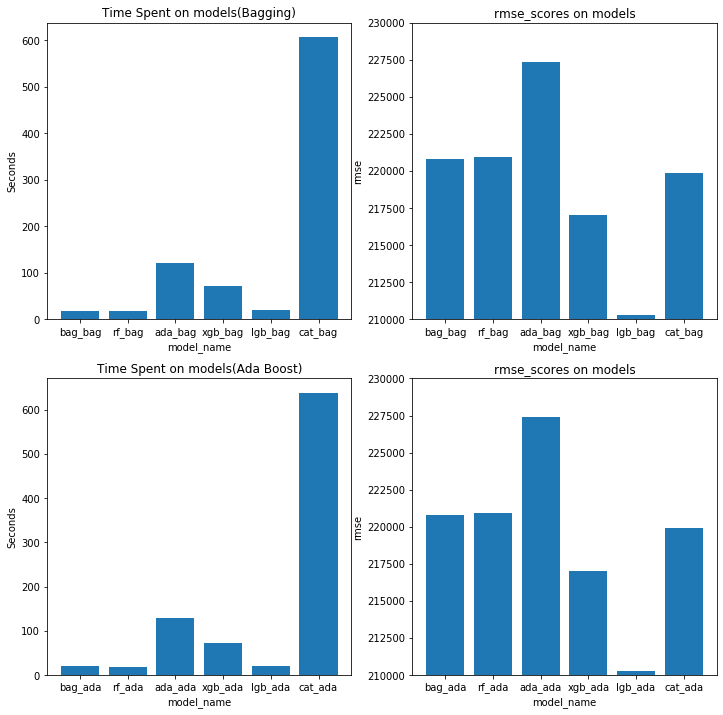

In [144]:
bag_labels=['bag_bag',
       'rf_bag',
       'ada_bag',
       'xgb_bag',
       'lgb_bag',
       'cat_bag']

ada_labels=['bag_ada',
       'rf_ada',
       'ada_ada',
       'xgb_ada',
       'lgb_ada',
       'cat_ada']

plt.figure(figsize=(12,12))
plt.subplot(221)
plt.bar(bag_labels,ensemble_ensemble_performances[0]['times'])
plt.title('Time Spent on models(Bagging)')
plt.ylabel('Seconds')
plt.xlabel('model_name')
plt.subplot(222)
plt.bar(bag_labels,ensemble_ensemble_performances[0]['rmse_scores'])
plt.title('rmse_scores on models')
plt.ylim(210000,230000)
plt.ylabel('rmse')
plt.xlabel('model_name')


plt.subplot(223)
plt.bar(ada_labels,ensemble_ensemble_performances[1]['times'])
plt.title('Time Spent on models(Ada Boost)')
plt.ylabel('Seconds')
plt.xlabel('model_name')
plt.subplot(224)
plt.bar(ada_labels,ensemble_ensemble_performances[1]['rmse_scores'])
plt.title('rmse_scores on models')
plt.ylabel('rmse')
plt.ylim(210000,230000)
plt.xlabel('model_name')

plt.show()

In [147]:
#machine model의 optimzied hyper parameter을 찾기 위한 함수
def optimize_model(model, params, cv):
    model=GridSearchCV(model,params,n_jobs=5,cv=cv)
    model=model.fit(train_X,train_Y)
    
    print(model.best_params_)
    
    return model


In [153]:
lgb_model=lgb.LGBMRegressor(learning_rate=0.01,objective='regression')
lgb_param = {'max_depth': [1,5,10,20,30,40,50,60,70,80,90,100], # 트리 깊이
             # Step Size
            'n_estimators': np.arange(100,1000,100), # Number of trees, 트리 생성 개수
            } # 파라미터 추가, Label must be in [0, num_class) -> num_class보다 1 커야한다.

cv=StratifiedKFold(n_splits=10,shuffle=False,random_state=0)

lgb_model=optimize_model(lgb_model,lgb_param,cv)

C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


{'max_depth': 5, 'n_estimators': 700}


In [155]:
sqrt(mean_squared_error(lgb_model.predict(test_X),test_Y))

209678.80586500812

In [ ]:
start=time.time()
ada_boosting_model=AdaBoostRegressor(base_estimator=lgb_model,
                                  n_estimators=100,
                                  loss='linear',
                                  random_state=0)
ada_boosting_model=ada_boosting_model.fit(train_X,train_Y)
ada_predict=ada_boosting_model.predict(test_X)

print("RMSE: {}".format(sqrt(mean_squared_error(lgb_model_predict,test_Y))))
print("Time: %.2f" % (time.time() - start), "seconds") # 코드 실행 시간 계산

C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The